In [1]:
#1. Import library
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
# 2.Acquire data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
# 3. Analyze by describing data
# Which features are available in the dataset?
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# Which features are categorical?
# Which features are numerical?
# Which features are mixed data types?
# Which features may contain errors or typos?
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# Which features contain blank, null or empty values?
# What are the data types for various features?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# What is the distribution of numerical feature values across the samples?
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
# What is the distribution of categorical features?
train_df.describe(include=['O'])

Name   Sex  Ticket Cabin Embarked
count                       891   891     891   204      889
unique                      891     2     681   147        3
top     Hodges, Mr. Henry Price  male  347082    G6        S
freq                          1   577       7     4      644

In [8]:
# 4. Assumtions based on data analysis
# Correlating
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [9]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [10]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [12]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

In [13]:
train_df[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Cabin  Survived
73   C62 C64       1.0
97       D21       1.0
94       D17       1.0
95       D19       1.0
60      C148       1.0
96       D20       1.0
58      C126       1.0
57      C125       1.0
127      E40       1.0
111      D56       1.0
116     E101       1.0
125      E36       1.0
130      E49       1.0
51      C106       1.0
50      C104       1.0
49      C103       1.0
48      C101       1.0
47   B96 B98       1.0
131      E50       1.0
99       D28       1.0
93       D15       1.0
65       C32       1.0
87       C93       1.0
77       C70       1.0
118     E121       1.0
84       C90       1.0
119      E17       1.0
120      E24       1.0
81       C85       1.0
117      E12       1.0
..       ...       ...
26       B38       0.0
25       B37       0.0
23       B30       0.0
16      B102       0.0
52      C110       0.0
14        A7       0.0
12        A5       0.0
11       A36       0.0
9        A32       0.0
6        A24       0.0
3        A19       0.0
46       B94       0.0
53      C111       0.0
108      D48       0.0
82       C86       0.0
106      D46       0.0
100      D30       0.0
98       D26       0.0
88       C95       0.0
85       C91       0.0
83       C87       0.0
79       C82       0.0
54      C118       0.0
1        A14       0.0
69       C49       0.0
67       C46       0.0
64       C30       0.0
59      C128       0.0
56      C124       0.0
146        T       0.0

[147 rows x 2 columns]

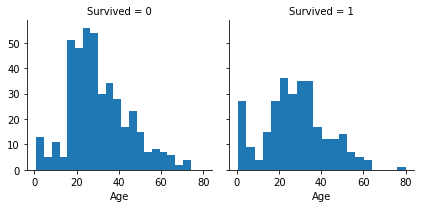

In [14]:
# Correlating numerical features
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

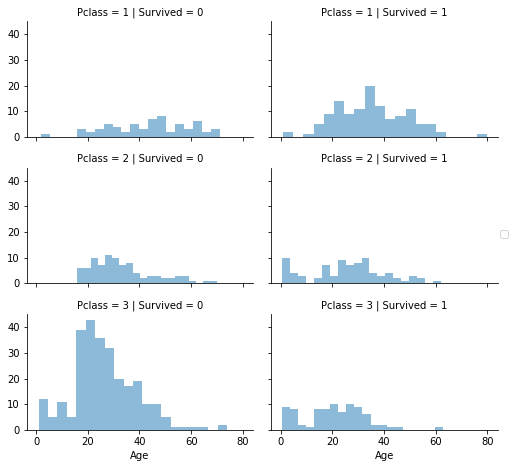

In [15]:
# Correlating numerical and ordinal features
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


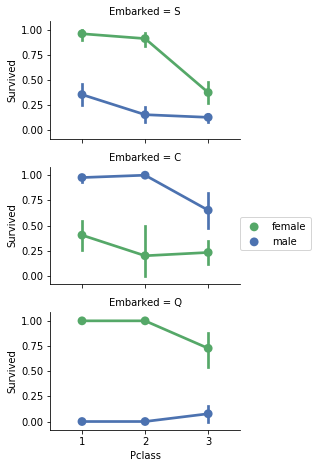

In [16]:
# Correlating categorical features
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


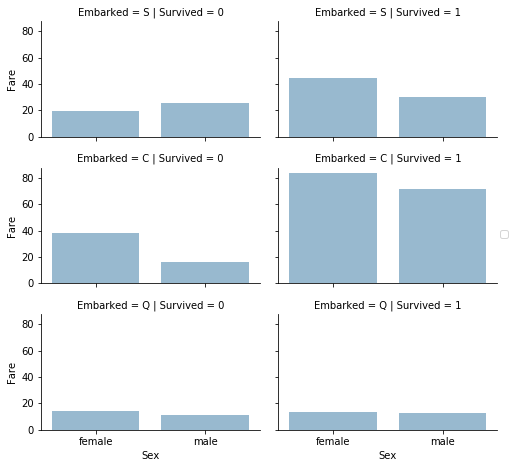

In [17]:
# Correlating categorical and numerical features
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [18]:
# Wrangle data
# Correcting
# Correcting by dropping features
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 11) (418, 10) (891, 11) (418, 10)


In [19]:
# Creating 
# Creating new feature extracting from existing
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [21]:
# Convert
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  Title  
0      0   7.2500   NaN        S      1  
1      0  71.2833   C85        C      3  
2      0   7.9250   NaN        S      2  
3      0  53.1000  C123        S      3  
4      0   8.0500   NaN        S      1

In [22]:
# Correcting by dropping features
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [23]:
# Converting a categorical feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked  Title
0         0       3    0  22.0      1      0   7.2500   NaN        S      1
1         1       1    1  38.0      1      0  71.2833   C85        C      3
2         1       3    1  26.0      0      0   7.9250   NaN        S      2
3         1       1    1  35.0      1      0  53.1000  C123        S      3
4         0       3    0  35.0      0      0   8.0500   NaN        S      1

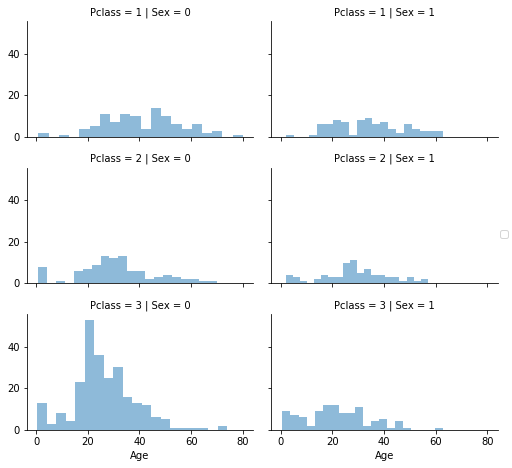

In [24]:
# Completing a numerical continuous feature
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Cabin Embarked  Title
0         0       3    0   22      1      0   7.2500   NaN        S      1
1         1       1    1   38      1      0  71.2833   C85        C      3
2         1       3    1   26      0      0   7.9250   NaN        S      2
3         1       1    1   35      1      0  53.1000  C123        S      3
4         0       3    0   35      0      0   8.0500   NaN        S      1

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Cabin Embarked  Title  \
0         0       3    0    1      1      0   7.2500   NaN        S      1   
1         1       1    1    2      1      0  71.2833   C85        C      3   
2         1       3    1    1      0      0   7.9250   NaN        S      2   
3         1       1    1    2      1      0  53.1000  C123        S      3   
4         0       3    0    2      0      0   8.0500   NaN        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Cabin Embarked  Title
0         0       3    0    1      1      0   7.2500   NaN        S      1
1         1       1    1    2      1      0  71.2833   C85        C      3
2         1       3    1    1      0      0   7.9250   NaN        S      2
3         1       1    1    2      1      0  53.1000  C123        S      3
4         0       3    0    2      0      0   8.0500   NaN        S      1

In [31]:
# Create new feature combining existing features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Pclass  Sex  Age     Fare Cabin Embarked  Title  IsAlone
0         0       3    0    1   7.2500   NaN        S      1        0
1         1       1    1    2  71.2833   C85        C      3        0
2         1       3    1    1   7.9250   NaN        S      2        1
3         1       1    1    2  53.1000  C123        S      3        0
4         0       3    0    2   8.0500   NaN        S      1        1

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2

In [35]:
# Completing a categorical feature
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port


'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [37]:
#Converting categorical feature to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

Survived  Pclass  Sex  Age     Fare Cabin  Embarked  Title  IsAlone  \
0         0       3    0    1   7.2500   NaN         0      1        0   
1         1       1    1    2  71.2833   C85         1      3        0   
2         1       3    1    1   7.9250   NaN         0      2        1   
3         1       1    1    2  53.1000  C123         0      3        0   
4         0       3    0    2   8.0500   NaN         0      1        1   

   Age*Class  
0          3  
1          2  
2          3  
3          2  
4          6

In [38]:
test_df.head()

PassengerId  Pclass  Sex  Age     Fare Cabin  Embarked  Title  IsAlone  \
0          892       3    0    2   7.8292   NaN         2      1        1   
1          893       3    1    2   7.0000   NaN         0      3        0   
2          894       2    0    3   9.6875   NaN         2      1        1   
3          895       3    0    1   8.6625   NaN         0      1        1   
4          896       3    1    1  12.2875   NaN         0      3        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3

In [39]:
test_df.describe(include="O")

Cabin
count                91
unique               76
top     B57 B59 B63 B66
freq                  3

In [40]:
# Quick completing and converting a numeric feature
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass  Sex  Age     Fare Cabin  Embarked  Title  IsAlone  \
0          892       3    0    2   7.8292   NaN         2      1        1   
1          893       3    1    2   7.0000   NaN         0      3        0   
2          894       2    0    3   9.6875   NaN         2      1        1   
3          895       3    0    1   8.6625   NaN         0      1        1   
4          896       3    1    1  12.2875   NaN         0      3        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3

In [41]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

Survived  Pclass  Sex  Age  Fare Cabin  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0   NaN         0      1        0          3
1         1       1    1    2     3   C85         1      3        0          2
2         1       3    1    1     1   NaN         0      2        1          3
3         1       1    1    2     3  C123         0      3        0          2
4         0       3    0    2     1   NaN         0      1        1          6
5         0       3    0    1     1   NaN         2      1        1          3
6         0       1    0    3     3   E46         0      1        1          3
7         0       3    0    0     2   NaN         0      4        0          0
8         1       3    1    1     1   NaN         0      3        0          3
9         1       2    1    0     2   NaN         1      3        0          0

In [43]:
test_df.head(10)

PassengerId  Pclass  Sex  Age  Fare Cabin  Embarked  Title  IsAlone  \
0          892       3    0    2     0   NaN         2      1        1   
1          893       3    1    2     0   NaN         0      3        0   
2          894       2    0    3     1   NaN         2      1        1   
3          895       3    0    1     1   NaN         0      1        1   
4          896       3    1    1     1   NaN         0      3        0   
5          897       3    0    0     1   NaN         0      1        1   
6          898       3    1    1     0   NaN         2      2        1   
7          899       2    0    1     2   NaN         0      1        0   
8          900       3    1    1     0   NaN         1      3        1   
9          901       3    0    1     2   NaN         0      1        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3  
5          0  
6          3  
7          2  
8          3  
9          3

In [44]:
for dataset in combine:
    dataset['Cabin'].fillna('0', inplace=True)
    dataset.loc[ dataset['Cabin'].str[0] == 'A', 'Cabin'] = 1
    dataset.loc[ dataset['Cabin'].str[0] == 'B', 'Cabin'] = 2
    dataset.loc[ dataset['Cabin'].str[0] == 'C', 'Cabin'] = 3
    dataset.loc[ dataset['Cabin'].str[0] == 'D', 'Cabin'] = 4
    dataset.loc[ dataset['Cabin'].str[0] == 'E', 'Cabin'] = 5
    dataset.loc[ dataset['Cabin'].str[0] == 'F', 'Cabin'] = 6
    dataset.loc[ dataset['Cabin'].str[0] == 'G', 'Cabin'] = 7
    dataset.loc[ dataset['Cabin'].str[0] == 'T', 'Cabin'] = 8
    

In [45]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].astype(int)

In [46]:
train_df.head(10)

Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  IsAlone  \
0         0       3    0    1     0      0         0      1        0   
1         1       1    1    2     3      3         1      3        0   
2         1       3    1    1     1      0         0      2        1   
3         1       1    1    2     3      3         0      3        0   
4         0       3    0    2     1      0         0      1        1   
5         0       3    0    1     1      0         2      1        1   
6         0       1    0    3     3      5         0      1        1   
7         0       3    0    0     2      0         0      4        0   
8         1       3    1    1     1      0         0      3        0   
9         1       2    1    0     2      0         1      3        0   

   Age*Class  
0          3  
1          2  
2          3  
3          2  
4          6  
5          3  
6          3  
7          0  
8          3  
9          0

In [47]:
# Model, predict and solve
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [48]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.71

In [49]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1        Sex     2.182837
6      Title     0.438446
7    IsAlone     0.298318
5   Embarked     0.285360
4      Cabin     0.189401
8  Age*Class    -0.025703
3       Fare    -0.043100
2        Age    -0.499987
0     Pclass    -0.997933

In [50]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.85

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.31

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

In [53]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.1

In [54]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [55]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.65

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.34

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.34

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
3               Random Forest  89.34
8               Decision Tree  89.34
1                         KNN  86.31
0     Support Vector Machines  84.85
2         Logistic Regression  81.71
7                  Linear SVC  79.80
4                 Naive Bayes  77.33
5                  Perceptron  77.10
6  Stochastic Gradient Decent  75.65

In [148]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [149]:
submission.to_csv('submission.csv', index=False)

In [61]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [62]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_train, Y_train,test_size=0.25)

In [63]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20, 2), 'min_samples_split': range(10, 500, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
clf.best_score_

0.8158682634730539

In [65]:
clf_model=clf.best_estimator_
clf_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=70,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
clf_decision_tree = round(clf_model.score(train_x, train_y) * 100, 2)
clf_decision_tree

81.74

In [67]:
y_pred_class = clf_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

0.7982062780269058

In [68]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['min_weight_fraction_leaf', 'max_features', 'min_impurity_split', 'random_state', 'min_samples_split', 'min_impurity_decrease', 'presort', 'splitter', 'criterion', 'min_samples_leaf', 'class_weight', 'max_leaf_nodes', 'max_depth'])

In [69]:
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
param_grid = {'max_depth': np.arange(3, 10),'min_samples_split':np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(train_x, train_y)
tree_preds = tree.predict_proba(valid_x)[:, 1]
tree_performance = roc_auc_score(valid_y, tree_preds)

print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTree: Area under the ROC curve = 0.8257694314032342


In [71]:
tree

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
tree_model=tree.best_estimator_

In [73]:
tree.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 3},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 4},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 5},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 6},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 7},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 8},
 mean: 0.78743, std: 0.01346, params: {'max_depth': 3, 'min_samples_split': 9},
 mean: 0.78443, std: 0.02275, params: {'max_depth': 4, 'min_samples_split': 3},
 mean: 0.78144, std: 0.01999, params: {'max_depth': 4, 'min_samples_split': 4},
 mean: 0.78443, std: 0.02275, params: {'max_depth': 4, 'min_samples_split': 5},
 mean: 0.78144, std: 0.01999, params: {'max_depth': 4, 'min_samples_split': 6},
 mean: 0.78144, std: 0.01999, params: {'max_depth': 4, 'min_samples_split': 7},
 mean: 0.78144, std: 0.01999, params: {'

In [74]:
tree_score = round(tree_model.score(train_x, train_y) * 100, 2)
tree_score

84.88

In [75]:
y_pred_class = tree_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

0.8026905829596412

In [76]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [77]:
LogisticRegression().get_params().keys()

dict_keys(['intercept_scaling', 'n_jobs', 'solver', 'verbose', 'random_state', 'dual', 'C', 'warm_start', 'max_iter', 'multi_class', 'class_weight', 'fit_intercept', 'tol', 'penalty'])

In [78]:
param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

In [79]:
gsearch = GridSearchCV(estimator = xgboost.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'binary:logistic', scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

In [80]:
train_model4 = gsearch.fit(train_x, train_y)

In [81]:
train_model4.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85804, std: 0.02413, params: {'max_depth': 4, 'min_child_weight': 4},
 mean: 0.86155, std: 0.02271, params: {'max_depth': 4, 'min_child_weight': 5},
 mean: 0.86238, std: 0.02369, params: {'max_depth': 4, 'min_child_weight': 6},
 mean: 0.86223, std: 0.02526, params: {'max_depth': 5, 'min_child_weight': 4},
 mean: 0.86058, std: 0.02173, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.86304, std: 0.02158, params: {'max_depth': 5, 'min_child_weight': 6},
 mean: 0.85951, std: 0.02363, params: {'max_depth': 6, 'min_child_weight': 4},
 mean: 0.86195, std: 0.02203, params: {'max_depth': 6, 'min_child_weight': 5},
 mean: 0.86444, std: 0.02094, params: {'max_depth': 6, 'min_child_weight': 6}]

In [82]:
train_model4.best_score_

0.8644388045638237

In [83]:
xgboost_model4=train_model4.best_estimator_

In [84]:
train_model4_score = round(xgboost_model4.score(train_x, train_y) * 100, 2)
train_model4_score

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


86.83

In [85]:
y_pred_class = xgboost_model4.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8251121076233184

In [86]:
xgboost_model = xgboost.XGBClassifier(max_depth=7,
                           min_child_weight=6,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)

xgboost_model.fit(train_x, train_y)
xgboost_model_score = round(xgboost_model.score(train_x, train_y) * 100, 2)
xgboost_model_score

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


88.02

In [87]:
y_pred_class = xgboost_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8161434977578476

In [88]:
param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgboost.XGBClassifier( learning_rate=0.01, n_estimators=500, max_depth=5,
 min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'binary:logistic', scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)

In [89]:
gsearch.fit(train_x, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [90]:
gsearch.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86878, std: 0.03934, params: {'max_depth': 4, 'min_child_weight': 4},
 mean: 0.86972, std: 0.04089, params: {'max_depth': 4, 'min_child_weight': 5},
 mean: 0.86966, std: 0.04023, params: {'max_depth': 4, 'min_child_weight': 6},
 mean: 0.86521, std: 0.04100, params: {'max_depth': 5, 'min_child_weight': 4},
 mean: 0.86941, std: 0.04179, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.87015, std: 0.03987, params: {'max_depth': 5, 'min_child_weight': 6},
 mean: 0.86371, std: 0.04463, params: {'max_depth': 6, 'min_child_weight': 4},
 mean: 0.86782, std: 0.04068, params: {'max_depth': 6, 'min_child_weight': 5},
 mean: 0.87001, std: 0.04133, params: {'max_depth': 6, 'min_child_weight': 6}]

In [91]:
gsearch_model=gsearch.best_estimator_

In [92]:
gsearch_model.fit(train_x, train_y)
gsearch_score = round(gsearch_model.score(train_x, train_y) * 100, 2)
gsearch_score

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.73

In [93]:
y_pred_class = gsearch_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8161434977578476

In [94]:
random_forest = RandomForestClassifier(n_estimators=1100)
random_forest.fit(train_x, train_y)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

90.12

In [95]:
y_pred_class = random_forest.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

0.8026905829596412

In [96]:

single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)

In [97]:
single_best_model.fit(train_x, train_y)
single_best_model.score(train_x, train_y)
acc_random_forest = round(single_best_model.score(train_x, train_y) * 100, 2)
acc_random_forest

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.7s finished


84.13

In [98]:
y_pred_class = single_best_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.4s finished


0.8026905829596412

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
train = scaler.fit_transform(X_train)
test = scaler.transform(X_test)

In [101]:
xg_cl = xgboost.XGBClassifier(objective='binary:logistic',learning_rate=0.1)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
xg_cl.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.182635	validation_0-logloss:0.64695	validation_0-auc:0.870546	validation_1-error:0.201794	validation_1-logloss:0.650697	validation_1-auc:0.832855
[1]	validation_0-error:0.173653	validation_0-logloss:0.608937	validation_0-auc:0.877729	validation_1-error:0.192825	validation_1-logloss:0.616566	validation_1-auc:0.830073
[2]	validation_0-error:0.173653	validation_0-logloss:0.57725	validation_0-auc:0.878214	validation_1-error:0.192825	validation_1-logloss:0.588307	validation_1-auc:0.830725
[3]	validation_0-error:0.173653	validation_0-logloss:0.550663	validation_0-auc:0.878374	validation_1-error:0.192825	validation_1-logloss:0.564896	validation_1-auc:0.83116
[4]	validation_0-error:0.173653	validation_0-logloss:0.528125	validation_0-auc:0.878788	validation_1-error:0.192825	validation_1-logloss:0.54506	validation_1-auc:0.829334
[5]	validation_0-error:0.173653	validation_0-logloss:0.508992	validation_0-auc:0.878929	validation_1-error:0.192825	validation_1-logloss:0.52853

[48]	validation_0-error:0.14521	validation_0-logloss:0.366429	validation_0-auc:0.901405	validation_1-error:0.170404	validation_1-logloss:0.422885	validation_1-auc:0.865762
[49]	validation_0-error:0.143713	validation_0-logloss:0.365608	validation_0-auc:0.901687	validation_1-error:0.170404	validation_1-logloss:0.423167	validation_1-auc:0.865589
[50]	validation_0-error:0.143713	validation_0-logloss:0.36513	validation_0-auc:0.902299	validation_1-error:0.170404	validation_1-logloss:0.422747	validation_1-auc:0.865849
[51]	validation_0-error:0.143713	validation_0-logloss:0.364462	validation_0-auc:0.902412	validation_1-error:0.170404	validation_1-logloss:0.42247	validation_1-auc:0.865936
[52]	validation_0-error:0.143713	validation_0-logloss:0.363669	validation_0-auc:0.902722	validation_1-error:0.170404	validation_1-logloss:0.422571	validation_1-auc:0.86611
[53]	validation_0-error:0.143713	validation_0-logloss:0.36307	validation_0-auc:0.903108	validation_1-error:0.170404	validation_1-logloss:0.

[96]	validation_0-error:0.137725	validation_0-logloss:0.344854	validation_0-auc:0.911623	validation_1-error:0.174888	validation_1-logloss:0.415818	validation_1-auc:0.864937
[97]	validation_0-error:0.137725	validation_0-logloss:0.344582	validation_0-auc:0.911746	validation_1-error:0.174888	validation_1-logloss:0.415465	validation_1-auc:0.865023
[98]	validation_0-error:0.136228	validation_0-logloss:0.344453	validation_0-auc:0.911811	validation_1-error:0.174888	validation_1-logloss:0.415295	validation_1-auc:0.865023
[99]	validation_0-error:0.136228	validation_0-logloss:0.344266	validation_0-auc:0.911953	validation_1-error:0.174888	validation_1-logloss:0.415109	validation_1-auc:0.865371


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [125]:
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

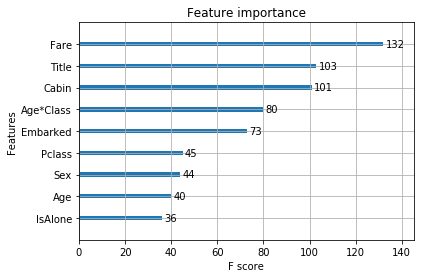

In [103]:
plot_importance(xg_cl)
plt.show()

In [104]:
acc_random_forest = round(xg_cl.score(train_x, train_y) * 100, 2)
acc_random_forest

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


86.38

In [105]:
y_pred_class = xg_cl.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8251121076233184

In [106]:
results = confusion_matrix(valid_y, y_pred_class) 
print(results)

[[132  10]
 [ 29  52]]


In [135]:
Y_pred = xg_cl.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
full_xg_cl = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [145]:
full_xg_cl.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [146]:
full_xg_cl.score(X_train, Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8496071829405163

In [147]:
Y_pred = full_xg_cl.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [113]:
xg_cl.feature_importances_

array([0.06880734, 0.06727829, 0.06116208, 0.20183486, 0.15443425,
       0.1116208 , 0.15749235, 0.05504587, 0.12232416], dtype=float32)

In [112]:
tuned_params = {"objective":"binary:logistic",'colsample_bytree': 0.3, 'max_depth': 10,'subsample': 0.55, 'n_estimators': 200, 'learning_rate': 0.2}
thresholds = sort(xg_cl.feature_importances_)
models = []
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xg_cl, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    # train model
    selection_model = xgboost.XGBClassifier(objective='binary:logistic',learning_rate=0.3)
    selection_model.fit(select_X_train, train_y)
    # add model to models
    models.append([selection_model,selection])
    # eval model
    select_X_test = selection.transform(valid_x)
    predictions = selection_model.predict(select_X_test)
    accuracy = metrics.accuracy_score(valid_y, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
    accuracy*100.0))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Thresh=0.055, n=9, Accuracy: 82.51%
Thresh=0.061, n=8, Accuracy: 82.51%
Thresh=0.067, n=7, Accuracy: 82.51%
Thresh=0.069, n=6, Accuracy: 81.61%
Thresh=0.112, n=5, Accuracy: 81.61%
Thresh=0.122, n=4, Accuracy: 82.51%
Thresh=0.154, n=3, Accuracy: 79.37%
Thresh=0.157, n=2, Accuracy: 78.03%
Thresh=0.202, n=1, Accuracy: 64.13%


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [117]:
# Finalize transformations
final_model = models[1][0]
final_selection = models[1][1]
final_X_train = final_selection.transform(train_x)

final_X_test = final_selection.transform(valid_x)

final_y_pred = final_model.predict(final_X_test)
final_predictions = [round(value) for value in final_y_pred]

# Print evaluation metrics
accuracy = metrics.accuracy_score(valid_y, final_predictions)
print("n=%d, Accuracy: %.2f%%" % (final_X_train.shape[1], accuracy*100.0))
confusion_matrix(valid_y, final_predictions) 


n=8, Accuracy: 82.51%


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[131,  11],
       [ 28,  53]])

In [122]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(final_model, train_x, train_y, cv=kfold)
results

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

array([0.85074627, 0.7761194 , 0.85074627, 0.85074627, 0.80597015,
       0.8358209 , 0.85074627, 0.79104478, 0.84848485, 0.8030303 ])

In [123]:
dmatrix = xgboost.DMatrix(data=train_x,label=train_y)

# params={"objective":"binary:logistic","max_depth":4}
# tuned_params = {"objective":"binary:logistic",'colsample_bytree': 0.3, 'max_depth': 10,'subsample': 0.55, 'n_estimators': 200, 'learning_rate': 0.2}
tuned_params = {"objective":"binary:logistic",'learning_rate': 0.3}
cv_results = xgboost.cv(dtrain=dmatrix, params=tuned_params, nfold=5, num_boost_round=200, metrics="error",as_pandas=True, seed=123)

# Print the accuracy

print(((1-cv_results["test-error-mean"]).iloc[-1]))

[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[20:43:24] /work

[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /work

[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /work

[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /work

[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /work

[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:25] /work

[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:43:26] /work

In [126]:
grid_param = {  
    'n_estimators': [12, 25, 50, 75],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'early_stopping_rounds': [3, 4, 5, 6]
    }
grid = RandomizedSearchCV(estimator=final_model,param_distributions=grid_param, n_iter=25,scoring='accuracy', cv=4, verbose=1)
grid.fit(train_x, train_y)
print("Best parameters found: ",grid.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid.best_score_)))


Fitting 4 folds for each of 25 candidates, totalling 100 fits


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Best parameters found:  {'max_depth': 3, 'early_stopping_rounds': 6, 'n_estimators': 50, 'learning_rate': 0.1}
Best ROC found:  0.9007648114291444


In [129]:
selection = SelectFromModel(xg_cl, threshold=0.055, prefit=True)
select_X_train = selection.transform(train_x)
select_X_test = selection.transform(valid_x)
another_model = xgboost.XGBClassifier(early_stopping_rounds=6, learning_rate=0.1, max_depth=3, n_estimators=50)
another_model.fit(select_X_train, train_y)

select_y_pred = another_model.predict(select_X_test)
select_predictions = [round(value) for value in select_y_pred]

# Print evaluation metrics
accuracy = metrics.accuracy_score(valid_y, select_predictions)
print("n=%d, Accuracy: %.2f%%" % (select_X_train.shape[1], accuracy*100.0))
confusion_matrix(valid_y, select_predictions) 


n=9, Accuracy: 82.96%


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[133,   9],
       [ 29,  52]])

In [131]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null int64
Fare         418 non-null int64
Cabin        418 non-null int64
Embarked     418 non-null int64
Title        418 non-null int64
IsAlone      418 non-null int64
Age*Class    418 non-null int64
dtypes: int64(9)
memory usage: 29.5 KB


In [140]:
features_test_ = selection.transform(X_test)
Y_pred = another_model.predict(features_test_)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [150]:
len(submission[submission.Survived ==1 ])

140

In [138]:
features_=selection.transform(X_train)
another_model.fit(features_,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, early_stopping_rounds=6, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [261]:
import xgboost as xgb
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=train_y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    #alg.fit(dtrain[predictors], train_y,eval_metric='auc')
    eval_set = [(train_x, train_y), (valid_x, valid_y)]
    alg.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    train_score = round(alg.score(train_x, train_y) * 100, 2)
    print(train_score)
        
    y_pred_class = alg.predict(valid_x)
    print(metrics.accuracy_score(valid_y, y_pred_class))

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(train_y, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [262]:
#Choose all predictors except target & IDcols
predictors = [x for x in train_x.columns]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train_x, predictors)

[0]	validation_0-error:0.185629	validation_0-logloss:0.650748	validation_0-auc:0.85506	validation_1-error:0.2287	validation_1-logloss:0.655442	validation_1-auc:0.838923
[1]	validation_0-error:0.182635	validation_0-logloss:0.614904	validation_0-auc:0.85935	validation_1-error:0.233184	validation_1-logloss:0.622838	validation_1-auc:0.849321
[2]	validation_0-error:0.167665	validation_0-logloss:0.582904	validation_0-auc:0.88018	validation_1-error:0.215247	validation_1-logloss:0.592418	validation_1-auc:0.865714
[3]	validation_0-error:0.16018	validation_0-logloss:0.558936	validation_0-auc:0.879823	validation_1-error:0.215247	validation_1-logloss:0.571305	validation_1-auc:0.863617
[4]	validation_0-error:0.154192	validation_0-logloss:0.533649	validation_0-auc:0.881661	validation_1-error:0.201794	validation_1-logloss:0.546043	validation_1-auc:0.872841
[5]	validation_0-error:0.149701	validation_0-logloss:0.511859	validation_0-auc:0.882713	validation_1-error:0.201794	validation_1-logloss:0.525673	

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [267]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
#gsearch1.fit(train_x,train_y)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch1.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[0]	validation_0-error:0.178144	validation_0-logloss:0.650245	validation_0-auc:0.85576	validation_1-error:0.188341	validation_1-logloss:0.649738	validation_1-auc:0.872254
[0]	validation_0-error:0.182635	validation_0-logloss:0.64952	validation_0-auc:0.852445	validation_1-error:0.188341	validation_1-logloss:0.648473	validation_1-auc:0.871038
[0]	validation_0-error:0.181138	validation_0-logloss:0.648169	validation_0-auc:0.854793	validation_1-error:0.206278	validation_1-logloss:0.649756	validation_1-auc:0.855526
[0]	validation_0-error:0.182635	validation_0-logloss:0.650179	validation_0-auc:0.85325	validation_1-error:0.188341	validation_1-logloss:0.649565	validation_1-auc:0.864791
[1]	validation_0-error:0.167665	validation_0-logloss:0.614921	validation_0-auc:0.860608	validation_1-error:0.197309	validation_1-logloss:0.614767	validation_1-auc:0.871625
[1]	validation_0-error:0.169162	validation_0-logloss:0.614448	validation_0-auc:0.864074	validation_1-error:0.188341	validation_1-logloss:0.6148

[13]	validation_0-error:0.16018	validation_0-logloss:0.435039	validation_0-auc:0.873927	validation_1-error:0.201794	validation_1-logloss:0.447643	validation_1-auc:0.874141
[12]	validation_0-error:0.161677	validation_0-logloss:0.450752	validation_0-auc:0.876942	validation_1-error:0.201794	validation_1-logloss:0.464554	validation_1-auc:0.879633
[10]	validation_0-error:0.163174	validation_0-logloss:0.458468	validation_0-auc:0.87547	validation_1-error:0.192825	validation_1-logloss:0.465519	validation_1-auc:0.877872
[14]	validation_0-error:0.16018	validation_0-logloss:0.430444	validation_0-auc:0.874446	validation_1-error:0.201794	validation_1-logloss:0.443851	validation_1-auc:0.874434
[13]	validation_0-error:0.163174	validation_0-logloss:0.438777	validation_0-auc:0.878432	validation_1-error:0.206278	validation_1-logloss:0.451264	validation_1-auc:0.884999
[14]	validation_0-error:0.163174	validation_0-logloss:0.434186	validation_0-auc:0.880594	validation_1-error:0.206278	validation_1-logloss:

[19]	validation_0-error:0.164671	validation_0-logloss:0.414914	validation_0-auc:0.878713	validation_1-error:0.192825	validation_1-logloss:0.429825	validation_1-auc:0.880681
[25]	validation_0-error:0.166168	validation_0-logloss:0.4048	validation_0-auc:0.885171	validation_1-error:0.206278	validation_1-logloss:0.424303	validation_1-auc:0.884622
[27]	validation_0-error:0.16018	validation_0-logloss:0.400253	validation_0-auc:0.883918	validation_1-error:0.210762	validation_1-logloss:0.426428	validation_1-auc:0.876027
[20]	validation_0-error:0.16018	validation_0-logloss:0.41267	validation_0-auc:0.879337	validation_1-error:0.188341	validation_1-logloss:0.427374	validation_1-auc:0.881771
[25]	validation_0-error:0.157186	validation_0-logloss:0.409206	validation_0-auc:0.881061	validation_1-error:0.201794	validation_1-logloss:0.425016	validation_1-auc:0.882023
[28]	validation_0-error:0.157186	validation_0-logloss:0.399243	validation_0-auc:0.883528	validation_1-error:0.210762	validation_1-logloss:0.

[39]	validation_0-error:0.157186	validation_0-logloss:0.387043	validation_0-auc:0.889971	validation_1-error:0.201794	validation_1-logloss:0.418091	validation_1-auc:0.885335
[31]	validation_0-error:0.16018	validation_0-logloss:0.394509	validation_0-auc:0.886971	validation_1-error:0.188341	validation_1-logloss:0.412598	validation_1-auc:0.885335
[38]	validation_0-error:0.152695	validation_0-logloss:0.38992	validation_0-auc:0.884442	validation_1-error:0.206278	validation_1-logloss:0.420482	validation_1-auc:0.883741
[36]	validation_0-error:0.155689	validation_0-logloss:0.396898	validation_0-auc:0.882452	validation_1-error:0.206278	validation_1-logloss:0.417936	validation_1-auc:0.883574
[39]	validation_0-error:0.154192	validation_0-logloss:0.388939	validation_0-auc:0.885576	validation_1-error:0.206278	validation_1-logloss:0.419878	validation_1-auc:0.882987
[40]	validation_0-error:0.158683	validation_0-logloss:0.386223	validation_0-auc:0.890457	validation_1-error:0.201794	validation_1-logloss

[48]	validation_0-error:0.149701	validation_0-logloss:0.384263	validation_0-auc:0.884899	validation_1-error:0.201794	validation_1-logloss:0.418659	validation_1-auc:0.882064
[43]	validation_0-error:0.152695	validation_0-logloss:0.385111	validation_0-auc:0.88989	validation_1-error:0.183857	validation_1-logloss:0.410999	validation_1-auc:0.885167
[47]	validation_0-error:0.157186	validation_0-logloss:0.388239	validation_0-auc:0.885604	validation_1-error:0.192825	validation_1-logloss:0.415633	validation_1-auc:0.883154
[54]	validation_0-error:0.152695	validation_0-logloss:0.378401	validation_0-auc:0.893052	validation_1-error:0.192825	validation_1-logloss:0.419574	validation_1-auc:0.886383
[49]	validation_0-error:0.148204	validation_0-logloss:0.383819	validation_0-auc:0.884937	validation_1-error:0.197309	validation_1-logloss:0.417995	validation_1-auc:0.882903
[44]	validation_0-error:0.152695	validation_0-logloss:0.384314	validation_0-auc:0.891481	validation_1-error:0.179372	validation_1-loglos

[57]	validation_0-error:0.151198	validation_0-logloss:0.384083	validation_0-auc:0.886642	validation_1-error:0.170404	validation_1-logloss:0.414367	validation_1-auc:0.883196
[62]	validation_0-error:0.149701	validation_0-logloss:0.376935	validation_0-auc:0.888938	validation_1-error:0.192825	validation_1-logloss:0.423014	validation_1-auc:0.880807
[55]	validation_0-error:0.148204	validation_0-logloss:0.378896	validation_0-auc:0.894395	validation_1-error:0.179372	validation_1-logloss:0.408255	validation_1-auc:0.885377
[66]	validation_0-error:0.148204	validation_0-logloss:0.373857	validation_0-auc:0.894919	validation_1-error:0.192825	validation_1-logloss:0.4206	validation_1-auc:0.884328
[58]	validation_0-error:0.152695	validation_0-logloss:0.382137	validation_0-auc:0.888128	validation_1-error:0.170404	validation_1-logloss:0.413792	validation_1-auc:0.883951
[63]	validation_0-error:0.151198	validation_0-logloss:0.376989	validation_0-auc:0.889147	validation_1-error:0.197309	validation_1-logloss

[76]	validation_0-error:0.148204	validation_0-logloss:0.370672	validation_0-auc:0.895633	validation_1-error:0.192825	validation_1-logloss:0.421511	validation_1-auc:0.884245
[74]	validation_0-error:0.149701	validation_0-logloss:0.372369	validation_0-auc:0.891052	validation_1-error:0.201794	validation_1-logloss:0.428339	validation_1-auc:0.880807
[68]	validation_0-error:0.146707	validation_0-logloss:0.371724	validation_0-auc:0.898405	validation_1-error:0.174888	validation_1-logloss:0.406535	validation_1-auc:0.888647
[77]	validation_0-error:0.148204	validation_0-logloss:0.370455	validation_0-auc:0.896176	validation_1-error:0.192825	validation_1-logloss:0.423125	validation_1-auc:0.883071
[75]	validation_0-error:0.149701	validation_0-logloss:0.371539	validation_0-auc:0.891814	validation_1-error:0.201794	validation_1-logloss:0.428276	validation_1-auc:0.880807
[70]	validation_0-error:0.152695	validation_0-logloss:0.377245	validation_0-auc:0.892014	validation_1-error:0.170404	validation_1-loglo

[80]	validation_0-error:0.149701	validation_0-logloss:0.373004	validation_0-auc:0.894052	validation_1-error:0.170404	validation_1-logloss:0.414338	validation_1-auc:0.882442
[81]	validation_0-error:0.149701	validation_0-logloss:0.372217	validation_0-auc:0.894433	validation_1-error:0.170404	validation_1-logloss:0.414732	validation_1-auc:0.881352
[88]	validation_0-error:0.14521	validation_0-logloss:0.366786	validation_0-auc:0.898348	validation_1-error:0.192825	validation_1-logloss:0.423582	validation_1-auc:0.883993
[82]	validation_0-error:0.149701	validation_0-logloss:0.372439	validation_0-auc:0.894185	validation_1-error:0.170404	validation_1-logloss:0.415247	validation_1-auc:0.880597
[79]	validation_0-error:0.148204	validation_0-logloss:0.366159	validation_0-auc:0.901729	validation_1-error:0.179372	validation_1-logloss:0.411832	validation_1-auc:0.882526
[89]	validation_0-error:0.142216	validation_0-logloss:0.367444	validation_0-auc:0.893376	validation_1-error:0.197309	validation_1-loglos

[101]	validation_0-error:0.140719	validation_0-logloss:0.363964	validation_0-auc:0.896433	validation_1-error:0.206278	validation_1-logloss:0.438977	validation_1-auc:0.876279
[102]	validation_0-error:0.139222	validation_0-logloss:0.363944	validation_0-auc:0.896652	validation_1-error:0.206278	validation_1-logloss:0.439715	validation_1-auc:0.876111
[91]	validation_0-error:0.148204	validation_0-logloss:0.362334	validation_0-auc:0.904891	validation_1-error:0.179372	validation_1-logloss:0.414769	validation_1-auc:0.874895
[99]	validation_0-error:0.148204	validation_0-logloss:0.362974	validation_0-auc:0.898671	validation_1-error:0.192825	validation_1-logloss:0.427499	validation_1-auc:0.884412
[93]	validation_0-error:0.149701	validation_0-logloss:0.369084	validation_0-auc:0.896747	validation_1-error:0.170404	validation_1-logloss:0.419011	validation_1-auc:0.880094
[100]	validation_0-error:0.14521	validation_0-logloss:0.363034	validation_0-auc:0.899367	validation_1-error:0.192825	validation_1-log

[108]	validation_0-error:0.143713	validation_0-logloss:0.361385	validation_0-auc:0.899843	validation_1-error:0.192825	validation_1-logloss:0.427154	validation_1-auc:0.883993
[107]	validation_0-error:0.151198	validation_0-logloss:0.367151	validation_0-auc:0.895976	validation_1-error:0.174888	validation_1-logloss:0.421205	validation_1-auc:0.875231
[113]	validation_0-error:0.139222	validation_0-logloss:0.361451	validation_0-auc:0.898414	validation_1-error:0.201794	validation_1-logloss:0.437984	validation_1-auc:0.874266
[108]	validation_0-error:0.151198	validation_0-logloss:0.36724	validation_0-auc:0.896052	validation_1-error:0.174888	validation_1-logloss:0.422386	validation_1-auc:0.873889
[104]	validation_0-error:0.148204	validation_0-logloss:0.358219	validation_0-auc:0.9067	validation_1-error:0.179372	validation_1-logloss:0.414346	validation_1-auc:0.878752
[109]	validation_0-error:0.143713	validation_0-logloss:0.361425	validation_0-auc:0.899671	validation_1-error:0.192825	validation_1-lo

[125]	validation_0-error:0.134731	validation_0-logloss:0.360562	validation_0-auc:0.898586	validation_1-error:0.197309	validation_1-logloss:0.440452	validation_1-auc:0.876446
[121]	validation_0-error:0.139222	validation_0-logloss:0.357474	validation_0-auc:0.900881	validation_1-error:0.188341	validation_1-logloss:0.429942	validation_1-auc:0.881981
[126]	validation_0-error:0.134731	validation_0-logloss:0.360322	validation_0-auc:0.898795	validation_1-error:0.197309	validation_1-logloss:0.44039	validation_1-auc:0.875273
[116]	validation_0-error:0.148204	validation_0-logloss:0.354458	validation_0-auc:0.908291	validation_1-error:0.179372	validation_1-logloss:0.412157	validation_1-auc:0.875398
[127]	validation_0-error:0.134731	validation_0-logloss:0.36006	validation_0-auc:0.898614	validation_1-error:0.197309	validation_1-logloss:0.440633	validation_1-auc:0.876027
[122]	validation_0-error:0.139222	validation_0-logloss:0.357118	validation_0-auc:0.902262	validation_1-error:0.188341	validation_1-l

[129]	validation_0-error:0.146707	validation_0-logloss:0.352117	validation_0-auc:0.9089	validation_1-error:0.174888	validation_1-logloss:0.414035	validation_1-auc:0.880513
[130]	validation_0-error:0.146707	validation_0-logloss:0.351879	validation_0-auc:0.909148	validation_1-error:0.174888	validation_1-logloss:0.414017	validation_1-auc:0.8811
[132]	validation_0-error:0.140719	validation_0-logloss:0.355837	validation_0-auc:0.904091	validation_1-error:0.183857	validation_1-logloss:0.435469	validation_1-auc:0.879633
[138]	validation_0-error:0.137725	validation_0-logloss:0.358416	validation_0-auc:0.901919	validation_1-error:0.192825	validation_1-logloss:0.441055	validation_1-auc:0.878543
[129]	validation_0-error:0.148204	validation_0-logloss:0.363272	validation_0-auc:0.898186	validation_1-error:0.174888	validation_1-logloss:0.423626	validation_1-auc:0.872547
[131]	validation_0-error:0.146707	validation_0-logloss:0.351141	validation_0-auc:0.909605	validation_1-error:0.174888	validation_1-log

[11]	validation_0-error:0.169162	validation_0-logloss:0.446323	validation_0-auc:0.878289	validation_1-error:0.188341	validation_1-logloss:0.455989	validation_1-auc:0.874476
[4]	validation_0-error:0.172156	validation_0-logloss:0.542054	validation_0-auc:0.868779	validation_1-error:0.206278	validation_1-logloss:0.546627	validation_1-auc:0.869613
[1]	validation_0-error:0.167665	validation_0-logloss:0.614921	validation_0-auc:0.860608	validation_1-error:0.197309	validation_1-logloss:0.614767	validation_1-auc:0.871625
[5]	validation_0-error:0.170659	validation_0-logloss:0.522652	validation_0-auc:0.869018	validation_1-error:0.201794	validation_1-logloss:0.526445	validation_1-auc:0.874224
[2]	validation_0-error:0.17515	validation_0-logloss:0.586389	validation_0-auc:0.862765	validation_1-error:0.201794	validation_1-logloss:0.587134	validation_1-auc:0.871751
[6]	validation_0-error:0.172156	validation_0-logloss:0.506896	validation_0-auc:0.868765	validation_1-error:0.206278	validation_1-logloss:0.5

[6]	validation_0-error:0.17515	validation_0-logloss:0.505191	validation_0-auc:0.872322	validation_1-error:0.197309	validation_1-logloss:0.510697	validation_1-auc:0.872883
[11]	validation_0-error:0.161677	validation_0-logloss:0.453597	validation_0-auc:0.873375	validation_1-error:0.201794	validation_1-logloss:0.46064	validation_1-auc:0.875943
[7]	validation_0-error:0.169162	validation_0-logloss:0.490471	validation_0-auc:0.87168	validation_1-error:0.188341	validation_1-logloss:0.496714	validation_1-auc:0.872044
[25]	validation_0-error:0.155689	validation_0-logloss:0.412506	validation_0-auc:0.877199	validation_1-error:0.188341	validation_1-logloss:0.429728	validation_1-auc:0.880723
[22]	validation_0-error:0.16018	validation_0-logloss:0.408323	validation_0-auc:0.877328	validation_1-error:0.201794	validation_1-logloss:0.425373	validation_1-auc:0.878501
[12]	validation_0-error:0.161677	validation_0-logloss:0.44761	validation_0-auc:0.873546	validation_1-error:0.201794	validation_1-logloss:0.45

[19]	validation_0-error:0.161677	validation_0-logloss:0.420221	validation_0-auc:0.876318	validation_1-error:0.206278	validation_1-logloss:0.435797	validation_1-auc:0.884831
[35]	validation_0-error:0.158683	validation_0-logloss:0.39438	validation_0-auc:0.882671	validation_1-error:0.197309	validation_1-logloss:0.415118	validation_1-auc:0.887053
[37]	validation_0-error:0.155689	validation_0-logloss:0.400792	validation_0-auc:0.878832	validation_1-error:0.192825	validation_1-logloss:0.420916	validation_1-auc:0.883867
[20]	validation_0-error:0.161677	validation_0-logloss:0.417049	validation_0-auc:0.878308	validation_1-error:0.206278	validation_1-logloss:0.432491	validation_1-auc:0.884915
[36]	validation_0-error:0.158683	validation_0-logloss:0.393976	validation_0-auc:0.883547	validation_1-error:0.197309	validation_1-logloss:0.413658	validation_1-auc:0.887137
[37]	validation_0-error:0.158683	validation_0-logloss:0.393627	validation_0-auc:0.883028	validation_1-error:0.197309	validation_1-loglos

[49]	validation_0-error:0.16018	validation_0-logloss:0.388127	validation_0-auc:0.887042	validation_1-error:0.197309	validation_1-logloss:0.406866	validation_1-auc:0.887766
[30]	validation_0-error:0.166168	validation_0-logloss:0.402096	validation_0-auc:0.880766	validation_1-error:0.206278	validation_1-logloss:0.421551	validation_1-auc:0.889695
[31]	validation_0-error:0.161677	validation_0-logloss:0.400685	validation_0-auc:0.881175	validation_1-error:0.192825	validation_1-logloss:0.414376	validation_1-auc:0.888144
[50]	validation_0-error:0.158683	validation_0-logloss:0.395088	validation_0-auc:0.879975	validation_1-error:0.206278	validation_1-logloss:0.41846	validation_1-auc:0.879465
[32]	validation_0-error:0.158683	validation_0-logloss:0.399822	validation_0-auc:0.88228	validation_1-error:0.197309	validation_1-logloss:0.415502	validation_1-auc:0.887053
[50]	validation_0-error:0.155689	validation_0-logloss:0.387734	validation_0-auc:0.88749	validation_1-error:0.192825	validation_1-logloss:0

[38]	validation_0-error:0.164671	validation_0-logloss:0.396784	validation_0-auc:0.883333	validation_1-error:0.206278	validation_1-logloss:0.424086	validation_1-auc:0.887473
[43]	validation_0-error:0.154192	validation_0-logloss:0.392604	validation_0-auc:0.885156	validation_1-error:0.192825	validation_1-logloss:0.41641	validation_1-auc:0.885586
[65]	validation_0-error:0.152695	validation_0-logloss:0.382231	validation_0-auc:0.889938	validation_1-error:0.197309	validation_1-logloss:0.402156	validation_1-auc:0.890994
[62]	validation_0-error:0.155689	validation_0-logloss:0.390033	validation_0-auc:0.883185	validation_1-error:0.197309	validation_1-logloss:0.413535	validation_1-auc:0.885251
[66]	validation_0-error:0.152695	validation_0-logloss:0.381735	validation_0-auc:0.890966	validation_1-error:0.197309	validation_1-logloss:0.402448	validation_1-auc:0.891162
[39]	validation_0-error:0.167665	validation_0-logloss:0.395824	validation_0-auc:0.883523	validation_1-error:0.206278	validation_1-loglos

[54]	validation_0-error:0.152695	validation_0-logloss:0.387962	validation_0-auc:0.888842	validation_1-error:0.188341	validation_1-logloss:0.413087	validation_1-auc:0.890408
[73]	validation_0-error:0.154192	validation_0-logloss:0.387378	validation_0-auc:0.885737	validation_1-error:0.188341	validation_1-logloss:0.417219	validation_1-auc:0.884119
[82]	validation_0-error:0.148204	validation_0-logloss:0.377166	validation_0-auc:0.892785	validation_1-error:0.197309	validation_1-logloss:0.403342	validation_1-auc:0.894349
[47]	validation_0-error:0.161677	validation_0-logloss:0.390799	validation_0-auc:0.885685	validation_1-error:0.197309	validation_1-logloss:0.420753	validation_1-auc:0.888144
[74]	validation_0-error:0.152695	validation_0-logloss:0.387172	validation_0-auc:0.885918	validation_1-error:0.188341	validation_1-logloss:0.416194	validation_1-auc:0.885544
[55]	validation_0-error:0.152695	validation_0-logloss:0.387275	validation_0-auc:0.889204	validation_1-error:0.188341	validation_1-loglo

[83]	validation_0-error:0.155689	validation_0-logloss:0.385395	validation_0-auc:0.885814	validation_1-error:0.192825	validation_1-logloss:0.416054	validation_1-auc:0.884203
[61]	validation_0-error:0.16018	validation_0-logloss:0.385326	validation_0-auc:0.887795	validation_1-error:0.192825	validation_1-logloss:0.420412	validation_1-auc:0.887808
[84]	validation_0-error:0.155689	validation_0-logloss:0.385463	validation_0-auc:0.885966	validation_1-error:0.188341	validation_1-logloss:0.416531	validation_1-auc:0.883867
[66]	validation_0-error:0.152695	validation_0-logloss:0.382767	validation_0-auc:0.891042	validation_1-error:0.183857	validation_1-logloss:0.409806	validation_1-auc:0.891414
[94]	validation_0-error:0.151198	validation_0-logloss:0.373722	validation_0-auc:0.893833	validation_1-error:0.197309	validation_1-logloss:0.403082	validation_1-auc:0.894684
[62]	validation_0-error:0.16018	validation_0-logloss:0.385086	validation_0-auc:0.888071	validation_1-error:0.192825	validation_1-logloss

[110]	validation_0-error:0.151198	validation_0-logloss:0.372067	validation_0-auc:0.896376	validation_1-error:0.183857	validation_1-logloss:0.402558	validation_1-auc:0.895103
[71]	validation_0-error:0.155689	validation_0-logloss:0.382681	validation_0-auc:0.889071	validation_1-error:0.188341	validation_1-logloss:0.423917	validation_1-auc:0.886299
[77]	validation_0-error:0.146707	validation_0-logloss:0.379207	validation_0-auc:0.893757	validation_1-error:0.179372	validation_1-logloss:0.413573	validation_1-auc:0.887221
[94]	validation_0-error:0.154192	validation_0-logloss:0.382237	validation_0-auc:0.887338	validation_1-error:0.188341	validation_1-logloss:0.420888	validation_1-auc:0.882106
[111]	validation_0-error:0.151198	validation_0-logloss:0.371831	validation_0-auc:0.897052	validation_1-error:0.179372	validation_1-logloss:0.402562	validation_1-auc:0.896025
[95]	validation_0-error:0.152695	validation_0-logloss:0.381433	validation_0-auc:0.887985	validation_1-error:0.188341	validation_1-log

[106]	validation_0-error:0.151198	validation_0-logloss:0.379143	validation_0-auc:0.890376	validation_1-error:0.188341	validation_1-logloss:0.421846	validation_1-auc:0.881184
[80]	validation_0-error:0.154192	validation_0-logloss:0.38121	validation_0-auc:0.889861	validation_1-error:0.192825	validation_1-logloss:0.424497	validation_1-auc:0.885544
[125]	validation_0-error:0.146707	validation_0-logloss:0.369412	validation_0-auc:0.897852	validation_1-error:0.183857	validation_1-logloss:0.403727	validation_1-auc:0.899715
[107]	validation_0-error:0.152695	validation_0-logloss:0.37898	validation_0-auc:0.891109	validation_1-error:0.188341	validation_1-logloss:0.421787	validation_1-auc:0.880932
[81]	validation_0-error:0.155689	validation_0-logloss:0.381136	validation_0-auc:0.889395	validation_1-error:0.192825	validation_1-logloss:0.423788	validation_1-auc:0.886131
[108]	validation_0-error:0.152695	validation_0-logloss:0.379057	validation_0-auc:0.891157	validation_1-error:0.192825	validation_1-log

[97]	validation_0-error:0.148204	validation_0-logloss:0.374146	validation_0-auc:0.896319	validation_1-error:0.183857	validation_1-logloss:0.417294	validation_1-auc:0.882693
[123]	validation_0-error:0.151198	validation_0-logloss:0.376225	validation_0-auc:0.892395	validation_1-error:0.183857	validation_1-logloss:0.420463	validation_1-auc:0.881268
[124]	validation_0-error:0.151198	validation_0-logloss:0.37595	validation_0-auc:0.892557	validation_1-error:0.183857	validation_1-logloss:0.420401	validation_1-auc:0.881771
[138]	validation_0-error:0.148204	validation_0-logloss:0.366096	validation_0-auc:0.898681	validation_1-error:0.183857	validation_1-logloss:0.406389	validation_1-auc:0.896445
[125]	validation_0-error:0.148204	validation_0-logloss:0.375843	validation_0-auc:0.892185	validation_1-error:0.174888	validation_1-logloss:0.420629	validation_1-auc:0.881939
[139]	validation_0-error:0.146707	validation_0-logloss:0.36626	validation_0-auc:0.899386	validation_1-error:0.183857	validation_1-lo

[5]	validation_0-error:0.176647	validation_0-logloss:0.516738	validation_0-auc:0.862517	validation_1-error:0.210762	validation_1-logloss:0.522888	validation_1-auc:0.864372
[98]	validation_0-error:0.152695	validation_0-logloss:0.377392	validation_0-auc:0.891157	validation_1-error:0.192825	validation_1-logloss:0.421592	validation_1-auc:0.886215
[6]	validation_0-error:0.179641	validation_0-logloss:0.501401	validation_0-auc:0.865136	validation_1-error:0.215247	validation_1-logloss:0.508563	validation_1-auc:0.871248
[7]	validation_0-error:0.178144	validation_0-logloss:0.488442	validation_0-auc:0.866694	validation_1-error:0.210762	validation_1-logloss:0.496316	validation_1-auc:0.871751
[113]	validation_0-error:0.149701	validation_0-logloss:0.370701	validation_0-auc:0.89829	validation_1-error:0.179372	validation_1-logloss:0.416273	validation_1-auc:0.88219
[8]	validation_0-error:0.178144	validation_0-logloss:0.476962	validation_0-auc:0.865936	validation_1-error:0.210762	validation_1-logloss:0.

[9]	validation_0-error:0.167665	validation_0-logloss:0.463804	validation_0-auc:0.875046	validation_1-error:0.188341	validation_1-logloss:0.471452	validation_1-auc:0.875734
[24]	validation_0-error:0.172156	validation_0-logloss:0.409584	validation_0-auc:0.875551	validation_1-error:0.215247	validation_1-logloss:0.434082	validation_1-auc:0.870661
[10]	validation_0-error:0.167665	validation_0-logloss:0.455197	validation_0-auc:0.875813	validation_1-error:0.188341	validation_1-logloss:0.464016	validation_1-auc:0.874979
[122]	validation_0-error:0.151198	validation_0-logloss:0.368767	validation_0-auc:0.900538	validation_1-error:0.179372	validation_1-logloss:0.415958	validation_1-auc:0.885796
[109]	validation_0-error:0.155689	validation_0-logloss:0.375481	validation_0-auc:0.891814	validation_1-error:0.192825	validation_1-logloss:0.42386	validation_1-auc:0.886299
[110]	validation_0-error:0.157186	validation_0-logloss:0.375506	validation_0-auc:0.892033	validation_1-error:0.192825	validation_1-logl

[23]	validation_0-error:0.16018	validation_0-logloss:0.408711	validation_0-auc:0.876018	validation_1-error:0.192825	validation_1-logloss:0.427182	validation_1-auc:0.877327
[120]	validation_0-error:0.155689	validation_0-logloss:0.373138	validation_0-auc:0.8935	validation_1-error:0.192825	validation_1-logloss:0.424089	validation_1-auc:0.885377
[133]	validation_0-error:0.151198	validation_0-logloss:0.366915	validation_0-auc:0.900814	validation_1-error:0.179372	validation_1-logloss:0.419295	validation_1-auc:0.883783
[36]	validation_0-error:0.164671	validation_0-logloss:0.39984	validation_0-auc:0.877775	validation_1-error:0.206278	validation_1-logloss:0.430798	validation_1-auc:0.872505
[121]	validation_0-error:0.154192	validation_0-logloss:0.372753	validation_0-auc:0.894004	validation_1-error:0.192825	validation_1-logloss:0.423746	validation_1-auc:0.885041
[24]	validation_0-error:0.158683	validation_0-logloss:0.406488	validation_0-auc:0.877442	validation_1-error:0.192825	validation_1-loglos

[44]	validation_0-error:0.158683	validation_0-logloss:0.395009	validation_0-auc:0.879885	validation_1-error:0.206278	validation_1-logloss:0.428789	validation_1-auc:0.877536
[135]	validation_0-error:0.155689	validation_0-logloss:0.371134	validation_0-auc:0.895481	validation_1-error:0.192825	validation_1-logloss:0.427622	validation_1-auc:0.883448
[37]	validation_0-error:0.163174	validation_0-logloss:0.396712	validation_0-auc:0.882423	validation_1-error:0.197309	validation_1-logloss:0.41538	validation_1-auc:0.885377
[4]	validation_0-error:0.170659	validation_0-logloss:0.544728	validation_0-auc:0.87016	validation_1-error:0.2287	validation_1-logloss:0.552247	validation_1-auc:0.86542
[45]	validation_0-error:0.158683	validation_0-logloss:0.394817	validation_0-auc:0.880456	validation_1-error:0.201794	validation_1-logloss:0.429241	validation_1-auc:0.878207
[136]	validation_0-error:0.154192	validation_0-logloss:0.370972	validation_0-auc:0.895395	validation_1-error:0.192825	validation_1-logloss:0

[0]	validation_0-error:0.187126	validation_0-logloss:0.650439	validation_0-auc:0.851255	validation_1-error:0.206278	validation_1-logloss:0.65064	validation_1-auc:0.860976
[59]	validation_0-error:0.155689	validation_0-logloss:0.390904	validation_0-auc:0.880451	validation_1-error:0.197309	validation_1-logloss:0.43034	validation_1-auc:0.880052
[56]	validation_0-error:0.157186	validation_0-logloss:0.391316	validation_0-auc:0.885414	validation_1-error:0.188341	validation_1-logloss:0.406346	validation_1-auc:0.886886
[13]	validation_0-error:0.166168	validation_0-logloss:0.449999	validation_0-auc:0.873961	validation_1-error:0.224215	validation_1-logloss:0.468568	validation_1-auc:0.870954
[1]	validation_0-error:0.181138	validation_0-logloss:0.61621	validation_0-auc:0.859984	validation_1-error:0.206278	validation_1-logloss:0.616673	validation_1-auc:0.867894
[57]	validation_0-error:0.155689	validation_0-logloss:0.390825	validation_0-auc:0.885776	validation_1-error:0.192825	validation_1-logloss:0.

[28]	validation_0-error:0.166168	validation_0-logloss:0.410351	validation_0-auc:0.878528	validation_1-error:0.215247	validation_1-logloss:0.432755	validation_1-auc:0.87565
[11]	validation_0-error:0.166168	validation_0-logloss:0.457796	validation_0-auc:0.870103	validation_1-error:0.201794	validation_1-logloss:0.46609	validation_1-auc:0.871248
[68]	validation_0-error:0.157186	validation_0-logloss:0.38812	validation_0-auc:0.886814	validation_1-error:0.201794	validation_1-logloss:0.406094	validation_1-auc:0.888395
[69]	validation_0-error:0.155689	validation_0-logloss:0.388652	validation_0-auc:0.882642	validation_1-error:0.192825	validation_1-logloss:0.432269	validation_1-auc:0.883071
[29]	validation_0-error:0.167665	validation_0-logloss:0.409606	validation_0-auc:0.877099	validation_1-error:0.215247	validation_1-logloss:0.431534	validation_1-auc:0.876446
[12]	validation_0-error:0.167665	validation_0-logloss:0.451725	validation_0-auc:0.870132	validation_1-error:0.206278	validation_1-logloss:

[83]	validation_0-error:0.151198	validation_0-logloss:0.384042	validation_0-auc:0.884766	validation_1-error:0.188341	validation_1-logloss:0.433374	validation_1-auc:0.883532
[23]	validation_0-error:0.16018	validation_0-logloss:0.416924	validation_0-auc:0.87368	validation_1-error:0.201794	validation_1-logloss:0.431442	validation_1-auc:0.878165
[84]	validation_0-error:0.151198	validation_0-logloss:0.384235	validation_0-auc:0.884899	validation_1-error:0.188341	validation_1-logloss:0.434086	validation_1-auc:0.883029
[78]	validation_0-error:0.155689	validation_0-logloss:0.385665	validation_0-auc:0.888833	validation_1-error:0.201794	validation_1-logloss:0.403151	validation_1-auc:0.892588
[85]	validation_0-error:0.151198	validation_0-logloss:0.384491	validation_0-auc:0.884318	validation_1-error:0.188341	validation_1-logloss:0.433546	validation_1-auc:0.883616
[79]	validation_0-error:0.149701	validation_0-logloss:0.385645	validation_0-auc:0.889319	validation_1-error:0.197309	validation_1-logloss

[90]	validation_0-error:0.151198	validation_0-logloss:0.382268	validation_0-auc:0.891195	validation_1-error:0.197309	validation_1-logloss:0.401225	validation_1-auc:0.893594
[49]	validation_0-error:0.158683	validation_0-logloss:0.39723	validation_0-auc:0.881366	validation_1-error:0.206278	validation_1-logloss:0.419469	validation_1-auc:0.883448
[96]	validation_0-error:0.154192	validation_0-logloss:0.381863	validation_0-auc:0.885966	validation_1-error:0.197309	validation_1-logloss:0.435548	validation_1-auc:0.877998
[97]	validation_0-error:0.152695	validation_0-logloss:0.381458	validation_0-auc:0.886699	validation_1-error:0.201794	validation_1-logloss:0.436143	validation_1-auc:0.878333
[37]	validation_0-error:0.163174	validation_0-logloss:0.403042	validation_0-auc:0.87967	validation_1-error:0.201794	validation_1-logloss:0.41873	validation_1-auc:0.883951
[50]	validation_0-error:0.158683	validation_0-logloss:0.397132	validation_0-auc:0.881442	validation_1-error:0.206278	validation_1-logloss:

[48]	validation_0-error:0.161677	validation_0-logloss:0.398676	validation_0-auc:0.880975	validation_1-error:0.197309	validation_1-logloss:0.414167	validation_1-auc:0.885922
[110]	validation_0-error:0.148204	validation_0-logloss:0.380103	validation_0-auc:0.888309	validation_1-error:0.197309	validation_1-logloss:0.437256	validation_1-auc:0.878249
[49]	validation_0-error:0.166168	validation_0-logloss:0.398334	validation_0-auc:0.88148	validation_1-error:0.197309	validation_1-logloss:0.414068	validation_1-auc:0.886844
[62]	validation_0-error:0.155689	validation_0-logloss:0.394409	validation_0-auc:0.883575	validation_1-error:0.192825	validation_1-logloss:0.416921	validation_1-auc:0.885167
[100]	validation_0-error:0.152695	validation_0-logloss:0.381234	validation_0-auc:0.891185	validation_1-error:0.192825	validation_1-logloss:0.402344	validation_1-auc:0.890156
[111]	validation_0-error:0.149701	validation_0-logloss:0.379926	validation_0-auc:0.888452	validation_1-error:0.201794	validation_1-log

[111]	validation_0-error:0.151198	validation_0-logloss:0.380483	validation_0-auc:0.892623	validation_1-error:0.192825	validation_1-logloss:0.399827	validation_1-auc:0.89024
[72]	validation_0-error:0.154192	validation_0-logloss:0.391678	validation_0-auc:0.884433	validation_1-error:0.188341	validation_1-logloss:0.419421	validation_1-auc:0.885754
[62]	validation_0-error:0.152695	validation_0-logloss:0.393314	validation_0-auc:0.885033	validation_1-error:0.192825	validation_1-logloss:0.40939	validation_1-auc:0.890701
[112]	validation_0-error:0.149701	validation_0-logloss:0.380647	validation_0-auc:0.892414	validation_1-error:0.183857	validation_1-logloss:0.399895	validation_1-auc:0.890575
[63]	validation_0-error:0.158683	validation_0-logloss:0.392741	validation_0-auc:0.885252	validation_1-error:0.197309	validation_1-logloss:0.410419	validation_1-auc:0.890198
[123]	validation_0-error:0.143713	validation_0-logloss:0.378533	validation_0-auc:0.888861	validation_1-error:0.192825	validation_1-logl

[120]	validation_0-error:0.146707	validation_0-logloss:0.379409	validation_0-auc:0.893052	validation_1-error:0.188341	validation_1-logloss:0.401336	validation_1-auc:0.892504
[88]	validation_0-error:0.152695	validation_0-logloss:0.389908	validation_0-auc:0.885499	validation_1-error:0.188341	validation_1-logloss:0.422183	validation_1-auc:0.880974
[131]	validation_0-error:0.142216	validation_0-logloss:0.376893	validation_0-auc:0.890138	validation_1-error:0.188341	validation_1-logloss:0.439373	validation_1-auc:0.877327
[121]	validation_0-error:0.146707	validation_0-logloss:0.379347	validation_0-auc:0.893557	validation_1-error:0.188341	validation_1-logloss:0.40096	validation_1-auc:0.893342
[77]	validation_0-error:0.149701	validation_0-logloss:0.388494	validation_0-auc:0.888261	validation_1-error:0.183857	validation_1-logloss:0.412735	validation_1-auc:0.887766
[132]	validation_0-error:0.143713	validation_0-logloss:0.377001	validation_0-auc:0.889757	validation_1-error:0.192825	validation_1-lo

[104]	validation_0-error:0.155689	validation_0-logloss:0.386136	validation_0-auc:0.888052	validation_1-error:0.188341	validation_1-logloss:0.424793	validation_1-auc:0.87913
[105]	validation_0-error:0.151198	validation_0-logloss:0.386115	validation_0-auc:0.888138	validation_1-error:0.188341	validation_1-logloss:0.424788	validation_1-auc:0.879633
[133]	validation_0-error:0.148204	validation_0-logloss:0.377615	validation_0-auc:0.894404	validation_1-error:0.188341	validation_1-logloss:0.401559	validation_1-auc:0.892588
[106]	validation_0-error:0.154192	validation_0-logloss:0.385834	validation_0-auc:0.887947	validation_1-error:0.188341	validation_1-logloss:0.423706	validation_1-auc:0.879717
[87]	validation_0-error:0.154192	validation_0-logloss:0.38635	validation_0-auc:0.88889	validation_1-error:0.183857	validation_1-logloss:0.413954	validation_1-auc:0.887515
[107]	validation_0-error:0.154192	validation_0-logloss:0.385789	validation_0-auc:0.888128	validation_1-error:0.188341	validation_1-log

[128]	validation_0-error:0.152695	validation_0-logloss:0.381757	validation_0-auc:0.889966	validation_1-error:0.188341	validation_1-logloss:0.422431	validation_1-auc:0.880471
[5]	validation_0-error:0.173653	validation_0-logloss:0.524973	validation_0-auc:0.86277	validation_1-error:0.206278	validation_1-logloss:0.530838	validation_1-auc:0.868229
[129]	validation_0-error:0.154192	validation_0-logloss:0.381857	validation_0-auc:0.890147	validation_1-error:0.188341	validation_1-logloss:0.422781	validation_1-auc:0.879633
[130]	validation_0-error:0.154192	validation_0-logloss:0.381717	validation_0-auc:0.890042	validation_1-error:0.188341	validation_1-logloss:0.423426	validation_1-auc:0.879381
[99]	validation_0-error:0.154192	validation_0-logloss:0.384268	validation_0-auc:0.890195	validation_1-error:0.188341	validation_1-logloss:0.413437	validation_1-auc:0.889359
[131]	validation_0-error:0.152695	validation_0-logloss:0.381747	validation_0-auc:0.889652	validation_1-error:0.192825	validation_1-log

[10]	validation_0-error:0.176647	validation_0-logloss:0.461127	validation_0-auc:0.864984	validation_1-error:0.210762	validation_1-logloss:0.470343	validation_1-auc:0.868397
[19]	validation_0-error:0.167665	validation_0-logloss:0.424266	validation_0-auc:0.872313	validation_1-error:0.215247	validation_1-logloss:0.443519	validation_1-auc:0.879968
[111]	validation_0-error:0.155689	validation_0-logloss:0.382243	validation_0-auc:0.891985	validation_1-error:0.183857	validation_1-logloss:0.413527	validation_1-auc:0.888018
[20]	validation_0-error:0.166168	validation_0-logloss:0.421597	validation_0-auc:0.873475	validation_1-error:0.210762	validation_1-logloss:0.441867	validation_1-auc:0.880639
[21]	validation_0-error:0.166168	validation_0-logloss:0.419644	validation_0-auc:0.874189	validation_1-error:0.219731	validation_1-logloss:0.440056	validation_1-auc:0.88219
[112]	validation_0-error:0.155689	validation_0-logloss:0.382038	validation_0-auc:0.891242	validation_1-error:0.183857	validation_1-logl

[8]	validation_0-error:0.172156	validation_0-logloss:0.477726	validation_0-auc:0.86957	validation_1-error:0.206278	validation_1-logloss:0.486774	validation_1-auc:0.870577
[19]	validation_0-error:0.17515	validation_0-logloss:0.420814	validation_0-auc:0.87637	validation_1-error:0.210762	validation_1-logloss:0.439273	validation_1-auc:0.872044
[122]	validation_0-error:0.152695	validation_0-logloss:0.380501	validation_0-auc:0.892595	validation_1-error:0.183857	validation_1-logloss:0.412827	validation_1-auc:0.889024
[9]	validation_0-error:0.17515	validation_0-logloss:0.468414	validation_0-auc:0.871008	validation_1-error:0.201794	validation_1-logloss:0.47938	validation_1-auc:0.870116
[20]	validation_0-error:0.17515	validation_0-logloss:0.419067	validation_0-auc:0.877994	validation_1-error:0.210762	validation_1-logloss:0.438319	validation_1-auc:0.875356
[39]	validation_0-error:0.164671	validation_0-logloss:0.40205	validation_0-auc:0.877951	validation_1-error:0.210762	validation_1-logloss:0.429

[133]	validation_0-error:0.155689	validation_0-logloss:0.378886	validation_0-auc:0.893785	validation_1-error:0.188341	validation_1-logloss:0.41722	validation_1-auc:0.883322
[33]	validation_0-error:0.179641	validation_0-logloss:0.407121	validation_0-auc:0.874899	validation_1-error:0.215247	validation_1-logloss:0.429484	validation_1-auc:0.875147
[20]	validation_0-error:0.163174	validation_0-logloss:0.41828	validation_0-auc:0.873213	validation_1-error:0.197309	validation_1-logloss:0.435494	validation_1-auc:0.873302
[50]	validation_0-error:0.16018	validation_0-logloss:0.397137	validation_0-auc:0.881223	validation_1-error:0.201794	validation_1-logloss:0.426727	validation_1-auc:0.885838
[134]	validation_0-error:0.151198	validation_0-logloss:0.378799	validation_0-auc:0.893919	validation_1-error:0.192825	validation_1-logloss:0.418686	validation_1-auc:0.883154
[21]	validation_0-error:0.16018	validation_0-logloss:0.416458	validation_0-auc:0.872956	validation_1-error:0.197309	validation_1-logloss

[62]	validation_0-error:0.163174	validation_0-logloss:0.393102	validation_0-auc:0.883371	validation_1-error:0.201794	validation_1-logloss:0.423094	validation_1-auc:0.886299
[30]	validation_0-error:0.16018	validation_0-logloss:0.405464	validation_0-auc:0.875546	validation_1-error:0.197309	validation_1-logloss:0.425453	validation_1-auc:0.877411
[0]	validation_0-error:0.161677	validation_0-logloss:0.647929	validation_0-auc:0.864989	validation_1-error:0.170404	validation_1-logloss:0.648961	validation_1-auc:0.870451
[52]	validation_0-error:0.170659	validation_0-logloss:0.400658	validation_0-auc:0.877337	validation_1-error:0.215247	validation_1-logloss:0.427707	validation_1-auc:0.882316
[53]	validation_0-error:0.17515	validation_0-logloss:0.400095	validation_0-auc:0.876756	validation_1-error:0.215247	validation_1-logloss:0.427677	validation_1-auc:0.881477
[63]	validation_0-error:0.163174	validation_0-logloss:0.392839	validation_0-auc:0.883561	validation_1-error:0.201794	validation_1-logloss:

[72]	validation_0-error:0.158683	validation_0-logloss:0.390867	validation_0-auc:0.886047	validation_1-error:0.192825	validation_1-logloss:0.426102	validation_1-auc:0.885293
[10]	validation_0-error:0.158683	validation_0-logloss:0.447582	validation_0-auc:0.889647	validation_1-error:0.197309	validation_1-logloss:0.471913	validation_1-auc:0.87674
[11]	validation_0-error:0.152695	validation_0-logloss:0.440462	validation_0-auc:0.888942	validation_1-error:0.197309	validation_1-logloss:0.465943	validation_1-auc:0.877201
[70]	validation_0-error:0.167665	validation_0-logloss:0.397393	validation_0-auc:0.877018	validation_1-error:0.210762	validation_1-logloss:0.431677	validation_1-auc:0.882064
[12]	validation_0-error:0.155689	validation_0-logloss:0.434431	validation_0-auc:0.888557	validation_1-error:0.192825	validation_1-logloss:0.459799	validation_1-auc:0.878249
[13]	validation_0-error:0.157186	validation_0-logloss:0.428229	validation_0-auc:0.890242	validation_1-error:0.188341	validation_1-loglos

[83]	validation_0-error:0.164671	validation_0-logloss:0.394145	validation_0-auc:0.879323	validation_1-error:0.215247	validation_1-logloss:0.429722	validation_1-auc:0.882484
[51]	validation_0-error:0.161677	validation_0-logloss:0.398897	validation_0-auc:0.879661	validation_1-error:0.210762	validation_1-logloss:0.418301	validation_1-auc:0.879591
[24]	validation_0-error:0.155689	validation_0-logloss:0.385788	validation_0-auc:0.898443	validation_1-error:0.188341	validation_1-logloss:0.432056	validation_1-auc:0.875105
[84]	validation_0-error:0.164671	validation_0-logloss:0.394197	validation_0-auc:0.879723	validation_1-error:0.215247	validation_1-logloss:0.430304	validation_1-auc:0.881729
[52]	validation_0-error:0.161677	validation_0-logloss:0.398759	validation_0-auc:0.88028	validation_1-error:0.206278	validation_1-logloss:0.418098	validation_1-auc:0.880094
[82]	validation_0-error:0.158683	validation_0-logloss:0.389629	validation_0-auc:0.886561	validation_1-error:0.201794	validation_1-loglos

[62]	validation_0-error:0.16018	validation_0-logloss:0.396661	validation_0-auc:0.881766	validation_1-error:0.206278	validation_1-logloss:0.417674	validation_1-auc:0.879507
[35]	validation_0-error:0.152695	validation_0-logloss:0.369057	validation_0-auc:0.901572	validation_1-error:0.188341	validation_1-logloss:0.430335	validation_1-auc:0.874182
[98]	validation_0-error:0.164671	validation_0-logloss:0.391495	validation_0-auc:0.88059	validation_1-error:0.210762	validation_1-logloss:0.42877	validation_1-auc:0.88089
[63]	validation_0-error:0.16018	validation_0-logloss:0.396295	validation_0-auc:0.881737	validation_1-error:0.206278	validation_1-logloss:0.41591	validation_1-auc:0.879842
[64]	validation_0-error:0.158683	validation_0-logloss:0.396145	validation_0-auc:0.881832	validation_1-error:0.206278	validation_1-logloss:0.416586	validation_1-auc:0.879759
[99]	validation_0-error:0.164671	validation_0-logloss:0.391409	validation_0-auc:0.880666	validation_1-error:0.210762	validation_1-logloss:0.4

[76]	validation_0-error:0.158683	validation_0-logloss:0.392884	validation_0-auc:0.88369	validation_1-error:0.206278	validation_1-logloss:0.415428	validation_1-auc:0.884454
[112]	validation_0-error:0.158683	validation_0-logloss:0.389284	validation_0-auc:0.882485	validation_1-error:0.210762	validation_1-logloss:0.431156	validation_1-auc:0.882316
[113]	validation_0-error:0.161677	validation_0-logloss:0.389391	validation_0-auc:0.882504	validation_1-error:0.210762	validation_1-logloss:0.431025	validation_1-auc:0.882232
[77]	validation_0-error:0.158683	validation_0-logloss:0.39237	validation_0-auc:0.884271	validation_1-error:0.206278	validation_1-logloss:0.415976	validation_1-auc:0.88546
[114]	validation_0-error:0.161677	validation_0-logloss:0.389257	validation_0-auc:0.882228	validation_1-error:0.210762	validation_1-logloss:0.431238	validation_1-auc:0.882651
[115]	validation_0-error:0.161677	validation_0-logloss:0.389175	validation_0-auc:0.881494	validation_1-error:0.210762	validation_1-logl

[56]	validation_0-error:0.137725	validation_0-logloss:0.351859	validation_0-auc:0.905672	validation_1-error:0.183857	validation_1-logloss:0.431724	validation_1-auc:0.871038
[135]	validation_0-error:0.157186	validation_0-logloss:0.38667	validation_0-auc:0.884142	validation_1-error:0.206278	validation_1-logloss:0.436175	validation_1-auc:0.88089
[57]	validation_0-error:0.136228	validation_0-logloss:0.351706	validation_0-auc:0.905729	validation_1-error:0.183857	validation_1-logloss:0.432258	validation_1-auc:0.870116
[58]	validation_0-error:0.136228	validation_0-logloss:0.350777	validation_0-auc:0.907148	validation_1-error:0.183857	validation_1-logloss:0.433653	validation_1-auc:0.868271
[136]	validation_0-error:0.155689	validation_0-logloss:0.386371	validation_0-auc:0.884237	validation_1-error:0.206278	validation_1-logloss:0.436108	validation_1-auc:0.881058
[109]	validation_0-error:0.16018	validation_0-logloss:0.386412	validation_0-auc:0.88789	validation_1-error:0.201794	validation_1-loglos

[77]	validation_0-error:0.13024	validation_0-logloss:0.342592	validation_0-auc:0.911434	validation_1-error:0.183857	validation_1-logloss:0.43982	validation_1-auc:0.866929
[0]	validation_0-error:0.172156	validation_0-logloss:0.64757	validation_0-auc:0.865289	validation_1-error:0.197309	validation_1-logloss:0.648473	validation_1-auc:0.87435
[122]	validation_0-error:0.163174	validation_0-logloss:0.383667	validation_0-auc:0.889995	validation_1-error:0.197309	validation_1-logloss:0.42649	validation_1-auc:0.881981
[78]	validation_0-error:0.13024	validation_0-logloss:0.342273	validation_0-auc:0.911015	validation_1-error:0.183857	validation_1-logloss:0.440339	validation_1-auc:0.865923
[1]	validation_0-error:0.16018	validation_0-logloss:0.611974	validation_0-auc:0.870427	validation_1-error:0.188341	validation_1-logloss:0.614861	validation_1-auc:0.874602
[93]	validation_0-error:0.155689	validation_0-logloss:0.389409	validation_0-auc:0.887166	validation_1-error:0.206278	validation_1-logloss:0.415

[91]	validation_0-error:0.127246	validation_0-logloss:0.336925	validation_0-auc:0.914605	validation_1-error:0.179372	validation_1-logloss:0.448384	validation_1-auc:0.860138
[135]	validation_0-error:0.152695	validation_0-logloss:0.382681	validation_0-auc:0.890576	validation_1-error:0.188341	validation_1-logloss:0.427796	validation_1-auc:0.883825
[136]	validation_0-error:0.158683	validation_0-logloss:0.382624	validation_0-auc:0.8905	validation_1-error:0.192825	validation_1-logloss:0.428214	validation_1-auc:0.883825
[137]	validation_0-error:0.16018	validation_0-logloss:0.38264	validation_0-auc:0.890547	validation_1-error:0.201794	validation_1-logloss:0.428843	validation_1-auc:0.883909
[103]	validation_0-error:0.154192	validation_0-logloss:0.388537	validation_0-auc:0.887347	validation_1-error:0.206278	validation_1-logloss:0.416278	validation_1-auc:0.883574
[138]	validation_0-error:0.158683	validation_0-logloss:0.382718	validation_0-auc:0.890385	validation_1-error:0.192825	validation_1-logl

[122]	validation_0-error:0.158683	validation_0-logloss:0.385487	validation_0-auc:0.890852	validation_1-error:0.201794	validation_1-logloss:0.414705	validation_1-auc:0.885251
[100]	validation_0-error:0.125749	validation_0-logloss:0.335592	validation_0-auc:0.914444	validation_1-error:0.179372	validation_1-logloss:0.453277	validation_1-auc:0.855861
[123]	validation_0-error:0.158683	validation_0-logloss:0.385558	validation_0-auc:0.891404	validation_1-error:0.201794	validation_1-logloss:0.414475	validation_1-auc:0.884831
[20]	validation_0-error:0.146707	validation_0-logloss:0.392358	validation_0-auc:0.8934	validation_1-error:0.183857	validation_1-logloss:0.425921	validation_1-auc:0.880555
[6]	validation_0-error:0.158683	validation_0-logloss:0.493236	validation_0-auc:0.88238	validation_1-error:0.197309	validation_1-logloss:0.510521	validation_1-auc:0.873679
[101]	validation_0-error:0.127246	validation_0-logloss:0.335714	validation_0-auc:0.914777	validation_1-error:0.183857	validation_1-loglo

[135]	validation_0-error:0.16018	validation_0-logloss:0.383409	validation_0-auc:0.892242	validation_1-error:0.201794	validation_1-logloss:0.417029	validation_1-auc:0.882232
[136]	validation_0-error:0.158683	validation_0-logloss:0.383474	validation_0-auc:0.891966	validation_1-error:0.192825	validation_1-logloss:0.417141	validation_1-auc:0.882568
[113]	validation_0-error:0.125749	validation_0-logloss:0.332096	validation_0-auc:0.91751	validation_1-error:0.183857	validation_1-logloss:0.46117	validation_1-auc:0.85301
[17]	validation_0-error:0.154192	validation_0-logloss:0.403108	validation_0-auc:0.895381	validation_1-error:0.201794	validation_1-logloss:0.4433	validation_1-auc:0.878668
[31]	validation_0-error:0.143713	validation_0-logloss:0.36974	validation_0-auc:0.901471	validation_1-error:0.188341	validation_1-logloss:0.417726	validation_1-auc:0.878417
[32]	validation_0-error:0.14521	validation_0-logloss:0.368879	validation_0-auc:0.901595	validation_1-error:0.183857	validation_1-logloss:0.

[5]	validation_0-error:0.157186	validation_0-logloss:0.506071	validation_0-auc:0.87218	validation_1-error:0.210762	validation_1-logloss:0.521946	validation_1-auc:0.865672
[124]	validation_0-error:0.124251	validation_0-logloss:0.330076	validation_0-auc:0.918663	validation_1-error:0.174888	validation_1-logloss:0.462335	validation_1-auc:0.850579
[6]	validation_0-error:0.152695	validation_0-logloss:0.489908	validation_0-auc:0.873442	validation_1-error:0.210762	validation_1-logloss:0.508788	validation_1-auc:0.870577
[125]	validation_0-error:0.124251	validation_0-logloss:0.330008	validation_0-auc:0.918339	validation_1-error:0.174888	validation_1-logloss:0.462122	validation_1-auc:0.85192
[31]	validation_0-error:0.146707	validation_0-logloss:0.366873	validation_0-auc:0.9035	validation_1-error:0.188341	validation_1-logloss:0.42719	validation_1-auc:0.879088
[44]	validation_0-error:0.142216	validation_0-logloss:0.355769	validation_0-auc:0.907796	validation_1-error:0.192825	validation_1-logloss:0.

[134]	validation_0-error:0.122754	validation_0-logloss:0.327296	validation_0-auc:0.919987	validation_1-error:0.179372	validation_1-logloss:0.470774	validation_1-auc:0.845715
[44]	validation_0-error:0.142216	validation_0-logloss:0.35421	validation_0-auc:0.907853	validation_1-error:0.192825	validation_1-logloss:0.433565	validation_1-auc:0.87196
[54]	validation_0-error:0.137725	validation_0-logloss:0.348328	validation_0-auc:0.910567	validation_1-error:0.192825	validation_1-logloss:0.427282	validation_1-auc:0.867936
[20]	validation_0-error:0.152695	validation_0-logloss:0.3926	validation_0-auc:0.890771	validation_1-error:0.206278	validation_1-logloss:0.437911	validation_1-auc:0.879926
[21]	validation_0-error:0.154192	validation_0-logloss:0.389751	validation_0-auc:0.891133	validation_1-error:0.206278	validation_1-logloss:0.436364	validation_1-auc:0.880513
[55]	validation_0-error:0.140719	validation_0-logloss:0.347986	validation_0-auc:0.91031	validation_1-error:0.197309	validation_1-logloss:0

[32]	validation_0-error:0.149701	validation_0-logloss:0.37098	validation_0-auc:0.899005	validation_1-error:0.206278	validation_1-logloss:0.436695	validation_1-auc:0.871918
[0]	validation_0-error:0.181138	validation_0-logloss:0.647237	validation_0-auc:0.861355	validation_1-error:0.2287	validation_1-logloss:0.648986	validation_1-auc:0.865923
[69]	validation_0-error:0.13024	validation_0-logloss:0.339732	validation_0-auc:0.915596	validation_1-error:0.192825	validation_1-logloss:0.432534	validation_1-auc:0.866007
[1]	validation_0-error:0.16018	validation_0-logloss:0.607821	validation_0-auc:0.877118	validation_1-error:0.165919	validation_1-logloss:0.611109	validation_1-auc:0.883532
[59]	validation_0-error:0.142216	validation_0-logloss:0.344653	validation_0-auc:0.912462	validation_1-error:0.192825	validation_1-logloss:0.439185	validation_1-auc:0.866342
[2]	validation_0-error:0.161677	validation_0-logloss:0.575082	validation_0-auc:0.877928	validation_1-error:0.179372	validation_1-logloss:0.579

[70]	validation_0-error:0.134731	validation_0-logloss:0.339807	validation_0-auc:0.915406	validation_1-error:0.192825	validation_1-logloss:0.447044	validation_1-auc:0.856742
[16]	validation_0-error:0.158683	validation_0-logloss:0.404029	validation_0-auc:0.890495	validation_1-error:0.192825	validation_1-logloss:0.431495	validation_1-auc:0.881603
[71]	validation_0-error:0.134731	validation_0-logloss:0.339589	validation_0-auc:0.915758	validation_1-error:0.192825	validation_1-logloss:0.448394	validation_1-auc:0.855651
[78]	validation_0-error:0.13024	validation_0-logloss:0.334778	validation_0-auc:0.918729	validation_1-error:0.192825	validation_1-logloss:0.437014	validation_1-auc:0.864833
[17]	validation_0-error:0.157186	validation_0-logloss:0.399795	validation_0-auc:0.891247	validation_1-error:0.192825	validation_1-logloss:0.429738	validation_1-auc:0.884538
[44]	validation_0-error:0.14521	validation_0-logloss:0.359009	validation_0-auc:0.904043	validation_1-error:0.201794	validation_1-logloss

[29]	validation_0-error:0.146707	validation_0-logloss:0.372588	validation_0-auc:0.8983	validation_1-error:0.183857	validation_1-logloss:0.416526	validation_1-auc:0.887473
[83]	validation_0-error:0.13024	validation_0-logloss:0.33577	validation_0-auc:0.917634	validation_1-error:0.192825	validation_1-logloss:0.451856	validation_1-auc:0.852633
[88]	validation_0-error:0.127246	validation_0-logloss:0.331359	validation_0-auc:0.920606	validation_1-error:0.192825	validation_1-logloss:0.442874	validation_1-auc:0.860892
[30]	validation_0-error:0.151198	validation_0-logloss:0.371637	validation_0-auc:0.8991	validation_1-error:0.183857	validation_1-logloss:0.416096	validation_1-auc:0.886718
[84]	validation_0-error:0.13024	validation_0-logloss:0.335647	validation_0-auc:0.917834	validation_1-error:0.192825	validation_1-logloss:0.453125	validation_1-auc:0.852801
[56]	validation_0-error:0.139222	validation_0-logloss:0.350101	validation_0-auc:0.909681	validation_1-error:0.188341	validation_1-logloss:0.44

[98]	validation_0-error:0.127246	validation_0-logloss:0.327114	validation_0-auc:0.922225	validation_1-error:0.192825	validation_1-logloss:0.446731	validation_1-auc:0.861311
[68]	validation_0-error:0.139222	validation_0-logloss:0.344902	validation_0-auc:0.911758	validation_1-error:0.201794	validation_1-logloss:0.454185	validation_1-auc:0.868229
[41]	validation_0-error:0.148204	validation_0-logloss:0.363976	validation_0-auc:0.902233	validation_1-error:0.174888	validation_1-logloss:0.41187	validation_1-auc:0.887976
[97]	validation_0-error:0.13024	validation_0-logloss:0.330549	validation_0-auc:0.920377	validation_1-error:0.215247	validation_1-logloss:0.456882	validation_1-auc:0.848273
[42]	validation_0-error:0.146707	validation_0-logloss:0.363658	validation_0-auc:0.902681	validation_1-error:0.174888	validation_1-logloss:0.410642	validation_1-auc:0.889401
[69]	validation_0-error:0.136228	validation_0-logloss:0.343494	validation_0-auc:0.913101	validation_1-error:0.192825	validation_1-logloss

[55]	validation_0-error:0.143713	validation_0-logloss:0.356502	validation_0-auc:0.905138	validation_1-error:0.174888	validation_1-logloss:0.415097	validation_1-auc:0.88546
[107]	validation_0-error:0.124251	validation_0-logloss:0.3287	validation_0-auc:0.920825	validation_1-error:0.210762	validation_1-logloss:0.461214	validation_1-auc:0.847602
[112]	validation_0-error:0.127246	validation_0-logloss:0.32426	validation_0-auc:0.923815	validation_1-error:0.192825	validation_1-logloss:0.446796	validation_1-auc:0.859383
[56]	validation_0-error:0.143713	validation_0-logloss:0.355202	validation_0-auc:0.906196	validation_1-error:0.174888	validation_1-logloss:0.414563	validation_1-auc:0.885041
[113]	validation_0-error:0.125749	validation_0-logloss:0.324243	validation_0-auc:0.923644	validation_1-error:0.192825	validation_1-logloss:0.445435	validation_1-auc:0.860221
[108]	validation_0-error:0.124251	validation_0-logloss:0.328645	validation_0-auc:0.920425	validation_1-error:0.210762	validation_1-loglo

[89]	validation_0-error:0.131737	validation_0-logloss:0.335919	validation_0-auc:0.916072	validation_1-error:0.188341	validation_1-logloss:0.465946	validation_1-auc:0.862947
[70]	validation_0-error:0.140719	validation_0-logloss:0.34617	validation_0-auc:0.910786	validation_1-error:0.174888	validation_1-logloss:0.41767	validation_1-auc:0.88437
[124]	validation_0-error:0.125749	validation_0-logloss:0.322434	validation_0-auc:0.924825	validation_1-error:0.192825	validation_1-logloss:0.44571	validation_1-auc:0.85779
[71]	validation_0-error:0.139222	validation_0-logloss:0.345605	validation_0-auc:0.911224	validation_1-error:0.174888	validation_1-logloss:0.418761	validation_1-auc:0.883448
[117]	validation_0-error:0.122754	validation_0-logloss:0.326565	validation_0-auc:0.92153	validation_1-error:0.210762	validation_1-logloss:0.464669	validation_1-auc:0.84735
[72]	validation_0-error:0.139222	validation_0-logloss:0.345341	validation_0-auc:0.911548	validation_1-error:0.174888	validation_1-logloss:0.

[82]	validation_0-error:0.142216	validation_0-logloss:0.342401	validation_0-auc:0.913148	validation_1-error:0.179372	validation_1-logloss:0.420744	validation_1-auc:0.877998
[137]	validation_0-error:0.125749	validation_0-logloss:0.320649	validation_0-auc:0.925035	validation_1-error:0.197309	validation_1-logloss:0.453346	validation_1-auc:0.855358
[128]	validation_0-error:0.124251	validation_0-logloss:0.323726	validation_0-auc:0.922472	validation_1-error:0.210762	validation_1-logloss:0.472601	validation_1-auc:0.843661
[101]	validation_0-error:0.131737	validation_0-logloss:0.332778	validation_0-auc:0.917425	validation_1-error:0.210762	validation_1-logloss:0.477114	validation_1-auc:0.860347
[138]	validation_0-error:0.124251	validation_0-logloss:0.320112	validation_0-auc:0.925501	validation_1-error:0.192825	validation_1-logloss:0.453868	validation_1-auc:0.853765
[102]	validation_0-error:0.13024	validation_0-logloss:0.332192	validation_0-auc:0.917463	validation_1-error:0.210762	validation_1-l

[4]	validation_0-error:0.17515	validation_0-logloss:0.539679	validation_0-auc:0.87358	validation_1-error:0.210762	validation_1-logloss:0.547669	validation_1-auc:0.867768
[119]	validation_0-error:0.127246	validation_0-logloss:0.330124	validation_0-auc:0.919463	validation_1-error:0.206278	validation_1-logloss:0.485383	validation_1-auc:0.857245
[120]	validation_0-error:0.13024	validation_0-logloss:0.330242	validation_0-auc:0.919577	validation_1-error:0.206278	validation_1-logloss:0.487049	validation_1-auc:0.857245
[93]	validation_0-error:0.140719	validation_0-logloss:0.339042	validation_0-auc:0.914015	validation_1-error:0.179372	validation_1-logloss:0.424871	validation_1-auc:0.87565
[5]	validation_0-error:0.173653	validation_0-logloss:0.519261	validation_0-auc:0.875599	validation_1-error:0.206278	validation_1-logloss:0.527243	validation_1-auc:0.8702
[121]	validation_0-error:0.13024	validation_0-logloss:0.33032	validation_0-auc:0.919329	validation_1-error:0.206278	validation_1-logloss:0.48

[131]	validation_0-error:0.128743	validation_0-logloss:0.327191	validation_0-auc:0.919806	validation_1-error:0.210762	validation_1-logloss:0.494507	validation_1-auc:0.861186
[132]	validation_0-error:0.128743	validation_0-logloss:0.327311	validation_0-auc:0.92012	validation_1-error:0.210762	validation_1-logloss:0.494745	validation_1-auc:0.861186
[17]	validation_0-error:0.157186	validation_0-logloss:0.421732	validation_0-auc:0.883652	validation_1-error:0.210762	validation_1-logloss:0.449271	validation_1-auc:0.877453
[11]	validation_0-error:0.157186	validation_0-logloss:0.446516	validation_0-auc:0.880471	validation_1-error:0.197309	validation_1-logloss:0.45787	validation_1-auc:0.879759
[105]	validation_0-error:0.133234	validation_0-logloss:0.336081	validation_0-auc:0.916815	validation_1-error:0.179372	validation_1-logloss:0.428141	validation_1-auc:0.875231
[133]	validation_0-error:0.127246	validation_0-logloss:0.326631	validation_0-auc:0.919958	validation_1-error:0.206278	validation_1-log

[0]	validation_0-error:0.182635	validation_0-logloss:0.649897	validation_0-auc:0.852479	validation_1-error:0.188341	validation_1-logloss:0.649889	validation_1-auc:0.863659
[28]	validation_0-error:0.157186	validation_0-logloss:0.394613	validation_0-auc:0.888714	validation_1-error:0.206278	validation_1-logloss:0.428711	validation_1-auc:0.881645
[28]	validation_0-error:0.155689	validation_0-logloss:0.39019	validation_0-auc:0.890685	validation_1-error:0.192825	validation_1-logloss:0.417917	validation_1-auc:0.88676
[116]	validation_0-error:0.131737	validation_0-logloss:0.333939	validation_0-auc:0.916987	validation_1-error:0.174888	validation_1-logloss:0.429815	validation_1-auc:0.875482
[1]	validation_0-error:0.173653	validation_0-logloss:0.613184	validation_0-auc:0.871908	validation_1-error:0.201794	validation_1-logloss:0.615709	validation_1-auc:0.872212
[29]	validation_0-error:0.157186	validation_0-logloss:0.389432	validation_0-auc:0.890261	validation_1-error:0.192825	validation_1-logloss:

[40]	validation_0-error:0.155689	validation_0-logloss:0.384301	validation_0-auc:0.889099	validation_1-error:0.201794	validation_1-logloss:0.424179	validation_1-auc:0.880681
[126]	validation_0-error:0.131737	validation_0-logloss:0.330519	validation_0-auc:0.918329	validation_1-error:0.188341	validation_1-logloss:0.43379	validation_1-auc:0.874476
[13]	validation_0-error:0.163174	validation_0-logloss:0.434443	validation_0-auc:0.883537	validation_1-error:0.197309	validation_1-logloss:0.454539	validation_1-auc:0.878878
[14]	validation_0-error:0.161677	validation_0-logloss:0.428923	validation_0-auc:0.88329	validation_1-error:0.206278	validation_1-logloss:0.452318	validation_1-auc:0.877033
[127]	validation_0-error:0.131737	validation_0-logloss:0.33038	validation_0-auc:0.918148	validation_1-error:0.183857	validation_1-logloss:0.434128	validation_1-auc:0.875985
[128]	validation_0-error:0.131737	validation_0-logloss:0.330153	validation_0-auc:0.918139	validation_1-error:0.183857	validation_1-loglo

[28]	validation_0-error:0.155689	validation_0-logloss:0.390796	validation_0-auc:0.890295	validation_1-error:0.192825	validation_1-logloss:0.427185	validation_1-auc:0.879088
[50]	validation_0-error:0.149701	validation_0-logloss:0.372379	validation_0-auc:0.89989	validation_1-error:0.188341	validation_1-logloss:0.422557	validation_1-auc:0.870493
[51]	validation_0-error:0.148204	validation_0-logloss:0.372123	validation_0-auc:0.899995	validation_1-error:0.179372	validation_1-logloss:0.421981	validation_1-auc:0.872757
[137]	validation_0-error:0.121257	validation_0-logloss:0.328667	validation_0-auc:0.918853	validation_1-error:0.192825	validation_1-logloss:0.439073	validation_1-auc:0.879507
[53]	validation_0-error:0.151198	validation_0-logloss:0.376806	validation_0-auc:0.891757	validation_1-error:0.188341	validation_1-logloss:0.425743	validation_1-auc:0.880387
[52]	validation_0-error:0.149701	validation_0-logloss:0.371019	validation_0-auc:0.900843	validation_1-error:0.188341	validation_1-loglo

[1]	validation_0-error:0.172156	validation_0-logloss:0.611824	validation_0-auc:0.86396	validation_1-error:0.219731	validation_1-logloss:0.614009	validation_1-auc:0.865294
[69]	validation_0-error:0.148204	validation_0-logloss:0.364386	validation_0-auc:0.902633	validation_1-error:0.183857	validation_1-logloss:0.423895	validation_1-auc:0.870996
[68]	validation_0-error:0.152695	validation_0-logloss:0.372225	validation_0-auc:0.894224	validation_1-error:0.188341	validation_1-logloss:0.426049	validation_1-auc:0.878291
[2]	validation_0-error:0.178144	validation_0-logloss:0.580995	validation_0-auc:0.863398	validation_1-error:0.219731	validation_1-logloss:0.586132	validation_1-auc:0.866049
[38]	validation_0-error:0.155689	validation_0-logloss:0.383079	validation_0-auc:0.892262	validation_1-error:0.192825	validation_1-logloss:0.424944	validation_1-auc:0.878962
[3]	validation_0-error:0.178144	validation_0-logloss:0.555267	validation_0-auc:0.863708	validation_1-error:0.219731	validation_1-logloss:0

[51]	validation_0-error:0.149701	validation_0-logloss:0.375064	validation_0-auc:0.8953	validation_1-error:0.188341	validation_1-logloss:0.423694	validation_1-auc:0.881897
[79]	validation_0-error:0.152695	validation_0-logloss:0.36835	validation_0-auc:0.897062	validation_1-error:0.188341	validation_1-logloss:0.427833	validation_1-auc:0.87653
[80]	validation_0-error:0.148204	validation_0-logloss:0.360339	validation_0-auc:0.904786	validation_1-error:0.179372	validation_1-logloss:0.425186	validation_1-auc:0.869068
[52]	validation_0-error:0.149701	validation_0-logloss:0.374642	validation_0-auc:0.895338	validation_1-error:0.188341	validation_1-logloss:0.423349	validation_1-auc:0.881981
[14]	validation_0-error:0.179641	validation_0-logloss:0.427934	validation_0-auc:0.873746	validation_1-error:0.215247	validation_1-logloss:0.447203	validation_1-auc:0.876782
[53]	validation_0-error:0.149701	validation_0-logloss:0.374166	validation_0-auc:0.896414	validation_1-error:0.188341	validation_1-logloss:0

[21]	validation_0-error:0.166168	validation_0-logloss:0.404077	validation_0-auc:0.88079	validation_1-error:0.215247	validation_1-logloss:0.433648	validation_1-auc:0.879339
[68]	validation_0-error:0.14521	validation_0-logloss:0.369274	validation_0-auc:0.898595	validation_1-error:0.192825	validation_1-logloss:0.428665	validation_1-auc:0.87674
[87]	validation_0-error:0.14521	validation_0-logloss:0.358446	validation_0-auc:0.906062	validation_1-error:0.188341	validation_1-logloss:0.428039	validation_1-auc:0.868145
[96]	validation_0-error:0.14521	validation_0-logloss:0.363576	validation_0-auc:0.900386	validation_1-error:0.201794	validation_1-logloss:0.434052	validation_1-auc:0.870828
[69]	validation_0-error:0.148204	validation_0-logloss:0.368136	validation_0-auc:0.899348	validation_1-error:0.192825	validation_1-logloss:0.428733	validation_1-auc:0.877998
[97]	validation_0-error:0.146707	validation_0-logloss:0.363505	validation_0-auc:0.899681	validation_1-error:0.201794	validation_1-logloss:0.

[32]	validation_0-error:0.16018	validation_0-logloss:0.390643	validation_0-auc:0.883837	validation_1-error:0.210762	validation_1-logloss:0.429505	validation_1-auc:0.880345
[79]	validation_0-error:0.149701	validation_0-logloss:0.366329	validation_0-auc:0.899509	validation_1-error:0.192825	validation_1-logloss:0.434158	validation_1-auc:0.875818
[99]	validation_0-error:0.14521	validation_0-logloss:0.354469	validation_0-auc:0.908053	validation_1-error:0.192825	validation_1-logloss:0.428698	validation_1-auc:0.866846
[80]	validation_0-error:0.151198	validation_0-logloss:0.366272	validation_0-auc:0.89949	validation_1-error:0.192825	validation_1-logloss:0.433358	validation_1-auc:0.874141
[110]	validation_0-error:0.140719	validation_0-logloss:0.360995	validation_0-auc:0.901881	validation_1-error:0.197309	validation_1-logloss:0.439973	validation_1-auc:0.868313
[100]	validation_0-error:0.14521	validation_0-logloss:0.354421	validation_0-auc:0.907396	validation_1-error:0.192825	validation_1-logloss

[46]	validation_0-error:0.16018	validation_0-logloss:0.381522	validation_0-auc:0.887228	validation_1-error:0.210762	validation_1-logloss:0.429103	validation_1-auc:0.883071
[87]	validation_0-error:0.14521	validation_0-logloss:0.36514	validation_0-auc:0.900471	validation_1-error:0.192825	validation_1-logloss:0.433088	validation_1-auc:0.874811
[124]	validation_0-error:0.137725	validation_0-logloss:0.358005	validation_0-auc:0.903005	validation_1-error:0.197309	validation_1-logloss:0.440181	validation_1-auc:0.86651
[47]	validation_0-error:0.152695	validation_0-logloss:0.381268	validation_0-auc:0.887628	validation_1-error:0.210762	validation_1-logloss:0.430388	validation_1-auc:0.882484
[125]	validation_0-error:0.137725	validation_0-logloss:0.357685	validation_0-auc:0.903329	validation_1-error:0.192825	validation_1-logloss:0.440427	validation_1-auc:0.865504
[111]	validation_0-error:0.14521	validation_0-logloss:0.351588	validation_0-auc:0.909624	validation_1-error:0.188341	validation_1-logloss

[121]	validation_0-error:0.140719	validation_0-logloss:0.348673	validation_0-auc:0.911243	validation_1-error:0.183857	validation_1-logloss:0.431028	validation_1-auc:0.867265
[59]	validation_0-error:0.151198	validation_0-logloss:0.375375	validation_0-auc:0.892357	validation_1-error:0.201794	validation_1-logloss:0.433129	validation_1-auc:0.875147
[137]	validation_0-error:0.140719	validation_0-logloss:0.355145	validation_0-auc:0.904986	validation_1-error:0.197309	validation_1-logloss:0.44557	validation_1-auc:0.860892
[99]	validation_0-error:0.146707	validation_0-logloss:0.361371	validation_0-auc:0.902262	validation_1-error:0.192825	validation_1-logloss:0.432432	validation_1-auc:0.876824
[122]	validation_0-error:0.142216	validation_0-logloss:0.348412	validation_0-auc:0.911024	validation_1-error:0.183857	validation_1-logloss:0.430288	validation_1-auc:0.867097
[138]	validation_0-error:0.139222	validation_0-logloss:0.35516	validation_0-auc:0.904776	validation_1-error:0.197309	validation_1-log

[73]	validation_0-error:0.148204	validation_0-logloss:0.371212	validation_0-auc:0.895043	validation_1-error:0.201794	validation_1-logloss:0.438414	validation_1-auc:0.873554
[135]	validation_0-error:0.137725	validation_0-logloss:0.345852	validation_0-auc:0.912558	validation_1-error:0.183857	validation_1-logloss:0.436511	validation_1-auc:0.865588
[113]	validation_0-error:0.143713	validation_0-logloss:0.358437	validation_0-auc:0.90331	validation_1-error:0.183857	validation_1-logloss:0.431853	validation_1-auc:0.873889
[74]	validation_0-error:0.149701	validation_0-logloss:0.370337	validation_0-auc:0.896119	validation_1-error:0.197309	validation_1-logloss:0.436781	validation_1-auc:0.875063
[3]	validation_0-error:0.172156	validation_0-logloss:0.55294	validation_0-auc:0.875842	validation_1-error:0.197309	validation_1-logloss:0.555092	validation_1-auc:0.88001
[75]	validation_0-error:0.149701	validation_0-logloss:0.369457	validation_0-auc:0.897414	validation_1-error:0.197309	validation_1-logloss

[92]	validation_0-error:0.146707	validation_0-logloss:0.365455	validation_0-auc:0.900281	validation_1-error:0.192825	validation_1-logloss:0.441275	validation_1-auc:0.871877
[15]	validation_0-error:0.161677	validation_0-logloss:0.419414	validation_0-auc:0.882075	validation_1-error:0.192825	validation_1-logloss:0.43381	validation_1-auc:0.880765
[93]	validation_0-error:0.148204	validation_0-logloss:0.365256	validation_0-auc:0.900824	validation_1-error:0.197309	validation_1-logloss:0.440494	validation_1-auc:0.87238
[125]	validation_0-error:0.142216	validation_0-logloss:0.354496	validation_0-auc:0.906443	validation_1-error:0.183857	validation_1-logloss:0.437497	validation_1-auc:0.86869
[94]	validation_0-error:0.143713	validation_0-logloss:0.364608	validation_0-auc:0.901243	validation_1-error:0.192825	validation_1-logloss:0.440286	validation_1-auc:0.872799
[95]	validation_0-error:0.14521	validation_0-logloss:0.3643	validation_0-auc:0.901138	validation_1-error:0.197309	validation_1-logloss:0.

[11]	validation_0-error:0.166168	validation_0-logloss:0.457336	validation_0-auc:0.876189	validation_1-error:0.219731	validation_1-logloss:0.475223	validation_1-auc:0.871835
[25]	validation_0-error:0.155689	validation_0-logloss:0.39326	validation_0-auc:0.887114	validation_1-error:0.192825	validation_1-logloss:0.418332	validation_1-auc:0.882484
[105]	validation_0-error:0.143713	validation_0-logloss:0.360832	validation_0-auc:0.903167	validation_1-error:0.188341	validation_1-logloss:0.442876	validation_1-auc:0.874057
[26]	validation_0-error:0.155689	validation_0-logloss:0.39184	validation_0-auc:0.887685	validation_1-error:0.197309	validation_1-logloss:0.417342	validation_1-auc:0.882987
[27]	validation_0-error:0.155689	validation_0-logloss:0.390617	validation_0-auc:0.887414	validation_1-error:0.192825	validation_1-logloss:0.417769	validation_1-auc:0.881436
[28]	validation_0-error:0.155689	validation_0-logloss:0.389067	validation_0-auc:0.888404	validation_1-error:0.197309	validation_1-loglos

[29]	validation_0-error:0.161677	validation_0-logloss:0.403985	validation_0-auc:0.880775	validation_1-error:0.215247	validation_1-logloss:0.430199	validation_1-auc:0.878962
[115]	validation_0-error:0.142216	validation_0-logloss:0.359809	validation_0-auc:0.902691	validation_1-error:0.183857	validation_1-logloss:0.443024	validation_1-auc:0.874141
[30]	validation_0-error:0.161677	validation_0-logloss:0.403004	validation_0-auc:0.881271	validation_1-error:0.215247	validation_1-logloss:0.429376	validation_1-auc:0.879381
[40]	validation_0-error:0.154192	validation_0-logloss:0.381076	validation_0-auc:0.891909	validation_1-error:0.192825	validation_1-logloss:0.407496	validation_1-auc:0.889527
[31]	validation_0-error:0.161677	validation_0-logloss:0.401795	validation_0-auc:0.881899	validation_1-error:0.219731	validation_1-logloss:0.429777	validation_1-auc:0.878878
[4]	validation_0-error:0.170659	validation_0-logloss:0.54357	validation_0-auc:0.863874	validation_1-error:0.210762	validation_1-loglos

[44]	validation_0-error:0.155689	validation_0-logloss:0.393355	validation_0-auc:0.884261	validation_1-error:0.201794	validation_1-logloss:0.423465	validation_1-auc:0.879507
[45]	validation_0-error:0.155689	validation_0-logloss:0.393081	validation_0-auc:0.884442	validation_1-error:0.201794	validation_1-logloss:0.424066	validation_1-auc:0.879255
[15]	validation_0-error:0.16018	validation_0-logloss:0.432628	validation_0-auc:0.873699	validation_1-error:0.201794	validation_1-logloss:0.447007	validation_1-auc:0.875859
[48]	validation_0-error:0.152695	validation_0-logloss:0.378134	validation_0-auc:0.893652	validation_1-error:0.192825	validation_1-logloss:0.402646	validation_1-auc:0.891498
[46]	validation_0-error:0.157186	validation_0-logloss:0.392892	validation_0-auc:0.884147	validation_1-error:0.210762	validation_1-logloss:0.425092	validation_1-auc:0.878752
[129]	validation_0-error:0.14521	validation_0-logloss:0.356715	validation_0-auc:0.905824	validation_1-error:0.192825	validation_1-loglos

[27]	validation_0-error:0.157186	validation_0-logloss:0.404704	validation_0-auc:0.881652	validation_1-error:0.197309	validation_1-logloss:0.422589	validation_1-auc:0.884538
[59]	validation_0-error:0.151198	validation_0-logloss:0.374984	validation_0-auc:0.896538	validation_1-error:0.188341	validation_1-logloss:0.402792	validation_1-auc:0.891665
[58]	validation_0-error:0.154192	validation_0-logloss:0.388273	validation_0-auc:0.88708	validation_1-error:0.197309	validation_1-logloss:0.421318	validation_1-auc:0.879884
[28]	validation_0-error:0.157186	validation_0-logloss:0.403667	validation_0-auc:0.88108	validation_1-error:0.197309	validation_1-logloss:0.421356	validation_1-auc:0.884538
[60]	validation_0-error:0.152695	validation_0-logloss:0.37467	validation_0-auc:0.896633	validation_1-error:0.188341	validation_1-logloss:0.402887	validation_1-auc:0.890827
[61]	validation_0-error:0.151198	validation_0-logloss:0.374631	validation_0-auc:0.896547	validation_1-error:0.188341	validation_1-logloss:

[75]	validation_0-error:0.14521	validation_0-logloss:0.370705	validation_0-auc:0.898852	validation_1-error:0.179372	validation_1-logloss:0.402708	validation_1-auc:0.890072
[5]	validation_0-error:0.169162	validation_0-logloss:0.523875	validation_0-auc:0.866237	validation_1-error:0.210762	validation_1-logloss:0.529571	validation_1-auc:0.872422
[6]	validation_0-error:0.166168	validation_0-logloss:0.506906	validation_0-auc:0.867165	validation_1-error:0.215247	validation_1-logloss:0.513913	validation_1-auc:0.871918
[43]	validation_0-error:0.163174	validation_0-logloss:0.393617	validation_0-auc:0.882937	validation_1-error:0.197309	validation_1-logloss:0.417194	validation_1-auc:0.886592
[69]	validation_0-error:0.157186	validation_0-logloss:0.385143	validation_0-auc:0.890004	validation_1-error:0.197309	validation_1-logloss:0.422626	validation_1-auc:0.882148
[76]	validation_0-error:0.143713	validation_0-logloss:0.370281	validation_0-auc:0.899119	validation_1-error:0.179372	validation_1-logloss:

[19]	validation_0-error:0.166168	validation_0-logloss:0.420647	validation_0-auc:0.878899	validation_1-error:0.219731	validation_1-logloss:0.442965	validation_1-auc:0.882358
[54]	validation_0-error:0.155689	validation_0-logloss:0.389355	validation_0-auc:0.886947	validation_1-error:0.188341	validation_1-logloss:0.412181	validation_1-auc:0.887179
[88]	validation_0-error:0.143713	validation_0-logloss:0.366964	validation_0-auc:0.900386	validation_1-error:0.170404	validation_1-logloss:0.401717	validation_1-auc:0.891246
[79]	validation_0-error:0.155689	validation_0-logloss:0.382507	validation_0-auc:0.890595	validation_1-error:0.192825	validation_1-logloss:0.422663	validation_1-auc:0.880387
[20]	validation_0-error:0.166168	validation_0-logloss:0.418009	validation_0-auc:0.878851	validation_1-error:0.219731	validation_1-logloss:0.442133	validation_1-auc:0.882023
[80]	validation_0-error:0.155689	validation_0-logloss:0.382338	validation_0-auc:0.890728	validation_1-error:0.192825	validation_1-loglo

[33]	validation_0-error:0.161677	validation_0-logloss:0.399489	validation_0-auc:0.883137	validation_1-error:0.210762	validation_1-logloss:0.427515	validation_1-auc:0.885335
[34]	validation_0-error:0.163174	validation_0-logloss:0.398874	validation_0-auc:0.882709	validation_1-error:0.210762	validation_1-logloss:0.427891	validation_1-auc:0.882819
[65]	validation_0-error:0.154192	validation_0-logloss:0.384564	validation_0-auc:0.890157	validation_1-error:0.179372	validation_1-logloss:0.412027	validation_1-auc:0.884999
[92]	validation_0-error:0.155689	validation_0-logloss:0.379314	validation_0-auc:0.891938	validation_1-error:0.192825	validation_1-logloss:0.427699	validation_1-auc:0.876614
[98]	validation_0-error:0.14521	validation_0-logloss:0.36521	validation_0-auc:0.901624	validation_1-error:0.170404	validation_1-logloss:0.401408	validation_1-auc:0.89242
[66]	validation_0-error:0.148204	validation_0-logloss:0.383727	validation_0-auc:0.890842	validation_1-error:0.179372	validation_1-logloss:

[44]	validation_0-error:0.158683	validation_0-logloss:0.393326	validation_0-auc:0.884961	validation_1-error:0.210762	validation_1-logloss:0.425262	validation_1-auc:0.885754
[108]	validation_0-error:0.142216	validation_0-logloss:0.363082	validation_0-auc:0.902653	validation_1-error:0.170404	validation_1-logloss:0.401547	validation_1-auc:0.891833
[105]	validation_0-error:0.155689	validation_0-logloss:0.376913	validation_0-auc:0.893062	validation_1-error:0.197309	validation_1-logloss:0.432098	validation_1-auc:0.873428
[106]	validation_0-error:0.155689	validation_0-logloss:0.376577	validation_0-auc:0.893509	validation_1-error:0.197309	validation_1-logloss:0.430806	validation_1-auc:0.87326
[45]	validation_0-error:0.158683	validation_0-logloss:0.393025	validation_0-auc:0.884256	validation_1-error:0.210762	validation_1-logloss:0.425759	validation_1-auc:0.88567
[109]	validation_0-error:0.143713	validation_0-logloss:0.363313	validation_0-auc:0.902729	validation_1-error:0.174888	validation_1-log

[90]	validation_0-error:0.149701	validation_0-logloss:0.376928	validation_0-auc:0.8959	validation_1-error:0.188341	validation_1-logloss:0.416334	validation_1-auc:0.87913
[120]	validation_0-error:0.143713	validation_0-logloss:0.360633	validation_0-auc:0.9039	validation_1-error:0.170404	validation_1-logloss:0.402697	validation_1-auc:0.89024
[91]	validation_0-error:0.151198	validation_0-logloss:0.376898	validation_0-auc:0.896595	validation_1-error:0.188341	validation_1-logloss:0.416316	validation_1-auc:0.878375
[121]	validation_0-error:0.142216	validation_0-logloss:0.360308	validation_0-auc:0.903691	validation_1-error:0.165919	validation_1-logloss:0.402727	validation_1-auc:0.890743
[57]	validation_0-error:0.16018	validation_0-logloss:0.388211	validation_0-auc:0.887885	validation_1-error:0.197309	validation_1-logloss:0.423805	validation_1-auc:0.885125
[92]	validation_0-error:0.148204	validation_0-logloss:0.376544	validation_0-auc:0.895195	validation_1-error:0.188341	validation_1-logloss:0.

[127]	validation_0-error:0.152695	validation_0-logloss:0.373104	validation_0-auc:0.895557	validation_1-error:0.197309	validation_1-logloss:0.433193	validation_1-auc:0.871583
[105]	validation_0-error:0.149701	validation_0-logloss:0.373536	validation_0-auc:0.897871	validation_1-error:0.188341	validation_1-logloss:0.415544	validation_1-auc:0.880807
[131]	validation_0-error:0.142216	validation_0-logloss:0.358606	validation_0-auc:0.904786	validation_1-error:0.165919	validation_1-logloss:0.403157	validation_1-auc:0.891749
[106]	validation_0-error:0.146707	validation_0-logloss:0.373481	validation_0-auc:0.897862	validation_1-error:0.183857	validation_1-logloss:0.414655	validation_1-auc:0.87871
[132]	validation_0-error:0.143713	validation_0-logloss:0.358274	validation_0-auc:0.905386	validation_1-error:0.165919	validation_1-logloss:0.403152	validation_1-auc:0.891498
[107]	validation_0-error:0.154192	validation_0-logloss:0.373271	validation_0-auc:0.897852	validation_1-error:0.183857	validation_1-

[118]	validation_0-error:0.146707	validation_0-logloss:0.37115	validation_0-auc:0.899148	validation_1-error:0.183857	validation_1-logloss:0.416403	validation_1-auc:0.87804
[139]	validation_0-error:0.151198	validation_0-logloss:0.3716	validation_0-auc:0.896405	validation_1-error:0.192825	validation_1-logloss:0.435469	validation_1-auc:0.871751
[83]	validation_0-error:0.158683	validation_0-logloss:0.381841	validation_0-auc:0.890319	validation_1-error:0.197309	validation_1-logloss:0.428807	validation_1-auc:0.885335
[0]	validation_0-error:0.184132	validation_0-logloss:0.64955	validation_0-auc:0.839173	validation_1-error:0.201794	validation_1-logloss:0.650042	validation_1-auc:0.835989
[84]	validation_0-error:0.157186	validation_0-logloss:0.381599	validation_0-auc:0.890576	validation_1-error:0.197309	validation_1-logloss:0.4282	validation_1-auc:0.885838
[119]	validation_0-error:0.146707	validation_0-logloss:0.37101	validation_0-auc:0.898976	validation_1-error:0.188341	validation_1-logloss:0.4

[94]	validation_0-error:0.157186	validation_0-logloss:0.38009	validation_0-auc:0.891461	validation_1-error:0.197309	validation_1-logloss:0.431375	validation_1-auc:0.884245
[7]	validation_0-error:0.172156	validation_0-logloss:0.489512	validation_0-auc:0.870341	validation_1-error:0.206278	validation_1-logloss:0.499328	validation_1-auc:0.870367
[14]	validation_0-error:0.179641	validation_0-logloss:0.435056	validation_0-auc:0.874032	validation_1-error:0.215247	validation_1-logloss:0.451232	validation_1-auc:0.874057
[95]	validation_0-error:0.155689	validation_0-logloss:0.37965	validation_0-auc:0.891795	validation_1-error:0.197309	validation_1-logloss:0.431749	validation_1-auc:0.883238
[15]	validation_0-error:0.179641	validation_0-logloss:0.430521	validation_0-auc:0.87388	validation_1-error:0.215247	validation_1-logloss:0.446095	validation_1-auc:0.875608
[8]	validation_0-error:0.172156	validation_0-logloss:0.477138	validation_0-auc:0.871346	validation_1-error:0.201794	validation_1-logloss:0.

[19]	validation_0-error:0.164671	validation_0-logloss:0.416441	validation_0-auc:0.875189	validation_1-error:0.197309	validation_1-logloss:0.437037	validation_1-auc:0.873176
[20]	validation_0-error:0.164671	validation_0-logloss:0.414913	validation_0-auc:0.876085	validation_1-error:0.197309	validation_1-logloss:0.434971	validation_1-auc:0.873931
[21]	validation_0-error:0.161677	validation_0-logloss:0.413135	validation_0-auc:0.875199	validation_1-error:0.201794	validation_1-logloss:0.434613	validation_1-auc:0.873512
[107]	validation_0-error:0.155689	validation_0-logloss:0.377648	validation_0-auc:0.893347	validation_1-error:0.197309	validation_1-logloss:0.432563	validation_1-auc:0.8798
[22]	validation_0-error:0.161677	validation_0-logloss:0.411141	validation_0-auc:0.876723	validation_1-error:0.201794	validation_1-logloss:0.433321	validation_1-auc:0.87305
[2]	validation_0-error:0.170659	validation_0-logloss:0.579735	validation_0-auc:0.883937	validation_1-error:0.188341	validation_1-logloss:

[38]	validation_0-error:0.178144	validation_0-logloss:0.400769	validation_0-auc:0.876332	validation_1-error:0.215247	validation_1-logloss:0.431318	validation_1-auc:0.877453
[14]	validation_0-error:0.148204	validation_0-logloss:0.416756	validation_0-auc:0.897667	validation_1-error:0.188341	validation_1-logloss:0.458745	validation_1-auc:0.868271
[34]	validation_0-error:0.164671	validation_0-logloss:0.398488	validation_0-auc:0.881775	validation_1-error:0.201794	validation_1-logloss:0.421986	validation_1-auc:0.88131
[118]	validation_0-error:0.158683	validation_0-logloss:0.375848	validation_0-auc:0.895757	validation_1-error:0.197309	validation_1-logloss:0.433402	validation_1-auc:0.8798
[39]	validation_0-error:0.178144	validation_0-logloss:0.400031	validation_0-auc:0.876485	validation_1-error:0.215247	validation_1-logloss:0.431043	validation_1-auc:0.877285
[35]	validation_0-error:0.164671	validation_0-logloss:0.397542	validation_0-auc:0.882323	validation_1-error:0.201794	validation_1-logloss

[126]	validation_0-error:0.161677	validation_0-logloss:0.37357	validation_0-auc:0.896605	validation_1-error:0.201794	validation_1-logloss:0.43284	validation_1-auc:0.879884
[26]	validation_0-error:0.142216	validation_0-logloss:0.373952	validation_0-auc:0.903362	validation_1-error:0.188341	validation_1-logloss:0.434133	validation_1-auc:0.871793
[47]	validation_0-error:0.16018	validation_0-logloss:0.393566	validation_0-auc:0.883118	validation_1-error:0.201794	validation_1-logloss:0.417254	validation_1-auc:0.883867
[48]	validation_0-error:0.161677	validation_0-logloss:0.393311	validation_0-auc:0.883518	validation_1-error:0.210762	validation_1-logloss:0.41726	validation_1-auc:0.884622
[49]	validation_0-error:0.161677	validation_0-logloss:0.393285	validation_0-auc:0.883671	validation_1-error:0.210762	validation_1-logloss:0.418072	validation_1-auc:0.883448
[53]	validation_0-error:0.163174	validation_0-logloss:0.394584	validation_0-auc:0.879285	validation_1-error:0.206278	validation_1-logloss:

[62]	validation_0-error:0.164671	validation_0-logloss:0.393029	validation_0-auc:0.880428	validation_1-error:0.206278	validation_1-logloss:0.428779	validation_1-auc:0.880262
[41]	validation_0-error:0.133234	validation_0-logloss:0.351443	validation_0-auc:0.910367	validation_1-error:0.188341	validation_1-logloss:0.437678	validation_1-auc:0.865252
[42]	validation_0-error:0.131737	validation_0-logloss:0.350248	validation_0-auc:0.910681	validation_1-error:0.188341	validation_1-logloss:0.437466	validation_1-auc:0.864917
[57]	validation_0-error:0.157186	validation_0-logloss:0.391353	validation_0-auc:0.885499	validation_1-error:0.206278	validation_1-logloss:0.417833	validation_1-auc:0.881645
[63]	validation_0-error:0.161677	validation_0-logloss:0.393356	validation_0-auc:0.87997	validation_1-error:0.206278	validation_1-logloss:0.428355	validation_1-auc:0.880932
[64]	validation_0-error:0.164671	validation_0-logloss:0.393255	validation_0-auc:0.880247	validation_1-error:0.206278	validation_1-loglos

[54]	validation_0-error:0.128743	validation_0-logloss:0.342178	validation_0-auc:0.912977	validation_1-error:0.179372	validation_1-logloss:0.445064	validation_1-auc:0.862737
[10]	validation_0-error:0.143713	validation_0-logloss:0.441083	validation_0-auc:0.893733	validation_1-error:0.183857	validation_1-logloss:0.464934	validation_1-auc:0.871248
[55]	validation_0-error:0.125749	validation_0-logloss:0.341372	validation_0-auc:0.912901	validation_1-error:0.183857	validation_1-logloss:0.443267	validation_1-auc:0.864749
[68]	validation_0-error:0.158683	validation_0-logloss:0.388778	validation_0-auc:0.886414	validation_1-error:0.206278	validation_1-logloss:0.417235	validation_1-auc:0.88567
[56]	validation_0-error:0.125749	validation_0-logloss:0.340396	validation_0-auc:0.91351	validation_1-error:0.179372	validation_1-logloss:0.44528	validation_1-auc:0.862569
[76]	validation_0-error:0.155689	validation_0-logloss:0.388983	validation_0-auc:0.883361	validation_1-error:0.206278	validation_1-logloss:

[71]	validation_0-error:0.122754	validation_0-logloss:0.333981	validation_0-auc:0.91691	validation_1-error:0.183857	validation_1-logloss:0.451549	validation_1-auc:0.857957
[72]	validation_0-error:0.124251	validation_0-logloss:0.333245	validation_0-auc:0.917091	validation_1-error:0.183857	validation_1-logloss:0.452909	validation_1-auc:0.856197
[23]	validation_0-error:0.143713	validation_0-logloss:0.377376	validation_0-auc:0.9025	validation_1-error:0.183857	validation_1-logloss:0.422405	validation_1-auc:0.873847
[86]	validation_0-error:0.158683	validation_0-logloss:0.386569	validation_0-auc:0.885123	validation_1-error:0.206278	validation_1-logloss:0.429439	validation_1-auc:0.882693
[76]	validation_0-error:0.157186	validation_0-logloss:0.386774	validation_0-auc:0.888157	validation_1-error:0.206278	validation_1-logloss:0.415551	validation_1-auc:0.885922
[87]	validation_0-error:0.158683	validation_0-logloss:0.386701	validation_0-auc:0.885247	validation_1-error:0.206278	validation_1-logloss:

[97]	validation_0-error:0.152695	validation_0-logloss:0.384398	validation_0-auc:0.885285	validation_1-error:0.201794	validation_1-logloss:0.426812	validation_1-auc:0.883783
[82]	validation_0-error:0.127246	validation_0-logloss:0.330117	validation_0-auc:0.919329	validation_1-error:0.174888	validation_1-logloss:0.456828	validation_1-auc:0.852507
[36]	validation_0-error:0.134731	validation_0-logloss:0.35355	validation_0-auc:0.910558	validation_1-error:0.197309	validation_1-logloss:0.426718	validation_1-auc:0.869193
[89]	validation_0-error:0.154192	validation_0-logloss:0.38399	validation_0-auc:0.88989	validation_1-error:0.188341	validation_1-logloss:0.41523	validation_1-auc:0.881561
[90]	validation_0-error:0.154192	validation_0-logloss:0.383955	validation_0-auc:0.890557	validation_1-error:0.179372	validation_1-logloss:0.413485	validation_1-auc:0.884328
[91]	validation_0-error:0.152695	validation_0-logloss:0.383835	validation_0-auc:0.890338	validation_1-error:0.179372	validation_1-logloss:0

[107]	validation_0-error:0.155689	validation_0-logloss:0.382468	validation_0-auc:0.887466	validation_1-error:0.206278	validation_1-logloss:0.433744	validation_1-auc:0.880597
[92]	validation_0-error:0.124251	validation_0-logloss:0.326745	validation_0-auc:0.921672	validation_1-error:0.183857	validation_1-logloss:0.462364	validation_1-auc:0.850914
[48]	validation_0-error:0.13024	validation_0-logloss:0.34296	validation_0-auc:0.915786	validation_1-error:0.192825	validation_1-logloss:0.434931	validation_1-auc:0.866007
[108]	validation_0-error:0.154192	validation_0-logloss:0.382055	validation_0-auc:0.887676	validation_1-error:0.206278	validation_1-logloss:0.432039	validation_1-auc:0.882274
[49]	validation_0-error:0.13024	validation_0-logloss:0.342362	validation_0-auc:0.91611	validation_1-error:0.192825	validation_1-logloss:0.434486	validation_1-auc:0.866678
[105]	validation_0-error:0.155689	validation_0-logloss:0.382287	validation_0-auc:0.892938	validation_1-error:0.192825	validation_1-loglos

[124]	validation_0-error:0.149701	validation_0-logloss:0.380878	validation_0-auc:0.888361	validation_1-error:0.197309	validation_1-logloss:0.433295	validation_1-auc:0.884119
[112]	validation_0-error:0.154192	validation_0-logloss:0.381575	validation_0-auc:0.893243	validation_1-error:0.183857	validation_1-logloss:0.413466	validation_1-auc:0.886425
[125]	validation_0-error:0.152695	validation_0-logloss:0.380481	validation_0-auc:0.888885	validation_1-error:0.197309	validation_1-logloss:0.433007	validation_1-auc:0.884706
[102]	validation_0-error:0.124251	validation_0-logloss:0.32466	validation_0-auc:0.922711	validation_1-error:0.183857	validation_1-logloss:0.466888	validation_1-auc:0.84974
[62]	validation_0-error:0.127246	validation_0-logloss:0.334092	validation_0-auc:0.919777	validation_1-error:0.188341	validation_1-logloss:0.438645	validation_1-auc:0.86324
[113]	validation_0-error:0.154192	validation_0-logloss:0.381394	validation_0-auc:0.893043	validation_1-error:0.183857	validation_1-log

[70]	validation_0-error:0.122754	validation_0-logloss:0.329094	validation_0-auc:0.921968	validation_1-error:0.188341	validation_1-logloss:0.442187	validation_1-auc:0.859802
[112]	validation_0-error:0.122754	validation_0-logloss:0.323069	validation_0-auc:0.923092	validation_1-error:0.183857	validation_1-logloss:0.470549	validation_1-auc:0.847057
[113]	validation_0-error:0.122754	validation_0-logloss:0.323272	validation_0-auc:0.922644	validation_1-error:0.183857	validation_1-logloss:0.470565	validation_1-auc:0.847308
[71]	validation_0-error:0.124251	validation_0-logloss:0.32847	validation_0-auc:0.92213	validation_1-error:0.188341	validation_1-logloss:0.442617	validation_1-auc:0.85997
[126]	validation_0-error:0.157186	validation_0-logloss:0.379264	validation_0-auc:0.894995	validation_1-error:0.192825	validation_1-logloss:0.4147	validation_1-auc:0.886257
[72]	validation_0-error:0.124251	validation_0-logloss:0.327856	validation_0-auc:0.922758	validation_1-error:0.188341	validation_1-logloss

[9]	validation_0-error:0.146707	validation_0-logloss:0.450921	validation_0-auc:0.892671	validation_1-error:0.183857	validation_1-logloss:0.478409	validation_1-auc:0.874057
[127]	validation_0-error:0.11976	validation_0-logloss:0.319475	validation_0-auc:0.923568	validation_1-error:0.183857	validation_1-logloss:0.476176	validation_1-auc:0.847895
[139]	validation_0-error:0.157186	validation_0-logloss:0.377246	validation_0-auc:0.896024	validation_1-error:0.192825	validation_1-logloss:0.414808	validation_1-auc:0.885502
[81]	validation_0-error:0.122754	validation_0-logloss:0.324111	validation_0-auc:0.925035	validation_1-error:0.183857	validation_1-logloss:0.450328	validation_1-auc:0.857538
[10]	validation_0-error:0.149701	validation_0-logloss:0.439955	validation_0-auc:0.896409	validation_1-error:0.188341	validation_1-logloss:0.470503	validation_1-auc:0.870828
[82]	validation_0-error:0.121257	validation_0-logloss:0.323837	validation_0-auc:0.925539	validation_1-error:0.188341	validation_1-loglo

[96]	validation_0-error:0.11976	validation_0-logloss:0.318911	validation_0-auc:0.927358	validation_1-error:0.188341	validation_1-logloss:0.45766	validation_1-auc:0.856197
[7]	validation_0-error:0.146707	validation_0-logloss:0.473189	validation_0-auc:0.875156	validation_1-error:0.192825	validation_1-logloss:0.495899	validation_1-auc:0.872757
[26]	validation_0-error:0.146707	validation_0-logloss:0.370945	validation_0-auc:0.906148	validation_1-error:0.197309	validation_1-logloss:0.434348	validation_1-auc:0.866426
[8]	validation_0-error:0.143713	validation_0-logloss:0.461565	validation_0-auc:0.876789	validation_1-error:0.192825	validation_1-logloss:0.485946	validation_1-auc:0.873176
[97]	validation_0-error:0.11976	validation_0-logloss:0.318421	validation_0-auc:0.927939	validation_1-error:0.188341	validation_1-logloss:0.458077	validation_1-auc:0.854771
[9]	validation_0-error:0.148204	validation_0-logloss:0.450506	validation_0-auc:0.880942	validation_1-error:0.192825	validation_1-logloss:0.4

[108]	validation_0-error:0.116766	validation_0-logloss:0.316056	validation_0-auc:0.928016	validation_1-error:0.188341	validation_1-logloss:0.45772	validation_1-auc:0.857622
[21]	validation_0-error:0.143713	validation_0-logloss:0.384198	validation_0-auc:0.896024	validation_1-error:0.188341	validation_1-logloss:0.440464	validation_1-auc:0.872967
[42]	validation_0-error:0.139222	validation_0-logloss:0.348862	validation_0-auc:0.912863	validation_1-error:0.188341	validation_1-logloss:0.437744	validation_1-auc:0.867097
[1]	validation_0-error:0.154192	validation_0-logloss:0.60705	validation_0-auc:0.878123	validation_1-error:0.179372	validation_1-logloss:0.611124	validation_1-auc:0.880639
[22]	validation_0-error:0.142216	validation_0-logloss:0.38111	validation_0-auc:0.897824	validation_1-error:0.192825	validation_1-logloss:0.440762	validation_1-auc:0.872715
[109]	validation_0-error:0.116766	validation_0-logloss:0.315686	validation_0-auc:0.92733	validation_1-error:0.188341	validation_1-logloss:

[57]	validation_0-error:0.13024	validation_0-logloss:0.337488	validation_0-auc:0.917196	validation_1-error:0.201794	validation_1-logloss:0.445489	validation_1-auc:0.85997
[58]	validation_0-error:0.13024	validation_0-logloss:0.336677	validation_0-auc:0.917444	validation_1-error:0.201794	validation_1-logloss:0.446208	validation_1-auc:0.855945
[121]	validation_0-error:0.11976	validation_0-logloss:0.312852	validation_0-auc:0.928978	validation_1-error:0.192825	validation_1-logloss:0.459158	validation_1-auc:0.854855
[12]	validation_0-error:0.158683	validation_0-logloss:0.421021	validation_0-auc:0.892352	validation_1-error:0.192825	validation_1-logloss:0.447623	validation_1-auc:0.883196
[59]	validation_0-error:0.125749	validation_0-logloss:0.336232	validation_0-auc:0.917834	validation_1-error:0.210762	validation_1-logloss:0.446556	validation_1-auc:0.856029
[122]	validation_0-error:0.11976	validation_0-logloss:0.312725	validation_0-auc:0.929549	validation_1-error:0.192825	validation_1-logloss:

[45]	validation_0-error:0.140719	validation_0-logloss:0.347512	validation_0-auc:0.910653	validation_1-error:0.192825	validation_1-logloss:0.447178	validation_1-auc:0.8689
[71]	validation_0-error:0.125749	validation_0-logloss:0.330843	validation_0-auc:0.919968	validation_1-error:0.219731	validation_1-logloss:0.453851	validation_1-auc:0.849111
[20]	validation_0-error:0.148204	validation_0-logloss:0.382898	validation_0-auc:0.896795	validation_1-error:0.192825	validation_1-logloss:0.424439	validation_1-auc:0.882903
[72]	validation_0-error:0.125749	validation_0-logloss:0.330062	validation_0-auc:0.920396	validation_1-error:0.215247	validation_1-logloss:0.452463	validation_1-auc:0.85104
[21]	validation_0-error:0.146707	validation_0-logloss:0.379685	validation_0-auc:0.897328	validation_1-error:0.192825	validation_1-logloss:0.42131	validation_1-auc:0.883364
[46]	validation_0-error:0.139222	validation_0-logloss:0.34712	validation_0-auc:0.910339	validation_1-error:0.192825	validation_1-logloss:0.

[59]	validation_0-error:0.136228	validation_0-logloss:0.337208	validation_0-auc:0.916244	validation_1-error:0.188341	validation_1-logloss:0.455494	validation_1-auc:0.864456
[82]	validation_0-error:0.125749	validation_0-logloss:0.327348	validation_0-auc:0.921558	validation_1-error:0.206278	validation_1-logloss:0.460211	validation_1-auc:0.848021
[35]	validation_0-error:0.143713	validation_0-logloss:0.35742	validation_0-auc:0.905567	validation_1-error:0.179372	validation_1-logloss:0.413122	validation_1-auc:0.883113
[83]	validation_0-error:0.125749	validation_0-logloss:0.326864	validation_0-auc:0.921834	validation_1-error:0.206278	validation_1-logloss:0.458755	validation_1-auc:0.84844
[36]	validation_0-error:0.143713	validation_0-logloss:0.356591	validation_0-auc:0.905729	validation_1-error:0.183857	validation_1-logloss:0.412841	validation_1-auc:0.883616
[84]	validation_0-error:0.125749	validation_0-logloss:0.326724	validation_0-auc:0.921482	validation_1-error:0.206278	validation_1-logloss

[101]	validation_0-error:0.122754	validation_0-logloss:0.321678	validation_0-auc:0.923996	validation_1-error:0.206278	validation_1-logloss:0.470618	validation_1-auc:0.846176
[6]	validation_0-error:0.169162	validation_0-logloss:0.502026	validation_0-auc:0.876294	validation_1-error:0.197309	validation_1-logloss:0.510932	validation_1-auc:0.87129
[70]	validation_0-error:0.128743	validation_0-logloss:0.332056	validation_0-auc:0.919168	validation_1-error:0.206278	validation_1-logloss:0.466604	validation_1-auc:0.860179
[47]	validation_0-error:0.139222	validation_0-logloss:0.348661	validation_0-auc:0.91032	validation_1-error:0.174888	validation_1-logloss:0.409249	validation_1-auc:0.887221
[48]	validation_0-error:0.139222	validation_0-logloss:0.348002	validation_0-auc:0.91031	validation_1-error:0.174888	validation_1-logloss:0.408693	validation_1-auc:0.888563
[102]	validation_0-error:0.122754	validation_0-logloss:0.321076	validation_0-auc:0.923549	validation_1-error:0.206278	validation_1-logloss

[57]	validation_0-error:0.139222	validation_0-logloss:0.342642	validation_0-auc:0.913253	validation_1-error:0.188341	validation_1-logloss:0.417337	validation_1-auc:0.884538
[22]	validation_0-error:0.155689	validation_0-logloss:0.402818	validation_0-auc:0.889047	validation_1-error:0.201794	validation_1-logloss:0.435136	validation_1-auc:0.88001
[82]	validation_0-error:0.125749	validation_0-logloss:0.326952	validation_0-auc:0.921072	validation_1-error:0.206278	validation_1-logloss:0.474576	validation_1-auc:0.858419
[58]	validation_0-error:0.139222	validation_0-logloss:0.342288	validation_0-auc:0.913482	validation_1-error:0.179372	validation_1-logloss:0.417199	validation_1-auc:0.884873
[23]	validation_0-error:0.155689	validation_0-logloss:0.400275	validation_0-auc:0.88918	validation_1-error:0.201794	validation_1-logloss:0.433091	validation_1-auc:0.880765
[111]	validation_0-error:0.121257	validation_0-logloss:0.319963	validation_0-auc:0.92413	validation_1-error:0.206278	validation_1-logloss

[96]	validation_0-error:0.125749	validation_0-logloss:0.324145	validation_0-auc:0.921577	validation_1-error:0.210762	validation_1-logloss:0.486894	validation_1-auc:0.857329
[119]	validation_0-error:0.122754	validation_0-logloss:0.31735	validation_0-auc:0.925301	validation_1-error:0.210762	validation_1-logloss:0.477934	validation_1-auc:0.843829
[35]	validation_0-error:0.157186	validation_0-logloss:0.38414	validation_0-auc:0.892238	validation_1-error:0.201794	validation_1-logloss:0.429679	validation_1-auc:0.87674
[70]	validation_0-error:0.133234	validation_0-logloss:0.336041	validation_0-auc:0.916139	validation_1-error:0.188341	validation_1-logloss:0.423697	validation_1-auc:0.880932
[71]	validation_0-error:0.133234	validation_0-logloss:0.335224	validation_0-auc:0.916548	validation_1-error:0.188341	validation_1-logloss:0.424938	validation_1-auc:0.87892
[36]	validation_0-error:0.155689	validation_0-logloss:0.38338	validation_0-auc:0.892295	validation_1-error:0.201794	validation_1-logloss:0

[83]	validation_0-error:0.131737	validation_0-logloss:0.331329	validation_0-auc:0.918168	validation_1-error:0.183857	validation_1-logloss:0.42784	validation_1-auc:0.875566
[129]	validation_0-error:0.122754	validation_0-logloss:0.31523	validation_0-auc:0.925273	validation_1-error:0.201794	validation_1-logloss:0.481237	validation_1-auc:0.842235
[130]	validation_0-error:0.121257	validation_0-logloss:0.314936	validation_0-auc:0.925082	validation_1-error:0.201794	validation_1-logloss:0.48177	validation_1-auc:0.842655
[110]	validation_0-error:0.125749	validation_0-logloss:0.32233	validation_0-auc:0.922539	validation_1-error:0.210762	validation_1-logloss:0.497069	validation_1-auc:0.856406
[46]	validation_0-error:0.151198	validation_0-logloss:0.375875	validation_0-auc:0.893747	validation_1-error:0.201794	validation_1-logloss:0.427977	validation_1-auc:0.876656
[84]	validation_0-error:0.133234	validation_0-logloss:0.331033	validation_0-auc:0.918372	validation_1-error:0.183857	validation_1-loglos

[92]	validation_0-error:0.125749	validation_0-logloss:0.32792	validation_0-auc:0.919177	validation_1-error:0.197309	validation_1-logloss:0.430395	validation_1-auc:0.876237
[1]	validation_0-error:0.167665	validation_0-logloss:0.613155	validation_0-auc:0.868279	validation_1-error:0.197309	validation_1-logloss:0.614628	validation_1-auc:0.879004
[127]	validation_0-error:0.122754	validation_0-logloss:0.319719	validation_0-auc:0.923644	validation_1-error:0.206278	validation_1-logloss:0.508794	validation_1-auc:0.853388
[93]	validation_0-error:0.125749	validation_0-logloss:0.327858	validation_0-auc:0.919177	validation_1-error:0.197309	validation_1-logloss:0.430661	validation_1-auc:0.876237
[56]	validation_0-error:0.140719	validation_0-logloss:0.370891	validation_0-auc:0.895919	validation_1-error:0.201794	validation_1-logloss:0.426755	validation_1-auc:0.876866
[2]	validation_0-error:0.167665	validation_0-logloss:0.58431	validation_0-auc:0.867837	validation_1-error:0.201794	validation_1-logloss:

[106]	validation_0-error:0.118263	validation_0-logloss:0.324674	validation_0-auc:0.920196	validation_1-error:0.192825	validation_1-logloss:0.434695	validation_1-auc:0.875231
[67]	validation_0-error:0.142216	validation_0-logloss:0.368022	validation_0-auc:0.89869	validation_1-error:0.201794	validation_1-logloss:0.428448	validation_1-auc:0.876446
[12]	validation_0-error:0.155689	validation_0-logloss:0.438132	validation_0-auc:0.884075	validation_1-error:0.197309	validation_1-logloss:0.452514	validation_1-auc:0.874308
[68]	validation_0-error:0.142216	validation_0-logloss:0.367892	validation_0-auc:0.899052	validation_1-error:0.201794	validation_1-logloss:0.428831	validation_1-auc:0.87695
[107]	validation_0-error:0.118263	validation_0-logloss:0.324578	validation_0-auc:0.920491	validation_1-error:0.192825	validation_1-logloss:0.435965	validation_1-auc:0.874979
[139]	validation_0-error:0.118263	validation_0-logloss:0.318351	validation_0-auc:0.924463	validation_1-error:0.206278	validation_1-logl

[23]	validation_0-error:0.152695	validation_0-logloss:0.398014	validation_0-auc:0.891219	validation_1-error:0.192825	validation_1-logloss:0.424711	validation_1-auc:0.880807
[81]	validation_0-error:0.143713	validation_0-logloss:0.364585	validation_0-auc:0.898957	validation_1-error:0.201794	validation_1-logloss:0.430266	validation_1-auc:0.876405
[9]	validation_0-error:0.163174	validation_0-logloss:0.462746	validation_0-auc:0.884695	validation_1-error:0.197309	validation_1-logloss:0.479661	validation_1-auc:0.876991
[119]	validation_0-error:0.118263	validation_0-logloss:0.322222	validation_0-auc:0.921415	validation_1-error:0.192825	validation_1-logloss:0.437652	validation_1-auc:0.873302
[10]	validation_0-error:0.161677	validation_0-logloss:0.453351	validation_0-auc:0.884904	validation_1-error:0.197309	validation_1-logloss:0.472392	validation_1-auc:0.87544
[24]	validation_0-error:0.152695	validation_0-logloss:0.395788	validation_0-auc:0.891981	validation_1-error:0.192825	validation_1-loglos

[38]	validation_0-error:0.148204	validation_0-logloss:0.378864	validation_0-auc:0.89639	validation_1-error:0.197309	validation_1-logloss:0.424156	validation_1-auc:0.868187
[132]	validation_0-error:0.116766	validation_0-logloss:0.319019	validation_0-auc:0.922492	validation_1-error:0.192825	validation_1-logloss:0.443137	validation_1-auc:0.874895
[39]	validation_0-error:0.146707	validation_0-logloss:0.377738	validation_0-auc:0.896852	validation_1-error:0.188341	validation_1-logloss:0.424543	validation_1-auc:0.868271
[93]	validation_0-error:0.142216	validation_0-logloss:0.361392	validation_0-auc:0.900567	validation_1-error:0.206278	validation_1-logloss:0.436101	validation_1-auc:0.8702
[133]	validation_0-error:0.118263	validation_0-logloss:0.318922	validation_0-auc:0.922539	validation_1-error:0.192825	validation_1-logloss:0.443855	validation_1-auc:0.874895
[94]	validation_0-error:0.142216	validation_0-logloss:0.361493	validation_0-auc:0.901062	validation_1-error:0.206278	validation_1-loglos

[26]	validation_0-error:0.161677	validation_0-logloss:0.392953	validation_0-auc:0.890409	validation_1-error:0.201794	validation_1-logloss:0.430805	validation_1-auc:0.877914
[108]	validation_0-error:0.143713	validation_0-logloss:0.359317	validation_0-auc:0.900557	validation_1-error:0.206278	validation_1-logloss:0.438107	validation_1-auc:0.870619
[3]	validation_0-error:0.178144	validation_0-logloss:0.555267	validation_0-auc:0.863708	validation_1-error:0.219731	validation_1-logloss:0.562796	validation_1-auc:0.864623
[51]	validation_0-error:0.148204	validation_0-logloss:0.369449	validation_0-auc:0.901719	validation_1-error:0.174888	validation_1-logloss:0.424011	validation_1-auc:0.871332
[27]	validation_0-error:0.161677	validation_0-logloss:0.390691	validation_0-auc:0.890676	validation_1-error:0.197309	validation_1-logloss:0.429613	validation_1-auc:0.879172
[4]	validation_0-error:0.178144	validation_0-logloss:0.532397	validation_0-auc:0.866565	validation_1-error:0.219731	validation_1-loglos

[14]	validation_0-error:0.178144	validation_0-logloss:0.427169	validation_0-auc:0.877799	validation_1-error:0.219731	validation_1-logloss:0.450863	validation_1-auc:0.873428
[38]	validation_0-error:0.154192	validation_0-logloss:0.381118	validation_0-auc:0.894033	validation_1-error:0.192825	validation_1-logloss:0.427097	validation_1-auc:0.87217
[59]	validation_0-error:0.146707	validation_0-logloss:0.364959	validation_0-auc:0.903538	validation_1-error:0.188341	validation_1-logloss:0.42128	validation_1-auc:0.872673
[39]	validation_0-error:0.152695	validation_0-logloss:0.379851	validation_0-auc:0.894976	validation_1-error:0.188341	validation_1-logloss:0.426579	validation_1-auc:0.872505
[60]	validation_0-error:0.146707	validation_0-logloss:0.364614	validation_0-auc:0.904024	validation_1-error:0.188341	validation_1-logloss:0.421434	validation_1-auc:0.872254
[125]	validation_0-error:0.140719	validation_0-logloss:0.355733	validation_0-auc:0.903548	validation_1-error:0.201794	validation_1-loglos

[54]	validation_0-error:0.148204	validation_0-logloss:0.371264	validation_0-auc:0.898252	validation_1-error:0.192825	validation_1-logloss:0.424919	validation_1-auc:0.88022
[21]	validation_0-error:0.167665	validation_0-logloss:0.403063	validation_0-auc:0.882733	validation_1-error:0.210762	validation_1-logloss:0.438346	validation_1-auc:0.873973
[74]	validation_0-error:0.146707	validation_0-logloss:0.359046	validation_0-auc:0.905853	validation_1-error:0.183857	validation_1-logloss:0.424731	validation_1-auc:0.871667
[22]	validation_0-error:0.167665	validation_0-logloss:0.401144	validation_0-auc:0.884237	validation_1-error:0.210762	validation_1-logloss:0.438549	validation_1-auc:0.874015
[75]	validation_0-error:0.146707	validation_0-logloss:0.358613	validation_0-auc:0.906215	validation_1-error:0.183857	validation_1-logloss:0.424367	validation_1-auc:0.872002
[76]	validation_0-error:0.148204	validation_0-logloss:0.358184	validation_0-auc:0.906319	validation_1-error:0.183857	validation_1-loglos

[1]	validation_0-error:0.179641	validation_0-logloss:0.610859	validation_0-auc:0.870218	validation_1-error:0.188341	validation_1-logloss:0.611436	validation_1-auc:0.87913
[65]	validation_0-error:0.146707	validation_0-logloss:0.367589	validation_0-auc:0.899967	validation_1-error:0.192825	validation_1-logloss:0.426317	validation_1-auc:0.880471
[89]	validation_0-error:0.143713	validation_0-logloss:0.354521	validation_0-auc:0.907338	validation_1-error:0.197309	validation_1-logloss:0.428354	validation_1-auc:0.866804
[37]	validation_0-error:0.16018	validation_0-logloss:0.383514	validation_0-auc:0.89039	validation_1-error:0.206278	validation_1-logloss:0.433346	validation_1-auc:0.876153
[66]	validation_0-error:0.148204	validation_0-logloss:0.366914	validation_0-auc:0.901319	validation_1-error:0.188341	validation_1-logloss:0.426326	validation_1-auc:0.87305
[2]	validation_0-error:0.178144	validation_0-logloss:0.579782	validation_0-auc:0.871594	validation_1-error:0.197309	validation_1-logloss:0.5

[51]	validation_0-error:0.155689	validation_0-logloss:0.376444	validation_0-auc:0.89259	validation_1-error:0.206278	validation_1-logloss:0.431297	validation_1-auc:0.877327
[78]	validation_0-error:0.143713	validation_0-logloss:0.363272	validation_0-auc:0.902738	validation_1-error:0.188341	validation_1-logloss:0.431326	validation_1-auc:0.871038
[52]	validation_0-error:0.152695	validation_0-logloss:0.375445	validation_0-auc:0.893304	validation_1-error:0.206278	validation_1-logloss:0.433408	validation_1-auc:0.875482
[98]	validation_0-error:0.143713	validation_0-logloss:0.352069	validation_0-auc:0.908081	validation_1-error:0.201794	validation_1-logloss:0.429565	validation_1-auc:0.866259
[13]	validation_0-error:0.158683	validation_0-logloss:0.428306	validation_0-auc:0.883156	validation_1-error:0.192825	validation_1-logloss:0.442438	validation_1-auc:0.880723
[79]	validation_0-error:0.14521	validation_0-logloss:0.363086	validation_0-auc:0.903681	validation_1-error:0.188341	validation_1-logloss

[89]	validation_0-error:0.140719	validation_0-logloss:0.360669	validation_0-auc:0.903462	validation_1-error:0.188341	validation_1-logloss:0.43006	validation_1-auc:0.869948
[115]	validation_0-error:0.137725	validation_0-logloss:0.348552	validation_0-auc:0.910567	validation_1-error:0.192825	validation_1-logloss:0.431917	validation_1-auc:0.867432
[63]	validation_0-error:0.146707	validation_0-logloss:0.37061	validation_0-auc:0.898381	validation_1-error:0.206278	validation_1-logloss:0.434659	validation_1-auc:0.87196
[64]	validation_0-error:0.143713	validation_0-logloss:0.370115	validation_0-auc:0.898829	validation_1-error:0.201794	validation_1-logloss:0.43618	validation_1-auc:0.872212
[116]	validation_0-error:0.139222	validation_0-logloss:0.348175	validation_0-auc:0.91071	validation_1-error:0.197309	validation_1-logloss:0.432532	validation_1-auc:0.867013
[21]	validation_0-error:0.157186	validation_0-logloss:0.398827	validation_0-auc:0.885947	validation_1-error:0.197309	validation_1-logloss:

[107]	validation_0-error:0.143713	validation_0-logloss:0.355951	validation_0-auc:0.905262	validation_1-error:0.183857	validation_1-logloss:0.43429	validation_1-auc:0.865336
[124]	validation_0-error:0.136228	validation_0-logloss:0.34589	validation_0-auc:0.911586	validation_1-error:0.188341	validation_1-logloss:0.432249	validation_1-auc:0.866426
[31]	validation_0-error:0.157186	validation_0-logloss:0.38406	validation_0-auc:0.891071	validation_1-error:0.197309	validation_1-logloss:0.413306	validation_1-auc:0.885586
[32]	validation_0-error:0.157186	validation_0-logloss:0.383572	validation_0-auc:0.892252	validation_1-error:0.197309	validation_1-logloss:0.413399	validation_1-auc:0.884161
[33]	validation_0-error:0.155689	validation_0-logloss:0.383097	validation_0-auc:0.892271	validation_1-error:0.192825	validation_1-logloss:0.412023	validation_1-auc:0.884999
[34]	validation_0-error:0.158683	validation_0-logloss:0.383041	validation_0-auc:0.8923	validation_1-error:0.192825	validation_1-logloss:

[134]	validation_0-error:0.134731	validation_0-logloss:0.343166	validation_0-auc:0.913567	validation_1-error:0.188341	validation_1-logloss:0.439334	validation_1-auc:0.865252
[87]	validation_0-error:0.143713	validation_0-logloss:0.362513	validation_0-auc:0.902748	validation_1-error:0.192825	validation_1-logloss:0.441241	validation_1-auc:0.871373
[44]	validation_0-error:0.154192	validation_0-logloss:0.37789	validation_0-auc:0.894519	validation_1-error:0.192825	validation_1-logloss:0.404318	validation_1-auc:0.889988
[88]	validation_0-error:0.143713	validation_0-logloss:0.361884	validation_0-auc:0.903186	validation_1-error:0.192825	validation_1-logloss:0.440369	validation_1-auc:0.87196
[119]	validation_0-error:0.143713	validation_0-logloss:0.35297	validation_0-auc:0.907148	validation_1-error:0.183857	validation_1-logloss:0.436081	validation_1-auc:0.863659
[135]	validation_0-error:0.134731	validation_0-logloss:0.342949	validation_0-auc:0.913653	validation_1-error:0.197309	validation_1-loglo

[101]	validation_0-error:0.142216	validation_0-logloss:0.358077	validation_0-auc:0.905043	validation_1-error:0.192825	validation_1-logloss:0.442703	validation_1-auc:0.873889
[58]	validation_0-error:0.149701	validation_0-logloss:0.372415	validation_0-auc:0.8985	validation_1-error:0.188341	validation_1-logloss:0.404255	validation_1-auc:0.890911
[102]	validation_0-error:0.142216	validation_0-logloss:0.357436	validation_0-auc:0.905157	validation_1-error:0.192825	validation_1-logloss:0.443565	validation_1-auc:0.87305
[130]	validation_0-error:0.140719	validation_0-logloss:0.35013	validation_0-auc:0.909072	validation_1-error:0.183857	validation_1-logloss:0.440438	validation_1-auc:0.861898
[59]	validation_0-error:0.146707	validation_0-logloss:0.372678	validation_0-auc:0.898357	validation_1-error:0.183857	validation_1-logloss:0.404346	validation_1-auc:0.890575
[131]	validation_0-error:0.140719	validation_0-logloss:0.349783	validation_0-auc:0.9089	validation_1-error:0.183857	validation_1-logloss

[72]	validation_0-error:0.143713	validation_0-logloss:0.368574	validation_0-auc:0.900243	validation_1-error:0.179372	validation_1-logloss:0.405279	validation_1-auc:0.889821
[115]	validation_0-error:0.139222	validation_0-logloss:0.355369	validation_0-auc:0.906319	validation_1-error:0.188341	validation_1-logloss:0.443546	validation_1-auc:0.874727
[13]	validation_0-error:0.166168	validation_0-logloss:0.445518	validation_0-auc:0.876146	validation_1-error:0.219731	validation_1-logloss:0.463292	validation_1-auc:0.876069
[116]	validation_0-error:0.139222	validation_0-logloss:0.355202	validation_0-auc:0.906291	validation_1-error:0.188341	validation_1-logloss:0.444581	validation_1-auc:0.874224
[14]	validation_0-error:0.166168	validation_0-logloss:0.440479	validation_0-auc:0.877166	validation_1-error:0.219731	validation_1-logloss:0.460187	validation_1-auc:0.877536
[117]	validation_0-error:0.140719	validation_0-logloss:0.354847	validation_0-auc:0.907091	validation_1-error:0.188341	validation_1-lo

[26]	validation_0-error:0.16018	validation_0-logloss:0.406879	validation_0-auc:0.879994	validation_1-error:0.206278	validation_1-logloss:0.432377	validation_1-auc:0.87913
[84]	validation_0-error:0.14521	validation_0-logloss:0.364155	validation_0-auc:0.901872	validation_1-error:0.179372	validation_1-logloss:0.404471	validation_1-auc:0.891833
[85]	validation_0-error:0.146707	validation_0-logloss:0.363967	validation_0-auc:0.9019	validation_1-error:0.174888	validation_1-logloss:0.403253	validation_1-auc:0.891078
[86]	validation_0-error:0.146707	validation_0-logloss:0.363569	validation_0-auc:0.901805	validation_1-error:0.170404	validation_1-logloss:0.403599	validation_1-auc:0.892588
[128]	validation_0-error:0.139222	validation_0-logloss:0.353314	validation_0-auc:0.908119	validation_1-error:0.188341	validation_1-logloss:0.446998	validation_1-auc:0.873302
[27]	validation_0-error:0.161677	validation_0-logloss:0.405763	validation_0-auc:0.88018	validation_1-error:0.219731	validation_1-logloss:0.

[18]	validation_0-error:0.157186	validation_0-logloss:0.422241	validation_0-auc:0.87517	validation_1-error:0.197309	validation_1-logloss:0.436982	validation_1-auc:0.880765
[19]	validation_0-error:0.157186	validation_0-logloss:0.418776	validation_0-auc:0.87778	validation_1-error:0.201794	validation_1-logloss:0.434208	validation_1-auc:0.880262
[98]	validation_0-error:0.14521	validation_0-logloss:0.361518	validation_0-auc:0.9035	validation_1-error:0.170404	validation_1-logloss:0.403093	validation_1-auc:0.890491
[20]	validation_0-error:0.157186	validation_0-logloss:0.416434	validation_0-auc:0.87887	validation_1-error:0.197309	validation_1-logloss:0.432433	validation_1-auc:0.882777
[21]	validation_0-error:0.157186	validation_0-logloss:0.414613	validation_0-auc:0.879251	validation_1-error:0.197309	validation_1-logloss:0.429968	validation_1-auc:0.882735
[40]	validation_0-error:0.155689	validation_0-logloss:0.395405	validation_0-auc:0.883561	validation_1-error:0.206278	validation_1-logloss:0.4

[30]	validation_0-error:0.163174	validation_0-logloss:0.402744	validation_0-auc:0.880585	validation_1-error:0.197309	validation_1-logloss:0.418611	validation_1-auc:0.887599
[112]	validation_0-error:0.140719	validation_0-logloss:0.360123	validation_0-auc:0.905681	validation_1-error:0.170404	validation_1-logloss:0.402237	validation_1-auc:0.889569
[31]	validation_0-error:0.163174	validation_0-logloss:0.401662	validation_0-auc:0.880528	validation_1-error:0.197309	validation_1-logloss:0.418009	validation_1-auc:0.885838
[6]	validation_0-error:0.170659	validation_0-logloss:0.506263	validation_0-auc:0.866879	validation_1-error:0.206278	validation_1-logloss:0.51412	validation_1-auc:0.870954
[56]	validation_0-error:0.154192	validation_0-logloss:0.387864	validation_0-auc:0.888404	validation_1-error:0.201794	validation_1-logloss:0.421909	validation_1-auc:0.8798
[7]	validation_0-error:0.167665	validation_0-logloss:0.492071	validation_0-auc:0.866527	validation_1-error:0.219731	validation_1-logloss:0

[45]	validation_0-error:0.163174	validation_0-logloss:0.392898	validation_0-auc:0.884114	validation_1-error:0.197309	validation_1-logloss:0.416891	validation_1-auc:0.883238
[66]	validation_0-error:0.154192	validation_0-logloss:0.385233	validation_0-auc:0.89029	validation_1-error:0.188341	validation_1-logloss:0.424395	validation_1-auc:0.878543
[123]	validation_0-error:0.143713	validation_0-logloss:0.356837	validation_0-auc:0.9075	validation_1-error:0.165919	validation_1-logloss:0.404624	validation_1-auc:0.888814
[18]	validation_0-error:0.169162	validation_0-logloss:0.423698	validation_0-auc:0.877808	validation_1-error:0.219731	validation_1-logloss:0.445294	validation_1-auc:0.881561
[19]	validation_0-error:0.166168	validation_0-logloss:0.419954	validation_0-auc:0.879209	validation_1-error:0.219731	validation_1-logloss:0.44245	validation_1-auc:0.882148
[46]	validation_0-error:0.163174	validation_0-logloss:0.392934	validation_0-auc:0.884637	validation_1-error:0.197309	validation_1-logloss:

[59]	validation_0-error:0.152695	validation_0-logloss:0.387437	validation_0-auc:0.887938	validation_1-error:0.188341	validation_1-logloss:0.40954	validation_1-auc:0.888186
[133]	validation_0-error:0.142216	validation_0-logloss:0.354775	validation_0-auc:0.907358	validation_1-error:0.170404	validation_1-logloss:0.406464	validation_1-auc:0.889904
[31]	validation_0-error:0.161677	validation_0-logloss:0.400922	validation_0-auc:0.882009	validation_1-error:0.210762	validation_1-logloss:0.428309	validation_1-auc:0.884328
[134]	validation_0-error:0.143713	validation_0-logloss:0.354365	validation_0-auc:0.90771	validation_1-error:0.170404	validation_1-logloss:0.407536	validation_1-auc:0.888898
[77]	validation_0-error:0.152695	validation_0-logloss:0.382728	validation_0-auc:0.891376	validation_1-error:0.188341	validation_1-logloss:0.421437	validation_1-auc:0.880807
[60]	validation_0-error:0.152695	validation_0-logloss:0.387023	validation_0-auc:0.888461	validation_1-error:0.188341	validation_1-loglo

[74]	validation_0-error:0.154192	validation_0-logloss:0.381119	validation_0-auc:0.892033	validation_1-error:0.183857	validation_1-logloss:0.414788	validation_1-auc:0.879381
[89]	validation_0-error:0.149701	validation_0-logloss:0.379672	validation_0-auc:0.892681	validation_1-error:0.188341	validation_1-logloss:0.427156	validation_1-auc:0.874769
[42]	validation_0-error:0.161677	validation_0-logloss:0.395214	validation_0-auc:0.883766	validation_1-error:0.210762	validation_1-logloss:0.427415	validation_1-auc:0.882945
[90]	validation_0-error:0.149701	validation_0-logloss:0.379111	validation_0-auc:0.892528	validation_1-error:0.188341	validation_1-logloss:0.427466	validation_1-auc:0.874182
[3]	validation_0-error:0.182635	validation_0-logloss:0.558583	validation_0-auc:0.858827	validation_1-error:0.206278	validation_1-logloss:0.562616	validation_1-auc:0.864414
[75]	validation_0-error:0.155689	validation_0-logloss:0.380846	validation_0-auc:0.893376	validation_1-error:0.188341	validation_1-loglos

[87]	validation_0-error:0.149701	validation_0-logloss:0.377938	validation_0-auc:0.894376	validation_1-error:0.188341	validation_1-logloss:0.415358	validation_1-auc:0.883071
[18]	validation_0-error:0.17515	validation_0-logloss:0.420442	validation_0-auc:0.874746	validation_1-error:0.210762	validation_1-logloss:0.439972	validation_1-auc:0.87435
[52]	validation_0-error:0.161677	validation_0-logloss:0.390989	validation_0-auc:0.885237	validation_1-error:0.201794	validation_1-logloss:0.426445	validation_1-auc:0.885377
[99]	validation_0-error:0.154192	validation_0-logloss:0.377698	validation_0-auc:0.892766	validation_1-error:0.192825	validation_1-logloss:0.431405	validation_1-auc:0.871583
[53]	validation_0-error:0.16018	validation_0-logloss:0.390716	validation_0-auc:0.886904	validation_1-error:0.197309	validation_1-logloss:0.427467	validation_1-auc:0.882777
[100]	validation_0-error:0.149701	validation_0-logloss:0.377289	validation_0-auc:0.8931	validation_1-error:0.192825	validation_1-logloss:0

[99]	validation_0-error:0.157186	validation_0-logloss:0.374957	validation_0-auc:0.896938	validation_1-error:0.188341	validation_1-logloss:0.413467	validation_1-auc:0.882148
[108]	validation_0-error:0.149701	validation_0-logloss:0.376241	validation_0-auc:0.894004	validation_1-error:0.192825	validation_1-logloss:0.434164	validation_1-auc:0.869068
[30]	validation_0-error:0.179641	validation_0-logloss:0.404866	validation_0-auc:0.875537	validation_1-error:0.215247	validation_1-logloss:0.42974	validation_1-auc:0.879591
[100]	validation_0-error:0.158683	validation_0-logloss:0.374862	validation_0-auc:0.897233	validation_1-error:0.188341	validation_1-logloss:0.413461	validation_1-auc:0.88458
[109]	validation_0-error:0.154192	validation_0-logloss:0.376044	validation_0-auc:0.894128	validation_1-error:0.197309	validation_1-logloss:0.434249	validation_1-auc:0.869068
[67]	validation_0-error:0.157186	validation_0-logloss:0.386283	validation_0-auc:0.887838	validation_1-error:0.192825	validation_1-logl

[109]	validation_0-error:0.152695	validation_0-logloss:0.37292	validation_0-auc:0.898119	validation_1-error:0.192825	validation_1-logloss:0.415623	validation_1-auc:0.87695
[75]	validation_0-error:0.157186	validation_0-logloss:0.384302	validation_0-auc:0.887885	validation_1-error:0.197309	validation_1-logloss:0.426754	validation_1-auc:0.885544
[76]	validation_0-error:0.157186	validation_0-logloss:0.384126	validation_0-auc:0.888028	validation_1-error:0.197309	validation_1-logloss:0.427095	validation_1-auc:0.885628
[46]	validation_0-error:0.170659	validation_0-logloss:0.396584	validation_0-auc:0.878523	validation_1-error:0.215247	validation_1-logloss:0.425408	validation_1-auc:0.882693
[47]	validation_0-error:0.167665	validation_0-logloss:0.395989	validation_0-auc:0.878961	validation_1-error:0.210762	validation_1-logloss:0.425389	validation_1-auc:0.883448
[77]	validation_0-error:0.157186	validation_0-logloss:0.38408	validation_0-auc:0.888457	validation_1-error:0.197309	validation_1-logloss

[127]	validation_0-error:0.151198	validation_0-logloss:0.369549	validation_0-auc:0.900224	validation_1-error:0.183857	validation_1-logloss:0.417639	validation_1-auc:0.880807
[61]	validation_0-error:0.161677	validation_0-logloss:0.39272	validation_0-auc:0.880875	validation_1-error:0.206278	validation_1-logloss:0.426151	validation_1-auc:0.882609
[83]	validation_0-error:0.157186	validation_0-logloss:0.381972	validation_0-auc:0.889471	validation_1-error:0.197309	validation_1-logloss:0.428463	validation_1-auc:0.88458
[128]	validation_0-error:0.151198	validation_0-logloss:0.369204	validation_0-auc:0.900329	validation_1-error:0.188341	validation_1-logloss:0.41807	validation_1-auc:0.880555
[129]	validation_0-error:0.148204	validation_0-logloss:0.372626	validation_0-auc:0.895566	validation_1-error:0.192825	validation_1-logloss:0.434923	validation_1-auc:0.867391
[84]	validation_0-error:0.157186	validation_0-logloss:0.381746	validation_0-auc:0.890023	validation_1-error:0.197309	validation_1-loglo

[2]	validation_0-error:0.182635	validation_0-logloss:0.585545	validation_0-auc:0.869156	validation_1-error:0.210762	validation_1-logloss:0.590384	validation_1-auc:0.863156
[138]	validation_0-error:0.149701	validation_0-logloss:0.371	validation_0-auc:0.896357	validation_1-error:0.192825	validation_1-logloss:0.435102	validation_1-auc:0.869319
[3]	validation_0-error:0.178144	validation_0-logloss:0.558908	validation_0-auc:0.869165	validation_1-error:0.210762	validation_1-logloss:0.565243	validation_1-auc:0.863324
[96]	validation_0-error:0.157186	validation_0-logloss:0.379361	validation_0-auc:0.891614	validation_1-error:0.197309	validation_1-logloss:0.431599	validation_1-auc:0.883238
[4]	validation_0-error:0.179641	validation_0-logloss:0.537204	validation_0-auc:0.869522	validation_1-error:0.210762	validation_1-logloss:0.545187	validation_1-auc:0.865336
[139]	validation_0-error:0.152695	validation_0-logloss:0.37112	validation_0-auc:0.896252	validation_1-error:0.192825	validation_1-logloss:0.

[109]	validation_0-error:0.155689	validation_0-logloss:0.377323	validation_0-auc:0.893366	validation_1-error:0.197309	validation_1-logloss:0.433563	validation_1-auc:0.878543
[0]	validation_0-error:0.154192	validation_0-logloss:0.647731	validation_0-auc:0.865765	validation_1-error:0.188341	validation_1-logloss:0.649011	validation_1-auc:0.872715
[81]	validation_0-error:0.157186	validation_0-logloss:0.387281	validation_0-auc:0.884275	validation_1-error:0.206278	validation_1-logloss:0.425436	validation_1-auc:0.885628
[110]	validation_0-error:0.155689	validation_0-logloss:0.377418	validation_0-auc:0.893671	validation_1-error:0.197309	validation_1-logloss:0.435296	validation_1-auc:0.87804
[1]	validation_0-error:0.152695	validation_0-logloss:0.611131	validation_0-auc:0.879851	validation_1-error:0.179372	validation_1-logloss:0.6171	validation_1-auc:0.870283
[26]	validation_0-error:0.163174	validation_0-logloss:0.404528	validation_0-auc:0.878718	validation_1-error:0.206278	validation_1-logloss:

[16]	validation_0-error:0.143713	validation_0-logloss:0.402857	validation_0-auc:0.901076	validation_1-error:0.206278	validation_1-logloss:0.452677	validation_1-auc:0.870786
[94]	validation_0-error:0.158683	validation_0-logloss:0.384131	validation_0-auc:0.886114	validation_1-error:0.206278	validation_1-logloss:0.424979	validation_1-auc:0.88437
[35]	validation_0-error:0.163174	validation_0-logloss:0.396969	validation_0-auc:0.883504	validation_1-error:0.201794	validation_1-logloss:0.422174	validation_1-auc:0.881645
[17]	validation_0-error:0.143713	validation_0-logloss:0.39896	validation_0-auc:0.90141	validation_1-error:0.197309	validation_1-logloss:0.450642	validation_1-auc:0.869864
[119]	validation_0-error:0.149701	validation_0-logloss:0.375159	validation_0-auc:0.894519	validation_1-error:0.192825	validation_1-logloss:0.433205	validation_1-auc:0.878962
[36]	validation_0-error:0.163174	validation_0-logloss:0.396205	validation_0-auc:0.883447	validation_1-error:0.201794	validation_1-logloss

[106]	validation_0-error:0.154192	validation_0-logloss:0.381786	validation_0-auc:0.888123	validation_1-error:0.210762	validation_1-logloss:0.430601	validation_1-auc:0.883867
[46]	validation_0-error:0.163174	validation_0-logloss:0.393778	validation_0-auc:0.883842	validation_1-error:0.210762	validation_1-logloss:0.418864	validation_1-auc:0.881519
[29]	validation_0-error:0.133234	validation_0-logloss:0.365638	validation_0-auc:0.906472	validation_1-error:0.192825	validation_1-logloss:0.4387	validation_1-auc:0.867307
[47]	validation_0-error:0.161677	validation_0-logloss:0.392978	validation_0-auc:0.883994	validation_1-error:0.210762	validation_1-logloss:0.418532	validation_1-auc:0.881687
[107]	validation_0-error:0.154192	validation_0-logloss:0.382051	validation_0-auc:0.887761	validation_1-error:0.210762	validation_1-logloss:0.431505	validation_1-auc:0.883113
[131]	validation_0-error:0.158683	validation_0-logloss:0.373159	validation_0-auc:0.895347	validation_1-error:0.197309	validation_1-logl

[1]	validation_0-error:0.155689	validation_0-logloss:0.611256	validation_0-auc:0.872161	validation_1-error:0.197309	validation_1-logloss:0.615261	validation_1-auc:0.875818
[121]	validation_0-error:0.151198	validation_0-logloss:0.379988	validation_0-auc:0.889504	validation_1-error:0.206278	validation_1-logloss:0.431773	validation_1-auc:0.885125
[39]	validation_0-error:0.13024	validation_0-logloss:0.352145	validation_0-auc:0.91172	validation_1-error:0.183857	validation_1-logloss:0.438634	validation_1-auc:0.86542
[2]	validation_0-error:0.163174	validation_0-logloss:0.581606	validation_0-auc:0.870765	validation_1-error:0.206278	validation_1-logloss:0.587991	validation_1-auc:0.872422
[59]	validation_0-error:0.158683	validation_0-logloss:0.390529	validation_0-auc:0.886442	validation_1-error:0.206278	validation_1-logloss:0.417388	validation_1-auc:0.883993
[3]	validation_0-error:0.167665	validation_0-logloss:0.556513	validation_0-auc:0.870289	validation_1-error:0.210762	validation_1-logloss:0.

[67]	validation_0-error:0.158683	validation_0-logloss:0.388348	validation_0-auc:0.886795	validation_1-error:0.206278	validation_1-logloss:0.41686	validation_1-auc:0.883322
[19]	validation_0-error:0.134731	validation_0-logloss:0.384608	validation_0-auc:0.899729	validation_1-error:0.192825	validation_1-logloss:0.429823	validation_1-auc:0.874644
[49]	validation_0-error:0.128743	validation_0-logloss:0.342475	validation_0-auc:0.915472	validation_1-error:0.183857	validation_1-logloss:0.4486	validation_1-auc:0.859802
[133]	validation_0-error:0.146707	validation_0-logloss:0.377683	validation_0-auc:0.891419	validation_1-error:0.201794	validation_1-logloss:0.436031	validation_1-auc:0.881687
[134]	validation_0-error:0.146707	validation_0-logloss:0.37699	validation_0-auc:0.891419	validation_1-error:0.201794	validation_1-logloss:0.43694	validation_1-auc:0.881016
[20]	validation_0-error:0.137725	validation_0-logloss:0.380886	validation_0-auc:0.902795	validation_1-error:0.201794	validation_1-logloss:

[31]	validation_0-error:0.134731	validation_0-logloss:0.356454	validation_0-auc:0.910405	validation_1-error:0.197309	validation_1-logloss:0.427958	validation_1-auc:0.866217
[83]	validation_0-error:0.157186	validation_0-logloss:0.384313	validation_0-auc:0.890442	validation_1-error:0.201794	validation_1-logloss:0.415818	validation_1-auc:0.881897
[61]	validation_0-error:0.124251	validation_0-logloss:0.335747	validation_0-auc:0.916606	validation_1-error:0.183857	validation_1-logloss:0.451254	validation_1-auc:0.859802
[32]	validation_0-error:0.134731	validation_0-logloss:0.355783	validation_0-auc:0.910177	validation_1-error:0.197309	validation_1-logloss:0.429032	validation_1-auc:0.865965
[84]	validation_0-error:0.154192	validation_0-logloss:0.383674	validation_0-auc:0.891252	validation_1-error:0.192825	validation_1-logloss:0.416143	validation_1-auc:0.883071
[62]	validation_0-error:0.124251	validation_0-logloss:0.335139	validation_0-auc:0.917225	validation_1-error:0.183857	validation_1-loglo

[12]	validation_0-error:0.148204	validation_0-logloss:0.424921	validation_0-auc:0.897062	validation_1-error:0.192825	validation_1-logloss:0.459542	validation_1-auc:0.871625
[74]	validation_0-error:0.122754	validation_0-logloss:0.330106	validation_0-auc:0.919415	validation_1-error:0.183857	validation_1-logloss:0.453292	validation_1-auc:0.856784
[13]	validation_0-error:0.148204	validation_0-logloss:0.418752	validation_0-auc:0.898319	validation_1-error:0.188341	validation_1-logloss:0.454596	validation_1-auc:0.869696
[14]	validation_0-error:0.149701	validation_0-logloss:0.413192	validation_0-auc:0.899243	validation_1-error:0.188341	validation_1-logloss:0.453483	validation_1-auc:0.865336
[75]	validation_0-error:0.124251	validation_0-logloss:0.329856	validation_0-auc:0.919339	validation_1-error:0.188341	validation_1-logloss:0.453489	validation_1-auc:0.857622
[97]	validation_0-error:0.158683	validation_0-logloss:0.381877	validation_0-auc:0.892128	validation_1-error:0.192825	validation_1-loglo

[108]	validation_0-error:0.158683	validation_0-logloss:0.381012	validation_0-auc:0.894347	validation_1-error:0.192825	validation_1-logloss:0.412554	validation_1-auc:0.889024
[50]	validation_0-error:0.127246	validation_0-logloss:0.337452	validation_0-auc:0.919625	validation_1-error:0.197309	validation_1-logloss:0.441831	validation_1-auc:0.862988
[89]	validation_0-error:0.121257	validation_0-logloss:0.324458	validation_0-auc:0.92292	validation_1-error:0.179372	validation_1-logloss:0.46363	validation_1-auc:0.853429
[25]	validation_0-error:0.143713	validation_0-logloss:0.37353	validation_0-auc:0.906343	validation_1-error:0.201794	validation_1-logloss:0.434756	validation_1-auc:0.870703
[109]	validation_0-error:0.158683	validation_0-logloss:0.381313	validation_0-auc:0.893852	validation_1-error:0.192825	validation_1-logloss:0.412624	validation_1-auc:0.888772
[26]	validation_0-error:0.143713	validation_0-logloss:0.370324	validation_0-auc:0.906753	validation_1-error:0.197309	validation_1-loglos

[63]	validation_0-error:0.125749	validation_0-logloss:0.33009	validation_0-auc:0.922892	validation_1-error:0.188341	validation_1-logloss:0.445537	validation_1-auc:0.860557
[99]	validation_0-error:0.122754	validation_0-logloss:0.322581	validation_0-auc:0.923901	validation_1-error:0.179372	validation_1-logloss:0.466268	validation_1-auc:0.851669
[120]	validation_0-error:0.157186	validation_0-logloss:0.379185	validation_0-auc:0.895319	validation_1-error:0.192825	validation_1-logloss:0.412713	validation_1-auc:0.886928
[38]	validation_0-error:0.142216	validation_0-logloss:0.352665	validation_0-auc:0.912939	validation_1-error:0.188341	validation_1-logloss:0.434554	validation_1-auc:0.865336
[121]	validation_0-error:0.157186	validation_0-logloss:0.379195	validation_0-auc:0.895443	validation_1-error:0.192825	validation_1-logloss:0.413436	validation_1-auc:0.886425
[64]	validation_0-error:0.125749	validation_0-logloss:0.329582	validation_0-auc:0.923015	validation_1-error:0.183857	validation_1-logl

[51]	validation_0-error:0.13024	validation_0-logloss:0.340731	validation_0-auc:0.915853	validation_1-error:0.201794	validation_1-logloss:0.446161	validation_1-auc:0.8567
[107]	validation_0-error:0.121257	validation_0-logloss:0.32153	validation_0-auc:0.923901	validation_1-error:0.188341	validation_1-logloss:0.468623	validation_1-auc:0.851082
[52]	validation_0-error:0.131737	validation_0-logloss:0.340078	validation_0-auc:0.916234	validation_1-error:0.201794	validation_1-logloss:0.445876	validation_1-auc:0.859299
[74]	validation_0-error:0.124251	validation_0-logloss:0.324348	validation_0-auc:0.925577	validation_1-error:0.183857	validation_1-logloss:0.448983	validation_1-auc:0.859383
[108]	validation_0-error:0.121257	validation_0-logloss:0.321283	validation_0-auc:0.924425	validation_1-error:0.188341	validation_1-logloss:0.46975	validation_1-auc:0.850075
[75]	validation_0-error:0.124251	validation_0-logloss:0.323767	validation_0-auc:0.925901	validation_1-error:0.183857	validation_1-logloss:

[93]	validation_0-error:0.122754	validation_0-logloss:0.318512	validation_0-auc:0.928168	validation_1-error:0.183857	validation_1-logloss:0.459832	validation_1-auc:0.853513
[120]	validation_0-error:0.121257	validation_0-logloss:0.318226	validation_0-auc:0.925501	validation_1-error:0.188341	validation_1-logloss:0.474322	validation_1-auc:0.846554
[0]	validation_0-error:0.169162	validation_0-logloss:0.646901	validation_0-auc:0.860308	validation_1-error:0.210762	validation_1-logloss:0.649483	validation_1-auc:0.861521
[63]	validation_0-error:0.124251	validation_0-logloss:0.334301	validation_0-auc:0.918348	validation_1-error:0.210762	validation_1-logloss:0.448545	validation_1-auc:0.857203
[64]	validation_0-error:0.124251	validation_0-logloss:0.333604	validation_0-auc:0.91871	validation_1-error:0.210762	validation_1-logloss:0.449497	validation_1-auc:0.856448
[121]	validation_0-error:0.121257	validation_0-logloss:0.318203	validation_0-auc:0.925692	validation_1-error:0.183857	validation_1-loglo

[75]	validation_0-error:0.125749	validation_0-logloss:0.327936	validation_0-auc:0.920472	validation_1-error:0.215247	validation_1-logloss:0.455365	validation_1-auc:0.854561
[106]	validation_0-error:0.11976	validation_0-logloss:0.3152	validation_0-auc:0.92833	validation_1-error:0.188341	validation_1-logloss:0.461224	validation_1-auc:0.85628
[133]	validation_0-error:0.121257	validation_0-logloss:0.314978	validation_0-auc:0.92733	validation_1-error:0.188341	validation_1-logloss:0.481847	validation_1-auc:0.846302
[10]	validation_0-error:0.148204	validation_0-logloss:0.440757	validation_0-auc:0.88059	validation_1-error:0.192825	validation_1-logloss:0.469024	validation_1-auc:0.875566
[11]	validation_0-error:0.143713	validation_0-logloss:0.432418	validation_0-auc:0.881628	validation_1-error:0.197309	validation_1-logloss:0.462974	validation_1-auc:0.875314
[76]	validation_0-error:0.125749	validation_0-logloss:0.327635	validation_0-auc:0.920758	validation_1-error:0.215247	validation_1-logloss:0.

[119]	validation_0-error:0.121257	validation_0-logloss:0.311657	validation_0-auc:0.929882	validation_1-error:0.188341	validation_1-logloss:0.46427	validation_1-auc:0.853513
[0]	validation_0-error:0.170659	validation_0-logloss:0.64709	validation_0-auc:0.862003	validation_1-error:0.201794	validation_1-logloss:0.648704	validation_1-auc:0.869193
[88]	validation_0-error:0.122754	validation_0-logloss:0.323744	validation_0-auc:0.922092	validation_1-error:0.206278	validation_1-logloss:0.461788	validation_1-auc:0.850201
[120]	validation_0-error:0.121257	validation_0-logloss:0.311436	validation_0-auc:0.930359	validation_1-error:0.188341	validation_1-logloss:0.46444	validation_1-auc:0.85301
[1]	validation_0-error:0.154192	validation_0-logloss:0.60705	validation_0-auc:0.878123	validation_1-error:0.179372	validation_1-logloss:0.611124	validation_1-auc:0.880639
[121]	validation_0-error:0.122754	validation_0-logloss:0.31135	validation_0-auc:0.930454	validation_1-error:0.192825	validation_1-logloss:0.

[14]	validation_0-error:0.152695	validation_0-logloss:0.407654	validation_0-auc:0.892152	validation_1-error:0.192825	validation_1-logloss:0.438147	validation_1-auc:0.882568
[135]	validation_0-error:0.122754	validation_0-logloss:0.309619	validation_0-auc:0.930873	validation_1-error:0.192825	validation_1-logloss:0.467621	validation_1-auc:0.851082
[99]	validation_0-error:0.121257	validation_0-logloss:0.319797	validation_0-auc:0.923768	validation_1-error:0.206278	validation_1-logloss:0.470732	validation_1-auc:0.847686
[100]	validation_0-error:0.121257	validation_0-logloss:0.319831	validation_0-auc:0.923977	validation_1-error:0.206278	validation_1-logloss:0.471848	validation_1-auc:0.846176
[32]	validation_0-error:0.140719	validation_0-logloss:0.359122	validation_0-auc:0.906796	validation_1-error:0.188341	validation_1-logloss:0.444444	validation_1-auc:0.86869
[15]	validation_0-error:0.148204	validation_0-logloss:0.402511	validation_0-auc:0.894166	validation_1-error:0.179372	validation_1-logl

[29]	validation_0-error:0.148204	validation_0-logloss:0.362242	validation_0-auc:0.903919	validation_1-error:0.179372	validation_1-logloss:0.415087	validation_1-auc:0.887347
[30]	validation_0-error:0.146707	validation_0-logloss:0.36119	validation_0-auc:0.904538	validation_1-error:0.188341	validation_1-logloss:0.414765	validation_1-auc:0.886928
[47]	validation_0-error:0.139222	validation_0-logloss:0.342648	validation_0-auc:0.913215	validation_1-error:0.197309	validation_1-logloss:0.453601	validation_1-auc:0.864037
[31]	validation_0-error:0.148204	validation_0-logloss:0.359844	validation_0-auc:0.904834	validation_1-error:0.192825	validation_1-logloss:0.414298	validation_1-auc:0.885838
[112]	validation_0-error:0.122754	validation_0-logloss:0.317265	validation_0-auc:0.925892	validation_1-error:0.206278	validation_1-logloss:0.476467	validation_1-auc:0.845338
[48]	validation_0-error:0.140719	validation_0-logloss:0.34156	validation_0-auc:0.915034	validation_1-error:0.197309	validation_1-loglos

[41]	validation_0-error:0.143713	validation_0-logloss:0.351135	validation_0-auc:0.908615	validation_1-error:0.179372	validation_1-logloss:0.415202	validation_1-auc:0.88655
[7]	validation_0-error:0.170659	validation_0-logloss:0.488151	validation_0-auc:0.878142	validation_1-error:0.210762	validation_1-logloss:0.499046	validation_1-auc:0.870828
[124]	validation_0-error:0.121257	validation_0-logloss:0.312707	validation_0-auc:0.926987	validation_1-error:0.201794	validation_1-logloss:0.482622	validation_1-auc:0.843325
[42]	validation_0-error:0.140719	validation_0-logloss:0.350906	validation_0-auc:0.909215	validation_1-error:0.179372	validation_1-logloss:0.414003	validation_1-auc:0.887557
[125]	validation_0-error:0.122754	validation_0-logloss:0.312508	validation_0-auc:0.927092	validation_1-error:0.201794	validation_1-logloss:0.4827	validation_1-auc:0.844248
[43]	validation_0-error:0.143713	validation_0-logloss:0.350846	validation_0-auc:0.9095	validation_1-error:0.179372	validation_1-logloss:0

[136]	validation_0-error:0.122754	validation_0-logloss:0.311433	validation_0-auc:0.927254	validation_1-error:0.201794	validation_1-logloss:0.486881	validation_1-auc:0.840223
[73]	validation_0-error:0.125749	validation_0-logloss:0.329462	validation_0-auc:0.919396	validation_1-error:0.197309	validation_1-logloss:0.472592	validation_1-auc:0.859257
[55]	validation_0-error:0.131737	validation_0-logloss:0.343447	validation_0-auc:0.913605	validation_1-error:0.179372	validation_1-logloss:0.414909	validation_1-auc:0.884538
[74]	validation_0-error:0.125749	validation_0-logloss:0.328809	validation_0-auc:0.919463	validation_1-error:0.197309	validation_1-logloss:0.471311	validation_1-auc:0.859844
[56]	validation_0-error:0.133234	validation_0-logloss:0.342513	validation_0-auc:0.913824	validation_1-error:0.179372	validation_1-logloss:0.414682	validation_1-auc:0.884119
[20]	validation_0-error:0.155689	validation_0-logloss:0.407695	validation_0-auc:0.887909	validation_1-error:0.201794	validation_1-logl

[83]	validation_0-error:0.124251	validation_0-logloss:0.325624	validation_0-auc:0.920777	validation_1-error:0.206278	validation_1-logloss:0.48136	validation_1-auc:0.856071
[75]	validation_0-error:0.134731	validation_0-logloss:0.333619	validation_0-auc:0.917272	validation_1-error:0.179372	validation_1-logloss:0.423243	validation_1-auc:0.881016
[32]	validation_0-error:0.154192	validation_0-logloss:0.386743	validation_0-auc:0.891814	validation_1-error:0.201794	validation_1-logloss:0.427921	validation_1-auc:0.879423
[2]	validation_0-error:0.167665	validation_0-logloss:0.58431	validation_0-auc:0.867837	validation_1-error:0.201794	validation_1-logloss:0.586978	validation_1-auc:0.877453
[76]	validation_0-error:0.136228	validation_0-logloss:0.33335	validation_0-auc:0.91732	validation_1-error:0.183857	validation_1-logloss:0.424021	validation_1-auc:0.881436
[84]	validation_0-error:0.124251	validation_0-logloss:0.325111	validation_0-auc:0.921206	validation_1-error:0.206278	validation_1-logloss:0.

[16]	validation_0-error:0.155689	validation_0-logloss:0.417661	validation_0-auc:0.885747	validation_1-error:0.192825	validation_1-logloss:0.440442	validation_1-auc:0.875943
[90]	validation_0-error:0.124251	validation_0-logloss:0.324125	validation_0-auc:0.921358	validation_1-error:0.201794	validation_1-logloss:0.48822	validation_1-auc:0.850788
[89]	validation_0-error:0.134731	validation_0-logloss:0.328416	validation_0-auc:0.91932	validation_1-error:0.188341	validation_1-logloss:0.429968	validation_1-auc:0.875985
[45]	validation_0-error:0.154192	validation_0-logloss:0.376792	validation_0-auc:0.893214	validation_1-error:0.197309	validation_1-logloss:0.428568	validation_1-auc:0.874895
[46]	validation_0-error:0.151198	validation_0-logloss:0.376535	validation_0-auc:0.893452	validation_1-error:0.201794	validation_1-logloss:0.427872	validation_1-auc:0.875482
[17]	validation_0-error:0.155689	validation_0-logloss:0.413749	validation_0-auc:0.88589	validation_1-error:0.192825	validation_1-logloss:

[57]	validation_0-error:0.140719	validation_0-logloss:0.372466	validation_0-auc:0.895185	validation_1-error:0.197309	validation_1-logloss:0.4299	validation_1-auc:0.874015
[99]	validation_0-error:0.124251	validation_0-logloss:0.321863	validation_0-auc:0.921815	validation_1-error:0.210762	validation_1-logloss:0.494557	validation_1-auc:0.855819
[29]	validation_0-error:0.154192	validation_0-logloss:0.387007	validation_0-auc:0.892819	validation_1-error:0.192825	validation_1-logloss:0.420541	validation_1-auc:0.873595
[58]	validation_0-error:0.142216	validation_0-logloss:0.371912	validation_0-auc:0.895719	validation_1-error:0.197309	validation_1-logloss:0.429721	validation_1-auc:0.873931
[103]	validation_0-error:0.125749	validation_0-logloss:0.324112	validation_0-auc:0.920996	validation_1-error:0.197309	validation_1-logloss:0.433936	validation_1-auc:0.874895
[59]	validation_0-error:0.139222	validation_0-logloss:0.371301	validation_0-auc:0.895919	validation_1-error:0.201794	validation_1-loglos

[42]	validation_0-error:0.148204	validation_0-logloss:0.375774	validation_0-auc:0.898452	validation_1-error:0.174888	validation_1-logloss:0.423606	validation_1-auc:0.873344
[109]	validation_0-error:0.125749	validation_0-logloss:0.321183	validation_0-auc:0.922596	validation_1-error:0.210762	validation_1-logloss:0.501353	validation_1-auc:0.856071
[114]	validation_0-error:0.11976	validation_0-logloss:0.321879	validation_0-auc:0.920758	validation_1-error:0.188341	validation_1-logloss:0.434145	validation_1-auc:0.877662
[71]	validation_0-error:0.139222	validation_0-logloss:0.367048	validation_0-auc:0.898462	validation_1-error:0.192825	validation_1-logloss:0.428312	validation_1-auc:0.876279
[110]	validation_0-error:0.125749	validation_0-logloss:0.321257	validation_0-auc:0.922653	validation_1-error:0.210762	validation_1-logloss:0.501337	validation_1-auc:0.853891
[115]	validation_0-error:0.118263	validation_0-logloss:0.321133	validation_0-auc:0.921711	validation_1-error:0.192825	validation_1-lo

[126]	validation_0-error:0.116766	validation_0-logloss:0.317939	validation_0-auc:0.923111	validation_1-error:0.192825	validation_1-logloss:0.438692	validation_1-auc:0.873973
[82]	validation_0-error:0.142216	validation_0-logloss:0.364087	validation_0-auc:0.899024	validation_1-error:0.201794	validation_1-logloss:0.428565	validation_1-auc:0.875901
[53]	validation_0-error:0.149701	validation_0-logloss:0.36834	validation_0-auc:0.90211	validation_1-error:0.170404	validation_1-logloss:0.424609	validation_1-auc:0.872086
[123]	validation_0-error:0.124251	validation_0-logloss:0.319554	validation_0-auc:0.923539	validation_1-error:0.206278	validation_1-logloss:0.507429	validation_1-auc:0.850872
[127]	validation_0-error:0.116766	validation_0-logloss:0.317865	validation_0-auc:0.92292	validation_1-error:0.192825	validation_1-logloss:0.439654	validation_1-auc:0.873889
[54]	validation_0-error:0.148204	validation_0-logloss:0.367834	validation_0-auc:0.901481	validation_1-error:0.174888	validation_1-loglo

[139]	validation_0-error:0.118263	validation_0-logloss:0.3152	validation_0-auc:0.924596	validation_1-error:0.188341	validation_1-logloss:0.44899	validation_1-auc:0.870703
[135]	validation_0-error:0.122754	validation_0-logloss:0.31713	validation_0-auc:0.925015	validation_1-error:0.206278	validation_1-logloss:0.516099	validation_1-auc:0.844751
[94]	validation_0-error:0.140719	validation_0-logloss:0.360865	validation_0-auc:0.900805	validation_1-error:0.201794	validation_1-logloss:0.436845	validation_1-auc:0.87238
[64]	validation_0-error:0.14521	validation_0-logloss:0.363752	validation_0-auc:0.903776	validation_1-error:0.183857	validation_1-logloss:0.424421	validation_1-auc:0.870325
[65]	validation_0-error:0.143713	validation_0-logloss:0.363597	validation_0-auc:0.903681	validation_1-error:0.179372	validation_1-logloss:0.424869	validation_1-auc:0.870661
[66]	validation_0-error:0.143713	validation_0-logloss:0.36288	validation_0-auc:0.903672	validation_1-error:0.183857	validation_1-logloss:0.

[106]	validation_0-error:0.137725	validation_0-logloss:0.358465	validation_0-auc:0.901557	validation_1-error:0.188341	validation_1-logloss:0.436526	validation_1-auc:0.86978
[77]	validation_0-error:0.146707	validation_0-logloss:0.357686	validation_0-auc:0.905891	validation_1-error:0.183857	validation_1-logloss:0.427093	validation_1-auc:0.869906
[17]	validation_0-error:0.164671	validation_0-logloss:0.415601	validation_0-auc:0.885447	validation_1-error:0.206278	validation_1-logloss:0.444528	validation_1-auc:0.878333
[107]	validation_0-error:0.139222	validation_0-logloss:0.35837	validation_0-auc:0.902195	validation_1-error:0.188341	validation_1-logloss:0.437643	validation_1-auc:0.869445
[108]	validation_0-error:0.143713	validation_0-logloss:0.358411	validation_0-auc:0.902338	validation_1-error:0.197309	validation_1-logloss:0.438321	validation_1-auc:0.869026
[18]	validation_0-error:0.158683	validation_0-logloss:0.411345	validation_0-auc:0.88539	validation_1-error:0.197309	validation_1-loglo

[120]	validation_0-error:0.139222	validation_0-logloss:0.355718	validation_0-auc:0.903967	validation_1-error:0.192825	validation_1-logloss:0.441957	validation_1-auc:0.867181
[88]	validation_0-error:0.140719	validation_0-logloss:0.35405	validation_0-auc:0.907948	validation_1-error:0.192825	validation_1-logloss:0.430773	validation_1-auc:0.86781
[29]	validation_0-error:0.154192	validation_0-logloss:0.388087	validation_0-auc:0.891528	validation_1-error:0.197309	validation_1-logloss:0.428299	validation_1-auc:0.878291
[11]	validation_0-error:0.179641	validation_0-logloss:0.445493	validation_0-auc:0.875618	validation_1-error:0.2287	validation_1-logloss:0.463545	validation_1-auc:0.870493
[121]	validation_0-error:0.140719	validation_0-logloss:0.355636	validation_0-auc:0.903881	validation_1-error:0.192825	validation_1-logloss:0.442687	validation_1-auc:0.867013
[30]	validation_0-error:0.157186	validation_0-logloss:0.387502	validation_0-auc:0.892823	validation_1-error:0.192825	validation_1-logloss

[40]	validation_0-error:0.154192	validation_0-logloss:0.378985	validation_0-auc:0.894652	validation_1-error:0.188341	validation_1-logloss:0.426251	validation_1-auc:0.877033
[99]	validation_0-error:0.142216	validation_0-logloss:0.350815	validation_0-auc:0.909377	validation_1-error:0.197309	validation_1-logloss:0.429995	validation_1-auc:0.869445
[24]	validation_0-error:0.167665	validation_0-logloss:0.397286	validation_0-auc:0.88378	validation_1-error:0.210762	validation_1-logloss:0.436114	validation_1-auc:0.874015
[133]	validation_0-error:0.139222	validation_0-logloss:0.352975	validation_0-auc:0.904957	validation_1-error:0.192825	validation_1-logloss:0.445602	validation_1-auc:0.862737
[100]	validation_0-error:0.142216	validation_0-logloss:0.350803	validation_0-auc:0.909148	validation_1-error:0.192825	validation_1-logloss:0.430322	validation_1-auc:0.868606
[134]	validation_0-error:0.139222	validation_0-logloss:0.352767	validation_0-auc:0.905253	validation_1-error:0.188341	validation_1-log

[38]	validation_0-error:0.161677	validation_0-logloss:0.38292	validation_0-auc:0.890533	validation_1-error:0.215247	validation_1-logloss:0.432516	validation_1-auc:0.875482
[51]	validation_0-error:0.146707	validation_0-logloss:0.372993	validation_0-auc:0.896662	validation_1-error:0.188341	validation_1-logloss:0.426111	validation_1-auc:0.882316
[52]	validation_0-error:0.14521	validation_0-logloss:0.372588	validation_0-auc:0.897443	validation_1-error:0.183857	validation_1-logloss:0.426061	validation_1-auc:0.881561
[115]	validation_0-error:0.139222	validation_0-logloss:0.347198	validation_0-auc:0.91071	validation_1-error:0.192825	validation_1-logloss:0.433998	validation_1-auc:0.865923
[53]	validation_0-error:0.146707	validation_0-logloss:0.372123	validation_0-auc:0.897767	validation_1-error:0.188341	validation_1-logloss:0.425954	validation_1-auc:0.882484
[39]	validation_0-error:0.158683	validation_0-logloss:0.382109	validation_0-auc:0.890828	validation_1-error:0.210762	validation_1-logloss

[59]	validation_0-error:0.149701	validation_0-logloss:0.371722	validation_0-auc:0.897428	validation_1-error:0.215247	validation_1-logloss:0.434611	validation_1-auc:0.871709
[4]	validation_0-error:0.166168	validation_0-logloss:0.530344	validation_0-auc:0.876166	validation_1-error:0.192825	validation_1-logloss:0.534712	validation_1-auc:0.878082
[124]	validation_0-error:0.128743	validation_0-logloss:0.344842	validation_0-auc:0.912167	validation_1-error:0.183857	validation_1-logloss:0.436425	validation_1-auc:0.864665
[5]	validation_0-error:0.163174	validation_0-logloss:0.51073	validation_0-auc:0.87538	validation_1-error:0.188341	validation_1-logloss:0.5157	validation_1-auc:0.87762
[65]	validation_0-error:0.146707	validation_0-logloss:0.367655	validation_0-auc:0.899852	validation_1-error:0.192825	validation_1-logloss:0.426197	validation_1-auc:0.879968
[60]	validation_0-error:0.148204	validation_0-logloss:0.37073	validation_0-auc:0.898343	validation_1-error:0.210762	validation_1-logloss:0.43

[134]	validation_0-error:0.136228	validation_0-logloss:0.342559	validation_0-auc:0.914415	validation_1-error:0.188341	validation_1-logloss:0.443658	validation_1-auc:0.861814
[135]	validation_0-error:0.136228	validation_0-logloss:0.342355	validation_0-auc:0.914577	validation_1-error:0.197309	validation_1-logloss:0.444982	validation_1-auc:0.861563
[14]	validation_0-error:0.16018	validation_0-logloss:0.423036	validation_0-auc:0.88308	validation_1-error:0.197309	validation_1-logloss:0.43783	validation_1-auc:0.878627
[72]	validation_0-error:0.146707	validation_0-logloss:0.367631	validation_0-auc:0.901052	validation_1-error:0.206278	validation_1-logloss:0.439873	validation_1-auc:0.871709
[80]	validation_0-error:0.143713	validation_0-logloss:0.363214	validation_0-auc:0.902795	validation_1-error:0.188341	validation_1-logloss:0.431235	validation_1-auc:0.871206
[136]	validation_0-error:0.136228	validation_0-logloss:0.342195	validation_0-auc:0.914586	validation_1-error:0.188341	validation_1-loglo

[91]	validation_0-error:0.140719	validation_0-logloss:0.360264	validation_0-auc:0.903329	validation_1-error:0.188341	validation_1-logloss:0.427929	validation_1-auc:0.87305
[24]	validation_0-error:0.157186	validation_0-logloss:0.392843	validation_0-auc:0.887818	validation_1-error:0.197309	validation_1-logloss:0.419636	validation_1-auc:0.881897
[25]	validation_0-error:0.155689	validation_0-logloss:0.391213	validation_0-auc:0.888323	validation_1-error:0.197309	validation_1-logloss:0.418615	validation_1-auc:0.883825
[26]	validation_0-error:0.155689	validation_0-logloss:0.389912	validation_0-auc:0.888609	validation_1-error:0.197309	validation_1-logloss:0.41685	validation_1-auc:0.883741
[84]	validation_0-error:0.143713	validation_0-logloss:0.3624	validation_0-auc:0.903072	validation_1-error:0.188341	validation_1-logloss:0.440426	validation_1-auc:0.873386
[92]	validation_0-error:0.142216	validation_0-logloss:0.360098	validation_0-auc:0.903643	validation_1-error:0.183857	validation_1-logloss:0

[93]	validation_0-error:0.143713	validation_0-logloss:0.360696	validation_0-auc:0.903386	validation_1-error:0.192825	validation_1-logloss:0.438815	validation_1-auc:0.875314
[103]	validation_0-error:0.142216	validation_0-logloss:0.356475	validation_0-auc:0.905281	validation_1-error:0.183857	validation_1-logloss:0.432522	validation_1-auc:0.866678
[42]	validation_0-error:0.155689	validation_0-logloss:0.378632	validation_0-auc:0.894233	validation_1-error:0.192825	validation_1-logloss:0.406202	validation_1-auc:0.891917
[104]	validation_0-error:0.142216	validation_0-logloss:0.356535	validation_0-auc:0.905415	validation_1-error:0.183857	validation_1-logloss:0.433195	validation_1-auc:0.867013
[18]	validation_0-error:0.166168	validation_0-logloss:0.4248	validation_0-auc:0.878142	validation_1-error:0.219731	validation_1-logloss:0.449103	validation_1-auc:0.877578
[94]	validation_0-error:0.143713	validation_0-logloss:0.359932	validation_0-auc:0.90391	validation_1-error:0.192825	validation_1-loglos

[104]	validation_0-error:0.142216	validation_0-logloss:0.356641	validation_0-auc:0.905938	validation_1-error:0.188341	validation_1-logloss:0.44331	validation_1-auc:0.87196
[114]	validation_0-error:0.142216	validation_0-logloss:0.354489	validation_0-auc:0.906376	validation_1-error:0.188341	validation_1-logloss:0.434947	validation_1-auc:0.864917
[54]	validation_0-error:0.148204	validation_0-logloss:0.37344	validation_0-auc:0.897205	validation_1-error:0.188341	validation_1-logloss:0.403964	validation_1-auc:0.890743
[115]	validation_0-error:0.142216	validation_0-logloss:0.3544	validation_0-auc:0.906462	validation_1-error:0.188341	validation_1-logloss:0.43579	validation_1-auc:0.864582
[32]	validation_0-error:0.157186	validation_0-logloss:0.400498	validation_0-auc:0.882637	validation_1-error:0.215247	validation_1-logloss:0.428472	validation_1-auc:0.880723
[116]	validation_0-error:0.142216	validation_0-logloss:0.354079	validation_0-auc:0.906081	validation_1-error:0.183857	validation_1-logloss

[73]	validation_0-error:0.142216	validation_0-logloss:0.368569	validation_0-auc:0.90051	validation_1-error:0.183857	validation_1-logloss:0.406939	validation_1-auc:0.888898
[41]	validation_0-error:0.155689	validation_0-logloss:0.394334	validation_0-auc:0.883466	validation_1-error:0.210762	validation_1-logloss:0.424384	validation_1-auc:0.878333
[114]	validation_0-error:0.140719	validation_0-logloss:0.354682	validation_0-auc:0.906529	validation_1-error:0.188341	validation_1-logloss:0.442706	validation_1-auc:0.872799
[124]	validation_0-error:0.142216	validation_0-logloss:0.351099	validation_0-auc:0.907948	validation_1-error:0.183857	validation_1-logloss:0.438599	validation_1-auc:0.868019
[74]	validation_0-error:0.142216	validation_0-logloss:0.368416	validation_0-auc:0.9003	validation_1-error:0.183857	validation_1-logloss:0.405427	validation_1-auc:0.88915
[42]	validation_0-error:0.154192	validation_0-logloss:0.394201	validation_0-auc:0.883628	validation_1-error:0.206278	validation_1-logloss

[85]	validation_0-error:0.142216	validation_0-logloss:0.363942	validation_0-auc:0.901529	validation_1-error:0.179372	validation_1-logloss:0.405187	validation_1-auc:0.89133
[86]	validation_0-error:0.143713	validation_0-logloss:0.363564	validation_0-auc:0.902129	validation_1-error:0.179372	validation_1-logloss:0.405541	validation_1-auc:0.89133
[50]	validation_0-error:0.155689	validation_0-logloss:0.389955	validation_0-auc:0.886966	validation_1-error:0.201794	validation_1-logloss:0.423822	validation_1-auc:0.877453
[87]	validation_0-error:0.143713	validation_0-logloss:0.36354	validation_0-auc:0.901967	validation_1-error:0.179372	validation_1-logloss:0.405909	validation_1-auc:0.891078
[125]	validation_0-error:0.142216	validation_0-logloss:0.352791	validation_0-auc:0.907777	validation_1-error:0.192825	validation_1-logloss:0.444784	validation_1-auc:0.872883
[88]	validation_0-error:0.142216	validation_0-logloss:0.363682	validation_0-auc:0.902357	validation_1-error:0.179372	validation_1-logloss

[98]	validation_0-error:0.143713	validation_0-logloss:0.361468	validation_0-auc:0.9031	validation_1-error:0.179372	validation_1-logloss:0.405496	validation_1-auc:0.889904
[58]	validation_0-error:0.155689	validation_0-logloss:0.387199	validation_0-auc:0.888204	validation_1-error:0.188341	validation_1-logloss:0.420888	validation_1-auc:0.8798
[16]	validation_0-error:0.157186	validation_0-logloss:0.428773	validation_0-auc:0.875051	validation_1-error:0.197309	validation_1-logloss:0.442746	validation_1-auc:0.877117
[59]	validation_0-error:0.154192	validation_0-logloss:0.386916	validation_0-auc:0.888652	validation_1-error:0.188341	validation_1-logloss:0.421441	validation_1-auc:0.878459
[99]	validation_0-error:0.143713	validation_0-logloss:0.360924	validation_0-auc:0.903824	validation_1-error:0.174888	validation_1-logloss:0.40565	validation_1-auc:0.890408
[136]	validation_0-error:0.142216	validation_0-logloss:0.350954	validation_0-auc:0.909777	validation_1-error:0.197309	validation_1-logloss:0

[28]	validation_0-error:0.16018	validation_0-logloss:0.404162	validation_0-auc:0.881466	validation_1-error:0.197309	validation_1-logloss:0.420838	validation_1-auc:0.884454
[74]	validation_0-error:0.158683	validation_0-logloss:0.383911	validation_0-auc:0.891166	validation_1-error:0.192825	validation_1-logloss:0.422305	validation_1-auc:0.880136
[2]	validation_0-error:0.181138	validation_0-logloss:0.586798	validation_0-auc:0.861312	validation_1-error:0.219731	validation_1-logloss:0.588599	validation_1-auc:0.872715
[29]	validation_0-error:0.166168	validation_0-logloss:0.403232	validation_0-auc:0.880761	validation_1-error:0.192825	validation_1-logloss:0.419639	validation_1-auc:0.885963
[3]	validation_0-error:0.184132	validation_0-logloss:0.562438	validation_0-auc:0.861408	validation_1-error:0.201794	validation_1-logloss:0.563732	validation_1-auc:0.874182
[75]	validation_0-error:0.158683	validation_0-logloss:0.383232	validation_0-auc:0.891423	validation_1-error:0.192825	validation_1-logloss:

[15]	validation_0-error:0.167665	validation_0-logloss:0.434129	validation_0-auc:0.879413	validation_1-error:0.219731	validation_1-logloss:0.453411	validation_1-auc:0.8811
[42]	validation_0-error:0.155689	validation_0-logloss:0.394715	validation_0-auc:0.883409	validation_1-error:0.197309	validation_1-logloss:0.419169	validation_1-auc:0.881645
[16]	validation_0-error:0.167665	validation_0-logloss:0.430349	validation_0-auc:0.87717	validation_1-error:0.215247	validation_1-logloss:0.449771	validation_1-auc:0.88131
[83]	validation_0-error:0.149701	validation_0-logloss:0.381334	validation_0-auc:0.891662	validation_1-error:0.188341	validation_1-logloss:0.422969	validation_1-auc:0.879465
[43]	validation_0-error:0.163174	validation_0-logloss:0.393902	validation_0-auc:0.883704	validation_1-error:0.201794	validation_1-logloss:0.418898	validation_1-auc:0.878123
[124]	validation_0-error:0.143713	validation_0-logloss:0.356869	validation_0-auc:0.907643	validation_1-error:0.165919	validation_1-logloss:

[29]	validation_0-error:0.164671	validation_0-logloss:0.402673	validation_0-auc:0.881742	validation_1-error:0.219731	validation_1-logloss:0.429559	validation_1-auc:0.885418
[95]	validation_0-error:0.149701	validation_0-logloss:0.378182	validation_0-auc:0.893271	validation_1-error:0.192825	validation_1-logloss:0.429369	validation_1-auc:0.873847
[52]	validation_0-error:0.161677	validation_0-logloss:0.390288	validation_0-auc:0.885537	validation_1-error:0.197309	validation_1-logloss:0.414839	validation_1-auc:0.886592
[53]	validation_0-error:0.154192	validation_0-logloss:0.390193	validation_0-auc:0.885918	validation_1-error:0.197309	validation_1-logloss:0.415234	validation_1-auc:0.885922
[96]	validation_0-error:0.149701	validation_0-logloss:0.37815	validation_0-auc:0.892662	validation_1-error:0.192825	validation_1-logloss:0.431121	validation_1-auc:0.870912
[30]	validation_0-error:0.161677	validation_0-logloss:0.401796	validation_0-auc:0.88178	validation_1-error:0.210762	validation_1-logloss

[39]	validation_0-error:0.161677	validation_0-logloss:0.396546	validation_0-auc:0.882537	validation_1-error:0.206278	validation_1-logloss:0.427138	validation_1-auc:0.88546
[60]	validation_0-error:0.152695	validation_0-logloss:0.387023	validation_0-auc:0.888461	validation_1-error:0.188341	validation_1-logloss:0.409952	validation_1-auc:0.887263
[61]	validation_0-error:0.151198	validation_0-logloss:0.386802	validation_0-auc:0.88849	validation_1-error:0.192825	validation_1-logloss:0.410344	validation_1-auc:0.887431
[62]	validation_0-error:0.152695	validation_0-logloss:0.386294	validation_0-auc:0.888757	validation_1-error:0.192825	validation_1-logloss:0.410039	validation_1-auc:0.887766
[0]	validation_0-error:0.184132	validation_0-logloss:0.64955	validation_0-auc:0.839173	validation_1-error:0.201794	validation_1-logloss:0.650042	validation_1-auc:0.835989
[40]	validation_0-error:0.161677	validation_0-logloss:0.396023	validation_0-auc:0.883499	validation_1-error:0.210762	validation_1-logloss:0

[134]	validation_0-error:0.149701	validation_0-logloss:0.3717	validation_0-auc:0.895786	validation_1-error:0.192825	validation_1-logloss:0.434778	validation_1-auc:0.870996
[78]	validation_0-error:0.154192	validation_0-logloss:0.380172	validation_0-auc:0.892843	validation_1-error:0.183857	validation_1-logloss:0.412785	validation_1-auc:0.88785
[135]	validation_0-error:0.149701	validation_0-logloss:0.371649	validation_0-auc:0.895557	validation_1-error:0.192825	validation_1-logloss:0.43506	validation_1-auc:0.870325
[79]	validation_0-error:0.155689	validation_0-logloss:0.379798	validation_0-auc:0.893128	validation_1-error:0.183857	validation_1-logloss:0.414349	validation_1-auc:0.885167
[7]	validation_0-error:0.182635	validation_0-logloss:0.489789	validation_0-auc:0.86906	validation_1-error:0.219731	validation_1-logloss:0.496887	validation_1-auc:0.876782
[49]	validation_0-error:0.163174	validation_0-logloss:0.392045	validation_0-auc:0.886295	validation_1-error:0.206278	validation_1-logloss:0

[91]	validation_0-error:0.151198	validation_0-logloss:0.37693	validation_0-auc:0.895395	validation_1-error:0.188341	validation_1-logloss:0.415365	validation_1-auc:0.877117
[61]	validation_0-error:0.16018	validation_0-logloss:0.38821	validation_0-auc:0.886628	validation_1-error:0.192825	validation_1-logloss:0.42539	validation_1-auc:0.882945
[92]	validation_0-error:0.151198	validation_0-logloss:0.376399	validation_0-auc:0.895547	validation_1-error:0.188341	validation_1-logloss:0.414978	validation_1-auc:0.877788
[6]	validation_0-error:0.170659	validation_0-logloss:0.502549	validation_0-auc:0.870499	validation_1-error:0.201794	validation_1-logloss:0.511343	validation_1-auc:0.869696
[93]	validation_0-error:0.151198	validation_0-logloss:0.376172	validation_0-auc:0.895357	validation_1-error:0.192825	validation_1-logloss:0.415395	validation_1-auc:0.877201
[18]	validation_0-error:0.17515	validation_0-logloss:0.420442	validation_0-auc:0.874746	validation_1-error:0.210762	validation_1-logloss:0.4

[19]	validation_0-error:0.167665	validation_0-logloss:0.416297	validation_0-auc:0.875185	validation_1-error:0.197309	validation_1-logloss:0.436938	validation_1-auc:0.874811
[74]	validation_0-error:0.157186	validation_0-logloss:0.384594	validation_0-auc:0.888619	validation_1-error:0.197309	validation_1-logloss:0.42761	validation_1-auc:0.884203
[102]	validation_0-error:0.158683	validation_0-logloss:0.374251	validation_0-auc:0.896681	validation_1-error:0.188341	validation_1-logloss:0.413609	validation_1-auc:0.884412
[75]	validation_0-error:0.157186	validation_0-logloss:0.384302	validation_0-auc:0.887885	validation_1-error:0.197309	validation_1-logloss:0.426754	validation_1-auc:0.885544
[29]	validation_0-error:0.179641	validation_0-logloss:0.405476	validation_0-auc:0.876594	validation_1-error:0.215247	validation_1-logloss:0.429946	validation_1-auc:0.880345
[76]	validation_0-error:0.157186	validation_0-logloss:0.384126	validation_0-auc:0.888028	validation_1-error:0.197309	validation_1-loglo

[41]	validation_0-error:0.170659	validation_0-logloss:0.397905	validation_0-auc:0.877894	validation_1-error:0.215247	validation_1-logloss:0.425883	validation_1-auc:0.883154
[28]	validation_0-error:0.161677	validation_0-logloss:0.402372	validation_0-auc:0.879089	validation_1-error:0.206278	validation_1-logloss:0.428571	validation_1-auc:0.876446
[88]	validation_0-error:0.157186	validation_0-logloss:0.381223	validation_0-auc:0.890909	validation_1-error:0.197309	validation_1-logloss:0.429706	validation_1-auc:0.885251
[115]	validation_0-error:0.151198	validation_0-logloss:0.372069	validation_0-auc:0.898186	validation_1-error:0.179372	validation_1-logloss:0.414649	validation_1-auc:0.878375
[89]	validation_0-error:0.157186	validation_0-logloss:0.381105	validation_0-auc:0.890661	validation_1-error:0.197309	validation_1-logloss:0.429435	validation_1-auc:0.885838
[116]	validation_0-error:0.151198	validation_0-logloss:0.371799	validation_0-auc:0.898186	validation_1-error:0.179372	validation_1-log

[41]	validation_0-error:0.166168	validation_0-logloss:0.394077	validation_0-auc:0.884023	validation_1-error:0.210762	validation_1-logloss:0.420376	validation_1-auc:0.882861
[99]	validation_0-error:0.157186	validation_0-logloss:0.378854	validation_0-auc:0.892395	validation_1-error:0.197309	validation_1-logloss:0.43257	validation_1-auc:0.881981
[56]	validation_0-error:0.169162	validation_0-logloss:0.392887	validation_0-auc:0.880875	validation_1-error:0.215247	validation_1-logloss:0.427099	validation_1-auc:0.882274
[100]	validation_0-error:0.158683	validation_0-logloss:0.37881	validation_0-auc:0.893338	validation_1-error:0.197309	validation_1-logloss:0.432769	validation_1-auc:0.880723
[124]	validation_0-error:0.151198	validation_0-logloss:0.369874	validation_0-auc:0.900452	validation_1-error:0.183857	validation_1-logloss:0.416195	validation_1-auc:0.882064
[42]	validation_0-error:0.164671	validation_0-logloss:0.394367	validation_0-auc:0.883804	validation_1-error:0.210762	validation_1-loglo

[69]	validation_0-error:0.16018	validation_0-logloss:0.391399	validation_0-auc:0.882542	validation_1-error:0.206278	validation_1-logloss:0.427016	validation_1-auc:0.882274
[115]	validation_0-error:0.155689	validation_0-logloss:0.376574	validation_0-auc:0.894062	validation_1-error:0.192825	validation_1-logloss:0.432626	validation_1-auc:0.878878
[135]	validation_0-error:0.148204	validation_0-logloss:0.368227	validation_0-auc:0.900881	validation_1-error:0.183857	validation_1-logloss:0.41975	validation_1-auc:0.875608
[70]	validation_0-error:0.158683	validation_0-logloss:0.391116	validation_0-auc:0.882799	validation_1-error:0.206278	validation_1-logloss:0.427217	validation_1-auc:0.882106
[136]	validation_0-error:0.152695	validation_0-logloss:0.36804	validation_0-auc:0.900852	validation_1-error:0.183857	validation_1-logloss:0.419322	validation_1-auc:0.875608
[137]	validation_0-error:0.152695	validation_0-logloss:0.368073	validation_0-auc:0.9013	validation_1-error:0.183857	validation_1-loglos

[88]	validation_0-error:0.16018	validation_0-logloss:0.385838	validation_0-auc:0.886323	validation_1-error:0.210762	validation_1-logloss:0.425762	validation_1-auc:0.885963
[128]	validation_0-error:0.157186	validation_0-logloss:0.373087	validation_0-auc:0.896024	validation_1-error:0.197309	validation_1-logloss:0.434186	validation_1-auc:0.879633
[60]	validation_0-error:0.158683	validation_0-logloss:0.389939	validation_0-auc:0.886652	validation_1-error:0.206278	validation_1-logloss:0.417268	validation_1-auc:0.883993
[129]	validation_0-error:0.151198	validation_0-logloss:0.373108	validation_0-auc:0.896547	validation_1-error:0.192825	validation_1-logloss:0.434676	validation_1-auc:0.877536
[89]	validation_0-error:0.158683	validation_0-logloss:0.385565	validation_0-auc:0.886076	validation_1-error:0.210762	validation_1-logloss:0.426289	validation_1-auc:0.88588
[130]	validation_0-error:0.157186	validation_0-logloss:0.373159	validation_0-auc:0.896528	validation_1-error:0.197309	validation_1-logl

[76]	validation_0-error:0.158683	validation_0-logloss:0.386367	validation_0-auc:0.887718	validation_1-error:0.201794	validation_1-logloss:0.415448	validation_1-auc:0.883741
[108]	validation_0-error:0.155689	validation_0-logloss:0.381628	validation_0-auc:0.888152	validation_1-error:0.206278	validation_1-logloss:0.429789	validation_1-auc:0.884203
[77]	validation_0-error:0.158683	validation_0-logloss:0.385829	validation_0-auc:0.888223	validation_1-error:0.201794	validation_1-logloss:0.416039	validation_1-auc:0.882568
[109]	validation_0-error:0.154192	validation_0-logloss:0.381542	validation_0-auc:0.888266	validation_1-error:0.210762	validation_1-logloss:0.430044	validation_1-auc:0.884119
[110]	validation_0-error:0.152695	validation_0-logloss:0.381129	validation_0-auc:0.888266	validation_1-error:0.210762	validation_1-logloss:0.429631	validation_1-auc:0.88437
[78]	validation_0-error:0.157186	validation_0-logloss:0.38544	validation_0-auc:0.889052	validation_1-error:0.201794	validation_1-logl

[100]	validation_0-error:0.154192	validation_0-logloss:0.381771	validation_0-auc:0.893452	validation_1-error:0.188341	validation_1-logloss:0.414569	validation_1-auc:0.887095
[132]	validation_0-error:0.146707	validation_0-logloss:0.377936	validation_0-auc:0.891476	validation_1-error:0.201794	validation_1-logloss:0.435876	validation_1-auc:0.882358
[101]	validation_0-error:0.154192	validation_0-logloss:0.381824	validation_0-auc:0.8927	validation_1-error:0.188341	validation_1-logloss:0.413684	validation_1-auc:0.887599
[133]	validation_0-error:0.146707	validation_0-logloss:0.377683	validation_0-auc:0.891419	validation_1-error:0.201794	validation_1-logloss:0.436031	validation_1-auc:0.881687
[102]	validation_0-error:0.154192	validation_0-logloss:0.381904	validation_0-auc:0.893014	validation_1-error:0.188341	validation_1-logloss:0.414424	validation_1-auc:0.885922
[134]	validation_0-error:0.146707	validation_0-logloss:0.37699	validation_0-auc:0.891419	validation_1-error:0.201794	validation_1-lo

[0]	validation_0-error:0.20509	validation_0-logloss:0.654386	validation_0-auc:0.840745	validation_1-error:0.246637	validation_1-logloss:0.657733	validation_1-auc:0.831503
[1]	validation_0-error:0.191617	validation_0-logloss:0.620354	validation_0-auc:0.845612	validation_1-error:0.242152	validation_1-logloss:0.627446	validation_1-auc:0.831041
[2]	validation_0-error:0.191617	validation_0-logloss:0.590944	validation_0-auc:0.860698	validation_1-error:0.242152	validation_1-logloss:0.598003	validation_1-auc:0.861102
[3]	validation_0-error:0.191617	validation_0-logloss:0.568517	validation_0-auc:0.861374	validation_1-error:0.242152	validation_1-logloss:0.578438	validation_1-auc:0.86085
[4]	validation_0-error:0.191617	validation_0-logloss:0.545332	validation_0-auc:0.861636	validation_1-error:0.242152	validation_1-logloss:0.555887	validation_1-auc:0.861521
[5]	validation_0-error:0.166168	validation_0-logloss:0.525329	validation_0-auc:0.862251	validation_1-error:0.219731	validation_1-logloss:0.536

[48]	validation_0-error:0.155689	validation_0-logloss:0.391633	validation_0-auc:0.884109	validation_1-error:0.201794	validation_1-logloss:0.421535	validation_1-auc:0.884454
[49]	validation_0-error:0.154192	validation_0-logloss:0.391354	validation_0-auc:0.884233	validation_1-error:0.197309	validation_1-logloss:0.421626	validation_1-auc:0.88655
[50]	validation_0-error:0.155689	validation_0-logloss:0.391131	validation_0-auc:0.884918	validation_1-error:0.197309	validation_1-logloss:0.420878	validation_1-auc:0.887053
[51]	validation_0-error:0.155689	validation_0-logloss:0.39067	validation_0-auc:0.885528	validation_1-error:0.197309	validation_1-logloss:0.421453	validation_1-auc:0.884286
[52]	validation_0-error:0.151198	validation_0-logloss:0.38988	validation_0-auc:0.885375	validation_1-error:0.188341	validation_1-logloss:0.421816	validation_1-auc:0.886047
[53]	validation_0-error:0.151198	validation_0-logloss:0.389635	validation_0-auc:0.885395	validation_1-error:0.188341	validation_1-logloss:

[96]	validation_0-error:0.14521	validation_0-logloss:0.378135	validation_0-auc:0.891262	validation_1-error:0.192825	validation_1-logloss:0.417897	validation_1-auc:0.887179
[97]	validation_0-error:0.14521	validation_0-logloss:0.378016	validation_0-auc:0.891128	validation_1-error:0.192825	validation_1-logloss:0.417659	validation_1-auc:0.887431
[98]	validation_0-error:0.14521	validation_0-logloss:0.377546	validation_0-auc:0.891785	validation_1-error:0.197309	validation_1-logloss:0.419282	validation_1-auc:0.887179
[99]	validation_0-error:0.14521	validation_0-logloss:0.377389	validation_0-auc:0.891795	validation_1-error:0.197309	validation_1-logloss:0.419331	validation_1-auc:0.887012
[100]	validation_0-error:0.14521	validation_0-logloss:0.377236	validation_0-auc:0.892166	validation_1-error:0.197309	validation_1-logloss:0.41937	validation_1-auc:0.886508
[101]	validation_0-error:0.14521	validation_0-logloss:0.377037	validation_0-auc:0.891719	validation_1-error:0.197309	validation_1-logloss:0.

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84012, std: 0.02932, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.84406, std: 0.03363, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.84688, std: 0.03620, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84672, std: 0.02613, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84449, std: 0.02624, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.84639, std: 0.03272, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.84372, std: 0.02601, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.84426, std: 0.02741, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.84408, std: 0.03011, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.84314, std: 0.02657, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.84551, std: 0.02446, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.84408, std: 0.03011, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [268]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train_x,train_y)
#eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch2.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

[0]	validation_0-error:0.208084	validation_0-logloss:0.655381	validation_0-auc:0.839045	validation_1-error:0.246637	validation_1-logloss:0.656029	validation_1-auc:0.843912
[1]	validation_0-error:0.200599	validation_0-logloss:0.622116	validation_0-auc:0.852822	validation_1-error:0.242152	validation_1-logloss:0.623963	validation_1-auc:0.850034
[0]	validation_0-error:0.214072	validation_0-logloss:0.654381	validation_0-auc:0.839988	validation_1-error:0.201794	validation_1-logloss:0.654181	validation_1-auc:0.848147
[1]	validation_0-error:0.200599	validation_0-logloss:0.62147	validation_0-auc:0.850641	validation_1-error:0.242152	validation_1-logloss:0.622003	validation_1-auc:0.856909
[2]	validation_0-error:0.197605	validation_0-logloss:0.59335	validation_0-auc:0.851317	validation_1-error:0.255605	validation_1-logloss:0.596956	validation_1-auc:0.852801
[2]	validation_0-error:0.194611	validation_0-logloss:0.593393	validation_0-auc:0.853307	validation_1-error:0.251121	validation_1-logloss:0.594

[17]	validation_0-error:0.191617	validation_0-logloss:0.448333	validation_0-auc:0.867479	validation_1-error:0.242152	validation_1-logloss:0.462166	validation_1-auc:0.868942
[11]	validation_0-error:0.194611	validation_0-logloss:0.471436	validation_0-auc:0.86297	validation_1-error:0.246637	validation_1-logloss:0.479472	validation_1-auc:0.855903
[9]	validation_0-error:0.19012	validation_0-logloss:0.485813	validation_0-auc:0.860203	validation_1-error:0.237668	validation_1-logloss:0.49025	validation_1-auc:0.864623
[11]	validation_0-error:0.200599	validation_0-logloss:0.465421	validation_0-auc:0.851402	validation_1-error:0.237668	validation_1-logloss:0.470573	validation_1-auc:0.85519
[18]	validation_0-error:0.191617	validation_0-logloss:0.444738	validation_0-auc:0.868127	validation_1-error:0.246637	validation_1-logloss:0.459753	validation_1-auc:0.869193
[12]	validation_0-error:0.194611	validation_0-logloss:0.465847	validation_0-auc:0.862489	validation_1-error:0.246637	validation_1-logloss:0.

[30]	validation_0-error:0.184132	validation_0-logloss:0.425303	validation_0-auc:0.873842	validation_1-error:0.233184	validation_1-logloss:0.44462	validation_1-auc:0.869193
[19]	validation_0-error:0.19012	validation_0-logloss:0.439729	validation_0-auc:0.860865	validation_1-error:0.237668	validation_1-logloss:0.452271	validation_1-auc:0.860892
[25]	validation_0-error:0.200599	validation_0-logloss:0.42762	validation_0-auc:0.86856	validation_1-error:0.237668	validation_1-logloss:0.445442	validation_1-auc:0.865714
[22]	validation_0-error:0.188623	validation_0-logloss:0.432853	validation_0-auc:0.865551	validation_1-error:0.233184	validation_1-logloss:0.443009	validation_1-auc:0.862779
[23]	validation_0-error:0.188623	validation_0-logloss:0.431601	validation_0-auc:0.86676	validation_1-error:0.233184	validation_1-logloss:0.44145	validation_1-auc:0.864833
[26]	validation_0-error:0.200599	validation_0-logloss:0.426443	validation_0-auc:0.868608	validation_1-error:0.237668	validation_1-logloss:0.4

[37]	validation_0-error:0.181138	validation_0-logloss:0.41859	validation_0-auc:0.86957	validation_1-error:0.224215	validation_1-logloss:0.433919	validation_1-auc:0.870661
[44]	validation_0-error:0.185629	validation_0-logloss:0.413236	validation_0-auc:0.875665	validation_1-error:0.2287	validation_1-logloss:0.428795	validation_1-auc:0.87435
[34]	validation_0-error:0.181138	validation_0-logloss:0.417788	validation_0-auc:0.873275	validation_1-error:0.219731	validation_1-logloss:0.425534	validation_1-auc:0.87108
[45]	validation_0-error:0.185629	validation_0-logloss:0.412591	validation_0-auc:0.87538	validation_1-error:0.2287	validation_1-logloss:0.429218	validation_1-auc:0.874602
[38]	validation_0-error:0.181138	validation_0-logloss:0.417928	validation_0-auc:0.870541	validation_1-error:0.224215	validation_1-logloss:0.43328	validation_1-auc:0.871667
[29]	validation_0-error:0.166168	validation_0-logloss:0.424405	validation_0-auc:0.869546	validation_1-error:0.215247	validation_1-logloss:0.43956

[49]	validation_0-error:0.179641	validation_0-logloss:0.413261	validation_0-auc:0.869994	validation_1-error:0.224215	validation_1-logloss:0.432634	validation_1-auc:0.875231
[50]	validation_0-error:0.166168	validation_0-logloss:0.409837	validation_0-auc:0.877042	validation_1-error:0.215247	validation_1-logloss:0.420843	validation_1-auc:0.873637
[38]	validation_0-error:0.164671	validation_0-logloss:0.418042	validation_0-auc:0.86928	validation_1-error:0.210762	validation_1-logloss:0.435892	validation_1-auc:0.869655
[50]	validation_0-error:0.179641	validation_0-logloss:0.412838	validation_0-auc:0.87008	validation_1-error:0.224215	validation_1-logloss:0.432757	validation_1-auc:0.875231
[39]	validation_0-error:0.164671	validation_0-logloss:0.417317	validation_0-auc:0.869394	validation_1-error:0.210762	validation_1-logloss:0.435538	validation_1-auc:0.870158
[51]	validation_0-error:0.167665	validation_0-logloss:0.409666	validation_0-auc:0.87708	validation_1-error:0.215247	validation_1-logloss:

[49]	validation_0-error:0.164671	validation_0-logloss:0.411829	validation_0-auc:0.875346	validation_1-error:0.215247	validation_1-logloss:0.431609	validation_1-auc:0.880262
[50]	validation_0-error:0.164671	validation_0-logloss:0.411375	validation_0-auc:0.875785	validation_1-error:0.215247	validation_1-logloss:0.431692	validation_1-auc:0.880387
[61]	validation_0-error:0.158683	validation_0-logloss:0.405379	validation_0-auc:0.876747	validation_1-error:0.210762	validation_1-logloss:0.417903	validation_1-auc:0.878165
[51]	validation_0-error:0.164671	validation_0-logloss:0.411069	validation_0-auc:0.875975	validation_1-error:0.215247	validation_1-logloss:0.430973	validation_1-auc:0.880471
[61]	validation_0-error:0.176647	validation_0-logloss:0.409364	validation_0-auc:0.872027	validation_1-error:0.224215	validation_1-logloss:0.429966	validation_1-auc:0.877243
[62]	validation_0-error:0.158683	validation_0-logloss:0.405233	validation_0-auc:0.876956	validation_1-error:0.210762	validation_1-loglo

[77]	validation_0-error:0.161677	validation_0-logloss:0.404495	validation_0-auc:0.880304	validation_1-error:0.210762	validation_1-logloss:0.421792	validation_1-auc:0.878962
[72]	validation_0-error:0.158683	validation_0-logloss:0.402963	validation_0-auc:0.879423	validation_1-error:0.210762	validation_1-logloss:0.415994	validation_1-auc:0.882442
[78]	validation_0-error:0.161677	validation_0-logloss:0.404306	validation_0-auc:0.880409	validation_1-error:0.210762	validation_1-logloss:0.421879	validation_1-auc:0.878794
[67]	validation_0-error:0.166168	validation_0-logloss:0.406254	validation_0-auc:0.877437	validation_1-error:0.210762	validation_1-logloss:0.428763	validation_1-auc:0.881981
[72]	validation_0-error:0.170659	validation_0-logloss:0.407593	validation_0-auc:0.872951	validation_1-error:0.219731	validation_1-logloss:0.430327	validation_1-auc:0.876824
[68]	validation_0-error:0.166168	validation_0-logloss:0.406275	validation_0-auc:0.877532	validation_1-error:0.210762	validation_1-loglo

[89]	validation_0-error:0.161677	validation_0-logloss:0.403268	validation_0-auc:0.880156	validation_1-error:0.210762	validation_1-logloss:0.418771	validation_1-auc:0.8811
[90]	validation_0-error:0.161677	validation_0-logloss:0.402839	validation_0-auc:0.880842	validation_1-error:0.210762	validation_1-logloss:0.419698	validation_1-auc:0.880513
[83]	validation_0-error:0.169162	validation_0-logloss:0.404799	validation_0-auc:0.87258	validation_1-error:0.219731	validation_1-logloss:0.429428	validation_1-auc:0.878543
[82]	validation_0-error:0.16018	validation_0-logloss:0.401518	validation_0-auc:0.878461	validation_1-error:0.210762	validation_1-logloss:0.414648	validation_1-auc:0.883364
[91]	validation_0-error:0.161677	validation_0-logloss:0.402589	validation_0-auc:0.880985	validation_1-error:0.210762	validation_1-logloss:0.420725	validation_1-auc:0.880262
[82]	validation_0-error:0.163174	validation_0-logloss:0.40418	validation_0-auc:0.874508	validation_1-error:0.215247	validation_1-logloss:0.

[92]	validation_0-error:0.155689	validation_0-logloss:0.399186	validation_0-auc:0.880118	validation_1-error:0.201794	validation_1-logloss:0.415055	validation_1-auc:0.883741
[95]	validation_0-error:0.169162	validation_0-logloss:0.402874	validation_0-auc:0.873446	validation_1-error:0.224215	validation_1-logloss:0.430113	validation_1-auc:0.878459
[104]	validation_0-error:0.16018	validation_0-logloss:0.400824	validation_0-auc:0.87987	validation_1-error:0.210762	validation_1-logloss:0.421364	validation_1-auc:0.882148
[93]	validation_0-error:0.163174	validation_0-logloss:0.402455	validation_0-auc:0.878975	validation_1-error:0.215247	validation_1-logloss:0.428139	validation_1-auc:0.883825
[93]	validation_0-error:0.155689	validation_0-logloss:0.398825	validation_0-auc:0.879823	validation_1-error:0.201794	validation_1-logloss:0.416049	validation_1-auc:0.883154
[105]	validation_0-error:0.16018	validation_0-logloss:0.40086	validation_0-auc:0.880128	validation_1-error:0.210762	validation_1-logloss

[113]	validation_0-error:0.163174	validation_0-logloss:0.400273	validation_0-auc:0.881061	validation_1-error:0.210762	validation_1-logloss:0.417718	validation_1-auc:0.882987
[110]	validation_0-error:0.161677	validation_0-logloss:0.401675	validation_0-auc:0.874951	validation_1-error:0.215247	validation_1-logloss:0.430776	validation_1-auc:0.879717
[111]	validation_0-error:0.163174	validation_0-logloss:0.401424	validation_0-auc:0.875008	validation_1-error:0.219731	validation_1-logloss:0.430461	validation_1-auc:0.879549
[102]	validation_0-error:0.163174	validation_0-logloss:0.401282	validation_0-auc:0.87927	validation_1-error:0.215247	validation_1-logloss:0.426851	validation_1-auc:0.883658
[114]	validation_0-error:0.163174	validation_0-logloss:0.400306	validation_0-auc:0.881461	validation_1-error:0.210762	validation_1-logloss:0.417803	validation_1-auc:0.883322
[107]	validation_0-error:0.16018	validation_0-logloss:0.397617	validation_0-auc:0.880651	validation_1-error:0.188341	validation_1-l

[125]	validation_0-error:0.158683	validation_0-logloss:0.400412	validation_0-auc:0.87518	validation_1-error:0.206278	validation_1-logloss:0.42667	validation_1-auc:0.881477
[112]	validation_0-error:0.16018	validation_0-logloss:0.400193	validation_0-auc:0.87948	validation_1-error:0.210762	validation_1-logloss:0.426408	validation_1-auc:0.884748
[121]	validation_0-error:0.154192	validation_0-logloss:0.395875	validation_0-auc:0.881842	validation_1-error:0.201794	validation_1-logloss:0.415633	validation_1-auc:0.882651
[113]	validation_0-error:0.16018	validation_0-logloss:0.400046	validation_0-auc:0.879489	validation_1-error:0.210762	validation_1-logloss:0.425173	validation_1-auc:0.884748
[122]	validation_0-error:0.163174	validation_0-logloss:0.399597	validation_0-auc:0.880594	validation_1-error:0.210762	validation_1-logloss:0.420334	validation_1-auc:0.8824
[122]	validation_0-error:0.154192	validation_0-logloss:0.39558	validation_0-auc:0.881823	validation_1-error:0.192825	validation_1-logloss

[134]	validation_0-error:0.154192	validation_0-logloss:0.393341	validation_0-auc:0.883994	validation_1-error:0.192825	validation_1-logloss:0.417831	validation_1-auc:0.881729
[123]	validation_0-error:0.166168	validation_0-logloss:0.398737	validation_0-auc:0.880242	validation_1-error:0.219731	validation_1-logloss:0.425132	validation_1-auc:0.884496
[135]	validation_0-error:0.154192	validation_0-logloss:0.393443	validation_0-auc:0.883937	validation_1-error:0.192825	validation_1-logloss:0.417478	validation_1-auc:0.882148
[137]	validation_0-error:0.163174	validation_0-logloss:0.399158	validation_0-auc:0.875437	validation_1-error:0.206278	validation_1-logloss:0.427133	validation_1-auc:0.881813
[134]	validation_0-error:0.16018	validation_0-logloss:0.398894	validation_0-auc:0.878518	validation_1-error:0.206278	validation_1-logloss:0.4243	validation_1-auc:0.878123
[136]	validation_0-error:0.154192	validation_0-logloss:0.393342	validation_0-auc:0.883756	validation_1-error:0.192825	validation_1-lo

[8]	validation_0-error:0.191617	validation_0-logloss:0.496742	validation_0-auc:0.856479	validation_1-error:0.246637	validation_1-logloss:0.50496	validation_1-auc:0.848231
[7]	validation_0-error:0.200599	validation_0-logloss:0.502313	validation_0-auc:0.85645	validation_1-error:0.242152	validation_1-logloss:0.508021	validation_1-auc:0.863617
[136]	validation_0-error:0.163174	validation_0-logloss:0.396865	validation_0-auc:0.880309	validation_1-error:0.215247	validation_1-logloss:0.426807	validation_1-auc:0.883574
[9]	validation_0-error:0.191617	validation_0-logloss:0.48792	validation_0-auc:0.860989	validation_1-error:0.246637	validation_1-logloss:0.497977	validation_1-auc:0.852214
[10]	validation_0-error:0.191617	validation_0-logloss:0.480114	validation_0-auc:0.863641	validation_1-error:0.246637	validation_1-logloss:0.491488	validation_1-auc:0.858544
[5]	validation_0-error:0.194611	validation_0-logloss:0.534288	validation_0-auc:0.855979	validation_1-error:0.251121	validation_1-logloss:0.5

[4]	validation_0-error:0.191617	validation_0-logloss:0.551332	validation_0-auc:0.853998	validation_1-error:0.246637	validation_1-logloss:0.552798	validation_1-auc:0.858293
[18]	validation_0-error:0.194611	validation_0-logloss:0.437707	validation_0-auc:0.869432	validation_1-error:0.237668	validation_1-logloss:0.455505	validation_1-auc:0.860096
[19]	validation_0-error:0.194611	validation_0-logloss:0.438836	validation_0-auc:0.863141	validation_1-error:0.242152	validation_1-logloss:0.44853	validation_1-auc:0.854729
[5]	validation_0-error:0.19012	validation_0-logloss:0.534389	validation_0-auc:0.854007	validation_1-error:0.237668	validation_1-logloss:0.536305	validation_1-auc:0.858209
[23]	validation_0-error:0.185629	validation_0-logloss:0.433377	validation_0-auc:0.86967	validation_1-error:0.237668	validation_1-logloss:0.448579	validation_1-auc:0.868187
[6]	validation_0-error:0.191617	validation_0-logloss:0.518831	validation_0-auc:0.854141	validation_1-error:0.246637	validation_1-logloss:0.5

[28]	validation_0-error:0.178144	validation_0-logloss:0.424695	validation_0-auc:0.868075	validation_1-error:0.219731	validation_1-logloss:0.432202	validation_1-auc:0.868355
[19]	validation_0-error:0.19012	validation_0-logloss:0.439843	validation_0-auc:0.860631	validation_1-error:0.237668	validation_1-logloss:0.450236	validation_1-auc:0.861018
[31]	validation_0-error:0.187126	validation_0-logloss:0.418217	validation_0-auc:0.87118	validation_1-error:0.237668	validation_1-logloss:0.437216	validation_1-auc:0.866342
[34]	validation_0-error:0.184132	validation_0-logloss:0.421027	validation_0-auc:0.872837	validation_1-error:0.2287	validation_1-logloss:0.435219	validation_1-auc:0.875231
[29]	validation_0-error:0.182635	validation_0-logloss:0.423467	validation_0-auc:0.869051	validation_1-error:0.219731	validation_1-logloss:0.431533	validation_1-auc:0.869235
[32]	validation_0-error:0.187126	validation_0-logloss:0.417398	validation_0-auc:0.871737	validation_1-error:0.237668	validation_1-logloss:0

[38]	validation_0-error:0.169162	validation_0-logloss:0.415962	validation_0-auc:0.87407	validation_1-error:0.210762	validation_1-logloss:0.424956	validation_1-auc:0.873721
[44]	validation_0-error:0.173653	validation_0-logloss:0.412441	validation_0-auc:0.873475	validation_1-error:0.215247	validation_1-logloss:0.427592	validation_1-auc:0.87326
[36]	validation_0-error:0.166168	validation_0-logloss:0.420196	validation_0-auc:0.867975	validation_1-error:0.215247	validation_1-logloss:0.438887	validation_1-auc:0.869235
[39]	validation_0-error:0.163174	validation_0-logloss:0.415378	validation_0-auc:0.873927	validation_1-error:0.210762	validation_1-logloss:0.424531	validation_1-auc:0.873889
[45]	validation_0-error:0.173653	validation_0-logloss:0.412082	validation_0-auc:0.873608	validation_1-error:0.215247	validation_1-logloss:0.426386	validation_1-auc:0.873931
[37]	validation_0-error:0.166168	validation_0-logloss:0.419616	validation_0-auc:0.867346	validation_1-error:0.215247	validation_1-logloss

[51]	validation_0-error:0.164671	validation_0-logloss:0.411088	validation_0-auc:0.876175	validation_1-error:0.206278	validation_1-logloss:0.420314	validation_1-auc:0.875692
[48]	validation_0-error:0.166168	validation_0-logloss:0.413445	validation_0-auc:0.871699	validation_1-error:0.210762	validation_1-logloss:0.433793	validation_1-auc:0.877536
[58]	validation_0-error:0.161677	validation_0-logloss:0.408463	validation_0-auc:0.875708	validation_1-error:0.210762	validation_1-logloss:0.425525	validation_1-auc:0.873973
[51]	validation_0-error:0.185629	validation_0-logloss:0.411683	validation_0-auc:0.877161	validation_1-error:0.2287	validation_1-logloss:0.427701	validation_1-auc:0.877411
[52]	validation_0-error:0.163174	validation_0-logloss:0.41064	validation_0-auc:0.875232	validation_1-error:0.210762	validation_1-logloss:0.419939	validation_1-auc:0.877201
[49]	validation_0-error:0.166168	validation_0-logloss:0.412816	validation_0-auc:0.87168	validation_1-error:0.210762	validation_1-logloss:0

[58]	validation_0-error:0.164671	validation_0-logloss:0.408729	validation_0-auc:0.873537	validation_1-error:0.210762	validation_1-logloss:0.429179	validation_1-auc:0.880387
[68]	validation_0-error:0.161677	validation_0-logloss:0.406352	validation_0-auc:0.876108	validation_1-error:0.206278	validation_1-logloss:0.422885	validation_1-auc:0.876656
[69]	validation_0-error:0.164671	validation_0-logloss:0.405352	validation_0-auc:0.877247	validation_1-error:0.201794	validation_1-logloss:0.415336	validation_1-auc:0.883741
[70]	validation_0-error:0.166168	validation_0-logloss:0.405123	validation_0-auc:0.876761	validation_1-error:0.206278	validation_1-logloss:0.415704	validation_1-auc:0.882651
[61]	validation_0-error:0.173653	validation_0-logloss:0.409763	validation_0-auc:0.877061	validation_1-error:0.219731	validation_1-logloss:0.422992	validation_1-auc:0.882358
[71]	validation_0-error:0.163174	validation_0-logloss:0.40493	validation_0-auc:0.876818	validation_1-error:0.201794	validation_1-loglos

[83]	validation_0-error:0.167665	validation_0-logloss:0.403596	validation_0-auc:0.877518	validation_1-error:0.206278	validation_1-logloss:0.41356	validation_1-auc:0.88567
[71]	validation_0-error:0.161677	validation_0-logloss:0.407869	validation_0-auc:0.879285	validation_1-error:0.210762	validation_1-logloss:0.423782	validation_1-auc:0.882316
[68]	validation_0-error:0.167665	validation_0-logloss:0.407036	validation_0-auc:0.87678	validation_1-error:0.210762	validation_1-logloss:0.428808	validation_1-auc:0.881561
[82]	validation_0-error:0.16018	validation_0-logloss:0.403148	validation_0-auc:0.877423	validation_1-error:0.206278	validation_1-logloss:0.420511	validation_1-auc:0.877998
[72]	validation_0-error:0.158683	validation_0-logloss:0.407925	validation_0-auc:0.879475	validation_1-error:0.210762	validation_1-logloss:0.423886	validation_1-auc:0.882568
[69]	validation_0-error:0.167665	validation_0-logloss:0.406695	validation_0-auc:0.876823	validation_1-error:0.210762	validation_1-logloss:0

[82]	validation_0-error:0.164671	validation_0-logloss:0.405142	validation_0-auc:0.87388	validation_1-error:0.210762	validation_1-logloss:0.431177	validation_1-auc:0.87762
[93]	validation_0-error:0.164671	validation_0-logloss:0.400731	validation_0-auc:0.877985	validation_1-error:0.201794	validation_1-logloss:0.414143	validation_1-auc:0.884245
[83]	validation_0-error:0.164671	validation_0-logloss:0.404874	validation_0-auc:0.873746	validation_1-error:0.210762	validation_1-logloss:0.430595	validation_1-auc:0.877536
[94]	validation_0-error:0.158683	validation_0-logloss:0.401547	validation_0-auc:0.876956	validation_1-error:0.210762	validation_1-logloss:0.418092	validation_1-auc:0.878417
[83]	validation_0-error:0.158683	validation_0-logloss:0.405299	validation_0-auc:0.879756	validation_1-error:0.210762	validation_1-logloss:0.420857	validation_1-auc:0.881855
[84]	validation_0-error:0.164671	validation_0-logloss:0.404778	validation_0-auc:0.874146	validation_1-error:0.215247	validation_1-logloss

[100]	validation_0-error:0.166168	validation_0-logloss:0.402787	validation_0-auc:0.874518	validation_1-error:0.215247	validation_1-logloss:0.428448	validation_1-auc:0.882735
[93]	validation_0-error:0.16018	validation_0-logloss:0.40323	validation_0-auc:0.879651	validation_1-error:0.210762	validation_1-logloss:0.422576	validation_1-auc:0.882987
[105]	validation_0-error:0.157186	validation_0-logloss:0.400421	validation_0-auc:0.876851	validation_1-error:0.201794	validation_1-logloss:0.418492	validation_1-auc:0.878417
[102]	validation_0-error:0.16018	validation_0-logloss:0.400227	validation_0-auc:0.878737	validation_1-error:0.197309	validation_1-logloss:0.411324	validation_1-auc:0.884831
[94]	validation_0-error:0.16018	validation_0-logloss:0.403268	validation_0-auc:0.879556	validation_1-error:0.210762	validation_1-logloss:0.422084	validation_1-auc:0.883658
[101]	validation_0-error:0.164671	validation_0-logloss:0.402673	validation_0-auc:0.874699	validation_1-error:0.215247	validation_1-loglo

[108]	validation_0-error:0.16018	validation_0-logloss:0.40206	validation_0-auc:0.879232	validation_1-error:0.210762	validation_1-logloss:0.420957	validation_1-auc:0.886257
[112]	validation_0-error:0.163174	validation_0-logloss:0.401388	validation_0-auc:0.879128	validation_1-error:0.210762	validation_1-logloss:0.427053	validation_1-auc:0.884496
[112]	validation_0-error:0.158683	validation_0-logloss:0.399223	validation_0-auc:0.880042	validation_1-error:0.183857	validation_1-logloss:0.413211	validation_1-auc:0.884999
[116]	validation_0-error:0.161677	validation_0-logloss:0.399217	validation_0-auc:0.879509	validation_1-error:0.201794	validation_1-logloss:0.415552	validation_1-auc:0.882442
[113]	validation_0-error:0.163174	validation_0-logloss:0.401239	validation_0-auc:0.879099	validation_1-error:0.210762	validation_1-logloss:0.425794	validation_1-auc:0.885167
[117]	validation_0-error:0.161677	validation_0-logloss:0.399253	validation_0-auc:0.879718	validation_1-error:0.206278	validation_1-l

[123]	validation_0-error:0.155689	validation_0-logloss:0.398106	validation_0-auc:0.880528	validation_1-error:0.201794	validation_1-logloss:0.414774	validation_1-auc:0.886676
[122]	validation_0-error:0.16018	validation_0-logloss:0.399931	validation_0-auc:0.880547	validation_1-error:0.210762	validation_1-logloss:0.4222	validation_1-auc:0.8824
[124]	validation_0-error:0.166168	validation_0-logloss:0.400044	validation_0-auc:0.878613	validation_1-error:0.215247	validation_1-logloss:0.425555	validation_1-auc:0.884831
[124]	validation_0-error:0.16018	validation_0-logloss:0.398125	validation_0-auc:0.880337	validation_1-error:0.197309	validation_1-logloss:0.413838	validation_1-auc:0.886341
[125]	validation_0-error:0.16018	validation_0-logloss:0.3981	validation_0-auc:0.880413	validation_1-error:0.197309	validation_1-logloss:0.414962	validation_1-auc:0.886341
[123]	validation_0-error:0.16018	validation_0-logloss:0.400104	validation_0-auc:0.880194	validation_1-error:0.210762	validation_1-logloss:0

[137]	validation_0-error:0.158683	validation_0-logloss:0.396753	validation_0-auc:0.878737	validation_1-error:0.197309	validation_1-logloss:0.413824	validation_1-auc:0.884119
[137]	validation_0-error:0.158683	validation_0-logloss:0.39661	validation_0-auc:0.88188	validation_1-error:0.183857	validation_1-logloss:0.417855	validation_1-auc:0.881729
[138]	validation_0-error:0.157186	validation_0-logloss:0.396465	validation_0-auc:0.879232	validation_1-error:0.201794	validation_1-logloss:0.413672	validation_1-auc:0.883699
[135]	validation_0-error:0.163174	validation_0-logloss:0.398812	validation_0-auc:0.880251	validation_1-error:0.197309	validation_1-logloss:0.425386	validation_1-auc:0.880639
[138]	validation_0-error:0.16018	validation_0-logloss:0.396417	validation_0-auc:0.881937	validation_1-error:0.188341	validation_1-logloss:0.41811	validation_1-auc:0.881477
[139]	validation_0-error:0.158683	validation_0-logloss:0.396427	validation_0-auc:0.878975	validation_1-error:0.201794	validation_1-log

[9]	validation_0-error:0.200599	validation_0-logloss:0.479731	validation_0-auc:0.850312	validation_1-error:0.242152	validation_1-logloss:0.48384	validation_1-auc:0.855232
[9]	validation_0-error:0.191617	validation_0-logloss:0.48792	validation_0-auc:0.860989	validation_1-error:0.246637	validation_1-logloss:0.497977	validation_1-auc:0.852214
[6]	validation_0-error:0.194611	validation_0-logloss:0.519099	validation_0-auc:0.855674	validation_1-error:0.251121	validation_1-logloss:0.521271	validation_1-auc:0.855358
[10]	validation_0-error:0.191617	validation_0-logloss:0.480114	validation_0-auc:0.863641	validation_1-error:0.246637	validation_1-logloss:0.491488	validation_1-auc:0.858544
[7]	validation_0-error:0.194611	validation_0-logloss:0.506	validation_0-auc:0.854541	validation_1-error:0.251121	validation_1-logloss:0.508054	validation_1-auc:0.854436
[10]	validation_0-error:0.200599	validation_0-logloss:0.472004	validation_0-auc:0.850369	validation_1-error:0.242152	validation_1-logloss:0.4759

[17]	validation_0-error:0.194611	validation_0-logloss:0.445385	validation_0-auc:0.861684	validation_1-error:0.242152	validation_1-logloss:0.454965	validation_1-auc:0.859467
[26]	validation_0-error:0.185629	validation_0-logloss:0.429819	validation_0-auc:0.871151	validation_1-error:0.242152	validation_1-logloss:0.446697	validation_1-auc:0.872044
[19]	validation_0-error:0.194611	validation_0-logloss:0.434651	validation_0-auc:0.869356	validation_1-error:0.237668	validation_1-logloss:0.451695	validation_1-auc:0.860431
[18]	validation_0-error:0.194611	validation_0-logloss:0.44259	validation_0-auc:0.861674	validation_1-error:0.242152	validation_1-logloss:0.452674	validation_1-auc:0.860557
[18]	validation_0-error:0.200599	validation_0-logloss:0.438401	validation_0-auc:0.864722	validation_1-error:0.237668	validation_1-logloss:0.449456	validation_1-auc:0.862276
[20]	validation_0-error:0.194611	validation_0-logloss:0.433316	validation_0-auc:0.869751	validation_1-error:0.237668	validation_1-loglos

[30]	validation_0-error:0.169162	validation_0-logloss:0.422328	validation_0-auc:0.869532	validation_1-error:0.215247	validation_1-logloss:0.430673	validation_1-auc:0.870074
[37]	validation_0-error:0.187126	validation_0-logloss:0.421227	validation_0-auc:0.873008	validation_1-error:0.233184	validation_1-logloss:0.43553	validation_1-auc:0.874602
[31]	validation_0-error:0.184132	validation_0-logloss:0.418454	validation_0-auc:0.871508	validation_1-error:0.237668	validation_1-logloss:0.43804	validation_1-auc:0.866971
[30]	validation_0-error:0.200599	validation_0-logloss:0.424525	validation_0-auc:0.867741	validation_1-error:0.237668	validation_1-logloss:0.44116	validation_1-auc:0.866384
[32]	validation_0-error:0.187126	validation_0-logloss:0.418318	validation_0-auc:0.87178	validation_1-error:0.237668	validation_1-logloss:0.437246	validation_1-auc:0.867181
[31]	validation_0-error:0.200599	validation_0-logloss:0.423784	validation_0-auc:0.868656	validation_1-error:0.237668	validation_1-logloss:0

[40]	validation_0-error:0.169162	validation_0-logloss:0.41543	validation_0-auc:0.872589	validation_1-error:0.215247	validation_1-logloss:0.423478	validation_1-auc:0.873554
[48]	validation_0-error:0.17515	validation_0-logloss:0.413176	validation_0-auc:0.875408	validation_1-error:0.224215	validation_1-logloss:0.430003	validation_1-auc:0.876908
[41]	validation_0-error:0.164671	validation_0-logloss:0.414817	validation_0-auc:0.871618	validation_1-error:0.206278	validation_1-logloss:0.423023	validation_1-auc:0.872631
[47]	validation_0-error:0.176647	validation_0-logloss:0.413158	validation_0-auc:0.873408	validation_1-error:0.224215	validation_1-logloss:0.429109	validation_1-auc:0.873637
[49]	validation_0-error:0.17515	validation_0-logloss:0.41319	validation_0-auc:0.875589	validation_1-error:0.224215	validation_1-logloss:0.429124	validation_1-auc:0.877075
[41]	validation_0-error:0.181138	validation_0-logloss:0.415682	validation_0-auc:0.868627	validation_1-error:0.224215	validation_1-logloss:0

[57]	validation_0-error:0.17515	validation_0-logloss:0.411064	validation_0-auc:0.872642	validation_1-error:0.224215	validation_1-logloss:0.429677	validation_1-auc:0.877872
[50]	validation_0-error:0.161677	validation_0-logloss:0.412185	validation_0-auc:0.87338	validation_1-error:0.206278	validation_1-logloss:0.419286	validation_1-auc:0.876153
[59]	validation_0-error:0.163174	validation_0-logloss:0.409873	validation_0-auc:0.873265	validation_1-error:0.206278	validation_1-logloss:0.42575	validation_1-auc:0.876027
[58]	validation_0-error:0.178144	validation_0-logloss:0.410713	validation_0-auc:0.872318	validation_1-error:0.224215	validation_1-logloss:0.429943	validation_1-auc:0.877201
[59]	validation_0-error:0.178144	validation_0-logloss:0.410689	validation_0-auc:0.871661	validation_1-error:0.224215	validation_1-logloss:0.42964	validation_1-auc:0.877201
[51]	validation_0-error:0.163174	validation_0-logloss:0.412201	validation_0-auc:0.87298	validation_1-error:0.206278	validation_1-logloss:0.

[61]	validation_0-error:0.163174	validation_0-logloss:0.409231	validation_0-auc:0.874442	validation_1-error:0.197309	validation_1-logloss:0.415035	validation_1-auc:0.88131
[72]	validation_0-error:0.179641	validation_0-logloss:0.408755	validation_0-auc:0.871137	validation_1-error:0.224215	validation_1-logloss:0.429457	validation_1-auc:0.877453
[66]	validation_0-error:0.166168	validation_0-logloss:0.409187	validation_0-auc:0.878913	validation_1-error:0.210762	validation_1-logloss:0.426241	validation_1-auc:0.879046
[73]	validation_0-error:0.166168	validation_0-logloss:0.406503	validation_0-auc:0.873851	validation_1-error:0.210762	validation_1-logloss:0.424029	validation_1-auc:0.877201
[67]	validation_0-error:0.164671	validation_0-logloss:0.408978	validation_0-auc:0.87939	validation_1-error:0.215247	validation_1-logloss:0.426774	validation_1-auc:0.879046
[62]	validation_0-error:0.163174	validation_0-logloss:0.40903	validation_0-auc:0.874594	validation_1-error:0.197309	validation_1-logloss:

[74]	validation_0-error:0.163174	validation_0-logloss:0.406738	validation_0-auc:0.875499	validation_1-error:0.197309	validation_1-logloss:0.413857	validation_1-auc:0.883993
[77]	validation_0-error:0.16018	validation_0-logloss:0.406464	validation_0-auc:0.879347	validation_1-error:0.206278	validation_1-logloss:0.422836	validation_1-auc:0.881519
[78]	validation_0-error:0.16018	validation_0-logloss:0.406427	validation_0-auc:0.879804	validation_1-error:0.206278	validation_1-logloss:0.422633	validation_1-auc:0.8811
[85]	validation_0-error:0.161677	validation_0-logloss:0.404777	validation_0-auc:0.875223	validation_1-error:0.206278	validation_1-logloss:0.422049	validation_1-auc:0.878459
[84]	validation_0-error:0.172156	validation_0-logloss:0.406917	validation_0-auc:0.871475	validation_1-error:0.219731	validation_1-logloss:0.430229	validation_1-auc:0.878417
[75]	validation_0-error:0.164671	validation_0-logloss:0.406619	validation_0-auc:0.875375	validation_1-error:0.197309	validation_1-logloss:0

[89]	validation_0-error:0.164671	validation_0-logloss:0.404173	validation_0-auc:0.875708	validation_1-error:0.201794	validation_1-logloss:0.413321	validation_1-auc:0.885083
[95]	validation_0-error:0.16018	validation_0-logloss:0.404188	validation_0-auc:0.874527	validation_1-error:0.210762	validation_1-logloss:0.419757	validation_1-auc:0.879046
[90]	validation_0-error:0.176647	validation_0-logloss:0.405735	validation_0-auc:0.87277	validation_1-error:0.224215	validation_1-logloss:0.431	validation_1-auc:0.878082
[94]	validation_0-error:0.167665	validation_0-logloss:0.403723	validation_0-auc:0.879423	validation_1-error:0.210762	validation_1-logloss:0.425274	validation_1-auc:0.881645
[90]	validation_0-error:0.164671	validation_0-logloss:0.403674	validation_0-auc:0.875099	validation_1-error:0.201794	validation_1-logloss:0.413934	validation_1-auc:0.884999
[96]	validation_0-error:0.16018	validation_0-logloss:0.403639	validation_0-auc:0.875575	validation_1-error:0.210762	validation_1-logloss:0.4

[103]	validation_0-error:0.16018	validation_0-logloss:0.40363	validation_0-auc:0.874642	validation_1-error:0.201794	validation_1-logloss:0.420506	validation_1-auc:0.87913
[104]	validation_0-error:0.163174	validation_0-logloss:0.403119	validation_0-auc:0.874289	validation_1-error:0.210762	validation_1-logloss:0.419983	validation_1-auc:0.879633
[104]	validation_0-error:0.163174	validation_0-logloss:0.40327	validation_0-auc:0.873161	validation_1-error:0.215247	validation_1-logloss:0.429324	validation_1-auc:0.880597
[105]	validation_0-error:0.164671	validation_0-logloss:0.402282	validation_0-auc:0.876137	validation_1-error:0.201794	validation_1-logloss:0.413012	validation_1-auc:0.884328
[105]	validation_0-error:0.163174	validation_0-logloss:0.403192	validation_0-auc:0.873256	validation_1-error:0.215247	validation_1-logloss:0.429605	validation_1-auc:0.880345
[104]	validation_0-error:0.161677	validation_0-logloss:0.402697	validation_0-auc:0.87969	validation_1-error:0.206278	validation_1-logl

[117]	validation_0-error:0.164671	validation_0-logloss:0.401423	validation_0-auc:0.878518	validation_1-error:0.197309	validation_1-logloss:0.413347	validation_1-auc:0.885083
[116]	validation_0-error:0.164671	validation_0-logloss:0.401727	validation_0-auc:0.876604	validation_1-error:0.210762	validation_1-logloss:0.416878	validation_1-auc:0.881981
[117]	validation_0-error:0.167665	validation_0-logloss:0.403027	validation_0-auc:0.873808	validation_1-error:0.215247	validation_1-logloss:0.428775	validation_1-auc:0.881268
[114]	validation_0-error:0.161677	validation_0-logloss:0.401115	validation_0-auc:0.880585	validation_1-error:0.201794	validation_1-logloss:0.424521	validation_1-auc:0.880387
[118]	validation_0-error:0.166168	validation_0-logloss:0.402874	validation_0-auc:0.873856	validation_1-error:0.215247	validation_1-logloss:0.42792	validation_1-auc:0.881436
[117]	validation_0-error:0.164671	validation_0-logloss:0.401699	validation_0-auc:0.876737	validation_1-error:0.210762	validation_1-

[128]	validation_0-error:0.169162	validation_0-logloss:0.40162	validation_0-auc:0.875285	validation_1-error:0.215247	validation_1-logloss:0.426473	validation_1-auc:0.881352
[125]	validation_0-error:0.161677	validation_0-logloss:0.400121	validation_0-auc:0.88149	validation_1-error:0.206278	validation_1-logloss:0.42468	validation_1-auc:0.881142
[126]	validation_0-error:0.161677	validation_0-logloss:0.40015	validation_0-auc:0.881556	validation_1-error:0.210762	validation_1-logloss:0.424786	validation_1-auc:0.880471
[127]	validation_0-error:0.161677	validation_0-logloss:0.400075	validation_0-auc:0.881585	validation_1-error:0.210762	validation_1-logloss:0.425099	validation_1-auc:0.88089
[129]	validation_0-error:0.169162	validation_0-logloss:0.401565	validation_0-auc:0.875218	validation_1-error:0.215247	validation_1-logloss:0.426675	validation_1-auc:0.882023
[130]	validation_0-error:0.167665	validation_0-logloss:0.399355	validation_0-auc:0.879937	validation_1-error:0.201794	validation_1-logl

[138]	validation_0-error:0.169162	validation_0-logloss:0.401644	validation_0-auc:0.874951	validation_1-error:0.215247	validation_1-logloss:0.428643	validation_1-auc:0.881519
[0]	validation_0-error:0.203593	validation_0-logloss:0.650556	validation_0-auc:0.834259	validation_1-error:0.242152	validation_1-logloss:0.650597	validation_1-auc:0.833347
[2]	validation_0-error:0.208084	validation_0-logloss:0.593292	validation_0-auc:0.853669	validation_1-error:0.210762	validation_1-logloss:0.594469	validation_1-auc:0.852172
[3]	validation_0-error:0.211078	validation_0-logloss:0.570359	validation_0-auc:0.851174	validation_1-error:0.201794	validation_1-logloss:0.570492	validation_1-auc:0.860096
[1]	validation_0-error:0.191617	validation_0-logloss:0.615461	validation_0-auc:0.854574	validation_1-error:0.246637	validation_1-logloss:0.616498	validation_1-auc:0.855442
[139]	validation_0-error:0.169162	validation_0-logloss:0.401568	validation_0-auc:0.874799	validation_1-error:0.215247	validation_1-logloss

[10]	validation_0-error:0.200599	validation_0-logloss:0.473015	validation_0-auc:0.863141	validation_1-error:0.242152	validation_1-logloss:0.480826	validation_1-auc:0.867977
[11]	validation_0-error:0.200599	validation_0-logloss:0.466483	validation_0-auc:0.863679	validation_1-error:0.242152	validation_1-logloss:0.475255	validation_1-auc:0.867097
[4]	validation_0-error:0.178144	validation_0-logloss:0.543653	validation_0-auc:0.864817	validation_1-error:0.219731	validation_1-logloss:0.550789	validation_1-auc:0.859802
[18]	validation_0-error:0.19012	validation_0-logloss:0.442459	validation_0-auc:0.86546	validation_1-error:0.233184	validation_1-logloss:0.453878	validation_1-auc:0.867265
[16]	validation_0-error:0.200599	validation_0-logloss:0.444505	validation_0-auc:0.859565	validation_1-error:0.237668	validation_1-logloss:0.453841	validation_1-auc:0.857706
[19]	validation_0-error:0.19012	validation_0-logloss:0.439829	validation_0-auc:0.86546	validation_1-error:0.237668	validation_1-logloss:0.

[27]	validation_0-error:0.200599	validation_0-logloss:0.426925	validation_0-auc:0.86706	validation_1-error:0.237668	validation_1-logloss:0.444297	validation_1-auc:0.864707
[22]	validation_0-error:0.193114	validation_0-logloss:0.429895	validation_0-auc:0.870989	validation_1-error:0.237668	validation_1-logloss:0.449995	validation_1-auc:0.859802
[16]	validation_0-error:0.166168	validation_0-logloss:0.435824	validation_0-auc:0.877404	validation_1-error:0.219731	validation_1-logloss:0.458334	validation_1-auc:0.873512
[23]	validation_0-error:0.194611	validation_0-logloss:0.427494	validation_0-auc:0.869846	validation_1-error:0.242152	validation_1-logloss:0.448476	validation_1-auc:0.859634
[28]	validation_0-error:0.200599	validation_0-logloss:0.425696	validation_0-auc:0.867613	validation_1-error:0.237668	validation_1-logloss:0.443335	validation_1-auc:0.86412
[31]	validation_0-error:0.166168	validation_0-logloss:0.423178	validation_0-auc:0.866889	validation_1-error:0.215247	validation_1-logloss

[45]	validation_0-error:0.170659	validation_0-logloss:0.415574	validation_0-auc:0.870332	validation_1-error:0.224215	validation_1-logloss:0.435356	validation_1-auc:0.878165
[34]	validation_0-error:0.166168	validation_0-logloss:0.416735	validation_0-auc:0.871637	validation_1-error:0.224215	validation_1-logloss:0.436294	validation_1-auc:0.869445
[39]	validation_0-error:0.181138	validation_0-logloss:0.417629	validation_0-auc:0.86967	validation_1-error:0.224215	validation_1-logloss:0.435226	validation_1-auc:0.870241
[46]	validation_0-error:0.170659	validation_0-logloss:0.415103	validation_0-auc:0.87057	validation_1-error:0.224215	validation_1-logloss:0.434929	validation_1-auc:0.877411
[35]	validation_0-error:0.166168	validation_0-logloss:0.415971	validation_0-auc:0.871556	validation_1-error:0.224215	validation_1-logloss:0.435014	validation_1-auc:0.870116
[36]	validation_0-error:0.166168	validation_0-logloss:0.415834	validation_0-auc:0.871413	validation_1-error:0.224215	validation_1-logloss

[36]	validation_0-error:0.16018	validation_0-logloss:0.402048	validation_0-auc:0.879751	validation_1-error:0.201794	validation_1-logloss:0.428528	validation_1-auc:0.879465
[49]	validation_0-error:0.176647	validation_0-logloss:0.41489	validation_0-auc:0.869084	validation_1-error:0.224215	validation_1-logloss:0.434196	validation_1-auc:0.872547
[49]	validation_0-error:0.17515	validation_0-logloss:0.412614	validation_0-auc:0.871661	validation_1-error:0.219731	validation_1-logloss:0.428297	validation_1-auc:0.873554
[50]	validation_0-error:0.181138	validation_0-logloss:0.414806	validation_0-auc:0.869427	validation_1-error:0.224215	validation_1-logloss:0.434319	validation_1-auc:0.873218
[58]	validation_0-error:0.166168	validation_0-logloss:0.409638	validation_0-auc:0.871513	validation_1-error:0.210762	validation_1-logloss:0.429009	validation_1-auc:0.882442
[37]	validation_0-error:0.158683	validation_0-logloss:0.401323	validation_0-auc:0.879475	validation_1-error:0.201794	validation_1-logloss:

[60]	validation_0-error:0.17515	validation_0-logloss:0.41114	validation_0-auc:0.872356	validation_1-error:0.219731	validation_1-logloss:0.433571	validation_1-auc:0.875482
[71]	validation_0-error:0.164671	validation_0-logloss:0.406919	validation_0-auc:0.873022	validation_1-error:0.210762	validation_1-logloss:0.429733	validation_1-auc:0.878417
[61]	validation_0-error:0.164671	validation_0-logloss:0.410262	validation_0-auc:0.871708	validation_1-error:0.206278	validation_1-logloss:0.427125	validation_1-auc:0.877075
[72]	validation_0-error:0.163174	validation_0-logloss:0.406623	validation_0-auc:0.873242	validation_1-error:0.210762	validation_1-logloss:0.428761	validation_1-auc:0.878668
[48]	validation_0-error:0.155689	validation_0-logloss:0.396527	validation_0-auc:0.881232	validation_1-error:0.192825	validation_1-logloss:0.424911	validation_1-auc:0.880304
[61]	validation_0-error:0.17515	validation_0-logloss:0.411223	validation_0-auc:0.872299	validation_1-error:0.219731	validation_1-logloss:

[60]	validation_0-error:0.157186	validation_0-logloss:0.392215	validation_0-auc:0.883661	validation_1-error:0.197309	validation_1-logloss:0.417206	validation_1-auc:0.885838
[70]	validation_0-error:0.17515	validation_0-logloss:0.410379	validation_0-auc:0.872632	validation_1-error:0.219731	validation_1-logloss:0.434421	validation_1-auc:0.877075
[74]	validation_0-error:0.163174	validation_0-logloss:0.408125	validation_0-auc:0.872137	validation_1-error:0.206278	validation_1-logloss:0.421659	validation_1-auc:0.879675
[84]	validation_0-error:0.164671	validation_0-logloss:0.404809	validation_0-auc:0.87308	validation_1-error:0.210762	validation_1-logloss:0.426742	validation_1-auc:0.885041
[61]	validation_0-error:0.158683	validation_0-logloss:0.392065	validation_0-auc:0.883633	validation_1-error:0.197309	validation_1-logloss:0.417128	validation_1-auc:0.886425
[71]	validation_0-error:0.176647	validation_0-logloss:0.410192	validation_0-auc:0.872232	validation_1-error:0.219731	validation_1-logloss

[71]	validation_0-error:0.155689	validation_0-logloss:0.389485	validation_0-auc:0.885433	validation_1-error:0.201794	validation_1-logloss:0.416439	validation_1-auc:0.886425
[84]	validation_0-error:0.179641	validation_0-logloss:0.40857	validation_0-auc:0.870527	validation_1-error:0.224215	validation_1-logloss:0.43425	validation_1-auc:0.875901
[72]	validation_0-error:0.155689	validation_0-logloss:0.389287	validation_0-auc:0.886328	validation_1-error:0.201794	validation_1-logloss:0.416321	validation_1-auc:0.886257
[85]	validation_0-error:0.163174	validation_0-logloss:0.406817	validation_0-auc:0.87337	validation_1-error:0.206278	validation_1-logloss:0.420532	validation_1-auc:0.881058
[96]	validation_0-error:0.169162	validation_0-logloss:0.403315	validation_0-auc:0.874004	validation_1-error:0.215247	validation_1-logloss:0.425981	validation_1-auc:0.884748
[73]	validation_0-error:0.155689	validation_0-logloss:0.38899	validation_0-auc:0.886709	validation_1-error:0.201794	validation_1-logloss:0

[109]	validation_0-error:0.163174	validation_0-logloss:0.401708	validation_0-auc:0.876985	validation_1-error:0.210762	validation_1-logloss:0.426455	validation_1-auc:0.883238
[94]	validation_0-error:0.163174	validation_0-logloss:0.405649	validation_0-auc:0.874865	validation_1-error:0.206278	validation_1-logloss:0.42125	validation_1-auc:0.880387
[96]	validation_0-error:0.167665	validation_0-logloss:0.406195	validation_0-auc:0.871918	validation_1-error:0.215247	validation_1-logloss:0.432834	validation_1-auc:0.877662
[110]	validation_0-error:0.163174	validation_0-logloss:0.401705	validation_0-auc:0.876918	validation_1-error:0.210762	validation_1-logloss:0.427416	validation_1-auc:0.88349
[85]	validation_0-error:0.155689	validation_0-logloss:0.387804	validation_0-auc:0.886842	validation_1-error:0.192825	validation_1-logloss:0.418638	validation_1-auc:0.883993
[97]	validation_0-error:0.173653	validation_0-logloss:0.406213	validation_0-auc:0.871775	validation_1-error:0.219731	validation_1-loglo

[109]	validation_0-error:0.167665	validation_0-logloss:0.40608	validation_0-auc:0.871632	validation_1-error:0.215247	validation_1-logloss:0.431971	validation_1-auc:0.879172
[108]	validation_0-error:0.164671	validation_0-logloss:0.404914	validation_0-auc:0.874751	validation_1-error:0.201794	validation_1-logloss:0.41745	validation_1-auc:0.882316
[121]	validation_0-error:0.163174	validation_0-logloss:0.400489	validation_0-auc:0.877632	validation_1-error:0.210762	validation_1-logloss:0.42489	validation_1-auc:0.885418
[94]	validation_0-error:0.154192	validation_0-logloss:0.38488	validation_0-auc:0.887785	validation_1-error:0.188341	validation_1-logloss:0.422882	validation_1-auc:0.882148
[109]	validation_0-error:0.164671	validation_0-logloss:0.404913	validation_0-auc:0.874627	validation_1-error:0.201794	validation_1-logloss:0.417198	validation_1-auc:0.882232
[110]	validation_0-error:0.166168	validation_0-logloss:0.406163	validation_0-auc:0.871565	validation_1-error:0.215247	validation_1-logl

[137]	validation_0-error:0.163174	validation_0-logloss:0.399274	validation_0-auc:0.877432	validation_1-error:0.210762	validation_1-logloss:0.426522	validation_1-auc:0.885251
[119]	validation_0-error:0.166168	validation_0-logloss:0.405678	validation_0-auc:0.872384	validation_1-error:0.215247	validation_1-logloss:0.43096	validation_1-auc:0.879172
[138]	validation_0-error:0.163174	validation_0-logloss:0.399284	validation_0-auc:0.875775	validation_1-error:0.210762	validation_1-logloss:0.427055	validation_1-auc:0.884664
[119]	validation_0-error:0.164671	validation_0-logloss:0.40383	validation_0-auc:0.876056	validation_1-error:0.210762	validation_1-logloss:0.417298	validation_1-auc:0.883909
[105]	validation_0-error:0.151198	validation_0-logloss:0.383045	validation_0-auc:0.88969	validation_1-error:0.188341	validation_1-logloss:0.422526	validation_1-auc:0.882987
[139]	validation_0-error:0.163174	validation_0-logloss:0.39906	validation_0-auc:0.875642	validation_1-error:0.210762	validation_1-log

[136]	validation_0-error:0.16018	validation_0-logloss:0.401752	validation_0-auc:0.877247	validation_1-error:0.201794	validation_1-logloss:0.418279	validation_1-auc:0.882484
[114]	validation_0-error:0.152695	validation_0-logloss:0.380985	validation_0-auc:0.8911	validation_1-error:0.192825	validation_1-logloss:0.41968	validation_1-auc:0.881897
[8]	validation_0-error:0.164671	validation_0-logloss:0.479729	validation_0-auc:0.867689	validation_1-error:0.192825	validation_1-logloss:0.484019	validation_1-auc:0.871248
[130]	validation_0-error:0.166168	validation_0-logloss:0.404747	validation_0-auc:0.87377	validation_1-error:0.215247	validation_1-logloss:0.430577	validation_1-auc:0.879759
[137]	validation_0-error:0.16018	validation_0-logloss:0.401813	validation_0-auc:0.877104	validation_1-error:0.201794	validation_1-logloss:0.417648	validation_1-auc:0.882903
[9]	validation_0-error:0.166168	validation_0-logloss:0.470263	validation_0-auc:0.868756	validation_1-error:0.192825	validation_1-logloss:0

[129]	validation_0-error:0.154192	validation_0-logloss:0.379083	validation_0-auc:0.891747	validation_1-error:0.188341	validation_1-logloss:0.421777	validation_1-auc:0.88131
[0]	validation_0-error:0.184132	validation_0-logloss:0.649547	validation_0-auc:0.839573	validation_1-error:0.201794	validation_1-logloss:0.649725	validation_1-auc:0.838211
[21]	validation_0-error:0.161677	validation_0-logloss:0.417033	validation_0-auc:0.875118	validation_1-error:0.192825	validation_1-logloss:0.432808	validation_1-auc:0.877872
[6]	validation_0-error:0.176647	validation_0-logloss:0.506922	validation_0-auc:0.870722	validation_1-error:0.201794	validation_1-logloss:0.512551	validation_1-auc:0.870032
[130]	validation_0-error:0.152695	validation_0-logloss:0.378926	validation_0-auc:0.891985	validation_1-error:0.183857	validation_1-logloss:0.422449	validation_1-auc:0.879549
[1]	validation_0-error:0.169162	validation_0-logloss:0.612517	validation_0-auc:0.864765	validation_1-error:0.210762	validation_1-logloss

[32]	validation_0-error:0.163174	validation_0-logloss:0.40268	validation_0-auc:0.881409	validation_1-error:0.192825	validation_1-logloss:0.421002	validation_1-auc:0.884957
[13]	validation_0-error:0.176647	validation_0-logloss:0.440985	validation_0-auc:0.869018	validation_1-error:0.210762	validation_1-logloss:0.455777	validation_1-auc:0.868732
[19]	validation_0-error:0.164671	validation_0-logloss:0.422914	validation_0-auc:0.875618	validation_1-error:0.206278	validation_1-logloss:0.443202	validation_1-auc:0.874979
[33]	validation_0-error:0.164671	validation_0-logloss:0.4021	validation_0-auc:0.881085	validation_1-error:0.197309	validation_1-logloss:0.421354	validation_1-auc:0.884035
[14]	validation_0-error:0.17515	validation_0-logloss:0.43608	validation_0-auc:0.869541	validation_1-error:0.210762	validation_1-logloss:0.451759	validation_1-auc:0.868564
[34]	validation_0-error:0.161677	validation_0-logloss:0.400924	validation_0-auc:0.881271	validation_1-error:0.197309	validation_1-logloss:0.

[11]	validation_0-error:0.169162	validation_0-logloss:0.451786	validation_0-auc:0.873323	validation_1-error:0.197309	validation_1-logloss:0.465302	validation_1-auc:0.864498
[46]	validation_0-error:0.158683	validation_0-logloss:0.395904	validation_0-auc:0.882909	validation_1-error:0.183857	validation_1-logloss:0.418506	validation_1-auc:0.882526
[29]	validation_0-error:0.166168	validation_0-logloss:0.40638	validation_0-auc:0.879309	validation_1-error:0.215247	validation_1-logloss:0.430944	validation_1-auc:0.884622
[47]	validation_0-error:0.155689	validation_0-logloss:0.39517	validation_0-auc:0.883366	validation_1-error:0.183857	validation_1-logloss:0.41888	validation_1-auc:0.883532
[48]	validation_0-error:0.155689	validation_0-logloss:0.395093	validation_0-auc:0.883814	validation_1-error:0.183857	validation_1-logloss:0.417663	validation_1-auc:0.88546
[26]	validation_0-error:0.179641	validation_0-logloss:0.408781	validation_0-auc:0.876332	validation_1-error:0.215247	validation_1-logloss:0

[61]	validation_0-error:0.157186	validation_0-logloss:0.389566	validation_0-auc:0.887757	validation_1-error:0.183857	validation_1-logloss:0.412542	validation_1-auc:0.88785
[35]	validation_0-error:0.176647	validation_0-logloss:0.402866	validation_0-auc:0.875475	validation_1-error:0.215247	validation_1-logloss:0.431773	validation_1-auc:0.878878
[36]	validation_0-error:0.176647	validation_0-logloss:0.402416	validation_0-auc:0.875694	validation_1-error:0.215247	validation_1-logloss:0.431682	validation_1-auc:0.878543
[62]	validation_0-error:0.155689	validation_0-logloss:0.389247	validation_0-auc:0.887633	validation_1-error:0.183857	validation_1-logloss:0.41258	validation_1-auc:0.887095
[39]	validation_0-error:0.163174	validation_0-logloss:0.39922	validation_0-auc:0.881832	validation_1-error:0.206278	validation_1-logloss:0.429194	validation_1-auc:0.883322
[25]	validation_0-error:0.16018	validation_0-logloss:0.409666	validation_0-auc:0.875094	validation_1-error:0.206278	validation_1-logloss:0

[49]	validation_0-error:0.16018	validation_0-logloss:0.394266	validation_0-auc:0.883594	validation_1-error:0.201794	validation_1-logloss:0.42665	validation_1-auc:0.888018
[36]	validation_0-error:0.163174	validation_0-logloss:0.400939	validation_0-auc:0.878942	validation_1-error:0.201794	validation_1-logloss:0.42469	validation_1-auc:0.87674
[75]	validation_0-error:0.151198	validation_0-logloss:0.385374	validation_0-auc:0.890852	validation_1-error:0.179372	validation_1-logloss:0.412032	validation_1-auc:0.888856
[37]	validation_0-error:0.161677	validation_0-logloss:0.400773	validation_0-auc:0.878332	validation_1-error:0.201794	validation_1-logloss:0.424851	validation_1-auc:0.876908
[48]	validation_0-error:0.157186	validation_0-logloss:0.397841	validation_0-auc:0.878504	validation_1-error:0.210762	validation_1-logloss:0.428266	validation_1-auc:0.879842
[50]	validation_0-error:0.16018	validation_0-logloss:0.393904	validation_0-auc:0.883023	validation_1-error:0.201794	validation_1-logloss:0.

[48]	validation_0-error:0.158683	validation_0-logloss:0.397922	validation_0-auc:0.881242	validation_1-error:0.210762	validation_1-logloss:0.419137	validation_1-auc:0.879549
[86]	validation_0-error:0.148204	validation_0-logloss:0.382839	validation_0-auc:0.891195	validation_1-error:0.188341	validation_1-logloss:0.4161	validation_1-auc:0.887263
[66]	validation_0-error:0.16018	validation_0-logloss:0.388851	validation_0-auc:0.886118	validation_1-error:0.201794	validation_1-logloss:0.426003	validation_1-auc:0.885083
[56]	validation_0-error:0.157186	validation_0-logloss:0.394793	validation_0-auc:0.879099	validation_1-error:0.206278	validation_1-logloss:0.429384	validation_1-auc:0.880723
[67]	validation_0-error:0.16018	validation_0-logloss:0.38854	validation_0-auc:0.886156	validation_1-error:0.201794	validation_1-logloss:0.426392	validation_1-auc:0.884831
[49]	validation_0-error:0.16018	validation_0-logloss:0.397699	validation_0-auc:0.881223	validation_1-error:0.210762	validation_1-logloss:0.4

[100]	validation_0-error:0.148204	validation_0-logloss:0.379807	validation_0-auc:0.892585	validation_1-error:0.188341	validation_1-logloss:0.416592	validation_1-auc:0.889108
[58]	validation_0-error:0.157186	validation_0-logloss:0.395172	validation_0-auc:0.881947	validation_1-error:0.201794	validation_1-logloss:0.41909	validation_1-auc:0.881226
[80]	validation_0-error:0.152695	validation_0-logloss:0.385977	validation_0-auc:0.887899	validation_1-error:0.197309	validation_1-logloss:0.429716	validation_1-auc:0.883406
[101]	validation_0-error:0.146707	validation_0-logloss:0.379705	validation_0-auc:0.892928	validation_1-error:0.183857	validation_1-logloss:0.415849	validation_1-auc:0.888689
[66]	validation_0-error:0.158683	validation_0-logloss:0.393899	validation_0-auc:0.88028	validation_1-error:0.201794	validation_1-logloss:0.430345	validation_1-auc:0.881394
[102]	validation_0-error:0.148204	validation_0-logloss:0.3796	validation_0-auc:0.8929	validation_1-error:0.188341	validation_1-logloss:

[111]	validation_0-error:0.149701	validation_0-logloss:0.37819	validation_0-auc:0.893404	validation_1-error:0.188341	validation_1-logloss:0.415523	validation_1-auc:0.885754
[71]	validation_0-error:0.155689	validation_0-logloss:0.391468	validation_0-auc:0.884394	validation_1-error:0.206278	validation_1-logloss:0.418139	validation_1-auc:0.881226
[94]	validation_0-error:0.152695	validation_0-logloss:0.384051	validation_0-auc:0.889576	validation_1-error:0.197309	validation_1-logloss:0.428773	validation_1-auc:0.884245
[72]	validation_0-error:0.157186	validation_0-logloss:0.391131	validation_0-auc:0.88528	validation_1-error:0.201794	validation_1-logloss:0.41663	validation_1-auc:0.882316
[73]	validation_0-error:0.158683	validation_0-logloss:0.391066	validation_0-auc:0.885595	validation_1-error:0.206278	validation_1-logloss:0.417195	validation_1-auc:0.883322
[76]	validation_0-error:0.16018	validation_0-logloss:0.390282	validation_0-auc:0.881232	validation_1-error:0.206278	validation_1-logloss:

[85]	validation_0-error:0.157186	validation_0-logloss:0.387885	validation_0-auc:0.888204	validation_1-error:0.201794	validation_1-logloss:0.415627	validation_1-auc:0.884328
[123]	validation_0-error:0.148204	validation_0-logloss:0.375748	validation_0-auc:0.895433	validation_1-error:0.183857	validation_1-logloss:0.416093	validation_1-auc:0.885335
[104]	validation_0-error:0.158683	validation_0-logloss:0.382091	validation_0-auc:0.89008	validation_1-error:0.197309	validation_1-logloss:0.430888	validation_1-auc:0.881729
[124]	validation_0-error:0.148204	validation_0-logloss:0.375507	validation_0-auc:0.895614	validation_1-error:0.183857	validation_1-logloss:0.416418	validation_1-auc:0.88458
[88]	validation_0-error:0.16018	validation_0-logloss:0.388422	validation_0-auc:0.882813	validation_1-error:0.201794	validation_1-logloss:0.429843	validation_1-auc:0.883616
[89]	validation_0-error:0.155689	validation_0-logloss:0.387937	validation_0-auc:0.883413	validation_1-error:0.206278	validation_1-loglo

[118]	validation_0-error:0.155689	validation_0-logloss:0.379686	validation_0-auc:0.891614	validation_1-error:0.192825	validation_1-logloss:0.429423	validation_1-auc:0.881813
[94]	validation_0-error:0.152695	validation_0-logloss:0.386852	validation_0-auc:0.889109	validation_1-error:0.188341	validation_1-logloss:0.412264	validation_1-auc:0.886508
[134]	validation_0-error:0.148204	validation_0-logloss:0.373673	validation_0-auc:0.896909	validation_1-error:0.183857	validation_1-logloss:0.420483	validation_1-auc:0.882987
[119]	validation_0-error:0.155689	validation_0-logloss:0.379542	validation_0-auc:0.891538	validation_1-error:0.192825	validation_1-logloss:0.429767	validation_1-auc:0.882148
[102]	validation_0-error:0.155689	validation_0-logloss:0.386064	validation_0-auc:0.883994	validation_1-error:0.206278	validation_1-logloss:0.429329	validation_1-auc:0.886215
[120]	validation_0-error:0.155689	validation_0-logloss:0.379108	validation_0-auc:0.891947	validation_1-error:0.192825	validation_1-

[132]	validation_0-error:0.155689	validation_0-logloss:0.377624	validation_0-auc:0.892052	validation_1-error:0.192825	validation_1-logloss:0.431125	validation_1-auc:0.882484
[133]	validation_0-error:0.149701	validation_0-logloss:0.377629	validation_0-auc:0.892566	validation_1-error:0.183857	validation_1-logloss:0.43195	validation_1-auc:0.881226
[115]	validation_0-error:0.152695	validation_0-logloss:0.384873	validation_0-auc:0.884128	validation_1-error:0.206278	validation_1-logloss:0.429836	validation_1-auc:0.882945
[2]	validation_0-error:0.17515	validation_0-logloss:0.588651	validation_0-auc:0.868689	validation_1-error:0.233184	validation_1-logloss:0.594712	validation_1-auc:0.862737
[134]	validation_0-error:0.151198	validation_0-logloss:0.377411	validation_0-auc:0.8923	validation_1-error:0.188341	validation_1-logloss:0.432941	validation_1-auc:0.880471
[107]	validation_0-error:0.155689	validation_0-logloss:0.384724	validation_0-auc:0.89029	validation_1-error:0.192825	validation_1-loglos

[126]	validation_0-error:0.151198	validation_0-logloss:0.384208	validation_0-auc:0.884299	validation_1-error:0.197309	validation_1-logloss:0.431202	validation_1-auc:0.882526
[19]	validation_0-error:0.166168	validation_0-logloss:0.426023	validation_0-auc:0.876961	validation_1-error:0.219731	validation_1-logloss:0.449966	validation_1-auc:0.874224
[20]	validation_0-error:0.164671	validation_0-logloss:0.423045	validation_0-auc:0.875989	validation_1-error:0.219731	validation_1-logloss:0.446907	validation_1-auc:0.87565
[0]	validation_0-error:0.187126	validation_0-logloss:0.650439	validation_0-auc:0.851255	validation_1-error:0.206278	validation_1-logloss:0.65064	validation_1-auc:0.860976
[21]	validation_0-error:0.166168	validation_0-logloss:0.42098	validation_0-auc:0.876742	validation_1-error:0.215247	validation_1-logloss:0.444483	validation_1-auc:0.875818
[119]	validation_0-error:0.152695	validation_0-logloss:0.383008	validation_0-auc:0.891338	validation_1-error:0.192825	validation_1-logloss

[13]	validation_0-error:0.167665	validation_0-logloss:0.445913	validation_0-auc:0.870351	validation_1-error:0.206278	validation_1-logloss:0.455678	validation_1-auc:0.870241
[136]	validation_0-error:0.152695	validation_0-logloss:0.38202	validation_0-auc:0.886747	validation_1-error:0.197309	validation_1-logloss:0.433833	validation_1-auc:0.882693
[131]	validation_0-error:0.157186	validation_0-logloss:0.38069	validation_0-auc:0.892004	validation_1-error:0.192825	validation_1-logloss:0.410727	validation_1-auc:0.88785
[32]	validation_0-error:0.167665	validation_0-logloss:0.406918	validation_0-auc:0.877666	validation_1-error:0.210762	validation_1-logloss:0.429703	validation_1-auc:0.87695
[14]	validation_0-error:0.166168	validation_0-logloss:0.441537	validation_0-auc:0.870084	validation_1-error:0.201794	validation_1-logloss:0.452956	validation_1-auc:0.869655
[137]	validation_0-error:0.151198	validation_0-logloss:0.382214	validation_0-auc:0.886452	validation_1-error:0.197309	validation_1-loglos

[43]	validation_0-error:0.158683	validation_0-logloss:0.400136	validation_0-auc:0.879537	validation_1-error:0.201794	validation_1-logloss:0.421314	validation_1-auc:0.882903
[32]	validation_0-error:0.161677	validation_0-logloss:0.406503	validation_0-auc:0.879061	validation_1-error:0.201794	validation_1-logloss:0.420718	validation_1-auc:0.883196
[1]	validation_0-error:0.169162	validation_0-logloss:0.613067	validation_0-auc:0.861189	validation_1-error:0.219731	validation_1-logloss:0.615177	validation_1-auc:0.862527
[4]	validation_0-error:0.173653	validation_0-logloss:0.543499	validation_0-auc:0.864098	validation_1-error:0.197309	validation_1-logloss:0.547784	validation_1-auc:0.867977
[44]	validation_0-error:0.158683	validation_0-logloss:0.398848	validation_0-auc:0.880413	validation_1-error:0.206278	validation_1-logloss:0.419943	validation_1-auc:0.88349
[5]	validation_0-error:0.173653	validation_0-logloss:0.524973	validation_0-auc:0.86277	validation_1-error:0.206278	validation_1-logloss:0.

[25]	validation_0-error:0.166168	validation_0-logloss:0.413697	validation_0-auc:0.875508	validation_1-error:0.215247	validation_1-logloss:0.435249	validation_1-auc:0.883196
[26]	validation_0-error:0.167665	validation_0-logloss:0.41269	validation_0-auc:0.876551	validation_1-error:0.215247	validation_1-logloss:0.434037	validation_1-auc:0.883741
[9]	validation_0-error:0.178144	validation_0-logloss:0.469327	validation_0-auc:0.86577	validation_1-error:0.215247	validation_1-logloss:0.478692	validation_1-auc:0.868355
[55]	validation_0-error:0.157186	validation_0-logloss:0.395352	validation_0-auc:0.882885	validation_1-error:0.206278	validation_1-logloss:0.41873	validation_1-auc:0.884412
[39]	validation_0-error:0.16018	validation_0-logloss:0.401367	validation_0-auc:0.879299	validation_1-error:0.201794	validation_1-logloss:0.41843	validation_1-auc:0.883699
[27]	validation_0-error:0.167665	validation_0-logloss:0.410545	validation_0-auc:0.876618	validation_1-error:0.215247	validation_1-logloss:0.4

[67]	validation_0-error:0.155689	validation_0-logloss:0.393579	validation_0-auc:0.882909	validation_1-error:0.192825	validation_1-logloss:0.4201	validation_1-auc:0.884245
[21]	validation_0-error:0.17515	validation_0-logloss:0.417015	validation_0-auc:0.878632	validation_1-error:0.215247	validation_1-logloss:0.43666	validation_1-auc:0.875692
[49]	validation_0-error:0.166168	validation_0-logloss:0.398334	validation_0-auc:0.88148	validation_1-error:0.197309	validation_1-logloss:0.414068	validation_1-auc:0.886844
[39]	validation_0-error:0.164671	validation_0-logloss:0.40205	validation_0-auc:0.877951	validation_1-error:0.210762	validation_1-logloss:0.429359	validation_1-auc:0.884915
[50]	validation_0-error:0.163174	validation_0-logloss:0.397631	validation_0-auc:0.882166	validation_1-error:0.197309	validation_1-logloss:0.413701	validation_1-auc:0.886844
[68]	validation_0-error:0.155689	validation_0-logloss:0.392772	validation_0-auc:0.883413	validation_1-error:0.201794	validation_1-logloss:0.4

[30]	validation_0-error:0.179641	validation_0-logloss:0.408626	validation_0-auc:0.875908	validation_1-error:0.215247	validation_1-logloss:0.432267	validation_1-auc:0.873805
[53]	validation_0-error:0.16018	validation_0-logloss:0.396487	validation_0-auc:0.88229	validation_1-error:0.201794	validation_1-logloss:0.427815	validation_1-auc:0.884957
[31]	validation_0-error:0.179641	validation_0-logloss:0.408213	validation_0-auc:0.875566	validation_1-error:0.215247	validation_1-logloss:0.43148	validation_1-auc:0.872883
[60]	validation_0-error:0.154192	validation_0-logloss:0.394089	validation_0-auc:0.884204	validation_1-error:0.192825	validation_1-logloss:0.409512	validation_1-auc:0.889192
[81]	validation_0-error:0.152695	validation_0-logloss:0.390411	validation_0-auc:0.885014	validation_1-error:0.188341	validation_1-logloss:0.418523	validation_1-auc:0.883071
[61]	validation_0-error:0.151198	validation_0-logloss:0.393848	validation_0-auc:0.884604	validation_1-error:0.192825	validation_1-logloss:

[70]	validation_0-error:0.151198	validation_0-logloss:0.390385	validation_0-auc:0.887414	validation_1-error:0.188341	validation_1-logloss:0.412667	validation_1-auc:0.88785
[41]	validation_0-error:0.172156	validation_0-logloss:0.402833	validation_0-auc:0.875385	validation_1-error:0.215247	validation_1-logloss:0.427353	validation_1-auc:0.880765
[71]	validation_0-error:0.152695	validation_0-logloss:0.389959	validation_0-auc:0.887347	validation_1-error:0.188341	validation_1-logloss:0.413584	validation_1-auc:0.887263
[66]	validation_0-error:0.16018	validation_0-logloss:0.392568	validation_0-auc:0.883713	validation_1-error:0.192825	validation_1-logloss:0.424145	validation_1-auc:0.886634
[42]	validation_0-error:0.17515	validation_0-logloss:0.402916	validation_0-auc:0.875308	validation_1-error:0.215247	validation_1-logloss:0.427754	validation_1-auc:0.880723
[72]	validation_0-error:0.148204	validation_0-logloss:0.389697	validation_0-auc:0.887566	validation_1-error:0.183857	validation_1-logloss:

[80]	validation_0-error:0.149701	validation_0-logloss:0.3876	validation_0-auc:0.888633	validation_1-error:0.183857	validation_1-logloss:0.412726	validation_1-auc:0.887934
[111]	validation_0-error:0.152695	validation_0-logloss:0.384685	validation_0-auc:0.888119	validation_1-error:0.188341	validation_1-logloss:0.424438	validation_1-auc:0.878962
[76]	validation_0-error:0.154192	validation_0-logloss:0.39069	validation_0-auc:0.884971	validation_1-error:0.197309	validation_1-logloss:0.426422	validation_1-auc:0.885712
[53]	validation_0-error:0.17515	validation_0-logloss:0.400095	validation_0-auc:0.876756	validation_1-error:0.215247	validation_1-logloss:0.427677	validation_1-auc:0.881477
[112]	validation_0-error:0.155689	validation_0-logloss:0.384357	validation_0-auc:0.888452	validation_1-error:0.188341	validation_1-logloss:0.424366	validation_1-auc:0.87913
[81]	validation_0-error:0.149701	validation_0-logloss:0.387607	validation_0-auc:0.888347	validation_1-error:0.183857	validation_1-logloss:

[94]	validation_0-error:0.152695	validation_0-logloss:0.385247	validation_0-auc:0.8893	validation_1-error:0.183857	validation_1-logloss:0.41584	validation_1-auc:0.886592
[86]	validation_0-error:0.158683	validation_0-logloss:0.38889	validation_0-auc:0.886623	validation_1-error:0.201794	validation_1-logloss:0.426037	validation_1-auc:0.886257
[87]	validation_0-error:0.158683	validation_0-logloss:0.388726	validation_0-auc:0.88668	validation_1-error:0.201794	validation_1-logloss:0.426609	validation_1-auc:0.885922
[66]	validation_0-error:0.167665	validation_0-logloss:0.397976	validation_0-auc:0.877285	validation_1-error:0.210762	validation_1-logloss:0.430016	validation_1-auc:0.881561
[95]	validation_0-error:0.152695	validation_0-logloss:0.384951	validation_0-auc:0.889328	validation_1-error:0.188341	validation_1-logloss:0.416238	validation_1-auc:0.887012
[88]	validation_0-error:0.158683	validation_0-logloss:0.38883	validation_0-auc:0.886147	validation_1-error:0.201794	validation_1-logloss:0.4

[98]	validation_0-error:0.157186	validation_0-logloss:0.387467	validation_0-auc:0.886976	validation_1-error:0.197309	validation_1-logloss:0.427003	validation_1-auc:0.884496
[133]	validation_0-error:0.151198	validation_0-logloss:0.38148	validation_0-auc:0.889623	validation_1-error:0.188341	validation_1-logloss:0.424864	validation_1-auc:0.880807
[107]	validation_0-error:0.154192	validation_0-logloss:0.383068	validation_0-auc:0.8905	validation_1-error:0.188341	validation_1-logloss:0.411739	validation_1-auc:0.889359
[78]	validation_0-error:0.167665	validation_0-logloss:0.395712	validation_0-auc:0.87757	validation_1-error:0.215247	validation_1-logloss:0.431802	validation_1-auc:0.878962
[99]	validation_0-error:0.157186	validation_0-logloss:0.387376	validation_0-auc:0.886918	validation_1-error:0.197309	validation_1-logloss:0.428041	validation_1-auc:0.883825
[134]	validation_0-error:0.151198	validation_0-logloss:0.381322	validation_0-auc:0.8893	validation_1-error:0.188341	validation_1-logloss:

[116]	validation_0-error:0.158683	validation_0-logloss:0.385087	validation_0-auc:0.888871	validation_1-error:0.192825	validation_1-logloss:0.426178	validation_1-auc:0.883658
[120]	validation_0-error:0.148204	validation_0-logloss:0.3809	validation_0-auc:0.891481	validation_1-error:0.188341	validation_1-logloss:0.412866	validation_1-auc:0.889359
[88]	validation_0-error:0.163174	validation_0-logloss:0.393001	validation_0-auc:0.880037	validation_1-error:0.215247	validation_1-logloss:0.428651	validation_1-auc:0.881477
[117]	validation_0-error:0.158683	validation_0-logloss:0.384655	validation_0-auc:0.889195	validation_1-error:0.192825	validation_1-logloss:0.425612	validation_1-auc:0.883238
[121]	validation_0-error:0.148204	validation_0-logloss:0.380544	validation_0-auc:0.892395	validation_1-error:0.188341	validation_1-logloss:0.413086	validation_1-auc:0.888605
[118]	validation_0-error:0.158683	validation_0-logloss:0.384404	validation_0-auc:0.88949	validation_1-error:0.192825	validation_1-log

[102]	validation_0-error:0.161677	validation_0-logloss:0.390547	validation_0-auc:0.881704	validation_1-error:0.215247	validation_1-logloss:0.42963	validation_1-auc:0.881058
[103]	validation_0-error:0.164671	validation_0-logloss:0.390404	validation_0-auc:0.881466	validation_1-error:0.215247	validation_1-logloss:0.430834	validation_1-auc:0.880639
[131]	validation_0-error:0.155689	validation_0-logloss:0.37932	validation_0-auc:0.892747	validation_1-error:0.188341	validation_1-logloss:0.417363	validation_1-auc:0.882316
[8]	validation_0-error:0.172156	validation_0-logloss:0.477726	validation_0-auc:0.86957	validation_1-error:0.206278	validation_1-logloss:0.486774	validation_1-auc:0.870577
[131]	validation_0-error:0.16018	validation_0-logloss:0.383252	validation_0-auc:0.88989	validation_1-error:0.201794	validation_1-logloss:0.429002	validation_1-auc:0.882484
[132]	validation_0-error:0.164671	validation_0-logloss:0.383147	validation_0-auc:0.889861	validation_1-error:0.206278	validation_1-loglos

[4]	validation_0-error:0.170659	validation_0-logloss:0.545295	validation_0-auc:0.868408	validation_1-error:0.2287	validation_1-logloss:0.554131	validation_1-auc:0.860683
[5]	validation_0-error:0.169162	validation_0-logloss:0.527192	validation_0-auc:0.869132	validation_1-error:0.2287	validation_1-logloss:0.537349	validation_1-auc:0.863785
[6]	validation_0-error:0.170659	validation_0-logloss:0.510813	validation_0-auc:0.872518	validation_1-error:0.233184	validation_1-logloss:0.522499	validation_1-auc:0.866007
[21]	validation_0-error:0.16018	validation_0-logloss:0.416458	validation_0-auc:0.872956	validation_1-error:0.197309	validation_1-logloss:0.435064	validation_1-auc:0.872967
[7]	validation_0-error:0.170659	validation_0-logloss:0.497159	validation_0-auc:0.872142	validation_1-error:0.2287	validation_1-logloss:0.509507	validation_1-auc:0.862234
[115]	validation_0-error:0.161677	validation_0-logloss:0.389175	validation_0-auc:0.881494	validation_1-error:0.210762	validation_1-logloss:0.43150

[127]	validation_0-error:0.157186	validation_0-logloss:0.387536	validation_0-auc:0.883209	validation_1-error:0.206278	validation_1-logloss:0.433823	validation_1-auc:0.881981
[29]	validation_0-error:0.16018	validation_0-logloss:0.405943	validation_0-auc:0.87627	validation_1-error:0.197309	validation_1-logloss:0.426487	validation_1-auc:0.87674
[20]	validation_0-error:0.164671	validation_0-logloss:0.422926	validation_0-auc:0.876104	validation_1-error:0.215247	validation_1-logloss:0.447818	validation_1-auc:0.875021
[12]	validation_0-error:0.164671	validation_0-logloss:0.453327	validation_0-auc:0.870446	validation_1-error:0.210762	validation_1-logloss:0.462651	validation_1-auc:0.871164
[30]	validation_0-error:0.16018	validation_0-logloss:0.405464	validation_0-auc:0.875546	validation_1-error:0.197309	validation_1-logloss:0.425453	validation_1-auc:0.877411
[128]	validation_0-error:0.158683	validation_0-logloss:0.387238	validation_0-auc:0.883837	validation_1-error:0.206278	validation_1-logloss

[23]	validation_0-error:0.166168	validation_0-logloss:0.417857	validation_0-auc:0.875108	validation_1-error:0.188341	validation_1-logloss:0.42813	validation_1-auc:0.879297
[138]	validation_0-error:0.157186	validation_0-logloss:0.386649	validation_0-auc:0.88399	validation_1-error:0.201794	validation_1-logloss:0.435179	validation_1-auc:0.881729
[24]	validation_0-error:0.166168	validation_0-logloss:0.416438	validation_0-auc:0.874718	validation_1-error:0.188341	validation_1-logloss:0.426012	validation_1-auc:0.879968
[42]	validation_0-error:0.161677	validation_0-logloss:0.401185	validation_0-auc:0.87787	validation_1-error:0.197309	validation_1-logloss:0.419235	validation_1-auc:0.880136
[33]	validation_0-error:0.164671	validation_0-logloss:0.406774	validation_0-auc:0.878023	validation_1-error:0.215247	validation_1-logloss:0.431963	validation_1-auc:0.877117
[139]	validation_0-error:0.155689	validation_0-logloss:0.386372	validation_0-auc:0.884209	validation_1-error:0.201794	validation_1-loglos

[5]	validation_0-error:0.170659	validation_0-logloss:0.526035	validation_0-auc:0.865636	validation_1-error:0.219731	validation_1-logloss:0.534441	validation_1-auc:0.863995
[44]	validation_0-error:0.164671	validation_0-logloss:0.40155	validation_0-auc:0.880618	validation_1-error:0.197309	validation_1-logloss:0.415464	validation_1-auc:0.886718
[52]	validation_0-error:0.161677	validation_0-logloss:0.398759	validation_0-auc:0.88028	validation_1-error:0.206278	validation_1-logloss:0.418098	validation_1-auc:0.880094
[6]	validation_0-error:0.173653	validation_0-logloss:0.508733	validation_0-auc:0.866865	validation_1-error:0.219731	validation_1-logloss:0.517982	validation_1-auc:0.866678
[43]	validation_0-error:0.158683	validation_0-logloss:0.401092	validation_0-auc:0.878937	validation_1-error:0.206278	validation_1-logloss:0.425189	validation_1-auc:0.878207
[7]	validation_0-error:0.170659	validation_0-logloss:0.494654	validation_0-auc:0.866932	validation_1-error:0.224215	validation_1-logloss:0.

[17]	validation_0-error:0.170659	validation_0-logloss:0.432118	validation_0-auc:0.873213	validation_1-error:0.219731	validation_1-logloss:0.451089	validation_1-auc:0.877159
[56]	validation_0-error:0.166168	validation_0-logloss:0.397896	validation_0-auc:0.882585	validation_1-error:0.192825	validation_1-logloss:0.409988	validation_1-auc:0.890449
[56]	validation_0-error:0.158683	validation_0-logloss:0.396194	validation_0-auc:0.881399	validation_1-error:0.201794	validation_1-logloss:0.420627	validation_1-auc:0.882064
[64]	validation_0-error:0.158683	validation_0-logloss:0.396145	validation_0-auc:0.881832	validation_1-error:0.206278	validation_1-logloss:0.416586	validation_1-auc:0.879759
[63]	validation_0-error:0.16018	validation_0-logloss:0.396295	validation_0-auc:0.881737	validation_1-error:0.206278	validation_1-logloss:0.41591	validation_1-auc:0.879842
[57]	validation_0-error:0.167665	validation_0-logloss:0.397617	validation_0-auc:0.882461	validation_1-error:0.192825	validation_1-logloss

[68]	validation_0-error:0.157186	validation_0-logloss:0.393637	validation_0-auc:0.88568	validation_1-error:0.188341	validation_1-logloss:0.407846	validation_1-auc:0.89154
[82]	validation_0-error:0.158683	validation_0-logloss:0.391408	validation_0-auc:0.884804	validation_1-error:0.201794	validation_1-logloss:0.416475	validation_1-auc:0.883741
[64]	validation_0-error:0.155689	validation_0-logloss:0.394621	validation_0-auc:0.883385	validation_1-error:0.197309	validation_1-logloss:0.422193	validation_1-auc:0.882106
[26]	validation_0-error:0.166168	validation_0-logloss:0.412625	validation_0-auc:0.878128	validation_1-error:0.219731	validation_1-logloss:0.433123	validation_1-auc:0.884706
[83]	validation_0-error:0.158683	validation_0-logloss:0.391567	validation_0-auc:0.884604	validation_1-error:0.206278	validation_1-logloss:0.41669	validation_1-auc:0.88349
[27]	validation_0-error:0.166168	validation_0-logloss:0.411153	validation_0-auc:0.878423	validation_1-error:0.219731	validation_1-logloss:0

[79]	validation_0-error:0.155689	validation_0-logloss:0.390837	validation_0-auc:0.886995	validation_1-error:0.188341	validation_1-logloss:0.410655	validation_1-auc:0.89003
[36]	validation_0-error:0.164671	validation_0-logloss:0.404019	validation_0-auc:0.879609	validation_1-error:0.215247	validation_1-logloss:0.431177	validation_1-auc:0.884496
[80]	validation_0-error:0.155689	validation_0-logloss:0.390943	validation_0-auc:0.886709	validation_1-error:0.188341	validation_1-logloss:0.410072	validation_1-auc:0.890366
[96]	validation_0-error:0.155689	validation_0-logloss:0.388944	validation_0-auc:0.88729	validation_1-error:0.206278	validation_1-logloss:0.415561	validation_1-auc:0.883071
[77]	validation_0-error:0.16018	validation_0-logloss:0.392095	validation_0-auc:0.884956	validation_1-error:0.201794	validation_1-logloss:0.420429	validation_1-auc:0.884245
[37]	validation_0-error:0.164671	validation_0-logloss:0.403594	validation_0-auc:0.880113	validation_1-error:0.215247	validation_1-logloss:

[46]	validation_0-error:0.163174	validation_0-logloss:0.399878	validation_0-auc:0.882818	validation_1-error:0.210762	validation_1-logloss:0.428261	validation_1-auc:0.884328
[95]	validation_0-error:0.163174	validation_0-logloss:0.388052	validation_0-auc:0.887376	validation_1-error:0.188341	validation_1-logloss:0.412554	validation_1-auc:0.885251
[88]	validation_0-error:0.157186	validation_0-logloss:0.390413	validation_0-auc:0.885633	validation_1-error:0.197309	validation_1-logloss:0.425935	validation_1-auc:0.881645
[47]	validation_0-error:0.164671	validation_0-logloss:0.399556	validation_0-auc:0.882009	validation_1-error:0.215247	validation_1-logloss:0.428437	validation_1-auc:0.884664
[107]	validation_0-error:0.155689	validation_0-logloss:0.387609	validation_0-auc:0.887366	validation_1-error:0.206278	validation_1-logloss:0.414645	validation_1-auc:0.885418
[48]	validation_0-error:0.161677	validation_0-logloss:0.399384	validation_0-auc:0.881771	validation_1-error:0.206278	validation_1-logl

[108]	validation_0-error:0.163174	validation_0-logloss:0.386081	validation_0-auc:0.888909	validation_1-error:0.183857	validation_1-logloss:0.410026	validation_1-auc:0.888269
[59]	validation_0-error:0.161677	validation_0-logloss:0.396189	validation_0-auc:0.882885	validation_1-error:0.206278	validation_1-logloss:0.426078	validation_1-auc:0.885041
[109]	validation_0-error:0.163174	validation_0-logloss:0.385686	validation_0-auc:0.889223	validation_1-error:0.183857	validation_1-logloss:0.410806	validation_1-auc:0.887934
[97]	validation_0-error:0.155689	validation_0-logloss:0.388417	validation_0-auc:0.887842	validation_1-error:0.197309	validation_1-logloss:0.425542	validation_1-auc:0.879633
[110]	validation_0-error:0.161677	validation_0-logloss:0.385563	validation_0-auc:0.889385	validation_1-error:0.183857	validation_1-logloss:0.410526	validation_1-auc:0.887599
[120]	validation_0-error:0.158683	validation_0-logloss:0.385703	validation_0-auc:0.89068	validation_1-error:0.201794	validation_1-lo

[121]	validation_0-error:0.155689	validation_0-logloss:0.383676	validation_0-auc:0.890623	validation_1-error:0.183857	validation_1-logloss:0.410883	validation_1-auc:0.887012
[69]	validation_0-error:0.163174	validation_0-logloss:0.394674	validation_0-auc:0.884256	validation_1-error:0.201794	validation_1-logloss:0.42628	validation_1-auc:0.884203
[110]	validation_0-error:0.154192	validation_0-logloss:0.386964	validation_0-auc:0.888338	validation_1-error:0.192825	validation_1-logloss:0.428095	validation_1-auc:0.876782
[132]	validation_0-error:0.158683	validation_0-logloss:0.38464	validation_0-auc:0.890823	validation_1-error:0.197309	validation_1-logloss:0.415795	validation_1-auc:0.883574
[122]	validation_0-error:0.155689	validation_0-logloss:0.383738	validation_0-auc:0.890547	validation_1-error:0.188341	validation_1-logloss:0.411571	validation_1-auc:0.885922
[70]	validation_0-error:0.163174	validation_0-logloss:0.394236	validation_0-auc:0.883894	validation_1-error:0.201794	validation_1-log

[122]	validation_0-error:0.152695	validation_0-logloss:0.385694	validation_0-auc:0.888823	validation_1-error:0.192825	validation_1-logloss:0.430629	validation_1-auc:0.874434
[82]	validation_0-error:0.163174	validation_0-logloss:0.392547	validation_0-auc:0.885037	validation_1-error:0.201794	validation_1-logloss:0.427034	validation_1-auc:0.883951
[136]	validation_0-error:0.16018	validation_0-logloss:0.381473	validation_0-auc:0.891785	validation_1-error:0.192825	validation_1-logloss:0.412722	validation_1-auc:0.886844
[83]	validation_0-error:0.163174	validation_0-logloss:0.392287	validation_0-auc:0.885409	validation_1-error:0.201794	validation_1-logloss:0.426673	validation_1-auc:0.883951
[0]	validation_0-error:0.184132	validation_0-logloss:0.64955	validation_0-auc:0.839173	validation_1-error:0.201794	validation_1-logloss:0.650042	validation_1-auc:0.835989
[1]	validation_0-error:0.169162	validation_0-logloss:0.613067	validation_0-auc:0.861189	validation_1-error:0.219731	validation_1-logloss

[4]	validation_0-error:0.178144	validation_0-logloss:0.538165	validation_0-auc:0.867408	validation_1-error:0.219731	validation_1-logloss:0.543566	validation_1-auc:0.866804
[134]	validation_0-error:0.151198	validation_0-logloss:0.384011	validation_0-auc:0.889938	validation_1-error:0.188341	validation_1-logloss:0.43075	validation_1-auc:0.876446
[96]	validation_0-error:0.161677	validation_0-logloss:0.390825	validation_0-auc:0.88499	validation_1-error:0.206278	validation_1-logloss:0.42595	validation_1-auc:0.885628
[5]	validation_0-error:0.178144	validation_0-logloss:0.519758	validation_0-auc:0.867513	validation_1-error:0.206278	validation_1-logloss:0.527375	validation_1-auc:0.865294
[14]	validation_0-error:0.176647	validation_0-logloss:0.43808	validation_0-auc:0.869184	validation_1-error:0.210762	validation_1-logloss:0.452735	validation_1-auc:0.867768
[97]	validation_0-error:0.163174	validation_0-logloss:0.390767	validation_0-auc:0.885009	validation_1-error:0.206278	validation_1-logloss:0.

[17]	validation_0-error:0.163174	validation_0-logloss:0.426478	validation_0-auc:0.872675	validation_1-error:0.197309	validation_1-logloss:0.442696	validation_1-auc:0.873763
[110]	validation_0-error:0.161677	validation_0-logloss:0.389542	validation_0-auc:0.885656	validation_1-error:0.206278	validation_1-logloss:0.42876	validation_1-auc:0.883448
[18]	validation_0-error:0.164671	validation_0-logloss:0.423741	validation_0-auc:0.87218	validation_1-error:0.206278	validation_1-logloss:0.440895	validation_1-auc:0.873931
[29]	validation_0-error:0.179641	validation_0-logloss:0.410911	validation_0-auc:0.871722	validation_1-error:0.215247	validation_1-logloss:0.433449	validation_1-auc:0.874686
[0]	validation_0-error:0.185629	validation_0-logloss:0.651373	validation_0-auc:0.852045	validation_1-error:0.206278	validation_1-logloss:0.651985	validation_1-auc:0.859257
[19]	validation_0-error:0.163174	validation_0-logloss:0.420835	validation_0-auc:0.872742	validation_1-error:0.197309	validation_1-logloss

[118]	validation_0-error:0.161677	validation_0-logloss:0.388538	validation_0-auc:0.886237	validation_1-error:0.201794	validation_1-logloss:0.426204	validation_1-auc:0.88328
[44]	validation_0-error:0.173653	validation_0-logloss:0.403357	validation_0-auc:0.874894	validation_1-error:0.215247	validation_1-logloss:0.428066	validation_1-auc:0.878836
[14]	validation_0-error:0.164671	validation_0-logloss:0.439156	validation_0-auc:0.876985	validation_1-error:0.219731	validation_1-logloss:0.460325	validation_1-auc:0.875524
[28]	validation_0-error:0.164671	validation_0-logloss:0.40886	validation_0-auc:0.873542	validation_1-error:0.210762	validation_1-logloss:0.429092	validation_1-auc:0.875314
[119]	validation_0-error:0.164671	validation_0-logloss:0.388714	validation_0-auc:0.88618	validation_1-error:0.206278	validation_1-logloss:0.427606	validation_1-auc:0.882442
[45]	validation_0-error:0.172156	validation_0-logloss:0.403371	validation_0-auc:0.875123	validation_1-error:0.215247	validation_1-loglos

[128]	validation_0-error:0.163174	validation_0-logloss:0.38772	validation_0-auc:0.887152	validation_1-error:0.206278	validation_1-logloss:0.427483	validation_1-auc:0.883448
[58]	validation_0-error:0.173653	validation_0-logloss:0.400168	validation_0-auc:0.87758	validation_1-error:0.215247	validation_1-logloss:0.430252	validation_1-auc:0.880597
[23]	validation_0-error:0.157186	validation_0-logloss:0.40863	validation_0-auc:0.882333	validation_1-error:0.206278	validation_1-logloss:0.439609	validation_1-auc:0.876279
[43]	validation_0-error:0.161677	validation_0-logloss:0.402891	validation_0-auc:0.876227	validation_1-error:0.206278	validation_1-logloss:0.420191	validation_1-auc:0.878249
[59]	validation_0-error:0.173653	validation_0-logloss:0.3998	validation_0-auc:0.877494	validation_1-error:0.215247	validation_1-logloss:0.429828	validation_1-auc:0.880765
[129]	validation_0-error:0.163174	validation_0-logloss:0.387775	validation_0-auc:0.887209	validation_1-error:0.206278	validation_1-logloss:

[58]	validation_0-error:0.158683	validation_0-logloss:0.400796	validation_0-auc:0.879875	validation_1-error:0.206278	validation_1-logloss:0.421042	validation_1-auc:0.878543
[138]	validation_0-error:0.161677	validation_0-logloss:0.386793	validation_0-auc:0.887561	validation_1-error:0.206278	validation_1-logloss:0.428346	validation_1-auc:0.884286
[59]	validation_0-error:0.158683	validation_0-logloss:0.40092	validation_0-auc:0.879589	validation_1-error:0.206278	validation_1-logloss:0.421278	validation_1-auc:0.87913
[71]	validation_0-error:0.17515	validation_0-logloss:0.397447	validation_0-auc:0.878104	validation_1-error:0.215247	validation_1-logloss:0.430014	validation_1-auc:0.883113
[33]	validation_0-error:0.154192	validation_0-logloss:0.397562	validation_0-auc:0.88328	validation_1-error:0.201794	validation_1-logloss:0.430531	validation_1-auc:0.878585
[60]	validation_0-error:0.158683	validation_0-logloss:0.400725	validation_0-auc:0.879275	validation_1-error:0.206278	validation_1-logloss:

[83]	validation_0-error:0.164671	validation_0-logloss:0.394764	validation_0-auc:0.879618	validation_1-error:0.215247	validation_1-logloss:0.429008	validation_1-auc:0.88219
[77]	validation_0-error:0.157186	validation_0-logloss:0.396631	validation_0-auc:0.882352	validation_1-error:0.206278	validation_1-logloss:0.416963	validation_1-auc:0.883322
[46]	validation_0-error:0.154192	validation_0-logloss:0.390126	validation_0-auc:0.88548	validation_1-error:0.201794	validation_1-logloss:0.427099	validation_1-auc:0.87695
[2]	validation_0-error:0.169162	validation_0-logloss:0.58603	validation_0-auc:0.86506	validation_1-error:0.188341	validation_1-logloss:0.586403	validation_1-auc:0.86999
[47]	validation_0-error:0.154192	validation_0-logloss:0.389483	validation_0-auc:0.885985	validation_1-error:0.201794	validation_1-logloss:0.426257	validation_1-auc:0.878291
[78]	validation_0-error:0.157186	validation_0-logloss:0.396262	validation_0-auc:0.882571	validation_1-error:0.206278	validation_1-logloss:0.41

[59]	validation_0-error:0.152695	validation_0-logloss:0.384271	validation_0-auc:0.889833	validation_1-error:0.192825	validation_1-logloss:0.4211	validation_1-auc:0.881142
[94]	validation_0-error:0.164671	validation_0-logloss:0.393624	validation_0-auc:0.881571	validation_1-error:0.215247	validation_1-logloss:0.429675	validation_1-auc:0.879423
[12]	validation_0-error:0.163174	validation_0-logloss:0.445435	validation_0-auc:0.87638	validation_1-error:0.192825	validation_1-logloss:0.456545	validation_1-auc:0.880429
[91]	validation_0-error:0.157186	validation_0-logloss:0.394741	validation_0-auc:0.883713	validation_1-error:0.206278	validation_1-logloss:0.413723	validation_1-auc:0.88349
[60]	validation_0-error:0.152695	validation_0-logloss:0.384095	validation_0-auc:0.889738	validation_1-error:0.192825	validation_1-logloss:0.421294	validation_1-auc:0.880807
[95]	validation_0-error:0.164671	validation_0-logloss:0.39297	validation_0-auc:0.881475	validation_1-error:0.215247	validation_1-logloss:0.

[103]	validation_0-error:0.157186	validation_0-logloss:0.39378	validation_0-auc:0.885018	validation_1-error:0.206278	validation_1-logloss:0.416344	validation_1-auc:0.881477
[108]	validation_0-error:0.163174	validation_0-logloss:0.392202	validation_0-auc:0.882428	validation_1-error:0.210762	validation_1-logloss:0.429971	validation_1-auc:0.882106
[71]	validation_0-error:0.152695	validation_0-logloss:0.380875	validation_0-auc:0.890509	validation_1-error:0.192825	validation_1-logloss:0.422224	validation_1-auc:0.880471
[104]	validation_0-error:0.158683	validation_0-logloss:0.393377	validation_0-auc:0.885971	validation_1-error:0.206278	validation_1-logloss:0.41532	validation_1-auc:0.882148
[22]	validation_0-error:0.158683	validation_0-logloss:0.408954	validation_0-auc:0.881632	validation_1-error:0.197309	validation_1-logloss:0.428319	validation_1-auc:0.882316
[72]	validation_0-error:0.155689	validation_0-logloss:0.380882	validation_0-auc:0.891166	validation_1-error:0.197309	validation_1-logl

[116]	validation_0-error:0.155689	validation_0-logloss:0.392253	validation_0-auc:0.886009	validation_1-error:0.206278	validation_1-logloss:0.413726	validation_1-auc:0.883658
[31]	validation_0-error:0.152695	validation_0-logloss:0.397125	validation_0-auc:0.884595	validation_1-error:0.192825	validation_1-logloss:0.417443	validation_1-auc:0.88567
[118]	validation_0-error:0.164671	validation_0-logloss:0.391234	validation_0-auc:0.882104	validation_1-error:0.210762	validation_1-logloss:0.430982	validation_1-auc:0.880094
[117]	validation_0-error:0.155689	validation_0-logloss:0.392315	validation_0-auc:0.886152	validation_1-error:0.206278	validation_1-logloss:0.412628	validation_1-auc:0.884328
[118]	validation_0-error:0.155689	validation_0-logloss:0.3923	validation_0-auc:0.886676	validation_1-error:0.206278	validation_1-logloss:0.412923	validation_1-auc:0.883909
[87]	validation_0-error:0.151198	validation_0-logloss:0.378473	validation_0-auc:0.891785	validation_1-error:0.188341	validation_1-logl

[41]	validation_0-error:0.157186	validation_0-logloss:0.389702	validation_0-auc:0.887376	validation_1-error:0.192825	validation_1-logloss:0.417465	validation_1-auc:0.888353
[136]	validation_0-error:0.158683	validation_0-logloss:0.390029	validation_0-auc:0.887561	validation_1-error:0.206278	validation_1-logloss:0.414871	validation_1-auc:0.882903
[127]	validation_0-error:0.158683	validation_0-logloss:0.389574	validation_0-auc:0.883352	validation_1-error:0.206278	validation_1-logloss:0.430238	validation_1-auc:0.88001
[96]	validation_0-error:0.146707	validation_0-logloss:0.375671	validation_0-auc:0.892862	validation_1-error:0.183857	validation_1-logloss:0.427171	validation_1-auc:0.875859
[137]	validation_0-error:0.158683	validation_0-logloss:0.389818	validation_0-auc:0.887361	validation_1-error:0.206278	validation_1-logloss:0.41439	validation_1-auc:0.882903
[128]	validation_0-error:0.157186	validation_0-logloss:0.389369	validation_0-auc:0.883037	validation_1-error:0.206278	validation_1-log

[53]	validation_0-error:0.149701	validation_0-logloss:0.385069	validation_0-auc:0.889471	validation_1-error:0.179372	validation_1-logloss:0.412964	validation_1-auc:0.889779
[108]	validation_0-error:0.152695	validation_0-logloss:0.373183	validation_0-auc:0.895024	validation_1-error:0.192825	validation_1-logloss:0.42829	validation_1-auc:0.875021
[54]	validation_0-error:0.148204	validation_0-logloss:0.384455	validation_0-auc:0.890242	validation_1-error:0.179372	validation_1-logloss:0.413639	validation_1-auc:0.887599
[0]	validation_0-error:0.184132	validation_0-logloss:0.649549	validation_0-auc:0.83985	validation_1-error:0.201794	validation_1-logloss:0.64972	validation_1-auc:0.838253
[7]	validation_0-error:0.166168	validation_0-logloss:0.489873	validation_0-auc:0.871299	validation_1-error:0.215247	validation_1-logloss:0.501609	validation_1-auc:0.871373
[109]	validation_0-error:0.157186	validation_0-logloss:0.37257	validation_0-auc:0.895471	validation_1-error:0.197309	validation_1-logloss:0

[116]	validation_0-error:0.154192	validation_0-logloss:0.371672	validation_0-auc:0.895062	validation_1-error:0.201794	validation_1-logloss:0.428512	validation_1-auc:0.872589
[73]	validation_0-error:0.146707	validation_0-logloss:0.377889	validation_0-auc:0.89509	validation_1-error:0.183857	validation_1-logloss:0.415076	validation_1-auc:0.887347
[17]	validation_0-error:0.164671	validation_0-logloss:0.424074	validation_0-auc:0.87847	validation_1-error:0.219731	validation_1-logloss:0.451774	validation_1-auc:0.878082
[117]	validation_0-error:0.152695	validation_0-logloss:0.371575	validation_0-auc:0.895138	validation_1-error:0.197309	validation_1-logloss:0.428576	validation_1-auc:0.873931
[18]	validation_0-error:0.167665	validation_0-logloss:0.419969	validation_0-auc:0.877689	validation_1-error:0.224215	validation_1-logloss:0.449134	validation_1-auc:0.877411
[19]	validation_0-error:0.167665	validation_0-logloss:0.415696	validation_0-auc:0.879718	validation_1-error:0.224215	validation_1-loglo

[82]	validation_0-error:0.146707	validation_0-logloss:0.375456	validation_0-auc:0.896728	validation_1-error:0.188341	validation_1-logloss:0.418019	validation_1-auc:0.8798
[127]	validation_0-error:0.149701	validation_0-logloss:0.369577	validation_0-auc:0.896224	validation_1-error:0.201794	validation_1-logloss:0.430367	validation_1-auc:0.871164
[31]	validation_0-error:0.161677	validation_0-logloss:0.39607	validation_0-auc:0.885647	validation_1-error:0.210762	validation_1-logloss:0.431375	validation_1-auc:0.883699
[32]	validation_0-error:0.16018	validation_0-logloss:0.395717	validation_0-auc:0.885399	validation_1-error:0.201794	validation_1-logloss:0.430914	validation_1-auc:0.88458
[24]	validation_0-error:0.178144	validation_0-logloss:0.405146	validation_0-auc:0.877332	validation_1-error:0.219731	validation_1-logloss:0.434197	validation_1-auc:0.877033
[83]	validation_0-error:0.146707	validation_0-logloss:0.375501	validation_0-auc:0.896938	validation_1-error:0.183857	validation_1-logloss:0

[139]	validation_0-error:0.155689	validation_0-logloss:0.367902	validation_0-auc:0.898281	validation_1-error:0.201794	validation_1-logloss:0.433322	validation_1-auc:0.870745
[34]	validation_0-error:0.169162	validation_0-logloss:0.395736	validation_0-auc:0.879409	validation_1-error:0.210762	validation_1-logloss:0.429444	validation_1-auc:0.880681
[35]	validation_0-error:0.169162	validation_0-logloss:0.395562	validation_0-auc:0.879942	validation_1-error:0.210762	validation_1-logloss:0.430484	validation_1-auc:0.879759
[40]	validation_0-error:0.163174	validation_0-logloss:0.391073	validation_0-auc:0.887409	validation_1-error:0.210762	validation_1-logloss:0.429338	validation_1-auc:0.881352
[36]	validation_0-error:0.169162	validation_0-logloss:0.395103	validation_0-auc:0.879628	validation_1-error:0.210762	validation_1-logloss:0.430642	validation_1-auc:0.878752
[99]	validation_0-error:0.146707	validation_0-logloss:0.370667	validation_0-auc:0.899433	validation_1-error:0.188341	validation_1-logl

[111]	validation_0-error:0.151198	validation_0-logloss:0.368303	validation_0-auc:0.9021	validation_1-error:0.188341	validation_1-logloss:0.420211	validation_1-auc:0.876698
[52]	validation_0-error:0.163174	validation_0-logloss:0.385985	validation_0-auc:0.888442	validation_1-error:0.206278	validation_1-logloss:0.425498	validation_1-auc:0.883406
[6]	validation_0-error:0.169162	validation_0-logloss:0.501001	validation_0-auc:0.869341	validation_1-error:0.215247	validation_1-logloss:0.508581	validation_1-auc:0.872002
[7]	validation_0-error:0.169162	validation_0-logloss:0.487362	validation_0-auc:0.870737	validation_1-error:0.219731	validation_1-logloss:0.495995	validation_1-auc:0.871248
[112]	validation_0-error:0.149701	validation_0-logloss:0.368004	validation_0-auc:0.901795	validation_1-error:0.188341	validation_1-logloss:0.420337	validation_1-auc:0.877201
[53]	validation_0-error:0.164671	validation_0-logloss:0.385703	validation_0-auc:0.888471	validation_1-error:0.201794	validation_1-logloss

[16]	validation_0-error:0.164671	validation_0-logloss:0.423559	validation_0-auc:0.874042	validation_1-error:0.206278	validation_1-logloss:0.439486	validation_1-auc:0.876991
[66]	validation_0-error:0.161677	validation_0-logloss:0.381607	validation_0-auc:0.890271	validation_1-error:0.197309	validation_1-logloss:0.424952	validation_1-auc:0.885754
[61]	validation_0-error:0.16018	validation_0-logloss:0.386169	validation_0-auc:0.88488	validation_1-error:0.201794	validation_1-logloss:0.430667	validation_1-auc:0.882064
[125]	validation_0-error:0.149701	validation_0-logloss:0.365892	validation_0-auc:0.902414	validation_1-error:0.188341	validation_1-logloss:0.421734	validation_1-auc:0.876363
[62]	validation_0-error:0.16018	validation_0-logloss:0.385865	validation_0-auc:0.885128	validation_1-error:0.206278	validation_1-logloss:0.430453	validation_1-auc:0.882735
[67]	validation_0-error:0.161677	validation_0-logloss:0.381277	validation_0-auc:0.890757	validation_1-error:0.201794	validation_1-logloss

[71]	validation_0-error:0.157186	validation_0-logloss:0.383644	validation_0-auc:0.886242	validation_1-error:0.201794	validation_1-logloss:0.433499	validation_1-auc:0.884328
[83]	validation_0-error:0.158683	validation_0-logloss:0.377108	validation_0-auc:0.8933	validation_1-error:0.197309	validation_1-logloss:0.428926	validation_1-auc:0.882903
[72]	validation_0-error:0.16018	validation_0-logloss:0.38355	validation_0-auc:0.886271	validation_1-error:0.201794	validation_1-logloss:0.433044	validation_1-auc:0.884161
[26]	validation_0-error:0.164671	validation_0-logloss:0.403443	validation_0-auc:0.879199	validation_1-error:0.201794	validation_1-logloss:0.427538	validation_1-auc:0.875314
[84]	validation_0-error:0.154192	validation_0-logloss:0.377107	validation_0-auc:0.893376	validation_1-error:0.197309	validation_1-logloss:0.429112	validation_1-auc:0.882903
[27]	validation_0-error:0.164671	validation_0-logloss:0.402223	validation_0-auc:0.880523	validation_1-error:0.201794	validation_1-logloss:0

[37]	validation_0-error:0.163174	validation_0-logloss:0.394778	validation_0-auc:0.884547	validation_1-error:0.210762	validation_1-logloss:0.421018	validation_1-auc:0.881561
[92]	validation_0-error:0.146707	validation_0-logloss:0.378469	validation_0-auc:0.88988	validation_1-error:0.201794	validation_1-logloss:0.433805	validation_1-auc:0.884077
[95]	validation_0-error:0.155689	validation_0-logloss:0.374642	validation_0-auc:0.89389	validation_1-error:0.197309	validation_1-logloss:0.430222	validation_1-auc:0.881813
[96]	validation_0-error:0.158683	validation_0-logloss:0.374103	validation_0-auc:0.894081	validation_1-error:0.197309	validation_1-logloss:0.430802	validation_1-auc:0.880555
[38]	validation_0-error:0.16018	validation_0-logloss:0.394241	validation_0-auc:0.884537	validation_1-error:0.201794	validation_1-logloss:0.419516	validation_1-auc:0.882064
[0]	validation_0-error:0.182635	validation_0-logloss:0.652982	validation_0-auc:0.849136	validation_1-error:0.206278	validation_1-logloss:0

[11]	validation_0-error:0.166168	validation_0-logloss:0.458576	validation_0-auc:0.876413	validation_1-error:0.219731	validation_1-logloss:0.474416	validation_1-auc:0.873595
[49]	validation_0-error:0.158683	validation_0-logloss:0.390813	validation_0-auc:0.885652	validation_1-error:0.206278	validation_1-logloss:0.417578	validation_1-auc:0.882903
[12]	validation_0-error:0.166168	validation_0-logloss:0.452629	validation_0-auc:0.875051	validation_1-error:0.219731	validation_1-logloss:0.468961	validation_1-auc:0.874727
[109]	validation_0-error:0.151198	validation_0-logloss:0.373173	validation_0-auc:0.8951	validation_1-error:0.192825	validation_1-logloss:0.432265	validation_1-auc:0.879046
[103]	validation_0-error:0.14521	validation_0-logloss:0.37651	validation_0-auc:0.890633	validation_1-error:0.201794	validation_1-logloss:0.430782	validation_1-auc:0.884496
[50]	validation_0-error:0.158683	validation_0-logloss:0.390328	validation_0-auc:0.885699	validation_1-error:0.206278	validation_1-logloss

[117]	validation_0-error:0.152695	validation_0-logloss:0.370871	validation_0-auc:0.897052	validation_1-error:0.192825	validation_1-logloss:0.431729	validation_1-auc:0.879046
[115]	validation_0-error:0.149701	validation_0-logloss:0.374468	validation_0-auc:0.892338	validation_1-error:0.197309	validation_1-logloss:0.433822	validation_1-auc:0.883238
[118]	validation_0-error:0.152695	validation_0-logloss:0.370734	validation_0-auc:0.897147	validation_1-error:0.192825	validation_1-logloss:0.432379	validation_1-auc:0.878794
[62]	validation_0-error:0.157186	validation_0-logloss:0.386916	validation_0-auc:0.888195	validation_1-error:0.206278	validation_1-logloss:0.415769	validation_1-auc:0.884496
[116]	validation_0-error:0.151198	validation_0-logloss:0.374619	validation_0-auc:0.892147	validation_1-error:0.197309	validation_1-logloss:0.434863	validation_1-auc:0.881561
[26]	validation_0-error:0.163174	validation_0-logloss:0.408556	validation_0-auc:0.879075	validation_1-error:0.215247	validation_1-l

[129]	validation_0-error:0.151198	validation_0-logloss:0.372362	validation_0-auc:0.893109	validation_1-error:0.197309	validation_1-logloss:0.434949	validation_1-auc:0.883238
[129]	validation_0-error:0.146707	validation_0-logloss:0.367097	validation_0-auc:0.897509	validation_1-error:0.192825	validation_1-logloss:0.434875	validation_1-auc:0.878207
[130]	validation_0-error:0.149701	validation_0-logloss:0.372291	validation_0-auc:0.893023	validation_1-error:0.201794	validation_1-logloss:0.435003	validation_1-auc:0.883154
[73]	validation_0-error:0.155689	validation_0-logloss:0.384084	validation_0-auc:0.890604	validation_1-error:0.201794	validation_1-logloss:0.414558	validation_1-auc:0.883825
[37]	validation_0-error:0.157186	validation_0-logloss:0.399591	validation_0-auc:0.88037	validation_1-error:0.201794	validation_1-logloss:0.422093	validation_1-auc:0.882023
[131]	validation_0-error:0.149701	validation_0-logloss:0.372219	validation_0-auc:0.893138	validation_1-error:0.201794	validation_1-lo

[1]	validation_0-error:0.181138	validation_0-logloss:0.615961	validation_0-auc:0.859922	validation_1-error:0.206278	validation_1-logloss:0.6167	validation_1-auc:0.870535
[50]	validation_0-error:0.157186	validation_0-logloss:0.392364	validation_0-auc:0.884942	validation_1-error:0.197309	validation_1-logloss:0.420949	validation_1-auc:0.8811
[51]	validation_0-error:0.154192	validation_0-logloss:0.392037	validation_0-auc:0.884809	validation_1-error:0.192825	validation_1-logloss:0.421095	validation_1-auc:0.880723
[2]	validation_0-error:0.181138	validation_0-logloss:0.587378	validation_0-auc:0.861151	validation_1-error:0.206278	validation_1-logloss:0.588691	validation_1-auc:0.859467
[85]	validation_0-error:0.154192	validation_0-logloss:0.380211	validation_0-auc:0.892357	validation_1-error:0.197309	validation_1-logloss:0.411891	validation_1-auc:0.888018
[3]	validation_0-error:0.181138	validation_0-logloss:0.56362	validation_0-auc:0.86086	validation_1-error:0.206278	validation_1-logloss:0.5640

[60]	validation_0-error:0.157186	validation_0-logloss:0.389776	validation_0-auc:0.886976	validation_1-error:0.192825	validation_1-logloss:0.418434	validation_1-auc:0.882064
[16]	validation_0-error:0.161677	validation_0-logloss:0.42963	validation_0-auc:0.873075	validation_1-error:0.201794	validation_1-logloss:0.445844	validation_1-auc:0.875356
[7]	validation_0-error:0.167665	validation_0-logloss:0.49257	validation_0-auc:0.866179	validation_1-error:0.219731	validation_1-logloss:0.502138	validation_1-auc:0.87238
[101]	validation_0-error:0.155689	validation_0-logloss:0.377415	validation_0-auc:0.895681	validation_1-error:0.183857	validation_1-logloss:0.411868	validation_1-auc:0.886005
[61]	validation_0-error:0.157186	validation_0-logloss:0.389209	validation_0-auc:0.886699	validation_1-error:0.192825	validation_1-logloss:0.4186	validation_1-auc:0.882232
[8]	validation_0-error:0.167665	validation_0-logloss:0.481448	validation_0-auc:0.868413	validation_1-error:0.219731	validation_1-logloss:0.4

[76]	validation_0-error:0.155689	validation_0-logloss:0.386105	validation_0-auc:0.888909	validation_1-error:0.188341	validation_1-logloss:0.419445	validation_1-auc:0.882651
[17]	validation_0-error:0.167665	validation_0-logloss:0.428745	validation_0-auc:0.875275	validation_1-error:0.219731	validation_1-logloss:0.45015	validation_1-auc:0.879255
[77]	validation_0-error:0.155689	validation_0-logloss:0.386015	validation_0-auc:0.888966	validation_1-error:0.188341	validation_1-logloss:0.42011	validation_1-auc:0.882316
[27]	validation_0-error:0.167665	validation_0-logloss:0.406815	validation_0-auc:0.87927	validation_1-error:0.201794	validation_1-logloss:0.423057	validation_1-auc:0.883364
[18]	validation_0-error:0.169162	validation_0-logloss:0.425083	validation_0-auc:0.874808	validation_1-error:0.219731	validation_1-logloss:0.447231	validation_1-auc:0.879842
[78]	validation_0-error:0.152695	validation_0-logloss:0.385724	validation_0-auc:0.888699	validation_1-error:0.188341	validation_1-logloss:

[89]	validation_0-error:0.151198	validation_0-logloss:0.382845	validation_0-auc:0.890347	validation_1-error:0.188341	validation_1-logloss:0.426143	validation_1-auc:0.876614
[122]	validation_0-error:0.149701	validation_0-logloss:0.373884	validation_0-auc:0.898748	validation_1-error:0.179372	validation_1-logloss:0.410462	validation_1-auc:0.889611
[40]	validation_0-error:0.163174	validation_0-logloss:0.39633	validation_0-auc:0.881356	validation_1-error:0.201794	validation_1-logloss:0.420233	validation_1-auc:0.881855
[90]	validation_0-error:0.151198	validation_0-logloss:0.38223	validation_0-auc:0.890661	validation_1-error:0.188341	validation_1-logloss:0.426378	validation_1-auc:0.877369
[41]	validation_0-error:0.161677	validation_0-logloss:0.395567	validation_0-auc:0.881832	validation_1-error:0.201794	validation_1-logloss:0.419801	validation_1-auc:0.882861
[29]	validation_0-error:0.164671	validation_0-logloss:0.403172	validation_0-auc:0.882952	validation_1-error:0.219731	validation_1-loglos

[39]	validation_0-error:0.163174	validation_0-logloss:0.396898	validation_0-auc:0.883194	validation_1-error:0.210762	validation_1-logloss:0.427715	validation_1-auc:0.88328
[55]	validation_0-error:0.155689	validation_0-logloss:0.390578	validation_0-auc:0.885118	validation_1-error:0.192825	validation_1-logloss:0.412107	validation_1-auc:0.887179
[40]	validation_0-error:0.163174	validation_0-logloss:0.396482	validation_0-auc:0.883233	validation_1-error:0.210762	validation_1-logloss:0.428267	validation_1-auc:0.883113
[132]	validation_0-error:0.154192	validation_0-logloss:0.371874	validation_0-auc:0.899643	validation_1-error:0.183857	validation_1-logloss:0.412946	validation_1-auc:0.888856
[102]	validation_0-error:0.151198	validation_0-logloss:0.379644	validation_0-auc:0.891376	validation_1-error:0.192825	validation_1-logloss:0.431779	validation_1-auc:0.87217
[133]	validation_0-error:0.154192	validation_0-logloss:0.37184	validation_0-auc:0.89971	validation_1-error:0.183857	validation_1-loglos

[2]	validation_0-error:0.182635	validation_0-logloss:0.583264	validation_0-auc:0.860636	validation_1-error:0.219731	validation_1-logloss:0.585975	validation_1-auc:0.864078
[65]	validation_0-error:0.154192	validation_0-logloss:0.387432	validation_0-auc:0.888452	validation_1-error:0.192825	validation_1-logloss:0.409548	validation_1-auc:0.887263
[54]	validation_0-error:0.163174	validation_0-logloss:0.390591	validation_0-auc:0.887585	validation_1-error:0.206278	validation_1-logloss:0.426473	validation_1-auc:0.883322
[3]	validation_0-error:0.182635	validation_0-logloss:0.558583	validation_0-auc:0.858827	validation_1-error:0.206278	validation_1-logloss:0.562616	validation_1-auc:0.864414
[115]	validation_0-error:0.152695	validation_0-logloss:0.378119	validation_0-auc:0.89169	validation_1-error:0.192825	validation_1-logloss:0.431785	validation_1-auc:0.872673
[55]	validation_0-error:0.161677	validation_0-logloss:0.389651	validation_0-auc:0.887595	validation_1-error:0.206278	validation_1-logloss

[78]	validation_0-error:0.149701	validation_0-logloss:0.383925	validation_0-auc:0.889747	validation_1-error:0.183857	validation_1-logloss:0.409957	validation_1-auc:0.887599
[125]	validation_0-error:0.149701	validation_0-logloss:0.375987	validation_0-auc:0.8931	validation_1-error:0.192825	validation_1-logloss:0.430641	validation_1-auc:0.873092
[67]	validation_0-error:0.16018	validation_0-logloss:0.386971	validation_0-auc:0.887823	validation_1-error:0.192825	validation_1-logloss:0.426399	validation_1-auc:0.883322
[14]	validation_0-error:0.179641	validation_0-logloss:0.435026	validation_0-auc:0.872313	validation_1-error:0.215247	validation_1-logloss:0.451606	validation_1-auc:0.874308
[79]	validation_0-error:0.149701	validation_0-logloss:0.383539	validation_0-auc:0.889928	validation_1-error:0.188341	validation_1-logloss:0.411519	validation_1-auc:0.888437
[126]	validation_0-error:0.149701	validation_0-logloss:0.375821	validation_0-auc:0.893404	validation_1-error:0.192825	validation_1-loglos

[30]	validation_0-error:0.176647	validation_0-logloss:0.405269	validation_0-auc:0.874661	validation_1-error:0.215247	validation_1-logloss:0.429675	validation_1-auc:0.879172
[89]	validation_0-error:0.149701	validation_0-logloss:0.381572	validation_0-auc:0.891633	validation_1-error:0.192825	validation_1-logloss:0.412928	validation_1-auc:0.879381
[138]	validation_0-error:0.151198	validation_0-logloss:0.373671	validation_0-auc:0.894233	validation_1-error:0.192825	validation_1-logloss:0.43336	validation_1-auc:0.872505
[75]	validation_0-error:0.161677	validation_0-logloss:0.385334	validation_0-auc:0.889833	validation_1-error:0.197309	validation_1-logloss:0.427262	validation_1-auc:0.881394
[139]	validation_0-error:0.151198	validation_0-logloss:0.373818	validation_0-auc:0.894309	validation_1-error:0.192825	validation_1-logloss:0.433169	validation_1-auc:0.871918
[90]	validation_0-error:0.149701	validation_0-logloss:0.381265	validation_0-auc:0.891614	validation_1-error:0.201794	validation_1-logl

[100]	validation_0-error:0.154192	validation_0-logloss:0.378809	validation_0-auc:0.892719	validation_1-error:0.188341	validation_1-logloss:0.412673	validation_1-auc:0.886173
[9]	validation_0-error:0.172156	validation_0-logloss:0.467339	validation_0-auc:0.870913	validation_1-error:0.201794	validation_1-logloss:0.479276	validation_1-auc:0.873344
[41]	validation_0-error:0.172156	validation_0-logloss:0.398727	validation_0-auc:0.876127	validation_1-error:0.219731	validation_1-logloss:0.425305	validation_1-auc:0.882316
[90]	validation_0-error:0.163174	validation_0-logloss:0.382492	validation_0-auc:0.8905	validation_1-error:0.201794	validation_1-logloss:0.430167	validation_1-auc:0.884999
[101]	validation_0-error:0.152695	validation_0-logloss:0.378663	validation_0-auc:0.892862	validation_1-error:0.188341	validation_1-logloss:0.411914	validation_1-auc:0.888269
[102]	validation_0-error:0.151198	validation_0-logloss:0.378311	validation_0-auc:0.892709	validation_1-error:0.188341	validation_1-loglo

[21]	validation_0-error:0.163174	validation_0-logloss:0.414163	validation_0-auc:0.874861	validation_1-error:0.201794	validation_1-logloss:0.435486	validation_1-auc:0.872841
[100]	validation_0-error:0.163174	validation_0-logloss:0.381138	validation_0-auc:0.889509	validation_1-error:0.201794	validation_1-logloss:0.431536	validation_1-auc:0.883406
[55]	validation_0-error:0.164671	validation_0-logloss:0.394862	validation_0-auc:0.879137	validation_1-error:0.210762	validation_1-logloss:0.426465	validation_1-auc:0.882861
[112]	validation_0-error:0.151198	validation_0-logloss:0.376532	validation_0-auc:0.894138	validation_1-error:0.183857	validation_1-logloss:0.412666	validation_1-auc:0.883909
[56]	validation_0-error:0.170659	validation_0-logloss:0.394716	validation_0-auc:0.879342	validation_1-error:0.215247	validation_1-logloss:0.426939	validation_1-auc:0.882358
[22]	validation_0-error:0.16018	validation_0-logloss:0.41219	validation_0-auc:0.875456	validation_1-error:0.197309	validation_1-loglo

[65]	validation_0-error:0.167665	validation_0-logloss:0.393282	validation_0-auc:0.880256	validation_1-error:0.206278	validation_1-logloss:0.426228	validation_1-auc:0.882106
[32]	validation_0-error:0.163174	validation_0-logloss:0.399725	validation_0-auc:0.881432	validation_1-error:0.201794	validation_1-logloss:0.425554	validation_1-auc:0.878752
[127]	validation_0-error:0.151198	validation_0-logloss:0.374256	validation_0-auc:0.8975	validation_1-error:0.183857	validation_1-logloss:0.414136	validation_1-auc:0.883909
[66]	validation_0-error:0.164671	validation_0-logloss:0.393173	validation_0-auc:0.880342	validation_1-error:0.206278	validation_1-logloss:0.427093	validation_1-auc:0.881855
[112]	validation_0-error:0.163174	validation_0-logloss:0.379818	validation_0-auc:0.891442	validation_1-error:0.201794	validation_1-logloss:0.434025	validation_1-auc:0.879884
[113]	validation_0-error:0.161677	validation_0-logloss:0.379407	validation_0-auc:0.891585	validation_1-error:0.201794	validation_1-logl

[46]	validation_0-error:0.163174	validation_0-logloss:0.396078	validation_0-auc:0.882385	validation_1-error:0.201794	validation_1-logloss:0.419313	validation_1-auc:0.881771
[137]	validation_0-error:0.151198	validation_0-logloss:0.372186	validation_0-auc:0.897767	validation_1-error:0.188341	validation_1-logloss:0.416504	validation_1-auc:0.882819
[79]	validation_0-error:0.158683	validation_0-logloss:0.389239	validation_0-auc:0.88198	validation_1-error:0.210762	validation_1-logloss:0.427611	validation_1-auc:0.882023
[80]	validation_0-error:0.158683	validation_0-logloss:0.389144	validation_0-auc:0.881513	validation_1-error:0.210762	validation_1-logloss:0.427872	validation_1-auc:0.882777
[47]	validation_0-error:0.161677	validation_0-logloss:0.394923	validation_0-auc:0.883852	validation_1-error:0.201794	validation_1-logloss:0.419585	validation_1-auc:0.881016
[122]	validation_0-error:0.16018	validation_0-logloss:0.376593	validation_0-auc:0.893728	validation_1-error:0.197309	validation_1-loglo

[133]	validation_0-error:0.157186	validation_0-logloss:0.37566	validation_0-auc:0.89429	validation_1-error:0.197309	validation_1-logloss:0.435127	validation_1-auc:0.879968
[93]	validation_0-error:0.16018	validation_0-logloss:0.387899	validation_0-auc:0.883494	validation_1-error:0.210762	validation_1-logloss:0.429309	validation_1-auc:0.884622
[62]	validation_0-error:0.157186	validation_0-logloss:0.391997	validation_0-auc:0.884995	validation_1-error:0.206278	validation_1-logloss:0.420216	validation_1-auc:0.881729
[134]	validation_0-error:0.161677	validation_0-logloss:0.375578	validation_0-auc:0.894404	validation_1-error:0.201794	validation_1-logloss:0.435168	validation_1-auc:0.879381
[63]	validation_0-error:0.157186	validation_0-logloss:0.39153	validation_0-auc:0.885395	validation_1-error:0.206278	validation_1-logloss:0.418011	validation_1-auc:0.882316
[94]	validation_0-error:0.16018	validation_0-logloss:0.387687	validation_0-auc:0.883504	validation_1-error:0.210762	validation_1-logloss:

[105]	validation_0-error:0.157186	validation_0-logloss:0.385051	validation_0-auc:0.885837	validation_1-error:0.206278	validation_1-logloss:0.430515	validation_1-auc:0.882777
[75]	validation_0-error:0.157186	validation_0-logloss:0.388607	validation_0-auc:0.886861	validation_1-error:0.206278	validation_1-logloss:0.415011	validation_1-auc:0.883574
[106]	validation_0-error:0.155689	validation_0-logloss:0.385311	validation_0-auc:0.885466	validation_1-error:0.206278	validation_1-logloss:0.431113	validation_1-auc:0.882609
[107]	validation_0-error:0.158683	validation_0-logloss:0.385434	validation_0-auc:0.885076	validation_1-error:0.206278	validation_1-logloss:0.430975	validation_1-auc:0.882945
[76]	validation_0-error:0.158683	validation_0-logloss:0.388126	validation_0-auc:0.886852	validation_1-error:0.201794	validation_1-logloss:0.415617	validation_1-auc:0.88349
[108]	validation_0-error:0.154192	validation_0-logloss:0.384958	validation_0-auc:0.88578	validation_1-error:0.206278	validation_1-log

[10]	validation_0-error:0.164671	validation_0-logloss:0.464723	validation_0-auc:0.875042	validation_1-error:0.215247	validation_1-logloss:0.473821	validation_1-auc:0.878249
[87]	validation_0-error:0.155689	validation_0-logloss:0.385355	validation_0-auc:0.890519	validation_1-error:0.197309	validation_1-logloss:0.41623	validation_1-auc:0.883238
[11]	validation_0-error:0.164671	validation_0-logloss:0.457282	validation_0-auc:0.874299	validation_1-error:0.215247	validation_1-logloss:0.467637	validation_1-auc:0.876069
[29]	validation_0-error:0.161677	validation_0-logloss:0.406064	validation_0-auc:0.87957	validation_1-error:0.215247	validation_1-logloss:0.42953	validation_1-auc:0.880387
[88]	validation_0-error:0.155689	validation_0-logloss:0.385424	validation_0-auc:0.890604	validation_1-error:0.192825	validation_1-logloss:0.414912	validation_1-auc:0.882903
[122]	validation_0-error:0.154192	validation_0-logloss:0.38347	validation_0-auc:0.886047	validation_1-error:0.201794	validation_1-logloss:

[21]	validation_0-error:0.161677	validation_0-logloss:0.417332	validation_0-auc:0.878513	validation_1-error:0.197309	validation_1-logloss:0.431702	validation_1-auc:0.883154
[132]	validation_0-error:0.152695	validation_0-logloss:0.381705	validation_0-auc:0.887504	validation_1-error:0.197309	validation_1-logloss:0.431666	validation_1-auc:0.882526
[101]	validation_0-error:0.155689	validation_0-logloss:0.383491	validation_0-auc:0.891109	validation_1-error:0.201794	validation_1-logloss:0.416843	validation_1-auc:0.880723
[42]	validation_0-error:0.155689	validation_0-logloss:0.398814	validation_0-auc:0.880575	validation_1-error:0.206278	validation_1-logloss:0.426242	validation_1-auc:0.876027
[22]	validation_0-error:0.161677	validation_0-logloss:0.414704	validation_0-auc:0.879456	validation_1-error:0.210762	validation_1-logloss:0.428885	validation_1-auc:0.881058
[133]	validation_0-error:0.152695	validation_0-logloss:0.381499	validation_0-auc:0.887704	validation_1-error:0.197309	validation_1-lo

[4]	validation_0-error:0.178144	validation_0-logloss:0.544394	validation_0-auc:0.869522	validation_1-error:0.2287	validation_1-logloss:0.551195	validation_1-auc:0.866846
[50]	validation_0-error:0.155689	validation_0-logloss:0.394757	validation_0-auc:0.883347	validation_1-error:0.206278	validation_1-logloss:0.423052	validation_1-auc:0.878375
[36]	validation_0-error:0.158683	validation_0-logloss:0.401247	validation_0-auc:0.879432	validation_1-error:0.206278	validation_1-logloss:0.418753	validation_1-auc:0.884203
[5]	validation_0-error:0.169162	validation_0-logloss:0.525565	validation_0-auc:0.868513	validation_1-error:0.219731	validation_1-logloss:0.534003	validation_1-auc:0.867223
[6]	validation_0-error:0.170659	validation_0-logloss:0.508256	validation_0-auc:0.86936	validation_1-error:0.224215	validation_1-logloss:0.5176	validation_1-auc:0.867474
[114]	validation_0-error:0.152695	validation_0-logloss:0.382227	validation_0-auc:0.893614	validation_1-error:0.183857	validation_1-logloss:0.41

[19]	validation_0-error:0.167665	validation_0-logloss:0.423329	validation_0-auc:0.876908	validation_1-error:0.224215	validation_1-logloss:0.444556	validation_1-auc:0.879507
[123]	validation_0-error:0.158683	validation_0-logloss:0.381103	validation_0-auc:0.894147	validation_1-error:0.197309	validation_1-logloss:0.415037	validation_1-auc:0.885586
[48]	validation_0-error:0.16018	validation_0-logloss:0.396109	validation_0-auc:0.882528	validation_1-error:0.201794	validation_1-logloss:0.413036	validation_1-auc:0.890156
[124]	validation_0-error:0.158683	validation_0-logloss:0.3808	validation_0-auc:0.894404	validation_1-error:0.197309	validation_1-logloss:0.414749	validation_1-auc:0.885083
[62]	validation_0-error:0.155689	validation_0-logloss:0.391163	validation_0-auc:0.885199	validation_1-error:0.201794	validation_1-logloss:0.421636	validation_1-auc:0.881645
[125]	validation_0-error:0.157186	validation_0-logloss:0.380793	validation_0-auc:0.894185	validation_1-error:0.188341	validation_1-loglo

[74]	validation_0-error:0.158683	validation_0-logloss:0.388906	validation_0-auc:0.888561	validation_1-error:0.206278	validation_1-logloss:0.424328	validation_1-auc:0.880345
[75]	validation_0-error:0.16018	validation_0-logloss:0.388521	validation_0-auc:0.888819	validation_1-error:0.206278	validation_1-logloss:0.423697	validation_1-auc:0.880513
[29]	validation_0-error:0.164671	validation_0-logloss:0.406659	validation_0-auc:0.880766	validation_1-error:0.224215	validation_1-logloss:0.432	validation_1-auc:0.883322
[76]	validation_0-error:0.155689	validation_0-logloss:0.388333	validation_0-auc:0.888561	validation_1-error:0.197309	validation_1-logloss:0.423724	validation_1-auc:0.881016
[77]	validation_0-error:0.16018	validation_0-logloss:0.387994	validation_0-auc:0.888733	validation_1-error:0.201794	validation_1-logloss:0.425224	validation_1-auc:0.880597
[57]	validation_0-error:0.161677	validation_0-logloss:0.393582	validation_0-auc:0.882785	validation_1-error:0.192825	validation_1-logloss:0.

[70]	validation_0-error:0.155689	validation_0-logloss:0.38978	validation_0-auc:0.886404	validation_1-error:0.197309	validation_1-logloss:0.411181	validation_1-auc:0.888856
[4]	validation_0-error:0.178144	validation_0-logloss:0.536801	validation_0-auc:0.861479	validation_1-error:0.215247	validation_1-logloss:0.541904	validation_1-auc:0.86194
[95]	validation_0-error:0.154192	validation_0-logloss:0.384832	validation_0-auc:0.8902	validation_1-error:0.192825	validation_1-logloss:0.428766	validation_1-auc:0.876572
[39]	validation_0-error:0.161677	validation_0-logloss:0.400732	validation_0-auc:0.882604	validation_1-error:0.215247	validation_1-logloss:0.431279	validation_1-auc:0.883154
[71]	validation_0-error:0.154192	validation_0-logloss:0.389375	validation_0-auc:0.886547	validation_1-error:0.188341	validation_1-logloss:0.41107	validation_1-auc:0.88894
[96]	validation_0-error:0.154192	validation_0-logloss:0.384864	validation_0-auc:0.890781	validation_1-error:0.192825	validation_1-logloss:0.42

[85]	validation_0-error:0.157186	validation_0-logloss:0.386596	validation_0-auc:0.888633	validation_1-error:0.188341	validation_1-logloss:0.41186	validation_1-auc:0.887179
[16]	validation_0-error:0.17515	validation_0-logloss:0.430551	validation_0-auc:0.871122	validation_1-error:0.210762	validation_1-logloss:0.443852	validation_1-auc:0.876111
[50]	validation_0-error:0.163174	validation_0-logloss:0.395982	validation_0-auc:0.88399	validation_1-error:0.210762	validation_1-logloss:0.428982	validation_1-auc:0.881394
[86]	validation_0-error:0.157186	validation_0-logloss:0.386267	validation_0-auc:0.888642	validation_1-error:0.192825	validation_1-logloss:0.412097	validation_1-auc:0.886844
[105]	validation_0-error:0.152695	validation_0-logloss:0.383716	validation_0-auc:0.891838	validation_1-error:0.183857	validation_1-logloss:0.433209	validation_1-auc:0.87196
[51]	validation_0-error:0.164671	validation_0-logloss:0.395681	validation_0-auc:0.884475	validation_1-error:0.215247	validation_1-logloss:

[114]	validation_0-error:0.154192	validation_0-logloss:0.382155	validation_0-auc:0.891762	validation_1-error:0.183857	validation_1-logloss:0.433114	validation_1-auc:0.871877
[115]	validation_0-error:0.152695	validation_0-logloss:0.381992	validation_0-auc:0.891638	validation_1-error:0.183857	validation_1-logloss:0.433241	validation_1-auc:0.871457
[59]	validation_0-error:0.16018	validation_0-logloss:0.393023	validation_0-auc:0.885342	validation_1-error:0.210762	validation_1-logloss:0.425957	validation_1-auc:0.884035
[31]	validation_0-error:0.179641	validation_0-logloss:0.408588	validation_0-auc:0.873489	validation_1-error:0.215247	validation_1-logloss:0.428804	validation_1-auc:0.879633
[100]	validation_0-error:0.161677	validation_0-logloss:0.383313	validation_0-auc:0.890138	validation_1-error:0.183857	validation_1-logloss:0.412128	validation_1-auc:0.888186
[60]	validation_0-error:0.164671	validation_0-logloss:0.393074	validation_0-auc:0.885533	validation_1-error:0.206278	validation_1-log

[123]	validation_0-error:0.149701	validation_0-logloss:0.3807	validation_0-auc:0.892162	validation_1-error:0.183857	validation_1-logloss:0.434598	validation_1-auc:0.87087
[43]	validation_0-error:0.172156	validation_0-logloss:0.401992	validation_0-auc:0.874946	validation_1-error:0.215247	validation_1-logloss:0.423877	validation_1-auc:0.881813
[44]	validation_0-error:0.170659	validation_0-logloss:0.401594	validation_0-auc:0.875042	validation_1-error:0.215247	validation_1-logloss:0.424113	validation_1-auc:0.881394
[114]	validation_0-error:0.155689	validation_0-logloss:0.381146	validation_0-auc:0.891023	validation_1-error:0.188341	validation_1-logloss:0.41269	validation_1-auc:0.885167
[124]	validation_0-error:0.149701	validation_0-logloss:0.379965	validation_0-auc:0.892304	validation_1-error:0.183857	validation_1-logloss:0.43543	validation_1-auc:0.869864
[115]	validation_0-error:0.152695	validation_0-logloss:0.380894	validation_0-auc:0.891281	validation_1-error:0.188341	validation_1-loglos

[125]	validation_0-error:0.155689	validation_0-logloss:0.379031	validation_0-auc:0.893928	validation_1-error:0.183857	validation_1-logloss:0.416018	validation_1-auc:0.882651
[87]	validation_0-error:0.16018	validation_0-logloss:0.388096	validation_0-auc:0.888533	validation_1-error:0.206278	validation_1-logloss:0.42954	validation_1-auc:0.882693
[133]	validation_0-error:0.151198	validation_0-logloss:0.378781	validation_0-auc:0.893219	validation_1-error:0.188341	validation_1-logloss:0.436185	validation_1-auc:0.870451
[88]	validation_0-error:0.16018	validation_0-logloss:0.388151	validation_0-auc:0.88818	validation_1-error:0.206278	validation_1-logloss:0.431297	validation_1-auc:0.882023
[55]	validation_0-error:0.169162	validation_0-logloss:0.398949	validation_0-auc:0.875546	validation_1-error:0.210762	validation_1-logloss:0.426816	validation_1-auc:0.881394
[56]	validation_0-error:0.167665	validation_0-logloss:0.39818	validation_0-auc:0.877108	validation_1-error:0.210762	validation_1-logloss:

[100]	validation_0-error:0.16018	validation_0-logloss:0.386048	validation_0-auc:0.888238	validation_1-error:0.197309	validation_1-logloss:0.4313	validation_1-auc:0.881771
[0]	validation_0-error:0.181138	validation_0-logloss:0.650459	validation_0-auc:0.852826	validation_1-error:0.201794	validation_1-logloss:0.653729	validation_1-auc:0.841649
[68]	validation_0-error:0.163174	validation_0-logloss:0.396044	validation_0-auc:0.879432	validation_1-error:0.206278	validation_1-logloss:0.425472	validation_1-auc:0.882903
[69]	validation_0-error:0.163174	validation_0-logloss:0.395826	validation_0-auc:0.879385	validation_1-error:0.206278	validation_1-logloss:0.425889	validation_1-auc:0.882484
[70]	validation_0-error:0.163174	validation_0-logloss:0.395665	validation_0-auc:0.879537	validation_1-error:0.206278	validation_1-logloss:0.426576	validation_1-auc:0.884412
[101]	validation_0-error:0.158683	validation_0-logloss:0.386103	validation_0-auc:0.888876	validation_1-error:0.197309	validation_1-logloss

[118]	validation_0-error:0.158683	validation_0-logloss:0.383401	validation_0-auc:0.890961	validation_1-error:0.197309	validation_1-logloss:0.431053	validation_1-auc:0.879926
[14]	validation_0-error:0.172156	validation_0-logloss:0.435781	validation_0-auc:0.872865	validation_1-error:0.201794	validation_1-logloss:0.451555	validation_1-auc:0.875901
[119]	validation_0-error:0.158683	validation_0-logloss:0.383565	validation_0-auc:0.890781	validation_1-error:0.197309	validation_1-logloss:0.432208	validation_1-auc:0.88001
[15]	validation_0-error:0.167665	validation_0-logloss:0.431474	validation_0-auc:0.872865	validation_1-error:0.201794	validation_1-logloss:0.446459	validation_1-auc:0.876656
[84]	validation_0-error:0.161677	validation_0-logloss:0.392852	validation_0-auc:0.880318	validation_1-error:0.210762	validation_1-logloss:0.425707	validation_1-auc:0.88349
[16]	validation_0-error:0.167665	validation_0-logloss:0.427919	validation_0-auc:0.872746	validation_1-error:0.197309	validation_1-loglo

[139]	validation_0-error:0.16018	validation_0-logloss:0.381514	validation_0-auc:0.891781	validation_1-error:0.197309	validation_1-logloss:0.434211	validation_1-auc:0.879507
[30]	validation_0-error:0.161677	validation_0-logloss:0.405356	validation_0-auc:0.876342	validation_1-error:0.197309	validation_1-logloss:0.427965	validation_1-auc:0.875818
[95]	validation_0-error:0.161677	validation_0-logloss:0.390606	validation_0-auc:0.882161	validation_1-error:0.206278	validation_1-logloss:0.426083	validation_1-auc:0.882777
[96]	validation_0-error:0.161677	validation_0-logloss:0.390335	validation_0-auc:0.882266	validation_1-error:0.206278	validation_1-logloss:0.424884	validation_1-auc:0.884203
[97]	validation_0-error:0.161677	validation_0-logloss:0.390202	validation_0-auc:0.882609	validation_1-error:0.206278	validation_1-logloss:0.42506	validation_1-auc:0.883532
[31]	validation_0-error:0.161677	validation_0-logloss:0.40455	validation_0-auc:0.876808	validation_1-error:0.197309	validation_1-logloss

[50]	validation_0-error:0.158683	validation_0-logloss:0.39885	validation_0-auc:0.881566	validation_1-error:0.206278	validation_1-logloss:0.421578	validation_1-auc:0.880094
[122]	validation_0-error:0.163174	validation_0-logloss:0.387671	validation_0-auc:0.88398	validation_1-error:0.206278	validation_1-logloss:0.429016	validation_1-auc:0.884873
[51]	validation_0-error:0.158683	validation_0-logloss:0.399016	validation_0-auc:0.881575	validation_1-error:0.206278	validation_1-logloss:0.420294	validation_1-auc:0.879926
[123]	validation_0-error:0.163174	validation_0-logloss:0.387812	validation_0-auc:0.883285	validation_1-error:0.206278	validation_1-logloss:0.428029	validation_1-auc:0.884538
[124]	validation_0-error:0.157186	validation_0-logloss:0.387657	validation_0-auc:0.883475	validation_1-error:0.197309	validation_1-logloss:0.427151	validation_1-auc:0.885209
[52]	validation_0-error:0.158683	validation_0-logloss:0.398784	validation_0-auc:0.881566	validation_1-error:0.206278	validation_1-logl

[80]	validation_0-error:0.157186	validation_0-logloss:0.393115	validation_0-auc:0.885209	validation_1-error:0.206278	validation_1-logloss:0.418455	validation_1-auc:0.88131
[81]	validation_0-error:0.157186	validation_0-logloss:0.392869	validation_0-auc:0.885618	validation_1-error:0.206278	validation_1-logloss:0.417768	validation_1-auc:0.881394
[82]	validation_0-error:0.157186	validation_0-logloss:0.392716	validation_0-auc:0.884571	validation_1-error:0.206278	validation_1-logloss:0.417741	validation_1-auc:0.883071
[83]	validation_0-error:0.155689	validation_0-logloss:0.392769	validation_0-auc:0.884809	validation_1-error:0.206278	validation_1-logloss:0.418316	validation_1-auc:0.881813
[84]	validation_0-error:0.155689	validation_0-logloss:0.392431	validation_0-auc:0.884533	validation_1-error:0.206278	validation_1-logloss:0.418444	validation_1-auc:0.881729
[85]	validation_0-error:0.155689	validation_0-logloss:0.392466	validation_0-auc:0.884742	validation_1-error:0.206278	validation_1-loglos

[128]	validation_0-error:0.158683	validation_0-logloss:0.387289	validation_0-auc:0.889419	validation_1-error:0.201794	validation_1-logloss:0.415718	validation_1-auc:0.880723
[129]	validation_0-error:0.158683	validation_0-logloss:0.387074	validation_0-auc:0.889304	validation_1-error:0.201794	validation_1-logloss:0.415364	validation_1-auc:0.881394
[130]	validation_0-error:0.157186	validation_0-logloss:0.386938	validation_0-auc:0.890209	validation_1-error:0.192825	validation_1-logloss:0.415912	validation_1-auc:0.88089
[131]	validation_0-error:0.157186	validation_0-logloss:0.387142	validation_0-auc:0.889371	validation_1-error:0.192825	validation_1-logloss:0.41601	validation_1-auc:0.880807
[132]	validation_0-error:0.157186	validation_0-logloss:0.387053	validation_0-auc:0.889809	validation_1-error:0.192825	validation_1-logloss:0.415585	validation_1-auc:0.880974
[133]	validation_0-error:0.154192	validation_0-logloss:0.387074	validation_0-auc:0.889609	validation_1-error:0.192825	validation_1-l

[36]	validation_0-error:0.16018	validation_0-logloss:0.399961	validation_0-auc:0.879723	validation_1-error:0.210762	validation_1-logloss:0.428486	validation_1-auc:0.88131
[37]	validation_0-error:0.163174	validation_0-logloss:0.399067	validation_0-auc:0.88037	validation_1-error:0.219731	validation_1-logloss:0.428147	validation_1-auc:0.881058
[38]	validation_0-error:0.158683	validation_0-logloss:0.398531	validation_0-auc:0.880799	validation_1-error:0.201794	validation_1-logloss:0.427556	validation_1-auc:0.882316
[39]	validation_0-error:0.158683	validation_0-logloss:0.398156	validation_0-auc:0.881171	validation_1-error:0.201794	validation_1-logloss:0.425572	validation_1-auc:0.883658
[40]	validation_0-error:0.158683	validation_0-logloss:0.397595	validation_0-auc:0.881066	validation_1-error:0.201794	validation_1-logloss:0.425336	validation_1-auc:0.883406
[41]	validation_0-error:0.158683	validation_0-logloss:0.396794	validation_0-auc:0.88258	validation_1-error:0.201794	validation_1-logloss:0

[84]	validation_0-error:0.154192	validation_0-logloss:0.384415	validation_0-auc:0.887661	validation_1-error:0.206278	validation_1-logloss:0.421983	validation_1-auc:0.887515
[85]	validation_0-error:0.149701	validation_0-logloss:0.383725	validation_0-auc:0.888699	validation_1-error:0.201794	validation_1-logloss:0.422429	validation_1-auc:0.888018
[86]	validation_0-error:0.149701	validation_0-logloss:0.383456	validation_0-auc:0.88829	validation_1-error:0.201794	validation_1-logloss:0.422277	validation_1-auc:0.887431
[87]	validation_0-error:0.154192	validation_0-logloss:0.38298	validation_0-auc:0.888957	validation_1-error:0.206278	validation_1-logloss:0.422005	validation_1-auc:0.888186
[88]	validation_0-error:0.149701	validation_0-logloss:0.382745	validation_0-auc:0.888804	validation_1-error:0.201794	validation_1-logloss:0.421459	validation_1-auc:0.888521
[89]	validation_0-error:0.149701	validation_0-logloss:0.382563	validation_0-auc:0.889071	validation_1-error:0.201794	validation_1-logloss

[132]	validation_0-error:0.143713	validation_0-logloss:0.373879	validation_0-auc:0.894662	validation_1-error:0.192825	validation_1-logloss:0.420063	validation_1-auc:0.888102
[133]	validation_0-error:0.143713	validation_0-logloss:0.373729	validation_0-auc:0.89449	validation_1-error:0.192825	validation_1-logloss:0.420451	validation_1-auc:0.888689
[134]	validation_0-error:0.143713	validation_0-logloss:0.373526	validation_0-auc:0.894947	validation_1-error:0.192825	validation_1-logloss:0.420654	validation_1-auc:0.888689
[135]	validation_0-error:0.14521	validation_0-logloss:0.373434	validation_0-auc:0.895395	validation_1-error:0.201794	validation_1-logloss:0.421933	validation_1-auc:0.888018
[136]	validation_0-error:0.14521	validation_0-logloss:0.373329	validation_0-auc:0.895052	validation_1-error:0.197309	validation_1-logloss:0.421943	validation_1-auc:0.888605
[137]	validation_0-error:0.14521	validation_0-logloss:0.373083	validation_0-auc:0.895081	validation_1-error:0.197309	validation_1-log

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84599, std: 0.03741, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.84589, std: 0.03881, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.84571, std: 0.04280, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.84660, std: 0.03524, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.84688, std: 0.03620, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84778, std: 0.03744, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.84597, std: 0.03231, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.84752, std: 0.03451, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.84592, std: 0.03780, params: {'max_depth': 4, 'min_child_weight': 6}],
 {'max_depth': 3, 'min_child_weight': 6},
 0.8477760453579022)

In [269]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
#gsearch2b.fit(train_x,train_y)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch2b.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.182635	validation_0-logloss:0.653369	validation_0-auc:0.847455	validation_1-error:0.206278	validation_1-logloss:0.654899	validation_1-auc:0.857035
[1]	validation_0-error:0.172156	validation_0-logloss:0.61874	validation_0-auc:0.867051	validation_1-error:0.233184	validation_1-logloss:0.621919	validation_1-auc:0.867432
[0]	validation_0-error:0.182635	validation_0-logloss:0.652543	validation_0-auc:0.846369	validation_1-error:0.206278	validation_1-logloss:0.654494	validation_1-auc:0.862988
[1]	validation_0-error:0.17515	validation_0-logloss:0.618039	validation_0-auc:0.862217	validation_1-error:0.233184	validation_1-logloss:0.621369	validation_1-auc:0.863953
[0]	validation_0-error:0.184132	validation_0-logloss:0.64955	validation_0-auc:0.839173	validation_1-error:0.201794	validation_1-logloss:0.650042	validation_1-auc:0.835989
[2]	validation_0-error:0.173653	validation_0-logloss:0.588768	validation_0-auc:0.867703	validation_1-error:0.2287	validation_1-logloss:0.594238

[9]	validation_0-error:0.172156	validation_0-logloss:0.474025	validation_0-auc:0.87187	validation_1-error:0.2287	validation_1-logloss:0.487991	validation_1-auc:0.870451
[11]	validation_0-error:0.176647	validation_0-logloss:0.45436	validation_0-auc:0.867656	validation_1-error:0.210762	validation_1-logloss:0.466031	validation_1-auc:0.864875
[14]	validation_0-error:0.166168	validation_0-logloss:0.445362	validation_0-auc:0.874465	validation_1-error:0.224215	validation_1-logloss:0.466482	validation_1-auc:0.871164
[14]	validation_0-error:0.166168	validation_0-logloss:0.442672	validation_0-auc:0.871422	validation_1-error:0.219731	validation_1-logloss:0.453704	validation_1-auc:0.87129
[10]	validation_0-error:0.170659	validation_0-logloss:0.465732	validation_0-auc:0.871256	validation_1-error:0.219731	validation_1-logloss:0.480561	validation_1-auc:0.873009
[15]	validation_0-error:0.166168	validation_0-logloss:0.440961	validation_0-auc:0.876751	validation_1-error:0.224215	validation_1-logloss:0.4

[25]	validation_0-error:0.166168	validation_0-logloss:0.414872	validation_0-auc:0.876099	validation_1-error:0.188341	validation_1-logloss:0.424845	validation_1-auc:0.880723
[22]	validation_0-error:0.166168	validation_0-logloss:0.418283	validation_0-auc:0.875837	validation_1-error:0.224215	validation_1-logloss:0.439257	validation_1-auc:0.881813
[21]	validation_0-error:0.17515	validation_0-logloss:0.419058	validation_0-auc:0.870484	validation_1-error:0.210762	validation_1-logloss:0.437239	validation_1-auc:0.869403
[22]	validation_0-error:0.17515	validation_0-logloss:0.417975	validation_0-auc:0.871094	validation_1-error:0.215247	validation_1-logloss:0.438551	validation_1-auc:0.868606
[23]	validation_0-error:0.166168	validation_0-logloss:0.41669	validation_0-auc:0.876761	validation_1-error:0.219731	validation_1-logloss:0.437326	validation_1-auc:0.882023
[26]	validation_0-error:0.163174	validation_0-logloss:0.414107	validation_0-auc:0.876051	validation_1-error:0.192825	validation_1-logloss:

[46]	validation_0-error:0.154192	validation_0-logloss:0.399454	validation_0-auc:0.880404	validation_1-error:0.206278	validation_1-logloss:0.424424	validation_1-auc:0.878962
[30]	validation_0-error:0.179641	validation_0-logloss:0.41045	validation_0-auc:0.871884	validation_1-error:0.215247	validation_1-logloss:0.432292	validation_1-auc:0.872925
[35]	validation_0-error:0.164671	validation_0-logloss:0.4054	validation_0-auc:0.877937	validation_1-error:0.197309	validation_1-logloss:0.419184	validation_1-auc:0.882609
[33]	validation_0-error:0.163174	validation_0-logloss:0.405138	validation_0-auc:0.880475	validation_1-error:0.215247	validation_1-logloss:0.429152	validation_1-auc:0.885167
[31]	validation_0-error:0.179641	validation_0-logloss:0.410065	validation_0-auc:0.871827	validation_1-error:0.215247	validation_1-logloss:0.432481	validation_1-auc:0.872925
[34]	validation_0-error:0.163174	validation_0-logloss:0.404487	validation_0-auc:0.880323	validation_1-error:0.215247	validation_1-logloss:

[57]	validation_0-error:0.158683	validation_0-logloss:0.396134	validation_0-auc:0.882461	validation_1-error:0.201794	validation_1-logloss:0.41982	validation_1-auc:0.882484
[58]	validation_0-error:0.158683	validation_0-logloss:0.395764	validation_0-auc:0.882775	validation_1-error:0.201794	validation_1-logloss:0.420729	validation_1-auc:0.881729
[46]	validation_0-error:0.164671	validation_0-logloss:0.401045	validation_0-auc:0.880923	validation_1-error:0.197309	validation_1-logloss:0.414749	validation_1-auc:0.887473
[41]	validation_0-error:0.173653	validation_0-logloss:0.404389	validation_0-auc:0.874399	validation_1-error:0.215247	validation_1-logloss:0.429151	validation_1-auc:0.880262
[48]	validation_0-error:0.161677	validation_0-logloss:0.399384	validation_0-auc:0.881771	validation_1-error:0.206278	validation_1-logloss:0.428861	validation_1-auc:0.884664
[49]	validation_0-error:0.161677	validation_0-logloss:0.399061	validation_0-auc:0.882409	validation_1-error:0.206278	validation_1-loglos

[59]	validation_0-error:0.161677	validation_0-logloss:0.396189	validation_0-auc:0.882885	validation_1-error:0.206278	validation_1-logloss:0.426078	validation_1-auc:0.885041
[68]	validation_0-error:0.158683	validation_0-logloss:0.393594	validation_0-auc:0.883471	validation_1-error:0.201794	validation_1-logloss:0.422479	validation_1-auc:0.882861
[55]	validation_0-error:0.176647	validation_0-logloss:0.400951	validation_0-auc:0.876304	validation_1-error:0.215247	validation_1-logloss:0.431544	validation_1-auc:0.879507
[58]	validation_0-error:0.167665	validation_0-logloss:0.397163	validation_0-auc:0.882937	validation_1-error:0.192825	validation_1-logloss:0.408773	validation_1-auc:0.89003
[60]	validation_0-error:0.164671	validation_0-logloss:0.396208	validation_0-auc:0.882494	validation_1-error:0.206278	validation_1-logloss:0.425204	validation_1-auc:0.88479
[69]	validation_0-error:0.158683	validation_0-logloss:0.393532	validation_0-auc:0.883566	validation_1-error:0.201794	validation_1-logloss

[66]	validation_0-error:0.167665	validation_0-logloss:0.394351	validation_0-auc:0.884909	validation_1-error:0.192825	validation_1-logloss:0.406699	validation_1-auc:0.891288
[64]	validation_0-error:0.173653	validation_0-logloss:0.399656	validation_0-auc:0.877551	validation_1-error:0.215247	validation_1-logloss:0.427998	validation_1-auc:0.881939
[81]	validation_0-error:0.16018	validation_0-logloss:0.391664	validation_0-auc:0.885766	validation_1-error:0.201794	validation_1-logloss:0.421657	validation_1-auc:0.88349
[77]	validation_0-error:0.164671	validation_0-logloss:0.393344	validation_0-auc:0.885095	validation_1-error:0.206278	validation_1-logloss:0.427437	validation_1-auc:0.883951
[65]	validation_0-error:0.173653	validation_0-logloss:0.398978	validation_0-auc:0.878047	validation_1-error:0.215247	validation_1-logloss:0.426722	validation_1-auc:0.88219
[82]	validation_0-error:0.157186	validation_0-logloss:0.391717	validation_0-auc:0.885861	validation_1-error:0.197309	validation_1-logloss:

[76]	validation_0-error:0.161677	validation_0-logloss:0.391686	validation_0-auc:0.886633	validation_1-error:0.183857	validation_1-logloss:0.408459	validation_1-auc:0.888689
[85]	validation_0-error:0.163174	validation_0-logloss:0.392006	validation_0-auc:0.885533	validation_1-error:0.206278	validation_1-logloss:0.426611	validation_1-auc:0.884454
[77]	validation_0-error:0.16018	validation_0-logloss:0.391488	validation_0-auc:0.88669	validation_1-error:0.183857	validation_1-logloss:0.408691	validation_1-auc:0.888605
[86]	validation_0-error:0.164671	validation_0-logloss:0.391875	validation_0-auc:0.885561	validation_1-error:0.206278	validation_1-logloss:0.42677	validation_1-auc:0.884622
[82]	validation_0-error:0.166168	validation_0-logloss:0.394854	validation_0-auc:0.879504	validation_1-error:0.215247	validation_1-logloss:0.428807	validation_1-auc:0.882106
[93]	validation_0-error:0.155689	validation_0-logloss:0.389363	validation_0-auc:0.886414	validation_1-error:0.197309	validation_1-logloss:

[108]	validation_0-error:0.154192	validation_0-logloss:0.387388	validation_0-auc:0.888738	validation_1-error:0.192825	validation_1-logloss:0.428349	validation_1-auc:0.875692
[89]	validation_0-error:0.163174	validation_0-logloss:0.389363	validation_0-auc:0.887404	validation_1-error:0.192825	validation_1-logloss:0.413017	validation_1-auc:0.885838
[109]	validation_0-error:0.154192	validation_0-logloss:0.387182	validation_0-auc:0.888671	validation_1-error:0.192825	validation_1-logloss:0.428242	validation_1-auc:0.876866
[92]	validation_0-error:0.164671	validation_0-logloss:0.393913	validation_0-auc:0.879437	validation_1-error:0.215247	validation_1-logloss:0.431193	validation_1-auc:0.881939
[95]	validation_0-error:0.163174	validation_0-logloss:0.390963	validation_0-auc:0.885018	validation_1-error:0.206278	validation_1-logloss:0.425991	validation_1-auc:0.885963
[110]	validation_0-error:0.154192	validation_0-logloss:0.386964	validation_0-auc:0.888338	validation_1-error:0.192825	validation_1-lo

[125]	validation_0-error:0.151198	validation_0-logloss:0.385046	validation_0-auc:0.889109	validation_1-error:0.183857	validation_1-logloss:0.42871	validation_1-auc:0.875692
[102]	validation_0-error:0.16018	validation_0-logloss:0.391966	validation_0-auc:0.88219	validation_1-error:0.210762	validation_1-logloss:0.429984	validation_1-auc:0.880429
[101]	validation_0-error:0.163174	validation_0-logloss:0.387045	validation_0-auc:0.888661	validation_1-error:0.188341	validation_1-logloss:0.410031	validation_1-auc:0.886676
[104]	validation_0-error:0.166168	validation_0-logloss:0.389947	validation_0-auc:0.885666	validation_1-error:0.206278	validation_1-logloss:0.427514	validation_1-auc:0.88437
[102]	validation_0-error:0.161677	validation_0-logloss:0.386956	validation_0-auc:0.888604	validation_1-error:0.188341	validation_1-logloss:0.409946	validation_1-auc:0.887263
[103]	validation_0-error:0.163174	validation_0-logloss:0.391914	validation_0-auc:0.881942	validation_1-error:0.210762	validation_1-log

[116]	validation_0-error:0.161677	validation_0-logloss:0.38922	validation_0-auc:0.886133	validation_1-error:0.201794	validation_1-logloss:0.426616	validation_1-auc:0.883783
[113]	validation_0-error:0.161677	validation_0-logloss:0.384978	validation_0-auc:0.889957	validation_1-error:0.188341	validation_1-logloss:0.408438	validation_1-auc:0.88894
[139]	validation_0-error:0.151198	validation_0-logloss:0.383655	validation_0-auc:0.889871	validation_1-error:0.188341	validation_1-logloss:0.430651	validation_1-auc:0.874769
[112]	validation_0-error:0.163174	validation_0-logloss:0.391376	validation_0-auc:0.88279	validation_1-error:0.206278	validation_1-logloss:0.429586	validation_1-auc:0.881771
[114]	validation_0-error:0.161677	validation_0-logloss:0.385025	validation_0-auc:0.890023	validation_1-error:0.188341	validation_1-logloss:0.408292	validation_1-auc:0.888102
[115]	validation_0-error:0.161677	validation_0-logloss:0.384814	validation_0-auc:0.889661	validation_1-error:0.188341	validation_1-lo

[126]	validation_0-error:0.163174	validation_0-logloss:0.387749	validation_0-auc:0.886837	validation_1-error:0.206278	validation_1-logloss:0.426902	validation_1-auc:0.883113
[126]	validation_0-error:0.16018	validation_0-logloss:0.382871	validation_0-auc:0.890223	validation_1-error:0.192825	validation_1-logloss:0.412164	validation_1-auc:0.88567
[11]	validation_0-error:0.17515	validation_0-logloss:0.453685	validation_0-auc:0.871018	validation_1-error:0.206278	validation_1-logloss:0.466354	validation_1-auc:0.870786
[127]	validation_0-error:0.163174	validation_0-logloss:0.38768	validation_0-auc:0.88718	validation_1-error:0.206278	validation_1-logloss:0.426503	validation_1-auc:0.883867
[127]	validation_0-error:0.161677	validation_0-logloss:0.382905	validation_0-auc:0.890309	validation_1-error:0.192825	validation_1-logloss:0.41181	validation_1-auc:0.886173
[125]	validation_0-error:0.158683	validation_0-logloss:0.390247	validation_0-auc:0.883199	validation_1-error:0.206278	validation_1-loglos

[137]	validation_0-error:0.157186	validation_0-logloss:0.388307	validation_0-auc:0.883809	validation_1-error:0.201794	validation_1-logloss:0.431006	validation_1-auc:0.88328
[21]	validation_0-error:0.164671	validation_0-logloss:0.417472	validation_0-auc:0.87307	validation_1-error:0.206278	validation_1-logloss:0.434805	validation_1-auc:0.875901
[139]	validation_0-error:0.161677	validation_0-logloss:0.386622	validation_0-auc:0.887533	validation_1-error:0.206278	validation_1-logloss:0.427899	validation_1-auc:0.884706
[22]	validation_0-error:0.164671	validation_0-logloss:0.416156	validation_0-auc:0.872803	validation_1-error:0.206278	validation_1-logloss:0.434478	validation_1-auc:0.874811
[139]	validation_0-error:0.158683	validation_0-logloss:0.381031	validation_0-auc:0.892328	validation_1-error:0.192825	validation_1-logloss:0.411995	validation_1-auc:0.886173
[138]	validation_0-error:0.157186	validation_0-logloss:0.388187	validation_0-auc:0.88498	validation_1-error:0.206278	validation_1-logl

[37]	validation_0-error:0.166168	validation_0-logloss:0.403929	validation_0-auc:0.876294	validation_1-error:0.210762	validation_1-logloss:0.423031	validation_1-auc:0.879926
[8]	validation_0-error:0.173653	validation_0-logloss:0.488971	validation_0-auc:0.871084	validation_1-error:0.210762	validation_1-logloss:0.500732	validation_1-auc:0.865378
[9]	validation_0-error:0.166168	validation_0-logloss:0.479921	validation_0-auc:0.87168	validation_1-error:0.224215	validation_1-logloss:0.492983	validation_1-auc:0.867307
[38]	validation_0-error:0.166168	validation_0-logloss:0.403571	validation_0-auc:0.876166	validation_1-error:0.210762	validation_1-logloss:0.420783	validation_1-auc:0.880262
[10]	validation_0-error:0.167665	validation_0-logloss:0.471368	validation_0-auc:0.873823	validation_1-error:0.219731	validation_1-logloss:0.486631	validation_1-auc:0.872254
[8]	validation_0-error:0.170659	validation_0-logloss:0.488101	validation_0-auc:0.869856	validation_1-error:0.2287	validation_1-logloss:0.4

[20]	validation_0-error:0.166168	validation_0-logloss:0.42751	validation_0-auc:0.87018	validation_1-error:0.215247	validation_1-logloss:0.439504	validation_1-auc:0.873973
[21]	validation_0-error:0.170659	validation_0-logloss:0.4269	validation_0-auc:0.871975	validation_1-error:0.215247	validation_1-logloss:0.445528	validation_1-auc:0.87674
[21]	validation_0-error:0.164671	validation_0-logloss:0.425883	validation_0-auc:0.87098	validation_1-error:0.215247	validation_1-logloss:0.437256	validation_1-auc:0.873847
[49]	validation_0-error:0.158683	validation_0-logloss:0.402236	validation_0-auc:0.877156	validation_1-error:0.206278	validation_1-logloss:0.421522	validation_1-auc:0.877285
[50]	validation_0-error:0.158683	validation_0-logloss:0.40134	validation_0-auc:0.878661	validation_1-error:0.206278	validation_1-logloss:0.420861	validation_1-auc:0.878962
[22]	validation_0-error:0.172156	validation_0-logloss:0.424723	validation_0-auc:0.872203	validation_1-error:0.219731	validation_1-logloss:0.44

[32]	validation_0-error:0.166168	validation_0-logloss:0.412863	validation_0-auc:0.876161	validation_1-error:0.210762	validation_1-logloss:0.431881	validation_1-auc:0.883783
[63]	validation_0-error:0.158683	validation_0-logloss:0.400147	validation_0-auc:0.880199	validation_1-error:0.206278	validation_1-logloss:0.420978	validation_1-auc:0.878627
[32]	validation_0-error:0.163174	validation_0-logloss:0.414074	validation_0-auc:0.872937	validation_1-error:0.210762	validation_1-logloss:0.426963	validation_1-auc:0.876572
[33]	validation_0-error:0.166168	validation_0-logloss:0.412136	validation_0-auc:0.877418	validation_1-error:0.210762	validation_1-logloss:0.432221	validation_1-auc:0.883364
[33]	validation_0-error:0.167665	validation_0-logloss:0.411884	validation_0-auc:0.876956	validation_1-error:0.224215	validation_1-logloss:0.434214	validation_1-auc:0.87695
[33]	validation_0-error:0.163174	validation_0-logloss:0.413584	validation_0-auc:0.874194	validation_1-error:0.210762	validation_1-loglos

[44]	validation_0-error:0.164671	validation_0-logloss:0.406838	validation_0-auc:0.876832	validation_1-error:0.219731	validation_1-logloss:0.429352	validation_1-auc:0.875985
[43]	validation_0-error:0.163174	validation_0-logloss:0.407736	validation_0-auc:0.876723	validation_1-error:0.206278	validation_1-logloss:0.422231	validation_1-auc:0.877998
[76]	validation_0-error:0.157186	validation_0-logloss:0.397168	validation_0-auc:0.88199	validation_1-error:0.206278	validation_1-logloss:0.417013	validation_1-auc:0.883406
[45]	validation_0-error:0.161677	validation_0-logloss:0.405923	validation_0-auc:0.877947	validation_1-error:0.219731	validation_1-logloss:0.42912	validation_1-auc:0.875231
[44]	validation_0-error:0.166168	validation_0-logloss:0.407548	validation_0-auc:0.876513	validation_1-error:0.206278	validation_1-logloss:0.421145	validation_1-auc:0.878668
[45]	validation_0-error:0.167665	validation_0-logloss:0.406868	validation_0-auc:0.878766	validation_1-error:0.210762	validation_1-logloss

[87]	validation_0-error:0.155689	validation_0-logloss:0.394912	validation_0-auc:0.883837	validation_1-error:0.206278	validation_1-logloss:0.417358	validation_1-auc:0.880807
[55]	validation_0-error:0.169162	validation_0-logloss:0.404351	validation_0-auc:0.878318	validation_1-error:0.215247	validation_1-logloss:0.42799	validation_1-auc:0.881771
[58]	validation_0-error:0.163174	validation_0-logloss:0.402395	validation_0-auc:0.879866	validation_1-error:0.215247	validation_1-logloss:0.42416	validation_1-auc:0.880262
[56]	validation_0-error:0.169162	validation_0-logloss:0.404222	validation_0-auc:0.877861	validation_1-error:0.215247	validation_1-logloss:0.427821	validation_1-auc:0.88219
[88]	validation_0-error:0.155689	validation_0-logloss:0.395123	validation_0-auc:0.883066	validation_1-error:0.206278	validation_1-logloss:0.416105	validation_1-auc:0.880807
[59]	validation_0-error:0.161677	validation_0-logloss:0.402116	validation_0-auc:0.880161	validation_1-error:0.210762	validation_1-logloss:

[68]	validation_0-error:0.169162	validation_0-logloss:0.402817	validation_0-auc:0.878899	validation_1-error:0.206278	validation_1-logloss:0.427007	validation_1-auc:0.882903
[71]	validation_0-error:0.161677	validation_0-logloss:0.399268	validation_0-auc:0.88239	validation_1-error:0.210762	validation_1-logloss:0.424081	validation_1-auc:0.882442
[72]	validation_0-error:0.161677	validation_0-logloss:0.399182	validation_0-auc:0.88238	validation_1-error:0.210762	validation_1-logloss:0.423898	validation_1-auc:0.882777
[99]	validation_0-error:0.157186	validation_0-logloss:0.394056	validation_0-auc:0.883771	validation_1-error:0.206278	validation_1-logloss:0.415522	validation_1-auc:0.881645
[69]	validation_0-error:0.169162	validation_0-logloss:0.40234	validation_0-auc:0.879404	validation_1-error:0.206278	validation_1-logloss:0.428047	validation_1-auc:0.881477
[70]	validation_0-error:0.169162	validation_0-logloss:0.40216	validation_0-auc:0.879251	validation_1-error:0.206278	validation_1-logloss:0

[111]	validation_0-error:0.157186	validation_0-logloss:0.392877	validation_0-auc:0.886009	validation_1-error:0.206278	validation_1-logloss:0.413863	validation_1-auc:0.883825
[81]	validation_0-error:0.169162	validation_0-logloss:0.400359	validation_0-auc:0.880632	validation_1-error:0.206278	validation_1-logloss:0.42972	validation_1-auc:0.8811
[77]	validation_0-error:0.16018	validation_0-logloss:0.401306	validation_0-auc:0.879999	validation_1-error:0.192825	validation_1-logloss:0.415235	validation_1-auc:0.88349
[82]	validation_0-error:0.169162	validation_0-logloss:0.400129	validation_0-auc:0.881056	validation_1-error:0.206278	validation_1-logloss:0.429133	validation_1-auc:0.881561
[83]	validation_0-error:0.163174	validation_0-logloss:0.397548	validation_0-auc:0.883199	validation_1-error:0.206278	validation_1-logloss:0.423546	validation_1-auc:0.882358
[78]	validation_0-error:0.161677	validation_0-logloss:0.401053	validation_0-auc:0.880456	validation_1-error:0.201794	validation_1-logloss:0

[92]	validation_0-error:0.16018	validation_0-logloss:0.39848	validation_0-auc:0.881999	validation_1-error:0.188341	validation_1-logloss:0.414216	validation_1-auc:0.883574
[98]	validation_0-error:0.161677	validation_0-logloss:0.395265	validation_0-auc:0.885085	validation_1-error:0.210762	validation_1-logloss:0.426649	validation_1-auc:0.879381
[122]	validation_0-error:0.155689	validation_0-logloss:0.391838	validation_0-auc:0.886599	validation_1-error:0.206278	validation_1-logloss:0.414733	validation_1-auc:0.881981
[93]	validation_0-error:0.161677	validation_0-logloss:0.398332	validation_0-auc:0.881913	validation_1-error:0.192825	validation_1-logloss:0.414547	validation_1-auc:0.883993
[88]	validation_0-error:0.167665	validation_0-logloss:0.399286	validation_0-auc:0.881532	validation_1-error:0.206278	validation_1-logloss:0.428929	validation_1-auc:0.881645
[123]	validation_0-error:0.155689	validation_0-logloss:0.391777	validation_0-auc:0.886399	validation_1-error:0.206278	validation_1-loglo

[111]	validation_0-error:0.157186	validation_0-logloss:0.393403	validation_0-auc:0.886437	validation_1-error:0.210762	validation_1-logloss:0.427964	validation_1-auc:0.880387
[103]	validation_0-error:0.161677	validation_0-logloss:0.397291	validation_0-auc:0.881247	validation_1-error:0.192825	validation_1-logloss:0.414789	validation_1-auc:0.883825
[104]	validation_0-error:0.16018	validation_0-logloss:0.396795	validation_0-auc:0.882485	validation_1-error:0.188341	validation_1-logloss:0.415715	validation_1-auc:0.883406
[134]	validation_0-error:0.158683	validation_0-logloss:0.390205	validation_0-auc:0.88779	validation_1-error:0.206278	validation_1-logloss:0.415541	validation_1-auc:0.882987
[105]	validation_0-error:0.16018	validation_0-logloss:0.396542	validation_0-auc:0.882904	validation_1-error:0.188341	validation_1-logloss:0.416135	validation_1-auc:0.883154
[100]	validation_0-error:0.169162	validation_0-logloss:0.397787	validation_0-auc:0.883037	validation_1-error:0.197309	validation_1-lo

[118]	validation_0-error:0.157186	validation_0-logloss:0.392842	validation_0-auc:0.886437	validation_1-error:0.210762	validation_1-logloss:0.42823	validation_1-auc:0.879633
[130]	validation_0-error:0.158683	validation_0-logloss:0.392932	validation_0-auc:0.883875	validation_1-error:0.188341	validation_1-logloss:0.418304	validation_1-auc:0.882987
[108]	validation_0-error:0.167665	validation_0-logloss:0.39655	validation_0-auc:0.882504	validation_1-error:0.201794	validation_1-logloss:0.425395	validation_1-auc:0.882148
[131]	validation_0-error:0.157186	validation_0-logloss:0.392605	validation_0-auc:0.883961	validation_1-error:0.188341	validation_1-logloss:0.41863	validation_1-auc:0.882148
[132]	validation_0-error:0.158683	validation_0-logloss:0.392375	validation_0-auc:0.883704	validation_1-error:0.188341	validation_1-logloss:0.417502	validation_1-auc:0.882987
[133]	validation_0-error:0.158683	validation_0-logloss:0.392235	validation_0-auc:0.883733	validation_1-error:0.188341	validation_1-lo

[120]	validation_0-error:0.167665	validation_0-logloss:0.395116	validation_0-auc:0.884666	validation_1-error:0.201794	validation_1-logloss:0.425397	validation_1-auc:0.881981
[4]	validation_0-error:0.178144	validation_0-logloss:0.540229	validation_0-auc:0.86596	validation_1-error:0.219731	validation_1-logloss:0.543566	validation_1-auc:0.869696
[121]	validation_0-error:0.166168	validation_0-logloss:0.394801	validation_0-auc:0.884733	validation_1-error:0.206278	validation_1-logloss:0.424991	validation_1-auc:0.882651
[130]	validation_0-error:0.157186	validation_0-logloss:0.390863	validation_0-auc:0.887076	validation_1-error:0.210762	validation_1-logloss:0.429646	validation_1-auc:0.877788
[10]	validation_0-error:0.185629	validation_0-logloss:0.465323	validation_0-auc:0.864427	validation_1-error:0.210762	validation_1-logloss:0.473535	validation_1-auc:0.867726
[122]	validation_0-error:0.166168	validation_0-logloss:0.394726	validation_0-auc:0.884428	validation_1-error:0.206278	validation_1-log

[16]	validation_0-error:0.172156	validation_0-logloss:0.433473	validation_0-auc:0.871561	validation_1-error:0.215247	validation_1-logloss:0.447163	validation_1-auc:0.87544
[21]	validation_0-error:0.178144	validation_0-logloss:0.424471	validation_0-auc:0.868046	validation_1-error:0.215247	validation_1-logloss:0.436583	validation_1-auc:0.871038
[17]	validation_0-error:0.170659	validation_0-logloss:0.430488	validation_0-auc:0.871732	validation_1-error:0.210762	validation_1-logloss:0.445429	validation_1-auc:0.875608
[135]	validation_0-error:0.166168	validation_0-logloss:0.393639	validation_0-auc:0.884818	validation_1-error:0.201794	validation_1-logloss:0.427626	validation_1-auc:0.881729
[22]	validation_0-error:0.181138	validation_0-logloss:0.423657	validation_0-auc:0.867903	validation_1-error:0.219731	validation_1-logloss:0.437265	validation_1-auc:0.873092
[18]	validation_0-error:0.170659	validation_0-logloss:0.42725	validation_0-auc:0.871846	validation_1-error:0.219731	validation_1-loglos

[36]	validation_0-error:0.166168	validation_0-logloss:0.408399	validation_0-auc:0.874437	validation_1-error:0.210762	validation_1-logloss:0.424793	validation_1-auc:0.878585
[1]	validation_0-error:0.197605	validation_0-logloss:0.621406	validation_0-auc:0.852869	validation_1-error:0.255605	validation_1-logloss:0.623127	validation_1-auc:0.849195
[32]	validation_0-error:0.179641	validation_0-logloss:0.415029	validation_0-auc:0.869399	validation_1-error:0.215247	validation_1-logloss:0.431441	validation_1-auc:0.873721
[11]	validation_0-error:0.191617	validation_0-logloss:0.46961	validation_0-auc:0.870003	validation_1-error:0.246637	validation_1-logloss:0.483141	validation_1-auc:0.867432
[12]	validation_0-error:0.191617	validation_0-logloss:0.464165	validation_0-auc:0.870037	validation_1-error:0.246637	validation_1-logloss:0.477551	validation_1-auc:0.868564
[13]	validation_0-error:0.191617	validation_0-logloss:0.458963	validation_0-auc:0.870522	validation_1-error:0.246637	validation_1-logloss

[21]	validation_0-error:0.185629	validation_0-logloss:0.431753	validation_0-auc:0.872346	validation_1-error:0.242152	validation_1-logloss:0.447525	validation_1-auc:0.871038
[50]	validation_0-error:0.179641	validation_0-logloss:0.409208	validation_0-auc:0.87438	validation_1-error:0.215247	validation_1-logloss:0.426552	validation_1-auc:0.877159
[10]	validation_0-error:0.196108	validation_0-logloss:0.477304	validation_0-auc:0.867813	validation_1-error:0.242152	validation_1-logloss:0.481877	validation_1-auc:0.869613
[47]	validation_0-error:0.16018	validation_0-logloss:0.405707	validation_0-auc:0.875389	validation_1-error:0.210762	validation_1-logloss:0.424947	validation_1-auc:0.877788
[51]	validation_0-error:0.181138	validation_0-logloss:0.409106	validation_0-auc:0.874142	validation_1-error:0.215247	validation_1-logloss:0.426909	validation_1-auc:0.877327
[52]	validation_0-error:0.181138	validation_0-logloss:0.408733	validation_0-auc:0.874494	validation_1-error:0.215247	validation_1-logloss

[66]	validation_0-error:0.181138	validation_0-logloss:0.406674	validation_0-auc:0.875951	validation_1-error:0.215247	validation_1-logloss:0.425134	validation_1-auc:0.879214
[56]	validation_0-error:0.158683	validation_0-logloss:0.405186	validation_0-auc:0.87557	validation_1-error:0.206278	validation_1-logloss:0.423698	validation_1-auc:0.877285
[19]	validation_0-error:0.19012	validation_0-logloss:0.437468	validation_0-auc:0.866322	validation_1-error:0.237668	validation_1-logloss:0.44476	validation_1-auc:0.870577
[67]	validation_0-error:0.179641	validation_0-logloss:0.406351	validation_0-auc:0.876494	validation_1-error:0.210762	validation_1-logloss:0.425692	validation_1-auc:0.87913
[20]	validation_0-error:0.19012	validation_0-logloss:0.435238	validation_0-auc:0.868008	validation_1-error:0.242152	validation_1-logloss:0.442651	validation_1-auc:0.871583
[57]	validation_0-error:0.158683	validation_0-logloss:0.404672	validation_0-auc:0.874218	validation_1-error:0.206278	validation_1-logloss:0.

[49]	validation_0-error:0.164671	validation_0-logloss:0.409283	validation_0-auc:0.877437	validation_1-error:0.215247	validation_1-logloss:0.428894	validation_1-auc:0.879339
[78]	validation_0-error:0.182635	validation_0-logloss:0.40459	validation_0-auc:0.877961	validation_1-error:0.210762	validation_1-logloss:0.423576	validation_1-auc:0.881058
[50]	validation_0-error:0.164671	validation_0-logloss:0.409157	validation_0-auc:0.877437	validation_1-error:0.215247	validation_1-logloss:0.428981	validation_1-auc:0.87892
[79]	validation_0-error:0.181138	validation_0-logloss:0.404029	validation_0-auc:0.878294	validation_1-error:0.210762	validation_1-logloss:0.422904	validation_1-auc:0.881477
[30]	validation_0-error:0.164671	validation_0-logloss:0.422858	validation_0-auc:0.871699	validation_1-error:0.210762	validation_1-logloss:0.429076	validation_1-auc:0.871499
[67]	validation_0-error:0.16018	validation_0-logloss:0.403107	validation_0-auc:0.87677	validation_1-error:0.206278	validation_1-logloss:0

[87]	validation_0-error:0.179641	validation_0-logloss:0.404068	validation_0-auc:0.878113	validation_1-error:0.210762	validation_1-logloss:0.424131	validation_1-auc:0.880052
[41]	validation_0-error:0.173653	validation_0-logloss:0.415873	validation_0-auc:0.873432	validation_1-error:0.219731	validation_1-logloss:0.425943	validation_1-auc:0.872505
[83]	validation_0-error:0.158683	validation_0-logloss:0.39969	validation_0-auc:0.879466	validation_1-error:0.206278	validation_1-logloss:0.419587	validation_1-auc:0.881645
[61]	validation_0-error:0.163174	validation_0-logloss:0.406877	validation_0-auc:0.879475	validation_1-error:0.210762	validation_1-logloss:0.425735	validation_1-auc:0.880765
[42]	validation_0-error:0.16018	validation_0-logloss:0.415483	validation_0-auc:0.873803	validation_1-error:0.210762	validation_1-logloss:0.424483	validation_1-auc:0.873428
[62]	validation_0-error:0.163174	validation_0-logloss:0.406898	validation_0-auc:0.879542	validation_1-error:0.210762	validation_1-logloss

[54]	validation_0-error:0.166168	validation_0-logloss:0.411679	validation_0-auc:0.87638	validation_1-error:0.215247	validation_1-logloss:0.420659	validation_1-auc:0.878878
[71]	validation_0-error:0.163174	validation_0-logloss:0.404572	validation_0-auc:0.880637	validation_1-error:0.215247	validation_1-logloss:0.424879	validation_1-auc:0.879675
[55]	validation_0-error:0.166168	validation_0-logloss:0.41124	validation_0-auc:0.876037	validation_1-error:0.215247	validation_1-logloss:0.419869	validation_1-auc:0.879633
[97]	validation_0-error:0.157186	validation_0-logloss:0.398782	validation_0-auc:0.879628	validation_1-error:0.206278	validation_1-logloss:0.414976	validation_1-auc:0.88349
[98]	validation_0-error:0.178144	validation_0-logloss:0.402306	validation_0-auc:0.876761	validation_1-error:0.206278	validation_1-logloss:0.419819	validation_1-auc:0.882568
[56]	validation_0-error:0.166168	validation_0-logloss:0.411265	validation_0-auc:0.874675	validation_1-error:0.215247	validation_1-logloss:

[74]	validation_0-error:0.163174	validation_0-logloss:0.407638	validation_0-auc:0.877008	validation_1-error:0.201794	validation_1-logloss:0.415956	validation_1-auc:0.876572
[108]	validation_0-error:0.178144	validation_0-logloss:0.401402	validation_0-auc:0.87678	validation_1-error:0.206278	validation_1-logloss:0.421771	validation_1-auc:0.883741
[81]	validation_0-error:0.163174	validation_0-logloss:0.40343	validation_0-auc:0.881971	validation_1-error:0.206278	validation_1-logloss:0.42286	validation_1-auc:0.881939
[105]	validation_0-error:0.157186	validation_0-logloss:0.397831	validation_0-auc:0.880332	validation_1-error:0.206278	validation_1-logloss:0.415828	validation_1-auc:0.883406
[75]	validation_0-error:0.164671	validation_0-logloss:0.407476	validation_0-auc:0.877466	validation_1-error:0.197309	validation_1-logloss:0.414348	validation_1-auc:0.878165
[109]	validation_0-error:0.178144	validation_0-logloss:0.400875	validation_0-auc:0.876932	validation_1-error:0.206278	validation_1-loglo

[94]	validation_0-error:0.161677	validation_0-logloss:0.402031	validation_0-auc:0.88179	validation_1-error:0.210762	validation_1-logloss:0.42414	validation_1-auc:0.882106
[84]	validation_0-error:0.163174	validation_0-logloss:0.405399	validation_0-auc:0.878951	validation_1-error:0.197309	validation_1-logloss:0.414523	validation_1-auc:0.877662
[120]	validation_0-error:0.181138	validation_0-logloss:0.400663	validation_0-auc:0.877847	validation_1-error:0.206278	validation_1-logloss:0.423353	validation_1-auc:0.882064
[118]	validation_0-error:0.158683	validation_0-logloss:0.397356	validation_0-auc:0.881523	validation_1-error:0.206278	validation_1-logloss:0.412275	validation_1-auc:0.887682
[85]	validation_0-error:0.163174	validation_0-logloss:0.405339	validation_0-auc:0.878085	validation_1-error:0.197309	validation_1-logloss:0.414158	validation_1-auc:0.882274
[95]	validation_0-error:0.163174	validation_0-logloss:0.401845	validation_0-auc:0.882028	validation_1-error:0.215247	validation_1-loglo

[98]	validation_0-error:0.166168	validation_0-logloss:0.403237	validation_0-auc:0.880256	validation_1-error:0.206278	validation_1-logloss:0.412033	validation_1-auc:0.885041
[105]	validation_0-error:0.163174	validation_0-logloss:0.400627	validation_0-auc:0.882028	validation_1-error:0.215247	validation_1-logloss:0.424548	validation_1-auc:0.882358
[133]	validation_0-error:0.173653	validation_0-logloss:0.400274	validation_0-auc:0.877637	validation_1-error:0.201794	validation_1-logloss:0.426202	validation_1-auc:0.882148
[99]	validation_0-error:0.164671	validation_0-logloss:0.403066	validation_0-auc:0.880351	validation_1-error:0.206278	validation_1-logloss:0.412314	validation_1-auc:0.884454
[134]	validation_0-error:0.173653	validation_0-logloss:0.399585	validation_0-auc:0.878361	validation_1-error:0.201794	validation_1-logloss:0.426796	validation_1-auc:0.882819
[128]	validation_0-error:0.158683	validation_0-logloss:0.396208	validation_0-auc:0.881399	validation_1-error:0.206278	validation_1-l

[6]	validation_0-error:0.194611	validation_0-logloss:0.517714	validation_0-auc:0.863936	validation_1-error:0.246637	validation_1-logloss:0.522407	validation_1-auc:0.867013
[116]	validation_0-error:0.163174	validation_0-logloss:0.398993	validation_0-auc:0.882085	validation_1-error:0.215247	validation_1-logloss:0.422165	validation_1-auc:0.88219
[7]	validation_0-error:0.173653	validation_0-logloss:0.504643	validation_0-auc:0.863832	validation_1-error:0.206278	validation_1-logloss:0.508755	validation_1-auc:0.868271
[110]	validation_0-error:0.163174	validation_0-logloss:0.401673	validation_0-auc:0.881428	validation_1-error:0.206278	validation_1-logloss:0.413944	validation_1-auc:0.880345
[8]	validation_0-error:0.19012	validation_0-logloss:0.494152	validation_0-auc:0.865403	validation_1-error:0.237668	validation_1-logloss:0.498712	validation_1-auc:0.870116
[0]	validation_0-error:0.203593	validation_0-logloss:0.650556	validation_0-auc:0.834259	validation_1-error:0.242152	validation_1-logloss:0

[120]	validation_0-error:0.161677	validation_0-logloss:0.40111	validation_0-auc:0.882047	validation_1-error:0.201794	validation_1-logloss:0.416004	validation_1-auc:0.880765
[11]	validation_0-error:0.200599	validation_0-logloss:0.466369	validation_0-auc:0.853255	validation_1-error:0.242152	validation_1-logloss:0.469717	validation_1-auc:0.858838
[128]	validation_0-error:0.163174	validation_0-logloss:0.397441	validation_0-auc:0.882771	validation_1-error:0.215247	validation_1-logloss:0.423469	validation_1-auc:0.881771
[21]	validation_0-error:0.166168	validation_0-logloss:0.432369	validation_0-auc:0.874156	validation_1-error:0.215247	validation_1-logloss:0.447428	validation_1-auc:0.873847
[121]	validation_0-error:0.161677	validation_0-logloss:0.401059	validation_0-auc:0.882266	validation_1-error:0.201794	validation_1-logloss:0.415977	validation_1-auc:0.880765
[12]	validation_0-error:0.200599	validation_0-logloss:0.460608	validation_0-auc:0.853236	validation_1-error:0.242152	validation_1-log

[32]	validation_0-error:0.167665	validation_0-logloss:0.419168	validation_0-auc:0.875708	validation_1-error:0.210762	validation_1-logloss:0.435195	validation_1-auc:0.877243
[132]	validation_0-error:0.161677	validation_0-logloss:0.398894	validation_0-auc:0.883142	validation_1-error:0.197309	validation_1-logloss:0.414242	validation_1-auc:0.883951
[0]	validation_0-error:0.208084	validation_0-logloss:0.652566	validation_0-auc:0.843716	validation_1-error:0.246637	validation_1-logloss:0.654052	validation_1-auc:0.849153
[33]	validation_0-error:0.167665	validation_0-logloss:0.418496	validation_0-auc:0.877747	validation_1-error:0.210762	validation_1-logloss:0.435034	validation_1-auc:0.876069
[133]	validation_0-error:0.161677	validation_0-logloss:0.398624	validation_0-auc:0.883228	validation_1-error:0.197309	validation_1-logloss:0.414956	validation_1-auc:0.883196
[24]	validation_0-error:0.200599	validation_0-logloss:0.431225	validation_0-auc:0.865975	validation_1-error:0.242152	validation_1-logl

[40]	validation_0-error:0.179641	validation_0-logloss:0.41987	validation_0-auc:0.869732	validation_1-error:0.219731	validation_1-logloss:0.435418	validation_1-auc:0.872589
[10]	validation_0-error:0.196108	validation_0-logloss:0.469986	validation_0-auc:0.867498	validation_1-error:0.242152	validation_1-logloss:0.477089	validation_1-auc:0.870493
[0]	validation_0-error:0.208084	validation_0-logloss:0.656533	validation_0-auc:0.839183	validation_1-error:0.246637	validation_1-logloss:0.657386	validation_1-auc:0.832467
[46]	validation_0-error:0.172156	validation_0-logloss:0.41225	validation_0-auc:0.877766	validation_1-error:0.219731	validation_1-logloss:0.432952	validation_1-auc:0.876698
[11]	validation_0-error:0.200599	validation_0-logloss:0.462631	validation_0-auc:0.86667	validation_1-error:0.242152	validation_1-logloss:0.471281	validation_1-auc:0.872254
[41]	validation_0-error:0.179641	validation_0-logloss:0.419441	validation_0-auc:0.869151	validation_1-error:0.219731	validation_1-logloss:0

[58]	validation_0-error:0.167665	validation_0-logloss:0.408222	validation_0-auc:0.876632	validation_1-error:0.206278	validation_1-logloss:0.42754	validation_1-auc:0.881058
[20]	validation_0-error:0.181138	validation_0-logloss:0.429729	validation_0-auc:0.870108	validation_1-error:0.224215	validation_1-logloss:0.443904	validation_1-auc:0.874476
[59]	validation_0-error:0.167665	validation_0-logloss:0.407726	validation_0-auc:0.876232	validation_1-error:0.206278	validation_1-logloss:0.427636	validation_1-auc:0.880639
[54]	validation_0-error:0.179641	validation_0-logloss:0.415902	validation_0-auc:0.870437	validation_1-error:0.224215	validation_1-logloss:0.431539	validation_1-auc:0.872086
[21]	validation_0-error:0.176647	validation_0-logloss:0.427805	validation_0-auc:0.870032	validation_1-error:0.224215	validation_1-logloss:0.443886	validation_1-auc:0.874224
[12]	validation_0-error:0.194611	validation_0-logloss:0.468289	validation_0-auc:0.865341	validation_1-error:0.251121	validation_1-loglos

[33]	validation_0-error:0.176647	validation_0-logloss:0.416651	validation_0-auc:0.872551	validation_1-error:0.224215	validation_1-logloss:0.43386	validation_1-auc:0.875231
[69]	validation_0-error:0.167665	validation_0-logloss:0.407509	validation_0-auc:0.875908	validation_1-error:0.206278	validation_1-logloss:0.430336	validation_1-auc:0.880639
[69]	validation_0-error:0.181138	validation_0-logloss:0.413117	validation_0-auc:0.873137	validation_1-error:0.219731	validation_1-logloss:0.426988	validation_1-auc:0.877704
[34]	validation_0-error:0.178144	validation_0-logloss:0.416163	validation_0-auc:0.872703	validation_1-error:0.219731	validation_1-logloss:0.433472	validation_1-auc:0.875734
[21]	validation_0-error:0.191617	validation_0-logloss:0.438932	validation_0-auc:0.868503	validation_1-error:0.246637	validation_1-logloss:0.452832	validation_1-auc:0.866342
[70]	validation_0-error:0.181138	validation_0-logloss:0.412829	validation_0-auc:0.873127	validation_1-error:0.219731	validation_1-loglos

[52]	validation_0-error:0.161677	validation_0-logloss:0.410881	validation_0-auc:0.873437	validation_1-error:0.215247	validation_1-logloss:0.431259	validation_1-auc:0.875985
[78]	validation_0-error:0.172156	validation_0-logloss:0.405991	validation_0-auc:0.876547	validation_1-error:0.215247	validation_1-logloss:0.430689	validation_1-auc:0.877117
[80]	validation_0-error:0.179641	validation_0-logloss:0.410904	validation_0-auc:0.871422	validation_1-error:0.215247	validation_1-logloss:0.423713	validation_1-auc:0.879381
[30]	validation_0-error:0.187126	validation_0-logloss:0.428877	validation_0-auc:0.869556	validation_1-error:0.246637	validation_1-logloss:0.444033	validation_1-auc:0.867474
[81]	validation_0-error:0.181138	validation_0-logloss:0.4108	validation_0-auc:0.871584	validation_1-error:0.219731	validation_1-logloss:0.42423	validation_1-auc:0.879214
[53]	validation_0-error:0.16018	validation_0-logloss:0.410804	validation_0-auc:0.873151	validation_1-error:0.210762	validation_1-logloss:0

[39]	validation_0-error:0.176647	validation_0-logloss:0.422475	validation_0-auc:0.870651	validation_1-error:0.233184	validation_1-logloss:0.439556	validation_1-auc:0.869235
[86]	validation_0-error:0.169162	validation_0-logloss:0.404482	validation_0-auc:0.877023	validation_1-error:0.215247	validation_1-logloss:0.429719	validation_1-auc:0.880555
[91]	validation_0-error:0.179641	validation_0-logloss:0.409462	validation_0-auc:0.871537	validation_1-error:0.215247	validation_1-logloss:0.424443	validation_1-auc:0.879884
[40]	validation_0-error:0.176647	validation_0-logloss:0.422478	validation_0-auc:0.87107	validation_1-error:0.233184	validation_1-logloss:0.440616	validation_1-auc:0.869571
[72]	validation_0-error:0.164671	validation_0-logloss:0.406156	validation_0-auc:0.875889	validation_1-error:0.210762	validation_1-logloss:0.421865	validation_1-auc:0.881477
[41]	validation_0-error:0.187126	validation_0-logloss:0.421962	validation_0-auc:0.870832	validation_1-error:0.242152	validation_1-loglos

[54]	validation_0-error:0.178144	validation_0-logloss:0.415772	validation_0-auc:0.873423	validation_1-error:0.2287	validation_1-logloss:0.433223	validation_1-auc:0.871457
[84]	validation_0-error:0.164671	validation_0-logloss:0.404649	validation_0-auc:0.877375	validation_1-error:0.206278	validation_1-logloss:0.419857	validation_1-auc:0.884496
[102]	validation_0-error:0.17515	validation_0-logloss:0.407386	validation_0-auc:0.872146	validation_1-error:0.215247	validation_1-logloss:0.422937	validation_1-auc:0.881645
[96]	validation_0-error:0.173653	validation_0-logloss:0.403379	validation_0-auc:0.877232	validation_1-error:0.206278	validation_1-logloss:0.427364	validation_1-auc:0.880639
[103]	validation_0-error:0.173653	validation_0-logloss:0.407044	validation_0-auc:0.872203	validation_1-error:0.210762	validation_1-logloss:0.423398	validation_1-auc:0.881477
[104]	validation_0-error:0.173653	validation_0-logloss:0.407288	validation_0-auc:0.872346	validation_1-error:0.210762	validation_1-loglo

[66]	validation_0-error:0.166168	validation_0-logloss:0.414017	validation_0-auc:0.874551	validation_1-error:0.219731	validation_1-logloss:0.429761	validation_1-auc:0.876237
[115]	validation_0-error:0.176647	validation_0-logloss:0.406658	validation_0-auc:0.872665	validation_1-error:0.206278	validation_1-logloss:0.421928	validation_1-auc:0.881352
[67]	validation_0-error:0.166168	validation_0-logloss:0.413857	validation_0-auc:0.874732	validation_1-error:0.219731	validation_1-logloss:0.429862	validation_1-auc:0.876488
[107]	validation_0-error:0.172156	validation_0-logloss:0.402085	validation_0-auc:0.87948	validation_1-error:0.201794	validation_1-logloss:0.427948	validation_1-auc:0.880304
[108]	validation_0-error:0.172156	validation_0-logloss:0.402261	validation_0-auc:0.879366	validation_1-error:0.206278	validation_1-logloss:0.428781	validation_1-auc:0.8798
[96]	validation_0-error:0.164671	validation_0-logloss:0.403816	validation_0-auc:0.877347	validation_1-error:0.206278	validation_1-loglo

[74]	validation_0-error:0.163174	validation_0-logloss:0.412583	validation_0-auc:0.875923	validation_1-error:0.219731	validation_1-logloss:0.428222	validation_1-auc:0.877578
[125]	validation_0-error:0.179641	validation_0-logloss:0.407031	validation_0-auc:0.872923	validation_1-error:0.206278	validation_1-logloss:0.422498	validation_1-auc:0.881687
[106]	validation_0-error:0.164671	validation_0-logloss:0.402472	validation_0-auc:0.878337	validation_1-error:0.206278	validation_1-logloss:0.414047	validation_1-auc:0.886257
[127]	validation_0-error:0.172156	validation_0-logloss:0.40061	validation_0-auc:0.879232	validation_1-error:0.206278	validation_1-logloss:0.426957	validation_1-auc:0.882148
[75]	validation_0-error:0.163174	validation_0-logloss:0.41222	validation_0-auc:0.87618	validation_1-error:0.219731	validation_1-logloss:0.427235	validation_1-auc:0.877914
[107]	validation_0-error:0.164671	validation_0-logloss:0.402438	validation_0-auc:0.878013	validation_1-error:0.206278	validation_1-logl

[87]	validation_0-error:0.161677	validation_0-logloss:0.410251	validation_0-auc:0.878218	validation_1-error:0.215247	validation_1-logloss:0.427159	validation_1-auc:0.878249
[137]	validation_0-error:0.176647	validation_0-logloss:0.405824	validation_0-auc:0.874161	validation_1-error:0.210762	validation_1-logloss:0.425343	validation_1-auc:0.883029
[138]	validation_0-error:0.178144	validation_0-logloss:0.405681	validation_0-auc:0.87397	validation_1-error:0.206278	validation_1-logloss:0.424354	validation_1-auc:0.883364
[116]	validation_0-error:0.164671	validation_0-logloss:0.401771	validation_0-auc:0.879299	validation_1-error:0.206278	validation_1-logloss:0.411503	validation_1-auc:0.887012
[139]	validation_0-error:0.178144	validation_0-logloss:0.405526	validation_0-auc:0.874227	validation_1-error:0.206278	validation_1-logloss:0.424739	validation_1-auc:0.883364
[88]	validation_0-error:0.163174	validation_0-logloss:0.410332	validation_0-auc:0.878304	validation_1-error:0.219731	validation_1-lo

[10]	validation_0-error:0.194611	validation_0-logloss:0.481328	validation_0-auc:0.865627	validation_1-error:0.242152	validation_1-logloss:0.491951	validation_1-auc:0.865504
[128]	validation_0-error:0.164671	validation_0-logloss:0.401519	validation_0-auc:0.879137	validation_1-error:0.206278	validation_1-logloss:0.413472	validation_1-auc:0.887347
[12]	validation_0-error:0.194611	validation_0-logloss:0.466654	validation_0-auc:0.862098	validation_1-error:0.242152	validation_1-logloss:0.475655	validation_1-auc:0.863408
[129]	validation_0-error:0.164671	validation_0-logloss:0.401305	validation_0-auc:0.879594	validation_1-error:0.206278	validation_1-logloss:0.413021	validation_1-auc:0.88676
[98]	validation_0-error:0.167665	validation_0-logloss:0.408534	validation_0-auc:0.878742	validation_1-error:0.219731	validation_1-logloss:0.427564	validation_1-auc:0.879842
[13]	validation_0-error:0.191617	validation_0-logloss:0.461333	validation_0-auc:0.862089	validation_1-error:0.242152	validation_1-logl

[107]	validation_0-error:0.167665	validation_0-logloss:0.407147	validation_0-auc:0.879085	validation_1-error:0.219731	validation_1-logloss:0.42777	validation_1-auc:0.879339
[138]	validation_0-error:0.164671	validation_0-logloss:0.400575	validation_0-auc:0.879966	validation_1-error:0.206278	validation_1-logloss:0.411881	validation_1-auc:0.886844
[30]	validation_0-error:0.176647	validation_0-logloss:0.427847	validation_0-auc:0.867232	validation_1-error:0.2287	validation_1-logloss:0.438525	validation_1-auc:0.867894
[21]	validation_0-error:0.172156	validation_0-logloss:0.438493	validation_0-auc:0.870203	validation_1-error:0.2287	validation_1-logloss:0.457115	validation_1-auc:0.867349
[31]	validation_0-error:0.176647	validation_0-logloss:0.426915	validation_0-auc:0.867327	validation_1-error:0.233184	validation_1-logloss:0.438915	validation_1-auc:0.867894
[108]	validation_0-error:0.166168	validation_0-logloss:0.40732	validation_0-auc:0.878837	validation_1-error:0.215247	validation_1-logloss:

[120]	validation_0-error:0.167665	validation_0-logloss:0.405536	validation_0-auc:0.878532	validation_1-error:0.219731	validation_1-logloss:0.429126	validation_1-auc:0.877327
[3]	validation_0-error:0.200599	validation_0-logloss:0.563111	validation_0-auc:0.851393	validation_1-error:0.242152	validation_1-logloss:0.565443	validation_1-auc:0.856113
[34]	validation_0-error:0.169162	validation_0-logloss:0.423172	validation_0-auc:0.873327	validation_1-error:0.224215	validation_1-logloss:0.441442	validation_1-auc:0.868355
[47]	validation_0-error:0.166168	validation_0-logloss:0.418491	validation_0-auc:0.869603	validation_1-error:0.219731	validation_1-logloss:0.432714	validation_1-auc:0.869068
[121]	validation_0-error:0.164671	validation_0-logloss:0.405499	validation_0-auc:0.878847	validation_1-error:0.219731	validation_1-logloss:0.430223	validation_1-auc:0.877243
[4]	validation_0-error:0.200599	validation_0-logloss:0.542305	validation_0-auc:0.851393	validation_1-error:0.242152	validation_1-loglo

[14]	validation_0-error:0.200599	validation_0-logloss:0.453103	validation_0-auc:0.853483	validation_1-error:0.242152	validation_1-logloss:0.459785	validation_1-auc:0.867432
[15]	validation_0-error:0.200599	validation_0-logloss:0.449677	validation_0-auc:0.853855	validation_1-error:0.242152	validation_1-logloss:0.457376	validation_1-auc:0.869445
[48]	validation_0-error:0.173653	validation_0-logloss:0.415842	validation_0-auc:0.87557	validation_1-error:0.224215	validation_1-logloss:0.437925	validation_1-auc:0.866636
[16]	validation_0-error:0.200599	validation_0-logloss:0.447591	validation_0-auc:0.853669	validation_1-error:0.242152	validation_1-logloss:0.455709	validation_1-auc:0.869613
[58]	validation_0-error:0.164671	validation_0-logloss:0.4156	validation_0-auc:0.870413	validation_1-error:0.215247	validation_1-logloss:0.428171	validation_1-auc:0.873512
[17]	validation_0-error:0.200599	validation_0-logloss:0.444562	validation_0-auc:0.858646	validation_1-error:0.242152	validation_1-logloss:

[69]	validation_0-error:0.166168	validation_0-logloss:0.413381	validation_0-auc:0.872413	validation_1-error:0.210762	validation_1-logloss:0.425519	validation_1-auc:0.870409
[63]	validation_0-error:0.172156	validation_0-logloss:0.412407	validation_0-auc:0.874194	validation_1-error:0.215247	validation_1-logloss:0.431421	validation_1-auc:0.879465
[70]	validation_0-error:0.167665	validation_0-logloss:0.41326	validation_0-auc:0.871851	validation_1-error:0.210762	validation_1-logloss:0.42554	validation_1-auc:0.870745
[64]	validation_0-error:0.172156	validation_0-logloss:0.41259	validation_0-auc:0.874194	validation_1-error:0.215247	validation_1-logloss:0.431657	validation_1-auc:0.879633
[71]	validation_0-error:0.170659	validation_0-logloss:0.412934	validation_0-auc:0.872413	validation_1-error:0.210762	validation_1-logloss:0.425644	validation_1-auc:0.870493
[65]	validation_0-error:0.173653	validation_0-logloss:0.412525	validation_0-auc:0.874204	validation_1-error:0.215247	validation_1-logloss:

[6]	validation_0-error:0.200599	validation_0-logloss:0.514116	validation_0-auc:0.859684	validation_1-error:0.242152	validation_1-logloss:0.519708	validation_1-auc:0.864833
[76]	validation_0-error:0.173653	validation_0-logloss:0.41049	validation_0-auc:0.875537	validation_1-error:0.219731	validation_1-logloss:0.432019	validation_1-auc:0.87435
[82]	validation_0-error:0.169162	validation_0-logloss:0.411305	validation_0-auc:0.873794	validation_1-error:0.201794	validation_1-logloss:0.424196	validation_1-auc:0.87326
[7]	validation_0-error:0.200599	validation_0-logloss:0.502206	validation_0-auc:0.857398	validation_1-error:0.242152	validation_1-logloss:0.508281	validation_1-auc:0.864833
[44]	validation_0-error:0.19012	validation_0-logloss:0.422951	validation_0-auc:0.86787	validation_1-error:0.2287	validation_1-logloss:0.434531	validation_1-auc:0.873176
[77]	validation_0-error:0.172156	validation_0-logloss:0.410406	validation_0-auc:0.875327	validation_1-error:0.219731	validation_1-logloss:0.4334

[18]	validation_0-error:0.200599	validation_0-logloss:0.43925	validation_0-auc:0.867537	validation_1-error:0.242152	validation_1-logloss:0.456632	validation_1-auc:0.867139
[19]	validation_0-error:0.196108	validation_0-logloss:0.437037	validation_0-auc:0.868222	validation_1-error:0.242152	validation_1-logloss:0.453784	validation_1-auc:0.86672
[89]	validation_0-error:0.173653	validation_0-logloss:0.408959	validation_0-auc:0.876089	validation_1-error:0.219731	validation_1-logloss:0.43417	validation_1-auc:0.873009
[20]	validation_0-error:0.196108	validation_0-logloss:0.435881	validation_0-auc:0.869265	validation_1-error:0.242152	validation_1-logloss:0.453266	validation_1-auc:0.866762
[21]	validation_0-error:0.196108	validation_0-logloss:0.434437	validation_0-auc:0.86836	validation_1-error:0.242152	validation_1-logloss:0.452912	validation_1-auc:0.866259
[22]	validation_0-error:0.196108	validation_0-logloss:0.433406	validation_0-auc:0.868903	validation_1-error:0.242152	validation_1-logloss:0

[41]	validation_0-error:0.176647	validation_0-logloss:0.419246	validation_0-auc:0.869256	validation_1-error:0.224215	validation_1-logloss:0.438983	validation_1-auc:0.870325
[100]	validation_0-error:0.169162	validation_0-logloss:0.408525	validation_0-auc:0.875946	validation_1-error:0.219731	validation_1-logloss:0.421642	validation_1-auc:0.879046
[66]	validation_0-error:0.181138	validation_0-logloss:0.419132	validation_0-auc:0.868532	validation_1-error:0.219731	validation_1-logloss:0.431762	validation_1-auc:0.873554
[97]	validation_0-error:0.172156	validation_0-logloss:0.407667	validation_0-auc:0.876832	validation_1-error:0.215247	validation_1-logloss:0.434311	validation_1-auc:0.874686
[42]	validation_0-error:0.176647	validation_0-logloss:0.419172	validation_0-auc:0.869265	validation_1-error:0.224215	validation_1-logloss:0.438859	validation_1-auc:0.870577
[67]	validation_0-error:0.181138	validation_0-logloss:0.418898	validation_0-auc:0.869399	validation_1-error:0.219731	validation_1-logl

[112]	validation_0-error:0.167665	validation_0-logloss:0.407354	validation_0-auc:0.87767	validation_1-error:0.219731	validation_1-logloss:0.423507	validation_1-auc:0.872673
[107]	validation_0-error:0.170659	validation_0-logloss:0.405927	validation_0-auc:0.87707	validation_1-error:0.215247	validation_1-logloss:0.432491	validation_1-auc:0.88131
[113]	validation_0-error:0.169162	validation_0-logloss:0.407416	validation_0-auc:0.877147	validation_1-error:0.219731	validation_1-logloss:0.423387	validation_1-auc:0.870745
[56]	validation_0-error:0.173653	validation_0-logloss:0.416553	validation_0-auc:0.871141	validation_1-error:0.224215	validation_1-logloss:0.436365	validation_1-auc:0.873595
[77]	validation_0-error:0.181138	validation_0-logloss:0.416559	validation_0-auc:0.868075	validation_1-error:0.219731	validation_1-logloss:0.43098	validation_1-auc:0.87347
[114]	validation_0-error:0.169162	validation_0-logloss:0.407494	validation_0-auc:0.877747	validation_1-error:0.219731	validation_1-loglos

[126]	validation_0-error:0.167665	validation_0-logloss:0.406303	validation_0-auc:0.878185	validation_1-error:0.215247	validation_1-logloss:0.422916	validation_1-auc:0.874853
[120]	validation_0-error:0.170659	validation_0-logloss:0.404959	validation_0-auc:0.877337	validation_1-error:0.215247	validation_1-logloss:0.430859	validation_1-auc:0.878123
[87]	validation_0-error:0.184132	validation_0-logloss:0.41536	validation_0-auc:0.868751	validation_1-error:0.215247	validation_1-logloss:0.42886	validation_1-auc:0.877327
[67]	validation_0-error:0.163174	validation_0-logloss:0.413608	validation_0-auc:0.872761	validation_1-error:0.210762	validation_1-logloss:0.432389	validation_1-auc:0.875776
[127]	validation_0-error:0.167665	validation_0-logloss:0.40632	validation_0-auc:0.878089	validation_1-error:0.215247	validation_1-logloss:0.422858	validation_1-auc:0.875105
[121]	validation_0-error:0.170659	validation_0-logloss:0.404719	validation_0-auc:0.877928	validation_1-error:0.215247	validation_1-logl

[82]	validation_0-error:0.166168	validation_0-logloss:0.410425	validation_0-auc:0.875685	validation_1-error:0.210762	validation_1-logloss:0.427124	validation_1-auc:0.878123
[136]	validation_0-error:0.166168	validation_0-logloss:0.404966	validation_0-auc:0.878594	validation_1-error:0.215247	validation_1-logloss:0.422874	validation_1-auc:0.877536
[98]	validation_0-error:0.178144	validation_0-logloss:0.413235	validation_0-auc:0.869846	validation_1-error:0.215247	validation_1-logloss:0.425835	validation_1-auc:0.879255
[137]	validation_0-error:0.164671	validation_0-logloss:0.405011	validation_0-auc:0.878699	validation_1-error:0.215247	validation_1-logloss:0.422699	validation_1-auc:0.87804
[132]	validation_0-error:0.170659	validation_0-logloss:0.404356	validation_0-auc:0.878308	validation_1-error:0.215247	validation_1-logloss:0.434341	validation_1-auc:0.879214
[99]	validation_0-error:0.178144	validation_0-logloss:0.41322	validation_0-auc:0.869741	validation_1-error:0.215247	validation_1-logl

[121]	validation_0-error:0.176647	validation_0-logloss:0.412042	validation_0-auc:0.870027	validation_1-error:0.210762	validation_1-logloss:0.422345	validation_1-auc:0.881603
[95]	validation_0-error:0.164671	validation_0-logloss:0.409479	validation_0-auc:0.875146	validation_1-error:0.201794	validation_1-logloss:0.423186	validation_1-auc:0.881855
[122]	validation_0-error:0.176647	validation_0-logloss:0.412196	validation_0-auc:0.870113	validation_1-error:0.210762	validation_1-logloss:0.42298	validation_1-auc:0.881352
[123]	validation_0-error:0.176647	validation_0-logloss:0.412213	validation_0-auc:0.870065	validation_1-error:0.210762	validation_1-logloss:0.422681	validation_1-auc:0.882106
[96]	validation_0-error:0.164671	validation_0-logloss:0.409383	validation_0-auc:0.875365	validation_1-error:0.201794	validation_1-logloss:0.422126	validation_1-auc:0.882735
[124]	validation_0-error:0.176647	validation_0-logloss:0.412154	validation_0-auc:0.87038	validation_1-error:0.210762	validation_1-log

[124]	validation_0-error:0.163174	validation_0-logloss:0.407212	validation_0-auc:0.876185	validation_1-error:0.201794	validation_1-logloss:0.417757	validation_1-auc:0.885922
[125]	validation_0-error:0.163174	validation_0-logloss:0.407203	validation_0-auc:0.876023	validation_1-error:0.201794	validation_1-logloss:0.418165	validation_1-auc:0.885418
[126]	validation_0-error:0.163174	validation_0-logloss:0.407212	validation_0-auc:0.87608	validation_1-error:0.201794	validation_1-logloss:0.418769	validation_1-auc:0.885251
[127]	validation_0-error:0.163174	validation_0-logloss:0.40716	validation_0-auc:0.876385	validation_1-error:0.201794	validation_1-logloss:0.419291	validation_1-auc:0.884664
[128]	validation_0-error:0.163174	validation_0-logloss:0.406838	validation_0-auc:0.876775	validation_1-error:0.201794	validation_1-logloss:0.419045	validation_1-auc:0.884496
[129]	validation_0-error:0.163174	validation_0-logloss:0.406653	validation_0-auc:0.876851	validation_1-error:0.201794	validation_1-l

[32]	validation_0-error:0.164671	validation_0-logloss:0.416504	validation_0-auc:0.873918	validation_1-error:0.210762	validation_1-logloss:0.436989	validation_1-auc:0.86869
[33]	validation_0-error:0.166168	validation_0-logloss:0.415682	validation_0-auc:0.872689	validation_1-error:0.210762	validation_1-logloss:0.435894	validation_1-auc:0.870954
[34]	validation_0-error:0.166168	validation_0-logloss:0.414922	validation_0-auc:0.874337	validation_1-error:0.206278	validation_1-logloss:0.434971	validation_1-auc:0.871373
[35]	validation_0-error:0.166168	validation_0-logloss:0.414296	validation_0-auc:0.87548	validation_1-error:0.206278	validation_1-logloss:0.434767	validation_1-auc:0.871541
[36]	validation_0-error:0.166168	validation_0-logloss:0.414168	validation_0-auc:0.876232	validation_1-error:0.206278	validation_1-logloss:0.435204	validation_1-auc:0.873554
[37]	validation_0-error:0.166168	validation_0-logloss:0.413754	validation_0-auc:0.876699	validation_1-error:0.215247	validation_1-logloss

[80]	validation_0-error:0.163174	validation_0-logloss:0.399981	validation_0-auc:0.881756	validation_1-error:0.206278	validation_1-logloss:0.423374	validation_1-auc:0.881813
[81]	validation_0-error:0.158683	validation_0-logloss:0.39973	validation_0-auc:0.881851	validation_1-error:0.206278	validation_1-logloss:0.423599	validation_1-auc:0.881058
[82]	validation_0-error:0.158683	validation_0-logloss:0.399651	validation_0-auc:0.881594	validation_1-error:0.206278	validation_1-logloss:0.423883	validation_1-auc:0.881142
[83]	validation_0-error:0.16018	validation_0-logloss:0.399557	validation_0-auc:0.881699	validation_1-error:0.206278	validation_1-logloss:0.42409	validation_1-auc:0.880807
[84]	validation_0-error:0.158683	validation_0-logloss:0.399399	validation_0-auc:0.88208	validation_1-error:0.206278	validation_1-logloss:0.424519	validation_1-auc:0.880304
[85]	validation_0-error:0.16018	validation_0-logloss:0.39932	validation_0-auc:0.881966	validation_1-error:0.206278	validation_1-logloss:0.4

[128]	validation_0-error:0.155689	validation_0-logloss:0.394105	validation_0-auc:0.886637	validation_1-error:0.206278	validation_1-logloss:0.42224	validation_1-auc:0.882358
[129]	validation_0-error:0.155689	validation_0-logloss:0.393901	validation_0-auc:0.88678	validation_1-error:0.206278	validation_1-logloss:0.42135	validation_1-auc:0.883448
[130]	validation_0-error:0.155689	validation_0-logloss:0.393732	validation_0-auc:0.886704	validation_1-error:0.206278	validation_1-logloss:0.421271	validation_1-auc:0.883532
[131]	validation_0-error:0.155689	validation_0-logloss:0.393697	validation_0-auc:0.886971	validation_1-error:0.206278	validation_1-logloss:0.420305	validation_1-auc:0.884119
[132]	validation_0-error:0.155689	validation_0-logloss:0.393549	validation_0-auc:0.886552	validation_1-error:0.206278	validation_1-logloss:0.420919	validation_1-auc:0.883783
[133]	validation_0-error:0.155689	validation_0-logloss:0.393483	validation_0-auc:0.886333	validation_1-error:0.210762	validation_1-lo

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=6, missing=None, n_estimators=140,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [270]:
modelfit(gsearch2b.best_estimator_, train_x, predictors)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

[0]	validation_0-error:0.203593	validation_0-logloss:0.655128	validation_0-auc:0.828497	validation_1-error:0.242152	validation_1-logloss:0.658331	validation_1-auc:0.81272
[1]	validation_0-error:0.191617	validation_0-logloss:0.62189	validation_0-auc:0.846869	validation_1-error:0.242152	validation_1-logloss:0.627623	validation_1-auc:0.830203
[2]	validation_0-error:0.191617	validation_0-logloss:0.593654	validation_0-auc:0.860022	validation_1-error:0.242152	validation_1-logloss:0.598941	validation_1-auc:0.850453
[3]	validation_0-error:0.191617	validation_0-logloss:0.571579	validation_0-auc:0.861055	validation_1-error:0.242152	validation_1-logloss:0.579521	validation_1-auc:0.84668
[4]	validation_0-error:0.193114	validation_0-logloss:0.549095	validation_0-auc:0.863998	validation_1-error:0.237668	validation_1-logloss:0.558462	validation_1-auc:0.849321
[5]	validation_0-error:0.194611	validation_0-logloss:0.530882	validation_0-auc:0.865789	validation_1-error:0.242152	validation_1-logloss:0.5412

[48]	validation_0-error:0.164671	validation_0-logloss:0.407963	validation_0-auc:0.878056	validation_1-error:0.210762	validation_1-logloss:0.430979	validation_1-auc:0.873847
[49]	validation_0-error:0.164671	validation_0-logloss:0.407869	validation_0-auc:0.878447	validation_1-error:0.210762	validation_1-logloss:0.431408	validation_1-auc:0.873009
[50]	validation_0-error:0.164671	validation_0-logloss:0.407663	validation_0-auc:0.877913	validation_1-error:0.210762	validation_1-logloss:0.43061	validation_1-auc:0.873092
[51]	validation_0-error:0.164671	validation_0-logloss:0.407377	validation_0-auc:0.878542	validation_1-error:0.210762	validation_1-logloss:0.430179	validation_1-auc:0.873512
[52]	validation_0-error:0.164671	validation_0-logloss:0.406962	validation_0-auc:0.878618	validation_1-error:0.210762	validation_1-logloss:0.429837	validation_1-auc:0.874182
[53]	validation_0-error:0.164671	validation_0-logloss:0.406539	validation_0-auc:0.878751	validation_1-error:0.210762	validation_1-loglos

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more ela

([mean: 0.84778, std: 0.03744, params: {'min_child_weight': 6},
  mean: 0.84880, std: 0.04050, params: {'min_child_weight': 8},
  mean: 0.85158, std: 0.04449, params: {'min_child_weight': 10},
  mean: 0.85194, std: 0.04398, params: {'min_child_weight': 12}],
 {'min_child_weight': 12},
 0.851937160406331)

In [276]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
#gsearch3.fit(train_x,train_y)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch3.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

[0]	validation_0-error:0.182635	validation_0-logloss:0.653369	validation_0-auc:0.847455	validation_1-error:0.206278	validation_1-logloss:0.654899	validation_1-auc:0.857035
[1]	validation_0-error:0.172156	validation_0-logloss:0.61874	validation_0-auc:0.867051	validation_1-error:0.233184	validation_1-logloss:0.621919	validation_1-auc:0.867432
[0]	validation_0-error:0.182635	validation_0-logloss:0.652543	validation_0-auc:0.846369	validation_1-error:0.206278	validation_1-logloss:0.654494	validation_1-auc:0.862988
[1]	validation_0-error:0.17515	validation_0-logloss:0.618039	validation_0-auc:0.862217	validation_1-error:0.233184	validation_1-logloss:0.621369	validation_1-auc:0.863953
[2]	validation_0-error:0.173653	validation_0-logloss:0.588768	validation_0-auc:0.867703	validation_1-error:0.2287	validation_1-logloss:0.594238	validation_1-auc:0.859257
[3]	validation_0-error:0.173653	validation_0-logloss:0.564458	validation_0-auc:0.867594	validation_1-error:0.2287	validation_1-logloss:0.570686	

[13]	validation_0-error:0.161677	validation_0-logloss:0.447335	validation_0-auc:0.870856	validation_1-error:0.197309	validation_1-logloss:0.456527	validation_1-auc:0.872673
[8]	validation_0-error:0.178144	validation_0-logloss:0.47893	validation_0-auc:0.86537	validation_1-error:0.215247	validation_1-logloss:0.48683	validation_1-auc:0.871751
[14]	validation_0-error:0.166168	validation_0-logloss:0.442672	validation_0-auc:0.871422	validation_1-error:0.219731	validation_1-logloss:0.453704	validation_1-auc:0.87129
[17]	validation_0-error:0.166168	validation_0-logloss:0.433866	validation_0-auc:0.876408	validation_1-error:0.219731	validation_1-logloss:0.456974	validation_1-auc:0.873595
[9]	validation_0-error:0.178144	validation_0-logloss:0.4696	validation_0-auc:0.865846	validation_1-error:0.215247	validation_1-logloss:0.479469	validation_1-auc:0.867977
[10]	validation_0-error:0.170659	validation_0-logloss:0.465732	validation_0-auc:0.871256	validation_1-error:0.219731	validation_1-logloss:0.480

[25]	validation_0-error:0.166168	validation_0-logloss:0.414872	validation_0-auc:0.876099	validation_1-error:0.188341	validation_1-logloss:0.424845	validation_1-auc:0.880723
[26]	validation_0-error:0.163174	validation_0-logloss:0.414107	validation_0-auc:0.876051	validation_1-error:0.192825	validation_1-logloss:0.423816	validation_1-auc:0.881394
[26]	validation_0-error:0.166168	validation_0-logloss:0.412423	validation_0-auc:0.87767	validation_1-error:0.215247	validation_1-logloss:0.435688	validation_1-auc:0.877369
[24]	validation_0-error:0.166168	validation_0-logloss:0.41531	validation_0-auc:0.876908	validation_1-error:0.219731	validation_1-logloss:0.435189	validation_1-auc:0.883071
[27]	validation_0-error:0.164671	validation_0-logloss:0.411076	validation_0-auc:0.877689	validation_1-error:0.215247	validation_1-logloss:0.434474	validation_1-auc:0.877704
[21]	validation_0-error:0.17515	validation_0-logloss:0.419058	validation_0-auc:0.870484	validation_1-error:0.210762	validation_1-logloss:

[33]	validation_0-error:0.163174	validation_0-logloss:0.405138	validation_0-auc:0.880475	validation_1-error:0.215247	validation_1-logloss:0.429152	validation_1-auc:0.885167
[41]	validation_0-error:0.164671	validation_0-logloss:0.401735	validation_0-auc:0.878528	validation_1-error:0.210762	validation_1-logloss:0.426329	validation_1-auc:0.878207
[40]	validation_0-error:0.158683	validation_0-logloss:0.403277	validation_0-auc:0.878675	validation_1-error:0.206278	validation_1-logloss:0.417509	validation_1-auc:0.883448
[30]	validation_0-error:0.179641	validation_0-logloss:0.41045	validation_0-auc:0.871884	validation_1-error:0.215247	validation_1-logloss:0.432292	validation_1-auc:0.872925
[42]	validation_0-error:0.164671	validation_0-logloss:0.401509	validation_0-auc:0.878613	validation_1-error:0.210762	validation_1-logloss:0.425563	validation_1-auc:0.878375
[43]	validation_0-error:0.158683	validation_0-logloss:0.401092	validation_0-auc:0.878937	validation_1-error:0.206278	validation_1-loglos

[46]	validation_0-error:0.163174	validation_0-logloss:0.399878	validation_0-auc:0.882818	validation_1-error:0.210762	validation_1-logloss:0.428261	validation_1-auc:0.884328
[51]	validation_0-error:0.164671	validation_0-logloss:0.399406	validation_0-auc:0.881509	validation_1-error:0.192825	validation_1-logloss:0.411965	validation_1-auc:0.890743
[53]	validation_0-error:0.158683	validation_0-logloss:0.397609	validation_0-auc:0.881504	validation_1-error:0.206278	validation_1-logloss:0.422559	validation_1-auc:0.88131
[42]	validation_0-error:0.176647	validation_0-logloss:0.404231	validation_0-auc:0.875018	validation_1-error:0.215247	validation_1-logloss:0.428765	validation_1-auc:0.880262
[47]	validation_0-error:0.164671	validation_0-logloss:0.399556	validation_0-auc:0.882009	validation_1-error:0.215247	validation_1-logloss:0.428437	validation_1-auc:0.884664
[54]	validation_0-error:0.158683	validation_0-logloss:0.397721	validation_0-auc:0.88118	validation_1-error:0.201794	validation_1-logloss

[70]	validation_0-error:0.158683	validation_0-logloss:0.393042	validation_0-auc:0.88388	validation_1-error:0.201794	validation_1-logloss:0.422061	validation_1-auc:0.882987
[55]	validation_0-error:0.176647	validation_0-logloss:0.400951	validation_0-auc:0.876304	validation_1-error:0.215247	validation_1-logloss:0.431544	validation_1-auc:0.879507
[60]	validation_0-error:0.163174	validation_0-logloss:0.396296	validation_0-auc:0.883385	validation_1-error:0.192825	validation_1-logloss:0.408053	validation_1-auc:0.891456
[56]	validation_0-error:0.173653	validation_0-logloss:0.400479	validation_0-auc:0.876513	validation_1-error:0.215247	validation_1-logloss:0.430516	validation_1-auc:0.879255
[61]	validation_0-error:0.163174	validation_0-logloss:0.395949	validation_0-auc:0.883756	validation_1-error:0.192825	validation_1-logloss:0.407762	validation_1-auc:0.89154
[71]	validation_0-error:0.158683	validation_0-logloss:0.392897	validation_0-auc:0.883833	validation_1-error:0.201794	validation_1-logloss

[73]	validation_0-error:0.16018	validation_0-logloss:0.392229	validation_0-auc:0.886214	validation_1-error:0.183857	validation_1-logloss:0.410839	validation_1-auc:0.88894
[79]	validation_0-error:0.158683	validation_0-logloss:0.392101	validation_0-auc:0.885518	validation_1-error:0.201794	validation_1-logloss:0.422193	validation_1-auc:0.883741
[71]	validation_0-error:0.17515	validation_0-logloss:0.397447	validation_0-auc:0.878104	validation_1-error:0.215247	validation_1-logloss:0.430014	validation_1-auc:0.883113
[65]	validation_0-error:0.166168	validation_0-logloss:0.395615	validation_0-auc:0.882904	validation_1-error:0.206278	validation_1-logloss:0.425347	validation_1-auc:0.884957
[74]	validation_0-error:0.155689	validation_0-logloss:0.391896	validation_0-auc:0.885918	validation_1-error:0.188341	validation_1-logloss:0.409662	validation_1-auc:0.889779
[80]	validation_0-error:0.158683	validation_0-logloss:0.392186	validation_0-auc:0.885137	validation_1-error:0.201794	validation_1-logloss:

[84]	validation_0-error:0.16018	validation_0-logloss:0.390404	validation_0-auc:0.887185	validation_1-error:0.183857	validation_1-logloss:0.410031	validation_1-auc:0.887766
[93]	validation_0-error:0.155689	validation_0-logloss:0.389363	validation_0-auc:0.886414	validation_1-error:0.197309	validation_1-logloss:0.42524	validation_1-auc:0.880136
[73]	validation_0-error:0.164671	validation_0-logloss:0.39386	validation_0-auc:0.88399	validation_1-error:0.206278	validation_1-logloss:0.427463	validation_1-auc:0.884035
[94]	validation_0-error:0.154192	validation_0-logloss:0.389273	validation_0-auc:0.886414	validation_1-error:0.197309	validation_1-logloss:0.425965	validation_1-auc:0.880387
[86]	validation_0-error:0.167665	validation_0-logloss:0.39437	validation_0-auc:0.880028	validation_1-error:0.215247	validation_1-logloss:0.429484	validation_1-auc:0.881771
[95]	validation_0-error:0.155689	validation_0-logloss:0.388711	validation_0-auc:0.886785	validation_1-error:0.197309	validation_1-logloss:0.

[93]	validation_0-error:0.157186	validation_0-logloss:0.388643	validation_0-auc:0.887518	validation_1-error:0.197309	validation_1-logloss:0.413882	validation_1-auc:0.885502
[82]	validation_0-error:0.163174	validation_0-logloss:0.392547	validation_0-auc:0.885037	validation_1-error:0.201794	validation_1-logloss:0.427034	validation_1-auc:0.883951
[94]	validation_0-error:0.158683	validation_0-logloss:0.388507	validation_0-auc:0.887804	validation_1-error:0.192825	validation_1-logloss:0.413683	validation_1-auc:0.885586
[95]	validation_0-error:0.163174	validation_0-logloss:0.388052	validation_0-auc:0.887376	validation_1-error:0.188341	validation_1-logloss:0.412554	validation_1-auc:0.885251
[107]	validation_0-error:0.154192	validation_0-logloss:0.387197	validation_0-auc:0.888147	validation_1-error:0.192825	validation_1-logloss:0.426796	validation_1-auc:0.877369
[83]	validation_0-error:0.163174	validation_0-logloss:0.392287	validation_0-auc:0.885409	validation_1-error:0.201794	validation_1-logl

[104]	validation_0-error:0.161677	validation_0-logloss:0.386468	validation_0-auc:0.888747	validation_1-error:0.188341	validation_1-logloss:0.409554	validation_1-auc:0.889359
[114]	validation_0-error:0.163174	validation_0-logloss:0.391063	validation_0-auc:0.883485	validation_1-error:0.206278	validation_1-logloss:0.429524	validation_1-auc:0.881855
[97]	validation_0-error:0.163174	validation_0-logloss:0.390767	validation_0-auc:0.885009	validation_1-error:0.206278	validation_1-logloss:0.427166	validation_1-auc:0.885628
[105]	validation_0-error:0.161677	validation_0-logloss:0.386214	validation_0-auc:0.888928	validation_1-error:0.188341	validation_1-logloss:0.409737	validation_1-auc:0.888605
[117]	validation_0-error:0.152695	validation_0-logloss:0.386366	validation_0-auc:0.888528	validation_1-error:0.192825	validation_1-logloss:0.428923	validation_1-auc:0.876446
[98]	validation_0-error:0.163174	validation_0-logloss:0.390601	validation_0-auc:0.885171	validation_1-error:0.206278	validation_1-l

[115]	validation_0-error:0.161677	validation_0-logloss:0.384814	validation_0-auc:0.889661	validation_1-error:0.188341	validation_1-logloss:0.408744	validation_1-auc:0.888186
[116]	validation_0-error:0.161677	validation_0-logloss:0.38922	validation_0-auc:0.886133	validation_1-error:0.201794	validation_1-logloss:0.426616	validation_1-auc:0.883783
[125]	validation_0-error:0.158683	validation_0-logloss:0.390247	validation_0-auc:0.883199	validation_1-error:0.206278	validation_1-logloss:0.429494	validation_1-auc:0.880597
[116]	validation_0-error:0.16018	validation_0-logloss:0.384609	validation_0-auc:0.889766	validation_1-error:0.183857	validation_1-logloss:0.409259	validation_1-auc:0.887682
[126]	validation_0-error:0.158683	validation_0-logloss:0.389978	validation_0-auc:0.883018	validation_1-error:0.206278	validation_1-logloss:0.430091	validation_1-auc:0.88001
[124]	validation_0-error:0.154192	validation_0-logloss:0.385123	validation_0-auc:0.888814	validation_1-error:0.192825	validation_1-lo

[128]	validation_0-error:0.163174	validation_0-logloss:0.38772	validation_0-auc:0.887152	validation_1-error:0.206278	validation_1-logloss:0.427483	validation_1-auc:0.883448
[134]	validation_0-error:0.151198	validation_0-logloss:0.384011	validation_0-auc:0.889938	validation_1-error:0.188341	validation_1-logloss:0.43075	validation_1-auc:0.876446
[135]	validation_0-error:0.151198	validation_0-logloss:0.384131	validation_0-auc:0.889547	validation_1-error:0.183857	validation_1-logloss:0.430834	validation_1-auc:0.875021
[129]	validation_0-error:0.163174	validation_0-logloss:0.387775	validation_0-auc:0.887209	validation_1-error:0.206278	validation_1-logloss:0.428099	validation_1-auc:0.884035
[130]	validation_0-error:0.16018	validation_0-logloss:0.382281	validation_0-auc:0.890604	validation_1-error:0.192825	validation_1-logloss:0.412571	validation_1-auc:0.885418
[136]	validation_0-error:0.157186	validation_0-logloss:0.387994	validation_0-auc:0.883971	validation_1-error:0.206278	validation_1-lo

[7]	validation_0-error:0.17515	validation_0-logloss:0.496198	validation_0-auc:0.870003	validation_1-error:0.201794	validation_1-logloss:0.50269	validation_1-auc:0.873847
[3]	validation_0-error:0.185629	validation_0-logloss:0.559764	validation_0-auc:0.867408	validation_1-error:0.210762	validation_1-logloss:0.563738	validation_1-auc:0.866217
[6]	validation_0-error:0.170659	validation_0-logloss:0.510892	validation_0-auc:0.869951	validation_1-error:0.233184	validation_1-logloss:0.522666	validation_1-auc:0.86215
[4]	validation_0-error:0.178144	validation_0-logloss:0.538165	validation_0-auc:0.867408	validation_1-error:0.219731	validation_1-logloss:0.543566	validation_1-auc:0.866804
[8]	validation_0-error:0.17515	validation_0-logloss:0.48422	validation_0-auc:0.869794	validation_1-error:0.210762	validation_1-logloss:0.492191	validation_1-auc:0.873847
[7]	validation_0-error:0.170659	validation_0-logloss:0.497265	validation_0-auc:0.86856	validation_1-error:0.2287	validation_1-logloss:0.509714	va

[6]	validation_0-error:0.173653	validation_0-logloss:0.508733	validation_0-auc:0.866865	validation_1-error:0.219731	validation_1-logloss:0.517982	validation_1-auc:0.866678
[21]	validation_0-error:0.166168	validation_0-logloss:0.421328	validation_0-auc:0.873575	validation_1-error:0.188341	validation_1-logloss:0.432635	validation_1-auc:0.87762
[18]	validation_0-error:0.164671	validation_0-logloss:0.423741	validation_0-auc:0.87218	validation_1-error:0.206278	validation_1-logloss:0.440895	validation_1-auc:0.873931
[7]	validation_0-error:0.170659	validation_0-logloss:0.494654	validation_0-auc:0.866932	validation_1-error:0.224215	validation_1-logloss:0.505436	validation_1-auc:0.867097
[22]	validation_0-error:0.161677	validation_0-logloss:0.41881	validation_0-auc:0.873951	validation_1-error:0.197309	validation_1-logloss:0.430342	validation_1-auc:0.877369
[8]	validation_0-error:0.172156	validation_0-logloss:0.483441	validation_0-auc:0.869437	validation_1-error:0.2287	validation_1-logloss:0.495

[18]	validation_0-error:0.167665	validation_0-logloss:0.4285	validation_0-auc:0.874346	validation_1-error:0.219731	validation_1-logloss:0.44837	validation_1-auc:0.876991
[28]	validation_0-error:0.166168	validation_0-logloss:0.410341	validation_0-auc:0.877466	validation_1-error:0.215247	validation_1-logloss:0.433372	validation_1-auc:0.876908
[30]	validation_0-error:0.161677	validation_0-logloss:0.407292	validation_0-auc:0.873403	validation_1-error:0.206278	validation_1-logloss:0.427278	validation_1-auc:0.874895
[29]	validation_0-error:0.166168	validation_0-logloss:0.409627	validation_0-auc:0.87688	validation_1-error:0.215247	validation_1-logloss:0.432354	validation_1-auc:0.877411
[19]	validation_0-error:0.167665	validation_0-logloss:0.42492	validation_0-auc:0.874699	validation_1-error:0.219731	validation_1-logloss:0.445405	validation_1-auc:0.877662
[30]	validation_0-error:0.164671	validation_0-logloss:0.4091	validation_0-auc:0.877008	validation_1-error:0.215247	validation_1-logloss:0.43

[40]	validation_0-error:0.164671	validation_0-logloss:0.402548	validation_0-auc:0.878585	validation_1-error:0.210762	validation_1-logloss:0.426728	validation_1-auc:0.878459
[46]	validation_0-error:0.164671	validation_0-logloss:0.401103	validation_0-auc:0.880799	validation_1-error:0.197309	validation_1-logloss:0.414555	validation_1-auc:0.887305
[42]	validation_0-error:0.164671	validation_0-logloss:0.402972	validation_0-auc:0.877704	validation_1-error:0.206278	validation_1-logloss:0.420734	validation_1-auc:0.878836
[43]	validation_0-error:0.161677	validation_0-logloss:0.402891	validation_0-auc:0.876227	validation_1-error:0.206278	validation_1-logloss:0.420191	validation_1-auc:0.878249
[32]	validation_0-error:0.163174	validation_0-logloss:0.40591	validation_0-auc:0.879932	validation_1-error:0.215247	validation_1-logloss:0.429924	validation_1-auc:0.884831
[47]	validation_0-error:0.164671	validation_0-logloss:0.40046	validation_0-auc:0.880999	validation_1-error:0.197309	validation_1-logloss

[57]	validation_0-error:0.167665	validation_0-logloss:0.397644	validation_0-auc:0.882452	validation_1-error:0.192825	validation_1-logloss:0.408489	validation_1-auc:0.891036
[44]	validation_0-error:0.163174	validation_0-logloss:0.400556	validation_0-auc:0.881728	validation_1-error:0.215247	validation_1-logloss:0.429235	validation_1-auc:0.885628
[49]	validation_0-error:0.158683	validation_0-logloss:0.398244	validation_0-auc:0.880451	validation_1-error:0.206278	validation_1-logloss:0.424012	validation_1-auc:0.880471
[58]	validation_0-error:0.158683	validation_0-logloss:0.400796	validation_0-auc:0.879875	validation_1-error:0.206278	validation_1-logloss:0.421042	validation_1-auc:0.878543
[58]	validation_0-error:0.166168	validation_0-logloss:0.397346	validation_0-auc:0.882375	validation_1-error:0.192825	validation_1-logloss:0.40888	validation_1-auc:0.891875
[59]	validation_0-error:0.158683	validation_0-logloss:0.40092	validation_0-auc:0.879589	validation_1-error:0.206278	validation_1-logloss

[69]	validation_0-error:0.157186	validation_0-logloss:0.399038	validation_0-auc:0.881171	validation_1-error:0.206278	validation_1-logloss:0.419994	validation_1-auc:0.880387
[53]	validation_0-error:0.163174	validation_0-logloss:0.398673	validation_0-auc:0.882023	validation_1-error:0.215247	validation_1-logloss:0.430366	validation_1-auc:0.88437
[70]	validation_0-error:0.157186	validation_0-logloss:0.398596	validation_0-auc:0.880342	validation_1-error:0.206278	validation_1-logloss:0.419263	validation_1-auc:0.881477
[64]	validation_0-error:0.155689	validation_0-logloss:0.394714	validation_0-auc:0.883271	validation_1-error:0.197309	validation_1-logloss:0.422415	validation_1-auc:0.88219
[70]	validation_0-error:0.155689	validation_0-logloss:0.392644	validation_0-auc:0.885385	validation_1-error:0.192825	validation_1-logloss:0.409628	validation_1-auc:0.889192
[71]	validation_0-error:0.157186	validation_0-logloss:0.398181	validation_0-auc:0.881456	validation_1-error:0.206278	validation_1-logloss

[65]	validation_0-error:0.164671	validation_0-logloss:0.395336	validation_0-auc:0.882761	validation_1-error:0.206278	validation_1-logloss:0.425437	validation_1-auc:0.885712
[80]	validation_0-error:0.161677	validation_0-logloss:0.390857	validation_0-auc:0.886842	validation_1-error:0.188341	validation_1-logloss:0.412082	validation_1-auc:0.888018
[77]	validation_0-error:0.16018	validation_0-logloss:0.392164	validation_0-auc:0.884871	validation_1-error:0.201794	validation_1-logloss:0.420613	validation_1-auc:0.883993
[82]	validation_0-error:0.157186	validation_0-logloss:0.395728	validation_0-auc:0.882875	validation_1-error:0.206278	validation_1-logloss:0.417675	validation_1-auc:0.882987
[81]	validation_0-error:0.157186	validation_0-logloss:0.390786	validation_0-auc:0.887042	validation_1-error:0.188341	validation_1-logloss:0.412497	validation_1-auc:0.887515
[66]	validation_0-error:0.163174	validation_0-logloss:0.395177	validation_0-auc:0.882923	validation_1-error:0.201794	validation_1-loglos

[80]	validation_0-error:0.164671	validation_0-logloss:0.392626	validation_0-auc:0.884885	validation_1-error:0.206278	validation_1-logloss:0.426265	validation_1-auc:0.883196
[88]	validation_0-error:0.157186	validation_0-logloss:0.390544	validation_0-auc:0.884966	validation_1-error:0.197309	validation_1-logloss:0.426093	validation_1-auc:0.881561
[94]	validation_0-error:0.155689	validation_0-logloss:0.394372	validation_0-auc:0.883399	validation_1-error:0.206278	validation_1-logloss:0.41473	validation_1-auc:0.882651
[90]	validation_0-error:0.158683	validation_0-logloss:0.389113	validation_0-auc:0.886947	validation_1-error:0.192825	validation_1-logloss:0.415522	validation_1-auc:0.886257
[81]	validation_0-error:0.169162	validation_0-logloss:0.392577	validation_0-auc:0.884656	validation_1-error:0.210762	validation_1-logloss:0.42582	validation_1-auc:0.883616
[95]	validation_0-error:0.157186	validation_0-logloss:0.394688	validation_0-auc:0.884656	validation_1-error:0.206278	validation_1-logloss

[91]	validation_0-error:0.161677	validation_0-logloss:0.391334	validation_0-auc:0.885095	validation_1-error:0.206278	validation_1-logloss:0.426371	validation_1-auc:0.884203
[99]	validation_0-error:0.155689	validation_0-logloss:0.388328	validation_0-auc:0.888004	validation_1-error:0.197309	validation_1-logloss:0.427736	validation_1-auc:0.877956
[104]	validation_0-error:0.158683	validation_0-logloss:0.393377	validation_0-auc:0.885971	validation_1-error:0.206278	validation_1-logloss:0.41532	validation_1-auc:0.882148
[106]	validation_0-error:0.161677	validation_0-logloss:0.386527	validation_0-auc:0.888261	validation_1-error:0.183857	validation_1-logloss:0.410843	validation_1-auc:0.890449
[100]	validation_0-error:0.154192	validation_0-logloss:0.388011	validation_0-auc:0.88769	validation_1-error:0.192825	validation_1-logloss:0.427614	validation_1-auc:0.878459
[105]	validation_0-error:0.157186	validation_0-logloss:0.393355	validation_0-auc:0.885495	validation_1-error:0.206278	validation_1-log

[117]	validation_0-error:0.155689	validation_0-logloss:0.392315	validation_0-auc:0.886152	validation_1-error:0.206278	validation_1-logloss:0.412628	validation_1-auc:0.884328
[119]	validation_0-error:0.157186	validation_0-logloss:0.384944	validation_0-auc:0.890128	validation_1-error:0.183857	validation_1-logloss:0.41081	validation_1-auc:0.888521
[111]	validation_0-error:0.152695	validation_0-logloss:0.38647	validation_0-auc:0.888776	validation_1-error:0.192825	validation_1-logloss:0.428519	validation_1-auc:0.876698
[101]	validation_0-error:0.166168	validation_0-logloss:0.390551	validation_0-auc:0.885037	validation_1-error:0.210762	validation_1-logloss:0.425287	validation_1-auc:0.88546
[118]	validation_0-error:0.155689	validation_0-logloss:0.3923	validation_0-auc:0.886676	validation_1-error:0.206278	validation_1-logloss:0.412923	validation_1-auc:0.883909
[120]	validation_0-error:0.157186	validation_0-logloss:0.384752	validation_0-auc:0.889766	validation_1-error:0.183857	validation_1-logl

[110]	validation_0-error:0.166168	validation_0-logloss:0.389626	validation_0-auc:0.88599	validation_1-error:0.206278	validation_1-logloss:0.425901	validation_1-auc:0.884873
[135]	validation_0-error:0.16018	validation_0-logloss:0.382055	validation_0-auc:0.891509	validation_1-error:0.183857	validation_1-logloss:0.414079	validation_1-auc:0.887347
[136]	validation_0-error:0.16018	validation_0-logloss:0.381981	validation_0-auc:0.891281	validation_1-error:0.183857	validation_1-logloss:0.41362	validation_1-auc:0.887179
[122]	validation_0-error:0.151198	validation_0-logloss:0.385719	validation_0-auc:0.888738	validation_1-error:0.192825	validation_1-logloss:0.430897	validation_1-auc:0.874602
[111]	validation_0-error:0.166168	validation_0-logloss:0.389399	validation_0-auc:0.886056	validation_1-error:0.206278	validation_1-logloss:0.425147	validation_1-auc:0.885712
[129]	validation_0-error:0.158683	validation_0-logloss:0.390761	validation_0-auc:0.888123	validation_1-error:0.206278	validation_1-log

[7]	validation_0-error:0.178144	validation_0-logloss:0.490416	validation_0-auc:0.864265	validation_1-error:0.215247	validation_1-logloss:0.498046	validation_1-auc:0.87108
[134]	validation_0-error:0.152695	validation_0-logloss:0.384487	validation_0-auc:0.889319	validation_1-error:0.197309	validation_1-logloss:0.432025	validation_1-auc:0.876614
[123]	validation_0-error:0.164671	validation_0-logloss:0.387931	validation_0-auc:0.887295	validation_1-error:0.201794	validation_1-logloss:0.426087	validation_1-auc:0.884286
[135]	validation_0-error:0.149701	validation_0-logloss:0.384194	validation_0-auc:0.889242	validation_1-error:0.188341	validation_1-logloss:0.431778	validation_1-auc:0.875943
[8]	validation_0-error:0.178144	validation_0-logloss:0.478918	validation_0-auc:0.865427	validation_1-error:0.215247	validation_1-logloss:0.486857	validation_1-auc:0.871583
[9]	validation_0-error:0.178144	validation_0-logloss:0.469596	validation_0-auc:0.865817	validation_1-error:0.215247	validation_1-loglos

[134]	validation_0-error:0.161677	validation_0-logloss:0.387163	validation_0-auc:0.887828	validation_1-error:0.201794	validation_1-logloss:0.426585	validation_1-auc:0.883448
[15]	validation_0-error:0.164671	validation_0-logloss:0.433491	validation_0-auc:0.871956	validation_1-error:0.206278	validation_1-logloss:0.448598	validation_1-auc:0.873595
[3]	validation_0-error:0.173653	validation_0-logloss:0.564458	validation_0-auc:0.867594	validation_1-error:0.2287	validation_1-logloss:0.570686	validation_1-auc:0.858628
[20]	validation_0-error:0.17515	validation_0-logloss:0.421255	validation_0-auc:0.871918	validation_1-error:0.210762	validation_1-logloss:0.438405	validation_1-auc:0.871499
[16]	validation_0-error:0.164671	validation_0-logloss:0.430229	validation_0-auc:0.872646	validation_1-error:0.201794	validation_1-logloss:0.446125	validation_1-auc:0.874099
[135]	validation_0-error:0.161677	validation_0-logloss:0.386963	validation_0-auc:0.887723	validation_1-error:0.201794	validation_1-logloss

[1]	validation_0-error:0.17515	validation_0-logloss:0.618039	validation_0-auc:0.862217	validation_1-error:0.233184	validation_1-logloss:0.621369	validation_1-auc:0.863953
[36]	validation_0-error:0.181138	validation_0-logloss:0.407106	validation_0-auc:0.873389	validation_1-error:0.215247	validation_1-logloss:0.4308	validation_1-auc:0.876027
[27]	validation_0-error:0.164671	validation_0-logloss:0.409526	validation_0-auc:0.873013	validation_1-error:0.206278	validation_1-logloss:0.429639	validation_1-auc:0.877075
[16]	validation_0-error:0.166168	validation_0-logloss:0.436301	validation_0-auc:0.877261	validation_1-error:0.219731	validation_1-logloss:0.459591	validation_1-auc:0.869864
[37]	validation_0-error:0.178144	validation_0-logloss:0.406757	validation_0-auc:0.873342	validation_1-error:0.215247	validation_1-logloss:0.431359	validation_1-auc:0.876111
[28]	validation_0-error:0.164671	validation_0-logloss:0.408836	validation_0-auc:0.873318	validation_1-error:0.210762	validation_1-logloss:0

[11]	validation_0-error:0.164671	validation_0-logloss:0.459614	validation_0-auc:0.870203	validation_1-error:0.215247	validation_1-logloss:0.468438	validation_1-auc:0.87305
[28]	validation_0-error:0.166168	validation_0-logloss:0.410588	validation_0-auc:0.877566	validation_1-error:0.215247	validation_1-logloss:0.434909	validation_1-auc:0.875566
[37]	validation_0-error:0.166168	validation_0-logloss:0.404028	validation_0-auc:0.876475	validation_1-error:0.210762	validation_1-logloss:0.422625	validation_1-auc:0.880429
[12]	validation_0-error:0.164671	validation_0-logloss:0.453587	validation_0-auc:0.86998	validation_1-error:0.210762	validation_1-logloss:0.46309	validation_1-auc:0.871667
[29]	validation_0-error:0.166168	validation_0-logloss:0.40995	validation_0-auc:0.877723	validation_1-error:0.215247	validation_1-logloss:0.433987	validation_1-auc:0.877243
[52]	validation_0-error:0.170659	validation_0-logloss:0.401932	validation_0-auc:0.874589	validation_1-error:0.215247	validation_1-logloss:0

[21]	validation_0-error:0.166168	validation_0-logloss:0.421712	validation_0-auc:0.873318	validation_1-error:0.188341	validation_1-logloss:0.433172	validation_1-auc:0.87762
[53]	validation_0-error:0.16018	validation_0-logloss:0.401975	validation_0-auc:0.877051	validation_1-error:0.206278	validation_1-logloss:0.420528	validation_1-auc:0.877578
[62]	validation_0-error:0.173653	validation_0-logloss:0.399781	validation_0-auc:0.877332	validation_1-error:0.215247	validation_1-logloss:0.427957	validation_1-auc:0.881016
[22]	validation_0-error:0.166168	validation_0-logloss:0.41916	validation_0-auc:0.87377	validation_1-error:0.188341	validation_1-logloss:0.430843	validation_1-auc:0.876782
[40]	validation_0-error:0.164671	validation_0-logloss:0.402735	validation_0-auc:0.878937	validation_1-error:0.210762	validation_1-logloss:0.427389	validation_1-auc:0.877243
[63]	validation_0-error:0.173653	validation_0-logloss:0.400138	validation_0-auc:0.876951	validation_1-error:0.215247	validation_1-logloss:0

[66]	validation_0-error:0.157186	validation_0-logloss:0.399911	validation_0-auc:0.879256	validation_1-error:0.206278	validation_1-logloss:0.421854	validation_1-auc:0.879297
[75]	validation_0-error:0.163174	validation_0-logloss:0.396047	validation_0-auc:0.879132	validation_1-error:0.210762	validation_1-logloss:0.426947	validation_1-auc:0.881268
[50]	validation_0-error:0.164671	validation_0-logloss:0.398497	validation_0-auc:0.880556	validation_1-error:0.210762	validation_1-logloss:0.424197	validation_1-auc:0.879381
[76]	validation_0-error:0.166168	validation_0-logloss:0.395699	validation_0-auc:0.879418	validation_1-error:0.206278	validation_1-logloss:0.426698	validation_1-auc:0.883029
[33]	validation_0-error:0.16018	validation_0-logloss:0.40814	validation_0-auc:0.876475	validation_1-error:0.192825	validation_1-logloss:0.42	validation_1-auc:0.883196
[51]	validation_0-error:0.155689	validation_0-logloss:0.398201	validation_0-auc:0.88067	validation_1-error:0.201794	validation_1-logloss:0.42

[62]	validation_0-error:0.155689	validation_0-logloss:0.395576	validation_0-auc:0.882399	validation_1-error:0.201794	validation_1-logloss:0.422686	validation_1-auc:0.880807
[42]	validation_0-error:0.161677	validation_0-logloss:0.403442	validation_0-auc:0.877899	validation_1-error:0.210762	validation_1-logloss:0.417841	validation_1-auc:0.88328
[79]	validation_0-error:0.157186	validation_0-logloss:0.396608	validation_0-auc:0.88238	validation_1-error:0.206278	validation_1-logloss:0.417074	validation_1-auc:0.884077
[63]	validation_0-error:0.155689	validation_0-logloss:0.395365	validation_0-auc:0.882418	validation_1-error:0.201794	validation_1-logloss:0.424449	validation_1-auc:0.8798
[43]	validation_0-error:0.161677	validation_0-logloss:0.402586	validation_0-auc:0.878813	validation_1-error:0.210762	validation_1-logloss:0.416769	validation_1-auc:0.885712
[64]	validation_0-error:0.155689	validation_0-logloss:0.394943	validation_0-auc:0.883218	validation_1-error:0.201794	validation_1-logloss:0

[54]	validation_0-error:0.163174	validation_0-logloss:0.399194	validation_0-auc:0.881966	validation_1-error:0.192825	validation_1-logloss:0.41182	validation_1-auc:0.889443
[92]	validation_0-error:0.155689	validation_0-logloss:0.394818	validation_0-auc:0.883542	validation_1-error:0.206278	validation_1-logloss:0.413169	validation_1-auc:0.885335
[77]	validation_0-error:0.157186	validation_0-logloss:0.392067	validation_0-auc:0.884837	validation_1-error:0.201794	validation_1-logloss:0.42377	validation_1-auc:0.883154
[97]	validation_0-error:0.163174	validation_0-logloss:0.393445	validation_0-auc:0.881151	validation_1-error:0.215247	validation_1-logloss:0.428131	validation_1-auc:0.879842
[55]	validation_0-error:0.163174	validation_0-logloss:0.398734	validation_0-auc:0.881832	validation_1-error:0.192825	validation_1-logloss:0.411558	validation_1-auc:0.889443
[98]	validation_0-error:0.161677	validation_0-logloss:0.393523	validation_0-auc:0.881218	validation_1-error:0.215247	validation_1-logloss

[71]	validation_0-error:0.16018	validation_0-logloss:0.39298	validation_0-auc:0.885947	validation_1-error:0.188341	validation_1-logloss:0.408752	validation_1-auc:0.890449
[88]	validation_0-error:0.155689	validation_0-logloss:0.390487	validation_0-auc:0.885171	validation_1-error:0.192825	validation_1-logloss:0.428189	validation_1-auc:0.88001
[72]	validation_0-error:0.16018	validation_0-logloss:0.393037	validation_0-auc:0.885537	validation_1-error:0.183857	validation_1-logloss:0.408565	validation_1-auc:0.890785
[103]	validation_0-error:0.157186	validation_0-logloss:0.394043	validation_0-auc:0.884628	validation_1-error:0.206278	validation_1-logloss:0.416292	validation_1-auc:0.882484
[73]	validation_0-error:0.16018	validation_0-logloss:0.393062	validation_0-auc:0.885633	validation_1-error:0.183857	validation_1-logloss:0.408582	validation_1-auc:0.891288
[89]	validation_0-error:0.155689	validation_0-logloss:0.390483	validation_0-auc:0.885323	validation_1-error:0.192825	validation_1-logloss:0

[122]	validation_0-error:0.155689	validation_0-logloss:0.392033	validation_0-auc:0.88718	validation_1-error:0.206278	validation_1-logloss:0.414542	validation_1-auc:0.882316
[114]	validation_0-error:0.161677	validation_0-logloss:0.392086	validation_0-auc:0.88298	validation_1-error:0.206278	validation_1-logloss:0.429419	validation_1-auc:0.880597
[123]	validation_0-error:0.155689	validation_0-logloss:0.392014	validation_0-auc:0.887066	validation_1-error:0.206278	validation_1-logloss:0.41461	validation_1-auc:0.881813
[83]	validation_0-error:0.161677	validation_0-logloss:0.39137	validation_0-auc:0.886137	validation_1-error:0.188341	validation_1-logloss:0.411018	validation_1-auc:0.889862
[124]	validation_0-error:0.155689	validation_0-logloss:0.391661	validation_0-auc:0.888114	validation_1-error:0.206278	validation_1-logloss:0.414261	validation_1-auc:0.882987
[97]	validation_0-error:0.154192	validation_0-logloss:0.388636	validation_0-auc:0.886561	validation_1-error:0.192825	validation_1-loglo

[98]	validation_0-error:0.161677	validation_0-logloss:0.388764	validation_0-auc:0.88808	validation_1-error:0.192825	validation_1-logloss:0.412306	validation_1-auc:0.883825
[104]	validation_0-error:0.154192	validation_0-logloss:0.387857	validation_0-auc:0.888257	validation_1-error:0.192825	validation_1-logloss:0.430895	validation_1-auc:0.878082
[122]	validation_0-error:0.164671	validation_0-logloss:0.391795	validation_0-auc:0.882485	validation_1-error:0.206278	validation_1-logloss:0.432161	validation_1-auc:0.880597
[99]	validation_0-error:0.161677	validation_0-logloss:0.388494	validation_0-auc:0.888176	validation_1-error:0.192825	validation_1-logloss:0.41196	validation_1-auc:0.886089
[123]	validation_0-error:0.169162	validation_0-logloss:0.391897	validation_0-auc:0.882237	validation_1-error:0.206278	validation_1-logloss:0.43135	validation_1-auc:0.880849
[105]	validation_0-error:0.154192	validation_0-logloss:0.387885	validation_0-auc:0.887895	validation_1-error:0.192825	validation_1-logl

[1]	validation_0-error:0.169162	validation_0-logloss:0.613067	validation_0-auc:0.861189	validation_1-error:0.219731	validation_1-logloss:0.615177	validation_1-auc:0.862527
[111]	validation_0-error:0.163174	validation_0-logloss:0.386304	validation_0-auc:0.88888	validation_1-error:0.188341	validation_1-logloss:0.413318	validation_1-auc:0.887263
[116]	validation_0-error:0.152695	validation_0-logloss:0.386688	validation_0-auc:0.888323	validation_1-error:0.183857	validation_1-logloss:0.431536	validation_1-auc:0.876488
[117]	validation_0-error:0.152695	validation_0-logloss:0.386529	validation_0-auc:0.888685	validation_1-error:0.188341	validation_1-logloss:0.431939	validation_1-auc:0.877243
[112]	validation_0-error:0.163174	validation_0-logloss:0.386186	validation_0-auc:0.889119	validation_1-error:0.188341	validation_1-logloss:0.412301	validation_1-auc:0.886844
[4]	validation_0-error:0.176647	validation_0-logloss:0.544908	validation_0-auc:0.866508	validation_1-error:0.219731	validation_1-logl

[135]	validation_0-error:0.151198	validation_0-logloss:0.384004	validation_0-auc:0.889428	validation_1-error:0.188341	validation_1-logloss:0.433146	validation_1-auc:0.875482
[10]	validation_0-error:0.178144	validation_0-logloss:0.461469	validation_0-auc:0.86436	validation_1-error:0.215247	validation_1-logloss:0.470881	validation_1-auc:0.86781
[123]	validation_0-error:0.163174	validation_0-logloss:0.384736	validation_0-auc:0.889128	validation_1-error:0.183857	validation_1-logloss:0.412517	validation_1-auc:0.887515
[12]	validation_0-error:0.172156	validation_0-logloss:0.452636	validation_0-auc:0.869241	validation_1-error:0.224215	validation_1-logloss:0.470013	validation_1-auc:0.8676
[11]	validation_0-error:0.176647	validation_0-logloss:0.454458	validation_0-auc:0.865927	validation_1-error:0.210762	validation_1-logloss:0.465834	validation_1-auc:0.864833
[136]	validation_0-error:0.152695	validation_0-logloss:0.383336	validation_0-auc:0.890476	validation_1-error:0.188341	validation_1-loglos

[137]	validation_0-error:0.16018	validation_0-logloss:0.382916	validation_0-auc:0.890538	validation_1-error:0.188341	validation_1-logloss:0.415126	validation_1-auc:0.884328
[4]	validation_0-error:0.178144	validation_0-logloss:0.538075	validation_0-auc:0.862008	validation_1-error:0.219731	validation_1-logloss:0.5436	validation_1-auc:0.858419
[138]	validation_0-error:0.16018	validation_0-logloss:0.382762	validation_0-auc:0.891157	validation_1-error:0.188341	validation_1-logloss:0.414931	validation_1-auc:0.884412
[26]	validation_0-error:0.166168	validation_0-logloss:0.412667	validation_0-auc:0.878032	validation_1-error:0.219731	validation_1-logloss:0.433322	validation_1-auc:0.884622
[21]	validation_0-error:0.17515	validation_0-logloss:0.419332	validation_0-auc:0.870746	validation_1-error:0.210762	validation_1-logloss:0.438049	validation_1-auc:0.868145
[22]	validation_0-error:0.17515	validation_0-logloss:0.418258	validation_0-auc:0.869508	validation_1-error:0.215247	validation_1-logloss:0.

[19]	validation_0-error:0.163174	validation_0-logloss:0.420728	validation_0-auc:0.872194	validation_1-error:0.197309	validation_1-logloss:0.437101	validation_1-auc:0.875901
[37]	validation_0-error:0.176647	validation_0-logloss:0.406754	validation_0-auc:0.873199	validation_1-error:0.215247	validation_1-logloss:0.431552	validation_1-auc:0.876195
[37]	validation_0-error:0.166168	validation_0-logloss:0.403616	validation_0-auc:0.88139	validation_1-error:0.215247	validation_1-logloss:0.432163	validation_1-auc:0.884664
[3]	validation_0-error:0.173653	validation_0-logloss:0.564458	validation_0-auc:0.867594	validation_1-error:0.2287	validation_1-logloss:0.570686	validation_1-auc:0.858628
[38]	validation_0-error:0.166168	validation_0-logloss:0.403308	validation_0-auc:0.88148	validation_1-error:0.215247	validation_1-logloss:0.431176	validation_1-auc:0.884496
[38]	validation_0-error:0.176647	validation_0-logloss:0.406539	validation_0-auc:0.873846	validation_1-error:0.215247	validation_1-logloss:0.

[15]	validation_0-error:0.166168	validation_0-logloss:0.440857	validation_0-auc:0.877013	validation_1-error:0.219731	validation_1-logloss:0.464213	validation_1-auc:0.868187
[28]	validation_0-error:0.164671	validation_0-logloss:0.408872	validation_0-auc:0.873346	validation_1-error:0.210762	validation_1-logloss:0.428637	validation_1-auc:0.877578
[16]	validation_0-error:0.166168	validation_0-logloss:0.436183	validation_0-auc:0.877204	validation_1-error:0.219731	validation_1-logloss:0.459517	validation_1-auc:0.869864
[29]	validation_0-error:0.161677	validation_0-logloss:0.407892	validation_0-auc:0.873727	validation_1-error:0.210762	validation_1-logloss:0.427902	validation_1-auc:0.877411
[52]	validation_0-error:0.170659	validation_0-logloss:0.402133	validation_0-auc:0.875732	validation_1-error:0.215247	validation_1-logloss:0.428975	validation_1-auc:0.88001
[17]	validation_0-error:0.166168	validation_0-logloss:0.433655	validation_0-auc:0.877494	validation_1-error:0.219731	validation_1-loglos

[64]	validation_0-error:0.17515	validation_0-logloss:0.400234	validation_0-auc:0.877589	validation_1-error:0.215247	validation_1-logloss:0.428163	validation_1-auc:0.882274
[28]	validation_0-error:0.166168	validation_0-logloss:0.411049	validation_0-auc:0.876747	validation_1-error:0.215247	validation_1-logloss:0.435663	validation_1-auc:0.87674
[42]	validation_0-error:0.163174	validation_0-logloss:0.403174	validation_0-auc:0.87678	validation_1-error:0.206278	validation_1-logloss:0.420635	validation_1-auc:0.880429
[43]	validation_0-error:0.161677	validation_0-logloss:0.403103	validation_0-auc:0.876304	validation_1-error:0.206278	validation_1-logloss:0.420005	validation_1-auc:0.880345
[58]	validation_0-error:0.161677	validation_0-logloss:0.396333	validation_0-auc:0.883004	validation_1-error:0.201794	validation_1-logloss:0.427703	validation_1-auc:0.884706
[65]	validation_0-error:0.172156	validation_0-logloss:0.399579	validation_0-auc:0.878066	validation_1-error:0.215247	validation_1-logloss:

[67]	validation_0-error:0.16018	validation_0-logloss:0.395126	validation_0-auc:0.881847	validation_1-error:0.201794	validation_1-logloss:0.425683	validation_1-auc:0.884873
[57]	validation_0-error:0.16018	validation_0-logloss:0.400833	validation_0-auc:0.879475	validation_1-error:0.206278	validation_1-logloss:0.420091	validation_1-auc:0.878962
[39]	validation_0-error:0.164671	validation_0-logloss:0.403376	validation_0-auc:0.878756	validation_1-error:0.210762	validation_1-logloss:0.4282	validation_1-auc:0.876153
[40]	validation_0-error:0.163174	validation_0-logloss:0.402835	validation_0-auc:0.879123	validation_1-error:0.210762	validation_1-logloss:0.42874	validation_1-auc:0.875524
[77]	validation_0-error:0.167665	validation_0-logloss:0.397157	validation_0-auc:0.879037	validation_1-error:0.210762	validation_1-logloss:0.428784	validation_1-auc:0.880094
[58]	validation_0-error:0.158683	validation_0-logloss:0.400916	validation_0-auc:0.87857	validation_1-error:0.206278	validation_1-logloss:0.4

[57]	validation_0-error:0.16018	validation_0-logloss:0.395944	validation_0-auc:0.883352	validation_1-error:0.206278	validation_1-logloss:0.423192	validation_1-auc:0.879926
[68]	validation_0-error:0.158683	validation_0-logloss:0.398454	validation_0-auc:0.881742	validation_1-error:0.206278	validation_1-logloss:0.420627	validation_1-auc:0.881226
[78]	validation_0-error:0.161677	validation_0-logloss:0.39334	validation_0-auc:0.88418	validation_1-error:0.206278	validation_1-logloss:0.427897	validation_1-auc:0.883196
[58]	validation_0-error:0.16018	validation_0-logloss:0.395608	validation_0-auc:0.883756	validation_1-error:0.210762	validation_1-logloss:0.424123	validation_1-auc:0.879423
[85]	validation_0-error:0.167665	validation_0-logloss:0.396653	validation_0-auc:0.878675	validation_1-error:0.215247	validation_1-logloss:0.430782	validation_1-auc:0.879339
[69]	validation_0-error:0.158683	validation_0-logloss:0.398547	validation_0-auc:0.881685	validation_1-error:0.206278	validation_1-logloss:0

[82]	validation_0-error:0.158683	validation_0-logloss:0.395384	validation_0-auc:0.881171	validation_1-error:0.206278	validation_1-logloss:0.417852	validation_1-auc:0.883658
[83]	validation_0-error:0.155689	validation_0-logloss:0.39543	validation_0-auc:0.881513	validation_1-error:0.206278	validation_1-logloss:0.417592	validation_1-auc:0.884161
[72]	validation_0-error:0.158683	validation_0-logloss:0.392331	validation_0-auc:0.88548	validation_1-error:0.206278	validation_1-logloss:0.425379	validation_1-auc:0.879884
[95]	validation_0-error:0.158683	validation_0-logloss:0.39452	validation_0-auc:0.880275	validation_1-error:0.215247	validation_1-logloss:0.430418	validation_1-auc:0.880345
[87]	validation_0-error:0.16018	validation_0-logloss:0.391827	validation_0-auc:0.885161	validation_1-error:0.201794	validation_1-logloss:0.426986	validation_1-auc:0.88437
[73]	validation_0-error:0.16018	validation_0-logloss:0.392389	validation_0-auc:0.885937	validation_1-error:0.206278	validation_1-logloss:0.4

[104]	validation_0-error:0.163174	validation_0-logloss:0.393698	validation_0-auc:0.881513	validation_1-error:0.215247	validation_1-logloss:0.43326	validation_1-auc:0.880345
[91]	validation_0-error:0.155689	validation_0-logloss:0.394638	validation_0-auc:0.88319	validation_1-error:0.206278	validation_1-logloss:0.415028	validation_1-auc:0.882903
[107]	validation_0-error:0.166168	validation_0-logloss:0.389847	validation_0-auc:0.88559	validation_1-error:0.206278	validation_1-logloss:0.426232	validation_1-auc:0.885041
[108]	validation_0-error:0.164671	validation_0-logloss:0.389661	validation_0-auc:0.885466	validation_1-error:0.206278	validation_1-logloss:0.42679	validation_1-auc:0.885125
[82]	validation_0-error:0.155689	validation_0-logloss:0.391469	validation_0-auc:0.884671	validation_1-error:0.192825	validation_1-logloss:0.425519	validation_1-auc:0.878962
[105]	validation_0-error:0.163174	validation_0-logloss:0.393769	validation_0-auc:0.881542	validation_1-error:0.215247	validation_1-loglo

[124]	validation_0-error:0.163174	validation_0-logloss:0.387691	validation_0-auc:0.887152	validation_1-error:0.201794	validation_1-logloss:0.425599	validation_1-auc:0.884538
[100]	validation_0-error:0.157186	validation_0-logloss:0.394	validation_0-auc:0.884523	validation_1-error:0.206278	validation_1-logloss:0.41617	validation_1-auc:0.882819
[115]	validation_0-error:0.16018	validation_0-logloss:0.393032	validation_0-auc:0.880913	validation_1-error:0.210762	validation_1-logloss:0.431927	validation_1-auc:0.880765
[125]	validation_0-error:0.161677	validation_0-logloss:0.38764	validation_0-auc:0.886666	validation_1-error:0.201794	validation_1-logloss:0.425531	validation_1-auc:0.884119
[101]	validation_0-error:0.158683	validation_0-logloss:0.393884	validation_0-auc:0.884647	validation_1-error:0.206278	validation_1-logloss:0.415675	validation_1-auc:0.882987
[93]	validation_0-error:0.154192	validation_0-logloss:0.389294	validation_0-auc:0.885395	validation_1-error:0.192825	validation_1-loglos

[126]	validation_0-error:0.16018	validation_0-logloss:0.391648	validation_0-auc:0.882123	validation_1-error:0.215247	validation_1-logloss:0.431463	validation_1-auc:0.880178
[109]	validation_0-error:0.16018	validation_0-logloss:0.393292	validation_0-auc:0.885742	validation_1-error:0.206278	validation_1-logloss:0.412338	validation_1-auc:0.884412
[127]	validation_0-error:0.16018	validation_0-logloss:0.391215	validation_0-auc:0.882266	validation_1-error:0.210762	validation_1-logloss:0.431616	validation_1-auc:0.880262
[105]	validation_0-error:0.157186	validation_0-logloss:0.387909	validation_0-auc:0.887509	validation_1-error:0.197309	validation_1-logloss:0.431422	validation_1-auc:0.875692
[106]	validation_0-error:0.157186	validation_0-logloss:0.387656	validation_0-auc:0.887433	validation_1-error:0.197309	validation_1-logloss:0.429916	validation_1-auc:0.875356
[107]	validation_0-error:0.155689	validation_0-logloss:0.387504	validation_0-auc:0.887623	validation_1-error:0.188341	validation_1-lo

[14]	validation_0-error:0.166168	validation_0-logloss:0.443489	validation_0-auc:0.865122	validation_1-error:0.219731	validation_1-logloss:0.455517	validation_1-auc:0.858209
[117]	validation_0-error:0.158683	validation_0-logloss:0.392488	validation_0-auc:0.886295	validation_1-error:0.206278	validation_1-logloss:0.411482	validation_1-auc:0.884999
[117]	validation_0-error:0.155689	validation_0-logloss:0.386304	validation_0-auc:0.888071	validation_1-error:0.192825	validation_1-logloss:0.430922	validation_1-auc:0.875776
[15]	validation_0-error:0.163174	validation_0-logloss:0.439341	validation_0-auc:0.865484	validation_1-error:0.210762	validation_1-logloss:0.451741	validation_1-auc:0.859131
[118]	validation_0-error:0.161677	validation_0-logloss:0.392262	validation_0-auc:0.887304	validation_1-error:0.206278	validation_1-logloss:0.410826	validation_1-auc:0.885335
[16]	validation_0-error:0.169162	validation_0-logloss:0.434938	validation_0-auc:0.867222	validation_1-error:0.197309	validation_1-lo

[28]	validation_0-error:0.166168	validation_0-logloss:0.411707	validation_0-auc:0.875461	validation_1-error:0.197309	validation_1-logloss:0.423125	validation_1-auc:0.881687
[131]	validation_0-error:0.16018	validation_0-logloss:0.391358	validation_0-auc:0.887495	validation_1-error:0.206278	validation_1-logloss:0.413192	validation_1-auc:0.883154
[128]	validation_0-error:0.149701	validation_0-logloss:0.384927	validation_0-auc:0.888757	validation_1-error:0.188341	validation_1-logloss:0.431754	validation_1-auc:0.87217
[29]	validation_0-error:0.166168	validation_0-logloss:0.410926	validation_0-auc:0.875742	validation_1-error:0.197309	validation_1-logloss:0.42292	validation_1-auc:0.881142
[132]	validation_0-error:0.16018	validation_0-logloss:0.391296	validation_0-auc:0.887476	validation_1-error:0.206278	validation_1-logloss:0.412673	validation_1-auc:0.883154
[129]	validation_0-error:0.149701	validation_0-logloss:0.385039	validation_0-auc:0.88929	validation_1-error:0.183857	validation_1-loglos

[20]	validation_0-error:0.163174	validation_0-logloss:0.422435	validation_0-auc:0.875204	validation_1-error:0.210762	validation_1-logloss:0.443018	validation_1-auc:0.879507
[47]	validation_0-error:0.164671	validation_0-logloss:0.401311	validation_0-auc:0.880071	validation_1-error:0.197309	validation_1-logloss:0.415757	validation_1-auc:0.884119
[137]	validation_0-error:0.151198	validation_0-logloss:0.38363	validation_0-auc:0.889976	validation_1-error:0.188341	validation_1-logloss:0.433401	validation_1-auc:0.874015
[48]	validation_0-error:0.164671	validation_0-logloss:0.401153	validation_0-auc:0.880071	validation_1-error:0.197309	validation_1-logloss:0.414424	validation_1-auc:0.886047
[138]	validation_0-error:0.148204	validation_0-logloss:0.383816	validation_0-auc:0.889909	validation_1-error:0.188341	validation_1-logloss:0.434264	validation_1-auc:0.873176
[49]	validation_0-error:0.164671	validation_0-logloss:0.400835	validation_0-auc:0.880699	validation_1-error:0.197309	validation_1-logl

[33]	validation_0-error:0.16018	validation_0-logloss:0.40533	validation_0-auc:0.880571	validation_1-error:0.210762	validation_1-logloss:0.430157	validation_1-auc:0.884706
[4]	validation_0-error:0.178144	validation_0-logloss:0.536801	validation_0-auc:0.861479	validation_1-error:0.215247	validation_1-logloss:0.541904	validation_1-auc:0.86194
[5]	validation_0-error:0.178144	validation_0-logloss:0.51971	validation_0-auc:0.862112	validation_1-error:0.206278	validation_1-logloss:0.527457	validation_1-auc:0.856909
[70]	validation_0-error:0.16018	validation_0-logloss:0.393634	validation_0-auc:0.885499	validation_1-error:0.183857	validation_1-logloss:0.407772	validation_1-auc:0.890953
[34]	validation_0-error:0.16018	validation_0-logloss:0.404756	validation_0-auc:0.881361	validation_1-error:0.206278	validation_1-logloss:0.430429	validation_1-auc:0.885377
[71]	validation_0-error:0.161677	validation_0-logloss:0.393114	validation_0-auc:0.88609	validation_1-error:0.188341	validation_1-logloss:0.4087

[82]	validation_0-error:0.158683	validation_0-logloss:0.391242	validation_0-auc:0.886223	validation_1-error:0.179372	validation_1-logloss:0.409921	validation_1-auc:0.890282
[45]	validation_0-error:0.163174	validation_0-logloss:0.400259	validation_0-auc:0.882571	validation_1-error:0.210762	validation_1-logloss:0.428654	validation_1-auc:0.88437
[83]	validation_0-error:0.158683	validation_0-logloss:0.391298	validation_0-auc:0.886033	validation_1-error:0.179372	validation_1-logloss:0.410124	validation_1-auc:0.890114
[14]	validation_0-error:0.178144	validation_0-logloss:0.438432	validation_0-auc:0.86677	validation_1-error:0.215247	validation_1-logloss:0.453691	validation_1-auc:0.866007
[19]	validation_0-error:0.163174	validation_0-logloss:0.420728	validation_0-auc:0.872194	validation_1-error:0.197309	validation_1-logloss:0.437101	validation_1-auc:0.875901
[20]	validation_0-error:0.163174	validation_0-logloss:0.419188	validation_0-auc:0.87248	validation_1-error:0.197309	validation_1-logloss:

[30]	validation_0-error:0.161677	validation_0-logloss:0.407316	validation_0-auc:0.873823	validation_1-error:0.206278	validation_1-logloss:0.426929	validation_1-auc:0.877662
[95]	validation_0-error:0.161677	validation_0-logloss:0.3886	validation_0-auc:0.886737	validation_1-error:0.188341	validation_1-logloss:0.411696	validation_1-auc:0.888437
[55]	validation_0-error:0.161677	validation_0-logloss:0.397243	validation_0-auc:0.881609	validation_1-error:0.201794	validation_1-logloss:0.427951	validation_1-auc:0.884957
[28]	validation_0-error:0.179641	validation_0-logloss:0.412149	validation_0-auc:0.870546	validation_1-error:0.215247	validation_1-logloss:0.434826	validation_1-auc:0.87347
[31]	validation_0-error:0.161677	validation_0-logloss:0.406985	validation_0-auc:0.87467	validation_1-error:0.197309	validation_1-logloss:0.425424	validation_1-auc:0.878752
[96]	validation_0-error:0.161677	validation_0-logloss:0.388599	validation_0-auc:0.887033	validation_1-error:0.183857	validation_1-logloss:0

[64]	validation_0-error:0.163174	validation_0-logloss:0.39579	validation_0-auc:0.881723	validation_1-error:0.201794	validation_1-logloss:0.426996	validation_1-auc:0.884873
[42]	validation_0-error:0.163174	validation_0-logloss:0.40322	validation_0-auc:0.875227	validation_1-error:0.206278	validation_1-logloss:0.420848	validation_1-auc:0.878249
[39]	validation_0-error:0.173653	validation_0-logloss:0.4061	validation_0-auc:0.87318	validation_1-error:0.215247	validation_1-logloss:0.43029	validation_1-auc:0.87762
[40]	validation_0-error:0.173653	validation_0-logloss:0.405337	validation_0-auc:0.87397	validation_1-error:0.215247	validation_1-logloss:0.429312	validation_1-auc:0.878962
[65]	validation_0-error:0.163174	validation_0-logloss:0.395749	validation_0-auc:0.882275	validation_1-error:0.201794	validation_1-logloss:0.426439	validation_1-auc:0.885041
[43]	validation_0-error:0.161677	validation_0-logloss:0.403152	validation_0-auc:0.876075	validation_1-error:0.206278	validation_1-logloss:0.420

[62]	validation_0-error:0.158683	validation_0-logloss:0.400521	validation_0-auc:0.879066	validation_1-error:0.206278	validation_1-logloss:0.422388	validation_1-auc:0.87913
[50]	validation_0-error:0.170659	validation_0-logloss:0.402977	validation_0-auc:0.875532	validation_1-error:0.215247	validation_1-logloss:0.428434	validation_1-auc:0.88001
[63]	validation_0-error:0.16018	validation_0-logloss:0.40002	validation_0-auc:0.879751	validation_1-error:0.206278	validation_1-logloss:0.42037	validation_1-auc:0.880052
[73]	validation_0-error:0.16018	validation_0-logloss:0.394061	validation_0-auc:0.883428	validation_1-error:0.206278	validation_1-logloss:0.427528	validation_1-auc:0.884454
[64]	validation_0-error:0.158683	validation_0-logloss:0.400016	validation_0-auc:0.879894	validation_1-error:0.206278	validation_1-logloss:0.420309	validation_1-auc:0.88022
[65]	validation_0-error:0.158683	validation_0-logloss:0.399558	validation_0-auc:0.879932	validation_1-error:0.206278	validation_1-logloss:0.42

[76]	validation_0-error:0.158683	validation_0-logloss:0.397374	validation_0-auc:0.881723	validation_1-error:0.206278	validation_1-logloss:0.417714	validation_1-auc:0.883741
[87]	validation_0-error:0.164671	validation_0-logloss:0.39208	validation_0-auc:0.88539	validation_1-error:0.206278	validation_1-logloss:0.427725	validation_1-auc:0.883867
[128]	validation_0-error:0.158683	validation_0-logloss:0.384091	validation_0-auc:0.889795	validation_1-error:0.179372	validation_1-logloss:0.41223	validation_1-auc:0.887012
[61]	validation_0-error:0.17515	validation_0-logloss:0.401315	validation_0-auc:0.875999	validation_1-error:0.215247	validation_1-logloss:0.430604	validation_1-auc:0.880429
[88]	validation_0-error:0.166168	validation_0-logloss:0.392281	validation_0-auc:0.885199	validation_1-error:0.206278	validation_1-logloss:0.429266	validation_1-auc:0.883699
[77]	validation_0-error:0.158683	validation_0-logloss:0.396916	validation_0-auc:0.882161	validation_1-error:0.206278	validation_1-logloss:

[72]	validation_0-error:0.172156	validation_0-logloss:0.399177	validation_0-auc:0.876285	validation_1-error:0.215247	validation_1-logloss:0.430096	validation_1-auc:0.881016
[139]	validation_0-error:0.158683	validation_0-logloss:0.382618	validation_0-auc:0.8913	validation_1-error:0.179372	validation_1-logloss:0.412732	validation_1-auc:0.886844
[73]	validation_0-error:0.172156	validation_0-logloss:0.399074	validation_0-auc:0.875904	validation_1-error:0.210762	validation_1-logloss:0.429634	validation_1-auc:0.881268
[74]	validation_0-error:0.170659	validation_0-logloss:0.398509	validation_0-auc:0.877418	validation_1-error:0.206278	validation_1-logloss:0.42925	validation_1-auc:0.880765
[89]	validation_0-error:0.155689	validation_0-logloss:0.395333	validation_0-auc:0.883647	validation_1-error:0.206278	validation_1-logloss:0.416253	validation_1-auc:0.882819
[75]	validation_0-error:0.170659	validation_0-logloss:0.397735	validation_0-auc:0.87897	validation_1-error:0.206278	validation_1-logloss:

[7]	validation_0-error:0.170659	validation_0-logloss:0.497064	validation_0-auc:0.86936	validation_1-error:0.2287	validation_1-logloss:0.509747	validation_1-auc:0.860641
[101]	validation_0-error:0.16018	validation_0-logloss:0.393967	validation_0-auc:0.884675	validation_1-error:0.206278	validation_1-logloss:0.414329	validation_1-auc:0.883909
[113]	validation_0-error:0.166168	validation_0-logloss:0.389819	validation_0-auc:0.885895	validation_1-error:0.206278	validation_1-logloss:0.425519	validation_1-auc:0.88479
[8]	validation_0-error:0.169162	validation_0-logloss:0.486463	validation_0-auc:0.874613	validation_1-error:0.224215	validation_1-logloss:0.501759	validation_1-auc:0.861311
[87]	validation_0-error:0.167665	validation_0-logloss:0.396389	validation_0-auc:0.878656	validation_1-error:0.210762	validation_1-logloss:0.430744	validation_1-auc:0.881687
[114]	validation_0-error:0.166168	validation_0-logloss:0.389614	validation_0-auc:0.886123	validation_1-error:0.206278	validation_1-logloss:0

[98]	validation_0-error:0.158683	validation_0-logloss:0.394031	validation_0-auc:0.881371	validation_1-error:0.210762	validation_1-logloss:0.428695	validation_1-auc:0.879675
[124]	validation_0-error:0.166168	validation_0-logloss:0.388066	validation_0-auc:0.886228	validation_1-error:0.206278	validation_1-logloss:0.424825	validation_1-auc:0.884119
[114]	validation_0-error:0.16018	validation_0-logloss:0.393335	validation_0-auc:0.885018	validation_1-error:0.206278	validation_1-logloss:0.412688	validation_1-auc:0.884748
[20]	validation_0-error:0.164671	validation_0-logloss:0.42295	validation_0-auc:0.876151	validation_1-error:0.219731	validation_1-logloss:0.447364	validation_1-auc:0.873344
[21]	validation_0-error:0.164671	validation_0-logloss:0.421026	validation_0-auc:0.876751	validation_1-error:0.219731	validation_1-logloss:0.445143	validation_1-auc:0.87544
[99]	validation_0-error:0.158683	validation_0-logloss:0.393809	validation_0-auc:0.88199	validation_1-error:0.210762	validation_1-logloss

[33]	validation_0-error:0.164671	validation_0-logloss:0.407432	validation_0-auc:0.877851	validation_1-error:0.215247	validation_1-logloss:0.433367	validation_1-auc:0.875818
[127]	validation_0-error:0.161677	validation_0-logloss:0.3927	validation_0-auc:0.886542	validation_1-error:0.206278	validation_1-logloss:0.413551	validation_1-auc:0.884999
[134]	validation_0-error:0.158683	validation_0-logloss:0.387845	validation_0-auc:0.886771	validation_1-error:0.201794	validation_1-logloss:0.428165	validation_1-auc:0.883867
[34]	validation_0-error:0.164671	validation_0-logloss:0.406305	validation_0-auc:0.877818	validation_1-error:0.215247	validation_1-logloss:0.432525	validation_1-auc:0.877411
[35]	validation_0-error:0.163174	validation_0-logloss:0.406079	validation_0-auc:0.877818	validation_1-error:0.210762	validation_1-logloss:0.430904	validation_1-auc:0.877159
[128]	validation_0-error:0.158683	validation_0-logloss:0.392463	validation_0-auc:0.886199	validation_1-error:0.206278	validation_1-logl

[0]	validation_0-error:0.182635	validation_0-logloss:0.652543	validation_0-auc:0.846369	validation_1-error:0.206278	validation_1-logloss:0.654494	validation_1-auc:0.862988
[136]	validation_0-error:0.16018	validation_0-logloss:0.391316	validation_0-auc:0.887028	validation_1-error:0.206278	validation_1-logloss:0.412961	validation_1-auc:0.884412
[131]	validation_0-error:0.158683	validation_0-logloss:0.390505	validation_0-auc:0.883599	validation_1-error:0.201794	validation_1-logloss:0.431171	validation_1-auc:0.883113
[45]	validation_0-error:0.16018	validation_0-logloss:0.399862	validation_0-auc:0.87989	validation_1-error:0.210762	validation_1-logloss:0.425979	validation_1-auc:0.877285
[46]	validation_0-error:0.155689	validation_0-logloss:0.399787	validation_0-auc:0.879766	validation_1-error:0.206278	validation_1-logloss:0.426184	validation_1-auc:0.87695
[132]	validation_0-error:0.158683	validation_0-logloss:0.390708	validation_0-auc:0.883294	validation_1-error:0.201794	validation_1-logloss

[0]	validation_0-error:0.184132	validation_0-logloss:0.64955	validation_0-auc:0.839173	validation_1-error:0.201794	validation_1-logloss:0.650042	validation_1-auc:0.835989
[12]	validation_0-error:0.166168	validation_0-logloss:0.454183	validation_0-auc:0.864255	validation_1-error:0.219731	validation_1-logloss:0.46448	validation_1-auc:0.857706
[58]	validation_0-error:0.16018	validation_0-logloss:0.396454	validation_0-auc:0.88249	validation_1-error:0.201794	validation_1-logloss:0.421889	validation_1-auc:0.879591
[10]	validation_0-error:0.170659	validation_0-logloss:0.465692	validation_0-auc:0.870127	validation_1-error:0.219731	validation_1-logloss:0.480688	validation_1-auc:0.868271
[13]	validation_0-error:0.169162	validation_0-logloss:0.448194	validation_0-auc:0.864932	validation_1-error:0.201794	validation_1-logloss:0.458356	validation_1-auc:0.858964
[14]	validation_0-error:0.166168	validation_0-logloss:0.443534	validation_0-auc:0.865465	validation_1-error:0.219731	validation_1-logloss:0.

[12]	validation_0-error:0.178144	validation_0-logloss:0.448	validation_0-auc:0.865727	validation_1-error:0.215247	validation_1-logloss:0.460556	validation_1-auc:0.864623
[23]	validation_0-error:0.166168	validation_0-logloss:0.418648	validation_0-auc:0.874518	validation_1-error:0.188341	validation_1-logloss:0.430111	validation_1-auc:0.880094
[22]	validation_0-error:0.166168	validation_0-logloss:0.418302	validation_0-auc:0.875827	validation_1-error:0.224215	validation_1-logloss:0.439201	validation_1-auc:0.882023
[13]	validation_0-error:0.176647	validation_0-logloss:0.442987	validation_0-auc:0.866132	validation_1-error:0.210762	validation_1-logloss:0.457999	validation_1-auc:0.865085
[71]	validation_0-error:0.155689	validation_0-logloss:0.393603	validation_0-auc:0.884004	validation_1-error:0.197309	validation_1-logloss:0.422554	validation_1-auc:0.882819
[24]	validation_0-error:0.166168	validation_0-logloss:0.417219	validation_0-auc:0.87438	validation_1-error:0.188341	validation_1-logloss:0

[35]	validation_0-error:0.166168	validation_0-logloss:0.40608	validation_0-auc:0.877737	validation_1-error:0.206278	validation_1-logloss:0.42057	validation_1-auc:0.882861
[32]	validation_0-error:0.161677	validation_0-logloss:0.40594	validation_0-auc:0.880256	validation_1-error:0.210762	validation_1-logloss:0.429285	validation_1-auc:0.886089
[25]	validation_0-error:0.179641	validation_0-logloss:0.415031	validation_0-auc:0.86936	validation_1-error:0.215247	validation_1-logloss:0.437946	validation_1-auc:0.867558
[26]	validation_0-error:0.179641	validation_0-logloss:0.4139	validation_0-auc:0.869389	validation_1-error:0.215247	validation_1-logloss:0.436979	validation_1-auc:0.868061
[84]	validation_0-error:0.157186	validation_0-logloss:0.392238	validation_0-auc:0.88529	validation_1-error:0.197309	validation_1-logloss:0.422474	validation_1-auc:0.88131
[33]	validation_0-error:0.16018	validation_0-logloss:0.405269	validation_0-auc:0.880494	validation_1-error:0.206278	validation_1-logloss:0.4294

[35]	validation_0-error:0.178144	validation_0-logloss:0.408357	validation_0-auc:0.872875	validation_1-error:0.215247	validation_1-logloss:0.432445	validation_1-auc:0.872086
[93]	validation_0-error:0.154192	validation_0-logloss:0.390378	validation_0-auc:0.885671	validation_1-error:0.197309	validation_1-logloss:0.426979	validation_1-auc:0.879381
[36]	validation_0-error:0.181138	validation_0-logloss:0.407725	validation_0-auc:0.872951	validation_1-error:0.215247	validation_1-logloss:0.432473	validation_1-auc:0.87435
[49]	validation_0-error:0.161677	validation_0-logloss:0.399352	validation_0-auc:0.882428	validation_1-error:0.206278	validation_1-logloss:0.429008	validation_1-auc:0.884957
[47]	validation_0-error:0.167665	validation_0-logloss:0.401291	validation_0-auc:0.880618	validation_1-error:0.192825	validation_1-logloss:0.415919	validation_1-auc:0.885377
[37]	validation_0-error:0.181138	validation_0-logloss:0.407327	validation_0-auc:0.872856	validation_1-error:0.215247	validation_1-loglos

[66]	validation_0-error:0.164671	validation_0-logloss:0.395994	validation_0-auc:0.881542	validation_1-error:0.201794	validation_1-logloss:0.425305	validation_1-auc:0.88546
[48]	validation_0-error:0.173653	validation_0-logloss:0.403796	validation_0-auc:0.874561	validation_1-error:0.215247	validation_1-logloss:0.429648	validation_1-auc:0.878459
[67]	validation_0-error:0.158683	validation_0-logloss:0.395749	validation_0-auc:0.881961	validation_1-error:0.201794	validation_1-logloss:0.425784	validation_1-auc:0.883699
[49]	validation_0-error:0.173653	validation_0-logloss:0.403638	validation_0-auc:0.873599	validation_1-error:0.215247	validation_1-logloss:0.430633	validation_1-auc:0.877872
[50]	validation_0-error:0.173653	validation_0-logloss:0.403442	validation_0-auc:0.873665	validation_1-error:0.215247	validation_1-logloss:0.430513	validation_1-auc:0.878291
[51]	validation_0-error:0.173653	validation_0-logloss:0.403474	validation_0-auc:0.873199	validation_1-error:0.215247	validation_1-loglos

[74]	validation_0-error:0.161677	validation_0-logloss:0.39485	validation_0-auc:0.883847	validation_1-error:0.206278	validation_1-logloss:0.427473	validation_1-auc:0.883699
[69]	validation_0-error:0.158683	validation_0-logloss:0.394991	validation_0-auc:0.884899	validation_1-error:0.188341	validation_1-logloss:0.408801	validation_1-auc:0.89003
[110]	validation_0-error:0.154192	validation_0-logloss:0.388025	validation_0-auc:0.888128	validation_1-error:0.197309	validation_1-logloss:0.428755	validation_1-auc:0.874853
[70]	validation_0-error:0.161677	validation_0-logloss:0.394661	validation_0-auc:0.885337	validation_1-error:0.188341	validation_1-logloss:0.409408	validation_1-auc:0.889192
[67]	validation_0-error:0.17515	validation_0-logloss:0.401136	validation_0-auc:0.876704	validation_1-error:0.215247	validation_1-logloss:0.430339	validation_1-auc:0.880513
[71]	validation_0-error:0.16018	validation_0-logloss:0.394137	validation_0-auc:0.885842	validation_1-error:0.183857	validation_1-logloss:

[121]	validation_0-error:0.152695	validation_0-logloss:0.387212	validation_0-auc:0.888138	validation_1-error:0.192825	validation_1-logloss:0.431189	validation_1-auc:0.873847
[86]	validation_0-error:0.164671	validation_0-logloss:0.393348	validation_0-auc:0.88458	validation_1-error:0.206278	validation_1-logloss:0.428018	validation_1-auc:0.883783
[78]	validation_0-error:0.169162	validation_0-logloss:0.398384	validation_0-auc:0.877447	validation_1-error:0.210762	validation_1-logloss:0.431014	validation_1-auc:0.880681
[83]	validation_0-error:0.16018	validation_0-logloss:0.392767	validation_0-auc:0.886461	validation_1-error:0.179372	validation_1-logloss:0.410432	validation_1-auc:0.88785
[79]	validation_0-error:0.169162	validation_0-logloss:0.398002	validation_0-auc:0.877504	validation_1-error:0.210762	validation_1-logloss:0.430469	validation_1-auc:0.879926
[87]	validation_0-error:0.164671	validation_0-logloss:0.393138	validation_0-auc:0.884428	validation_1-error:0.210762	validation_1-logloss

[93]	validation_0-error:0.169162	validation_0-logloss:0.39651	validation_0-auc:0.878856	validation_1-error:0.206278	validation_1-logloss:0.430408	validation_1-auc:0.879004
[94]	validation_0-error:0.167665	validation_0-logloss:0.396175	validation_0-auc:0.878008	validation_1-error:0.206278	validation_1-logloss:0.429973	validation_1-auc:0.879591
[93]	validation_0-error:0.161677	validation_0-logloss:0.391023	validation_0-auc:0.886204	validation_1-error:0.188341	validation_1-logloss:0.412902	validation_1-auc:0.888689
[132]	validation_0-error:0.152695	validation_0-logloss:0.385895	validation_0-auc:0.888919	validation_1-error:0.192825	validation_1-logloss:0.431237	validation_1-auc:0.874434
[98]	validation_0-error:0.167665	validation_0-logloss:0.392055	validation_0-auc:0.883875	validation_1-error:0.206278	validation_1-logloss:0.427169	validation_1-auc:0.886802
[94]	validation_0-error:0.161677	validation_0-logloss:0.390865	validation_0-auc:0.886718	validation_1-error:0.188341	validation_1-loglo

[110]	validation_0-error:0.166168	validation_0-logloss:0.394417	validation_0-auc:0.880228	validation_1-error:0.206278	validation_1-logloss:0.428957	validation_1-auc:0.880345
[109]	validation_0-error:0.167665	validation_0-logloss:0.390962	validation_0-auc:0.884999	validation_1-error:0.206278	validation_1-logloss:0.428496	validation_1-auc:0.883783
[111]	validation_0-error:0.167665	validation_0-logloss:0.394132	validation_0-auc:0.880618	validation_1-error:0.201794	validation_1-logloss:0.429008	validation_1-auc:0.880262
[105]	validation_0-error:0.161677	validation_0-logloss:0.389106	validation_0-auc:0.887909	validation_1-error:0.183857	validation_1-logloss:0.411169	validation_1-auc:0.887179
[110]	validation_0-error:0.167665	validation_0-logloss:0.391022	validation_0-auc:0.885418	validation_1-error:0.206278	validation_1-logloss:0.429298	validation_1-auc:0.884957
[112]	validation_0-error:0.169162	validation_0-logloss:0.394016	validation_0-auc:0.880761	validation_1-error:0.206278	validation_1

[124]	validation_0-error:0.167665	validation_0-logloss:0.3888	validation_0-auc:0.886628	validation_1-error:0.206278	validation_1-logloss:0.425989	validation_1-auc:0.88437
[125]	validation_0-error:0.167665	validation_0-logloss:0.388764	validation_0-auc:0.88659	validation_1-error:0.206278	validation_1-logloss:0.425836	validation_1-auc:0.884538
[8]	validation_0-error:0.181138	validation_0-logloss:0.478838	validation_0-auc:0.868089	validation_1-error:0.206278	validation_1-logloss:0.487931	validation_1-auc:0.87347
[126]	validation_0-error:0.167665	validation_0-logloss:0.393513	validation_0-auc:0.881104	validation_1-error:0.210762	validation_1-logloss:0.430267	validation_1-auc:0.880262
[127]	validation_0-error:0.166168	validation_0-logloss:0.393185	validation_0-auc:0.880999	validation_1-error:0.210762	validation_1-logloss:0.430665	validation_1-auc:0.880429
[126]	validation_0-error:0.167665	validation_0-logloss:0.388909	validation_0-auc:0.885628	validation_1-error:0.206278	validation_1-loglos

[121]	validation_0-error:0.161677	validation_0-logloss:0.38701	validation_0-auc:0.888595	validation_1-error:0.179372	validation_1-logloss:0.411114	validation_1-auc:0.888102
[24]	validation_0-error:0.164671	validation_0-logloss:0.413139	validation_0-auc:0.872751	validation_1-error:0.206278	validation_1-logloss:0.431273	validation_1-auc:0.87695
[137]	validation_0-error:0.16018	validation_0-logloss:0.388077	validation_0-auc:0.887104	validation_1-error:0.201794	validation_1-logloss:0.429866	validation_1-auc:0.883699
[25]	validation_0-error:0.166168	validation_0-logloss:0.412021	validation_0-auc:0.872742	validation_1-error:0.206278	validation_1-logloss:0.430983	validation_1-auc:0.876446
[138]	validation_0-error:0.164671	validation_0-logloss:0.392907	validation_0-auc:0.881561	validation_1-error:0.206278	validation_1-logloss:0.431156	validation_1-auc:0.880932
[26]	validation_0-error:0.166168	validation_0-logloss:0.410635	validation_0-auc:0.87397	validation_1-error:0.206278	validation_1-loglos

[4]	validation_0-error:0.169162	validation_0-logloss:0.545742	validation_0-auc:0.860412	validation_1-error:0.219731	validation_1-logloss:0.549999	validation_1-auc:0.86236
[5]	validation_0-error:0.17515	validation_0-logloss:0.527126	validation_0-auc:0.864284	validation_1-error:0.206278	validation_1-logloss:0.531934	validation_1-auc:0.866175
[12]	validation_0-error:0.166168	validation_0-logloss:0.456062	validation_0-auc:0.87318	validation_1-error:0.224215	validation_1-logloss:0.476057	validation_1-auc:0.870745
[132]	validation_0-error:0.158683	validation_0-logloss:0.385359	validation_0-auc:0.88968	validation_1-error:0.192825	validation_1-logloss:0.411909	validation_1-auc:0.887599
[40]	validation_0-error:0.166168	validation_0-logloss:0.403011	validation_0-auc:0.877037	validation_1-error:0.210762	validation_1-logloss:0.42068	validation_1-auc:0.879423
[13]	validation_0-error:0.166168	validation_0-logloss:0.449818	validation_0-auc:0.872989	validation_1-error:0.224215	validation_1-logloss:0.4

[0]	validation_0-error:0.182635	validation_0-logloss:0.652808	validation_0-auc:0.846645	validation_1-error:0.206278	validation_1-logloss:0.654819	validation_1-auc:0.857496
[29]	validation_0-error:0.164671	validation_0-logloss:0.410904	validation_0-auc:0.876132	validation_1-error:0.215247	validation_1-logloss:0.434168	validation_1-auc:0.876866
[52]	validation_0-error:0.158683	validation_0-logloss:0.401258	validation_0-auc:0.876951	validation_1-error:0.206278	validation_1-logloss:0.420325	validation_1-auc:0.880681
[1]	validation_0-error:0.179641	validation_0-logloss:0.617867	validation_0-auc:0.860136	validation_1-error:0.2287	validation_1-logloss:0.621745	validation_1-auc:0.861605
[2]	validation_0-error:0.179641	validation_0-logloss:0.589581	validation_0-auc:0.860531	validation_1-error:0.224215	validation_1-logloss:0.594346	validation_1-auc:0.856197
[15]	validation_0-error:0.166168	validation_0-logloss:0.439368	validation_0-auc:0.865465	validation_1-error:0.219731	validation_1-logloss:0.

[64]	validation_0-error:0.158683	validation_0-logloss:0.399136	validation_0-auc:0.879894	validation_1-error:0.206278	validation_1-logloss:0.418877	validation_1-auc:0.882651
[25]	validation_0-error:0.164671	validation_0-logloss:0.415749	validation_0-auc:0.874484	validation_1-error:0.188341	validation_1-logloss:0.426904	validation_1-auc:0.880555
[65]	validation_0-error:0.158683	validation_0-logloss:0.398736	validation_0-auc:0.880028	validation_1-error:0.206278	validation_1-logloss:0.419081	validation_1-auc:0.882232
[26]	validation_0-error:0.167665	validation_0-logloss:0.415183	validation_0-auc:0.874999	validation_1-error:0.192825	validation_1-logloss:0.425651	validation_1-auc:0.880974
[15]	validation_0-error:0.167665	validation_0-logloss:0.439498	validation_0-auc:0.872199	validation_1-error:0.215247	validation_1-logloss:0.457987	validation_1-auc:0.871751
[40]	validation_0-error:0.163174	validation_0-logloss:0.404464	validation_0-auc:0.878408	validation_1-error:0.210762	validation_1-loglo

[38]	validation_0-error:0.158683	validation_0-logloss:0.40524	validation_0-auc:0.877951	validation_1-error:0.201794	validation_1-logloss:0.419172	validation_1-auc:0.880513
[29]	validation_0-error:0.166168	validation_0-logloss:0.409763	validation_0-auc:0.878694	validation_1-error:0.215247	validation_1-logloss:0.431368	validation_1-auc:0.885335
[75]	validation_0-error:0.158683	validation_0-logloss:0.397556	validation_0-auc:0.881285	validation_1-error:0.206278	validation_1-logloss:0.416015	validation_1-auc:0.883909
[50]	validation_0-error:0.158683	validation_0-logloss:0.400397	validation_0-auc:0.879823	validation_1-error:0.206278	validation_1-logloss:0.426576	validation_1-auc:0.877117
[30]	validation_0-error:0.164671	validation_0-logloss:0.408716	validation_0-auc:0.879313	validation_1-error:0.210762	validation_1-logloss:0.430189	validation_1-auc:0.885251
[76]	validation_0-error:0.16018	validation_0-logloss:0.397068	validation_0-auc:0.88159	validation_1-error:0.206278	validation_1-logloss:

[49]	validation_0-error:0.164671	validation_0-logloss:0.401196	validation_0-auc:0.880071	validation_1-error:0.192825	validation_1-logloss:0.414317	validation_1-auc:0.884119
[61]	validation_0-error:0.158683	validation_0-logloss:0.398178	validation_0-auc:0.881509	validation_1-error:0.206278	validation_1-logloss:0.421184	validation_1-auc:0.882484
[44]	validation_0-error:0.161677	validation_0-logloss:0.401532	validation_0-auc:0.880866	validation_1-error:0.201794	validation_1-logloss:0.42896	validation_1-auc:0.885209
[86]	validation_0-error:0.158683	validation_0-logloss:0.395052	validation_0-auc:0.883114	validation_1-error:0.206278	validation_1-logloss:0.416233	validation_1-auc:0.883071
[62]	validation_0-error:0.155689	validation_0-logloss:0.398264	validation_0-auc:0.881328	validation_1-error:0.201794	validation_1-logloss:0.421098	validation_1-auc:0.881561
[50]	validation_0-error:0.164671	validation_0-logloss:0.400906	validation_0-auc:0.880947	validation_1-error:0.192825	validation_1-loglos

[62]	validation_0-error:0.166168	validation_0-logloss:0.397491	validation_0-auc:0.883194	validation_1-error:0.192825	validation_1-logloss:0.409052	validation_1-auc:0.888521
[95]	validation_0-error:0.158683	validation_0-logloss:0.394888	validation_0-auc:0.883637	validation_1-error:0.206278	validation_1-logloss:0.414481	validation_1-auc:0.883909
[74]	validation_0-error:0.158683	validation_0-logloss:0.39525	validation_0-auc:0.883042	validation_1-error:0.210762	validation_1-logloss:0.422539	validation_1-auc:0.883238
[96]	validation_0-error:0.157186	validation_0-logloss:0.394443	validation_0-auc:0.884018	validation_1-error:0.206278	validation_1-logloss:0.414521	validation_1-auc:0.883909
[75]	validation_0-error:0.158683	validation_0-logloss:0.395217	validation_0-auc:0.883652	validation_1-error:0.210762	validation_1-logloss:0.422064	validation_1-auc:0.883322
[57]	validation_0-error:0.161677	validation_0-logloss:0.398004	validation_0-auc:0.882885	validation_1-error:0.201794	validation_1-loglos

[114]	validation_0-error:0.158683	validation_0-logloss:0.392964	validation_0-auc:0.885542	validation_1-error:0.206278	validation_1-logloss:0.411329	validation_1-auc:0.885167
[86]	validation_0-error:0.155689	validation_0-logloss:0.393481	validation_0-auc:0.883823	validation_1-error:0.201794	validation_1-logloss:0.424264	validation_1-auc:0.882148
[65]	validation_0-error:0.163174	validation_0-logloss:0.39728	validation_0-auc:0.881866	validation_1-error:0.201794	validation_1-logloss:0.425713	validation_1-auc:0.885083
[115]	validation_0-error:0.158683	validation_0-logloss:0.392901	validation_0-auc:0.885466	validation_1-error:0.206278	validation_1-logloss:0.411279	validation_1-auc:0.885167
[71]	validation_0-error:0.16018	validation_0-logloss:0.39459	validation_0-auc:0.885737	validation_1-error:0.183857	validation_1-logloss:0.411384	validation_1-auc:0.88785
[87]	validation_0-error:0.154192	validation_0-logloss:0.39309	validation_0-auc:0.884052	validation_1-error:0.197309	validation_1-logloss:

[75]	validation_0-error:0.166168	validation_0-logloss:0.395973	validation_0-auc:0.882647	validation_1-error:0.206278	validation_1-logloss:0.427996	validation_1-auc:0.883825
[100]	validation_0-error:0.155689	validation_0-logloss:0.390763	validation_0-auc:0.885795	validation_1-error:0.197309	validation_1-logloss:0.425961	validation_1-auc:0.880639
[85]	validation_0-error:0.16018	validation_0-logloss:0.39255	validation_0-auc:0.886861	validation_1-error:0.183857	validation_1-logloss:0.410961	validation_1-auc:0.887934
[101]	validation_0-error:0.157186	validation_0-logloss:0.390597	validation_0-auc:0.885633	validation_1-error:0.201794	validation_1-logloss:0.426528	validation_1-auc:0.880639
[76]	validation_0-error:0.166168	validation_0-logloss:0.395914	validation_0-auc:0.882961	validation_1-error:0.206278	validation_1-logloss:0.427715	validation_1-auc:0.883825
[86]	validation_0-error:0.16018	validation_0-logloss:0.392299	validation_0-auc:0.886804	validation_1-error:0.183857	validation_1-loglos

[134]	validation_0-error:0.16018	validation_0-logloss:0.391427	validation_0-auc:0.886456	validation_1-error:0.206278	validation_1-logloss:0.41338	validation_1-auc:0.883406
[99]	validation_0-error:0.16018	validation_0-logloss:0.390228	validation_0-auc:0.886871	validation_1-error:0.183857	validation_1-logloss:0.408721	validation_1-auc:0.890198
[88]	validation_0-error:0.163174	validation_0-logloss:0.394132	validation_0-auc:0.883285	validation_1-error:0.201794	validation_1-logloss:0.427708	validation_1-auc:0.88437
[135]	validation_0-error:0.158683	validation_0-logloss:0.391195	validation_0-auc:0.886447	validation_1-error:0.206278	validation_1-logloss:0.412703	validation_1-auc:0.883406
[136]	validation_0-error:0.158683	validation_0-logloss:0.391345	validation_0-auc:0.886456	validation_1-error:0.206278	validation_1-logloss:0.412469	validation_1-auc:0.883574
[89]	validation_0-error:0.163174	validation_0-logloss:0.394221	validation_0-auc:0.883323	validation_1-error:0.201794	validation_1-loglos

[125]	validation_0-error:0.151198	validation_0-logloss:0.387253	validation_0-auc:0.887985	validation_1-error:0.197309	validation_1-logloss:0.428829	validation_1-auc:0.877704
[99]	validation_0-error:0.163174	validation_0-logloss:0.393225	validation_0-auc:0.883256	validation_1-error:0.201794	validation_1-logloss:0.427578	validation_1-auc:0.886215
[111]	validation_0-error:0.155689	validation_0-logloss:0.38833	validation_0-auc:0.888271	validation_1-error:0.183857	validation_1-logloss:0.408841	validation_1-auc:0.889359
[5]	validation_0-error:0.178144	validation_0-logloss:0.518049	validation_0-auc:0.86075	validation_1-error:0.215247	validation_1-logloss:0.523964	validation_1-auc:0.862947
[126]	validation_0-error:0.149701	validation_0-logloss:0.387151	validation_0-auc:0.887671	validation_1-error:0.188341	validation_1-logloss:0.428633	validation_1-auc:0.877117
[112]	validation_0-error:0.157186	validation_0-logloss:0.388361	validation_0-auc:0.888318	validation_1-error:0.183857	validation_1-logl

[123]	validation_0-error:0.158683	validation_0-logloss:0.386963	validation_0-auc:0.889642	validation_1-error:0.188341	validation_1-logloss:0.41126	validation_1-auc:0.888018
[137]	validation_0-error:0.149701	validation_0-logloss:0.385422	validation_0-auc:0.88908	validation_1-error:0.188341	validation_1-logloss:0.429248	validation_1-auc:0.878375
[16]	validation_0-error:0.17515	validation_0-logloss:0.431868	validation_0-auc:0.867937	validation_1-error:0.210762	validation_1-logloss:0.446601	validation_1-auc:0.869193
[112]	validation_0-error:0.166168	validation_0-logloss:0.39226	validation_0-auc:0.884447	validation_1-error:0.201794	validation_1-logloss:0.427785	validation_1-auc:0.884706
[124]	validation_0-error:0.158683	validation_0-logloss:0.386785	validation_0-auc:0.8893	validation_1-error:0.188341	validation_1-logloss:0.410863	validation_1-auc:0.887347
[138]	validation_0-error:0.151198	validation_0-logloss:0.385583	validation_0-auc:0.888947	validation_1-error:0.192825	validation_1-loglos

[136]	validation_0-error:0.16018	validation_0-logloss:0.385278	validation_0-auc:0.889719	validation_1-error:0.192825	validation_1-logloss:0.413985	validation_1-auc:0.884915
[32]	validation_0-error:0.179641	validation_0-logloss:0.410688	validation_0-auc:0.871718	validation_1-error:0.215247	validation_1-logloss:0.43277	validation_1-auc:0.871499
[4]	validation_0-error:0.176647	validation_0-logloss:0.538139	validation_0-auc:0.860465	validation_1-error:0.215247	validation_1-logloss:0.542984	validation_1-auc:0.86303
[137]	validation_0-error:0.158683	validation_0-logloss:0.385163	validation_0-auc:0.890052	validation_1-error:0.188341	validation_1-logloss:0.413496	validation_1-auc:0.884831
[124]	validation_0-error:0.163174	validation_0-logloss:0.390437	validation_0-auc:0.885523	validation_1-error:0.201794	validation_1-logloss:0.425887	validation_1-auc:0.884538
[5]	validation_0-error:0.178144	validation_0-logloss:0.519763	validation_0-auc:0.860846	validation_1-error:0.206278	validation_1-logloss

[45]	validation_0-error:0.172156	validation_0-logloss:0.405192	validation_0-auc:0.873361	validation_1-error:0.215247	validation_1-logloss:0.429228	validation_1-auc:0.878459
[11]	validation_0-error:0.166168	validation_0-logloss:0.462055	validation_0-auc:0.87218	validation_1-error:0.224215	validation_1-logloss:0.482057	validation_1-auc:0.868481
[14]	validation_0-error:0.172156	validation_0-logloss:0.437854	validation_0-auc:0.871232	validation_1-error:0.206278	validation_1-logloss:0.453424	validation_1-auc:0.871583
[12]	validation_0-error:0.166168	validation_0-logloss:0.456062	validation_0-auc:0.87318	validation_1-error:0.224215	validation_1-logloss:0.476057	validation_1-auc:0.870745
[134]	validation_0-error:0.16018	validation_0-logloss:0.390063	validation_0-auc:0.886133	validation_1-error:0.201794	validation_1-logloss:0.428719	validation_1-auc:0.883951
[13]	validation_0-error:0.166168	validation_0-logloss:0.449818	validation_0-auc:0.872989	validation_1-error:0.224215	validation_1-logloss

[57]	validation_0-error:0.17515	validation_0-logloss:0.402706	validation_0-auc:0.874951	validation_1-error:0.215247	validation_1-logloss:0.43008	validation_1-auc:0.881268
[26]	validation_0-error:0.164671	validation_0-logloss:0.413778	validation_0-auc:0.876485	validation_1-error:0.215247	validation_1-logloss:0.437015	validation_1-auc:0.875273
[29]	validation_0-error:0.161677	validation_0-logloss:0.408817	validation_0-auc:0.87297	validation_1-error:0.206278	validation_1-logloss:0.429786	validation_1-auc:0.876153
[58]	validation_0-error:0.17515	validation_0-logloss:0.402638	validation_0-auc:0.875818	validation_1-error:0.215247	validation_1-logloss:0.430302	validation_1-auc:0.881352
[59]	validation_0-error:0.173653	validation_0-logloss:0.402208	validation_0-auc:0.875789	validation_1-error:0.215247	validation_1-logloss:0.429906	validation_1-auc:0.881603
[27]	validation_0-error:0.166168	validation_0-logloss:0.412428	validation_0-auc:0.876056	validation_1-error:0.215247	validation_1-logloss:0

[71]	validation_0-error:0.17515	validation_0-logloss:0.400779	validation_0-auc:0.875132	validation_1-error:0.215247	validation_1-logloss:0.431181	validation_1-auc:0.879339
[6]	validation_0-error:0.17515	validation_0-logloss:0.510964	validation_0-auc:0.87098	validation_1-error:0.206278	validation_1-logloss:0.516675	validation_1-auc:0.873512
[42]	validation_0-error:0.161677	validation_0-logloss:0.403301	validation_0-auc:0.876532	validation_1-error:0.206278	validation_1-logloss:0.421677	validation_1-auc:0.880513
[72]	validation_0-error:0.172156	validation_0-logloss:0.400434	validation_0-auc:0.875265	validation_1-error:0.215247	validation_1-logloss:0.430127	validation_1-auc:0.880849
[7]	validation_0-error:0.17515	validation_0-logloss:0.496442	validation_0-auc:0.869999	validation_1-error:0.201794	validation_1-logloss:0.502847	validation_1-auc:0.873763
[41]	validation_0-error:0.163174	validation_0-logloss:0.403611	validation_0-auc:0.87777	validation_1-error:0.210762	validation_1-logloss:0.42

[51]	validation_0-error:0.157186	validation_0-logloss:0.40014	validation_0-auc:0.87979	validation_1-error:0.206278	validation_1-logloss:0.42487	validation_1-auc:0.879423
[52]	validation_0-error:0.157186	validation_0-logloss:0.399939	validation_0-auc:0.879818	validation_1-error:0.206278	validation_1-logloss:0.425295	validation_1-auc:0.878165
[56]	validation_0-error:0.16018	validation_0-logloss:0.401384	validation_0-auc:0.877856	validation_1-error:0.206278	validation_1-logloss:0.42068	validation_1-auc:0.881226
[19]	validation_0-error:0.166168	validation_0-logloss:0.426062	validation_0-auc:0.87067	validation_1-error:0.188341	validation_1-logloss:0.438101	validation_1-auc:0.872086
[82]	validation_0-error:0.166168	validation_0-logloss:0.398719	validation_0-auc:0.877685	validation_1-error:0.215247	validation_1-logloss:0.429857	validation_1-auc:0.879423
[57]	validation_0-error:0.158683	validation_0-logloss:0.400989	validation_0-auc:0.878094	validation_1-error:0.206278	validation_1-logloss:0.4

[72]	validation_0-error:0.155689	validation_0-logloss:0.39522	validation_0-auc:0.882709	validation_1-error:0.201794	validation_1-logloss:0.423709	validation_1-auc:0.883574
[89]	validation_0-error:0.167665	validation_0-logloss:0.397879	validation_0-auc:0.877104	validation_1-error:0.215247	validation_1-logloss:0.430864	validation_1-auc:0.878836
[28]	validation_0-error:0.166168	validation_0-logloss:0.412036	validation_0-auc:0.875137	validation_1-error:0.197309	validation_1-logloss:0.42308	validation_1-auc:0.8811
[73]	validation_0-error:0.155689	validation_0-logloss:0.395279	validation_0-auc:0.882871	validation_1-error:0.201794	validation_1-logloss:0.423368	validation_1-auc:0.883574
[67]	validation_0-error:0.157186	validation_0-logloss:0.399359	validation_0-auc:0.879228	validation_1-error:0.206278	validation_1-logloss:0.421652	validation_1-auc:0.881058
[29]	validation_0-error:0.164671	validation_0-logloss:0.411218	validation_0-auc:0.875489	validation_1-error:0.197309	validation_1-logloss:0

[99]	validation_0-error:0.163174	validation_0-logloss:0.396394	validation_0-auc:0.879228	validation_1-error:0.215247	validation_1-logloss:0.429137	validation_1-auc:0.880094
[84]	validation_0-error:0.155689	validation_0-logloss:0.393923	validation_0-auc:0.883766	validation_1-error:0.197309	validation_1-logloss:0.423295	validation_1-auc:0.882735
[100]	validation_0-error:0.163174	validation_0-logloss:0.396423	validation_0-auc:0.878323	validation_1-error:0.215247	validation_1-logloss:0.429621	validation_1-auc:0.879004
[80]	validation_0-error:0.157186	validation_0-logloss:0.39692	validation_0-auc:0.882656	validation_1-error:0.206278	validation_1-logloss:0.417579	validation_1-auc:0.883741
[41]	validation_0-error:0.16018	validation_0-logloss:0.404103	validation_0-auc:0.877737	validation_1-error:0.210762	validation_1-logloss:0.419176	validation_1-auc:0.881184
[101]	validation_0-error:0.163174	validation_0-logloss:0.396236	validation_0-auc:0.878951	validation_1-error:0.215247	validation_1-loglo

[99]	validation_0-error:0.154192	validation_0-logloss:0.390913	validation_0-auc:0.885947	validation_1-error:0.197309	validation_1-logloss:0.426287	validation_1-auc:0.879884
[89]	validation_0-error:0.157186	validation_0-logloss:0.395877	validation_0-auc:0.881913	validation_1-error:0.206278	validation_1-logloss:0.415332	validation_1-auc:0.882651
[100]	validation_0-error:0.152695	validation_0-logloss:0.390561	validation_0-auc:0.885804	validation_1-error:0.192825	validation_1-logloss:0.425689	validation_1-auc:0.880387
[112]	validation_0-error:0.163174	validation_0-logloss:0.39529	validation_0-auc:0.880247	validation_1-error:0.215247	validation_1-logloss:0.429754	validation_1-auc:0.881771
[90]	validation_0-error:0.158683	validation_0-logloss:0.395833	validation_0-auc:0.882713	validation_1-error:0.206278	validation_1-logloss:0.413491	validation_1-auc:0.883909
[101]	validation_0-error:0.154192	validation_0-logloss:0.390447	validation_0-auc:0.885814	validation_1-error:0.197309	validation_1-log

[113]	validation_0-error:0.151198	validation_0-logloss:0.388759	validation_0-auc:0.886785	validation_1-error:0.183857	validation_1-logloss:0.426765	validation_1-auc:0.879968
[124]	validation_0-error:0.163174	validation_0-logloss:0.394617	validation_0-auc:0.879675	validation_1-error:0.215247	validation_1-logloss:0.430472	validation_1-auc:0.880765
[63]	validation_0-error:0.164671	validation_0-logloss:0.398067	validation_0-auc:0.882833	validation_1-error:0.192825	validation_1-logloss:0.410238	validation_1-auc:0.889024
[61]	validation_0-error:0.166168	validation_0-logloss:0.398548	validation_0-auc:0.882271	validation_1-error:0.192825	validation_1-logloss:0.410387	validation_1-auc:0.887515
[62]	validation_0-error:0.166168	validation_0-logloss:0.398262	validation_0-auc:0.882928	validation_1-error:0.192825	validation_1-logloss:0.41006	validation_1-auc:0.889359
[64]	validation_0-error:0.166168	validation_0-logloss:0.397866	validation_0-auc:0.882833	validation_1-error:0.192825	validation_1-logl

[131]	validation_0-error:0.152695	validation_0-logloss:0.38729	validation_0-auc:0.888004	validation_1-error:0.192825	validation_1-logloss:0.431016	validation_1-auc:0.876363
[72]	validation_0-error:0.16018	validation_0-logloss:0.395869	validation_0-auc:0.884185	validation_1-error:0.188341	validation_1-logloss:0.410712	validation_1-auc:0.886257
[112]	validation_0-error:0.158683	validation_0-logloss:0.394161	validation_0-auc:0.884942	validation_1-error:0.206278	validation_1-logloss:0.41173	validation_1-auc:0.883993
[133]	validation_0-error:0.167665	validation_0-logloss:0.393891	validation_0-auc:0.879666	validation_1-error:0.215247	validation_1-logloss:0.432841	validation_1-auc:0.880429
[73]	validation_0-error:0.16018	validation_0-logloss:0.3959	validation_0-auc:0.884185	validation_1-error:0.188341	validation_1-logloss:0.410949	validation_1-auc:0.886257
[113]	validation_0-error:0.158683	validation_0-logloss:0.393911	validation_0-auc:0.885361	validation_1-error:0.206278	validation_1-logloss

[3]	validation_0-error:0.19012	validation_0-logloss:0.564378	validation_0-auc:0.864213	validation_1-error:0.215247	validation_1-logloss:0.568614	validation_1-auc:0.866007
[4]	validation_0-error:0.176647	validation_0-logloss:0.544908	validation_0-auc:0.866508	validation_1-error:0.219731	validation_1-logloss:0.551718	validation_1-auc:0.864833
[125]	validation_0-error:0.157186	validation_0-logloss:0.392705	validation_0-auc:0.886228	validation_1-error:0.206278	validation_1-logloss:0.412921	validation_1-auc:0.884161
[87]	validation_0-error:0.16018	validation_0-logloss:0.393661	validation_0-auc:0.885109	validation_1-error:0.188341	validation_1-logloss:0.411249	validation_1-auc:0.889108
[126]	validation_0-error:0.158683	validation_0-logloss:0.392809	validation_0-auc:0.886161	validation_1-error:0.206278	validation_1-logloss:0.413196	validation_1-auc:0.884245
[1]	validation_0-error:0.169162	validation_0-logloss:0.613067	validation_0-auc:0.861189	validation_1-error:0.219731	validation_1-logloss:

[16]	validation_0-error:0.172156	validation_0-logloss:0.436356	validation_0-auc:0.871518	validation_1-error:0.215247	validation_1-logloss:0.45362	validation_1-auc:0.872044
[10]	validation_0-error:0.178144	validation_0-logloss:0.461538	validation_0-auc:0.864894	validation_1-error:0.215247	validation_1-logloss:0.471302	validation_1-auc:0.867558
[11]	validation_0-error:0.176647	validation_0-logloss:0.454463	validation_0-auc:0.865165	validation_1-error:0.210762	validation_1-logloss:0.465642	validation_1-auc:0.866091
[17]	validation_0-error:0.170659	validation_0-logloss:0.433362	validation_0-auc:0.872861	validation_1-error:0.219731	validation_1-logloss:0.450315	validation_1-auc:0.873721
[100]	validation_0-error:0.158683	validation_0-logloss:0.392289	validation_0-auc:0.88608	validation_1-error:0.188341	validation_1-logloss:0.410344	validation_1-auc:0.888521
[138]	validation_0-error:0.158683	validation_0-logloss:0.390819	validation_0-auc:0.886847	validation_1-error:0.201794	validation_1-loglo

[6]	validation_0-error:0.181138	validation_0-logloss:0.504363	validation_0-auc:0.864213	validation_1-error:0.206278	validation_1-logloss:0.511891	validation_1-auc:0.874602
[33]	validation_0-error:0.161677	validation_0-logloss:0.406473	validation_0-auc:0.879704	validation_1-error:0.201794	validation_1-logloss:0.428842	validation_1-auc:0.885418
[22]	validation_0-error:0.179641	validation_0-logloss:0.419074	validation_0-auc:0.867279	validation_1-error:0.215247	validation_1-logloss:0.439947	validation_1-auc:0.866678
[34]	validation_0-error:0.161677	validation_0-logloss:0.405766	validation_0-auc:0.879656	validation_1-error:0.201794	validation_1-logloss:0.428843	validation_1-auc:0.885502
[7]	validation_0-error:0.178144	validation_0-logloss:0.491643	validation_0-auc:0.865203	validation_1-error:0.206278	validation_1-logloss:0.499854	validation_1-auc:0.871457
[111]	validation_0-error:0.158683	validation_0-logloss:0.389825	validation_0-auc:0.887109	validation_1-error:0.188341	validation_1-loglos

[18]	validation_0-error:0.163174	validation_0-logloss:0.42474	validation_0-auc:0.872208	validation_1-error:0.201794	validation_1-logloss:0.443118	validation_1-auc:0.874392
[36]	validation_0-error:0.181138	validation_0-logloss:0.408569	validation_0-auc:0.873189	validation_1-error:0.215247	validation_1-logloss:0.430898	validation_1-auc:0.877578
[19]	validation_0-error:0.164671	validation_0-logloss:0.421602	validation_0-auc:0.872684	validation_1-error:0.206278	validation_1-logloss:0.439635	validation_1-auc:0.874308
[37]	validation_0-error:0.176647	validation_0-logloss:0.408105	validation_0-auc:0.873151	validation_1-error:0.215247	validation_1-logloss:0.431007	validation_1-auc:0.877495
[122]	validation_0-error:0.158683	validation_0-logloss:0.388223	validation_0-auc:0.888042	validation_1-error:0.188341	validation_1-logloss:0.413838	validation_1-auc:0.886341
[20]	validation_0-error:0.164671	validation_0-logloss:0.420354	validation_0-auc:0.872446	validation_1-error:0.206278	validation_1-loglo

[52]	validation_0-error:0.161677	validation_0-logloss:0.400422	validation_0-auc:0.881256	validation_1-error:0.201794	validation_1-logloss:0.427456	validation_1-auc:0.886634
[31]	validation_0-error:0.161677	validation_0-logloss:0.407902	validation_0-auc:0.873446	validation_1-error:0.197309	validation_1-logloss:0.427934	validation_1-auc:0.875608
[48]	validation_0-error:0.173653	validation_0-logloss:0.404369	validation_0-auc:0.874008	validation_1-error:0.215247	validation_1-logloss:0.427899	validation_1-auc:0.880052
[53]	validation_0-error:0.161677	validation_0-logloss:0.400092	validation_0-auc:0.881971	validation_1-error:0.201794	validation_1-logloss:0.428265	validation_1-auc:0.884496
[32]	validation_0-error:0.161677	validation_0-logloss:0.407219	validation_0-auc:0.873527	validation_1-error:0.197309	validation_1-logloss:0.427484	validation_1-auc:0.873973
[137]	validation_0-error:0.16018	validation_0-logloss:0.386651	validation_0-auc:0.888157	validation_1-error:0.192825	validation_1-loglo

[67]	validation_0-error:0.163174	validation_0-logloss:0.397697	validation_0-auc:0.880418	validation_1-error:0.201794	validation_1-logloss:0.424051	validation_1-auc:0.885754
[68]	validation_0-error:0.161677	validation_0-logloss:0.397787	validation_0-auc:0.88199	validation_1-error:0.201794	validation_1-logloss:0.424308	validation_1-auc:0.885335
[60]	validation_0-error:0.173653	validation_0-logloss:0.40309	validation_0-auc:0.874551	validation_1-error:0.215247	validation_1-logloss:0.430985	validation_1-auc:0.879842
[44]	validation_0-error:0.161677	validation_0-logloss:0.404079	validation_0-auc:0.875256	validation_1-error:0.206278	validation_1-logloss:0.421762	validation_1-auc:0.877159
[5]	validation_0-error:0.169162	validation_0-logloss:0.527216	validation_0-auc:0.863403	validation_1-error:0.2287	validation_1-logloss:0.537574	validation_1-auc:0.860766
[45]	validation_0-error:0.163174	validation_0-logloss:0.403996	validation_0-auc:0.876151	validation_1-error:0.210762	validation_1-logloss:0.

[55]	validation_0-error:0.161677	validation_0-logloss:0.402178	validation_0-auc:0.87658	validation_1-error:0.206278	validation_1-logloss:0.423028	validation_1-auc:0.878082
[15]	validation_0-error:0.166168	validation_0-logloss:0.440961	validation_0-auc:0.875999	validation_1-error:0.219731	validation_1-logloss:0.464659	validation_1-auc:0.871206
[56]	validation_0-error:0.161677	validation_0-logloss:0.401838	validation_0-auc:0.877856	validation_1-error:0.206278	validation_1-logloss:0.420321	validation_1-auc:0.881184
[75]	validation_0-error:0.166168	validation_0-logloss:0.399993	validation_0-auc:0.87637	validation_1-error:0.210762	validation_1-logloss:0.429454	validation_1-auc:0.878165
[57]	validation_0-error:0.161677	validation_0-logloss:0.401445	validation_0-auc:0.877704	validation_1-error:0.206278	validation_1-logloss:0.420878	validation_1-auc:0.880932
[79]	validation_0-error:0.167665	validation_0-logloss:0.395938	validation_0-auc:0.883828	validation_1-error:0.206278	validation_1-logloss

[24]	validation_0-error:0.166168	validation_0-logloss:0.416764	validation_0-auc:0.876999	validation_1-error:0.215247	validation_1-logloss:0.440892	validation_1-auc:0.87762
[84]	validation_0-error:0.167665	validation_0-logloss:0.39953	validation_0-auc:0.876713	validation_1-error:0.210762	validation_1-logloss:0.430229	validation_1-auc:0.878752
[25]	validation_0-error:0.166168	validation_0-logloss:0.4154	validation_0-auc:0.875551	validation_1-error:0.215247	validation_1-logloss:0.439557	validation_1-auc:0.875524
[77]	validation_0-error:0.161677	validation_0-logloss:0.3984	validation_0-auc:0.881637	validation_1-error:0.206278	validation_1-logloss:0.417253	validation_1-auc:0.88219
[26]	validation_0-error:0.164671	validation_0-logloss:0.413795	validation_0-auc:0.876504	validation_1-error:0.215247	validation_1-logloss:0.437002	validation_1-auc:0.876195
[27]	validation_0-error:0.166168	validation_0-logloss:0.412437	validation_0-auc:0.876018	validation_1-error:0.215247	validation_1-logloss:0.43

[99]	validation_0-error:0.161677	validation_0-logloss:0.394515	validation_0-auc:0.883209	validation_1-error:0.201794	validation_1-logloss:0.427805	validation_1-auc:0.886131
[95]	validation_0-error:0.169162	validation_0-logloss:0.397619	validation_0-auc:0.878323	validation_1-error:0.215247	validation_1-logloss:0.428696	validation_1-auc:0.880262
[100]	validation_0-error:0.161677	validation_0-logloss:0.394584	validation_0-auc:0.883066	validation_1-error:0.201794	validation_1-logloss:0.427618	validation_1-auc:0.88588
[89]	validation_0-error:0.157186	validation_0-logloss:0.396904	validation_0-auc:0.882723	validation_1-error:0.206278	validation_1-logloss:0.415827	validation_1-auc:0.883658
[96]	validation_0-error:0.166168	validation_0-logloss:0.39765	validation_0-auc:0.87817	validation_1-error:0.215247	validation_1-logloss:0.428311	validation_1-auc:0.880765
[37]	validation_0-error:0.163174	validation_0-logloss:0.406649	validation_0-auc:0.877018	validation_1-error:0.210762	validation_1-logloss

[98]	validation_0-error:0.157186	validation_0-logloss:0.396538	validation_0-auc:0.882656	validation_1-error:0.206278	validation_1-logloss:0.41569	validation_1-auc:0.883993
[111]	validation_0-error:0.163174	validation_0-logloss:0.393287	validation_0-auc:0.884285	validation_1-error:0.206278	validation_1-logloss:0.426851	validation_1-auc:0.884119
[99]	validation_0-error:0.157186	validation_0-logloss:0.396673	validation_0-auc:0.88278	validation_1-error:0.206278	validation_1-logloss:0.415961	validation_1-auc:0.883825
[51]	validation_0-error:0.161677	validation_0-logloss:0.400248	validation_0-auc:0.879818	validation_1-error:0.210762	validation_1-logloss:0.424031	validation_1-auc:0.880094
[108]	validation_0-error:0.170659	validation_0-logloss:0.39746	validation_0-auc:0.878666	validation_1-error:0.215247	validation_1-logloss:0.428162	validation_1-auc:0.879675
[109]	validation_0-error:0.169162	validation_0-logloss:0.397194	validation_0-auc:0.878675	validation_1-error:0.215247	validation_1-loglo

[122]	validation_0-error:0.158683	validation_0-logloss:0.391457	validation_0-auc:0.884656	validation_1-error:0.201794	validation_1-logloss:0.423092	validation_1-auc:0.886047
[120]	validation_0-error:0.166168	validation_0-logloss:0.396914	validation_0-auc:0.877266	validation_1-error:0.215247	validation_1-logloss:0.429785	validation_1-auc:0.8811
[111]	validation_0-error:0.158683	validation_0-logloss:0.395202	validation_0-auc:0.884199	validation_1-error:0.201794	validation_1-logloss:0.414464	validation_1-auc:0.884748
[63]	validation_0-error:0.155689	validation_0-logloss:0.39749	validation_0-auc:0.881804	validation_1-error:0.197309	validation_1-logloss:0.422608	validation_1-auc:0.881561
[112]	validation_0-error:0.158683	validation_0-logloss:0.395076	validation_0-auc:0.884104	validation_1-error:0.201794	validation_1-logloss:0.413482	validation_1-auc:0.884664
[121]	validation_0-error:0.167665	validation_0-logloss:0.39684	validation_0-auc:0.877218	validation_1-error:0.215247	validation_1-logl

[124]	validation_0-error:0.158683	validation_0-logloss:0.39378	validation_0-auc:0.885161	validation_1-error:0.201794	validation_1-logloss:0.414446	validation_1-auc:0.883825
[73]	validation_0-error:0.155689	validation_0-logloss:0.395953	validation_0-auc:0.882947	validation_1-error:0.206278	validation_1-logloss:0.423055	validation_1-auc:0.883658
[132]	validation_0-error:0.167665	validation_0-logloss:0.39595	validation_0-auc:0.87997	validation_1-error:0.210762	validation_1-logloss:0.431728	validation_1-auc:0.879759
[125]	validation_0-error:0.158683	validation_0-logloss:0.393738	validation_0-auc:0.884923	validation_1-error:0.201794	validation_1-logloss:0.413266	validation_1-auc:0.884412
[126]	validation_0-error:0.158683	validation_0-logloss:0.393819	validation_0-auc:0.885076	validation_1-error:0.201794	validation_1-logloss:0.413124	validation_1-auc:0.883993
[74]	validation_0-error:0.155689	validation_0-logloss:0.395963	validation_0-auc:0.882947	validation_1-error:0.206278	validation_1-logl

[94]	validation_0-error:0.154192	validation_0-logloss:0.392647	validation_0-auc:0.884537	validation_1-error:0.192825	validation_1-logloss:0.424687	validation_1-auc:0.881981
[0]	validation_0-error:0.182635	validation_0-logloss:0.652543	validation_0-auc:0.846369	validation_1-error:0.206278	validation_1-logloss:0.654494	validation_1-auc:0.862988
[1]	validation_0-error:0.17515	validation_0-logloss:0.618039	validation_0-auc:0.862217	validation_1-error:0.233184	validation_1-logloss:0.621369	validation_1-auc:0.863953
[138]	validation_0-error:0.16018	validation_0-logloss:0.392126	validation_0-auc:0.886076	validation_1-error:0.201794	validation_1-logloss:0.412459	validation_1-auc:0.884161
[95]	validation_0-error:0.154192	validation_0-logloss:0.392391	validation_0-auc:0.884833	validation_1-error:0.192825	validation_1-logloss:0.423228	validation_1-auc:0.882903
[2]	validation_0-error:0.172156	validation_0-logloss:0.589569	validation_0-auc:0.859741	validation_1-error:0.2287	validation_1-logloss:0.5

[15]	validation_0-error:0.169162	validation_0-logloss:0.440298	validation_0-auc:0.86807	validation_1-error:0.210762	validation_1-logloss:0.456885	validation_1-auc:0.871625
[106]	validation_0-error:0.157186	validation_0-logloss:0.391423	validation_0-auc:0.885528	validation_1-error:0.197309	validation_1-logloss:0.424318	validation_1-auc:0.881561
[16]	validation_0-error:0.172156	validation_0-logloss:0.436557	validation_0-auc:0.868803	validation_1-error:0.215247	validation_1-logloss:0.453372	validation_1-auc:0.872631
[14]	validation_0-error:0.166168	validation_0-logloss:0.443453	validation_0-auc:0.868013	validation_1-error:0.219731	validation_1-logloss:0.455698	validation_1-auc:0.867391
[17]	validation_0-error:0.173653	validation_0-logloss:0.433686	validation_0-auc:0.868908	validation_1-error:0.219731	validation_1-logloss:0.450371	validation_1-auc:0.872128
[5]	validation_0-error:0.178144	validation_0-logloss:0.51821	validation_0-auc:0.860527	validation_1-error:0.215247	validation_1-logloss

[116]	validation_0-error:0.154192	validation_0-logloss:0.390412	validation_0-auc:0.885909	validation_1-error:0.192825	validation_1-logloss:0.425247	validation_1-auc:0.878459
[24]	validation_0-error:0.166168	validation_0-logloss:0.417214	validation_0-auc:0.872956	validation_1-error:0.188341	validation_1-logloss:0.429037	validation_1-auc:0.879255
[16]	validation_0-error:0.17515	validation_0-logloss:0.431883	validation_0-auc:0.867775	validation_1-error:0.210762	validation_1-logloss:0.446214	validation_1-auc:0.869655
[32]	validation_0-error:0.161677	validation_0-logloss:0.408226	validation_0-auc:0.876818	validation_1-error:0.201794	validation_1-logloss:0.428281	validation_1-auc:0.887221
[117]	validation_0-error:0.157186	validation_0-logloss:0.390335	validation_0-auc:0.885899	validation_1-error:0.197309	validation_1-logloss:0.425203	validation_1-auc:0.87913
[25]	validation_0-error:0.166168	validation_0-logloss:0.415711	validation_0-auc:0.874356	validation_1-error:0.188341	validation_1-loglo

[39]	validation_0-error:0.161677	validation_0-logloss:0.404843	validation_0-auc:0.876418	validation_1-error:0.210762	validation_1-logloss:0.418926	validation_1-auc:0.882945
[40]	validation_0-error:0.161677	validation_0-logloss:0.404629	validation_0-auc:0.876823	validation_1-error:0.210762	validation_1-logloss:0.418439	validation_1-auc:0.883029
[44]	validation_0-error:0.161677	validation_0-logloss:0.403655	validation_0-auc:0.878889	validation_1-error:0.201794	validation_1-logloss:0.427386	validation_1-auc:0.886299
[41]	validation_0-error:0.16018	validation_0-logloss:0.404305	validation_0-auc:0.876947	validation_1-error:0.210762	validation_1-logloss:0.419045	validation_1-auc:0.882861
[42]	validation_0-error:0.158683	validation_0-logloss:0.404332	validation_0-auc:0.876661	validation_1-error:0.206278	validation_1-logloss:0.417598	validation_1-auc:0.883448
[45]	validation_0-error:0.161677	validation_0-logloss:0.403555	validation_0-auc:0.879009	validation_1-error:0.201794	validation_1-loglos

[136]	validation_0-error:0.151198	validation_0-logloss:0.387547	validation_0-auc:0.888204	validation_1-error:0.183857	validation_1-logloss:0.428994	validation_1-auc:0.877285
[61]	validation_0-error:0.163174	validation_0-logloss:0.398874	validation_0-auc:0.879866	validation_1-error:0.201794	validation_1-logloss:0.424154	validation_1-auc:0.886089
[35]	validation_0-error:0.176647	validation_0-logloss:0.410174	validation_0-auc:0.871794	validation_1-error:0.215247	validation_1-logloss:0.430811	validation_1-auc:0.875818
[137]	validation_0-error:0.151198	validation_0-logloss:0.387537	validation_0-auc:0.888204	validation_1-error:0.183857	validation_1-logloss:0.429102	validation_1-auc:0.877285
[62]	validation_0-error:0.163174	validation_0-logloss:0.398902	validation_0-auc:0.879866	validation_1-error:0.201794	validation_1-logloss:0.424041	validation_1-auc:0.886089
[52]	validation_0-error:0.16018	validation_0-logloss:0.401476	validation_0-auc:0.879547	validation_1-error:0.201794	validation_1-logl

[78]	validation_0-error:0.164671	validation_0-logloss:0.397352	validation_0-auc:0.882075	validation_1-error:0.206278	validation_1-logloss:0.426844	validation_1-auc:0.884538
[62]	validation_0-error:0.166168	validation_0-logloss:0.398715	validation_0-auc:0.882509	validation_1-error:0.192825	validation_1-logloss:0.4096	validation_1-auc:0.887682
[6]	validation_0-error:0.181138	validation_0-logloss:0.504363	validation_0-auc:0.864213	validation_1-error:0.206278	validation_1-logloss:0.511891	validation_1-auc:0.874602
[63]	validation_0-error:0.164671	validation_0-logloss:0.398541	validation_0-auc:0.882737	validation_1-error:0.188341	validation_1-logloss:0.409784	validation_1-auc:0.888018
[46]	validation_0-error:0.173653	validation_0-logloss:0.40643	validation_0-auc:0.873694	validation_1-error:0.215247	validation_1-logloss:0.427528	validation_1-auc:0.882861
[7]	validation_0-error:0.178144	validation_0-logloss:0.491643	validation_0-auc:0.865203	validation_1-error:0.206278	validation_1-logloss:0.

[19]	validation_0-error:0.164671	validation_0-logloss:0.421602	validation_0-auc:0.872684	validation_1-error:0.206278	validation_1-logloss:0.439635	validation_1-auc:0.874308
[54]	validation_0-error:0.172156	validation_0-logloss:0.404561	validation_0-auc:0.873384	validation_1-error:0.215247	validation_1-logloss:0.430395	validation_1-auc:0.879339
[89]	validation_0-error:0.167665	validation_0-logloss:0.396459	validation_0-auc:0.881399	validation_1-error:0.206278	validation_1-logloss:0.428031	validation_1-auc:0.884873
[55]	validation_0-error:0.172156	validation_0-logloss:0.404454	validation_0-auc:0.873403	validation_1-error:0.215247	validation_1-logloss:0.43076	validation_1-auc:0.879339
[78]	validation_0-error:0.157186	validation_0-logloss:0.39454	validation_0-auc:0.884823	validation_1-error:0.183857	validation_1-logloss:0.410499	validation_1-auc:0.889108
[56]	validation_0-error:0.172156	validation_0-logloss:0.404095	validation_0-auc:0.873546	validation_1-error:0.215247	validation_1-logloss

[91]	validation_0-error:0.154192	validation_0-logloss:0.39315	validation_0-auc:0.885556	validation_1-error:0.192825	validation_1-logloss:0.41185	validation_1-auc:0.886173
[66]	validation_0-error:0.172156	validation_0-logloss:0.402895	validation_0-auc:0.874518	validation_1-error:0.215247	validation_1-logloss:0.427212	validation_1-auc:0.881268
[99]	validation_0-error:0.169162	validation_0-logloss:0.395703	validation_0-auc:0.882552	validation_1-error:0.206278	validation_1-logloss:0.427026	validation_1-auc:0.886634
[32]	validation_0-error:0.161677	validation_0-logloss:0.407453	validation_0-auc:0.874004	validation_1-error:0.197309	validation_1-logloss:0.427296	validation_1-auc:0.874644
[92]	validation_0-error:0.155689	validation_0-logloss:0.393163	validation_0-auc:0.885699	validation_1-error:0.183857	validation_1-logloss:0.410843	validation_1-auc:0.886257
[33]	validation_0-error:0.161677	validation_0-logloss:0.407196	validation_0-auc:0.874051	validation_1-error:0.197309	validation_1-logloss

[46]	validation_0-error:0.163174	validation_0-logloss:0.403655	validation_0-auc:0.875627	validation_1-error:0.210762	validation_1-logloss:0.42158	validation_1-auc:0.879255
[109]	validation_0-error:0.163174	validation_0-logloss:0.394843	validation_0-auc:0.88278	validation_1-error:0.201794	validation_1-logloss:0.425667	validation_1-auc:0.886383
[105]	validation_0-error:0.155689	validation_0-logloss:0.391888	validation_0-auc:0.885937	validation_1-error:0.183857	validation_1-logloss:0.410355	validation_1-auc:0.890953
[76]	validation_0-error:0.167665	validation_0-logloss:0.40099	validation_0-auc:0.875537	validation_1-error:0.210762	validation_1-logloss:0.428454	validation_1-auc:0.878501
[47]	validation_0-error:0.161677	validation_0-logloss:0.40351	validation_0-auc:0.875999	validation_1-error:0.210762	validation_1-logloss:0.422837	validation_1-auc:0.877788
[110]	validation_0-error:0.166168	validation_0-logloss:0.394837	validation_0-auc:0.882723	validation_1-error:0.201794	validation_1-loglos

[57]	validation_0-error:0.158683	validation_0-logloss:0.401863	validation_0-auc:0.87707	validation_1-error:0.206278	validation_1-logloss:0.42121	validation_1-auc:0.880094
[90]	validation_0-error:0.169162	validation_0-logloss:0.399769	validation_0-auc:0.876951	validation_1-error:0.215247	validation_1-logloss:0.429232	validation_1-auc:0.880429
[121]	validation_0-error:0.164671	validation_0-logloss:0.393064	validation_0-auc:0.883171	validation_1-error:0.201794	validation_1-logloss:0.422348	validation_1-auc:0.887976
[58]	validation_0-error:0.158683	validation_0-logloss:0.401922	validation_0-auc:0.876766	validation_1-error:0.206278	validation_1-logloss:0.421747	validation_1-auc:0.879926
[122]	validation_0-error:0.164671	validation_0-logloss:0.392893	validation_0-auc:0.883228	validation_1-error:0.201794	validation_1-logloss:0.421933	validation_1-auc:0.888311
[116]	validation_0-error:0.157186	validation_0-logloss:0.390744	validation_0-auc:0.886547	validation_1-error:0.179372	validation_1-logl

[69]	validation_0-error:0.16018	validation_0-logloss:0.400484	validation_0-auc:0.878961	validation_1-error:0.206278	validation_1-logloss:0.418915	validation_1-auc:0.882861
[134]	validation_0-error:0.16018	validation_0-logloss:0.392592	validation_0-auc:0.884009	validation_1-error:0.201794	validation_1-logloss:0.425117	validation_1-auc:0.885712
[70]	validation_0-error:0.158683	validation_0-logloss:0.400021	validation_0-auc:0.879904	validation_1-error:0.206278	validation_1-logloss:0.418774	validation_1-auc:0.882861
[102]	validation_0-error:0.167665	validation_0-logloss:0.397848	validation_0-auc:0.879275	validation_1-error:0.215247	validation_1-logloss:0.428118	validation_1-auc:0.880429
[127]	validation_0-error:0.155689	validation_0-logloss:0.389626	validation_0-auc:0.887366	validation_1-error:0.183857	validation_1-logloss:0.412191	validation_1-auc:0.887682
[128]	validation_0-error:0.157186	validation_0-logloss:0.389408	validation_0-auc:0.887157	validation_1-error:0.188341	validation_1-log

[139]	validation_0-error:0.158683	validation_0-logloss:0.38822	validation_0-auc:0.888423	validation_1-error:0.183857	validation_1-logloss:0.414215	validation_1-auc:0.885251
[4]	validation_0-error:0.170659	validation_0-logloss:0.545273	validation_0-auc:0.862917	validation_1-error:0.2287	validation_1-logloss:0.554325	validation_1-auc:0.857832
[113]	validation_0-error:0.169162	validation_0-logloss:0.39786	validation_0-auc:0.87858	validation_1-error:0.215247	validation_1-logloss:0.427525	validation_1-auc:0.880849
[114]	validation_0-error:0.169162	validation_0-logloss:0.397883	validation_0-auc:0.878294	validation_1-error:0.215247	validation_1-logloss:0.427485	validation_1-auc:0.881352
[115]	validation_0-error:0.166168	validation_0-logloss:0.397811	validation_0-auc:0.87858	validation_1-error:0.210762	validation_1-logloss:0.427559	validation_1-auc:0.881352
[116]	validation_0-error:0.166168	validation_0-logloss:0.397988	validation_0-auc:0.878628	validation_1-error:0.210762	validation_1-logloss

[132]	validation_0-error:0.164671	validation_0-logloss:0.396608	validation_0-auc:0.877961	validation_1-error:0.210762	validation_1-logloss:0.428349	validation_1-auc:0.882023
[133]	validation_0-error:0.164671	validation_0-logloss:0.396561	validation_0-auc:0.878542	validation_1-error:0.210762	validation_1-logloss:0.427915	validation_1-auc:0.882106
[95]	validation_0-error:0.158683	validation_0-logloss:0.397438	validation_0-auc:0.881142	validation_1-error:0.206278	validation_1-logloss:0.414398	validation_1-auc:0.883825
[17]	validation_0-error:0.166168	validation_0-logloss:0.43396	validation_0-auc:0.875918	validation_1-error:0.219731	validation_1-logloss:0.457323	validation_1-auc:0.871415
[134]	validation_0-error:0.163174	validation_0-logloss:0.396241	validation_0-auc:0.878894	validation_1-error:0.210762	validation_1-logloss:0.428977	validation_1-auc:0.882106
[4]	validation_0-error:0.169162	validation_0-logloss:0.545742	validation_0-auc:0.860412	validation_1-error:0.219731	validation_1-logl

[17]	validation_0-error:0.169162	validation_0-logloss:0.433152	validation_0-auc:0.867894	validation_1-error:0.197309	validation_1-logloss:0.445572	validation_1-auc:0.867977
[30]	validation_0-error:0.164671	validation_0-logloss:0.410716	validation_0-auc:0.875827	validation_1-error:0.215247	validation_1-logloss:0.434224	validation_1-auc:0.874853
[0]	validation_0-error:0.182635	validation_0-logloss:0.652808	validation_0-auc:0.846645	validation_1-error:0.206278	validation_1-logloss:0.654819	validation_1-auc:0.857496
[18]	validation_0-error:0.169162	validation_0-logloss:0.43028	validation_0-auc:0.867837	validation_1-error:0.197309	validation_1-logloss:0.442666	validation_1-auc:0.869235
[109]	validation_0-error:0.157186	validation_0-logloss:0.395086	validation_0-auc:0.883523	validation_1-error:0.206278	validation_1-logloss:0.413451	validation_1-auc:0.884831
[31]	validation_0-error:0.164671	validation_0-logloss:0.409251	validation_0-auc:0.876218	validation_1-error:0.215247	validation_1-loglos

[12]	validation_0-error:0.170659	validation_0-logloss:0.45375	validation_0-auc:0.862608	validation_1-error:0.210762	validation_1-logloss:0.469514	validation_1-auc:0.86412
[28]	validation_0-error:0.166168	validation_0-logloss:0.413447	validation_0-auc:0.872537	validation_1-error:0.188341	validation_1-logloss:0.424197	validation_1-auc:0.879214
[121]	validation_0-error:0.158683	validation_0-logloss:0.394633	validation_0-auc:0.883085	validation_1-error:0.201794	validation_1-logloss:0.412469	validation_1-auc:0.885251
[29]	validation_0-error:0.166168	validation_0-logloss:0.412643	validation_0-auc:0.872446	validation_1-error:0.188341	validation_1-logloss:0.423752	validation_1-auc:0.879633
[13]	validation_0-error:0.169162	validation_0-logloss:0.448701	validation_0-auc:0.86257	validation_1-error:0.210762	validation_1-logloss:0.463113	validation_1-auc:0.864791
[43]	validation_0-error:0.163174	validation_0-logloss:0.403173	validation_0-auc:0.878489	validation_1-error:0.210762	validation_1-logloss

[132]	validation_0-error:0.158683	validation_0-logloss:0.393503	validation_0-auc:0.884942	validation_1-error:0.201794	validation_1-logloss:0.412798	validation_1-auc:0.884412
[57]	validation_0-error:0.158683	validation_0-logloss:0.398778	validation_0-auc:0.881361	validation_1-error:0.206278	validation_1-logloss:0.421762	validation_1-auc:0.880932
[23]	validation_0-error:0.166168	validation_0-logloss:0.41859	validation_0-auc:0.874151	validation_1-error:0.219731	validation_1-logloss:0.437186	validation_1-auc:0.883616
[58]	validation_0-error:0.158683	validation_0-logloss:0.398735	validation_0-auc:0.881399	validation_1-error:0.206278	validation_1-logloss:0.4219	validation_1-auc:0.881184
[40]	validation_0-error:0.161677	validation_0-logloss:0.405638	validation_0-auc:0.876194	validation_1-error:0.206278	validation_1-logloss:0.41994	validation_1-auc:0.882568
[59]	validation_0-error:0.155689	validation_0-logloss:0.398522	validation_0-auc:0.881532	validation_1-error:0.201794	validation_1-logloss:

[75]	validation_0-error:0.158683	validation_0-logloss:0.395777	validation_0-auc:0.882713	validation_1-error:0.210762	validation_1-logloss:0.422555	validation_1-auc:0.883658
[34]	validation_0-error:0.161677	validation_0-logloss:0.407071	validation_0-auc:0.876513	validation_1-error:0.201794	validation_1-logloss:0.42839	validation_1-auc:0.887263
[76]	validation_0-error:0.158683	validation_0-logloss:0.39558	validation_0-auc:0.882752	validation_1-error:0.201794	validation_1-logloss:0.422183	validation_1-auc:0.883825
[77]	validation_0-error:0.158683	validation_0-logloss:0.395218	validation_0-auc:0.883142	validation_1-error:0.201794	validation_1-logloss:0.423603	validation_1-auc:0.883406
[78]	validation_0-error:0.158683	validation_0-logloss:0.395182	validation_0-auc:0.883142	validation_1-error:0.201794	validation_1-logloss:0.423826	validation_1-auc:0.883406
[79]	validation_0-error:0.158683	validation_0-logloss:0.395192	validation_0-auc:0.883142	validation_1-error:0.201794	validation_1-logloss

[63]	validation_0-error:0.158683	validation_0-logloss:0.399432	validation_0-auc:0.882299	validation_1-error:0.197309	validation_1-logloss:0.411978	validation_1-auc:0.886425
[88]	validation_0-error:0.155689	validation_0-logloss:0.394102	validation_0-auc:0.883828	validation_1-error:0.201794	validation_1-logloss:0.424709	validation_1-auc:0.882903
[53]	validation_0-error:0.16018	validation_0-logloss:0.401426	validation_0-auc:0.879828	validation_1-error:0.201794	validation_1-logloss:0.428838	validation_1-auc:0.885418
[4]	validation_0-error:0.178144	validation_0-logloss:0.536978	validation_0-auc:0.861008	validation_1-error:0.215247	validation_1-logloss:0.541753	validation_1-auc:0.862947
[89]	validation_0-error:0.158683	validation_0-logloss:0.39402	validation_0-auc:0.883809	validation_1-error:0.206278	validation_1-logloss:0.424228	validation_1-auc:0.882903
[64]	validation_0-error:0.161677	validation_0-logloss:0.399218	validation_0-auc:0.882585	validation_1-error:0.197309	validation_1-logloss:

[17]	validation_0-error:0.176647	validation_0-logloss:0.428589	validation_0-auc:0.86866	validation_1-error:0.215247	validation_1-logloss:0.443951	validation_1-auc:0.86978
[65]	validation_0-error:0.163174	validation_0-logloss:0.398828	validation_0-auc:0.88099	validation_1-error:0.201794	validation_1-logloss:0.425935	validation_1-auc:0.886173
[18]	validation_0-error:0.17515	validation_0-logloss:0.425618	validation_0-auc:0.868103	validation_1-error:0.210762	validation_1-logloss:0.441703	validation_1-auc:0.869487
[98]	validation_0-error:0.158683	validation_0-logloss:0.392784	validation_0-auc:0.884199	validation_1-error:0.201794	validation_1-logloss:0.424444	validation_1-auc:0.881561
[76]	validation_0-error:0.161677	validation_0-logloss:0.396929	validation_0-auc:0.884071	validation_1-error:0.197309	validation_1-logloss:0.411101	validation_1-auc:0.887263
[19]	validation_0-error:0.17515	validation_0-logloss:0.423301	validation_0-auc:0.867713	validation_1-error:0.210762	validation_1-logloss:0.

[31]	validation_0-error:0.179641	validation_0-logloss:0.412575	validation_0-auc:0.869232	validation_1-error:0.215247	validation_1-logloss:0.432883	validation_1-auc:0.874057
[90]	validation_0-error:0.161677	validation_0-logloss:0.394743	validation_0-auc:0.885042	validation_1-error:0.197309	validation_1-logloss:0.412661	validation_1-auc:0.883154
[76]	validation_0-error:0.163174	validation_0-logloss:0.397613	validation_0-auc:0.881237	validation_1-error:0.206278	validation_1-logloss:0.426899	validation_1-auc:0.885377
[91]	validation_0-error:0.16018	validation_0-logloss:0.39464	validation_0-auc:0.884861	validation_1-error:0.197309	validation_1-logloss:0.413103	validation_1-auc:0.88349
[107]	validation_0-error:0.155689	validation_0-logloss:0.391705	validation_0-auc:0.884199	validation_1-error:0.192825	validation_1-logloss:0.422514	validation_1-auc:0.881519
[92]	validation_0-error:0.154192	validation_0-logloss:0.394658	validation_0-auc:0.885185	validation_1-error:0.192825	validation_1-logloss

[123]	validation_0-error:0.158683	validation_0-logloss:0.390421	validation_0-auc:0.885599	validation_1-error:0.201794	validation_1-logloss:0.42651	validation_1-auc:0.879507
[41]	validation_0-error:0.173653	validation_0-logloss:0.407665	validation_0-auc:0.872708	validation_1-error:0.215247	validation_1-logloss:0.429171	validation_1-auc:0.879381
[42]	validation_0-error:0.17515	validation_0-logloss:0.407491	validation_0-auc:0.873084	validation_1-error:0.215247	validation_1-logloss:0.42878	validation_1-auc:0.88089
[101]	validation_0-error:0.16018	validation_0-logloss:0.393657	validation_0-auc:0.885175	validation_1-error:0.188341	validation_1-logloss:0.410858	validation_1-auc:0.890366
[124]	validation_0-error:0.157186	validation_0-logloss:0.390205	validation_0-auc:0.88658	validation_1-error:0.201794	validation_1-logloss:0.426331	validation_1-auc:0.879255
[43]	validation_0-error:0.172156	validation_0-logloss:0.406992	validation_0-auc:0.873923	validation_1-error:0.215247	validation_1-logloss:

[56]	validation_0-error:0.173653	validation_0-logloss:0.404496	validation_0-auc:0.873994	validation_1-error:0.215247	validation_1-logloss:0.428246	validation_1-auc:0.880387
[111]	validation_0-error:0.161677	validation_0-logloss:0.392268	validation_0-auc:0.885461	validation_1-error:0.183857	validation_1-logloss:0.411603	validation_1-auc:0.886844
[96]	validation_0-error:0.16018	validation_0-logloss:0.396315	validation_0-auc:0.882571	validation_1-error:0.201794	validation_1-logloss:0.427824	validation_1-auc:0.885628
[137]	validation_0-error:0.155689	validation_0-logloss:0.388331	validation_0-auc:0.887304	validation_1-error:0.192825	validation_1-logloss:0.427964	validation_1-auc:0.879423
[97]	validation_0-error:0.16018	validation_0-logloss:0.396135	validation_0-auc:0.881885	validation_1-error:0.201794	validation_1-logloss:0.428091	validation_1-auc:0.886718
[57]	validation_0-error:0.173653	validation_0-logloss:0.404345	validation_0-auc:0.874061	validation_1-error:0.215247	validation_1-loglo

[115]	validation_0-error:0.158683	validation_0-logloss:0.394656	validation_0-auc:0.883561	validation_1-error:0.201794	validation_1-logloss:0.424703	validation_1-auc:0.88588
[124]	validation_0-error:0.158683	validation_0-logloss:0.390115	validation_0-auc:0.886985	validation_1-error:0.188341	validation_1-logloss:0.412209	validation_1-auc:0.886089
[116]	validation_0-error:0.16018	validation_0-logloss:0.394751	validation_0-auc:0.883504	validation_1-error:0.201794	validation_1-logloss:0.425583	validation_1-auc:0.885293
[117]	validation_0-error:0.16018	validation_0-logloss:0.394283	validation_0-auc:0.883675	validation_1-error:0.201794	validation_1-logloss:0.424708	validation_1-auc:0.88588
[125]	validation_0-error:0.158683	validation_0-logloss:0.390131	validation_0-auc:0.886985	validation_1-error:0.188341	validation_1-logloss:0.41228	validation_1-auc:0.886089
[118]	validation_0-error:0.16018	validation_0-logloss:0.394044	validation_0-auc:0.883609	validation_1-error:0.201794	validation_1-loglo

[10]	validation_0-error:0.176647	validation_0-logloss:0.460728	validation_0-auc:0.869241	validation_1-error:0.206278	validation_1-logloss:0.472069	validation_1-auc:0.873386
[128]	validation_0-error:0.16018	validation_0-logloss:0.393221	validation_0-auc:0.883809	validation_1-error:0.201794	validation_1-logloss:0.42498	validation_1-auc:0.88588
[83]	validation_0-error:0.169162	validation_0-logloss:0.400405	validation_0-auc:0.877089	validation_1-error:0.210762	validation_1-logloss:0.427654	validation_1-auc:0.881813
[135]	validation_0-error:0.158683	validation_0-logloss:0.38892	validation_0-auc:0.887195	validation_1-error:0.188341	validation_1-logloss:0.414843	validation_1-auc:0.884999
[84]	validation_0-error:0.170659	validation_0-logloss:0.400435	validation_0-auc:0.876889	validation_1-error:0.215247	validation_1-logloss:0.428561	validation_1-auc:0.881561
[11]	validation_0-error:0.17515	validation_0-logloss:0.453811	validation_0-auc:0.869584	validation_1-error:0.206278	validation_1-logloss:

[22]	validation_0-error:0.161677	validation_0-logloss:0.417559	validation_0-auc:0.872342	validation_1-error:0.206278	validation_1-logloss:0.436455	validation_1-auc:0.874434
[23]	validation_0-error:0.16018	validation_0-logloss:0.416148	validation_0-auc:0.873613	validation_1-error:0.206278	validation_1-logloss:0.43586	validation_1-auc:0.874518
[102]	validation_0-error:0.169162	validation_0-logloss:0.397616	validation_0-auc:0.879323	validation_1-error:0.215247	validation_1-logloss:0.428358	validation_1-auc:0.880639
[24]	validation_0-error:0.161677	validation_0-logloss:0.414311	validation_0-auc:0.872689	validation_1-error:0.206278	validation_1-logloss:0.434222	validation_1-auc:0.87435
[25]	validation_0-error:0.16018	validation_0-logloss:0.41333	validation_0-auc:0.872765	validation_1-error:0.206278	validation_1-logloss:0.434023	validation_1-auc:0.874182
[103]	validation_0-error:0.167665	validation_0-logloss:0.397534	validation_0-auc:0.879428	validation_1-error:0.215247	validation_1-logloss:

[11]	validation_0-error:0.167665	validation_0-logloss:0.460716	validation_0-auc:0.863694	validation_1-error:0.224215	validation_1-logloss:0.470136	validation_1-auc:0.863617
[116]	validation_0-error:0.166168	validation_0-logloss:0.398279	validation_0-auc:0.877132	validation_1-error:0.206278	validation_1-logloss:0.427747	validation_1-auc:0.882903
[12]	validation_0-error:0.164671	validation_0-logloss:0.454776	validation_0-auc:0.866489	validation_1-error:0.215247	validation_1-logloss:0.464787	validation_1-auc:0.868271
[7]	validation_0-error:0.172156	validation_0-logloss:0.497348	validation_0-auc:0.864494	validation_1-error:0.2287	validation_1-logloss:0.510611	validation_1-auc:0.8541
[13]	validation_0-error:0.167665	validation_0-logloss:0.448549	validation_0-auc:0.867713	validation_1-error:0.192825	validation_1-logloss:0.459135	validation_1-auc:0.867516
[117]	validation_0-error:0.166168	validation_0-logloss:0.398249	validation_0-auc:0.877513	validation_1-error:0.206278	validation_1-logloss:

[48]	validation_0-error:0.16018	validation_0-logloss:0.403411	validation_0-auc:0.875218	validation_1-error:0.206278	validation_1-logloss:0.422306	validation_1-auc:0.876572
[28]	validation_0-error:0.167665	validation_0-logloss:0.413357	validation_0-auc:0.872461	validation_1-error:0.192825	validation_1-logloss:0.424762	validation_1-auc:0.879759
[127]	validation_0-error:0.164671	validation_0-logloss:0.397334	validation_0-auc:0.876304	validation_1-error:0.210762	validation_1-logloss:0.426477	validation_1-auc:0.883029
[49]	validation_0-error:0.16018	validation_0-logloss:0.403062	validation_0-auc:0.875275	validation_1-error:0.206278	validation_1-logloss:0.422058	validation_1-auc:0.876656
[29]	validation_0-error:0.167665	validation_0-logloss:0.412859	validation_0-auc:0.873827	validation_1-error:0.192825	validation_1-logloss:0.424273	validation_1-auc:0.879633
[128]	validation_0-error:0.166168	validation_0-logloss:0.397365	validation_0-auc:0.876304	validation_1-error:0.210762	validation_1-loglo

[62]	validation_0-error:0.16018	validation_0-logloss:0.401054	validation_0-auc:0.876799	validation_1-error:0.210762	validation_1-logloss:0.421405	validation_1-auc:0.87913
[41]	validation_0-error:0.161677	validation_0-logloss:0.40551	validation_0-auc:0.875837	validation_1-error:0.206278	validation_1-logloss:0.419141	validation_1-auc:0.883029
[25]	validation_0-error:0.164671	validation_0-logloss:0.416007	validation_0-auc:0.875418	validation_1-error:0.215247	validation_1-logloss:0.439926	validation_1-auc:0.875189
[63]	validation_0-error:0.158683	validation_0-logloss:0.400788	validation_0-auc:0.879132	validation_1-error:0.206278	validation_1-logloss:0.419397	validation_1-auc:0.88022
[42]	validation_0-error:0.163174	validation_0-logloss:0.405606	validation_0-auc:0.875713	validation_1-error:0.210762	validation_1-logloss:0.418595	validation_1-auc:0.882861
[43]	validation_0-error:0.163174	validation_0-logloss:0.404807	validation_0-auc:0.876427	validation_1-error:0.210762	validation_1-logloss:0

[13]	validation_0-error:0.169162	validation_0-logloss:0.448701	validation_0-auc:0.86257	validation_1-error:0.210762	validation_1-logloss:0.463113	validation_1-auc:0.864791
[53]	validation_0-error:0.166168	validation_0-logloss:0.402878	validation_0-auc:0.878137	validation_1-error:0.197309	validation_1-logloss:0.41346	validation_1-auc:0.885963
[14]	validation_0-error:0.167665	validation_0-logloss:0.444682	validation_0-auc:0.863008	validation_1-error:0.215247	validation_1-logloss:0.460644	validation_1-auc:0.865169
[72]	validation_0-error:0.158683	validation_0-logloss:0.398986	validation_0-auc:0.881247	validation_1-error:0.206278	validation_1-logloss:0.418498	validation_1-auc:0.881813
[54]	validation_0-error:0.166168	validation_0-logloss:0.402576	validation_0-auc:0.879004	validation_1-error:0.197309	validation_1-logloss:0.413997	validation_1-auc:0.885293
[38]	validation_0-error:0.163174	validation_0-logloss:0.406013	validation_0-auc:0.877589	validation_1-error:0.210762	validation_1-logloss

[25]	validation_0-error:0.167665	validation_0-logloss:0.415923	validation_0-auc:0.873284	validation_1-error:0.215247	validation_1-logloss:0.433426	validation_1-auc:0.884831
[65]	validation_0-error:0.166168	validation_0-logloss:0.400135	validation_0-auc:0.879813	validation_1-error:0.192825	validation_1-logloss:0.410349	validation_1-auc:0.886634
[84]	validation_0-error:0.158683	validation_0-logloss:0.397676	validation_0-auc:0.882628	validation_1-error:0.206278	validation_1-logloss:0.417551	validation_1-auc:0.882316
[85]	validation_0-error:0.158683	validation_0-logloss:0.397618	validation_0-auc:0.883009	validation_1-error:0.206278	validation_1-logloss:0.416914	validation_1-auc:0.882735
[50]	validation_0-error:0.161677	validation_0-logloss:0.400767	validation_0-auc:0.87887	validation_1-error:0.210762	validation_1-logloss:0.424233	validation_1-auc:0.879297
[86]	validation_0-error:0.158683	validation_0-logloss:0.397433	validation_0-auc:0.882694	validation_1-error:0.206278	validation_1-loglos

[77]	validation_0-error:0.158683	validation_0-logloss:0.397028	validation_0-auc:0.882471	validation_1-error:0.179372	validation_1-logloss:0.411005	validation_1-auc:0.88697
[62]	validation_0-error:0.157186	validation_0-logloss:0.398496	validation_0-auc:0.881171	validation_1-error:0.201794	validation_1-logloss:0.420781	validation_1-auc:0.882484
[96]	validation_0-error:0.16018	validation_0-logloss:0.396945	validation_0-auc:0.880571	validation_1-error:0.206278	validation_1-logloss:0.413921	validation_1-auc:0.884245
[63]	validation_0-error:0.157186	validation_0-logloss:0.398303	validation_0-auc:0.881694	validation_1-error:0.201794	validation_1-logloss:0.422496	validation_1-auc:0.882106
[37]	validation_0-error:0.161677	validation_0-logloss:0.406321	validation_0-auc:0.876785	validation_1-error:0.201794	validation_1-logloss:0.42943	validation_1-auc:0.885293
[97]	validation_0-error:0.16018	validation_0-logloss:0.396952	validation_0-auc:0.880571	validation_1-error:0.206278	validation_1-logloss:0

[51]	validation_0-error:0.16018	validation_0-logloss:0.402462	validation_0-auc:0.878132	validation_1-error:0.201794	validation_1-logloss:0.426134	validation_1-auc:0.886802
[105]	validation_0-error:0.158683	validation_0-logloss:0.396393	validation_0-auc:0.881561	validation_1-error:0.206278	validation_1-logloss:0.414157	validation_1-auc:0.882987
[77]	validation_0-error:0.157186	validation_0-logloss:0.396193	validation_0-auc:0.882209	validation_1-error:0.197309	validation_1-logloss:0.422415	validation_1-auc:0.883113
[52]	validation_0-error:0.16018	validation_0-logloss:0.402461	validation_0-auc:0.877351	validation_1-error:0.201794	validation_1-logloss:0.425719	validation_1-auc:0.887557
[87]	validation_0-error:0.158683	validation_0-logloss:0.3957	validation_0-auc:0.883823	validation_1-error:0.179372	validation_1-logloss:0.412206	validation_1-auc:0.88697
[53]	validation_0-error:0.158683	validation_0-logloss:0.402083	validation_0-auc:0.878542	validation_1-error:0.201794	validation_1-logloss:0

[118]	validation_0-error:0.16018	validation_0-logloss:0.395102	validation_0-auc:0.882942	validation_1-error:0.206278	validation_1-logloss:0.411572	validation_1-auc:0.886676
[119]	validation_0-error:0.16018	validation_0-logloss:0.395073	validation_0-auc:0.883028	validation_1-error:0.206278	validation_1-logloss:0.411591	validation_1-auc:0.886676
[100]	validation_0-error:0.164671	validation_0-logloss:0.394211	validation_0-auc:0.883061	validation_1-error:0.188341	validation_1-logloss:0.410364	validation_1-auc:0.886844
[89]	validation_0-error:0.157186	validation_0-logloss:0.395095	validation_0-auc:0.882933	validation_1-error:0.197309	validation_1-logloss:0.423545	validation_1-auc:0.882526
[61]	validation_0-error:0.158683	validation_0-logloss:0.399581	validation_0-auc:0.878447	validation_1-error:0.201794	validation_1-logloss:0.422948	validation_1-auc:0.887179
[120]	validation_0-error:0.16018	validation_0-logloss:0.395066	validation_0-auc:0.883028	validation_1-error:0.206278	validation_1-logl

[135]	validation_0-error:0.16018	validation_0-logloss:0.394425	validation_0-auc:0.883209	validation_1-error:0.206278	validation_1-logloss:0.4143	validation_1-auc:0.883406
[110]	validation_0-error:0.161677	validation_0-logloss:0.392974	validation_0-auc:0.884137	validation_1-error:0.183857	validation_1-logloss:0.411394	validation_1-auc:0.886508
[136]	validation_0-error:0.158683	validation_0-logloss:0.394335	validation_0-auc:0.88338	validation_1-error:0.206278	validation_1-logloss:0.414077	validation_1-auc:0.883909
[70]	validation_0-error:0.16018	validation_0-logloss:0.3989	validation_0-auc:0.88119	validation_1-error:0.201794	validation_1-logloss:0.424186	validation_1-auc:0.886089
[101]	validation_0-error:0.155689	validation_0-logloss:0.393476	validation_0-auc:0.883771	validation_1-error:0.197309	validation_1-logloss:0.424287	validation_1-auc:0.881855
[111]	validation_0-error:0.16018	validation_0-logloss:0.392559	validation_0-auc:0.884909	validation_1-error:0.183857	validation_1-logloss:0

[1]	validation_0-error:0.169162	validation_0-logloss:0.613067	validation_0-auc:0.861189	validation_1-error:0.219731	validation_1-logloss:0.615177	validation_1-auc:0.862527
[123]	validation_0-error:0.158683	validation_0-logloss:0.391505	validation_0-auc:0.885823	validation_1-error:0.183857	validation_1-logloss:0.412209	validation_1-auc:0.885922
[87]	validation_0-error:0.158683	validation_0-logloss:0.397609	validation_0-auc:0.881504	validation_1-error:0.201794	validation_1-logloss:0.425732	validation_1-auc:0.886299
[113]	validation_0-error:0.157186	validation_0-logloss:0.392111	validation_0-auc:0.884256	validation_1-error:0.197309	validation_1-logloss:0.424977	validation_1-auc:0.879926
[124]	validation_0-error:0.158683	validation_0-logloss:0.391474	validation_0-auc:0.885633	validation_1-error:0.188341	validation_1-logloss:0.411729	validation_1-auc:0.884077
[125]	validation_0-error:0.158683	validation_0-logloss:0.391374	validation_0-auc:0.88608	validation_1-error:0.188341	validation_1-log

[120]	validation_0-error:0.152695	validation_0-logloss:0.391699	validation_0-auc:0.884361	validation_1-error:0.192825	validation_1-logloss:0.426411	validation_1-auc:0.879759
[139]	validation_0-error:0.161677	validation_0-logloss:0.389746	validation_0-auc:0.886918	validation_1-error:0.192825	validation_1-logloss:0.414564	validation_1-auc:0.884748
[97]	validation_0-error:0.16018	validation_0-logloss:0.397067	validation_0-auc:0.880742	validation_1-error:0.201794	validation_1-logloss:0.424488	validation_1-auc:0.885796
[121]	validation_0-error:0.152695	validation_0-logloss:0.391704	validation_0-auc:0.884361	validation_1-error:0.192825	validation_1-logloss:0.426328	validation_1-auc:0.879759
[98]	validation_0-error:0.163174	validation_0-logloss:0.396955	validation_0-auc:0.88158	validation_1-error:0.206278	validation_1-logloss:0.423273	validation_1-auc:0.887473
[16]	validation_0-error:0.17515	validation_0-logloss:0.432221	validation_0-auc:0.867613	validation_1-error:0.210762	validation_1-loglo

[111]	validation_0-error:0.161677	validation_0-logloss:0.39602	validation_0-auc:0.882875	validation_1-error:0.201794	validation_1-logloss:0.425907	validation_1-auc:0.885544
[28]	validation_0-error:0.179641	validation_0-logloss:0.415205	validation_0-auc:0.868784	validation_1-error:0.215247	validation_1-logloss:0.435094	validation_1-auc:0.873847
[135]	validation_0-error:0.154192	validation_0-logloss:0.390635	validation_0-auc:0.885723	validation_1-error:0.197309	validation_1-logloss:0.428798	validation_1-auc:0.879339
[29]	validation_0-error:0.179641	validation_0-logloss:0.414616	validation_0-auc:0.86916	validation_1-error:0.215247	validation_1-logloss:0.434625	validation_1-auc:0.873889
[112]	validation_0-error:0.161677	validation_0-logloss:0.395932	validation_0-auc:0.882952	validation_1-error:0.201794	validation_1-logloss:0.425081	validation_1-auc:0.885544
[6]	validation_0-error:0.181138	validation_0-logloss:0.504397	validation_0-auc:0.864251	validation_1-error:0.206278	validation_1-loglo

[127]	validation_0-error:0.16018	validation_0-logloss:0.394145	validation_0-auc:0.883152	validation_1-error:0.201794	validation_1-logloss:0.424771	validation_1-auc:0.884706
[16]	validation_0-error:0.166168	validation_0-logloss:0.430331	validation_0-auc:0.872084	validation_1-error:0.201794	validation_1-logloss:0.446743	validation_1-auc:0.873092
[45]	validation_0-error:0.172156	validation_0-logloss:0.407059	validation_0-auc:0.873489	validation_1-error:0.215247	validation_1-logloss:0.425944	validation_1-auc:0.881771
[17]	validation_0-error:0.164671	validation_0-logloss:0.427354	validation_0-auc:0.871903	validation_1-error:0.210762	validation_1-logloss:0.444969	validation_1-auc:0.872925
[46]	validation_0-error:0.173653	validation_0-logloss:0.407102	validation_0-auc:0.873808	validation_1-error:0.215247	validation_1-logloss:0.42526	validation_1-auc:0.882442
[18]	validation_0-error:0.163174	validation_0-logloss:0.424797	validation_0-auc:0.871742	validation_1-error:0.201794	validation_1-loglos

[63]	validation_0-error:0.173653	validation_0-logloss:0.404026	validation_0-auc:0.874451	validation_1-error:0.215247	validation_1-logloss:0.426094	validation_1-auc:0.882023
[33]	validation_0-error:0.163174	validation_0-logloss:0.407057	validation_0-auc:0.871984	validation_1-error:0.201794	validation_1-logloss:0.426385	validation_1-auc:0.874308
[64]	validation_0-error:0.173653	validation_0-logloss:0.404113	validation_0-auc:0.874451	validation_1-error:0.215247	validation_1-logloss:0.426529	validation_1-auc:0.882023
[34]	validation_0-error:0.163174	validation_0-logloss:0.406907	validation_0-auc:0.873022	validation_1-error:0.201794	validation_1-logloss:0.425943	validation_1-auc:0.875314
[65]	validation_0-error:0.17515	validation_0-logloss:0.403712	validation_0-auc:0.874765	validation_1-error:0.215247	validation_1-logloss:0.424932	validation_1-auc:0.881939
[35]	validation_0-error:0.164671	validation_0-logloss:0.406454	validation_0-auc:0.874032	validation_1-error:0.206278	validation_1-loglos

[56]	validation_0-error:0.163174	validation_0-logloss:0.401863	validation_0-auc:0.877294	validation_1-error:0.210762	validation_1-logloss:0.419416	validation_1-auc:0.881645
[88]	validation_0-error:0.169162	validation_0-logloss:0.400128	validation_0-auc:0.877118	validation_1-error:0.215247	validation_1-logloss:0.425808	validation_1-auc:0.880932
[57]	validation_0-error:0.158683	validation_0-logloss:0.401379	validation_0-auc:0.877742	validation_1-error:0.206278	validation_1-logloss:0.420111	validation_1-auc:0.881561
[89]	validation_0-error:0.167665	validation_0-logloss:0.399964	validation_0-auc:0.876956	validation_1-error:0.215247	validation_1-logloss:0.425993	validation_1-auc:0.881268
[58]	validation_0-error:0.158683	validation_0-logloss:0.401383	validation_0-auc:0.877437	validation_1-error:0.206278	validation_1-logloss:0.420665	validation_1-auc:0.881813
[90]	validation_0-error:0.167665	validation_0-logloss:0.399974	validation_0-auc:0.876956	validation_1-error:0.215247	validation_1-loglo

[111]	validation_0-error:0.166168	validation_0-logloss:0.39849	validation_0-auc:0.878442	validation_1-error:0.210762	validation_1-logloss:0.425244	validation_1-auc:0.880849
[81]	validation_0-error:0.158683	validation_0-logloss:0.397877	validation_0-auc:0.882466	validation_1-error:0.201794	validation_1-logloss:0.415939	validation_1-auc:0.883574
[112]	validation_0-error:0.167665	validation_0-logloss:0.398328	validation_0-auc:0.878566	validation_1-error:0.206278	validation_1-logloss:0.425783	validation_1-auc:0.880681
[113]	validation_0-error:0.167665	validation_0-logloss:0.398362	validation_0-auc:0.878566	validation_1-error:0.206278	validation_1-logloss:0.426002	validation_1-auc:0.880681
[82]	validation_0-error:0.158683	validation_0-logloss:0.397784	validation_0-auc:0.882513	validation_1-error:0.201794	validation_1-logloss:0.416132	validation_1-auc:0.882484
[83]	validation_0-error:0.158683	validation_0-logloss:0.397807	validation_0-auc:0.88239	validation_1-error:0.201794	validation_1-logl

[135]	validation_0-error:0.164671	validation_0-logloss:0.397247	validation_0-auc:0.878189	validation_1-error:0.210762	validation_1-logloss:0.426257	validation_1-auc:0.882442
[105]	validation_0-error:0.158683	validation_0-logloss:0.396091	validation_0-auc:0.881047	validation_1-error:0.206278	validation_1-logloss:0.413256	validation_1-auc:0.884748
[136]	validation_0-error:0.164671	validation_0-logloss:0.397264	validation_0-auc:0.878189	validation_1-error:0.210762	validation_1-logloss:0.426363	validation_1-auc:0.882442
[106]	validation_0-error:0.158683	validation_0-logloss:0.395669	validation_0-auc:0.882028	validation_1-error:0.206278	validation_1-logloss:0.412968	validation_1-auc:0.88567
[137]	validation_0-error:0.164671	validation_0-logloss:0.39726	validation_0-auc:0.878189	validation_1-error:0.210762	validation_1-logloss:0.426342	validation_1-auc:0.882442
[138]	validation_0-error:0.164671	validation_0-logloss:0.397505	validation_0-auc:0.878161	validation_1-error:0.210762	validation_1-l

[8]	validation_0-error:0.166168	validation_0-logloss:0.485189	validation_0-auc:0.866927	validation_1-error:0.215247	validation_1-logloss:0.499112	validation_1-auc:0.862569
[9]	validation_0-error:0.166168	validation_0-logloss:0.474214	validation_0-auc:0.866703	validation_1-error:0.224215	validation_1-logloss:0.489456	validation_1-auc:0.861395
[10]	validation_0-error:0.169162	validation_0-logloss:0.470183	validation_0-auc:0.867313	validation_1-error:0.206278	validation_1-logloss:0.483944	validation_1-auc:0.861395
[11]	validation_0-error:0.169162	validation_0-logloss:0.461465	validation_0-auc:0.866922	validation_1-error:0.206278	validation_1-logloss:0.476529	validation_1-auc:0.861311
[12]	validation_0-error:0.166168	validation_0-logloss:0.453411	validation_0-auc:0.86857	validation_1-error:0.219731	validation_1-logloss:0.46977	validation_1-auc:0.867055
[13]	validation_0-error:0.166168	validation_0-logloss:0.446936	validation_0-auc:0.868589	validation_1-error:0.206278	validation_1-logloss:0

[56]	validation_0-error:0.16018	validation_0-logloss:0.395005	validation_0-auc:0.882918	validation_1-error:0.210762	validation_1-logloss:0.422037	validation_1-auc:0.887473
[57]	validation_0-error:0.161677	validation_0-logloss:0.394858	validation_0-auc:0.882766	validation_1-error:0.210762	validation_1-logloss:0.421531	validation_1-auc:0.887808
[58]	validation_0-error:0.16018	validation_0-logloss:0.394856	validation_0-auc:0.882737	validation_1-error:0.210762	validation_1-logloss:0.421374	validation_1-auc:0.887808
[59]	validation_0-error:0.161677	validation_0-logloss:0.39462	validation_0-auc:0.88289	validation_1-error:0.210762	validation_1-logloss:0.42122	validation_1-auc:0.887892
[60]	validation_0-error:0.155689	validation_0-logloss:0.394492	validation_0-auc:0.882833	validation_1-error:0.206278	validation_1-logloss:0.420687	validation_1-auc:0.888311
[61]	validation_0-error:0.161677	validation_0-logloss:0.394074	validation_0-auc:0.883328	validation_1-error:0.210762	validation_1-logloss:0.

[104]	validation_0-error:0.158683	validation_0-logloss:0.387199	validation_0-auc:0.886695	validation_1-error:0.206278	validation_1-logloss:0.420603	validation_1-auc:0.887724
[105]	validation_0-error:0.158683	validation_0-logloss:0.3872	validation_0-auc:0.886695	validation_1-error:0.206278	validation_1-logloss:0.42044	validation_1-auc:0.887724
[106]	validation_0-error:0.158683	validation_0-logloss:0.386948	validation_0-auc:0.887104	validation_1-error:0.206278	validation_1-logloss:0.420213	validation_1-auc:0.88764
[107]	validation_0-error:0.158683	validation_0-logloss:0.386693	validation_0-auc:0.887095	validation_1-error:0.206278	validation_1-logloss:0.421902	validation_1-auc:0.887053
[108]	validation_0-error:0.157186	validation_0-logloss:0.386688	validation_0-auc:0.887095	validation_1-error:0.206278	validation_1-logloss:0.422188	validation_1-auc:0.887053
[109]	validation_0-error:0.154192	validation_0-logloss:0.386144	validation_0-auc:0.887037	validation_1-error:0.206278	validation_1-log

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84778, std: 0.03744, params: {'gamma': 0.0},
  mean: 0.84582, std: 0.03748, params: {'gamma': 0.1},
  mean: 0.84567, std: 0.03813, params: {'gamma': 0.2},
  mean: 0.84696, std: 0.03711, params: {'gamma': 0.3},
  mean: 0.84604, std: 0.03855, params: {'gamma': 0.4},
  mean: 0.84656, std: 0.03917, params: {'gamma': 0.5},
  mean: 0.84652, std: 0.03768, params: {'gamma': 0.6},
  mean: 0.84786, std: 0.03804, params: {'gamma': 0.7},
  mean: 0.84669, std: 0.04024, params: {'gamma': 0.8},
  mean: 0.84799, std: 0.03861, params: {'gamma': 0.9}],
 {'gamma': 0.9},
 0.8479914953933381)

In [277]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=3,
 min_child_weight=6,
 gamma=0.9,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_x, predictors)

[0]	validation_0-error:0.203593	validation_0-logloss:0.654686	validation_0-auc:0.839602	validation_1-error:0.242152	validation_1-logloss:0.657471	validation_1-auc:0.832467
[1]	validation_0-error:0.191617	validation_0-logloss:0.620647	validation_0-auc:0.845845	validation_1-error:0.242152	validation_1-logloss:0.627188	validation_1-auc:0.831754
[2]	validation_0-error:0.191617	validation_0-logloss:0.591273	validation_0-auc:0.858546	validation_1-error:0.242152	validation_1-logloss:0.597778	validation_1-auc:0.861814
[3]	validation_0-error:0.191617	validation_0-logloss:0.568832	validation_0-auc:0.861308	validation_1-error:0.242152	validation_1-logloss:0.578209	validation_1-auc:0.862066
[4]	validation_0-error:0.191617	validation_0-logloss:0.546393	validation_0-auc:0.862222	validation_1-error:0.242152	validation_1-logloss:0.556961	validation_1-auc:0.862401
[5]	validation_0-error:0.164671	validation_0-logloss:0.527097	validation_0-auc:0.862503	validation_1-error:0.215247	validation_1-logloss:0.5

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [278]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=6, gamma=0.9, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
#gsearch4.fit(train_x,train_y)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch4.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

[0]	validation_0-error:0.203593	validation_0-logloss:0.653816	validation_0-auc:0.834259	validation_1-error:0.242152	validation_1-logloss:0.653298	validation_1-auc:0.833347
[0]	validation_0-error:0.217066	validation_0-logloss:0.655689	validation_0-auc:0.818029	validation_1-error:0.201794	validation_1-logloss:0.654136	validation_1-auc:0.839301
[0]	validation_0-error:0.19012	validation_0-logloss:0.65406	validation_0-auc:0.835159	validation_1-error:0.206278	validation_1-logloss:0.654492	validation_1-auc:0.844793
[1]	validation_0-error:0.206587	validation_0-logloss:0.62698	validation_0-auc:0.848336	validation_1-error:0.224215	validation_1-logloss:0.630887	validation_1-auc:0.837079
[1]	validation_0-error:0.206587	validation_0-logloss:0.626038	validation_0-auc:0.84835	validation_1-error:0.224215	validation_1-logloss:0.630954	validation_1-auc:0.835108
[2]	validation_0-error:0.206587	validation_0-logloss:0.599113	validation_0-auc:0.851955	validation_1-error:0.224215	validation_1-logloss:0.60269

[13]	validation_0-error:0.169162	validation_0-logloss:0.466292	validation_0-auc:0.869137	validation_1-error:0.215247	validation_1-logloss:0.480276	validation_1-auc:0.870493
[12]	validation_0-error:0.178144	validation_0-logloss:0.464723	validation_0-auc:0.862565	validation_1-error:0.210762	validation_1-logloss:0.473008	validation_1-auc:0.862443
[10]	validation_0-error:0.179641	validation_0-logloss:0.486218	validation_0-auc:0.867022	validation_1-error:0.219731	validation_1-logloss:0.489282	validation_1-auc:0.866594
[14]	validation_0-error:0.167665	validation_0-logloss:0.459962	validation_0-auc:0.868189	validation_1-error:0.224215	validation_1-logloss:0.476658	validation_1-auc:0.868313
[11]	validation_0-error:0.179641	validation_0-logloss:0.477829	validation_0-auc:0.866527	validation_1-error:0.224215	validation_1-logloss:0.481912	validation_1-auc:0.863575
[13]	validation_0-error:0.169162	validation_0-logloss:0.458156	validation_0-auc:0.863051	validation_1-error:0.210762	validation_1-loglo

[26]	validation_0-error:0.173653	validation_0-logloss:0.433921	validation_0-auc:0.867427	validation_1-error:0.2287	validation_1-logloss:0.448454	validation_1-auc:0.867558
[23]	validation_0-error:0.169162	validation_0-logloss:0.433848	validation_0-auc:0.875737	validation_1-error:0.2287	validation_1-logloss:0.455092	validation_1-auc:0.868061
[22]	validation_0-error:0.17515	validation_0-logloss:0.436234	validation_0-auc:0.86807	validation_1-error:0.224215	validation_1-logloss:0.445702	validation_1-auc:0.866594
[25]	validation_0-error:0.178144	validation_0-logloss:0.426365	validation_0-auc:0.863232	validation_1-error:0.215247	validation_1-logloss:0.443319	validation_1-auc:0.867432
[23]	validation_0-error:0.17515	validation_0-logloss:0.435102	validation_0-auc:0.867765	validation_1-error:0.224215	validation_1-logloss:0.444037	validation_1-auc:0.867265
[24]	validation_0-error:0.178144	validation_0-logloss:0.432733	validation_0-auc:0.867632	validation_1-error:0.224215	validation_1-logloss:0.44

[37]	validation_0-error:0.173653	validation_0-logloss:0.421419	validation_0-auc:0.870675	validation_1-error:0.2287	validation_1-logloss:0.440471	validation_1-auc:0.867684
[38]	validation_0-error:0.176647	validation_0-logloss:0.419316	validation_0-auc:0.86928	validation_1-error:0.219731	validation_1-logloss:0.432331	validation_1-auc:0.866636
[35]	validation_0-error:0.170659	validation_0-logloss:0.419626	validation_0-auc:0.874904	validation_1-error:0.237668	validation_1-logloss:0.449467	validation_1-auc:0.863659
[34]	validation_0-error:0.178144	validation_0-logloss:0.420753	validation_0-auc:0.863184	validation_1-error:0.215247	validation_1-logloss:0.436918	validation_1-auc:0.869613
[35]	validation_0-error:0.182635	validation_0-logloss:0.42055	validation_0-auc:0.863884	validation_1-error:0.219731	validation_1-logloss:0.436839	validation_1-auc:0.870912
[36]	validation_0-error:0.170659	validation_0-logloss:0.419423	validation_0-auc:0.873713	validation_1-error:0.233184	validation_1-logloss:0

[47]	validation_0-error:0.172156	validation_0-logloss:0.412464	validation_0-auc:0.877704	validation_1-error:0.2287	validation_1-logloss:0.441228	validation_1-auc:0.862443
[46]	validation_0-error:0.179641	validation_0-logloss:0.415481	validation_0-auc:0.870384	validation_1-error:0.219731	validation_1-logloss:0.435403	validation_1-auc:0.875398
[49]	validation_0-error:0.17515	validation_0-logloss:0.415385	validation_0-auc:0.873627	validation_1-error:0.2287	validation_1-logloss:0.437125	validation_1-auc:0.869738
[47]	validation_0-error:0.178144	validation_0-logloss:0.414921	validation_0-auc:0.871422	validation_1-error:0.219731	validation_1-logloss:0.43408	validation_1-auc:0.877159
[50]	validation_0-error:0.16018	validation_0-logloss:0.41473	validation_0-auc:0.870665	validation_1-error:0.210762	validation_1-logloss:0.428284	validation_1-auc:0.872505
[48]	validation_0-error:0.170659	validation_0-logloss:0.411767	validation_0-auc:0.877532	validation_1-error:0.2287	validation_1-logloss:0.44014

[63]	validation_0-error:0.161677	validation_0-logloss:0.411917	validation_0-auc:0.872799	validation_1-error:0.197309	validation_1-logloss:0.424453	validation_1-auc:0.867558
[60]	validation_0-error:0.17515	validation_0-logloss:0.411739	validation_0-auc:0.872337	validation_1-error:0.215247	validation_1-logloss:0.436368	validation_1-auc:0.874979
[58]	validation_0-error:0.169162	validation_0-logloss:0.408426	validation_0-auc:0.876942	validation_1-error:0.215247	validation_1-logloss:0.435336	validation_1-auc:0.87196
[59]	validation_0-error:0.169162	validation_0-logloss:0.412724	validation_0-auc:0.875027	validation_1-error:0.224215	validation_1-logloss:0.428984	validation_1-auc:0.874518
[60]	validation_0-error:0.169162	validation_0-logloss:0.412778	validation_0-auc:0.874827	validation_1-error:0.224215	validation_1-logloss:0.42974	validation_1-auc:0.874602
[61]	validation_0-error:0.17515	validation_0-logloss:0.41178	validation_0-auc:0.872337	validation_1-error:0.215247	validation_1-logloss:0.

[75]	validation_0-error:0.17515	validation_0-logloss:0.40997	validation_0-auc:0.874146	validation_1-error:0.215247	validation_1-logloss:0.434555	validation_1-auc:0.873805
[75]	validation_0-error:0.164671	validation_0-logloss:0.40809	validation_0-auc:0.873323	validation_1-error:0.210762	validation_1-logloss:0.422438	validation_1-auc:0.873847
[69]	validation_0-error:0.161677	validation_0-logloss:0.409934	validation_0-auc:0.876256	validation_1-error:0.219731	validation_1-logloss:0.429495	validation_1-auc:0.872673
[69]	validation_0-error:0.169162	validation_0-logloss:0.407903	validation_0-auc:0.875542	validation_1-error:0.210762	validation_1-logloss:0.43412	validation_1-auc:0.871415
[76]	validation_0-error:0.17515	validation_0-logloss:0.409958	validation_0-auc:0.874823	validation_1-error:0.215247	validation_1-logloss:0.435529	validation_1-auc:0.872212
[70]	validation_0-error:0.169162	validation_0-logloss:0.407577	validation_0-auc:0.87557	validation_1-error:0.206278	validation_1-logloss:0.4

[83]	validation_0-error:0.161677	validation_0-logloss:0.407033	validation_0-auc:0.878947	validation_1-error:0.219731	validation_1-logloss:0.431184	validation_1-auc:0.874224
[81]	validation_0-error:0.169162	validation_0-logloss:0.405588	validation_0-auc:0.876875	validation_1-error:0.210762	validation_1-logloss:0.436349	validation_1-auc:0.872505
[85]	validation_0-error:0.161677	validation_0-logloss:0.406959	validation_0-auc:0.873942	validation_1-error:0.206278	validation_1-logloss:0.424393	validation_1-auc:0.871583
[82]	validation_0-error:0.167665	validation_0-logloss:0.405589	validation_0-auc:0.877218	validation_1-error:0.215247	validation_1-logloss:0.435952	validation_1-auc:0.873679
[84]	validation_0-error:0.161677	validation_0-logloss:0.407171	validation_0-auc:0.878947	validation_1-error:0.219731	validation_1-logloss:0.431047	validation_1-auc:0.874224
[86]	validation_0-error:0.161677	validation_0-logloss:0.406722	validation_0-auc:0.87418	validation_1-error:0.206278	validation_1-loglos

[95]	validation_0-error:0.161677	validation_0-logloss:0.406154	validation_0-auc:0.878147	validation_1-error:0.219731	validation_1-logloss:0.431732	validation_1-auc:0.873721
[98]	validation_0-error:0.161677	validation_0-logloss:0.40562	validation_0-auc:0.875008	validation_1-error:0.206278	validation_1-logloss:0.424131	validation_1-auc:0.871583
[96]	validation_0-error:0.161677	validation_0-logloss:0.406198	validation_0-auc:0.877947	validation_1-error:0.219731	validation_1-logloss:0.43289	validation_1-auc:0.87238
[93]	validation_0-error:0.167665	validation_0-logloss:0.405816	validation_0-auc:0.873865	validation_1-error:0.210762	validation_1-logloss:0.439135	validation_1-auc:0.87217
[98]	validation_0-error:0.166168	validation_0-logloss:0.407626	validation_0-auc:0.875418	validation_1-error:0.215247	validation_1-logloss:0.432124	validation_1-auc:0.87653
[94]	validation_0-error:0.170659	validation_0-logloss:0.405687	validation_0-auc:0.87358	validation_1-error:0.215247	validation_1-logloss:0.4

[113]	validation_0-error:0.169162	validation_0-logloss:0.407744	validation_0-auc:0.875942	validation_1-error:0.215247	validation_1-logloss:0.432452	validation_1-auc:0.876279
[109]	validation_0-error:0.163174	validation_0-logloss:0.404838	validation_0-auc:0.876713	validation_1-error:0.201794	validation_1-logloss:0.421115	validation_1-auc:0.875273
[103]	validation_0-error:0.163174	validation_0-logloss:0.403864	validation_0-auc:0.878685	validation_1-error:0.210762	validation_1-logloss:0.432769	validation_1-auc:0.873721
[107]	validation_0-error:0.161677	validation_0-logloss:0.404524	validation_0-auc:0.87828	validation_1-error:0.215247	validation_1-logloss:0.434319	validation_1-auc:0.873554
[110]	validation_0-error:0.163174	validation_0-logloss:0.404985	validation_0-auc:0.876523	validation_1-error:0.201794	validation_1-logloss:0.420948	validation_1-auc:0.875356
[114]	validation_0-error:0.173653	validation_0-logloss:0.407651	validation_0-auc:0.87598	validation_1-error:0.219731	validation_1-l

[119]	validation_0-error:0.164671	validation_0-logloss:0.404089	validation_0-auc:0.879037	validation_1-error:0.219731	validation_1-logloss:0.433913	validation_1-auc:0.872254
[121]	validation_0-error:0.164671	validation_0-logloss:0.403319	validation_0-auc:0.87977	validation_1-error:0.215247	validation_1-logloss:0.424057	validation_1-auc:0.872086
[125]	validation_0-error:0.170659	validation_0-logloss:0.407713	validation_0-auc:0.872542	validation_1-error:0.215247	validation_1-logloss:0.43472	validation_1-auc:0.874182
[122]	validation_0-error:0.164671	validation_0-logloss:0.403183	validation_0-auc:0.87998	validation_1-error:0.210762	validation_1-logloss:0.423358	validation_1-auc:0.877201
[123]	validation_0-error:0.163174	validation_0-logloss:0.402827	validation_0-auc:0.87998	validation_1-error:0.210762	validation_1-logloss:0.423369	validation_1-auc:0.876866
[115]	validation_0-error:0.167665	validation_0-logloss:0.403096	validation_0-auc:0.878989	validation_1-error:0.206278	validation_1-log

[133]	validation_0-error:0.17515	validation_0-logloss:0.408404	validation_0-auc:0.872903	validation_1-error:0.219731	validation_1-logloss:0.436377	validation_1-auc:0.872841
[134]	validation_0-error:0.17515	validation_0-logloss:0.408422	validation_0-auc:0.872903	validation_1-error:0.219731	validation_1-logloss:0.43658	validation_1-auc:0.872841
[134]	validation_0-error:0.16018	validation_0-logloss:0.40125	validation_0-auc:0.881447	validation_1-error:0.215247	validation_1-logloss:0.425373	validation_1-auc:0.872002
[135]	validation_0-error:0.172156	validation_0-logloss:0.408245	validation_0-auc:0.873018	validation_1-error:0.219731	validation_1-logloss:0.434991	validation_1-auc:0.873009
[131]	validation_0-error:0.169162	validation_0-logloss:0.401553	validation_0-auc:0.879142	validation_1-error:0.201794	validation_1-logloss:0.428372	validation_1-auc:0.881771
[135]	validation_0-error:0.158683	validation_0-logloss:0.401486	validation_0-auc:0.880475	validation_1-error:0.210762	validation_1-logl

[14]	validation_0-error:0.166168	validation_0-logloss:0.450278	validation_0-auc:0.869446	validation_1-error:0.210762	validation_1-logloss:0.460616	validation_1-auc:0.868774
[15]	validation_0-error:0.166168	validation_0-logloss:0.446044	validation_0-auc:0.869703	validation_1-error:0.215247	validation_1-logloss:0.458495	validation_1-auc:0.868774
[16]	validation_0-error:0.163174	validation_0-logloss:0.441199	validation_0-auc:0.86936	validation_1-error:0.206278	validation_1-logloss:0.455123	validation_1-auc:0.868942
[17]	validation_0-error:0.163174	validation_0-logloss:0.437612	validation_0-auc:0.870703	validation_1-error:0.206278	validation_1-logloss:0.451453	validation_1-auc:0.8702
[18]	validation_0-error:0.163174	validation_0-logloss:0.433459	validation_0-auc:0.870427	validation_1-error:0.206278	validation_1-logloss:0.448725	validation_1-auc:0.870367
[19]	validation_0-error:0.164671	validation_0-logloss:0.431497	validation_0-auc:0.870489	validation_1-error:0.215247	validation_1-logloss:

[6]	validation_0-error:0.173653	validation_0-logloss:0.537228	validation_0-auc:0.863022	validation_1-error:0.201794	validation_1-logloss:0.534267	validation_1-auc:0.870367
[41]	validation_0-error:0.166168	validation_0-logloss:0.411261	validation_0-auc:0.872808	validation_1-error:0.210762	validation_1-logloss:0.430533	validation_1-auc:0.875943
[11]	validation_0-error:0.176647	validation_0-logloss:0.477436	validation_0-auc:0.870256	validation_1-error:0.2287	validation_1-logloss:0.487072	validation_1-auc:0.870409
[7]	validation_0-error:0.173653	validation_0-logloss:0.518816	validation_0-auc:0.867065	validation_1-error:0.188341	validation_1-logloss:0.517879	validation_1-auc:0.868523
[42]	validation_0-error:0.163174	validation_0-logloss:0.411325	validation_0-auc:0.872761	validation_1-error:0.210762	validation_1-logloss:0.430386	validation_1-auc:0.876279
[6]	validation_0-error:0.181138	validation_0-logloss:0.537434	validation_0-auc:0.864013	validation_1-error:0.206278	validation_1-logloss:0.

[16]	validation_0-error:0.166168	validation_0-logloss:0.448683	validation_0-auc:0.869199	validation_1-error:0.210762	validation_1-logloss:0.463935	validation_1-auc:0.870158
[23]	validation_0-error:0.17515	validation_0-logloss:0.433267	validation_0-auc:0.871889	validation_1-error:0.2287	validation_1-logloss:0.449536	validation_1-auc:0.872212
[24]	validation_0-error:0.17515	validation_0-logloss:0.431595	validation_0-auc:0.871956	validation_1-error:0.2287	validation_1-logloss:0.447521	validation_1-auc:0.872212
[53]	validation_0-error:0.166168	validation_0-logloss:0.409406	validation_0-auc:0.873704	validation_1-error:0.206278	validation_1-logloss:0.424881	validation_1-auc:0.875524
[25]	validation_0-error:0.17515	validation_0-logloss:0.430703	validation_0-auc:0.871956	validation_1-error:0.2287	validation_1-logloss:0.447283	validation_1-auc:0.872128
[54]	validation_0-error:0.166168	validation_0-logloss:0.409625	validation_0-auc:0.873094	validation_1-error:0.206278	validation_1-logloss:0.4249

[64]	validation_0-error:0.161677	validation_0-logloss:0.408822	validation_0-auc:0.873246	validation_1-error:0.206278	validation_1-logloss:0.428409	validation_1-auc:0.876446
[65]	validation_0-error:0.161677	validation_0-logloss:0.40845	validation_0-auc:0.873084	validation_1-error:0.206278	validation_1-logloss:0.42821	validation_1-auc:0.876279
[66]	validation_0-error:0.161677	validation_0-logloss:0.40852	validation_0-auc:0.873704	validation_1-error:0.206278	validation_1-logloss:0.430128	validation_1-auc:0.875021
[31]	validation_0-error:0.163174	validation_0-logloss:0.419912	validation_0-auc:0.871013	validation_1-error:0.201794	validation_1-logloss:0.433137	validation_1-auc:0.867349
[67]	validation_0-error:0.161677	validation_0-logloss:0.407812	validation_0-auc:0.874951	validation_1-error:0.206278	validation_1-logloss:0.430168	validation_1-auc:0.873092
[38]	validation_0-error:0.173653	validation_0-logloss:0.416767	validation_0-auc:0.873784	validation_1-error:0.224215	validation_1-logloss:

[48]	validation_0-error:0.161677	validation_0-logloss:0.410376	validation_0-auc:0.877132	validation_1-error:0.210762	validation_1-logloss:0.433727	validation_1-auc:0.87565
[44]	validation_0-error:0.158683	validation_0-logloss:0.410926	validation_0-auc:0.874965	validation_1-error:0.210762	validation_1-logloss:0.427758	validation_1-auc:0.871625
[79]	validation_0-error:0.164671	validation_0-logloss:0.406183	validation_0-auc:0.876561	validation_1-error:0.206278	validation_1-logloss:0.425744	validation_1-auc:0.877788
[37]	validation_0-error:0.169162	validation_0-logloss:0.416558	validation_0-auc:0.875746	validation_1-error:0.219731	validation_1-logloss:0.439642	validation_1-auc:0.873218
[49]	validation_0-error:0.161677	validation_0-logloss:0.410372	validation_0-auc:0.877132	validation_1-error:0.210762	validation_1-logloss:0.433568	validation_1-auc:0.87565
[80]	validation_0-error:0.164671	validation_0-logloss:0.406235	validation_0-auc:0.876561	validation_1-error:0.206278	validation_1-logloss

[90]	validation_0-error:0.16018	validation_0-logloss:0.405092	validation_0-auc:0.87697	validation_1-error:0.206278	validation_1-logloss:0.419718	validation_1-auc:0.8798
[61]	validation_0-error:0.161677	validation_0-logloss:0.405218	validation_0-auc:0.878828	validation_1-error:0.215247	validation_1-logloss:0.428472	validation_1-auc:0.874224
[62]	validation_0-error:0.161677	validation_0-logloss:0.404503	validation_0-auc:0.879323	validation_1-error:0.215247	validation_1-logloss:0.428371	validation_1-auc:0.87456
[50]	validation_0-error:0.166168	validation_0-logloss:0.409869	validation_0-auc:0.877227	validation_1-error:0.215247	validation_1-logloss:0.434773	validation_1-auc:0.878082
[55]	validation_0-error:0.161677	validation_0-logloss:0.406875	validation_0-auc:0.875961	validation_1-error:0.206278	validation_1-logloss:0.423509	validation_1-auc:0.876279
[51]	validation_0-error:0.166168	validation_0-logloss:0.409908	validation_0-auc:0.877227	validation_1-error:0.215247	validation_1-logloss:0.

[68]	validation_0-error:0.163174	validation_0-logloss:0.404782	validation_0-auc:0.875904	validation_1-error:0.206278	validation_1-logloss:0.421585	validation_1-auc:0.873092
[72]	validation_0-error:0.161677	validation_0-logloss:0.40229	validation_0-auc:0.880942	validation_1-error:0.215247	validation_1-logloss:0.427867	validation_1-auc:0.878752
[64]	validation_0-error:0.170659	validation_0-logloss:0.406769	validation_0-auc:0.878447	validation_1-error:0.224215	validation_1-logloss:0.431849	validation_1-auc:0.881142
[73]	validation_0-error:0.16018	validation_0-logloss:0.402325	validation_0-auc:0.880466	validation_1-error:0.210762	validation_1-logloss:0.427337	validation_1-auc:0.878668
[74]	validation_0-error:0.16018	validation_0-logloss:0.402314	validation_0-auc:0.880466	validation_1-error:0.210762	validation_1-logloss:0.427353	validation_1-auc:0.878668
[100]	validation_0-error:0.161677	validation_0-logloss:0.404318	validation_0-auc:0.877294	validation_1-error:0.206278	validation_1-logloss

[108]	validation_0-error:0.16018	validation_0-logloss:0.403293	validation_0-auc:0.879894	validation_1-error:0.206278	validation_1-logloss:0.419737	validation_1-auc:0.880723
[89]	validation_0-error:0.161677	validation_0-logloss:0.400121	validation_0-auc:0.882618	validation_1-error:0.206278	validation_1-logloss:0.430425	validation_1-auc:0.874392
[75]	validation_0-error:0.172156	validation_0-logloss:0.404505	validation_0-auc:0.878323	validation_1-error:0.215247	validation_1-logloss:0.432432	validation_1-auc:0.876698
[80]	validation_0-error:0.164671	validation_0-logloss:0.402314	validation_0-auc:0.87797	validation_1-error:0.201794	validation_1-logloss:0.421586	validation_1-auc:0.874099
[109]	validation_0-error:0.161677	validation_0-logloss:0.403533	validation_0-auc:0.879942	validation_1-error:0.206278	validation_1-logloss:0.419474	validation_1-auc:0.880387
[76]	validation_0-error:0.172156	validation_0-logloss:0.404176	validation_0-auc:0.878675	validation_1-error:0.215247	validation_1-loglo

[122]	validation_0-error:0.161677	validation_0-logloss:0.403881	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-logloss:0.421336	validation_1-auc:0.880723
[100]	validation_0-error:0.163174	validation_0-logloss:0.398828	validation_0-auc:0.88299	validation_1-error:0.210762	validation_1-logloss:0.430535	validation_1-auc:0.876405
[88]	validation_0-error:0.166168	validation_0-logloss:0.402685	validation_0-auc:0.878313	validation_1-error:0.206278	validation_1-logloss:0.432433	validation_1-auc:0.876614
[89]	validation_0-error:0.166168	validation_0-logloss:0.402537	validation_0-auc:0.878542	validation_1-error:0.206278	validation_1-logloss:0.43192	validation_1-auc:0.876782
[123]	validation_0-error:0.161677	validation_0-logloss:0.403888	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-logloss:0.421048	validation_1-auc:0.880723
[90]	validation_0-error:0.167665	validation_0-logloss:0.402461	validation_0-auc:0.878609	validation_1-error:0.206278	validation_1-logl

[99]	validation_0-error:0.167665	validation_0-logloss:0.401415	validation_0-auc:0.878799	validation_1-error:0.210762	validation_1-logloss:0.430072	validation_1-auc:0.882987
[101]	validation_0-error:0.163174	validation_0-logloss:0.399817	validation_0-auc:0.879847	validation_1-error:0.201794	validation_1-logloss:0.421688	validation_1-auc:0.873428
[136]	validation_0-error:0.161677	validation_0-logloss:0.402494	validation_0-auc:0.878885	validation_1-error:0.206278	validation_1-logloss:0.419076	validation_1-auc:0.880304
[100]	validation_0-error:0.167665	validation_0-logloss:0.401208	validation_0-auc:0.878989	validation_1-error:0.210762	validation_1-logloss:0.429538	validation_1-auc:0.882945
[112]	validation_0-error:0.154192	validation_0-logloss:0.398193	validation_0-auc:0.88258	validation_1-error:0.201794	validation_1-logloss:0.431562	validation_1-auc:0.877327
[137]	validation_0-error:0.161677	validation_0-logloss:0.402321	validation_0-auc:0.87877	validation_1-error:0.206278	validation_1-lo

[114]	validation_0-error:0.161677	validation_0-logloss:0.399936	validation_0-auc:0.879456	validation_1-error:0.192825	validation_1-logloss:0.417808	validation_1-auc:0.876279
[126]	validation_0-error:0.155689	validation_0-logloss:0.395362	validation_0-auc:0.883504	validation_1-error:0.197309	validation_1-logloss:0.429944	validation_1-auc:0.878752
[4]	validation_0-error:0.187126	validation_0-logloss:0.541723	validation_0-auc:0.853545	validation_1-error:0.215247	validation_1-logloss:0.545526	validation_1-auc:0.862527
[5]	validation_0-error:0.17515	validation_0-logloss:0.523538	validation_0-auc:0.858055	validation_1-error:0.215247	validation_1-logloss:0.529296	validation_1-auc:0.864917
[112]	validation_0-error:0.167665	validation_0-logloss:0.401711	validation_0-auc:0.876999	validation_1-error:0.210762	validation_1-logloss:0.431494	validation_1-auc:0.881687
[127]	validation_0-error:0.154192	validation_0-logloss:0.39505	validation_0-auc:0.883875	validation_1-error:0.197309	validation_1-loglo

[15]	validation_0-error:0.172156	validation_0-logloss:0.446445	validation_0-auc:0.863613	validation_1-error:0.210762	validation_1-logloss:0.45638	validation_1-auc:0.869487
[124]	validation_0-error:0.166168	validation_0-logloss:0.398666	validation_0-auc:0.881266	validation_1-error:0.201794	validation_1-logloss:0.423367	validation_1-auc:0.887389
[16]	validation_0-error:0.178144	validation_0-logloss:0.442221	validation_0-auc:0.86346	validation_1-error:0.215247	validation_1-logloss:0.453128	validation_1-auc:0.869235
[125]	validation_0-error:0.166168	validation_0-logloss:0.39809	validation_0-auc:0.881485	validation_1-error:0.201794	validation_1-logloss:0.422454	validation_1-auc:0.887892
[126]	validation_0-error:0.166168	validation_0-logloss:0.398131	validation_0-auc:0.881485	validation_1-error:0.201794	validation_1-logloss:0.42226	validation_1-auc:0.887892
[127]	validation_0-error:0.166168	validation_0-logloss:0.398156	validation_0-auc:0.881485	validation_1-error:0.201794	validation_1-loglo

[4]	validation_0-error:0.188623	validation_0-logloss:0.54231	validation_0-auc:0.861117	validation_1-error:0.215247	validation_1-logloss:0.54651	validation_1-auc:0.870074
[137]	validation_0-error:0.166168	validation_0-logloss:0.398716	validation_0-auc:0.879542	validation_1-error:0.197309	validation_1-logloss:0.418344	validation_1-auc:0.875943
[5]	validation_0-error:0.17515	validation_0-logloss:0.523972	validation_0-auc:0.864741	validation_1-error:0.215247	validation_1-logloss:0.530513	validation_1-auc:0.869696
[6]	validation_0-error:0.179641	validation_0-logloss:0.518637	validation_0-auc:0.86506	validation_1-error:0.201794	validation_1-logloss:0.522501	validation_1-auc:0.871667
[31]	validation_0-error:0.176647	validation_0-logloss:0.417073	validation_0-auc:0.865775	validation_1-error:0.215247	validation_1-logloss:0.437604	validation_1-auc:0.867768
[7]	validation_0-error:0.173653	validation_0-logloss:0.503734	validation_0-auc:0.865903	validation_1-error:0.197309	validation_1-logloss:0.50

[43]	validation_0-error:0.178144	validation_0-logloss:0.410611	validation_0-auc:0.872727	validation_1-error:0.219731	validation_1-logloss:0.432275	validation_1-auc:0.875105
[4]	validation_0-error:0.170659	validation_0-logloss:0.562502	validation_0-auc:0.865898	validation_1-error:0.210762	validation_1-logloss:0.566939	validation_1-auc:0.864875
[0]	validation_0-error:0.188623	validation_0-logloss:0.652207	validation_0-auc:0.837145	validation_1-error:0.215247	validation_1-logloss:0.652224	validation_1-auc:0.842739
[3]	validation_0-error:0.182635	validation_0-logloss:0.583705	validation_0-auc:0.861636	validation_1-error:0.201794	validation_1-logloss:0.587258	validation_1-auc:0.863282
[34]	validation_0-error:0.167665	validation_0-logloss:0.412816	validation_0-auc:0.871837	validation_1-error:0.210762	validation_1-logloss:0.430978	validation_1-auc:0.874141
[44]	validation_0-error:0.178144	validation_0-logloss:0.410178	validation_0-auc:0.870027	validation_1-error:0.219731	validation_1-logloss:

[54]	validation_0-error:0.179641	validation_0-logloss:0.409518	validation_0-auc:0.873623	validation_1-error:0.215247	validation_1-logloss:0.432936	validation_1-auc:0.876908
[12]	validation_0-error:0.164671	validation_0-logloss:0.466343	validation_0-auc:0.867613	validation_1-error:0.206278	validation_1-logloss:0.477196	validation_1-auc:0.865462
[16]	validation_0-error:0.166168	validation_0-logloss:0.451213	validation_0-auc:0.870689	validation_1-error:0.215247	validation_1-logloss:0.468848	validation_1-auc:0.867265
[13]	validation_0-error:0.163174	validation_0-logloss:0.460668	validation_0-auc:0.86826	validation_1-error:0.210762	validation_1-logloss:0.474087	validation_1-auc:0.864456
[46]	validation_0-error:0.164671	validation_0-logloss:0.409006	validation_0-auc:0.873237	validation_1-error:0.210762	validation_1-logloss:0.425284	validation_1-auc:0.876656
[55]	validation_0-error:0.179641	validation_0-logloss:0.409232	validation_0-auc:0.87387	validation_1-error:0.215247	validation_1-logloss

[68]	validation_0-error:0.181138	validation_0-logloss:0.408173	validation_0-auc:0.873175	validation_1-error:0.219731	validation_1-logloss:0.434065	validation_1-auc:0.876153
[29]	validation_0-error:0.176647	validation_0-logloss:0.421295	validation_0-auc:0.87277	validation_1-error:0.2287	validation_1-logloss:0.442236	validation_1-auc:0.872422
[21]	validation_0-error:0.161677	validation_0-logloss:0.433021	validation_0-auc:0.868622	validation_1-error:0.210762	validation_1-logloss:0.448737	validation_1-auc:0.865336
[30]	validation_0-error:0.176647	validation_0-logloss:0.420484	validation_0-auc:0.873361	validation_1-error:0.2287	validation_1-logloss:0.442256	validation_1-auc:0.871835
[58]	validation_0-error:0.161677	validation_0-logloss:0.40667	validation_0-auc:0.873632	validation_1-error:0.206278	validation_1-logloss:0.423228	validation_1-auc:0.878165
[69]	validation_0-error:0.178144	validation_0-logloss:0.407735	validation_0-auc:0.873889	validation_1-error:0.219731	validation_1-logloss:0.4

[83]	validation_0-error:0.173653	validation_0-logloss:0.405661	validation_0-auc:0.876061	validation_1-error:0.219731	validation_1-logloss:0.431869	validation_1-auc:0.878082
[43]	validation_0-error:0.158683	validation_0-logloss:0.409986	validation_0-auc:0.875885	validation_1-error:0.210762	validation_1-logloss:0.436239	validation_1-auc:0.873595
[66]	validation_0-error:0.161677	validation_0-logloss:0.405723	validation_0-auc:0.873042	validation_1-error:0.206278	validation_1-logloss:0.424251	validation_1-auc:0.876237
[84]	validation_0-error:0.173653	validation_0-logloss:0.405692	validation_0-auc:0.876061	validation_1-error:0.219731	validation_1-logloss:0.432058	validation_1-auc:0.878082
[32]	validation_0-error:0.161677	validation_0-logloss:0.416952	validation_0-auc:0.872465	validation_1-error:0.206278	validation_1-logloss:0.433414	validation_1-auc:0.867055
[44]	validation_0-error:0.161677	validation_0-logloss:0.408033	validation_0-auc:0.877061	validation_1-error:0.206278	validation_1-loglo

[53]	validation_0-error:0.161677	validation_0-logloss:0.406172	validation_0-auc:0.878323	validation_1-error:0.201794	validation_1-logloss:0.432685	validation_1-auc:0.872757
[83]	validation_0-error:0.161677	validation_0-logloss:0.403215	validation_0-auc:0.87467	validation_1-error:0.206278	validation_1-logloss:0.42016	validation_1-auc:0.88328
[95]	validation_0-error:0.17515	validation_0-logloss:0.404451	validation_0-auc:0.876156	validation_1-error:0.219731	validation_1-logloss:0.428179	validation_1-auc:0.879255
[84]	validation_0-error:0.161677	validation_0-logloss:0.402972	validation_0-auc:0.874689	validation_1-error:0.206278	validation_1-logloss:0.419628	validation_1-auc:0.882526
[54]	validation_0-error:0.163174	validation_0-logloss:0.405888	validation_0-auc:0.878485	validation_1-error:0.206278	validation_1-logloss:0.432285	validation_1-auc:0.87326
[85]	validation_0-error:0.16018	validation_0-logloss:0.402822	validation_0-auc:0.87588	validation_1-error:0.206278	validation_1-logloss:0.41

[52]	validation_0-error:0.16018	validation_0-logloss:0.406262	validation_0-auc:0.875218	validation_1-error:0.206278	validation_1-logloss:0.423921	validation_1-auc:0.874769
[63]	validation_0-error:0.161677	validation_0-logloss:0.404091	validation_0-auc:0.878494	validation_1-error:0.201794	validation_1-logloss:0.428844	validation_1-auc:0.878878
[108]	validation_0-error:0.172156	validation_0-logloss:0.403505	validation_0-auc:0.877518	validation_1-error:0.215247	validation_1-logloss:0.429056	validation_1-auc:0.87913
[64]	validation_0-error:0.161677	validation_0-logloss:0.403911	validation_0-auc:0.878866	validation_1-error:0.201794	validation_1-logloss:0.429498	validation_1-auc:0.879423
[97]	validation_0-error:0.164671	validation_0-logloss:0.402002	validation_0-auc:0.876604	validation_1-error:0.206278	validation_1-logloss:0.417071	validation_1-auc:0.882442
[109]	validation_0-error:0.17515	validation_0-logloss:0.403408	validation_0-auc:0.877518	validation_1-error:0.215247	validation_1-loglos

[70]	validation_0-error:0.166168	validation_0-logloss:0.402476	validation_0-auc:0.877375	validation_1-error:0.206278	validation_1-logloss:0.418195	validation_1-auc:0.880052
[77]	validation_0-error:0.157186	validation_0-logloss:0.399726	validation_0-auc:0.882071	validation_1-error:0.197309	validation_1-logloss:0.42496	validation_1-auc:0.882735
[71]	validation_0-error:0.164671	validation_0-logloss:0.402253	validation_0-auc:0.877804	validation_1-error:0.206278	validation_1-logloss:0.418648	validation_1-auc:0.880387
[78]	validation_0-error:0.157186	validation_0-logloss:0.399691	validation_0-auc:0.882071	validation_1-error:0.201794	validation_1-logloss:0.425146	validation_1-auc:0.882735
[79]	validation_0-error:0.158683	validation_0-logloss:0.399699	validation_0-auc:0.882071	validation_1-error:0.201794	validation_1-logloss:0.425093	validation_1-auc:0.882735
[116]	validation_0-error:0.17515	validation_0-logloss:0.402087	validation_0-auc:0.877285	validation_1-error:0.219731	validation_1-loglos

[128]	validation_0-error:0.172156	validation_0-logloss:0.402175	validation_0-auc:0.876637	validation_1-error:0.215247	validation_1-logloss:0.431345	validation_1-auc:0.879842
[116]	validation_0-error:0.163174	validation_0-logloss:0.401706	validation_0-auc:0.875008	validation_1-error:0.206278	validation_1-logloss:0.418968	validation_1-auc:0.882568
[84]	validation_0-error:0.161677	validation_0-logloss:0.400951	validation_0-auc:0.878832	validation_1-error:0.210762	validation_1-logloss:0.418288	validation_1-auc:0.879549
[88]	validation_0-error:0.158683	validation_0-logloss:0.398677	validation_0-auc:0.883337	validation_1-error:0.201794	validation_1-logloss:0.425096	validation_1-auc:0.880387
[129]	validation_0-error:0.170659	validation_0-logloss:0.402162	validation_0-auc:0.876637	validation_1-error:0.215247	validation_1-logloss:0.431237	validation_1-auc:0.879842
[117]	validation_0-error:0.163174	validation_0-logloss:0.40108	validation_0-auc:0.875275	validation_1-error:0.206278	validation_1-lo

[97]	validation_0-error:0.158683	validation_0-logloss:0.397959	validation_0-auc:0.883337	validation_1-error:0.197309	validation_1-logloss:0.424423	validation_1-auc:0.881729
[98]	validation_0-error:0.158683	validation_0-logloss:0.397907	validation_0-auc:0.883061	validation_1-error:0.197309	validation_1-logloss:0.423764	validation_1-auc:0.882148
[99]	validation_0-error:0.173653	validation_0-logloss:0.398704	validation_0-auc:0.880604	validation_1-error:0.206278	validation_1-logloss:0.414834	validation_1-auc:0.8824
[99]	validation_0-error:0.158683	validation_0-logloss:0.397411	validation_0-auc:0.883109	validation_1-error:0.201794	validation_1-logloss:0.424247	validation_1-auc:0.8824
[128]	validation_0-error:0.161677	validation_0-logloss:0.400147	validation_0-auc:0.877113	validation_1-error:0.206278	validation_1-logloss:0.419945	validation_1-auc:0.884496
[100]	validation_0-error:0.158683	validation_0-logloss:0.397398	validation_0-auc:0.883109	validation_1-error:0.201794	validation_1-logloss

[137]	validation_0-error:0.16018	validation_0-logloss:0.39947	validation_0-auc:0.876647	validation_1-error:0.206278	validation_1-logloss:0.418594	validation_1-auc:0.883825
[116]	validation_0-error:0.157186	validation_0-logloss:0.396694	validation_0-auc:0.883318	validation_1-error:0.201794	validation_1-logloss:0.425519	validation_1-auc:0.880555
[8]	validation_0-error:0.176647	validation_0-logloss:0.501637	validation_0-auc:0.870208	validation_1-error:0.219731	validation_1-logloss:0.510576	validation_1-auc:0.864078
[111]	validation_0-error:0.169162	validation_0-logloss:0.397081	validation_0-auc:0.882404	validation_1-error:0.215247	validation_1-logloss:0.416687	validation_1-auc:0.883071
[112]	validation_0-error:0.169162	validation_0-logloss:0.396953	validation_0-auc:0.882385	validation_1-error:0.210762	validation_1-logloss:0.416693	validation_1-auc:0.882232
[138]	validation_0-error:0.16018	validation_0-logloss:0.399388	validation_0-auc:0.876999	validation_1-error:0.206278	validation_1-logl

[122]	validation_0-error:0.163174	validation_0-logloss:0.396972	validation_0-auc:0.882071	validation_1-error:0.206278	validation_1-logloss:0.41584	validation_1-auc:0.881855
[8]	validation_0-error:0.178144	validation_0-logloss:0.489827	validation_0-auc:0.862979	validation_1-error:0.215247	validation_1-logloss:0.494633	validation_1-auc:0.867055
[123]	validation_0-error:0.163174	validation_0-logloss:0.396755	validation_0-auc:0.882385	validation_1-error:0.210762	validation_1-logloss:0.416012	validation_1-auc:0.88219
[129]	validation_0-error:0.157186	validation_0-logloss:0.394844	validation_0-auc:0.884309	validation_1-error:0.201794	validation_1-logloss:0.426818	validation_1-auc:0.879465
[9]	validation_0-error:0.17515	validation_0-logloss:0.478937	validation_0-auc:0.861884	validation_1-error:0.206278	validation_1-logloss:0.48548	validation_1-auc:0.867391
[21]	validation_0-error:0.169162	validation_0-logloss:0.43178	validation_0-auc:0.87547	validation_1-error:0.2287	validation_1-logloss:0.45

[30]	validation_0-error:0.167665	validation_0-logloss:0.417331	validation_0-auc:0.880128	validation_1-error:0.2287	validation_1-logloss:0.439729	validation_1-auc:0.874057
[137]	validation_0-error:0.163174	validation_0-logloss:0.394771	validation_0-auc:0.882309	validation_1-error:0.206278	validation_1-logloss:0.416421	validation_1-auc:0.88219
[138]	validation_0-error:0.163174	validation_0-logloss:0.394744	validation_0-auc:0.882309	validation_1-error:0.206278	validation_1-logloss:0.416288	validation_1-auc:0.88219
[139]	validation_0-error:0.163174	validation_0-logloss:0.394505	validation_0-auc:0.882223	validation_1-error:0.206278	validation_1-logloss:0.415222	validation_1-auc:0.883364
[31]	validation_0-error:0.167665	validation_0-logloss:0.416223	validation_0-auc:0.879128	validation_1-error:0.2287	validation_1-logloss:0.439179	validation_1-auc:0.875189
[21]	validation_0-error:0.169162	validation_0-logloss:0.425911	validation_0-auc:0.865289	validation_1-error:0.215247	validation_1-logloss:

[10]	validation_0-error:0.167665	validation_0-logloss:0.482999	validation_0-auc:0.870937	validation_1-error:0.219731	validation_1-logloss:0.495229	validation_1-auc:0.872464
[47]	validation_0-error:0.172156	validation_0-logloss:0.406859	validation_0-auc:0.878904	validation_1-error:0.219731	validation_1-logloss:0.434641	validation_1-auc:0.871835
[11]	validation_0-error:0.167665	validation_0-logloss:0.473398	validation_0-auc:0.871022	validation_1-error:0.219731	validation_1-logloss:0.486185	validation_1-auc:0.875063
[48]	validation_0-error:0.172156	validation_0-logloss:0.406639	validation_0-auc:0.878951	validation_1-error:0.224215	validation_1-logloss:0.434738	validation_1-auc:0.872002
[7]	validation_0-error:0.166168	validation_0-logloss:0.503278	validation_0-auc:0.867818	validation_1-error:0.197309	validation_1-logloss:0.507754	validation_1-auc:0.869319
[32]	validation_0-error:0.17515	validation_0-logloss:0.415111	validation_0-auc:0.867322	validation_1-error:0.224215	validation_1-logloss

[65]	validation_0-error:0.170659	validation_0-logloss:0.401932	validation_0-auc:0.880437	validation_1-error:0.215247	validation_1-logloss:0.428351	validation_1-auc:0.875776
[22]	validation_0-error:0.164671	validation_0-logloss:0.429578	validation_0-auc:0.872875	validation_1-error:0.215247	validation_1-logloss:0.451187	validation_1-auc:0.870577
[16]	validation_0-error:0.16018	validation_0-logloss:0.440092	validation_0-auc:0.867498	validation_1-error:0.206278	validation_1-logloss:0.453202	validation_1-auc:0.868942
[66]	validation_0-error:0.170659	validation_0-logloss:0.401764	validation_0-auc:0.880875	validation_1-error:0.215247	validation_1-logloss:0.427666	validation_1-auc:0.876698
[23]	validation_0-error:0.164671	validation_0-logloss:0.427763	validation_0-auc:0.872875	validation_1-error:0.215247	validation_1-logloss:0.448931	validation_1-auc:0.870661
[41]	validation_0-error:0.176647	validation_0-logloss:0.409525	validation_0-auc:0.871299	validation_1-error:0.224215	validation_1-loglos

[76]	validation_0-error:0.167665	validation_0-logloss:0.400226	validation_0-auc:0.881942	validation_1-error:0.210762	validation_1-logloss:0.427905	validation_1-auc:0.881981
[53]	validation_0-error:0.17515	validation_0-logloss:0.406891	validation_0-auc:0.874156	validation_1-error:0.224215	validation_1-logloss:0.431414	validation_1-auc:0.87544
[35]	validation_0-error:0.163174	validation_0-logloss:0.413199	validation_0-auc:0.874989	validation_1-error:0.215247	validation_1-logloss:0.434963	validation_1-auc:0.874644
[54]	validation_0-error:0.17515	validation_0-logloss:0.406611	validation_0-auc:0.874156	validation_1-error:0.224215	validation_1-logloss:0.431196	validation_1-auc:0.87544
[77]	validation_0-error:0.169162	validation_0-logloss:0.400309	validation_0-auc:0.881609	validation_1-error:0.210762	validation_1-logloss:0.429102	validation_1-auc:0.881603
[78]	validation_0-error:0.169162	validation_0-logloss:0.400274	validation_0-auc:0.881609	validation_1-error:0.210762	validation_1-logloss:0

[47]	validation_0-error:0.164671	validation_0-logloss:0.406457	validation_0-auc:0.876656	validation_1-error:0.215247	validation_1-logloss:0.42758	validation_1-auc:0.878668
[39]	validation_0-error:0.163174	validation_0-logloss:0.409425	validation_0-auc:0.872265	validation_1-error:0.215247	validation_1-logloss:0.426626	validation_1-auc:0.872799
[48]	validation_0-error:0.164671	validation_0-logloss:0.406446	validation_0-auc:0.876656	validation_1-error:0.215247	validation_1-logloss:0.427652	validation_1-auc:0.878668
[49]	validation_0-error:0.166168	validation_0-logloss:0.406277	validation_0-auc:0.876827	validation_1-error:0.215247	validation_1-logloss:0.427113	validation_1-auc:0.879423
[90]	validation_0-error:0.172156	validation_0-logloss:0.399416	validation_0-auc:0.880237	validation_1-error:0.206278	validation_1-logloss:0.427329	validation_1-auc:0.884454
[64]	validation_0-error:0.179641	validation_0-logloss:0.406803	validation_0-auc:0.87307	validation_1-error:0.224215	validation_1-logloss

[75]	validation_0-error:0.169162	validation_0-logloss:0.405506	validation_0-auc:0.872461	validation_1-error:0.224215	validation_1-logloss:0.430591	validation_1-auc:0.876866
[59]	validation_0-error:0.164671	validation_0-logloss:0.403666	validation_0-auc:0.879018	validation_1-error:0.210762	validation_1-logloss:0.425306	validation_1-auc:0.88219
[102]	validation_0-error:0.169162	validation_0-logloss:0.398537	validation_0-auc:0.882132	validation_1-error:0.206278	validation_1-logloss:0.425941	validation_1-auc:0.885125
[52]	validation_0-error:0.164671	validation_0-logloss:0.407439	validation_0-auc:0.873303	validation_1-error:0.215247	validation_1-logloss:0.426485	validation_1-auc:0.87326
[60]	validation_0-error:0.164671	validation_0-logloss:0.403401	validation_0-auc:0.878418	validation_1-error:0.210762	validation_1-logloss:0.425324	validation_1-auc:0.883029
[76]	validation_0-error:0.167665	validation_0-logloss:0.405461	validation_0-auc:0.872461	validation_1-error:0.224215	validation_1-loglos

[88]	validation_0-error:0.161677	validation_0-logloss:0.404543	validation_0-auc:0.875042	validation_1-error:0.215247	validation_1-logloss:0.429078	validation_1-auc:0.877033
[74]	validation_0-error:0.158683	validation_0-logloss:0.400524	validation_0-auc:0.879251	validation_1-error:0.206278	validation_1-logloss:0.423125	validation_1-auc:0.885418
[62]	validation_0-error:0.164671	validation_0-logloss:0.404737	validation_0-auc:0.875346	validation_1-error:0.215247	validation_1-logloss:0.422302	validation_1-auc:0.87783
[75]	validation_0-error:0.158683	validation_0-logloss:0.400193	validation_0-auc:0.879461	validation_1-error:0.206278	validation_1-logloss:0.423052	validation_1-auc:0.885502
[89]	validation_0-error:0.161677	validation_0-logloss:0.404376	validation_0-auc:0.875137	validation_1-error:0.215247	validation_1-logloss:0.429311	validation_1-auc:0.877285
[63]	validation_0-error:0.164671	validation_0-logloss:0.404245	validation_0-auc:0.875832	validation_1-error:0.215247	validation_1-loglos

[104]	validation_0-error:0.16018	validation_0-logloss:0.401471	validation_0-auc:0.87518	validation_1-error:0.215247	validation_1-logloss:0.428648	validation_1-auc:0.879842
[84]	validation_0-error:0.158683	validation_0-logloss:0.399719	validation_0-auc:0.87989	validation_1-error:0.210762	validation_1-logloss:0.423972	validation_1-auc:0.885335
[75]	validation_0-error:0.163174	validation_0-logloss:0.403643	validation_0-auc:0.874985	validation_1-error:0.210762	validation_1-logloss:0.419873	validation_1-auc:0.877411
[105]	validation_0-error:0.16018	validation_0-logloss:0.401486	validation_0-auc:0.87518	validation_1-error:0.215247	validation_1-logloss:0.428738	validation_1-auc:0.879842
[76]	validation_0-error:0.163174	validation_0-logloss:0.403635	validation_0-auc:0.874985	validation_1-error:0.210762	validation_1-logloss:0.419927	validation_1-auc:0.877411
[85]	validation_0-error:0.158683	validation_0-logloss:0.399718	validation_0-auc:0.87989	validation_1-error:0.210762	validation_1-logloss:0

[98]	validation_0-error:0.158683	validation_0-logloss:0.398989	validation_0-auc:0.881518	validation_1-error:0.210762	validation_1-logloss:0.425517	validation_1-auc:0.881939
[114]	validation_0-error:0.166168	validation_0-logloss:0.401111	validation_0-auc:0.87557	validation_1-error:0.219731	validation_1-logloss:0.426327	validation_1-auc:0.880765
[99]	validation_0-error:0.158683	validation_0-logloss:0.398986	validation_0-auc:0.881518	validation_1-error:0.210762	validation_1-logloss:0.425525	validation_1-auc:0.881939
[100]	validation_0-error:0.161677	validation_0-logloss:0.398971	validation_0-auc:0.881518	validation_1-error:0.215247	validation_1-logloss:0.42559	validation_1-auc:0.881939
[132]	validation_0-error:0.170659	validation_0-logloss:0.395591	validation_0-auc:0.882618	validation_1-error:0.210762	validation_1-logloss:0.42768	validation_1-auc:0.883616
[88]	validation_0-error:0.161677	validation_0-logloss:0.402238	validation_0-auc:0.878637	validation_1-error:0.201794	validation_1-loglo

[100]	validation_0-error:0.161677	validation_0-logloss:0.401774	validation_0-auc:0.876904	validation_1-error:0.206278	validation_1-logloss:0.414494	validation_1-auc:0.883406
[113]	validation_0-error:0.16018	validation_0-logloss:0.396999	validation_0-auc:0.881842	validation_1-error:0.210762	validation_1-logloss:0.425204	validation_1-auc:0.882903
[101]	validation_0-error:0.163174	validation_0-logloss:0.401245	validation_0-auc:0.877447	validation_1-error:0.210762	validation_1-logloss:0.414049	validation_1-auc:0.883825
[102]	validation_0-error:0.163174	validation_0-logloss:0.401308	validation_0-auc:0.877294	validation_1-error:0.210762	validation_1-logloss:0.414307	validation_1-auc:0.883658
[115]	validation_0-error:0.158683	validation_0-logloss:0.396913	validation_0-auc:0.881994	validation_1-error:0.210762	validation_1-logloss:0.425617	validation_1-auc:0.882903
[114]	validation_0-error:0.158683	validation_0-logloss:0.396985	validation_0-auc:0.881842	validation_1-error:0.210762	validation_1-

[129]	validation_0-error:0.16018	validation_0-logloss:0.395773	validation_0-auc:0.883652	validation_1-error:0.210762	validation_1-logloss:0.428134	validation_1-auc:0.880136
[115]	validation_0-error:0.16018	validation_0-logloss:0.400084	validation_0-auc:0.880428	validation_1-error:0.206278	validation_1-logloss:0.410778	validation_1-auc:0.887179
[4]	validation_0-error:0.164671	validation_0-logloss:0.560879	validation_0-auc:0.864713	validation_1-error:0.215247	validation_1-logloss:0.563822	validation_1-auc:0.86324
[116]	validation_0-error:0.16018	validation_0-logloss:0.400083	validation_0-auc:0.880428	validation_1-error:0.206278	validation_1-logloss:0.4108	validation_1-auc:0.887179
[117]	validation_0-error:0.16018	validation_0-logloss:0.40008	validation_0-auc:0.880428	validation_1-error:0.206278	validation_1-logloss:0.410944	validation_1-auc:0.887179
[130]	validation_0-error:0.16018	validation_0-logloss:0.395764	validation_0-auc:0.883137	validation_1-error:0.206278	validation_1-logloss:0.

[7]	validation_0-error:0.170659	validation_0-logloss:0.514747	validation_0-auc:0.867156	validation_1-error:0.206278	validation_1-logloss:0.520229	validation_1-auc:0.867852
[127]	validation_0-error:0.161677	validation_0-logloss:0.399414	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-logloss:0.411254	validation_1-auc:0.888018
[22]	validation_0-error:0.163174	validation_0-logloss:0.427514	validation_0-auc:0.870284	validation_1-error:0.197309	validation_1-logloss:0.440712	validation_1-auc:0.868271
[23]	validation_0-error:0.163174	validation_0-logloss:0.425932	validation_0-auc:0.870518	validation_1-error:0.192825	validation_1-logloss:0.438607	validation_1-auc:0.872464
[128]	validation_0-error:0.16018	validation_0-logloss:0.399402	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-logloss:0.411395	validation_1-auc:0.888018
[24]	validation_0-error:0.161677	validation_0-logloss:0.423891	validation_0-auc:0.870432	validation_1-error:0.188341	validation_1-loglo

[138]	validation_0-error:0.158683	validation_0-logloss:0.398422	validation_0-auc:0.879513	validation_1-error:0.206278	validation_1-logloss:0.411655	validation_1-auc:0.884999
[18]	validation_0-error:0.166168	validation_0-logloss:0.439527	validation_0-auc:0.867689	validation_1-error:0.219731	validation_1-logloss:0.458991	validation_1-auc:0.86911
[10]	validation_0-error:0.17515	validation_0-logloss:0.471159	validation_0-auc:0.864865	validation_1-error:0.210762	validation_1-logloss:0.484865	validation_1-auc:0.86215
[19]	validation_0-error:0.166168	validation_0-logloss:0.434893	validation_0-auc:0.869727	validation_1-error:0.215247	validation_1-logloss:0.454921	validation_1-auc:0.871373
[139]	validation_0-error:0.158683	validation_0-logloss:0.398462	validation_0-auc:0.879466	validation_1-error:0.206278	validation_1-logloss:0.412248	validation_1-auc:0.885251
[38]	validation_0-error:0.161677	validation_0-logloss:0.41109	validation_0-auc:0.873442	validation_1-error:0.201794	validation_1-logloss

[8]	validation_0-error:0.181138	validation_0-logloss:0.489382	validation_0-auc:0.870484	validation_1-error:0.215247	validation_1-logloss:0.498	validation_1-auc:0.866636
[26]	validation_0-error:0.181138	validation_0-logloss:0.418279	validation_0-auc:0.867989	validation_1-error:0.215247	validation_1-logloss:0.441315	validation_1-auc:0.866259
[9]	validation_0-error:0.176647	validation_0-logloss:0.478003	validation_0-auc:0.870932	validation_1-error:0.210762	validation_1-logloss:0.488431	validation_1-auc:0.864749
[48]	validation_0-error:0.16018	validation_0-logloss:0.406154	validation_0-auc:0.874908	validation_1-error:0.201794	validation_1-logloss:0.424348	validation_1-auc:0.875566
[30]	validation_0-error:0.164671	validation_0-logloss:0.415155	validation_0-auc:0.874256	validation_1-error:0.206278	validation_1-logloss:0.436527	validation_1-auc:0.877285
[31]	validation_0-error:0.167665	validation_0-logloss:0.414556	validation_0-auc:0.87377	validation_1-error:0.215247	validation_1-logloss:0.43

[22]	validation_0-error:0.169162	validation_0-logloss:0.42173	validation_0-auc:0.872451	validation_1-error:0.219731	validation_1-logloss:0.441425	validation_1-auc:0.870074
[37]	validation_0-error:0.181138	validation_0-logloss:0.411654	validation_0-auc:0.870061	validation_1-error:0.224215	validation_1-logloss:0.434811	validation_1-auc:0.871373
[44]	validation_0-error:0.164671	validation_0-logloss:0.406516	validation_0-auc:0.876008	validation_1-error:0.206278	validation_1-logloss:0.432464	validation_1-auc:0.880807
[45]	validation_0-error:0.164671	validation_0-logloss:0.406305	validation_0-auc:0.876123	validation_1-error:0.206278	validation_1-logloss:0.431768	validation_1-auc:0.88089
[57]	validation_0-error:0.16018	validation_0-logloss:0.404474	validation_0-auc:0.875946	validation_1-error:0.201794	validation_1-logloss:0.42311	validation_1-auc:0.877872
[23]	validation_0-error:0.170659	validation_0-logloss:0.420341	validation_0-auc:0.87247	validation_1-error:0.219731	validation_1-logloss:0.

[49]	validation_0-error:0.179641	validation_0-logloss:0.408743	validation_0-auc:0.871908	validation_1-error:0.219731	validation_1-logloss:0.42831	validation_1-auc:0.875818
[56]	validation_0-error:0.164671	validation_0-logloss:0.40369	validation_0-auc:0.877504	validation_1-error:0.206278	validation_1-logloss:0.430593	validation_1-auc:0.88349
[35]	validation_0-error:0.169162	validation_0-logloss:0.408529	validation_0-auc:0.875708	validation_1-error:0.215247	validation_1-logloss:0.430747	validation_1-auc:0.873302
[36]	validation_0-error:0.167665	validation_0-logloss:0.408236	validation_0-auc:0.875575	validation_1-error:0.219731	validation_1-logloss:0.430048	validation_1-auc:0.873637
[37]	validation_0-error:0.163174	validation_0-logloss:0.407847	validation_0-auc:0.875604	validation_1-error:0.210762	validation_1-logloss:0.429442	validation_1-auc:0.873637
[68]	validation_0-error:0.16018	validation_0-logloss:0.402071	validation_0-auc:0.87708	validation_1-error:0.201794	validation_1-logloss:0.

[60]	validation_0-error:0.179641	validation_0-logloss:0.406711	validation_0-auc:0.872356	validation_1-error:0.215247	validation_1-logloss:0.427962	validation_1-auc:0.87674
[67]	validation_0-error:0.164671	validation_0-logloss:0.402036	validation_0-auc:0.878237	validation_1-error:0.206278	validation_1-logloss:0.430365	validation_1-auc:0.882568
[51]	validation_0-error:0.16018	validation_0-logloss:0.405349	validation_0-auc:0.875299	validation_1-error:0.206278	validation_1-logloss:0.424876	validation_1-auc:0.875482
[78]	validation_0-error:0.158683	validation_0-logloss:0.401554	validation_0-auc:0.877061	validation_1-error:0.197309	validation_1-logloss:0.421768	validation_1-auc:0.878878
[52]	validation_0-error:0.161677	validation_0-logloss:0.405327	validation_0-auc:0.875442	validation_1-error:0.201794	validation_1-logloss:0.424633	validation_1-auc:0.875566
[61]	validation_0-error:0.179641	validation_0-logloss:0.406416	validation_0-auc:0.872394	validation_1-error:0.215247	validation_1-logloss

[89]	validation_0-error:0.161677	validation_0-logloss:0.400709	validation_0-auc:0.877808	validation_1-error:0.192825	validation_1-logloss:0.418738	validation_1-auc:0.881771
[71]	validation_0-error:0.172156	validation_0-logloss:0.403909	validation_0-auc:0.873042	validation_1-error:0.215247	validation_1-logloss:0.428313	validation_1-auc:0.878585
[79]	validation_0-error:0.163174	validation_0-logloss:0.401209	validation_0-auc:0.878494	validation_1-error:0.206278	validation_1-logloss:0.431024	validation_1-auc:0.882651
[65]	validation_0-error:0.163174	validation_0-logloss:0.401868	validation_0-auc:0.876742	validation_1-error:0.210762	validation_1-logloss:0.421622	validation_1-auc:0.878668
[66]	validation_0-error:0.163174	validation_0-logloss:0.401554	validation_0-auc:0.87818	validation_1-error:0.210762	validation_1-logloss:0.421474	validation_1-auc:0.878836
[82]	validation_0-error:0.163174	validation_0-logloss:0.400922	validation_0-auc:0.879047	validation_1-error:0.206278	validation_1-loglos

[83]	validation_0-error:0.173653	validation_0-logloss:0.403267	validation_0-auc:0.873899	validation_1-error:0.224215	validation_1-logloss:0.427622	validation_1-auc:0.877536
[90]	validation_0-error:0.163174	validation_0-logloss:0.400207	validation_0-auc:0.87897	validation_1-error:0.206278	validation_1-logloss:0.429269	validation_1-auc:0.883406
[100]	validation_0-error:0.163174	validation_0-logloss:0.399105	validation_0-auc:0.879151	validation_1-error:0.197309	validation_1-logloss:0.41904	validation_1-auc:0.88219
[91]	validation_0-error:0.163174	validation_0-logloss:0.400205	validation_0-auc:0.87897	validation_1-error:0.206278	validation_1-logloss:0.429281	validation_1-auc:0.883406
[101]	validation_0-error:0.163174	validation_0-logloss:0.399093	validation_0-auc:0.879151	validation_1-error:0.197309	validation_1-logloss:0.418928	validation_1-auc:0.88219
[92]	validation_0-error:0.163174	validation_0-logloss:0.399892	validation_0-auc:0.879532	validation_1-error:0.206278	validation_1-logloss:

[95]	validation_0-error:0.170659	validation_0-logloss:0.401951	validation_0-auc:0.874437	validation_1-error:0.219731	validation_1-logloss:0.427568	validation_1-auc:0.879633
[102]	validation_0-error:0.161677	validation_0-logloss:0.399077	validation_0-auc:0.879766	validation_1-error:0.206278	validation_1-logloss:0.428677	validation_1-auc:0.883322
[103]	validation_0-error:0.16018	validation_0-logloss:0.399083	validation_0-auc:0.879766	validation_1-error:0.206278	validation_1-logloss:0.428658	validation_1-auc:0.883322
[115]	validation_0-error:0.163174	validation_0-logloss:0.397019	validation_0-auc:0.881913	validation_1-error:0.197309	validation_1-logloss:0.419117	validation_1-auc:0.882861
[96]	validation_0-error:0.170659	validation_0-logloss:0.401961	validation_0-auc:0.874437	validation_1-error:0.219731	validation_1-logloss:0.427644	validation_1-auc:0.879633
[88]	validation_0-error:0.163174	validation_0-logloss:0.400279	validation_0-auc:0.879123	validation_1-error:0.210762	validation_1-log

[101]	validation_0-error:0.163174	validation_0-logloss:0.399359	validation_0-auc:0.879742	validation_1-error:0.210762	validation_1-logloss:0.417779	validation_1-auc:0.882358
[106]	validation_0-error:0.164671	validation_0-logloss:0.401915	validation_0-auc:0.875085	validation_1-error:0.215247	validation_1-logloss:0.426261	validation_1-auc:0.878375
[113]	validation_0-error:0.16018	validation_0-logloss:0.398024	validation_0-auc:0.880051	validation_1-error:0.206278	validation_1-logloss:0.4275	validation_1-auc:0.884748
[107]	validation_0-error:0.164671	validation_0-logloss:0.401955	validation_0-auc:0.875085	validation_1-error:0.215247	validation_1-logloss:0.426501	validation_1-auc:0.878375
[128]	validation_0-error:0.166168	validation_0-logloss:0.395921	validation_0-auc:0.882228	validation_1-error:0.201794	validation_1-logloss:0.419216	validation_1-auc:0.880429
[108]	validation_0-error:0.164671	validation_0-logloss:0.401914	validation_0-auc:0.875085	validation_1-error:0.215247	validation_1-lo

[137]	validation_0-error:0.170659	validation_0-logloss:0.39492	validation_0-auc:0.883199	validation_1-error:0.192825	validation_1-logloss:0.418343	validation_1-auc:0.881603
[113]	validation_0-error:0.163174	validation_0-logloss:0.398553	validation_0-auc:0.879961	validation_1-error:0.210762	validation_1-logloss:0.417499	validation_1-auc:0.882023
[114]	validation_0-error:0.163174	validation_0-logloss:0.398558	validation_0-auc:0.879961	validation_1-error:0.210762	validation_1-logloss:0.417475	validation_1-auc:0.882023
[122]	validation_0-error:0.16018	validation_0-logloss:0.397216	validation_0-auc:0.880423	validation_1-error:0.206278	validation_1-logloss:0.427712	validation_1-auc:0.885167
[115]	validation_0-error:0.163174	validation_0-logloss:0.398557	validation_0-auc:0.879961	validation_1-error:0.210762	validation_1-logloss:0.417476	validation_1-auc:0.882023
[123]	validation_0-error:0.158683	validation_0-logloss:0.397105	validation_0-auc:0.880451	validation_1-error:0.206278	validation_1-l

[136]	validation_0-error:0.158683	validation_0-logloss:0.396464	validation_0-auc:0.881061	validation_1-error:0.206278	validation_1-logloss:0.428226	validation_1-auc:0.884999
[131]	validation_0-error:0.164671	validation_0-logloss:0.399927	validation_0-auc:0.877513	validation_1-error:0.210762	validation_1-logloss:0.425426	validation_1-auc:0.88089
[132]	validation_0-error:0.163174	validation_0-logloss:0.39725	validation_0-auc:0.881771	validation_1-error:0.210762	validation_1-logloss:0.420352	validation_1-auc:0.881603
[5]	validation_0-error:0.17515	validation_0-logloss:0.530084	validation_0-auc:0.860003	validation_1-error:0.224215	validation_1-logloss:0.536113	validation_1-auc:0.852172
[133]	validation_0-error:0.163174	validation_0-logloss:0.397251	validation_0-auc:0.881771	validation_1-error:0.210762	validation_1-logloss:0.420344	validation_1-auc:0.881603
[134]	validation_0-error:0.161677	validation_0-logloss:0.397233	validation_0-auc:0.881771	validation_1-error:0.210762	validation_1-logl

[0]	validation_0-error:0.217066	validation_0-logloss:0.655689	validation_0-auc:0.818029	validation_1-error:0.201794	validation_1-logloss:0.654136	validation_1-auc:0.839301
[24]	validation_0-error:0.166168	validation_0-logloss:0.425995	validation_0-auc:0.872489	validation_1-error:0.224215	validation_1-logloss:0.444437	validation_1-auc:0.874727
[1]	validation_0-error:0.217066	validation_0-logloss:0.623666	validation_0-auc:0.837997	validation_1-error:0.201794	validation_1-logloss:0.623143	validation_1-auc:0.831586
[3]	validation_0-error:0.182635	validation_0-logloss:0.563195	validation_0-auc:0.849993	validation_1-error:0.206278	validation_1-logloss:0.566103	validation_1-auc:0.852549
[5]	validation_0-error:0.191617	validation_0-logloss:0.531906	validation_0-auc:0.861127	validation_1-error:0.246637	validation_1-logloss:0.531843	validation_1-auc:0.860599
[2]	validation_0-error:0.203593	validation_0-logloss:0.596396	validation_0-auc:0.844626	validation_1-error:0.242152	validation_1-logloss:0.

[16]	validation_0-error:0.182635	validation_0-logloss:0.442018	validation_0-auc:0.861031	validation_1-error:0.219731	validation_1-logloss:0.45416	validation_1-auc:0.867726
[35]	validation_0-error:0.164671	validation_0-logloss:0.414409	validation_0-auc:0.875827	validation_1-error:0.210762	validation_1-logloss:0.437248	validation_1-auc:0.874266
[17]	validation_0-error:0.179641	validation_0-logloss:0.438227	validation_0-auc:0.861865	validation_1-error:0.219731	validation_1-logloss:0.451007	validation_1-auc:0.868061
[13]	validation_0-error:0.169162	validation_0-logloss:0.455381	validation_0-auc:0.869589	validation_1-error:0.219731	validation_1-logloss:0.467092	validation_1-auc:0.874686
[16]	validation_0-error:0.169162	validation_0-logloss:0.439894	validation_0-auc:0.866446	validation_1-error:0.219731	validation_1-logloss:0.450758	validation_1-auc:0.86869
[17]	validation_0-error:0.169162	validation_0-logloss:0.437514	validation_0-auc:0.865751	validation_1-error:0.224215	validation_1-logloss

[25]	validation_0-error:0.181138	validation_0-logloss:0.423009	validation_0-auc:0.864122	validation_1-error:0.224215	validation_1-logloss:0.438146	validation_1-auc:0.870493
[47]	validation_0-error:0.163174	validation_0-logloss:0.409091	validation_0-auc:0.876437	validation_1-error:0.215247	validation_1-logloss:0.433422	validation_1-auc:0.870241
[31]	validation_0-error:0.164671	validation_0-logloss:0.417968	validation_0-auc:0.869922	validation_1-error:0.215247	validation_1-logloss:0.428088	validation_1-auc:0.871248
[32]	validation_0-error:0.166168	validation_0-logloss:0.41764	validation_0-auc:0.869589	validation_1-error:0.206278	validation_1-logloss:0.427287	validation_1-auc:0.87108
[25]	validation_0-error:0.169162	validation_0-logloss:0.424235	validation_0-auc:0.872484	validation_1-error:0.219731	validation_1-logloss:0.442094	validation_1-auc:0.873763
[48]	validation_0-error:0.164671	validation_0-logloss:0.408516	validation_0-auc:0.876323	validation_1-error:0.224215	validation_1-logloss

[59]	validation_0-error:0.167665	validation_0-logloss:0.406135	validation_0-auc:0.878351	validation_1-error:0.219731	validation_1-logloss:0.428876	validation_1-auc:0.874015
[39]	validation_0-error:0.178144	validation_0-logloss:0.416969	validation_0-auc:0.866579	validation_1-error:0.215247	validation_1-logloss:0.433588	validation_1-auc:0.877159
[35]	validation_0-error:0.169162	validation_0-logloss:0.41627	validation_0-auc:0.87388	validation_1-error:0.2287	validation_1-logloss:0.435622	validation_1-auc:0.876279
[60]	validation_0-error:0.164671	validation_0-logloss:0.406129	validation_0-auc:0.878866	validation_1-error:0.219731	validation_1-logloss:0.429483	validation_1-auc:0.874182
[36]	validation_0-error:0.169162	validation_0-logloss:0.416063	validation_0-auc:0.873713	validation_1-error:0.224215	validation_1-logloss:0.435431	validation_1-auc:0.876237
[43]	validation_0-error:0.169162	validation_0-logloss:0.413258	validation_0-auc:0.87227	validation_1-error:0.206278	validation_1-logloss:0.

[52]	validation_0-error:0.161677	validation_0-logloss:0.409967	validation_0-auc:0.873904	validation_1-error:0.201794	validation_1-logloss:0.419658	validation_1-auc:0.880849
[50]	validation_0-error:0.179641	validation_0-logloss:0.413614	validation_0-auc:0.873799	validation_1-error:0.215247	validation_1-logloss:0.430418	validation_1-auc:0.880932
[76]	validation_0-error:0.164671	validation_0-logloss:0.402974	validation_0-auc:0.881685	validation_1-error:0.210762	validation_1-logloss:0.427425	validation_1-auc:0.875776
[53]	validation_0-error:0.161677	validation_0-logloss:0.409964	validation_0-auc:0.873904	validation_1-error:0.201794	validation_1-logloss:0.41963	validation_1-auc:0.880849
[46]	validation_0-error:0.170659	validation_0-logloss:0.410891	validation_0-auc:0.875408	validation_1-error:0.224215	validation_1-logloss:0.431878	validation_1-auc:0.879591
[51]	validation_0-error:0.179641	validation_0-logloss:0.413704	validation_0-auc:0.873504	validation_1-error:0.215247	validation_1-loglos

[63]	validation_0-error:0.16018	validation_0-logloss:0.408864	validation_0-auc:0.872365	validation_1-error:0.201794	validation_1-logloss:0.417854	validation_1-auc:0.880136
[56]	validation_0-error:0.172156	validation_0-logloss:0.408194	validation_0-auc:0.875442	validation_1-error:0.219731	validation_1-logloss:0.428973	validation_1-auc:0.881184
[57]	validation_0-error:0.173653	validation_0-logloss:0.408022	validation_0-auc:0.873956	validation_1-error:0.219731	validation_1-logloss:0.427311	validation_1-auc:0.883029
[89]	validation_0-error:0.164671	validation_0-logloss:0.402662	validation_0-auc:0.881894	validation_1-error:0.215247	validation_1-logloss:0.433916	validation_1-auc:0.872841
[64]	validation_0-error:0.16018	validation_0-logloss:0.408379	validation_0-auc:0.872408	validation_1-error:0.201794	validation_1-logloss:0.417468	validation_1-auc:0.881477
[58]	validation_0-error:0.170659	validation_0-logloss:0.407599	validation_0-auc:0.87487	validation_1-error:0.219731	validation_1-logloss:

[79]	validation_0-error:0.161677	validation_0-logloss:0.404918	validation_0-auc:0.876237	validation_1-error:0.201794	validation_1-logloss:0.419919	validation_1-auc:0.880974
[98]	validation_0-error:0.164671	validation_0-logloss:0.401451	validation_0-auc:0.880942	validation_1-error:0.210762	validation_1-logloss:0.435332	validation_1-auc:0.872002
[80]	validation_0-error:0.161677	validation_0-logloss:0.404789	validation_0-auc:0.876056	validation_1-error:0.201794	validation_1-logloss:0.418913	validation_1-auc:0.881477
[71]	validation_0-error:0.167665	validation_0-logloss:0.406862	validation_0-auc:0.872708	validation_1-error:0.206278	validation_1-logloss:0.424127	validation_1-auc:0.8798
[72]	validation_0-error:0.179641	validation_0-logloss:0.410198	validation_0-auc:0.874418	validation_1-error:0.215247	validation_1-logloss:0.433192	validation_1-auc:0.877411
[81]	validation_0-error:0.161677	validation_0-logloss:0.404748	validation_0-auc:0.875161	validation_1-error:0.201794	validation_1-logloss

[108]	validation_0-error:0.164671	validation_0-logloss:0.401073	validation_0-auc:0.880666	validation_1-error:0.210762	validation_1-logloss:0.433951	validation_1-auc:0.876698
[96]	validation_0-error:0.163174	validation_0-logloss:0.40335	validation_0-auc:0.877704	validation_1-error:0.206278	validation_1-logloss:0.418308	validation_1-auc:0.876698
[83]	validation_0-error:0.170659	validation_0-logloss:0.40769	validation_0-auc:0.876018	validation_1-error:0.215247	validation_1-logloss:0.429596	validation_1-auc:0.880849
[109]	validation_0-error:0.164671	validation_0-logloss:0.401078	validation_0-auc:0.880666	validation_1-error:0.210762	validation_1-logloss:0.43391	validation_1-auc:0.876698
[110]	validation_0-error:0.164671	validation_0-logloss:0.40094	validation_0-auc:0.881009	validation_1-error:0.210762	validation_1-logloss:0.433093	validation_1-auc:0.877033
[81]	validation_0-error:0.167665	validation_0-logloss:0.404891	validation_0-auc:0.875018	validation_1-error:0.210762	validation_1-loglos

[124]	validation_0-error:0.164671	validation_0-logloss:0.399685	validation_0-auc:0.881752	validation_1-error:0.215247	validation_1-logloss:0.435417	validation_1-auc:0.872254
[95]	validation_0-error:0.172156	validation_0-logloss:0.405798	validation_0-auc:0.872561	validation_1-error:0.210762	validation_1-logloss:0.426363	validation_1-auc:0.88022
[91]	validation_0-error:0.167665	validation_0-logloss:0.404473	validation_0-auc:0.87497	validation_1-error:0.215247	validation_1-logloss:0.42866	validation_1-auc:0.874895
[96]	validation_0-error:0.170659	validation_0-logloss:0.405711	validation_0-auc:0.872675	validation_1-error:0.215247	validation_1-logloss:0.427123	validation_1-auc:0.880387
[106]	validation_0-error:0.161677	validation_0-logloss:0.402817	validation_0-auc:0.877285	validation_1-error:0.197309	validation_1-logloss:0.418685	validation_1-auc:0.875273
[125]	validation_0-error:0.164671	validation_0-logloss:0.399598	validation_0-auc:0.882028	validation_1-error:0.215247	validation_1-loglo

[102]	validation_0-error:0.167665	validation_0-logloss:0.402454	validation_0-auc:0.879656	validation_1-error:0.215247	validation_1-logloss:0.423494	validation_1-auc:0.883909
[115]	validation_0-error:0.158683	validation_0-logloss:0.402432	validation_0-auc:0.87857	validation_1-error:0.192825	validation_1-logloss:0.416992	validation_1-auc:0.87762
[139]	validation_0-error:0.161677	validation_0-logloss:0.398182	validation_0-auc:0.881885	validation_1-error:0.210762	validation_1-logloss:0.430995	validation_1-auc:0.873847
[108]	validation_0-error:0.172156	validation_0-logloss:0.406256	validation_0-auc:0.871951	validation_1-error:0.215247	validation_1-logloss:0.427696	validation_1-auc:0.879968
[116]	validation_0-error:0.16018	validation_0-logloss:0.402266	validation_0-auc:0.878723	validation_1-error:0.192825	validation_1-logloss:0.417596	validation_1-auc:0.877956
[103]	validation_0-error:0.167665	validation_0-logloss:0.402436	validation_0-auc:0.879656	validation_1-error:0.215247	validation_1-lo

[7]	validation_0-error:0.167665	validation_0-logloss:0.501633	validation_0-auc:0.868089	validation_1-error:0.206278	validation_1-logloss:0.50679	validation_1-auc:0.8689
[128]	validation_0-error:0.16018	validation_0-logloss:0.400747	validation_0-auc:0.879961	validation_1-error:0.197309	validation_1-logloss:0.418563	validation_1-auc:0.882735
[121]	validation_0-error:0.176647	validation_0-logloss:0.405418	validation_0-auc:0.873837	validation_1-error:0.210762	validation_1-logloss:0.428754	validation_1-auc:0.881142
[8]	validation_0-error:0.166168	validation_0-logloss:0.487511	validation_0-auc:0.868951	validation_1-error:0.215247	validation_1-logloss:0.492607	validation_1-auc:0.874518
[122]	validation_0-error:0.176647	validation_0-logloss:0.405398	validation_0-auc:0.873837	validation_1-error:0.210762	validation_1-logloss:0.428623	validation_1-auc:0.881142
[129]	validation_0-error:0.16018	validation_0-logloss:0.40043	validation_0-auc:0.879866	validation_1-error:0.197309	validation_1-logloss:0

[139]	validation_0-error:0.16018	validation_0-logloss:0.400376	validation_0-auc:0.881399	validation_1-error:0.197309	validation_1-logloss:0.419596	validation_1-auc:0.878207
[132]	validation_0-error:0.170659	validation_0-logloss:0.405995	validation_0-auc:0.873199	validation_1-error:0.215247	validation_1-logloss:0.430344	validation_1-auc:0.880639
[129]	validation_0-error:0.166168	validation_0-logloss:0.398816	validation_0-auc:0.880094	validation_1-error:0.206278	validation_1-logloss:0.42237	validation_1-auc:0.885418
[20]	validation_0-error:0.169162	validation_0-logloss:0.427419	validation_0-auc:0.872689	validation_1-error:0.210762	validation_1-logloss:0.443855	validation_1-auc:0.874392
[130]	validation_0-error:0.166168	validation_0-logloss:0.398633	validation_0-auc:0.880285	validation_1-error:0.201794	validation_1-logloss:0.422002	validation_1-auc:0.885838
[133]	validation_0-error:0.170659	validation_0-logloss:0.40599	validation_0-auc:0.873199	validation_1-error:0.215247	validation_1-log

[2]	validation_0-error:0.19012	validation_0-logloss:0.59286	validation_0-auc:0.842035	validation_1-error:0.215247	validation_1-logloss:0.595015	validation_1-auc:0.832173
[11]	validation_0-error:0.166168	validation_0-logloss:0.465443	validation_0-auc:0.86717	validation_1-error:0.224215	validation_1-logloss:0.479354	validation_1-auc:0.864078
[12]	validation_0-error:0.167665	validation_0-logloss:0.459438	validation_0-auc:0.867617	validation_1-error:0.224215	validation_1-logloss:0.473409	validation_1-auc:0.864246
[3]	validation_0-error:0.19012	validation_0-logloss:0.570041	validation_0-auc:0.845102	validation_1-error:0.215247	validation_1-logloss:0.5711	validation_1-auc:0.853849
[35]	validation_0-error:0.170659	validation_0-logloss:0.41029	validation_0-auc:0.872889	validation_1-error:0.215247	validation_1-logloss:0.427808	validation_1-auc:0.874811
[13]	validation_0-error:0.167665	validation_0-logloss:0.455178	validation_0-auc:0.867037	validation_1-error:0.224215	validation_1-logloss:0.4704

[50]	validation_0-error:0.164671	validation_0-logloss:0.406107	validation_0-auc:0.876837	validation_1-error:0.215247	validation_1-logloss:0.426303	validation_1-auc:0.877075
[19]	validation_0-error:0.166168	validation_0-logloss:0.427784	validation_0-auc:0.868946	validation_1-error:0.219731	validation_1-logloss:0.44305	validation_1-auc:0.865797
[27]	validation_0-error:0.161677	validation_0-logloss:0.418971	validation_0-auc:0.875285	validation_1-error:0.215247	validation_1-logloss:0.43755	validation_1-auc:0.871583
[51]	validation_0-error:0.161677	validation_0-logloss:0.406197	validation_0-auc:0.877256	validation_1-error:0.215247	validation_1-logloss:0.424509	validation_1-auc:0.877914
[28]	validation_0-error:0.161677	validation_0-logloss:0.417902	validation_0-auc:0.874261	validation_1-error:0.215247	validation_1-logloss:0.437001	validation_1-auc:0.872505
[20]	validation_0-error:0.166168	validation_0-logloss:0.425357	validation_0-auc:0.869118	validation_1-error:0.219731	validation_1-logloss

[8]	validation_0-error:0.182635	validation_0-logloss:0.489437	validation_0-auc:0.864151	validation_1-error:0.224215	validation_1-logloss:0.496436	validation_1-auc:0.864749
[38]	validation_0-error:0.158683	validation_0-logloss:0.410283	validation_0-auc:0.875642	validation_1-error:0.210762	validation_1-logloss:0.432175	validation_1-auc:0.871793
[9]	validation_0-error:0.176647	validation_0-logloss:0.479596	validation_0-auc:0.864703	validation_1-error:0.219731	validation_1-logloss:0.488133	validation_1-auc:0.863995
[32]	validation_0-error:0.167665	validation_0-logloss:0.413663	validation_0-auc:0.871732	validation_1-error:0.206278	validation_1-logloss:0.427708	validation_1-auc:0.875776
[66]	validation_0-error:0.161677	validation_0-logloss:0.406333	validation_0-auc:0.874137	validation_1-error:0.210762	validation_1-logloss:0.43126	validation_1-auc:0.876237
[39]	validation_0-error:0.158683	validation_0-logloss:0.409758	validation_0-auc:0.876261	validation_1-error:0.210762	validation_1-logloss:

[75]	validation_0-error:0.158683	validation_0-logloss:0.404867	validation_0-auc:0.875766	validation_1-error:0.206278	validation_1-logloss:0.42918	validation_1-auc:0.873554
[46]	validation_0-error:0.16018	validation_0-logloss:0.407633	validation_0-auc:0.875618	validation_1-error:0.201794	validation_1-logloss:0.423918	validation_1-auc:0.87892
[76]	validation_0-error:0.158683	validation_0-logloss:0.404558	validation_0-auc:0.875699	validation_1-error:0.206278	validation_1-logloss:0.43048	validation_1-auc:0.874057
[23]	validation_0-error:0.166168	validation_0-logloss:0.425062	validation_0-auc:0.873289	validation_1-error:0.219731	validation_1-logloss:0.440508	validation_1-auc:0.878501
[48]	validation_0-error:0.16018	validation_0-logloss:0.404615	validation_0-auc:0.879818	validation_1-error:0.210762	validation_1-logloss:0.427812	validation_1-auc:0.875524
[49]	validation_0-error:0.16018	validation_0-logloss:0.404592	validation_0-auc:0.879399	validation_1-error:0.210762	validation_1-logloss:0.4

[58]	validation_0-error:0.16018	validation_0-logloss:0.402138	validation_0-auc:0.879732	validation_1-error:0.210762	validation_1-logloss:0.423873	validation_1-auc:0.879591
[60]	validation_0-error:0.166168	validation_0-logloss:0.40428	validation_0-auc:0.87618	validation_1-error:0.197309	validation_1-logloss:0.419492	validation_1-auc:0.880849
[34]	validation_0-error:0.167665	validation_0-logloss:0.413152	validation_0-auc:0.875632	validation_1-error:0.224215	validation_1-logloss:0.431406	validation_1-auc:0.880304
[59]	validation_0-error:0.16018	validation_0-logloss:0.401422	validation_0-auc:0.880332	validation_1-error:0.210762	validation_1-logloss:0.423176	validation_1-auc:0.878585
[60]	validation_0-error:0.16018	validation_0-logloss:0.401283	validation_0-auc:0.880494	validation_1-error:0.210762	validation_1-logloss:0.424099	validation_1-auc:0.876824
[35]	validation_0-error:0.167665	validation_0-logloss:0.41258	validation_0-auc:0.875413	validation_1-error:0.224215	validation_1-logloss:0.4

[71]	validation_0-error:0.163174	validation_0-logloss:0.403053	validation_0-auc:0.875418	validation_1-error:0.201794	validation_1-logloss:0.418261	validation_1-auc:0.877327
[45]	validation_0-error:0.172156	validation_0-logloss:0.408575	validation_0-auc:0.877913	validation_1-error:0.224215	validation_1-logloss:0.428773	validation_1-auc:0.877327
[72]	validation_0-error:0.164671	validation_0-logloss:0.402836	validation_0-auc:0.875675	validation_1-error:0.197309	validation_1-logloss:0.418056	validation_1-auc:0.87783
[46]	validation_0-error:0.172156	validation_0-logloss:0.408409	validation_0-auc:0.877856	validation_1-error:0.224215	validation_1-logloss:0.429101	validation_1-auc:0.878082
[47]	validation_0-error:0.173653	validation_0-logloss:0.407834	validation_0-auc:0.877475	validation_1-error:0.219731	validation_1-logloss:0.428047	validation_1-auc:0.878585
[98]	validation_0-error:0.16018	validation_0-logloss:0.401968	validation_0-auc:0.878037	validation_1-error:0.206278	validation_1-logloss

[83]	validation_0-error:0.163174	validation_0-logloss:0.398815	validation_0-auc:0.882513	validation_1-error:0.210762	validation_1-logloss:0.427034	validation_1-auc:0.879675
[85]	validation_0-error:0.169162	validation_0-logloss:0.400049	validation_0-auc:0.877666	validation_1-error:0.197309	validation_1-logloss:0.42196	validation_1-auc:0.873721
[84]	validation_0-error:0.161677	validation_0-logloss:0.398686	validation_0-auc:0.882742	validation_1-error:0.210762	validation_1-logloss:0.427276	validation_1-auc:0.878585
[110]	validation_0-error:0.158683	validation_0-logloss:0.402313	validation_0-auc:0.878199	validation_1-error:0.206278	validation_1-logloss:0.422138	validation_1-auc:0.880974
[58]	validation_0-error:0.17515	validation_0-logloss:0.403943	validation_0-auc:0.878737	validation_1-error:0.219731	validation_1-logloss:0.423557	validation_1-auc:0.881016
[85]	validation_0-error:0.161677	validation_0-logloss:0.398689	validation_0-auc:0.882866	validation_1-error:0.210762	validation_1-loglos

[97]	validation_0-error:0.166168	validation_0-logloss:0.399001	validation_0-auc:0.879113	validation_1-error:0.201794	validation_1-logloss:0.421533	validation_1-auc:0.872631
[69]	validation_0-error:0.173653	validation_0-logloss:0.40339	validation_0-auc:0.878075	validation_1-error:0.219731	validation_1-logloss:0.424891	validation_1-auc:0.879633
[120]	validation_0-error:0.161677	validation_0-logloss:0.402625	validation_0-auc:0.877285	validation_1-error:0.206278	validation_1-logloss:0.420758	validation_1-auc:0.882819
[98]	validation_0-error:0.166168	validation_0-logloss:0.398828	validation_0-auc:0.879247	validation_1-error:0.201794	validation_1-logloss:0.420422	validation_1-auc:0.87347
[70]	validation_0-error:0.173653	validation_0-logloss:0.402854	validation_0-auc:0.878361	validation_1-error:0.219731	validation_1-logloss:0.423831	validation_1-auc:0.880052
[98]	validation_0-error:0.155689	validation_0-logloss:0.39788	validation_0-auc:0.882037	validation_1-error:0.201794	validation_1-logloss

[81]	validation_0-error:0.170659	validation_0-logloss:0.401328	validation_0-auc:0.879523	validation_1-error:0.215247	validation_1-logloss:0.42799	validation_1-auc:0.879214
[106]	validation_0-error:0.155689	validation_0-logloss:0.396948	validation_0-auc:0.882761	validation_1-error:0.201794	validation_1-logloss:0.430358	validation_1-auc:0.877662
[129]	validation_0-error:0.157186	validation_0-logloss:0.401864	validation_0-auc:0.876218	validation_1-error:0.206278	validation_1-logloss:0.423705	validation_1-auc:0.883322
[116]	validation_0-error:0.166168	validation_0-logloss:0.395991	validation_0-auc:0.88279	validation_1-error:0.188341	validation_1-logloss:0.417026	validation_1-auc:0.883783
[82]	validation_0-error:0.170659	validation_0-logloss:0.401352	validation_0-auc:0.879275	validation_1-error:0.215247	validation_1-logloss:0.42694	validation_1-auc:0.8798
[107]	validation_0-error:0.154192	validation_0-logloss:0.396594	validation_0-auc:0.883428	validation_1-error:0.201794	validation_1-loglos

[119]	validation_0-error:0.155689	validation_0-logloss:0.395077	validation_0-auc:0.884475	validation_1-error:0.201794	validation_1-logloss:0.42839	validation_1-auc:0.876572
[93]	validation_0-error:0.169162	validation_0-logloss:0.400179	validation_0-auc:0.880066	validation_1-error:0.201794	validation_1-logloss:0.425341	validation_1-auc:0.880387
[128]	validation_0-error:0.167665	validation_0-logloss:0.393992	validation_0-auc:0.883371	validation_1-error:0.192825	validation_1-logloss:0.418366	validation_1-auc:0.882945
[120]	validation_0-error:0.155689	validation_0-logloss:0.39509	validation_0-auc:0.883218	validation_1-error:0.201794	validation_1-logloss:0.430112	validation_1-auc:0.875818
[94]	validation_0-error:0.170659	validation_0-logloss:0.400217	validation_0-auc:0.880066	validation_1-error:0.210762	validation_1-logloss:0.425115	validation_1-auc:0.880387
[129]	validation_0-error:0.167665	validation_0-logloss:0.393974	validation_0-auc:0.883371	validation_1-error:0.192825	validation_1-log

[9]	validation_0-error:0.182635	validation_0-logloss:0.479267	validation_0-auc:0.86126	validation_1-error:0.206278	validation_1-logloss:0.481554	validation_1-auc:0.87653
[108]	validation_0-error:0.164671	validation_0-logloss:0.399396	validation_0-auc:0.881209	validation_1-error:0.201794	validation_1-logloss:0.424537	validation_1-auc:0.884706
[131]	validation_0-error:0.155689	validation_0-logloss:0.393641	validation_0-auc:0.884218	validation_1-error:0.206278	validation_1-logloss:0.430792	validation_1-auc:0.876488
[109]	validation_0-error:0.166168	validation_0-logloss:0.399642	validation_0-auc:0.88098	validation_1-error:0.206278	validation_1-logloss:0.424695	validation_1-auc:0.884286
[0]	validation_0-error:0.214072	validation_0-logloss:0.652861	validation_0-auc:0.842807	validation_1-error:0.201794	validation_1-logloss:0.653605	validation_1-auc:0.844458
[132]	validation_0-error:0.155689	validation_0-logloss:0.393284	validation_0-auc:0.884609	validation_1-error:0.201794	validation_1-loglos

[118]	validation_0-error:0.166168	validation_0-logloss:0.398241	validation_0-auc:0.881418	validation_1-error:0.206278	validation_1-logloss:0.421656	validation_1-auc:0.884957
[23]	validation_0-error:0.179641	validation_0-logloss:0.42242	validation_0-auc:0.864917	validation_1-error:0.215247	validation_1-logloss:0.436266	validation_1-auc:0.871667
[15]	validation_0-error:0.170659	validation_0-logloss:0.437998	validation_0-auc:0.871575	validation_1-error:0.215247	validation_1-logloss:0.450981	validation_1-auc:0.870912
[119]	validation_0-error:0.166168	validation_0-logloss:0.398205	validation_0-auc:0.881418	validation_1-error:0.206278	validation_1-logloss:0.421755	validation_1-auc:0.884957
[24]	validation_0-error:0.179641	validation_0-logloss:0.421721	validation_0-auc:0.864584	validation_1-error:0.215247	validation_1-logloss:0.4356	validation_1-auc:0.873009
[120]	validation_0-error:0.164671	validation_0-logloss:0.397685	validation_0-auc:0.881228	validation_1-error:0.201794	validation_1-loglo

[31]	validation_0-error:0.169162	validation_0-logloss:0.410235	validation_0-auc:0.874132	validation_1-error:0.215247	validation_1-logloss:0.428598	validation_1-auc:0.877327
[33]	validation_0-error:0.179641	validation_0-logloss:0.415739	validation_0-auc:0.867065	validation_1-error:0.215247	validation_1-logloss:0.429855	validation_1-auc:0.874182
[131]	validation_0-error:0.166168	validation_0-logloss:0.396146	validation_0-auc:0.881418	validation_1-error:0.201794	validation_1-logloss:0.421175	validation_1-auc:0.88479
[9]	validation_0-error:0.170659	validation_0-logloss:0.47719	validation_0-auc:0.865575	validation_1-error:0.2287	validation_1-logloss:0.491832	validation_1-auc:0.853513
[32]	validation_0-error:0.167665	validation_0-logloss:0.409315	validation_0-auc:0.875237	validation_1-error:0.215247	validation_1-logloss:0.427973	validation_1-auc:0.877662
[34]	validation_0-error:0.176647	validation_0-logloss:0.414549	validation_0-auc:0.868327	validation_1-error:0.215247	validation_1-logloss:0

[47]	validation_0-error:0.167665	validation_0-logloss:0.404832	validation_0-auc:0.877104	validation_1-error:0.215247	validation_1-logloss:0.421966	validation_1-auc:0.880765
[18]	validation_0-error:0.163174	validation_0-logloss:0.431468	validation_0-auc:0.872513	validation_1-error:0.224215	validation_1-logloss:0.454741	validation_1-auc:0.870158
[48]	validation_0-error:0.164671	validation_0-logloss:0.404067	validation_0-auc:0.876904	validation_1-error:0.210762	validation_1-logloss:0.421325	validation_1-auc:0.881268
[49]	validation_0-error:0.164671	validation_0-logloss:0.404067	validation_0-auc:0.876904	validation_1-error:0.210762	validation_1-logloss:0.421332	validation_1-auc:0.881268
[47]	validation_0-error:0.17515	validation_0-logloss:0.410103	validation_0-auc:0.873261	validation_1-error:0.215247	validation_1-logloss:0.425691	validation_1-auc:0.880932
[50]	validation_0-error:0.164671	validation_0-logloss:0.403824	validation_0-auc:0.877285	validation_1-error:0.210762	validation_1-loglos

[57]	validation_0-error:0.179641	validation_0-logloss:0.408655	validation_0-auc:0.873589	validation_1-error:0.215247	validation_1-logloss:0.429923	validation_1-auc:0.879842
[30]	validation_0-error:0.161677	validation_0-logloss:0.412987	validation_0-auc:0.876242	validation_1-error:0.215247	validation_1-logloss:0.434315	validation_1-auc:0.874644
[63]	validation_0-error:0.16018	validation_0-logloss:0.402249	validation_0-auc:0.877832	validation_1-error:0.206278	validation_1-logloss:0.420885	validation_1-auc:0.882693
[10]	validation_0-error:0.170659	validation_0-logloss:0.467621	validation_0-auc:0.863246	validation_1-error:0.2287	validation_1-logloss:0.476654	validation_1-auc:0.86563
[58]	validation_0-error:0.179641	validation_0-logloss:0.408478	validation_0-auc:0.873637	validation_1-error:0.215247	validation_1-logloss:0.431002	validation_1-auc:0.879842
[11]	validation_0-error:0.169162	validation_0-logloss:0.460489	validation_0-auc:0.862855	validation_1-error:0.2287	validation_1-logloss:0.4

[69]	validation_0-error:0.179641	validation_0-logloss:0.407613	validation_0-auc:0.875294	validation_1-error:0.215247	validation_1-logloss:0.430519	validation_1-auc:0.879591
[42]	validation_0-error:0.16018	validation_0-logloss:0.406163	validation_0-auc:0.877137	validation_1-error:0.210762	validation_1-logloss:0.428423	validation_1-auc:0.878291
[22]	validation_0-error:0.164671	validation_0-logloss:0.421502	validation_0-auc:0.869022	validation_1-error:0.215247	validation_1-logloss:0.43573	validation_1-auc:0.873931
[70]	validation_0-error:0.179641	validation_0-logloss:0.407604	validation_0-auc:0.874427	validation_1-error:0.215247	validation_1-logloss:0.430327	validation_1-auc:0.878249
[43]	validation_0-error:0.16018	validation_0-logloss:0.405221	validation_0-auc:0.877766	validation_1-error:0.210762	validation_1-logloss:0.427914	validation_1-auc:0.877956
[44]	validation_0-error:0.157186	validation_0-logloss:0.404226	validation_0-auc:0.878947	validation_1-error:0.206278	validation_1-logloss:

[81]	validation_0-error:0.172156	validation_0-logloss:0.405425	validation_0-auc:0.874665	validation_1-error:0.219731	validation_1-logloss:0.4274	validation_1-auc:0.879255
[51]	validation_0-error:0.16018	validation_0-logloss:0.401353	validation_0-auc:0.878685	validation_1-error:0.206278	validation_1-logloss:0.424686	validation_1-auc:0.878878
[34]	validation_0-error:0.158683	validation_0-logloss:0.410305	validation_0-auc:0.874604	validation_1-error:0.206278	validation_1-logloss:0.4228	validation_1-auc:0.880094
[82]	validation_0-error:0.172156	validation_0-logloss:0.405069	validation_0-auc:0.875494	validation_1-error:0.219731	validation_1-logloss:0.427207	validation_1-auc:0.879591
[90]	validation_0-error:0.158683	validation_0-logloss:0.399081	validation_0-auc:0.881247	validation_1-error:0.206278	validation_1-logloss:0.415542	validation_1-auc:0.884245
[35]	validation_0-error:0.163174	validation_0-logloss:0.409402	validation_0-auc:0.874127	validation_1-error:0.215247	validation_1-logloss:0.

[59]	validation_0-error:0.158683	validation_0-logloss:0.399878	validation_0-auc:0.87999	validation_1-error:0.197309	validation_1-logloss:0.420692	validation_1-auc:0.881813
[45]	validation_0-error:0.158683	validation_0-logloss:0.405465	validation_0-auc:0.876518	validation_1-error:0.206278	validation_1-logloss:0.418441	validation_1-auc:0.881184
[98]	validation_0-error:0.172156	validation_0-logloss:0.403813	validation_0-auc:0.874894	validation_1-error:0.219731	validation_1-logloss:0.424929	validation_1-auc:0.881436
[60]	validation_0-error:0.158683	validation_0-logloss:0.399858	validation_0-auc:0.87999	validation_1-error:0.197309	validation_1-logloss:0.420762	validation_1-auc:0.881813
[99]	validation_0-error:0.173653	validation_0-logloss:0.40347	validation_0-auc:0.875646	validation_1-error:0.219731	validation_1-logloss:0.424951	validation_1-auc:0.8811
[102]	validation_0-error:0.161677	validation_0-logloss:0.39887	validation_0-auc:0.881418	validation_1-error:0.206278	validation_1-logloss:0.

[69]	validation_0-error:0.157186	validation_0-logloss:0.398276	validation_0-auc:0.881228	validation_1-error:0.197309	validation_1-logloss:0.422678	validation_1-auc:0.883196
[54]	validation_0-error:0.158683	validation_0-logloss:0.403567	validation_0-auc:0.877508	validation_1-error:0.206278	validation_1-logloss:0.416371	validation_1-auc:0.882442
[110]	validation_0-error:0.158683	validation_0-logloss:0.398484	validation_0-auc:0.88198	validation_1-error:0.206278	validation_1-logloss:0.416193	validation_1-auc:0.88567
[55]	validation_0-error:0.16018	validation_0-logloss:0.403391	validation_0-auc:0.876956	validation_1-error:0.210762	validation_1-logloss:0.415772	validation_1-auc:0.882442
[119]	validation_0-error:0.173653	validation_0-logloss:0.401726	validation_0-auc:0.878113	validation_1-error:0.219731	validation_1-logloss:0.426905	validation_1-auc:0.881184
[70]	validation_0-error:0.155689	validation_0-logloss:0.398287	validation_0-auc:0.881228	validation_1-error:0.197309	validation_1-loglos

[134]	validation_0-error:0.172156	validation_0-logloss:0.402099	validation_0-auc:0.878208	validation_1-error:0.215247	validation_1-logloss:0.428325	validation_1-auc:0.882274
[78]	validation_0-error:0.16018	validation_0-logloss:0.396569	validation_0-auc:0.882428	validation_1-error:0.201794	validation_1-logloss:0.420912	validation_1-auc:0.885712
[66]	validation_0-error:0.163174	validation_0-logloss:0.402301	validation_0-auc:0.877604	validation_1-error:0.201794	validation_1-logloss:0.411887	validation_1-auc:0.885544
[135]	validation_0-error:0.173653	validation_0-logloss:0.402357	validation_0-auc:0.877504	validation_1-error:0.219731	validation_1-logloss:0.428062	validation_1-auc:0.882274
[136]	validation_0-error:0.173653	validation_0-logloss:0.402334	validation_0-auc:0.877504	validation_1-error:0.219731	validation_1-logloss:0.427882	validation_1-auc:0.882274
[79]	validation_0-error:0.16018	validation_0-logloss:0.396578	validation_0-auc:0.882428	validation_1-error:0.201794	validation_1-logl

[76]	validation_0-error:0.166168	validation_0-logloss:0.401507	validation_0-auc:0.877689	validation_1-error:0.206278	validation_1-logloss:0.411539	validation_1-auc:0.88479
[90]	validation_0-error:0.16018	validation_0-logloss:0.394712	validation_0-auc:0.883561	validation_1-error:0.201794	validation_1-logloss:0.419291	validation_1-auc:0.886215
[4]	validation_0-error:0.19012	validation_0-logloss:0.546942	validation_0-auc:0.859231	validation_1-error:0.215247	validation_1-logloss:0.550816	validation_1-auc:0.860934
[138]	validation_0-error:0.158683	validation_0-logloss:0.395493	validation_0-auc:0.882256	validation_1-error:0.206278	validation_1-logloss:0.412992	validation_1-auc:0.888102
[139]	validation_0-error:0.158683	validation_0-logloss:0.395977	validation_0-auc:0.881875	validation_1-error:0.206278	validation_1-logloss:0.413659	validation_1-auc:0.887263
[77]	validation_0-error:0.169162	validation_0-logloss:0.401228	validation_0-auc:0.877813	validation_1-error:0.210762	validation_1-logloss

[7]	validation_0-error:0.185629	validation_0-logloss:0.499874	validation_0-auc:0.862484	validation_1-error:0.215247	validation_1-logloss:0.505647	validation_1-auc:0.865588
[16]	validation_0-error:0.167665	validation_0-logloss:0.438108	validation_0-auc:0.864798	validation_1-error:0.215247	validation_1-logloss:0.456272	validation_1-auc:0.868523
[90]	validation_0-error:0.167665	validation_0-logloss:0.399446	validation_0-auc:0.878956	validation_1-error:0.206278	validation_1-logloss:0.412719	validation_1-auc:0.884454
[8]	validation_0-error:0.179641	validation_0-logloss:0.487044	validation_0-auc:0.862693	validation_1-error:0.219731	validation_1-logloss:0.493464	validation_1-auc:0.865504
[103]	validation_0-error:0.157186	validation_0-logloss:0.393026	validation_0-auc:0.883875	validation_1-error:0.197309	validation_1-logloss:0.4209	validation_1-auc:0.885125
[17]	validation_0-error:0.169162	validation_0-logloss:0.435019	validation_0-auc:0.867941	validation_1-error:0.215247	validation_1-logloss:

[18]	validation_0-error:0.17515	validation_0-logloss:0.429407	validation_0-auc:0.867684	validation_1-error:0.210762	validation_1-logloss:0.445634	validation_1-auc:0.865546
[113]	validation_0-error:0.155689	validation_0-logloss:0.392582	validation_0-auc:0.883894	validation_1-error:0.197309	validation_1-logloss:0.421535	validation_1-auc:0.883448
[31]	validation_0-error:0.167665	validation_0-logloss:0.412913	validation_0-auc:0.873532	validation_1-error:0.215247	validation_1-logloss:0.428858	validation_1-auc:0.883909
[32]	validation_0-error:0.166168	validation_0-logloss:0.412504	validation_0-auc:0.87357	validation_1-error:0.215247	validation_1-logloss:0.428909	validation_1-auc:0.884077
[114]	validation_0-error:0.155689	validation_0-logloss:0.392584	validation_0-auc:0.883894	validation_1-error:0.197309	validation_1-logloss:0.421526	validation_1-auc:0.883448
[102]	validation_0-error:0.172156	validation_0-logloss:0.398872	validation_0-auc:0.879194	validation_1-error:0.201794	validation_1-logl

[45]	validation_0-error:0.166168	validation_0-logloss:0.406725	validation_0-auc:0.874204	validation_1-error:0.206278	validation_1-logloss:0.426699	validation_1-auc:0.88022
[29]	validation_0-error:0.181138	validation_0-logloss:0.416671	validation_0-auc:0.867779	validation_1-error:0.215247	validation_1-logloss:0.435597	validation_1-auc:0.874182
[115]	validation_0-error:0.16018	validation_0-logloss:0.396877	validation_0-auc:0.881432	validation_1-error:0.188341	validation_1-logloss:0.411128	validation_1-auc:0.884622
[123]	validation_0-error:0.157186	validation_0-logloss:0.391745	validation_0-auc:0.884447	validation_1-error:0.197309	validation_1-logloss:0.422019	validation_1-auc:0.882526
[46]	validation_0-error:0.166168	validation_0-logloss:0.40648	validation_0-auc:0.873718	validation_1-error:0.215247	validation_1-logloss:0.426497	validation_1-auc:0.88089
[30]	validation_0-error:0.179641	validation_0-logloss:0.416035	validation_0-auc:0.868265	validation_1-error:0.215247	validation_1-logloss

[57]	validation_0-error:0.166168	validation_0-logloss:0.402452	validation_0-auc:0.878575	validation_1-error:0.201794	validation_1-logloss:0.421035	validation_1-auc:0.887557
[40]	validation_0-error:0.173653	validation_0-logloss:0.410036	validation_0-auc:0.870684	validation_1-error:0.219731	validation_1-logloss:0.428638	validation_1-auc:0.876698
[127]	validation_0-error:0.157186	validation_0-logloss:0.395765	validation_0-auc:0.882147	validation_1-error:0.201794	validation_1-logloss:0.413788	validation_1-auc:0.884706
[136]	validation_0-error:0.154192	validation_0-logloss:0.389797	validation_0-auc:0.886199	validation_1-error:0.197309	validation_1-logloss:0.422037	validation_1-auc:0.88546
[41]	validation_0-error:0.173653	validation_0-logloss:0.409803	validation_0-auc:0.870541	validation_1-error:0.219731	validation_1-logloss:0.428351	validation_1-auc:0.877033
[58]	validation_0-error:0.166168	validation_0-logloss:0.402278	validation_0-auc:0.878308	validation_1-error:0.201794	validation_1-logl

[72]	validation_0-error:0.170659	validation_0-logloss:0.401005	validation_0-auc:0.879837	validation_1-error:0.206278	validation_1-logloss:0.420883	validation_1-auc:0.887053
[52]	validation_0-error:0.172156	validation_0-logloss:0.40674	validation_0-auc:0.873251	validation_1-error:0.219731	validation_1-logloss:0.426264	validation_1-auc:0.879884
[139]	validation_0-error:0.161677	validation_0-logloss:0.394102	validation_0-auc:0.884033	validation_1-error:0.188341	validation_1-logloss:0.411393	validation_1-auc:0.885754
[5]	validation_0-error:0.176647	validation_0-logloss:0.520872	validation_0-auc:0.860241	validation_1-error:0.215247	validation_1-logloss:0.53049	validation_1-auc:0.859341
[73]	validation_0-error:0.167665	validation_0-logloss:0.400502	validation_0-auc:0.879666	validation_1-error:0.201794	validation_1-logloss:0.421281	validation_1-auc:0.886215
[6]	validation_0-error:0.178144	validation_0-logloss:0.514858	validation_0-auc:0.863017	validation_1-error:0.215247	validation_1-logloss:

[7]	validation_0-error:0.170659	validation_0-logloss:0.499691	validation_0-auc:0.86486	validation_1-error:0.215247	validation_1-logloss:0.510188	validation_1-auc:0.85322
[8]	validation_0-error:0.167665	validation_0-logloss:0.487694	validation_0-auc:0.868179	validation_1-error:0.2287	validation_1-logloss:0.500345	validation_1-auc:0.861689
[85]	validation_0-error:0.166168	validation_0-logloss:0.400053	validation_0-auc:0.880256	validation_1-error:0.206278	validation_1-logloss:0.422687	validation_1-auc:0.886173
[65]	validation_0-error:0.172156	validation_0-logloss:0.404249	validation_0-auc:0.87447	validation_1-error:0.219731	validation_1-logloss:0.425044	validation_1-auc:0.880387
[86]	validation_0-error:0.166168	validation_0-logloss:0.399843	validation_0-auc:0.880228	validation_1-error:0.206278	validation_1-logloss:0.422639	validation_1-auc:0.886508
[19]	validation_0-error:0.167665	validation_0-logloss:0.424557	validation_0-auc:0.869313	validation_1-error:0.215247	validation_1-logloss:0.44

[18]	validation_0-error:0.166168	validation_0-logloss:0.430779	validation_0-auc:0.873799	validation_1-error:0.215247	validation_1-logloss:0.455268	validation_1-auc:0.869151
[96]	validation_0-error:0.166168	validation_0-logloss:0.39917	validation_0-auc:0.880218	validation_1-error:0.206278	validation_1-logloss:0.420862	validation_1-auc:0.88676
[77]	validation_0-error:0.166168	validation_0-logloss:0.402561	validation_0-auc:0.87647	validation_1-error:0.215247	validation_1-logloss:0.426881	validation_1-auc:0.880304
[97]	validation_0-error:0.166168	validation_0-logloss:0.398913	validation_0-auc:0.88099	validation_1-error:0.206278	validation_1-logloss:0.420605	validation_1-auc:0.887095
[33]	validation_0-error:0.167665	validation_0-logloss:0.409685	validation_0-auc:0.873932	validation_1-error:0.215247	validation_1-logloss:0.429934	validation_1-auc:0.872589
[19]	validation_0-error:0.164671	validation_0-logloss:0.426879	validation_0-auc:0.873727	validation_1-error:0.215247	validation_1-logloss:0

[45]	validation_0-error:0.166168	validation_0-logloss:0.407149	validation_0-auc:0.873499	validation_1-error:0.210762	validation_1-logloss:0.425419	validation_1-auc:0.873679
[109]	validation_0-error:0.164671	validation_0-logloss:0.398578	validation_0-auc:0.880151	validation_1-error:0.201794	validation_1-logloss:0.422069	validation_1-auc:0.886592
[89]	validation_0-error:0.164671	validation_0-logloss:0.40129	validation_0-auc:0.876899	validation_1-error:0.215247	validation_1-logloss:0.426516	validation_1-auc:0.880136
[46]	validation_0-error:0.164671	validation_0-logloss:0.406724	validation_0-auc:0.873575	validation_1-error:0.215247	validation_1-logloss:0.425585	validation_1-auc:0.873176
[110]	validation_0-error:0.164671	validation_0-logloss:0.3986	validation_0-auc:0.880151	validation_1-error:0.201794	validation_1-logloss:0.421973	validation_1-auc:0.886592
[29]	validation_0-error:0.164671	validation_0-logloss:0.412777	validation_0-auc:0.876094	validation_1-error:0.215247	validation_1-loglos

[55]	validation_0-error:0.161677	validation_0-logloss:0.405855	validation_0-auc:0.873518	validation_1-error:0.206278	validation_1-logloss:0.426132	validation_1-auc:0.875147
[103]	validation_0-error:0.161677	validation_0-logloss:0.399577	validation_0-auc:0.878237	validation_1-error:0.215247	validation_1-logloss:0.42568	validation_1-auc:0.880849
[121]	validation_0-error:0.167665	validation_0-logloss:0.397687	validation_0-auc:0.88037	validation_1-error:0.206278	validation_1-logloss:0.419411	validation_1-auc:0.887515
[56]	validation_0-error:0.161677	validation_0-logloss:0.405589	validation_0-auc:0.876051	validation_1-error:0.206278	validation_1-logloss:0.424367	validation_1-auc:0.875566
[104]	validation_0-error:0.163174	validation_0-logloss:0.399619	validation_0-auc:0.878237	validation_1-error:0.215247	validation_1-logloss:0.425977	validation_1-auc:0.880849
[57]	validation_0-error:0.161677	validation_0-logloss:0.405198	validation_0-auc:0.875004	validation_1-error:0.206278	validation_1-logl

[66]	validation_0-error:0.161677	validation_0-logloss:0.40301	validation_0-auc:0.87448	validation_1-error:0.206278	validation_1-logloss:0.423876	validation_1-auc:0.877746
[51]	validation_0-error:0.163174	validation_0-logloss:0.400686	validation_0-auc:0.879594	validation_1-error:0.206278	validation_1-logloss:0.425734	validation_1-auc:0.880345
[135]	validation_0-error:0.163174	validation_0-logloss:0.396755	validation_0-auc:0.881342	validation_1-error:0.206278	validation_1-logloss:0.420697	validation_1-auc:0.886928
[116]	validation_0-error:0.16018	validation_0-logloss:0.398892	validation_0-auc:0.877466	validation_1-error:0.215247	validation_1-logloss:0.427346	validation_1-auc:0.8811
[67]	validation_0-error:0.16018	validation_0-logloss:0.40272	validation_0-auc:0.874918	validation_1-error:0.206278	validation_1-logloss:0.423261	validation_1-auc:0.877746
[117]	validation_0-error:0.163174	validation_0-logloss:0.398856	validation_0-auc:0.877713	validation_1-error:0.215247	validation_1-logloss:0

[4]	validation_0-error:0.170659	validation_0-logloss:0.545662	validation_0-auc:0.861127	validation_1-error:0.215247	validation_1-logloss:0.548876	validation_1-auc:0.857748
[61]	validation_0-error:0.16018	validation_0-logloss:0.398818	validation_0-auc:0.879366	validation_1-error:0.206278	validation_1-logloss:0.426045	validation_1-auc:0.882232
[132]	validation_0-error:0.163174	validation_0-logloss:0.399084	validation_0-auc:0.877304	validation_1-error:0.215247	validation_1-logloss:0.425851	validation_1-auc:0.88219
[79]	validation_0-error:0.161677	validation_0-logloss:0.400166	validation_0-auc:0.879299	validation_1-error:0.206278	validation_1-logloss:0.417701	validation_1-auc:0.881519
[133]	validation_0-error:0.164671	validation_0-logloss:0.399105	validation_0-auc:0.877304	validation_1-error:0.215247	validation_1-logloss:0.426005	validation_1-auc:0.88219
[134]	validation_0-error:0.163174	validation_0-logloss:0.398589	validation_0-auc:0.877761	validation_1-error:0.215247	validation_1-loglos

[1]	validation_0-error:0.181138	validation_0-logloss:0.616847	validation_0-auc:0.852983	validation_1-error:0.219731	validation_1-logloss:0.617599	validation_1-auc:0.869822
[20]	validation_0-error:0.167665	validation_0-logloss:0.422755	validation_0-auc:0.868694	validation_1-error:0.206278	validation_1-logloss:0.439357	validation_1-auc:0.871164
[90]	validation_0-error:0.161677	validation_0-logloss:0.399643	validation_0-auc:0.879047	validation_1-error:0.206278	validation_1-logloss:0.413839	validation_1-auc:0.883658
[73]	validation_0-error:0.16018	validation_0-logloss:0.397361	validation_0-auc:0.879985	validation_1-error:0.210762	validation_1-logloss:0.424195	validation_1-auc:0.884035
[2]	validation_0-error:0.184132	validation_0-logloss:0.587681	validation_0-auc:0.853269	validation_1-error:0.201794	validation_1-logloss:0.588184	validation_1-auc:0.868103
[91]	validation_0-error:0.16018	validation_0-logloss:0.399456	validation_0-auc:0.879285	validation_1-error:0.206278	validation_1-logloss:0

[101]	validation_0-error:0.161677	validation_0-logloss:0.398137	validation_0-auc:0.881132	validation_1-error:0.206278	validation_1-logloss:0.415694	validation_1-auc:0.883574
[85]	validation_0-error:0.16018	validation_0-logloss:0.39591	validation_0-auc:0.881123	validation_1-error:0.210762	validation_1-logloss:0.425641	validation_1-auc:0.881771
[13]	validation_0-error:0.167665	validation_0-logloss:0.447963	validation_0-auc:0.86426	validation_1-error:0.219731	validation_1-logloss:0.461017	validation_1-auc:0.867516
[33]	validation_0-error:0.164671	validation_0-logloss:0.40884	validation_0-auc:0.875156	validation_1-error:0.197309	validation_1-logloss:0.427403	validation_1-auc:0.878249
[34]	validation_0-error:0.164671	validation_0-logloss:0.407819	validation_0-auc:0.875642	validation_1-error:0.197309	validation_1-logloss:0.426825	validation_1-auc:0.877578
[102]	validation_0-error:0.161677	validation_0-logloss:0.39822	validation_0-auc:0.880637	validation_1-error:0.206278	validation_1-logloss:

[97]	validation_0-error:0.161677	validation_0-logloss:0.394761	validation_0-auc:0.881875	validation_1-error:0.210762	validation_1-logloss:0.426926	validation_1-auc:0.881142
[28]	validation_0-error:0.163174	validation_0-logloss:0.41302	validation_0-auc:0.873799	validation_1-error:0.206278	validation_1-logloss:0.43053	validation_1-auc:0.883406
[44]	validation_0-error:0.164671	validation_0-logloss:0.402322	validation_0-auc:0.878451	validation_1-error:0.197309	validation_1-logloss:0.420912	validation_1-auc:0.880681
[29]	validation_0-error:0.163174	validation_0-logloss:0.412409	validation_0-auc:0.875151	validation_1-error:0.206278	validation_1-logloss:0.429863	validation_1-auc:0.885628
[98]	validation_0-error:0.161677	validation_0-logloss:0.394779	validation_0-auc:0.881875	validation_1-error:0.210762	validation_1-logloss:0.426847	validation_1-auc:0.881142
[30]	validation_0-error:0.164671	validation_0-logloss:0.412026	validation_0-auc:0.87597	validation_1-error:0.206278	validation_1-logloss:

[110]	validation_0-error:0.161677	validation_0-logloss:0.393873	validation_0-auc:0.88219	validation_1-error:0.210762	validation_1-logloss:0.427866	validation_1-auc:0.88022
[42]	validation_0-error:0.161677	validation_0-logloss:0.405318	validation_0-auc:0.878247	validation_1-error:0.206278	validation_1-logloss:0.429354	validation_1-auc:0.885251
[123]	validation_0-error:0.16018	validation_0-logloss:0.396659	validation_0-auc:0.882456	validation_1-error:0.206278	validation_1-logloss:0.412885	validation_1-auc:0.884748
[111]	validation_0-error:0.161677	validation_0-logloss:0.393873	validation_0-auc:0.88219	validation_1-error:0.210762	validation_1-logloss:0.427867	validation_1-auc:0.88022
[53]	validation_0-error:0.163174	validation_0-logloss:0.400315	validation_0-auc:0.87947	validation_1-error:0.201794	validation_1-logloss:0.419266	validation_1-auc:0.882651
[112]	validation_0-error:0.158683	validation_0-logloss:0.393789	validation_0-auc:0.881894	validation_1-error:0.210762	validation_1-logloss

[125]	validation_0-error:0.16018	validation_0-logloss:0.392708	validation_0-auc:0.883452	validation_1-error:0.210762	validation_1-logloss:0.429643	validation_1-auc:0.878878
[134]	validation_0-error:0.158683	validation_0-logloss:0.395984	validation_0-auc:0.882752	validation_1-error:0.206278	validation_1-logloss:0.412604	validation_1-auc:0.884915
[55]	validation_0-error:0.161677	validation_0-logloss:0.402385	validation_0-auc:0.879775	validation_1-error:0.201794	validation_1-logloss:0.425651	validation_1-auc:0.886215
[62]	validation_0-error:0.163174	validation_0-logloss:0.399038	validation_0-auc:0.880299	validation_1-error:0.201794	validation_1-logloss:0.416082	validation_1-auc:0.884664
[126]	validation_0-error:0.16018	validation_0-logloss:0.392736	validation_0-auc:0.883461	validation_1-error:0.210762	validation_1-logloss:0.429655	validation_1-auc:0.878962
[56]	validation_0-error:0.161677	validation_0-logloss:0.402381	validation_0-auc:0.879775	validation_1-error:0.201794	validation_1-logl

[136]	validation_0-error:0.158683	validation_0-logloss:0.391746	validation_0-auc:0.884356	validation_1-error:0.206278	validation_1-logloss:0.43195	validation_1-auc:0.876866
[4]	validation_0-error:0.187126	validation_0-logloss:0.538777	validation_0-auc:0.860622	validation_1-error:0.215247	validation_1-logloss:0.546898	validation_1-auc:0.85888
[5]	validation_0-error:0.178144	validation_0-logloss:0.520438	validation_0-auc:0.860289	validation_1-error:0.219731	validation_1-logloss:0.529319	validation_1-auc:0.859047
[137]	validation_0-error:0.158683	validation_0-logloss:0.391674	validation_0-auc:0.884375	validation_1-error:0.206278	validation_1-logloss:0.431191	validation_1-auc:0.877956
[6]	validation_0-error:0.179641	validation_0-logloss:0.514703	validation_0-auc:0.863122	validation_1-error:0.219731	validation_1-logloss:0.521246	validation_1-auc:0.864414
[72]	validation_0-error:0.163174	validation_0-logloss:0.399505	validation_0-auc:0.88028	validation_1-error:0.201794	validation_1-logloss:0

[85]	validation_0-error:0.161677	validation_0-logloss:0.396435	validation_0-auc:0.881813	validation_1-error:0.201794	validation_1-logloss:0.414859	validation_1-auc:0.886005
[6]	validation_0-error:0.170659	validation_0-logloss:0.514749	validation_0-auc:0.870199	validation_1-error:0.219731	validation_1-logloss:0.52605	validation_1-auc:0.865085
[19]	validation_0-error:0.176647	validation_0-logloss:0.425874	validation_0-auc:0.867556	validation_1-error:0.215247	validation_1-logloss:0.441649	validation_1-auc:0.870828
[86]	validation_0-error:0.161677	validation_0-logloss:0.39642	validation_0-auc:0.881813	validation_1-error:0.201794	validation_1-logloss:0.414781	validation_1-auc:0.886005
[82]	validation_0-error:0.16018	validation_0-logloss:0.398487	validation_0-auc:0.880994	validation_1-error:0.201794	validation_1-logloss:0.425469	validation_1-auc:0.886425
[20]	validation_0-error:0.17515	validation_0-logloss:0.424323	validation_0-auc:0.868003	validation_1-error:0.210762	validation_1-logloss:0.

[89]	validation_0-error:0.16018	validation_0-logloss:0.397617	validation_0-auc:0.881461	validation_1-error:0.201794	validation_1-logloss:0.423825	validation_1-auc:0.887263
[18]	validation_0-error:0.169162	validation_0-logloss:0.427165	validation_0-auc:0.871737	validation_1-error:0.219731	validation_1-logloss:0.450406	validation_1-auc:0.869277
[36]	validation_0-error:0.179641	validation_0-logloss:0.409955	validation_0-auc:0.871294	validation_1-error:0.215247	validation_1-logloss:0.428151	validation_1-auc:0.87804
[90]	validation_0-error:0.158683	validation_0-logloss:0.397588	validation_0-auc:0.881461	validation_1-error:0.201794	validation_1-logloss:0.424022	validation_1-auc:0.887263
[97]	validation_0-error:0.166168	validation_0-logloss:0.395747	validation_0-auc:0.882128	validation_1-error:0.197309	validation_1-logloss:0.414014	validation_1-auc:0.884748
[91]	validation_0-error:0.16018	validation_0-logloss:0.39742	validation_0-auc:0.881175	validation_1-error:0.201794	validation_1-logloss:0

[105]	validation_0-error:0.161677	validation_0-logloss:0.397286	validation_0-auc:0.881499	validation_1-error:0.201794	validation_1-logloss:0.423533	validation_1-auc:0.886676
[106]	validation_0-error:0.166168	validation_0-logloss:0.395179	validation_0-auc:0.882518	validation_1-error:0.197309	validation_1-logloss:0.41328	validation_1-auc:0.885502
[106]	validation_0-error:0.161677	validation_0-logloss:0.397301	validation_0-auc:0.881499	validation_1-error:0.201794	validation_1-logloss:0.423472	validation_1-auc:0.886676
[30]	validation_0-error:0.161677	validation_0-logloss:0.409368	validation_0-auc:0.874299	validation_1-error:0.210762	validation_1-logloss:0.433337	validation_1-auc:0.874602
[107]	validation_0-error:0.166168	validation_0-logloss:0.395189	validation_0-auc:0.882518	validation_1-error:0.197309	validation_1-logloss:0.413369	validation_1-auc:0.885502
[47]	validation_0-error:0.176647	validation_0-logloss:0.406895	validation_0-auc:0.872008	validation_1-error:0.219731	validation_1-lo

[59]	validation_0-error:0.173653	validation_0-logloss:0.405215	validation_0-auc:0.872989	validation_1-error:0.215247	validation_1-logloss:0.426741	validation_1-auc:0.880807
[38]	validation_0-error:0.166168	validation_0-logloss:0.40628	validation_0-auc:0.87568	validation_1-error:0.201794	validation_1-logloss:0.426011	validation_1-auc:0.874811
[122]	validation_0-error:0.16018	validation_0-logloss:0.393745	validation_0-auc:0.883413	validation_1-error:0.201794	validation_1-logloss:0.415331	validation_1-auc:0.886341
[60]	validation_0-error:0.173653	validation_0-logloss:0.404581	validation_0-auc:0.874189	validation_1-error:0.215247	validation_1-logloss:0.426908	validation_1-auc:0.879465
[123]	validation_0-error:0.16018	validation_0-logloss:0.393442	validation_0-auc:0.883471	validation_1-error:0.201794	validation_1-logloss:0.415771	validation_1-auc:0.885335
[39]	validation_0-error:0.164671	validation_0-logloss:0.405869	validation_0-auc:0.875337	validation_1-error:0.201794	validation_1-logloss

[123]	validation_0-error:0.158683	validation_0-logloss:0.395801	validation_0-auc:0.881851	validation_1-error:0.201794	validation_1-logloss:0.425365	validation_1-auc:0.885796
[72]	validation_0-error:0.173653	validation_0-logloss:0.403411	validation_0-auc:0.874513	validation_1-error:0.215247	validation_1-logloss:0.426728	validation_1-auc:0.880849
[124]	validation_0-error:0.158683	validation_0-logloss:0.395811	validation_0-auc:0.881851	validation_1-error:0.201794	validation_1-logloss:0.425318	validation_1-auc:0.885796
[138]	validation_0-error:0.161677	validation_0-logloss:0.392035	validation_0-auc:0.884642	validation_1-error:0.192825	validation_1-logloss:0.416104	validation_1-auc:0.885418
[51]	validation_0-error:0.161677	validation_0-logloss:0.404306	validation_0-auc:0.874427	validation_1-error:0.206278	validation_1-logloss:0.424535	validation_1-auc:0.874224
[73]	validation_0-error:0.173653	validation_0-logloss:0.403396	validation_0-auc:0.874513	validation_1-error:0.215247	validation_1-lo

[4]	validation_0-error:0.194611	validation_0-logloss:0.547911	validation_0-auc:0.858693	validation_1-error:0.215247	validation_1-logloss:0.552661	validation_1-auc:0.852423
[82]	validation_0-error:0.170659	validation_0-logloss:0.402443	validation_0-auc:0.875399	validation_1-error:0.215247	validation_1-logloss:0.42545	validation_1-auc:0.88219
[5]	validation_0-error:0.172156	validation_0-logloss:0.529918	validation_0-auc:0.860212	validation_1-error:0.219731	validation_1-logloss:0.535062	validation_1-auc:0.853933
[6]	validation_0-error:0.179641	validation_0-logloss:0.515237	validation_0-auc:0.859727	validation_1-error:0.224215	validation_1-logloss:0.52115	validation_1-auc:0.853094
[7]	validation_0-error:0.182635	validation_0-logloss:0.500856	validation_0-auc:0.861851	validation_1-error:0.215247	validation_1-logloss:0.508483	validation_1-auc:0.853681
[83]	validation_0-error:0.170659	validation_0-logloss:0.40243	validation_0-auc:0.875399	validation_1-error:0.215247	validation_1-logloss:0.425

[6]	validation_0-error:0.17515	validation_0-logloss:0.515468	validation_0-auc:0.862103	validation_1-error:0.224215	validation_1-logloss:0.517136	validation_1-auc:0.864414
[97]	validation_0-error:0.170659	validation_0-logloss:0.401148	validation_0-auc:0.874942	validation_1-error:0.215247	validation_1-logloss:0.424945	validation_1-auc:0.881855
[77]	validation_0-error:0.161677	validation_0-logloss:0.399464	validation_0-auc:0.878685	validation_1-error:0.206278	validation_1-logloss:0.420677	validation_1-auc:0.879591
[98]	validation_0-error:0.170659	validation_0-logloss:0.401147	validation_0-auc:0.874942	validation_1-error:0.215247	validation_1-logloss:0.424939	validation_1-auc:0.881855
[7]	validation_0-error:0.169162	validation_0-logloss:0.500353	validation_0-auc:0.864408	validation_1-error:0.224215	validation_1-logloss:0.502979	validation_1-auc:0.864582
[20]	validation_0-error:0.166168	validation_0-logloss:0.429305	validation_0-auc:0.871565	validation_1-error:0.224215	validation_1-logloss:

[90]	validation_0-error:0.161677	validation_0-logloss:0.39868	validation_0-auc:0.880351	validation_1-error:0.206278	validation_1-logloss:0.418289	validation_1-auc:0.880094
[30]	validation_0-error:0.163174	validation_0-logloss:0.417096	validation_0-auc:0.875861	validation_1-error:0.224215	validation_1-logloss:0.437084	validation_1-auc:0.874182
[19]	validation_0-error:0.164671	validation_0-logloss:0.431542	validation_0-auc:0.867384	validation_1-error:0.210762	validation_1-logloss:0.439925	validation_1-auc:0.869906
[91]	validation_0-error:0.161677	validation_0-logloss:0.398452	validation_0-auc:0.881142	validation_1-error:0.206278	validation_1-logloss:0.418436	validation_1-auc:0.880262
[31]	validation_0-error:0.164671	validation_0-logloss:0.415982	validation_0-auc:0.875432	validation_1-error:0.224215	validation_1-logloss:0.438292	validation_1-auc:0.873428
[109]	validation_0-error:0.167665	validation_0-logloss:0.400549	validation_0-auc:0.876104	validation_1-error:0.215247	validation_1-loglo

[33]	validation_0-error:0.157186	validation_0-logloss:0.416521	validation_0-auc:0.871013	validation_1-error:0.206278	validation_1-logloss:0.425842	validation_1-auc:0.870954
[100]	validation_0-error:0.161677	validation_0-logloss:0.397951	validation_0-auc:0.880256	validation_1-error:0.206278	validation_1-logloss:0.416528	validation_1-auc:0.881268
[41]	validation_0-error:0.166168	validation_0-logloss:0.408668	validation_0-auc:0.876899	validation_1-error:0.219731	validation_1-logloss:0.435012	validation_1-auc:0.870619
[122]	validation_0-error:0.164671	validation_0-logloss:0.399611	validation_0-auc:0.877218	validation_1-error:0.210762	validation_1-logloss:0.424855	validation_1-auc:0.883196
[42]	validation_0-error:0.164671	validation_0-logloss:0.408141	validation_0-auc:0.876442	validation_1-error:0.219731	validation_1-logloss:0.433908	validation_1-auc:0.87129
[101]	validation_0-error:0.161677	validation_0-logloss:0.397904	validation_0-auc:0.880294	validation_1-error:0.206278	validation_1-log

[109]	validation_0-error:0.161677	validation_0-logloss:0.397684	validation_0-auc:0.880551	validation_1-error:0.206278	validation_1-logloss:0.416642	validation_1-auc:0.882861
[43]	validation_0-error:0.158683	validation_0-logloss:0.412434	validation_0-auc:0.873994	validation_1-error:0.197309	validation_1-logloss:0.422673	validation_1-auc:0.876069
[59]	validation_0-error:0.163174	validation_0-logloss:0.403965	validation_0-auc:0.879037	validation_1-error:0.215247	validation_1-logloss:0.427105	validation_1-auc:0.877956
[60]	validation_0-error:0.163174	validation_0-logloss:0.403869	validation_0-auc:0.878847	validation_1-error:0.215247	validation_1-logloss:0.428009	validation_1-auc:0.876446
[133]	validation_0-error:0.167665	validation_0-logloss:0.399291	validation_0-auc:0.877085	validation_1-error:0.210762	validation_1-logloss:0.425869	validation_1-auc:0.881687
[61]	validation_0-error:0.163174	validation_0-logloss:0.403821	validation_0-auc:0.878847	validation_1-error:0.215247	validation_1-log

[73]	validation_0-error:0.163174	validation_0-logloss:0.402956	validation_0-auc:0.880056	validation_1-error:0.210762	validation_1-logloss:0.427944	validation_1-auc:0.879465
[123]	validation_0-error:0.16018	validation_0-logloss:0.397004	validation_0-auc:0.880828	validation_1-error:0.206278	validation_1-logloss:0.416551	validation_1-auc:0.883364
[56]	validation_0-error:0.161677	validation_0-logloss:0.407932	validation_0-auc:0.87477	validation_1-error:0.197309	validation_1-logloss:0.42195	validation_1-auc:0.874182
[124]	validation_0-error:0.16018	validation_0-logloss:0.39654	validation_0-auc:0.880885	validation_1-error:0.206278	validation_1-logloss:0.41627	validation_1-auc:0.883532
[0]	validation_0-error:0.214072	validation_0-logloss:0.655728	validation_0-auc:0.825558	validation_1-error:0.201794	validation_1-logloss:0.654667	validation_1-auc:0.853975
[74]	validation_0-error:0.163174	validation_0-logloss:0.40291	validation_0-auc:0.880647	validation_1-error:0.210762	validation_1-logloss:0.4

[11]	validation_0-error:0.179641	validation_0-logloss:0.46568	validation_0-auc:0.868308	validation_1-error:0.219731	validation_1-logloss:0.478183	validation_1-auc:0.872841
[85]	validation_0-error:0.164671	validation_0-logloss:0.399517	validation_0-auc:0.882713	validation_1-error:0.215247	validation_1-logloss:0.428289	validation_1-auc:0.879549
[138]	validation_0-error:0.16018	validation_0-logloss:0.395519	validation_0-auc:0.88258	validation_1-error:0.206278	validation_1-logloss:0.417545	validation_1-auc:0.883113
[66]	validation_0-error:0.16018	validation_0-logloss:0.406834	validation_0-auc:0.874018	validation_1-error:0.192825	validation_1-logloss:0.420223	validation_1-auc:0.875776
[86]	validation_0-error:0.164671	validation_0-logloss:0.399209	validation_0-auc:0.882571	validation_1-error:0.215247	validation_1-logloss:0.429013	validation_1-auc:0.879046
[67]	validation_0-error:0.161677	validation_0-logloss:0.406616	validation_0-auc:0.874304	validation_1-error:0.197309	validation_1-logloss:

[3]	validation_0-error:0.182635	validation_0-logloss:0.563219	validation_0-auc:0.849898	validation_1-error:0.206278	validation_1-logloss:0.565857	validation_1-auc:0.852801
[85]	validation_0-error:0.161677	validation_0-logloss:0.403895	validation_0-auc:0.87758	validation_1-error:0.201794	validation_1-logloss:0.421299	validation_1-auc:0.872757
[22]	validation_0-error:0.167665	validation_0-logloss:0.427386	validation_0-auc:0.871413	validation_1-error:0.215247	validation_1-logloss:0.44521	validation_1-auc:0.870325
[86]	validation_0-error:0.161677	validation_0-logloss:0.403489	validation_0-auc:0.87758	validation_1-error:0.201794	validation_1-logloss:0.421874	validation_1-auc:0.872841
[87]	validation_0-error:0.163174	validation_0-logloss:0.40352	validation_0-auc:0.877713	validation_1-error:0.206278	validation_1-logloss:0.422902	validation_1-auc:0.873512
[98]	validation_0-error:0.164671	validation_0-logloss:0.398927	validation_0-auc:0.881151	validation_1-error:0.219731	validation_1-logloss:0.

[108]	validation_0-error:0.163174	validation_0-logloss:0.39898	validation_0-auc:0.882323	validation_1-error:0.210762	validation_1-logloss:0.429196	validation_1-auc:0.879968
[99]	validation_0-error:0.161677	validation_0-logloss:0.402185	validation_0-auc:0.878456	validation_1-error:0.206278	validation_1-logloss:0.424187	validation_1-auc:0.87108
[16]	validation_0-error:0.184132	validation_0-logloss:0.438634	validation_0-auc:0.862865	validation_1-error:0.224215	validation_1-logloss:0.452642	validation_1-auc:0.867265
[109]	validation_0-error:0.163174	validation_0-logloss:0.398768	validation_0-auc:0.88218	validation_1-error:0.210762	validation_1-logloss:0.430297	validation_1-auc:0.87913
[100]	validation_0-error:0.161677	validation_0-logloss:0.401784	validation_0-auc:0.877885	validation_1-error:0.201794	validation_1-logloss:0.423747	validation_1-auc:0.872086
[17]	validation_0-error:0.178144	validation_0-logloss:0.435224	validation_0-auc:0.863127	validation_1-error:0.219731	validation_1-loglos

[26]	validation_0-error:0.181138	validation_0-logloss:0.420846	validation_0-auc:0.864946	validation_1-error:0.224215	validation_1-logloss:0.437434	validation_1-auc:0.868061
[112]	validation_0-error:0.158683	validation_0-logloss:0.401458	validation_0-auc:0.882904	validation_1-error:0.201794	validation_1-logloss:0.42243	validation_1-auc:0.872841
[27]	validation_0-error:0.181138	validation_0-logloss:0.420215	validation_0-auc:0.865803	validation_1-error:0.224215	validation_1-logloss:0.437708	validation_1-auc:0.868858
[122]	validation_0-error:0.163174	validation_0-logloss:0.398132	validation_0-auc:0.882418	validation_1-error:0.206278	validation_1-logloss:0.431232	validation_1-auc:0.877285
[113]	validation_0-error:0.158683	validation_0-logloss:0.401513	validation_0-auc:0.88278	validation_1-error:0.201794	validation_1-logloss:0.421521	validation_1-auc:0.87217
[44]	validation_0-error:0.170659	validation_0-logloss:0.410774	validation_0-auc:0.876475	validation_1-error:0.219731	validation_1-loglo

[53]	validation_0-error:0.170659	validation_0-logloss:0.408552	validation_0-auc:0.87738	validation_1-error:0.224215	validation_1-logloss:0.429906	validation_1-auc:0.881771
[123]	validation_0-error:0.16018	validation_0-logloss:0.400245	validation_0-auc:0.883723	validation_1-error:0.206278	validation_1-logloss:0.41922	validation_1-auc:0.87435
[137]	validation_0-error:0.157186	validation_0-logloss:0.396071	validation_0-auc:0.88219	validation_1-error:0.192825	validation_1-logloss:0.427826	validation_1-auc:0.877285
[39]	validation_0-error:0.178144	validation_0-logloss:0.415194	validation_0-auc:0.869346	validation_1-error:0.215247	validation_1-logloss:0.433168	validation_1-auc:0.875482
[54]	validation_0-error:0.169162	validation_0-logloss:0.407866	validation_0-auc:0.877323	validation_1-error:0.215247	validation_1-logloss:0.427794	validation_1-auc:0.88219
[138]	validation_0-error:0.157186	validation_0-logloss:0.396062	validation_0-auc:0.882542	validation_1-error:0.188341	validation_1-logloss:

[3]	validation_0-error:0.17515	validation_0-logloss:0.562834	validation_0-auc:0.856207	validation_1-error:0.206278	validation_1-logloss:0.563948	validation_1-auc:0.864204
[56]	validation_0-error:0.176647	validation_0-logloss:0.410967	validation_0-auc:0.871937	validation_1-error:0.215247	validation_1-logloss:0.430615	validation_1-auc:0.880974
[4]	validation_0-error:0.167665	validation_0-logloss:0.54206	validation_0-auc:0.856707	validation_1-error:0.210762	validation_1-logloss:0.544972	validation_1-auc:0.86194
[65]	validation_0-error:0.167665	validation_0-logloss:0.406998	validation_0-auc:0.874342	validation_1-error:0.201794	validation_1-logloss:0.426256	validation_1-auc:0.879926
[57]	validation_0-error:0.176647	validation_0-logloss:0.410953	validation_0-auc:0.870365	validation_1-error:0.215247	validation_1-logloss:0.430758	validation_1-auc:0.881226
[5]	validation_0-error:0.172156	validation_0-logloss:0.522439	validation_0-auc:0.856798	validation_1-error:0.197309	validation_1-logloss:0.5

[82]	validation_0-error:0.163174	validation_0-logloss:0.403186	validation_0-auc:0.875194	validation_1-error:0.206278	validation_1-logloss:0.428119	validation_1-auc:0.877578
[19]	validation_0-error:0.164671	validation_0-logloss:0.424254	validation_0-auc:0.871989	validation_1-error:0.201794	validation_1-logloss:0.441626	validation_1-auc:0.87435
[0]	validation_0-error:0.182635	validation_0-logloss:0.65462	validation_0-auc:0.843035	validation_1-error:0.206278	validation_1-logloss:0.655901	validation_1-auc:0.841103
[83]	validation_0-error:0.163174	validation_0-logloss:0.403161	validation_0-auc:0.875194	validation_1-error:0.206278	validation_1-logloss:0.428235	validation_1-auc:0.877578
[1]	validation_0-error:0.179641	validation_0-logloss:0.620232	validation_0-auc:0.857879	validation_1-error:0.2287	validation_1-logloss:0.622949	validation_1-auc:0.868061
[20]	validation_0-error:0.163174	validation_0-logloss:0.423106	validation_0-auc:0.871637	validation_1-error:0.201794	validation_1-logloss:0.4

[97]	validation_0-error:0.16018	validation_0-logloss:0.401913	validation_0-auc:0.877485	validation_1-error:0.210762	validation_1-logloss:0.428442	validation_1-auc:0.880974
[12]	validation_0-error:0.166168	validation_0-logloss:0.458535	validation_0-auc:0.870008	validation_1-error:0.224215	validation_1-logloss:0.474093	validation_1-auc:0.866091
[30]	validation_0-error:0.169162	validation_0-logloss:0.409906	validation_0-auc:0.874108	validation_1-error:0.215247	validation_1-logloss:0.426767	validation_1-auc:0.87695
[98]	validation_0-error:0.16018	validation_0-logloss:0.401867	validation_0-auc:0.877561	validation_1-error:0.210762	validation_1-logloss:0.427583	validation_1-auc:0.881813
[77]	validation_0-error:0.17515	validation_0-logloss:0.40712	validation_0-auc:0.875527	validation_1-error:0.215247	validation_1-logloss:0.428969	validation_1-auc:0.878375
[99]	validation_0-error:0.16018	validation_0-logloss:0.40148	validation_0-auc:0.877608	validation_1-error:0.210762	validation_1-logloss:0.42

[22]	validation_0-error:0.167665	validation_0-logloss:0.424569	validation_0-auc:0.873165	validation_1-error:0.219731	validation_1-logloss:0.446835	validation_1-auc:0.871667
[23]	validation_0-error:0.167665	validation_0-logloss:0.423014	validation_0-auc:0.87388	validation_1-error:0.219731	validation_1-logloss:0.444399	validation_1-auc:0.873889
[89]	validation_0-error:0.173653	validation_0-logloss:0.406207	validation_0-auc:0.875027	validation_1-error:0.210762	validation_1-logloss:0.425285	validation_1-auc:0.879759
[112]	validation_0-error:0.161677	validation_0-logloss:0.400275	validation_0-auc:0.879923	validation_1-error:0.201794	validation_1-logloss:0.422437	validation_1-auc:0.885838
[24]	validation_0-error:0.167665	validation_0-logloss:0.421397	validation_0-auc:0.874842	validation_1-error:0.219731	validation_1-logloss:0.442744	validation_1-auc:0.873721
[25]	validation_0-error:0.167665	validation_0-logloss:0.420232	validation_0-auc:0.874289	validation_1-error:0.219731	validation_1-loglo

[99]	validation_0-error:0.170659	validation_0-logloss:0.404625	validation_0-auc:0.874484	validation_1-error:0.215247	validation_1-logloss:0.423543	validation_1-auc:0.881519
[43]	validation_0-error:0.161677	validation_0-logloss:0.407334	validation_0-auc:0.876599	validation_1-error:0.210762	validation_1-logloss:0.430304	validation_1-auc:0.873595
[121]	validation_0-error:0.163174	validation_0-logloss:0.398769	validation_0-auc:0.880494	validation_1-error:0.206278	validation_1-logloss:0.422838	validation_1-auc:0.88676
[44]	validation_0-error:0.161677	validation_0-logloss:0.406248	validation_0-auc:0.877527	validation_1-error:0.210762	validation_1-logloss:0.427861	validation_1-auc:0.874308
[49]	validation_0-error:0.161677	validation_0-logloss:0.405177	validation_0-auc:0.877637	validation_1-error:0.210762	validation_1-logloss:0.426334	validation_1-auc:0.87892
[122]	validation_0-error:0.163174	validation_0-logloss:0.398668	validation_0-auc:0.880418	validation_1-error:0.201794	validation_1-loglo

[60]	validation_0-error:0.164671	validation_0-logloss:0.40574	validation_0-auc:0.873289	validation_1-error:0.206278	validation_1-logloss:0.423352	validation_1-auc:0.881855
[53]	validation_0-error:0.161677	validation_0-logloss:0.402859	validation_0-auc:0.879242	validation_1-error:0.206278	validation_1-logloss:0.426576	validation_1-auc:0.87565
[138]	validation_0-error:0.161677	validation_0-logloss:0.398266	validation_0-auc:0.880123	validation_1-error:0.201794	validation_1-logloss:0.423127	validation_1-auc:0.886257
[109]	validation_0-error:0.172156	validation_0-logloss:0.40479	validation_0-auc:0.876142	validation_1-error:0.215247	validation_1-logloss:0.426408	validation_1-auc:0.880262
[139]	validation_0-error:0.161677	validation_0-logloss:0.398215	validation_0-auc:0.880266	validation_1-error:0.201794	validation_1-logloss:0.42228	validation_1-auc:0.886928
[110]	validation_0-error:0.173653	validation_0-logloss:0.404724	validation_0-auc:0.876142	validation_1-error:0.215247	validation_1-loglo

[72]	validation_0-error:0.16018	validation_0-logloss:0.40269	validation_0-auc:0.873461	validation_1-error:0.201794	validation_1-logloss:0.421591	validation_1-auc:0.884119
[7]	validation_0-error:0.169162	validation_0-logloss:0.499373	validation_0-auc:0.860022	validation_1-error:0.224215	validation_1-logloss:0.50418	validation_1-auc:0.86542
[64]	validation_0-error:0.161677	validation_0-logloss:0.400423	validation_0-auc:0.881332	validation_1-error:0.206278	validation_1-logloss:0.42491	validation_1-auc:0.874937
[65]	validation_0-error:0.163174	validation_0-logloss:0.400171	validation_0-auc:0.881561	validation_1-error:0.206278	validation_1-logloss:0.424837	validation_1-auc:0.874769
[73]	validation_0-error:0.16018	validation_0-logloss:0.402703	validation_0-auc:0.873461	validation_1-error:0.201794	validation_1-logloss:0.421515	validation_1-auc:0.884119
[66]	validation_0-error:0.161677	validation_0-logloss:0.400113	validation_0-auc:0.882437	validation_1-error:0.206278	validation_1-logloss:0.42

[135]	validation_0-error:0.172156	validation_0-logloss:0.403925	validation_0-auc:0.875961	validation_1-error:0.210762	validation_1-logloss:0.42833	validation_1-auc:0.881184
[17]	validation_0-error:0.164671	validation_0-logloss:0.433969	validation_0-auc:0.867317	validation_1-error:0.215247	validation_1-logloss:0.447534	validation_1-auc:0.867181
[136]	validation_0-error:0.173653	validation_0-logloss:0.403495	validation_0-auc:0.876046	validation_1-error:0.210762	validation_1-logloss:0.427486	validation_1-auc:0.880932
[137]	validation_0-error:0.172156	validation_0-logloss:0.403434	validation_0-auc:0.875723	validation_1-error:0.210762	validation_1-logloss:0.42885	validation_1-auc:0.880932
[18]	validation_0-error:0.164671	validation_0-logloss:0.430622	validation_0-auc:0.866375	validation_1-error:0.215247	validation_1-logloss:0.445133	validation_1-auc:0.867684
[80]	validation_0-error:0.163174	validation_0-logloss:0.39913	validation_0-auc:0.882647	validation_1-error:0.206278	validation_1-loglo

[8]	validation_0-error:0.179641	validation_0-logloss:0.487055	validation_0-auc:0.863841	validation_1-error:0.219731	validation_1-logloss:0.49695	validation_1-auc:0.863701
[94]	validation_0-error:0.164671	validation_0-logloss:0.400236	validation_0-auc:0.880618	validation_1-error:0.206278	validation_1-logloss:0.410233	validation_1-auc:0.886928
[33]	validation_0-error:0.16018	validation_0-logloss:0.412606	validation_0-auc:0.872113	validation_1-error:0.201794	validation_1-logloss:0.424798	validation_1-auc:0.875356
[34]	validation_0-error:0.158683	validation_0-logloss:0.411491	validation_0-auc:0.872218	validation_1-error:0.197309	validation_1-logloss:0.42463	validation_1-auc:0.874602
[35]	validation_0-error:0.161677	validation_0-logloss:0.410758	validation_0-auc:0.872346	validation_1-error:0.210762	validation_1-logloss:0.425168	validation_1-auc:0.87435
[89]	validation_0-error:0.154192	validation_0-logloss:0.397555	validation_0-auc:0.883104	validation_1-error:0.201794	validation_1-logloss:0.

[17]	validation_0-error:0.172156	validation_0-logloss:0.434734	validation_0-auc:0.871103	validation_1-error:0.219731	validation_1-logloss:0.453637	validation_1-auc:0.872757
[111]	validation_0-error:0.158683	validation_0-logloss:0.399898	validation_0-auc:0.880504	validation_1-error:0.206278	validation_1-logloss:0.415946	validation_1-auc:0.884077
[48]	validation_0-error:0.16018	validation_0-logloss:0.405759	validation_0-auc:0.877589	validation_1-error:0.206278	validation_1-logloss:0.421705	validation_1-auc:0.877956
[112]	validation_0-error:0.16018	validation_0-logloss:0.400185	validation_0-auc:0.877942	validation_1-error:0.206278	validation_1-logloss:0.414606	validation_1-auc:0.883825
[113]	validation_0-error:0.163174	validation_0-logloss:0.400087	validation_0-auc:0.878504	validation_1-error:0.206278	validation_1-logloss:0.414345	validation_1-auc:0.88458
[96]	validation_0-error:0.16018	validation_0-logloss:0.396781	validation_0-auc:0.883323	validation_1-error:0.201794	validation_1-loglos

[60]	validation_0-error:0.161677	validation_0-logloss:0.402895	validation_0-auc:0.877094	validation_1-error:0.197309	validation_1-logloss:0.418448	validation_1-auc:0.879717
[125]	validation_0-error:0.16018	validation_0-logloss:0.398817	validation_0-auc:0.879885	validation_1-error:0.206278	validation_1-logloss:0.415032	validation_1-auc:0.88567
[28]	validation_0-error:0.17515	validation_0-logloss:0.415796	validation_0-auc:0.875199	validation_1-error:0.224215	validation_1-logloss:0.436177	validation_1-auc:0.882442
[126]	validation_0-error:0.16018	validation_0-logloss:0.398877	validation_0-auc:0.879885	validation_1-error:0.206278	validation_1-logloss:0.414758	validation_1-auc:0.88567
[107]	validation_0-error:0.16018	validation_0-logloss:0.395949	validation_0-auc:0.88319	validation_1-error:0.201794	validation_1-logloss:0.429953	validation_1-auc:0.877578
[29]	validation_0-error:0.170659	validation_0-logloss:0.415034	validation_0-auc:0.875642	validation_1-error:0.219731	validation_1-logloss:0

[135]	validation_0-error:0.158683	validation_0-logloss:0.398898	validation_0-auc:0.87978	validation_1-error:0.206278	validation_1-logloss:0.41914	validation_1-auc:0.883741
[71]	validation_0-error:0.163174	validation_0-logloss:0.401506	validation_0-auc:0.877561	validation_1-error:0.197309	validation_1-logloss:0.420084	validation_1-auc:0.872925
[42]	validation_0-error:0.17515	validation_0-logloss:0.408372	validation_0-auc:0.878808	validation_1-error:0.2287	validation_1-logloss:0.432536	validation_1-auc:0.882358
[120]	validation_0-error:0.155689	validation_0-logloss:0.39475	validation_0-auc:0.883304	validation_1-error:0.197309	validation_1-logloss:0.430848	validation_1-auc:0.875314
[43]	validation_0-error:0.17515	validation_0-logloss:0.407806	validation_0-auc:0.878904	validation_1-error:0.224215	validation_1-logloss:0.4318	validation_1-auc:0.881855
[136]	validation_0-error:0.16018	validation_0-logloss:0.398948	validation_0-auc:0.87978	validation_1-error:0.210762	validation_1-logloss:0.418

[80]	validation_0-error:0.161677	validation_0-logloss:0.399796	validation_0-auc:0.879399	validation_1-error:0.201794	validation_1-logloss:0.423081	validation_1-auc:0.870325
[0]	validation_0-error:0.214072	validation_0-logloss:0.651532	validation_0-auc:0.842807	validation_1-error:0.201794	validation_1-logloss:0.651991	validation_1-auc:0.844458
[81]	validation_0-error:0.164671	validation_0-logloss:0.399672	validation_0-auc:0.878285	validation_1-error:0.197309	validation_1-logloss:0.423696	validation_1-auc:0.870661
[1]	validation_0-error:0.182635	validation_0-logloss:0.615798	validation_0-auc:0.849898	validation_1-error:0.206278	validation_1-logloss:0.617617	validation_1-auc:0.852801
[82]	validation_0-error:0.164671	validation_0-logloss:0.399631	validation_0-auc:0.878285	validation_1-error:0.197309	validation_1-logloss:0.423441	validation_1-auc:0.870661
[56]	validation_0-error:0.173653	validation_0-logloss:0.403163	validation_0-auc:0.878618	validation_1-error:0.215247	validation_1-logloss

[11]	validation_0-error:0.176647	validation_0-logloss:0.456654	validation_0-auc:0.864336	validation_1-error:0.210762	validation_1-logloss:0.463138	validation_1-auc:0.872631
[12]	validation_0-error:0.178144	validation_0-logloss:0.450982	validation_0-auc:0.862622	validation_1-error:0.215247	validation_1-logloss:0.458565	validation_1-auc:0.870828
[13]	validation_0-error:0.176647	validation_0-logloss:0.443335	validation_0-auc:0.869422	validation_1-error:0.215247	validation_1-logloss:0.455981	validation_1-auc:0.872547
[13]	validation_0-error:0.17515	validation_0-logloss:0.445726	validation_0-auc:0.863098	validation_1-error:0.215247	validation_1-logloss:0.455057	validation_1-auc:0.870409
[93]	validation_0-error:0.163174	validation_0-logloss:0.39865	validation_0-auc:0.880266	validation_1-error:0.197309	validation_1-logloss:0.424884	validation_1-auc:0.871751
[67]	validation_0-error:0.17515	validation_0-logloss:0.403018	validation_0-auc:0.878599	validation_1-error:0.219731	validation_1-logloss:

[79]	validation_0-error:0.167665	validation_0-logloss:0.400352	validation_0-auc:0.878618	validation_1-error:0.210762	validation_1-logloss:0.429871	validation_1-auc:0.878375
[22]	validation_0-error:0.169162	validation_0-logloss:0.41784	validation_0-auc:0.870937	validation_1-error:0.210762	validation_1-logloss:0.435916	validation_1-auc:0.874518
[108]	validation_0-error:0.161677	validation_0-logloss:0.397778	validation_0-auc:0.880037	validation_1-error:0.188341	validation_1-logloss:0.421322	validation_1-auc:0.87326
[109]	validation_0-error:0.161677	validation_0-logloss:0.397537	validation_0-auc:0.880228	validation_1-error:0.188341	validation_1-logloss:0.422493	validation_1-auc:0.871415
[80]	validation_0-error:0.167665	validation_0-logloss:0.400202	validation_0-auc:0.879047	validation_1-error:0.206278	validation_1-logloss:0.4301	validation_1-auc:0.87804
[23]	validation_0-error:0.179641	validation_0-logloss:0.4212	validation_0-auc:0.863298	validation_1-error:0.215247	validation_1-logloss:0.

[35]	validation_0-error:0.179641	validation_0-logloss:0.412376	validation_0-auc:0.87038	validation_1-error:0.215247	validation_1-logloss:0.429291	validation_1-auc:0.877033
[32]	validation_0-error:0.167665	validation_0-logloss:0.408853	validation_0-auc:0.873937	validation_1-error:0.219731	validation_1-logloss:0.428103	validation_1-auc:0.876488
[94]	validation_0-error:0.167665	validation_0-logloss:0.398361	validation_0-auc:0.878989	validation_1-error:0.206278	validation_1-logloss:0.428062	validation_1-auc:0.88479
[119]	validation_0-error:0.16018	validation_0-logloss:0.395654	validation_0-auc:0.882352	validation_1-error:0.188341	validation_1-logloss:0.420818	validation_1-auc:0.872925
[36]	validation_0-error:0.179641	validation_0-logloss:0.412068	validation_0-auc:0.870808	validation_1-error:0.215247	validation_1-logloss:0.429034	validation_1-auc:0.879214
[95]	validation_0-error:0.166168	validation_0-logloss:0.398128	validation_0-auc:0.880666	validation_1-error:0.206278	validation_1-logloss

[109]	validation_0-error:0.167665	validation_0-logloss:0.397417	validation_0-auc:0.882333	validation_1-error:0.206278	validation_1-logloss:0.423752	validation_1-auc:0.885544
[131]	validation_0-error:0.164671	validation_0-logloss:0.394226	validation_0-auc:0.883828	validation_1-error:0.197309	validation_1-logloss:0.420703	validation_1-auc:0.877453
[46]	validation_0-error:0.172156	validation_0-logloss:0.409031	validation_0-auc:0.874042	validation_1-error:0.215247	validation_1-logloss:0.425662	validation_1-auc:0.882861
[42]	validation_0-error:0.167665	validation_0-logloss:0.404744	validation_0-auc:0.875827	validation_1-error:0.215247	validation_1-logloss:0.426177	validation_1-auc:0.880765
[110]	validation_0-error:0.167665	validation_0-logloss:0.39754	validation_0-auc:0.882371	validation_1-error:0.206278	validation_1-logloss:0.424816	validation_1-auc:0.885796
[43]	validation_0-error:0.167665	validation_0-logloss:0.404515	validation_0-auc:0.876342	validation_1-error:0.215247	validation_1-log

[58]	validation_0-error:0.163174	validation_0-logloss:0.403712	validation_0-auc:0.877132	validation_1-error:0.206278	validation_1-logloss:0.422875	validation_1-auc:0.882945
[53]	validation_0-error:0.179641	validation_0-logloss:0.408745	validation_0-auc:0.873489	validation_1-error:0.215247	validation_1-logloss:0.426993	validation_1-auc:0.880974
[59]	validation_0-error:0.163174	validation_0-logloss:0.403646	validation_0-auc:0.877123	validation_1-error:0.206278	validation_1-logloss:0.422489	validation_1-auc:0.882609
[125]	validation_0-error:0.167665	validation_0-logloss:0.394316	validation_0-auc:0.882952	validation_1-error:0.206278	validation_1-logloss:0.420491	validation_1-auc:0.887892
[61]	validation_0-error:0.161677	validation_0-logloss:0.403171	validation_0-auc:0.877947	validation_1-error:0.206278	validation_1-logloss:0.423384	validation_1-auc:0.883616
[60]	validation_0-error:0.164671	validation_0-logloss:0.403435	validation_0-auc:0.876499	validation_1-error:0.206278	validation_1-logl

[64]	validation_0-error:0.173653	validation_0-logloss:0.407458	validation_0-auc:0.873342	validation_1-error:0.215247	validation_1-logloss:0.426958	validation_1-auc:0.881771
[137]	validation_0-error:0.163174	validation_0-logloss:0.392851	validation_0-auc:0.88358	validation_1-error:0.201794	validation_1-logloss:0.422946	validation_1-auc:0.885796
[65]	validation_0-error:0.173653	validation_0-logloss:0.407203	validation_0-auc:0.873342	validation_1-error:0.215247	validation_1-logloss:0.426052	validation_1-auc:0.881771
[82]	validation_0-error:0.161677	validation_0-logloss:0.400154	validation_0-auc:0.876456	validation_1-error:0.206278	validation_1-logloss:0.416699	validation_1-auc:0.887934
[0]	validation_0-error:0.182635	validation_0-logloss:0.653369	validation_0-auc:0.847455	validation_1-error:0.206278	validation_1-logloss:0.654899	validation_1-auc:0.857035
[66]	validation_0-error:0.173653	validation_0-logloss:0.407178	validation_0-auc:0.874494	validation_1-error:0.215247	validation_1-loglos

[94]	validation_0-error:0.161677	validation_0-logloss:0.399609	validation_0-auc:0.878285	validation_1-error:0.206278	validation_1-logloss:0.414319	validation_1-auc:0.887682
[77]	validation_0-error:0.17515	validation_0-logloss:0.405595	validation_0-auc:0.875294	validation_1-error:0.219731	validation_1-logloss:0.425692	validation_1-auc:0.880262
[8]	validation_0-error:0.17515	validation_0-logloss:0.484831	validation_0-auc:0.862603	validation_1-error:0.210762	validation_1-logloss:0.492646	validation_1-auc:0.870283
[9]	validation_0-error:0.173653	validation_0-logloss:0.475584	validation_0-auc:0.862293	validation_1-error:0.201794	validation_1-logloss:0.483536	validation_1-auc:0.870325
[10]	validation_0-error:0.167665	validation_0-logloss:0.467937	validation_0-auc:0.863494	validation_1-error:0.192825	validation_1-logloss:0.476432	validation_1-auc:0.865714
[13]	validation_0-error:0.166168	validation_0-logloss:0.450039	validation_0-auc:0.874375	validation_1-error:0.224215	validation_1-logloss:0

[87]	validation_0-error:0.176647	validation_0-logloss:0.404885	validation_0-auc:0.872761	validation_1-error:0.219731	validation_1-logloss:0.426728	validation_1-auc:0.880429
[103]	validation_0-error:0.163174	validation_0-logloss:0.39944	validation_0-auc:0.879751	validation_1-error:0.206278	validation_1-logloss:0.415622	validation_1-auc:0.883825
[25]	validation_0-error:0.164671	validation_0-logloss:0.416007	validation_0-auc:0.875418	validation_1-error:0.215247	validation_1-logloss:0.439926	validation_1-auc:0.875189
[104]	validation_0-error:0.163174	validation_0-logloss:0.399769	validation_0-auc:0.87937	validation_1-error:0.206278	validation_1-logloss:0.416949	validation_1-auc:0.883406
[88]	validation_0-error:0.176647	validation_0-logloss:0.404844	validation_0-auc:0.872761	validation_1-error:0.219731	validation_1-logloss:0.426478	validation_1-auc:0.880429
[105]	validation_0-error:0.163174	validation_0-logloss:0.399696	validation_0-auc:0.879361	validation_1-error:0.206278	validation_1-logl

[103]	validation_0-error:0.173653	validation_0-logloss:0.402777	validation_0-auc:0.875275	validation_1-error:0.215247	validation_1-logloss:0.426507	validation_1-auc:0.8811
[118]	validation_0-error:0.163174	validation_0-logloss:0.397422	validation_0-auc:0.879466	validation_1-error:0.206278	validation_1-logloss:0.413947	validation_1-auc:0.88458
[119]	validation_0-error:0.16018	validation_0-logloss:0.397469	validation_0-auc:0.881875	validation_1-error:0.206278	validation_1-logloss:0.414757	validation_1-auc:0.884496
[35]	validation_0-error:0.163174	validation_0-logloss:0.407208	validation_0-auc:0.876608	validation_1-error:0.210762	validation_1-logloss:0.430542	validation_1-auc:0.877746
[104]	validation_0-error:0.173653	validation_0-logloss:0.402468	validation_0-auc:0.876837	validation_1-error:0.215247	validation_1-logloss:0.427591	validation_1-auc:0.880513
[36]	validation_0-error:0.163174	validation_0-logloss:0.406904	validation_0-auc:0.876837	validation_1-error:0.210762	validation_1-loglo

[130]	validation_0-error:0.16018	validation_0-logloss:0.396665	validation_0-auc:0.882342	validation_1-error:0.206278	validation_1-logloss:0.417893	validation_1-auc:0.88349
[47]	validation_0-error:0.16018	validation_0-logloss:0.401546	validation_0-auc:0.878613	validation_1-error:0.210762	validation_1-logloss:0.426226	validation_1-auc:0.877788
[131]	validation_0-error:0.161677	validation_0-logloss:0.396205	validation_0-auc:0.883047	validation_1-error:0.206278	validation_1-logloss:0.417344	validation_1-auc:0.884496
[117]	validation_0-error:0.173653	validation_0-logloss:0.402302	validation_0-auc:0.873265	validation_1-error:0.215247	validation_1-logloss:0.427798	validation_1-auc:0.880932
[132]	validation_0-error:0.158683	validation_0-logloss:0.396231	validation_0-auc:0.883047	validation_1-error:0.206278	validation_1-logloss:0.417173	validation_1-auc:0.884496
[42]	validation_0-error:0.163174	validation_0-logloss:0.405606	validation_0-auc:0.875713	validation_1-error:0.210762	validation_1-logl

[63]	validation_0-error:0.157186	validation_0-logloss:0.398303	validation_0-auc:0.881694	validation_1-error:0.201794	validation_1-logloss:0.422496	validation_1-auc:0.882106
[64]	validation_0-error:0.155689	validation_0-logloss:0.397998	validation_0-auc:0.881275	validation_1-error:0.201794	validation_1-logloss:0.422763	validation_1-auc:0.882442
[54]	validation_0-error:0.166168	validation_0-logloss:0.402576	validation_0-auc:0.879004	validation_1-error:0.197309	validation_1-logloss:0.413997	validation_1-auc:0.885293
[127]	validation_0-error:0.167665	validation_0-logloss:0.402569	validation_0-auc:0.875066	validation_1-error:0.206278	validation_1-logloss:0.427728	validation_1-auc:0.879423
[65]	validation_0-error:0.155689	validation_0-logloss:0.397988	validation_0-auc:0.881275	validation_1-error:0.201794	validation_1-logloss:0.422826	validation_1-auc:0.882442
[55]	validation_0-error:0.167665	validation_0-logloss:0.402294	validation_0-auc:0.878699	validation_1-error:0.192825	validation_1-logl

[68]	validation_0-error:0.161677	validation_0-logloss:0.399	validation_0-auc:0.88189	validation_1-error:0.206278	validation_1-logloss:0.410423	validation_1-auc:0.889401
[138]	validation_0-error:0.170659	validation_0-logloss:0.402799	validation_0-auc:0.875665	validation_1-error:0.206278	validation_1-logloss:0.426889	validation_1-auc:0.881352
[9]	validation_0-error:0.169162	validation_0-logloss:0.474737	validation_0-auc:0.862979	validation_1-error:0.215247	validation_1-logloss:0.486917	validation_1-auc:0.864456
[10]	validation_0-error:0.170659	validation_0-logloss:0.466612	validation_0-auc:0.863894	validation_1-error:0.219731	validation_1-logloss:0.479436	validation_1-auc:0.867474
[11]	validation_0-error:0.169162	validation_0-logloss:0.459429	validation_0-auc:0.864313	validation_1-error:0.215247	validation_1-logloss:0.473279	validation_1-auc:0.866552
[77]	validation_0-error:0.157186	validation_0-logloss:0.396193	validation_0-auc:0.882209	validation_1-error:0.197309	validation_1-logloss:0

[84]	validation_0-error:0.157186	validation_0-logloss:0.396081	validation_0-auc:0.882323	validation_1-error:0.197309	validation_1-logloss:0.422062	validation_1-auc:0.883196
[6]	validation_0-error:0.178144	validation_0-logloss:0.503049	validation_0-auc:0.861089	validation_1-error:0.215247	validation_1-logloss:0.510251	validation_1-auc:0.862401
[27]	validation_0-error:0.163174	validation_0-logloss:0.412728	validation_0-auc:0.874804	validation_1-error:0.206278	validation_1-logloss:0.430631	validation_1-auc:0.885251
[7]	validation_0-error:0.178144	validation_0-logloss:0.490595	validation_0-auc:0.860508	validation_1-error:0.215247	validation_1-logloss:0.498561	validation_1-auc:0.863492
[8]	validation_0-error:0.178144	validation_0-logloss:0.479192	validation_0-auc:0.861251	validation_1-error:0.215247	validation_1-logloss:0.48763	validation_1-auc:0.862401
[28]	validation_0-error:0.167665	validation_0-logloss:0.412238	validation_0-auc:0.874985	validation_1-error:0.206278	validation_1-logloss:0

[91]	validation_0-error:0.16018	validation_0-logloss:0.39507	validation_0-auc:0.883642	validation_1-error:0.188341	validation_1-logloss:0.412787	validation_1-auc:0.885712
[94]	validation_0-error:0.154192	validation_0-logloss:0.394254	validation_0-auc:0.883561	validation_1-error:0.197309	validation_1-logloss:0.424181	validation_1-auc:0.883364
[22]	validation_0-error:0.179641	validation_0-logloss:0.419749	validation_0-auc:0.867875	validation_1-error:0.215247	validation_1-logloss:0.438896	validation_1-auc:0.868816
[41]	validation_0-error:0.16018	validation_0-logloss:0.40495	validation_0-auc:0.876737	validation_1-error:0.201794	validation_1-logloss:0.428766	validation_1-auc:0.886718
[92]	validation_0-error:0.16018	validation_0-logloss:0.395101	validation_0-auc:0.883871	validation_1-error:0.188341	validation_1-logloss:0.411817	validation_1-auc:0.885963
[23]	validation_0-error:0.179641	validation_0-logloss:0.418931	validation_0-auc:0.868808	validation_1-error:0.215247	validation_1-logloss:0.

[50]	validation_0-error:0.16018	validation_0-logloss:0.402925	validation_0-auc:0.876075	validation_1-error:0.201794	validation_1-logloss:0.426231	validation_1-auc:0.88655
[102]	validation_0-error:0.164671	validation_0-logloss:0.394213	validation_0-auc:0.883061	validation_1-error:0.188341	validation_1-logloss:0.410408	validation_1-auc:0.886844
[112]	validation_0-error:0.157186	validation_0-logloss:0.392249	validation_0-auc:0.883837	validation_1-error:0.197309	validation_1-logloss:0.424579	validation_1-auc:0.880849
[51]	validation_0-error:0.16018	validation_0-logloss:0.402462	validation_0-auc:0.878132	validation_1-error:0.201794	validation_1-logloss:0.426134	validation_1-auc:0.886802
[103]	validation_0-error:0.164671	validation_0-logloss:0.394207	validation_0-auc:0.883061	validation_1-error:0.188341	validation_1-logloss:0.410264	validation_1-auc:0.886844
[113]	validation_0-error:0.157186	validation_0-logloss:0.392111	validation_0-auc:0.884256	validation_1-error:0.197309	validation_1-logl

[124]	validation_0-error:0.154192	validation_0-logloss:0.391249	validation_0-auc:0.884933	validation_1-error:0.192825	validation_1-logloss:0.425618	validation_1-auc:0.879759
[60]	validation_0-error:0.16018	validation_0-logloss:0.399854	validation_0-auc:0.878532	validation_1-error:0.201794	validation_1-logloss:0.423404	validation_1-auc:0.887179
[117]	validation_0-error:0.158683	validation_0-logloss:0.39203	validation_0-auc:0.885375	validation_1-error:0.183857	validation_1-logloss:0.410319	validation_1-auc:0.887095
[43]	validation_0-error:0.173653	validation_0-logloss:0.407182	validation_0-auc:0.872965	validation_1-error:0.215247	validation_1-logloss:0.42601	validation_1-auc:0.881184
[118]	validation_0-error:0.158683	validation_0-logloss:0.392051	validation_0-auc:0.885375	validation_1-error:0.183857	validation_1-logloss:0.410434	validation_1-auc:0.887095
[125]	validation_0-error:0.154192	validation_0-logloss:0.39112	validation_0-auc:0.885066	validation_1-error:0.192825	validation_1-loglo

[134]	validation_0-error:0.154192	validation_0-logloss:0.390642	validation_0-auc:0.885723	validation_1-error:0.197309	validation_1-logloss:0.42872	validation_1-auc:0.879339
[53]	validation_0-error:0.173653	validation_0-logloss:0.405398	validation_0-auc:0.873013	validation_1-error:0.215247	validation_1-logloss:0.428462	validation_1-auc:0.879926
[135]	validation_0-error:0.154192	validation_0-logloss:0.390635	validation_0-auc:0.885723	validation_1-error:0.197309	validation_1-logloss:0.428798	validation_1-auc:0.879339
[73]	validation_0-error:0.16018	validation_0-logloss:0.398483	validation_0-auc:0.879713	validation_1-error:0.201794	validation_1-logloss:0.42438	validation_1-auc:0.886089
[54]	validation_0-error:0.173653	validation_0-logloss:0.405414	validation_0-auc:0.873013	validation_1-error:0.215247	validation_1-logloss:0.42854	validation_1-auc:0.879926
[74]	validation_0-error:0.161677	validation_0-logloss:0.398553	validation_0-auc:0.879713	validation_1-error:0.201794	validation_1-logloss

[0]	validation_0-error:0.19012	validation_0-logloss:0.650925	validation_0-auc:0.84935	validation_1-error:0.206278	validation_1-logloss:0.651202	validation_1-auc:0.853723
[66]	validation_0-error:0.17515	validation_0-logloss:0.403403	validation_0-auc:0.875061	validation_1-error:0.215247	validation_1-logloss:0.425023	validation_1-auc:0.882274
[9]	validation_0-error:0.179641	validation_0-logloss:0.469792	validation_0-auc:0.867603	validation_1-error:0.206278	validation_1-logloss:0.480528	validation_1-auc:0.872883
[85]	validation_0-error:0.16018	validation_0-logloss:0.397783	validation_0-auc:0.881628	validation_1-error:0.201794	validation_1-logloss:0.425586	validation_1-auc:0.885963
[1]	validation_0-error:0.181138	validation_0-logloss:0.616718	validation_0-auc:0.85645	validation_1-error:0.206278	validation_1-logloss:0.619538	validation_1-auc:0.855651
[10]	validation_0-error:0.176647	validation_0-logloss:0.460728	validation_0-auc:0.869241	validation_1-error:0.206278	validation_1-logloss:0.472

[11]	validation_0-error:0.167665	validation_0-logloss:0.462534	validation_0-auc:0.871122	validation_1-error:0.210762	validation_1-logloss:0.480299	validation_1-auc:0.869151
[77]	validation_0-error:0.167665	validation_0-logloss:0.401492	validation_0-auc:0.87567	validation_1-error:0.210762	validation_1-logloss:0.425751	validation_1-auc:0.879842
[21]	validation_0-error:0.161677	validation_0-logloss:0.418855	validation_0-auc:0.871913	validation_1-error:0.206278	validation_1-logloss:0.438208	validation_1-auc:0.872631
[12]	validation_0-error:0.166168	validation_0-logloss:0.456457	validation_0-auc:0.871499	validation_1-error:0.215247	validation_1-logloss:0.475829	validation_1-auc:0.870325
[99]	validation_0-error:0.16018	validation_0-logloss:0.396801	validation_0-auc:0.881666	validation_1-error:0.201794	validation_1-logloss:0.423455	validation_1-auc:0.887892
[22]	validation_0-error:0.163174	validation_0-logloss:0.417823	validation_0-auc:0.872761	validation_1-error:0.206278	validation_1-logloss

[28]	validation_0-error:0.166168	validation_0-logloss:0.41239	validation_0-auc:0.878423	validation_1-error:0.215247	validation_1-logloss:0.439128	validation_1-auc:0.873637
[32]	validation_0-error:0.163174	validation_0-logloss:0.407266	validation_0-auc:0.873175	validation_1-error:0.201794	validation_1-logloss:0.427514	validation_1-auc:0.872464
[29]	validation_0-error:0.166168	validation_0-logloss:0.411572	validation_0-auc:0.87888	validation_1-error:0.215247	validation_1-logloss:0.438432	validation_1-auc:0.87305
[86]	validation_0-error:0.166168	validation_0-logloss:0.40023	validation_0-auc:0.876927	validation_1-error:0.210762	validation_1-logloss:0.425793	validation_1-auc:0.880681
[30]	validation_0-error:0.166168	validation_0-logloss:0.41059	validation_0-auc:0.878928	validation_1-error:0.215247	validation_1-logloss:0.436707	validation_1-auc:0.873805
[110]	validation_0-error:0.161677	validation_0-logloss:0.396137	validation_0-auc:0.882866	validation_1-error:0.201794	validation_1-logloss:0

[48]	validation_0-error:0.16018	validation_0-logloss:0.399922	validation_0-auc:0.878818	validation_1-error:0.210762	validation_1-logloss:0.428759	validation_1-auc:0.877495
[120]	validation_0-error:0.163174	validation_0-logloss:0.394779	validation_0-auc:0.882866	validation_1-error:0.201794	validation_1-logloss:0.424866	validation_1-auc:0.885628
[49]	validation_0-error:0.154192	validation_0-logloss:0.399811	validation_0-auc:0.87937	validation_1-error:0.206278	validation_1-logloss:0.428355	validation_1-auc:0.878249
[95]	validation_0-error:0.169162	validation_0-logloss:0.398656	validation_0-auc:0.878204	validation_1-error:0.215247	validation_1-logloss:0.424614	validation_1-auc:0.880681
[41]	validation_0-error:0.163174	validation_0-logloss:0.404203	validation_0-auc:0.87497	validation_1-error:0.206278	validation_1-logloss:0.422171	validation_1-auc:0.876656
[50]	validation_0-error:0.155689	validation_0-logloss:0.398976	validation_0-auc:0.879875	validation_1-error:0.206278	validation_1-logloss

[60]	validation_0-error:0.16018	validation_0-logloss:0.397007	validation_0-auc:0.881628	validation_1-error:0.210762	validation_1-logloss:0.425525	validation_1-auc:0.879759
[105]	validation_0-error:0.167665	validation_0-logloss:0.398706	validation_0-auc:0.878785	validation_1-error:0.215247	validation_1-logloss:0.426096	validation_1-auc:0.8811
[61]	validation_0-error:0.158683	validation_0-logloss:0.396961	validation_0-auc:0.881675	validation_1-error:0.206278	validation_1-logloss:0.425113	validation_1-auc:0.880765
[132]	validation_0-error:0.16018	validation_0-logloss:0.394094	validation_0-auc:0.883437	validation_1-error:0.201794	validation_1-logloss:0.427691	validation_1-auc:0.88437
[106]	validation_0-error:0.167665	validation_0-logloss:0.399079	validation_0-auc:0.877594	validation_1-error:0.215247	validation_1-logloss:0.426414	validation_1-auc:0.880345
[62]	validation_0-error:0.16018	validation_0-logloss:0.396345	validation_0-auc:0.882028	validation_1-error:0.210762	validation_1-logloss:

[1]	validation_0-error:0.178144	validation_0-logloss:0.615386	validation_0-auc:0.860312	validation_1-error:0.210762	validation_1-logloss:0.615114	validation_1-auc:0.872925
[74]	validation_0-error:0.158683	validation_0-logloss:0.395752	validation_0-auc:0.881561	validation_1-error:0.210762	validation_1-logloss:0.426783	validation_1-auc:0.880178
[117]	validation_0-error:0.166168	validation_0-logloss:0.397977	validation_0-auc:0.877566	validation_1-error:0.210762	validation_1-logloss:0.428042	validation_1-auc:0.880932
[68]	validation_0-error:0.16018	validation_0-logloss:0.399861	validation_0-auc:0.879361	validation_1-error:0.206278	validation_1-logloss:0.418928	validation_1-auc:0.883909
[2]	validation_0-error:0.181138	validation_0-logloss:0.586823	validation_0-auc:0.860893	validation_1-error:0.219731	validation_1-logloss:0.586698	validation_1-auc:0.867223
[69]	validation_0-error:0.16018	validation_0-logloss:0.399865	validation_0-auc:0.879361	validation_1-error:0.206278	validation_1-logloss:

[86]	validation_0-error:0.158683	validation_0-logloss:0.395061	validation_0-auc:0.882609	validation_1-error:0.206278	validation_1-logloss:0.427916	validation_1-auc:0.878417
[127]	validation_0-error:0.164671	validation_0-logloss:0.397455	validation_0-auc:0.87718	validation_1-error:0.210762	validation_1-logloss:0.425043	validation_1-auc:0.882777
[12]	validation_0-error:0.167665	validation_0-logloss:0.452366	validation_0-auc:0.867075	validation_1-error:0.206278	validation_1-logloss:0.462811	validation_1-auc:0.870241
[87]	validation_0-error:0.158683	validation_0-logloss:0.394762	validation_0-auc:0.882647	validation_1-error:0.206278	validation_1-logloss:0.427876	validation_1-auc:0.878249
[83]	validation_0-error:0.158683	validation_0-logloss:0.397807	validation_0-auc:0.88239	validation_1-error:0.201794	validation_1-logloss:0.416558	validation_1-auc:0.882735
[13]	validation_0-error:0.166168	validation_0-logloss:0.446368	validation_0-auc:0.867346	validation_1-error:0.206278	validation_1-loglos

[97]	validation_0-error:0.16018	validation_0-logloss:0.394037	validation_0-auc:0.883114	validation_1-error:0.210762	validation_1-logloss:0.429466	validation_1-auc:0.877075
[98]	validation_0-error:0.16018	validation_0-logloss:0.394057	validation_0-auc:0.883114	validation_1-error:0.210762	validation_1-logloss:0.429395	validation_1-auc:0.877075
[99]	validation_0-error:0.16018	validation_0-logloss:0.394056	validation_0-auc:0.883114	validation_1-error:0.210762	validation_1-logloss:0.429398	validation_1-auc:0.877075
[100]	validation_0-error:0.16018	validation_0-logloss:0.393603	validation_0-auc:0.883666	validation_1-error:0.210762	validation_1-logloss:0.429354	validation_1-auc:0.876991
[101]	validation_0-error:0.157186	validation_0-logloss:0.393509	validation_0-auc:0.883475	validation_1-error:0.210762	validation_1-logloss:0.429226	validation_1-auc:0.878165
[102]	validation_0-error:0.157186	validation_0-logloss:0.393292	validation_0-auc:0.88319	validation_1-error:0.210762	validation_1-logloss

[34]	validation_0-error:0.164671	validation_0-logloss:0.407124	validation_0-auc:0.876037	validation_1-error:0.197309	validation_1-logloss:0.426884	validation_1-auc:0.877243
[114]	validation_0-error:0.157186	validation_0-logloss:0.391347	validation_0-auc:0.884404	validation_1-error:0.210762	validation_1-logloss:0.430141	validation_1-auc:0.877872
[115]	validation_0-error:0.157186	validation_0-logloss:0.391268	validation_0-auc:0.884328	validation_1-error:0.210762	validation_1-logloss:0.430321	validation_1-auc:0.878123
[11]	validation_0-error:0.170659	validation_0-logloss:0.457861	validation_0-auc:0.866275	validation_1-error:0.219731	validation_1-logloss:0.46922	validation_1-auc:0.868187
[105]	validation_0-error:0.158683	validation_0-logloss:0.396091	validation_0-auc:0.881047	validation_1-error:0.206278	validation_1-logloss:0.413256	validation_1-auc:0.884748
[35]	validation_0-error:0.164671	validation_0-logloss:0.406739	validation_0-auc:0.875742	validation_1-error:0.197309	validation_1-log

[115]	validation_0-error:0.158683	validation_0-logloss:0.395236	validation_0-auc:0.882104	validation_1-error:0.206278	validation_1-logloss:0.410623	validation_1-auc:0.887263
[22]	validation_0-error:0.169162	validation_0-logloss:0.417782	validation_0-auc:0.873451	validation_1-error:0.215247	validation_1-logloss:0.440277	validation_1-auc:0.875818
[126]	validation_0-error:0.157186	validation_0-logloss:0.390153	validation_0-auc:0.885347	validation_1-error:0.210762	validation_1-logloss:0.431207	validation_1-auc:0.875692
[116]	validation_0-error:0.158683	validation_0-logloss:0.395235	validation_0-auc:0.882104	validation_1-error:0.206278	validation_1-logloss:0.410637	validation_1-auc:0.887263
[23]	validation_0-error:0.169162	validation_0-logloss:0.41683	validation_0-auc:0.875704	validation_1-error:0.215247	validation_1-logloss:0.438138	validation_1-auc:0.879884
[49]	validation_0-error:0.163174	validation_0-logloss:0.401922	validation_0-auc:0.878447	validation_1-error:0.201794	validation_1-log

[127]	validation_0-error:0.16018	validation_0-logloss:0.394791	validation_0-auc:0.882504	validation_1-error:0.206278	validation_1-logloss:0.409974	validation_1-auc:0.886592
[33]	validation_0-error:0.163174	validation_0-logloss:0.406312	validation_0-auc:0.877708	validation_1-error:0.210762	validation_1-logloss:0.4288	validation_1-auc:0.887263
[128]	validation_0-error:0.158683	validation_0-logloss:0.394622	validation_0-auc:0.882618	validation_1-error:0.206278	validation_1-logloss:0.410815	validation_1-auc:0.886844
[139]	validation_0-error:0.157186	validation_0-logloss:0.389146	validation_0-auc:0.886004	validation_1-error:0.210762	validation_1-logloss:0.431526	validation_1-auc:0.876027
[61]	validation_0-error:0.163174	validation_0-logloss:0.398455	validation_0-auc:0.880942	validation_1-error:0.201794	validation_1-logloss:0.418632	validation_1-auc:0.883406
[34]	validation_0-error:0.164671	validation_0-logloss:0.405693	validation_0-auc:0.877728	validation_1-error:0.210762	validation_1-loglo

[51]	validation_0-error:0.161677	validation_0-logloss:0.400276	validation_0-auc:0.880128	validation_1-error:0.210762	validation_1-logloss:0.427502	validation_1-auc:0.886592
[71]	validation_0-error:0.167665	validation_0-logloss:0.396312	validation_0-auc:0.882428	validation_1-error:0.197309	validation_1-logloss:0.417433	validation_1-auc:0.881855
[139]	validation_0-error:0.158683	validation_0-logloss:0.393869	validation_0-auc:0.883961	validation_1-error:0.206278	validation_1-logloss:0.411424	validation_1-auc:0.885754
[52]	validation_0-error:0.161677	validation_0-logloss:0.400296	validation_0-auc:0.880128	validation_1-error:0.210762	validation_1-logloss:0.427441	validation_1-auc:0.886592
[7]	validation_0-error:0.178144	validation_0-logloss:0.4913	validation_0-auc:0.864698	validation_1-error:0.215247	validation_1-logloss:0.499205	validation_1-auc:0.868103
[72]	validation_0-error:0.167665	validation_0-logloss:0.396309	validation_0-auc:0.882428	validation_1-error:0.197309	validation_1-logloss

[6]	validation_0-error:0.178144	validation_0-logloss:0.504204	validation_0-auc:0.868789	validation_1-error:0.206278	validation_1-logloss:0.515048	validation_1-auc:0.867936
[65]	validation_0-error:0.163174	validation_0-logloss:0.39717	validation_0-auc:0.881018	validation_1-error:0.201794	validation_1-logloss:0.424638	validation_1-auc:0.886718
[86]	validation_0-error:0.158683	validation_0-logloss:0.395387	validation_0-auc:0.882818	validation_1-error:0.197309	validation_1-logloss:0.419077	validation_1-auc:0.880849
[7]	validation_0-error:0.178144	validation_0-logloss:0.491345	validation_0-auc:0.870275	validation_1-error:0.206278	validation_1-logloss:0.503473	validation_1-auc:0.866594
[66]	validation_0-error:0.16018	validation_0-logloss:0.397028	validation_0-auc:0.881599	validation_1-error:0.201794	validation_1-logloss:0.424138	validation_1-auc:0.886886
[19]	validation_0-error:0.173653	validation_0-logloss:0.423163	validation_0-auc:0.866956	validation_1-error:0.210762	validation_1-logloss:0

[17]	validation_0-error:0.164671	validation_0-logloss:0.427093	validation_0-auc:0.872923	validation_1-error:0.197309	validation_1-logloss:0.448971	validation_1-auc:0.869948
[30]	validation_0-error:0.173653	validation_0-logloss:0.410231	validation_0-auc:0.871832	validation_1-error:0.210762	validation_1-logloss:0.427515	validation_1-auc:0.877327
[18]	validation_0-error:0.172156	validation_0-logloss:0.424656	validation_0-auc:0.872746	validation_1-error:0.206278	validation_1-logloss:0.447309	validation_1-auc:0.870074
[78]	validation_0-error:0.158683	validation_0-logloss:0.395546	validation_0-auc:0.881428	validation_1-error:0.201794	validation_1-logloss:0.424747	validation_1-auc:0.887305
[19]	validation_0-error:0.164671	validation_0-logloss:0.421309	validation_0-auc:0.872823	validation_1-error:0.197309	validation_1-logloss:0.444188	validation_1-auc:0.870325
[79]	validation_0-error:0.158683	validation_0-logloss:0.395541	validation_0-auc:0.881428	validation_1-error:0.201794	validation_1-loglo

[40]	validation_0-error:0.172156	validation_0-logloss:0.406276	validation_0-auc:0.872384	validation_1-error:0.215247	validation_1-logloss:0.423978	validation_1-auc:0.880513
[90]	validation_0-error:0.16018	validation_0-logloss:0.394919	validation_0-auc:0.882247	validation_1-error:0.201794	validation_1-logloss:0.422613	validation_1-auc:0.888479
[91]	validation_0-error:0.16018	validation_0-logloss:0.394918	validation_0-auc:0.882247	validation_1-error:0.201794	validation_1-logloss:0.422619	validation_1-auc:0.888479
[41]	validation_0-error:0.17515	validation_0-logloss:0.405994	validation_0-auc:0.87328	validation_1-error:0.215247	validation_1-logloss:0.423841	validation_1-auc:0.881436
[31]	validation_0-error:0.167665	validation_0-logloss:0.407353	validation_0-auc:0.874004	validation_1-error:0.201794	validation_1-logloss:0.428376	validation_1-auc:0.874099
[111]	validation_0-error:0.163174	validation_0-logloss:0.392784	validation_0-auc:0.884837	validation_1-error:0.192825	validation_1-logloss:

[104]	validation_0-error:0.157186	validation_0-logloss:0.395018	validation_0-auc:0.881837	validation_1-error:0.201794	validation_1-logloss:0.42269	validation_1-auc:0.888144
[53]	validation_0-error:0.172156	validation_0-logloss:0.403888	validation_0-auc:0.873446	validation_1-error:0.215247	validation_1-logloss:0.424093	validation_1-auc:0.883699
[105]	validation_0-error:0.157186	validation_0-logloss:0.39502	validation_0-auc:0.881837	validation_1-error:0.201794	validation_1-logloss:0.42268	validation_1-auc:0.888144
[42]	validation_0-error:0.163174	validation_0-logloss:0.404582	validation_0-auc:0.875004	validation_1-error:0.206278	validation_1-logloss:0.423338	validation_1-auc:0.87544
[43]	validation_0-error:0.163174	validation_0-logloss:0.404327	validation_0-auc:0.875737	validation_1-error:0.201794	validation_1-logloss:0.422762	validation_1-auc:0.87544
[121]	validation_0-error:0.169162	validation_0-logloss:0.391799	validation_0-auc:0.884066	validation_1-error:0.197309	validation_1-logloss

[57]	validation_0-error:0.16018	validation_0-logloss:0.401746	validation_0-auc:0.876042	validation_1-error:0.197309	validation_1-logloss:0.420783	validation_1-auc:0.876824
[130]	validation_0-error:0.169162	validation_0-logloss:0.391063	validation_0-auc:0.885228	validation_1-error:0.197309	validation_1-logloss:0.419896	validation_1-auc:0.882903
[62]	validation_0-error:0.172156	validation_0-logloss:0.403151	validation_0-auc:0.873875	validation_1-error:0.215247	validation_1-logloss:0.423119	validation_1-auc:0.885209
[119]	validation_0-error:0.157186	validation_0-logloss:0.394109	validation_0-auc:0.882694	validation_1-error:0.201794	validation_1-logloss:0.427672	validation_1-auc:0.88588
[120]	validation_0-error:0.157186	validation_0-logloss:0.394108	validation_0-auc:0.882694	validation_1-error:0.201794	validation_1-logloss:0.427675	validation_1-auc:0.88588
[58]	validation_0-error:0.16018	validation_0-logloss:0.401919	validation_0-auc:0.875708	validation_1-error:0.197309	validation_1-loglos

[130]	validation_0-error:0.155689	validation_0-logloss:0.394086	validation_0-auc:0.883028	validation_1-error:0.201794	validation_1-logloss:0.427713	validation_1-auc:0.885544
[75]	validation_0-error:0.17515	validation_0-logloss:0.401674	validation_0-auc:0.874875	validation_1-error:0.215247	validation_1-logloss:0.423307	validation_1-auc:0.88328
[71]	validation_0-error:0.163174	validation_0-logloss:0.398465	validation_0-auc:0.881571	validation_1-error:0.206278	validation_1-logloss:0.419441	validation_1-auc:0.882023
[72]	validation_0-error:0.161677	validation_0-logloss:0.398249	validation_0-auc:0.881637	validation_1-error:0.206278	validation_1-logloss:0.419205	validation_1-auc:0.881603
[76]	validation_0-error:0.178144	validation_0-logloss:0.401439	validation_0-auc:0.874885	validation_1-error:0.219731	validation_1-logloss:0.424052	validation_1-auc:0.882693
[131]	validation_0-error:0.155689	validation_0-logloss:0.393908	validation_0-auc:0.882971	validation_1-error:0.201794	validation_1-loglo

[0]	validation_0-error:0.182635	validation_0-logloss:0.653595	validation_0-auc:0.846369	validation_1-error:0.206278	validation_1-logloss:0.655587	validation_1-auc:0.862988
[11]	validation_0-error:0.166168	validation_0-logloss:0.46501	validation_0-auc:0.869865	validation_1-error:0.219731	validation_1-logloss:0.478475	validation_1-auc:0.8676
[12]	validation_0-error:0.166168	validation_0-logloss:0.458343	validation_0-auc:0.86957	validation_1-error:0.219731	validation_1-logloss:0.4715	validation_1-auc:0.868355
[13]	validation_0-error:0.166168	validation_0-logloss:0.452953	validation_0-auc:0.869684	validation_1-error:0.219731	validation_1-logloss:0.467692	validation_1-auc:0.866384
[89]	validation_0-error:0.173653	validation_0-logloss:0.400435	validation_0-auc:0.874808	validation_1-error:0.215247	validation_1-logloss:0.42169	validation_1-auc:0.882609
[84]	validation_0-error:0.163174	validation_0-logloss:0.398501	validation_0-auc:0.880494	validation_1-error:0.206278	validation_1-logloss:0.417

[27]	validation_0-error:0.166168	validation_0-logloss:0.415904	validation_0-auc:0.874785	validation_1-error:0.219731	validation_1-logloss:0.432633	validation_1-auc:0.874644
[99]	validation_0-error:0.167665	validation_0-logloss:0.400104	validation_0-auc:0.875599	validation_1-error:0.210762	validation_1-logloss:0.422565	validation_1-auc:0.883448
[97]	validation_0-error:0.16018	validation_0-logloss:0.396865	validation_0-auc:0.881285	validation_1-error:0.206278	validation_1-logloss:0.414429	validation_1-auc:0.884119
[9]	validation_0-error:0.178144	validation_0-logloss:0.479103	validation_0-auc:0.868846	validation_1-error:0.215247	validation_1-logloss:0.485448	validation_1-auc:0.871877
[100]	validation_0-error:0.167665	validation_0-logloss:0.400097	validation_0-auc:0.875599	validation_1-error:0.210762	validation_1-logloss:0.422507	validation_1-auc:0.883448
[28]	validation_0-error:0.164671	validation_0-logloss:0.415218	validation_0-auc:0.875642	validation_1-error:0.215247	validation_1-loglos

[19]	validation_0-error:0.176647	validation_0-logloss:0.427453	validation_0-auc:0.870494	validation_1-error:0.215247	validation_1-logloss:0.43677	validation_1-auc:0.876656
[107]	validation_0-error:0.16018	validation_0-logloss:0.396722	validation_0-auc:0.881561	validation_1-error:0.206278	validation_1-logloss:0.415616	validation_1-auc:0.882442
[42]	validation_0-error:0.161677	validation_0-logloss:0.406444	validation_0-auc:0.877347	validation_1-error:0.215247	validation_1-logloss:0.429676	validation_1-auc:0.873554
[112]	validation_0-error:0.167665	validation_0-logloss:0.398726	validation_0-auc:0.877875	validation_1-error:0.210762	validation_1-logloss:0.421832	validation_1-auc:0.884622
[113]	validation_0-error:0.167665	validation_0-logloss:0.398679	validation_0-auc:0.878037	validation_1-error:0.210762	validation_1-logloss:0.421799	validation_1-auc:0.884873
[20]	validation_0-error:0.17515	validation_0-logloss:0.425519	validation_0-auc:0.870432	validation_1-error:0.215247	validation_1-loglo

[30]	validation_0-error:0.167665	validation_0-logloss:0.415554	validation_0-auc:0.871613	validation_1-error:0.197309	validation_1-logloss:0.425678	validation_1-auc:0.874099
[126]	validation_0-error:0.169162	validation_0-logloss:0.397962	validation_0-auc:0.877723	validation_1-error:0.210762	validation_1-logloss:0.423973	validation_1-auc:0.884203
[51]	validation_0-error:0.163174	validation_0-logloss:0.404838	validation_0-auc:0.879313	validation_1-error:0.210762	validation_1-logloss:0.426521	validation_1-auc:0.87347
[121]	validation_0-error:0.158683	validation_0-logloss:0.396412	validation_0-auc:0.880666	validation_1-error:0.206278	validation_1-logloss:0.416516	validation_1-auc:0.882442
[127]	validation_0-error:0.163174	validation_0-logloss:0.397541	validation_0-auc:0.87758	validation_1-error:0.206278	validation_1-logloss:0.424073	validation_1-auc:0.884035
[52]	validation_0-error:0.164671	validation_0-logloss:0.404239	validation_0-auc:0.879656	validation_1-error:0.206278	validation_1-logl

[39]	validation_0-error:0.161677	validation_0-logloss:0.410527	validation_0-auc:0.875732	validation_1-error:0.201794	validation_1-logloss:0.424818	validation_1-auc:0.874057
[40]	validation_0-error:0.161677	validation_0-logloss:0.409722	validation_0-auc:0.876161	validation_1-error:0.201794	validation_1-logloss:0.425175	validation_1-auc:0.875147
[0]	validation_0-error:0.214072	validation_0-logloss:0.655728	validation_0-auc:0.825558	validation_1-error:0.201794	validation_1-logloss:0.654667	validation_1-auc:0.853975
[135]	validation_0-error:0.158683	validation_0-logloss:0.395401	validation_0-auc:0.882475	validation_1-error:0.206278	validation_1-logloss:0.415789	validation_1-auc:0.884454
[62]	validation_0-error:0.164671	validation_0-logloss:0.402153	validation_0-auc:0.880047	validation_1-error:0.206278	validation_1-logloss:0.421992	validation_1-auc:0.877411
[1]	validation_0-error:0.214072	validation_0-logloss:0.623287	validation_0-auc:0.851031	validation_1-error:0.201794	validation_1-loglos

[62]	validation_0-error:0.163174	validation_0-logloss:0.405191	validation_0-auc:0.878609	validation_1-error:0.197309	validation_1-logloss:0.417986	validation_1-auc:0.879423
[71]	validation_0-error:0.163174	validation_0-logloss:0.400815	validation_0-auc:0.882037	validation_1-error:0.201794	validation_1-logloss:0.424364	validation_1-auc:0.875608
[63]	validation_0-error:0.164671	validation_0-logloss:0.405369	validation_0-auc:0.879285	validation_1-error:0.206278	validation_1-logloss:0.419927	validation_1-auc:0.872547
[11]	validation_0-error:0.187126	validation_0-logloss:0.465941	validation_0-auc:0.869751	validation_1-error:0.215247	validation_1-logloss:0.478217	validation_1-auc:0.869319
[64]	validation_0-error:0.164671	validation_0-logloss:0.405277	validation_0-auc:0.879466	validation_1-error:0.206278	validation_1-logloss:0.419783	validation_1-auc:0.872715
[12]	validation_0-error:0.185629	validation_0-logloss:0.460067	validation_0-auc:0.870522	validation_1-error:0.215247	validation_1-loglo

[80]	validation_0-error:0.163174	validation_0-logloss:0.39801	validation_0-auc:0.883333	validation_1-error:0.201794	validation_1-logloss:0.426185	validation_1-auc:0.881897
[85]	validation_0-error:0.164671	validation_0-logloss:0.401779	validation_0-auc:0.878961	validation_1-error:0.206278	validation_1-logloss:0.4204	validation_1-auc:0.872715
[21]	validation_0-error:0.178144	validation_0-logloss:0.427334	validation_0-auc:0.874285	validation_1-error:0.219731	validation_1-logloss:0.445514	validation_1-auc:0.871583
[6]	validation_0-error:0.178144	validation_0-logloss:0.508699	validation_0-auc:0.85866	validation_1-error:0.219731	validation_1-logloss:0.514205	validation_1-auc:0.861814
[22]	validation_0-error:0.181138	validation_0-logloss:0.42692	validation_0-auc:0.874089	validation_1-error:0.2287	validation_1-logloss:0.446237	validation_1-auc:0.86781
[81]	validation_0-error:0.161677	validation_0-logloss:0.398055	validation_0-auc:0.883085	validation_1-error:0.197309	validation_1-logloss:0.4261

[99]	validation_0-error:0.163174	validation_0-logloss:0.399378	validation_0-auc:0.883171	validation_1-error:0.206278	validation_1-logloss:0.421187	validation_1-auc:0.872757
[33]	validation_0-error:0.172156	validation_0-logloss:0.414294	validation_0-auc:0.877966	validation_1-error:0.224215	validation_1-logloss:0.433314	validation_1-auc:0.878165
[91]	validation_0-error:0.16018	validation_0-logloss:0.396814	validation_0-auc:0.882952	validation_1-error:0.201794	validation_1-logloss:0.429496	validation_1-auc:0.879549
[100]	validation_0-error:0.163174	validation_0-logloss:0.399174	validation_0-auc:0.881609	validation_1-error:0.206278	validation_1-logloss:0.420203	validation_1-auc:0.874686
[17]	validation_0-error:0.178144	validation_0-logloss:0.434375	validation_0-auc:0.862732	validation_1-error:0.219731	validation_1-logloss:0.449594	validation_1-auc:0.865965
[101]	validation_0-error:0.163174	validation_0-logloss:0.398997	validation_0-auc:0.881685	validation_1-error:0.201794	validation_1-logl

[42]	validation_0-error:0.170659	validation_0-logloss:0.410588	validation_0-auc:0.877237	validation_1-error:0.215247	validation_1-logloss:0.432087	validation_1-auc:0.879339
[102]	validation_0-error:0.16018	validation_0-logloss:0.395798	validation_0-auc:0.882856	validation_1-error:0.197309	validation_1-logloss:0.42592	validation_1-auc:0.882148
[29]	validation_0-error:0.176647	validation_0-logloss:0.418156	validation_0-auc:0.865679	validation_1-error:0.219731	validation_1-logloss:0.434661	validation_1-auc:0.870619
[43]	validation_0-error:0.170659	validation_0-logloss:0.410092	validation_0-auc:0.878208	validation_1-error:0.215247	validation_1-logloss:0.431231	validation_1-auc:0.879591
[103]	validation_0-error:0.158683	validation_0-logloss:0.395842	validation_0-auc:0.882752	validation_1-error:0.197309	validation_1-logloss:0.42503	validation_1-auc:0.882735
[115]	validation_0-error:0.157186	validation_0-logloss:0.399101	validation_0-auc:0.883066	validation_1-error:0.197309	validation_1-loglo

[130]	validation_0-error:0.158683	validation_0-logloss:0.396689	validation_0-auc:0.884304	validation_1-error:0.197309	validation_1-logloss:0.418957	validation_1-auc:0.875859
[39]	validation_0-error:0.181138	validation_0-logloss:0.4153	validation_0-auc:0.869094	validation_1-error:0.215247	validation_1-logloss:0.433941	validation_1-auc:0.876195
[40]	validation_0-error:0.181138	validation_0-logloss:0.414357	validation_0-auc:0.870084	validation_1-error:0.215247	validation_1-logloss:0.433783	validation_1-auc:0.875482
[114]	validation_0-error:0.158683	validation_0-logloss:0.39594	validation_0-auc:0.884047	validation_1-error:0.197309	validation_1-logloss:0.424402	validation_1-auc:0.883658
[53]	validation_0-error:0.170659	validation_0-logloss:0.407176	validation_0-auc:0.877866	validation_1-error:0.215247	validation_1-logloss:0.427962	validation_1-auc:0.879507
[54]	validation_0-error:0.169162	validation_0-logloss:0.40636	validation_0-auc:0.877923	validation_1-error:0.210762	validation_1-logloss

[51]	validation_0-error:0.181138	validation_0-logloss:0.411818	validation_0-auc:0.873175	validation_1-error:0.215247	validation_1-logloss:0.432454	validation_1-auc:0.877578
[69]	validation_0-error:0.170659	validation_0-logloss:0.404146	validation_0-auc:0.877856	validation_1-error:0.215247	validation_1-logloss:0.425784	validation_1-auc:0.880513
[70]	validation_0-error:0.169162	validation_0-logloss:0.403556	validation_0-auc:0.878199	validation_1-error:0.210762	validation_1-logloss:0.426652	validation_1-auc:0.880429
[52]	validation_0-error:0.176647	validation_0-logloss:0.410802	validation_0-auc:0.872823	validation_1-error:0.215247	validation_1-logloss:0.43233	validation_1-auc:0.877914
[71]	validation_0-error:0.167665	validation_0-logloss:0.403658	validation_0-auc:0.878094	validation_1-error:0.210762	validation_1-logloss:0.427061	validation_1-auc:0.879759
[53]	validation_0-error:0.176647	validation_0-logloss:0.410329	validation_0-auc:0.873118	validation_1-error:0.215247	validation_1-loglos

[91]	validation_0-error:0.169162	validation_0-logloss:0.402027	validation_0-auc:0.879942	validation_1-error:0.210762	validation_1-logloss:0.430937	validation_1-auc:0.879465
[3]	validation_0-error:0.17515	validation_0-logloss:0.562834	validation_0-auc:0.856207	validation_1-error:0.206278	validation_1-logloss:0.563948	validation_1-auc:0.864204
[137]	validation_0-error:0.158683	validation_0-logloss:0.392983	validation_0-auc:0.885237	validation_1-error:0.197309	validation_1-logloss:0.425433	validation_1-auc:0.879381
[4]	validation_0-error:0.167665	validation_0-logloss:0.54206	validation_0-auc:0.856707	validation_1-error:0.210762	validation_1-logloss:0.544972	validation_1-auc:0.86194
[61]	validation_0-error:0.176647	validation_0-logloss:0.408691	validation_0-auc:0.874042	validation_1-error:0.215247	validation_1-logloss:0.433576	validation_1-auc:0.877327
[138]	validation_0-error:0.158683	validation_0-logloss:0.393012	validation_0-auc:0.885066	validation_1-error:0.197309	validation_1-logloss:

[72]	validation_0-error:0.17515	validation_0-logloss:0.407407	validation_0-auc:0.873537	validation_1-error:0.215247	validation_1-logloss:0.433928	validation_1-auc:0.87674
[21]	validation_0-error:0.164671	validation_0-logloss:0.422756	validation_0-auc:0.872503	validation_1-error:0.215247	validation_1-logloss:0.442149	validation_1-auc:0.873092
[2]	validation_0-error:0.181138	validation_0-logloss:0.591201	validation_0-auc:0.858812	validation_1-error:0.224215	validation_1-logloss:0.595619	validation_1-auc:0.853388
[73]	validation_0-error:0.17515	validation_0-logloss:0.407367	validation_0-auc:0.873537	validation_1-error:0.215247	validation_1-logloss:0.433729	validation_1-auc:0.87674
[22]	validation_0-error:0.166168	validation_0-logloss:0.421295	validation_0-auc:0.872284	validation_1-error:0.215247	validation_1-logloss:0.440698	validation_1-auc:0.872338
[105]	validation_0-error:0.163174	validation_0-logloss:0.398962	validation_0-auc:0.881913	validation_1-error:0.201794	validation_1-logloss:0

[38]	validation_0-error:0.163174	validation_0-logloss:0.407088	validation_0-auc:0.875727	validation_1-error:0.215247	validation_1-logloss:0.42581	validation_1-auc:0.878207
[83]	validation_0-error:0.17515	validation_0-logloss:0.4053	validation_0-auc:0.876213	validation_1-error:0.215247	validation_1-logloss:0.428643	validation_1-auc:0.878668
[114]	validation_0-error:0.163174	validation_0-logloss:0.398506	validation_0-auc:0.881151	validation_1-error:0.197309	validation_1-logloss:0.421474	validation_1-auc:0.885293
[39]	validation_0-error:0.163174	validation_0-logloss:0.406881	validation_0-auc:0.875461	validation_1-error:0.215247	validation_1-logloss:0.425843	validation_1-auc:0.877536
[115]	validation_0-error:0.163174	validation_0-logloss:0.398408	validation_0-auc:0.881523	validation_1-error:0.197309	validation_1-logloss:0.420838	validation_1-auc:0.88479
[13]	validation_0-error:0.166168	validation_0-logloss:0.450379	validation_0-auc:0.870827	validation_1-error:0.224215	validation_1-logloss:

[126]	validation_0-error:0.164671	validation_0-logloss:0.396962	validation_0-auc:0.880885	validation_1-error:0.206278	validation_1-logloss:0.421086	validation_1-auc:0.885628
[24]	validation_0-error:0.167665	validation_0-logloss:0.417221	validation_0-auc:0.876585	validation_1-error:0.215247	validation_1-logloss:0.437031	validation_1-auc:0.876153
[25]	validation_0-error:0.167665	validation_0-logloss:0.415816	validation_0-auc:0.876585	validation_1-error:0.215247	validation_1-logloss:0.43522	validation_1-auc:0.875818
[51]	validation_0-error:0.16018	validation_0-logloss:0.403891	validation_0-auc:0.87767	validation_1-error:0.201794	validation_1-logloss:0.422653	validation_1-auc:0.881687
[127]	validation_0-error:0.164671	validation_0-logloss:0.396571	validation_0-auc:0.881209	validation_1-error:0.206278	validation_1-logloss:0.42114	validation_1-auc:0.88479
[95]	validation_0-error:0.167665	validation_0-logloss:0.402534	validation_0-auc:0.878732	validation_1-error:0.215247	validation_1-logloss:

[62]	validation_0-error:0.16018	validation_0-logloss:0.40369	validation_0-auc:0.876547	validation_1-error:0.206278	validation_1-logloss:0.424973	validation_1-auc:0.88328
[139]	validation_0-error:0.163174	validation_0-logloss:0.396672	validation_0-auc:0.880504	validation_1-error:0.197309	validation_1-logloss:0.42337	validation_1-auc:0.883448
[63]	validation_0-error:0.16018	validation_0-logloss:0.403224	validation_0-auc:0.876499	validation_1-error:0.206278	validation_1-logloss:0.422935	validation_1-auc:0.883867
[64]	validation_0-error:0.16018	validation_0-logloss:0.40323	validation_0-auc:0.876499	validation_1-error:0.206278	validation_1-logloss:0.423185	validation_1-auc:0.883867
[106]	validation_0-error:0.170659	validation_0-logloss:0.402766	validation_0-auc:0.875789	validation_1-error:0.215247	validation_1-logloss:0.42431	validation_1-auc:0.881729
[65]	validation_0-error:0.16018	validation_0-logloss:0.403368	validation_0-auc:0.876204	validation_1-error:0.206278	validation_1-logloss:0.42

[81]	validation_0-error:0.157186	validation_0-logloss:0.400635	validation_0-auc:0.878604	validation_1-error:0.201794	validation_1-logloss:0.418682	validation_1-auc:0.883532
[48]	validation_0-error:0.163174	validation_0-logloss:0.402684	validation_0-auc:0.880137	validation_1-error:0.201794	validation_1-logloss:0.424588	validation_1-auc:0.879549
[49]	validation_0-error:0.163174	validation_0-logloss:0.402641	validation_0-auc:0.880166	validation_1-error:0.201794	validation_1-logloss:0.424317	validation_1-auc:0.87913
[118]	validation_0-error:0.176647	validation_0-logloss:0.401369	validation_0-auc:0.876961	validation_1-error:0.210762	validation_1-logloss:0.423116	validation_1-auc:0.882903
[5]	validation_0-error:0.182635	validation_0-logloss:0.528346	validation_0-auc:0.863165	validation_1-error:0.197309	validation_1-logloss:0.53458	validation_1-auc:0.860892
[50]	validation_0-error:0.164671	validation_0-logloss:0.402044	validation_0-auc:0.880975	validation_1-error:0.206278	validation_1-logloss

[126]	validation_0-error:0.178144	validation_0-logloss:0.402647	validation_0-auc:0.876894	validation_1-error:0.210762	validation_1-logloss:0.42647	validation_1-auc:0.881645
[16]	validation_0-error:0.164671	validation_0-logloss:0.435042	validation_0-auc:0.869737	validation_1-error:0.210762	validation_1-logloss:0.446137	validation_1-auc:0.871206
[64]	validation_0-error:0.155689	validation_0-logloss:0.399667	validation_0-auc:0.88158	validation_1-error:0.197309	validation_1-logloss:0.421694	validation_1-auc:0.879339
[94]	validation_0-error:0.16018	validation_0-logloss:0.399627	validation_0-auc:0.879837	validation_1-error:0.206278	validation_1-logloss:0.413003	validation_1-auc:0.885754
[127]	validation_0-error:0.178144	validation_0-logloss:0.402352	validation_0-auc:0.876932	validation_1-error:0.210762	validation_1-logloss:0.425516	validation_1-auc:0.881897
[65]	validation_0-error:0.154192	validation_0-logloss:0.399587	validation_0-auc:0.881342	validation_1-error:0.197309	validation_1-loglos

[104]	validation_0-error:0.157186	validation_0-logloss:0.399313	validation_0-auc:0.881971	validation_1-error:0.206278	validation_1-logloss:0.418132	validation_1-auc:0.884831
[138]	validation_0-error:0.176647	validation_0-logloss:0.401717	validation_0-auc:0.878913	validation_1-error:0.210762	validation_1-logloss:0.424756	validation_1-auc:0.881897
[28]	validation_0-error:0.158683	validation_0-logloss:0.413331	validation_0-auc:0.87218	validation_1-error:0.206278	validation_1-logloss:0.426295	validation_1-auc:0.878543
[139]	validation_0-error:0.176647	validation_0-logloss:0.401741	validation_0-auc:0.878913	validation_1-error:0.210762	validation_1-logloss:0.425178	validation_1-auc:0.881897
[78]	validation_0-error:0.154192	validation_0-logloss:0.397941	validation_0-auc:0.881675	validation_1-error:0.197309	validation_1-logloss:0.423503	validation_1-auc:0.880429
[79]	validation_0-error:0.155689	validation_0-logloss:0.397994	validation_0-auc:0.881894	validation_1-error:0.197309	validation_1-log

[113]	validation_0-error:0.16018	validation_0-logloss:0.398864	validation_0-auc:0.881552	validation_1-error:0.206278	validation_1-logloss:0.415026	validation_1-auc:0.885251
[8]	validation_0-error:0.179641	validation_0-logloss:0.48591	validation_0-auc:0.867589	validation_1-error:0.224215	validation_1-logloss:0.497791	validation_1-auc:0.863617
[45]	validation_0-error:0.163174	validation_0-logloss:0.405881	validation_0-auc:0.876508	validation_1-error:0.210762	validation_1-logloss:0.422618	validation_1-auc:0.876279
[46]	validation_0-error:0.163174	validation_0-logloss:0.405925	validation_0-auc:0.876508	validation_1-error:0.210762	validation_1-logloss:0.422865	validation_1-auc:0.876279
[90]	validation_0-error:0.152695	validation_0-logloss:0.39604	validation_0-auc:0.883494	validation_1-error:0.197309	validation_1-logloss:0.429078	validation_1-auc:0.877243
[114]	validation_0-error:0.157186	validation_0-logloss:0.398909	validation_0-auc:0.881104	validation_1-error:0.206278	validation_1-logloss

[104]	validation_0-error:0.152695	validation_0-logloss:0.394771	validation_0-auc:0.883352	validation_1-error:0.197309	validation_1-logloss:0.429957	validation_1-auc:0.876069
[57]	validation_0-error:0.163174	validation_0-logloss:0.402381	validation_0-auc:0.87727	validation_1-error:0.210762	validation_1-logloss:0.421191	validation_1-auc:0.87762
[18]	validation_0-error:0.182635	validation_0-logloss:0.430391	validation_0-auc:0.873351	validation_1-error:0.224215	validation_1-logloss:0.447959	validation_1-auc:0.874099
[125]	validation_0-error:0.158683	validation_0-logloss:0.397678	validation_0-auc:0.881999	validation_1-error:0.206278	validation_1-logloss:0.415792	validation_1-auc:0.884831
[58]	validation_0-error:0.163174	validation_0-logloss:0.402365	validation_0-auc:0.87727	validation_1-error:0.210762	validation_1-logloss:0.42102	validation_1-auc:0.87762
[105]	validation_0-error:0.158683	validation_0-logloss:0.394762	validation_0-auc:0.883599	validation_1-error:0.201794	validation_1-logloss

[134]	validation_0-error:0.157186	validation_0-logloss:0.397072	validation_0-auc:0.881923	validation_1-error:0.206278	validation_1-logloss:0.417471	validation_1-auc:0.885251
[71]	validation_0-error:0.158683	validation_0-logloss:0.400679	validation_0-auc:0.877151	validation_1-error:0.197309	validation_1-logloss:0.419397	validation_1-auc:0.877327
[30]	validation_0-error:0.170659	validation_0-logloss:0.411661	validation_0-auc:0.87708	validation_1-error:0.224215	validation_1-logloss:0.432841	validation_1-auc:0.880136
[117]	validation_0-error:0.154192	validation_0-logloss:0.392743	validation_0-auc:0.884085	validation_1-error:0.197309	validation_1-logloss:0.42589	validation_1-auc:0.88001
[31]	validation_0-error:0.170659	validation_0-logloss:0.411078	validation_0-auc:0.876832	validation_1-error:0.224215	validation_1-logloss:0.432679	validation_1-auc:0.879884
[118]	validation_0-error:0.154192	validation_0-logloss:0.392572	validation_0-auc:0.883923	validation_1-error:0.197309	validation_1-loglo

[130]	validation_0-error:0.149701	validation_0-logloss:0.390206	validation_0-auc:0.885447	validation_1-error:0.197309	validation_1-logloss:0.428186	validation_1-auc:0.877914
[84]	validation_0-error:0.152695	validation_0-logloss:0.398159	validation_0-auc:0.880437	validation_1-error:0.188341	validation_1-logloss:0.42216	validation_1-auc:0.872505
[44]	validation_0-error:0.167665	validation_0-logloss:0.4054	validation_0-auc:0.879475	validation_1-error:0.224215	validation_1-logloss:0.430188	validation_1-auc:0.878291
[85]	validation_0-error:0.152695	validation_0-logloss:0.397999	validation_0-auc:0.880494	validation_1-error:0.188341	validation_1-logloss:0.423564	validation_1-auc:0.872086
[131]	validation_0-error:0.149701	validation_0-logloss:0.390202	validation_0-auc:0.885409	validation_1-error:0.197309	validation_1-logloss:0.428637	validation_1-auc:0.877159
[2]	validation_0-error:0.182635	validation_0-logloss:0.585978	validation_0-auc:0.849959	validation_1-error:0.206278	validation_1-logloss

[2]	validation_0-error:0.181138	validation_0-logloss:0.588706	validation_0-auc:0.852893	validation_1-error:0.201794	validation_1-logloss:0.590558	validation_1-auc:0.856238
[12]	validation_0-error:0.173653	validation_0-logloss:0.450406	validation_0-auc:0.865151	validation_1-error:0.210762	validation_1-logloss:0.459723	validation_1-auc:0.872128
[56]	validation_0-error:0.164671	validation_0-logloss:0.40232	validation_0-auc:0.880232	validation_1-error:0.210762	validation_1-logloss:0.427436	validation_1-auc:0.881184
[98]	validation_0-error:0.155689	validation_0-logloss:0.396639	validation_0-auc:0.881032	validation_1-error:0.197309	validation_1-logloss:0.422765	validation_1-auc:0.87196
[3]	validation_0-error:0.181138	validation_0-logloss:0.562287	validation_0-auc:0.85575	validation_1-error:0.201794	validation_1-logloss:0.564411	validation_1-auc:0.867013
[13]	validation_0-error:0.173653	validation_0-logloss:0.44542	validation_0-auc:0.865341	validation_1-error:0.210762	validation_1-logloss:0.4

[13]	validation_0-error:0.17515	validation_0-logloss:0.443064	validation_0-auc:0.871018	validation_1-error:0.210762	validation_1-logloss:0.456205	validation_1-auc:0.873889
[110]	validation_0-error:0.155689	validation_0-logloss:0.39527	validation_0-auc:0.883871	validation_1-error:0.179372	validation_1-logloss:0.419317	validation_1-auc:0.877746
[25]	validation_0-error:0.178144	validation_0-logloss:0.416571	validation_0-auc:0.868808	validation_1-error:0.215247	validation_1-logloss:0.43612	validation_1-auc:0.871415
[68]	validation_0-error:0.166168	validation_0-logloss:0.40201	validation_0-auc:0.879675	validation_1-error:0.210762	validation_1-logloss:0.42884	validation_1-auc:0.880345
[14]	validation_0-error:0.170659	validation_0-logloss:0.437324	validation_0-auc:0.871542	validation_1-error:0.215247	validation_1-logloss:0.451448	validation_1-auc:0.872967
[111]	validation_0-error:0.155689	validation_0-logloss:0.394732	validation_0-auc:0.883804	validation_1-error:0.179372	validation_1-logloss:

[38]	validation_0-error:0.179641	validation_0-logloss:0.409691	validation_0-auc:0.874094	validation_1-error:0.215247	validation_1-logloss:0.426526	validation_1-auc:0.87762
[123]	validation_0-error:0.157186	validation_0-logloss:0.394083	validation_0-auc:0.884795	validation_1-error:0.183857	validation_1-logloss:0.417776	validation_1-auc:0.879591
[24]	validation_0-error:0.172156	validation_0-logloss:0.413587	validation_0-auc:0.873275	validation_1-error:0.215247	validation_1-logloss:0.43263	validation_1-auc:0.873302
[79]	validation_0-error:0.170659	validation_0-logloss:0.399676	validation_0-auc:0.880618	validation_1-error:0.215247	validation_1-logloss:0.427242	validation_1-auc:0.882358
[39]	validation_0-error:0.179641	validation_0-logloss:0.409088	validation_0-auc:0.874151	validation_1-error:0.215247	validation_1-logloss:0.427656	validation_1-auc:0.876363
[40]	validation_0-error:0.17515	validation_0-logloss:0.408451	validation_0-auc:0.875094	validation_1-error:0.215247	validation_1-logloss

[135]	validation_0-error:0.155689	validation_0-logloss:0.3924	validation_0-auc:0.885052	validation_1-error:0.192825	validation_1-logloss:0.419675	validation_1-auc:0.879759
[34]	validation_0-error:0.167665	validation_0-logloss:0.406618	validation_0-auc:0.876561	validation_1-error:0.215247	validation_1-logloss:0.426543	validation_1-auc:0.87674
[93]	validation_0-error:0.167665	validation_0-logloss:0.397893	validation_0-auc:0.882866	validation_1-error:0.215247	validation_1-logloss:0.425934	validation_1-auc:0.884035
[50]	validation_0-error:0.173653	validation_0-logloss:0.406375	validation_0-auc:0.876127	validation_1-error:0.219731	validation_1-logloss:0.426996	validation_1-auc:0.877704
[51]	validation_0-error:0.173653	validation_0-logloss:0.406362	validation_0-auc:0.876127	validation_1-error:0.219731	validation_1-logloss:0.42694	validation_1-auc:0.877704
[35]	validation_0-error:0.167665	validation_0-logloss:0.406237	validation_0-auc:0.875751	validation_1-error:0.215247	validation_1-logloss:

[110]	validation_0-error:0.164671	validation_0-logloss:0.395948	validation_0-auc:0.882304	validation_1-error:0.206278	validation_1-logloss:0.42181	validation_1-auc:0.887053
[61]	validation_0-error:0.176647	validation_0-logloss:0.404441	validation_0-auc:0.875608	validation_1-error:0.219731	validation_1-logloss:0.428947	validation_1-auc:0.879423
[47]	validation_0-error:0.161677	validation_0-logloss:0.403637	validation_0-auc:0.878742	validation_1-error:0.210762	validation_1-logloss:0.421145	validation_1-auc:0.88219
[111]	validation_0-error:0.169162	validation_0-logloss:0.395909	validation_0-auc:0.882304	validation_1-error:0.210762	validation_1-logloss:0.421906	validation_1-auc:0.887053
[2]	validation_0-error:0.173653	validation_0-logloss:0.588594	validation_0-auc:0.862046	validation_1-error:0.2287	validation_1-logloss:0.594309	validation_1-auc:0.855484
[48]	validation_0-error:0.161677	validation_0-logloss:0.403166	validation_0-auc:0.878599	validation_1-error:0.210762	validation_1-logloss:

[12]	validation_0-error:0.166168	validation_0-logloss:0.454178	validation_0-auc:0.87317	validation_1-error:0.219731	validation_1-logloss:0.473746	validation_1-auc:0.870619
[58]	validation_0-error:0.158683	validation_0-logloss:0.401444	validation_0-auc:0.877685	validation_1-error:0.206278	validation_1-logloss:0.42164	validation_1-auc:0.879088
[73]	validation_0-error:0.17515	validation_0-logloss:0.40494	validation_0-auc:0.874723	validation_1-error:0.215247	validation_1-logloss:0.43072	validation_1-auc:0.879172
[125]	validation_0-error:0.169162	validation_0-logloss:0.394029	validation_0-auc:0.884199	validation_1-error:0.210762	validation_1-logloss:0.419509	validation_1-auc:0.888731
[74]	validation_0-error:0.17515	validation_0-logloss:0.404364	validation_0-auc:0.876227	validation_1-error:0.219731	validation_1-logloss:0.430489	validation_1-auc:0.87892
[126]	validation_0-error:0.169162	validation_0-logloss:0.394078	validation_0-auc:0.883818	validation_1-error:0.210762	validation_1-logloss:0.

[23]	validation_0-error:0.164671	validation_0-logloss:0.416681	validation_0-auc:0.877132	validation_1-error:0.219731	validation_1-logloss:0.441335	validation_1-auc:0.876363
[89]	validation_0-error:0.178144	validation_0-logloss:0.402684	validation_0-auc:0.878056	validation_1-error:0.219731	validation_1-logloss:0.428423	validation_1-auc:0.879507
[24]	validation_0-error:0.166168	validation_0-logloss:0.415406	validation_0-auc:0.876932	validation_1-error:0.215247	validation_1-logloss:0.439294	validation_1-auc:0.876824
[68]	validation_0-error:0.16018	validation_0-logloss:0.400223	validation_0-auc:0.878966	validation_1-error:0.206278	validation_1-logloss:0.423018	validation_1-auc:0.88001
[90]	validation_0-error:0.172156	validation_0-logloss:0.402688	validation_0-auc:0.877361	validation_1-error:0.215247	validation_1-logloss:0.428846	validation_1-auc:0.879842
[25]	validation_0-error:0.164671	validation_0-logloss:0.41386	validation_0-auc:0.877075	validation_1-error:0.215247	validation_1-logloss:

[101]	validation_0-error:0.166168	validation_0-logloss:0.400878	validation_0-auc:0.877542	validation_1-error:0.215247	validation_1-logloss:0.424205	validation_1-auc:0.882945
[86]	validation_0-error:0.155689	validation_0-logloss:0.397599	validation_0-auc:0.881456	validation_1-error:0.206278	validation_1-logloss:0.417236	validation_1-auc:0.883741
[102]	validation_0-error:0.167665	validation_0-logloss:0.400333	validation_0-auc:0.877551	validation_1-error:0.215247	validation_1-logloss:0.424749	validation_1-auc:0.882442
[37]	validation_0-error:0.164671	validation_0-logloss:0.405263	validation_0-auc:0.877394	validation_1-error:0.206278	validation_1-logloss:0.426479	validation_1-auc:0.878165
[87]	validation_0-error:0.157186	validation_0-logloss:0.397752	validation_0-auc:0.88139	validation_1-error:0.206278	validation_1-logloss:0.41757	validation_1-auc:0.883071
[103]	validation_0-error:0.173653	validation_0-logloss:0.40027	validation_0-auc:0.877675	validation_1-error:0.215247	validation_1-loglo

[101]	validation_0-error:0.16018	validation_0-logloss:0.397512	validation_0-auc:0.880694	validation_1-error:0.201794	validation_1-logloss:0.41471	validation_1-auc:0.883993
[102]	validation_0-error:0.16018	validation_0-logloss:0.397688	validation_0-auc:0.880723	validation_1-error:0.201794	validation_1-logloss:0.414467	validation_1-auc:0.884328
[46]	validation_0-error:0.163174	validation_0-logloss:0.40111	validation_0-auc:0.878632	validation_1-error:0.206278	validation_1-logloss:0.425262	validation_1-auc:0.878543
[115]	validation_0-error:0.166168	validation_0-logloss:0.400629	validation_0-auc:0.876256	validation_1-error:0.210762	validation_1-logloss:0.427711	validation_1-auc:0.880262
[103]	validation_0-error:0.16018	validation_0-logloss:0.397988	validation_0-auc:0.882352	validation_1-error:0.206278	validation_1-logloss:0.414485	validation_1-auc:0.884999
[10]	validation_0-error:0.176647	validation_0-logloss:0.46649	validation_0-auc:0.871265	validation_1-error:0.210762	validation_1-logloss

[124]	validation_0-error:0.176647	validation_0-logloss:0.400535	validation_0-auc:0.878104	validation_1-error:0.210762	validation_1-logloss:0.430576	validation_1-auc:0.880932
[58]	validation_0-error:0.158683	validation_0-logloss:0.397708	validation_0-auc:0.881171	validation_1-error:0.197309	validation_1-logloss:0.419511	validation_1-auc:0.883741
[118]	validation_0-error:0.16018	validation_0-logloss:0.396225	validation_0-auc:0.882513	validation_1-error:0.206278	validation_1-logloss:0.412499	validation_1-auc:0.886173
[20]	validation_0-error:0.169162	validation_0-logloss:0.422838	validation_0-auc:0.868579	validation_1-error:0.192825	validation_1-logloss:0.438171	validation_1-auc:0.8689
[119]	validation_0-error:0.158683	validation_0-logloss:0.396271	validation_0-auc:0.882333	validation_1-error:0.206278	validation_1-logloss:0.413221	validation_1-auc:0.885335
[125]	validation_0-error:0.176647	validation_0-logloss:0.400503	validation_0-auc:0.878104	validation_1-error:0.210762	validation_1-logl

[30]	validation_0-error:0.164671	validation_0-logloss:0.410919	validation_0-auc:0.875589	validation_1-error:0.192825	validation_1-logloss:0.42542	validation_1-auc:0.879549
[134]	validation_0-error:0.157186	validation_0-logloss:0.395259	validation_0-auc:0.882494	validation_1-error:0.206278	validation_1-logloss:0.41564	validation_1-auc:0.885586
[135]	validation_0-error:0.157186	validation_0-logloss:0.395117	validation_0-auc:0.882571	validation_1-error:0.206278	validation_1-logloss:0.414361	validation_1-auc:0.885502
[136]	validation_0-error:0.170659	validation_0-logloss:0.399848	validation_0-auc:0.878666	validation_1-error:0.210762	validation_1-logloss:0.430971	validation_1-auc:0.880094
[68]	validation_0-error:0.157186	validation_0-logloss:0.396228	validation_0-auc:0.881742	validation_1-error:0.197309	validation_1-logloss:0.421964	validation_1-auc:0.883951
[137]	validation_0-error:0.170659	validation_0-logloss:0.399869	validation_0-auc:0.878666	validation_1-error:0.210762	validation_1-log

[89]	validation_0-error:0.158683	validation_0-logloss:0.393637	validation_0-auc:0.882694	validation_1-error:0.201794	validation_1-logloss:0.424323	validation_1-auc:0.883532
[6]	validation_0-error:0.176647	validation_0-logloss:0.507925	validation_0-auc:0.864432	validation_1-error:0.215247	validation_1-logloss:0.516793	validation_1-auc:0.867726
[90]	validation_0-error:0.157186	validation_0-logloss:0.393432	validation_0-auc:0.882809	validation_1-error:0.197309	validation_1-logloss:0.42473	validation_1-auc:0.883196
[91]	validation_0-error:0.157186	validation_0-logloss:0.393183	validation_0-auc:0.88299	validation_1-error:0.197309	validation_1-logloss:0.425693	validation_1-auc:0.882609
[7]	validation_0-error:0.178144	validation_0-logloss:0.494361	validation_0-auc:0.864717	validation_1-error:0.219731	validation_1-logloss:0.504061	validation_1-auc:0.866636
[92]	validation_0-error:0.157186	validation_0-logloss:0.393166	validation_0-auc:0.88299	validation_1-error:0.197309	validation_1-logloss:0.

[52]	validation_0-error:0.163174	validation_0-logloss:0.402303	validation_0-auc:0.877608	validation_1-error:0.192825	validation_1-logloss:0.416879	validation_1-auc:0.884999
[11]	validation_0-error:0.176647	validation_0-logloss:0.455254	validation_0-auc:0.865908	validation_1-error:0.210762	validation_1-logloss:0.465607	validation_1-auc:0.867852
[17]	validation_0-error:0.164671	validation_0-logloss:0.431692	validation_0-auc:0.869232	validation_1-error:0.215247	validation_1-logloss:0.447553	validation_1-auc:0.87456
[53]	validation_0-error:0.166168	validation_0-logloss:0.402194	validation_0-auc:0.877637	validation_1-error:0.192825	validation_1-logloss:0.417063	validation_1-auc:0.885167
[54]	validation_0-error:0.163174	validation_0-logloss:0.401935	validation_0-auc:0.878104	validation_1-error:0.192825	validation_1-logloss:0.416692	validation_1-auc:0.883574
[104]	validation_0-error:0.163174	validation_0-logloss:0.391843	validation_0-auc:0.884666	validation_1-error:0.206278	validation_1-loglo

[25]	validation_0-error:0.17515	validation_0-logloss:0.415574	validation_0-auc:0.870303	validation_1-error:0.210762	validation_1-logloss:0.435857	validation_1-auc:0.870703
[67]	validation_0-error:0.164671	validation_0-logloss:0.398523	validation_0-auc:0.881132	validation_1-error:0.183857	validation_1-logloss:0.41374	validation_1-auc:0.884706
[112]	validation_0-error:0.157186	validation_0-logloss:0.390794	validation_0-auc:0.884904	validation_1-error:0.192825	validation_1-logloss:0.425991	validation_1-auc:0.880178
[26]	validation_0-error:0.17515	validation_0-logloss:0.414729	validation_0-auc:0.870399	validation_1-error:0.210762	validation_1-logloss:0.434931	validation_1-auc:0.870619
[68]	validation_0-error:0.16018	validation_0-logloss:0.398023	validation_0-auc:0.882304	validation_1-error:0.188341	validation_1-logloss:0.414223	validation_1-auc:0.887053
[28]	validation_0-error:0.164671	validation_0-logloss:0.413064	validation_0-auc:0.874889	validation_1-error:0.206278	validation_1-logloss:

[37]	validation_0-error:0.173653	validation_0-logloss:0.410075	validation_0-auc:0.872689	validation_1-error:0.215247	validation_1-logloss:0.430646	validation_1-auc:0.875734
[121]	validation_0-error:0.157186	validation_0-logloss:0.390656	validation_0-auc:0.885133	validation_1-error:0.192825	validation_1-logloss:0.425954	validation_1-auc:0.880345
[79]	validation_0-error:0.166168	validation_0-logloss:0.396958	validation_0-auc:0.882637	validation_1-error:0.188341	validation_1-logloss:0.413705	validation_1-auc:0.888647
[80]	validation_0-error:0.163174	validation_0-logloss:0.397036	validation_0-auc:0.882356	validation_1-error:0.188341	validation_1-logloss:0.412315	validation_1-auc:0.889276
[122]	validation_0-error:0.157186	validation_0-logloss:0.390208	validation_0-auc:0.885799	validation_1-error:0.192825	validation_1-logloss:0.426132	validation_1-auc:0.880429
[81]	validation_0-error:0.163174	validation_0-logloss:0.396966	validation_0-auc:0.882452	validation_1-error:0.188341	validation_1-log

[49]	validation_0-error:0.170659	validation_0-logloss:0.405347	validation_0-auc:0.875699	validation_1-error:0.215247	validation_1-logloss:0.426622	validation_1-auc:0.880513
[131]	validation_0-error:0.157186	validation_0-logloss:0.389297	validation_0-auc:0.885256	validation_1-error:0.192825	validation_1-logloss:0.428567	validation_1-auc:0.877411
[132]	validation_0-error:0.157186	validation_0-logloss:0.389218	validation_0-auc:0.885933	validation_1-error:0.192825	validation_1-logloss:0.428117	validation_1-auc:0.879088
[97]	validation_0-error:0.164671	validation_0-logloss:0.395844	validation_0-auc:0.882737	validation_1-error:0.188341	validation_1-logloss:0.412587	validation_1-auc:0.889024
[51]	validation_0-error:0.167665	validation_0-logloss:0.403685	validation_0-auc:0.880523	validation_1-error:0.210762	validation_1-logloss:0.428002	validation_1-auc:0.8824
[50]	validation_0-error:0.170659	validation_0-logloss:0.405233	validation_0-auc:0.875394	validation_1-error:0.215247	validation_1-loglo

[107]	validation_0-error:0.157186	validation_0-logloss:0.394177	validation_0-auc:0.883842	validation_1-error:0.183857	validation_1-logloss:0.410027	validation_1-auc:0.890953
[65]	validation_0-error:0.166168	validation_0-logloss:0.400279	validation_0-auc:0.88019	validation_1-error:0.206278	validation_1-logloss:0.424519	validation_1-auc:0.886383
[64]	validation_0-error:0.170659	validation_0-logloss:0.404383	validation_0-auc:0.873842	validation_1-error:0.215247	validation_1-logloss:0.426744	validation_1-auc:0.8811
[66]	validation_0-error:0.166168	validation_0-logloss:0.40017	validation_0-auc:0.880409	validation_1-error:0.206278	validation_1-logloss:0.423972	validation_1-auc:0.886047
[65]	validation_0-error:0.170659	validation_0-logloss:0.404194	validation_0-auc:0.873937	validation_1-error:0.215247	validation_1-logloss:0.426481	validation_1-auc:0.880849
[67]	validation_0-error:0.166168	validation_0-logloss:0.400109	validation_0-auc:0.880894	validation_1-error:0.206278	validation_1-logloss:

[10]	validation_0-error:0.173653	validation_0-logloss:0.460469	validation_0-auc:0.870256	validation_1-error:0.206278	validation_1-logloss:0.474129	validation_1-auc:0.866636
[117]	validation_0-error:0.154192	validation_0-logloss:0.393219	validation_0-auc:0.886471	validation_1-error:0.183857	validation_1-logloss:0.410426	validation_1-auc:0.889108
[118]	validation_0-error:0.154192	validation_0-logloss:0.393244	validation_0-auc:0.886471	validation_1-error:0.183857	validation_1-logloss:0.410555	validation_1-auc:0.889108
[79]	validation_0-error:0.163174	validation_0-logloss:0.401184	validation_0-auc:0.876942	validation_1-error:0.210762	validation_1-logloss:0.425661	validation_1-auc:0.881897
[11]	validation_0-error:0.17515	validation_0-logloss:0.453802	validation_0-auc:0.870575	validation_1-error:0.210762	validation_1-logloss:0.468942	validation_1-auc:0.865923
[12]	validation_0-error:0.178144	validation_0-logloss:0.448285	validation_0-auc:0.87068	validation_1-error:0.206278	validation_1-loglo

[129]	validation_0-error:0.154192	validation_0-logloss:0.392052	validation_0-auc:0.88608	validation_1-error:0.188341	validation_1-logloss:0.413899	validation_1-auc:0.887179
[89]	validation_0-error:0.164671	validation_0-logloss:0.396759	validation_0-auc:0.883152	validation_1-error:0.206278	validation_1-logloss:0.426045	validation_1-auc:0.885754
[92]	validation_0-error:0.166168	validation_0-logloss:0.399832	validation_0-auc:0.877018	validation_1-error:0.215247	validation_1-logloss:0.426695	validation_1-auc:0.879633
[130]	validation_0-error:0.154192	validation_0-logloss:0.391692	validation_0-auc:0.886937	validation_1-error:0.188341	validation_1-logloss:0.413915	validation_1-auc:0.887347
[22]	validation_0-error:0.166168	validation_0-logloss:0.415132	validation_0-auc:0.871465	validation_1-error:0.215247	validation_1-logloss:0.434263	validation_1-auc:0.871499
[93]	validation_0-error:0.163174	validation_0-logloss:0.399698	validation_0-auc:0.877142	validation_1-error:0.215247	validation_1-logl

[103]	validation_0-error:0.169162	validation_0-logloss:0.395883	validation_0-auc:0.883152	validation_1-error:0.210762	validation_1-logloss:0.425652	validation_1-auc:0.885838
[104]	validation_0-error:0.169162	validation_0-logloss:0.395917	validation_0-auc:0.883228	validation_1-error:0.206278	validation_1-logloss:0.426167	validation_1-auc:0.886173
[105]	validation_0-error:0.167665	validation_0-logloss:0.395729	validation_0-auc:0.883466	validation_1-error:0.206278	validation_1-logloss:0.425644	validation_1-auc:0.886341
[106]	validation_0-error:0.163174	validation_0-logloss:0.395418	validation_0-auc:0.883533	validation_1-error:0.201794	validation_1-logloss:0.425462	validation_1-auc:0.88567
[107]	validation_0-error:0.163174	validation_0-logloss:0.395068	validation_0-auc:0.883647	validation_1-error:0.201794	validation_1-logloss:0.425323	validation_1-auc:0.886173
[34]	validation_0-error:0.167665	validation_0-logloss:0.405379	validation_0-auc:0.875675	validation_1-error:0.206278	validation_1-l

[124]	validation_0-error:0.166168	validation_0-logloss:0.393511	validation_0-auc:0.883647	validation_1-error:0.206278	validation_1-logloss:0.423289	validation_1-auc:0.886844
[6]	validation_0-error:0.167665	validation_0-logloss:0.511917	validation_0-auc:0.871175	validation_1-error:0.206278	validation_1-logloss:0.520847	validation_1-auc:0.864875
[46]	validation_0-error:0.161677	validation_0-logloss:0.403526	validation_0-auc:0.875146	validation_1-error:0.210762	validation_1-logloss:0.422995	validation_1-auc:0.876614
[125]	validation_0-error:0.166168	validation_0-logloss:0.393285	validation_0-auc:0.88358	validation_1-error:0.206278	validation_1-logloss:0.423888	validation_1-auc:0.88676
[112]	validation_0-error:0.163174	validation_0-logloss:0.398302	validation_0-auc:0.878656	validation_1-error:0.215247	validation_1-logloss:0.425126	validation_1-auc:0.881142
[113]	validation_0-error:0.163174	validation_0-logloss:0.398336	validation_0-auc:0.878656	validation_1-error:0.215247	validation_1-logl

[19]	validation_0-error:0.167665	validation_0-logloss:0.424408	validation_0-auc:0.875194	validation_1-error:0.206278	validation_1-logloss:0.445631	validation_1-auc:0.873721
[57]	validation_0-error:0.16018	validation_0-logloss:0.401398	validation_0-auc:0.876861	validation_1-error:0.206278	validation_1-logloss:0.422459	validation_1-auc:0.877578
[58]	validation_0-error:0.16018	validation_0-logloss:0.401489	validation_0-auc:0.876251	validation_1-error:0.206278	validation_1-logloss:0.423035	validation_1-auc:0.877662
[136]	validation_0-error:0.16018	validation_0-logloss:0.392922	validation_0-auc:0.884514	validation_1-error:0.206278	validation_1-logloss:0.426046	validation_1-auc:0.885922
[124]	validation_0-error:0.170659	validation_0-logloss:0.398011	validation_0-auc:0.877666	validation_1-error:0.215247	validation_1-logloss:0.42675	validation_1-auc:0.881729
[20]	validation_0-error:0.167665	validation_0-logloss:0.422234	validation_0-auc:0.875799	validation_1-error:0.206278	validation_1-logloss

[5]	validation_0-error:0.176647	validation_0-logloss:0.524904	validation_0-auc:0.863927	validation_1-error:0.210762	validation_1-logloss:0.530112	validation_1-auc:0.860263
[30]	validation_0-error:0.16018	validation_0-logloss:0.409281	validation_0-auc:0.87778	validation_1-error:0.201794	validation_1-logloss:0.427951	validation_1-auc:0.879675
[31]	validation_0-error:0.16018	validation_0-logloss:0.40778	validation_0-auc:0.877789	validation_1-error:0.201794	validation_1-logloss:0.427468	validation_1-auc:0.882106
[1]	validation_0-error:0.181138	validation_0-logloss:0.614632	validation_0-auc:0.86005	validation_1-error:0.219731	validation_1-logloss:0.616761	validation_1-auc:0.859341
[6]	validation_0-error:0.179641	validation_0-logloss:0.508123	validation_0-auc:0.871222	validation_1-error:0.197309	validation_1-logloss:0.513586	validation_1-auc:0.872673
[68]	validation_0-error:0.157186	validation_0-logloss:0.399592	validation_0-auc:0.879294	validation_1-error:0.206278	validation_1-logloss:0.421

[18]	validation_0-error:0.169162	validation_0-logloss:0.425922	validation_0-auc:0.869027	validation_1-error:0.192825	validation_1-logloss:0.440354	validation_1-auc:0.872128
[79]	validation_0-error:0.158683	validation_0-logloss:0.397793	validation_0-auc:0.880342	validation_1-error:0.206278	validation_1-logloss:0.41867	validation_1-auc:0.88001
[19]	validation_0-error:0.169162	validation_0-logloss:0.423525	validation_0-auc:0.869356	validation_1-error:0.192825	validation_1-logloss:0.439131	validation_1-auc:0.873176
[20]	validation_0-error:0.167665	validation_0-logloss:0.421065	validation_0-auc:0.870984	validation_1-error:0.192825	validation_1-logloss:0.436231	validation_1-auc:0.875943
[80]	validation_0-error:0.157186	validation_0-logloss:0.397554	validation_0-auc:0.880523	validation_1-error:0.206278	validation_1-logloss:0.419729	validation_1-auc:0.880807
[43]	validation_0-error:0.155689	validation_0-logloss:0.400718	validation_0-auc:0.879728	validation_1-error:0.197309	validation_1-logloss

[52]	validation_0-error:0.157186	validation_0-logloss:0.398402	validation_0-auc:0.880375	validation_1-error:0.206278	validation_1-logloss:0.421943	validation_1-auc:0.88437
[19]	validation_0-error:0.163174	validation_0-logloss:0.423259	validation_0-auc:0.873575	validation_1-error:0.210762	validation_1-logloss:0.438571	validation_1-auc:0.880723
[20]	validation_0-error:0.163174	validation_0-logloss:0.421175	validation_0-auc:0.874594	validation_1-error:0.210762	validation_1-logloss:0.436975	validation_1-auc:0.881855
[91]	validation_0-error:0.157186	validation_0-logloss:0.39655	validation_0-auc:0.882142	validation_1-error:0.206278	validation_1-logloss:0.413879	validation_1-auc:0.882735
[53]	validation_0-error:0.158683	validation_0-logloss:0.39812	validation_0-auc:0.880785	validation_1-error:0.201794	validation_1-logloss:0.422431	validation_1-auc:0.882693
[38]	validation_0-error:0.164671	validation_0-logloss:0.404805	validation_0-auc:0.874737	validation_1-error:0.197309	validation_1-logloss:

[108]	validation_0-error:0.157186	validation_0-logloss:0.396027	validation_0-auc:0.881847	validation_1-error:0.206278	validation_1-logloss:0.411503	validation_1-auc:0.884245
[47]	validation_0-error:0.164671	validation_0-logloss:0.402668	validation_0-auc:0.876866	validation_1-error:0.197309	validation_1-logloss:0.42017	validation_1-auc:0.879507
[109]	validation_0-error:0.157186	validation_0-logloss:0.396037	validation_0-auc:0.881847	validation_1-error:0.206278	validation_1-logloss:0.411301	validation_1-auc:0.884245
[31]	validation_0-error:0.161677	validation_0-logloss:0.4081	validation_0-auc:0.878156	validation_1-error:0.206278	validation_1-logloss:0.427693	validation_1-auc:0.88546
[48]	validation_0-error:0.164671	validation_0-logloss:0.402687	validation_0-auc:0.876866	validation_1-error:0.197309	validation_1-logloss:0.420299	validation_1-auc:0.879507
[62]	validation_0-error:0.16018	validation_0-logloss:0.396387	validation_0-auc:0.88219	validation_1-error:0.197309	validation_1-logloss:0

[38]	validation_0-error:0.161677	validation_0-logloss:0.405002	validation_0-auc:0.878699	validation_1-error:0.206278	validation_1-logloss:0.428654	validation_1-auc:0.887095
[69]	validation_0-error:0.166168	validation_0-logloss:0.398088	validation_0-auc:0.880923	validation_1-error:0.197309	validation_1-logloss:0.417182	validation_1-auc:0.879633
[118]	validation_0-error:0.16018	validation_0-logloss:0.39525	validation_0-auc:0.882885	validation_1-error:0.206278	validation_1-logloss:0.409944	validation_1-auc:0.885838
[39]	validation_0-error:0.161677	validation_0-logloss:0.404678	validation_0-auc:0.878661	validation_1-error:0.206278	validation_1-logloss:0.42836	validation_1-auc:0.886508
[119]	validation_0-error:0.157186	validation_0-logloss:0.395217	validation_0-auc:0.882761	validation_1-error:0.206278	validation_1-logloss:0.410023	validation_1-auc:0.886005
[71]	validation_0-error:0.16018	validation_0-logloss:0.395332	validation_0-auc:0.881813	validation_1-error:0.197309	validation_1-logloss

[80]	validation_0-error:0.16018	validation_0-logloss:0.394591	validation_0-auc:0.881851	validation_1-error:0.197309	validation_1-logloss:0.420818	validation_1-auc:0.884035
[89]	validation_0-error:0.167665	validation_0-logloss:0.39675	validation_0-auc:0.882518	validation_1-error:0.197309	validation_1-logloss:0.415114	validation_1-auc:0.881771
[128]	validation_0-error:0.157186	validation_0-logloss:0.394882	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.412493	validation_1-auc:0.886005
[47]	validation_0-error:0.16018	validation_0-logloss:0.401835	validation_0-auc:0.879604	validation_1-error:0.206278	validation_1-logloss:0.426342	validation_1-auc:0.886928
[81]	validation_0-error:0.16018	validation_0-logloss:0.394576	validation_0-auc:0.881851	validation_1-error:0.197309	validation_1-logloss:0.420896	validation_1-auc:0.884035
[129]	validation_0-error:0.157186	validation_0-logloss:0.394893	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss

[60]	validation_0-error:0.164671	validation_0-logloss:0.398998	validation_0-auc:0.880313	validation_1-error:0.206278	validation_1-logloss:0.423227	validation_1-auc:0.886131
[101]	validation_0-error:0.167665	validation_0-logloss:0.395654	validation_0-auc:0.883509	validation_1-error:0.197309	validation_1-logloss:0.415634	validation_1-auc:0.882106
[61]	validation_0-error:0.163174	validation_0-logloss:0.398641	validation_0-auc:0.880571	validation_1-error:0.206278	validation_1-logloss:0.423429	validation_1-auc:0.885963
[91]	validation_0-error:0.158683	validation_0-logloss:0.394255	validation_0-auc:0.881423	validation_1-error:0.197309	validation_1-logloss:0.42167	validation_1-auc:0.883364
[62]	validation_0-error:0.16018	validation_0-logloss:0.398424	validation_0-auc:0.880475	validation_1-error:0.201794	validation_1-logloss:0.422675	validation_1-auc:0.88655
[102]	validation_0-error:0.164671	validation_0-logloss:0.395572	validation_0-auc:0.882623	validation_1-error:0.197309	validation_1-loglos

[104]	validation_0-error:0.155689	validation_0-logloss:0.392477	validation_0-auc:0.881842	validation_1-error:0.197309	validation_1-logloss:0.422531	validation_1-auc:0.882316
[112]	validation_0-error:0.166168	validation_0-logloss:0.393498	validation_0-auc:0.883175	validation_1-error:0.197309	validation_1-logloss:0.417707	validation_1-auc:0.882023
[73]	validation_0-error:0.158683	validation_0-logloss:0.397115	validation_0-auc:0.881513	validation_1-error:0.201794	validation_1-logloss:0.423321	validation_1-auc:0.886592
[113]	validation_0-error:0.166168	validation_0-logloss:0.393449	validation_0-auc:0.883242	validation_1-error:0.197309	validation_1-logloss:0.417162	validation_1-auc:0.882358
[11]	validation_0-error:0.176647	validation_0-logloss:0.455176	validation_0-auc:0.866227	validation_1-error:0.210762	validation_1-logloss:0.466106	validation_1-auc:0.868648
[114]	validation_0-error:0.167665	validation_0-logloss:0.393484	validation_0-auc:0.883242	validation_1-error:0.197309	validation_1-l

[113]	validation_0-error:0.157186	validation_0-logloss:0.391903	validation_0-auc:0.883261	validation_1-error:0.197309	validation_1-logloss:0.423314	validation_1-auc:0.882484
[128]	validation_0-error:0.164671	validation_0-logloss:0.392825	validation_0-auc:0.883013	validation_1-error:0.197309	validation_1-logloss:0.416219	validation_1-auc:0.883951
[83]	validation_0-error:0.16018	validation_0-logloss:0.396607	validation_0-auc:0.881856	validation_1-error:0.201794	validation_1-logloss:0.424564	validation_1-auc:0.885251
[129]	validation_0-error:0.164671	validation_0-logloss:0.392691	validation_0-auc:0.883452	validation_1-error:0.197309	validation_1-logloss:0.417008	validation_1-auc:0.881855
[114]	validation_0-error:0.157186	validation_0-logloss:0.391891	validation_0-auc:0.883261	validation_1-error:0.197309	validation_1-logloss:0.423424	validation_1-auc:0.882484
[24]	validation_0-error:0.173653	validation_0-logloss:0.415177	validation_0-auc:0.868718	validation_1-error:0.210762	validation_1-lo

[91]	validation_0-error:0.16018	validation_0-logloss:0.395915	validation_0-auc:0.882113	validation_1-error:0.201794	validation_1-logloss:0.423342	validation_1-auc:0.885754
[38]	validation_0-error:0.172156	validation_0-logloss:0.406492	validation_0-auc:0.875361	validation_1-error:0.210762	validation_1-logloss:0.424531	validation_1-auc:0.8798
[127]	validation_0-error:0.157186	validation_0-logloss:0.390392	validation_0-auc:0.884299	validation_1-error:0.197309	validation_1-logloss:0.423928	validation_1-auc:0.882484
[39]	validation_0-error:0.173653	validation_0-logloss:0.406049	validation_0-auc:0.874932	validation_1-error:0.215247	validation_1-logloss:0.424542	validation_1-auc:0.880136
[128]	validation_0-error:0.157186	validation_0-logloss:0.390426	validation_0-auc:0.884299	validation_1-error:0.197309	validation_1-logloss:0.423768	validation_1-auc:0.882484
[0]	validation_0-error:0.184132	validation_0-logloss:0.648835	validation_0-auc:0.841907	validation_1-error:0.201794	validation_1-logloss

[49]	validation_0-error:0.172156	validation_0-logloss:0.404373	validation_0-auc:0.87317	validation_1-error:0.219731	validation_1-logloss:0.423491	validation_1-auc:0.882148
[107]	validation_0-error:0.164671	validation_0-logloss:0.395281	validation_0-auc:0.882875	validation_1-error:0.206278	validation_1-logloss:0.423634	validation_1-auc:0.886508
[108]	validation_0-error:0.158683	validation_0-logloss:0.395385	validation_0-auc:0.882561	validation_1-error:0.201794	validation_1-logloss:0.424623	validation_1-auc:0.886508
[109]	validation_0-error:0.158683	validation_0-logloss:0.39538	validation_0-auc:0.882561	validation_1-error:0.201794	validation_1-logloss:0.424648	validation_1-auc:0.886508
[110]	validation_0-error:0.158683	validation_0-logloss:0.395385	validation_0-auc:0.882561	validation_1-error:0.201794	validation_1-logloss:0.424621	validation_1-auc:0.886508
[50]	validation_0-error:0.172156	validation_0-logloss:0.404376	validation_0-auc:0.87317	validation_1-error:0.219731	validation_1-logl

[126]	validation_0-error:0.157186	validation_0-logloss:0.394393	validation_0-auc:0.883047	validation_1-error:0.201794	validation_1-logloss:0.424738	validation_1-auc:0.886299
[22]	validation_0-error:0.163174	validation_0-logloss:0.413878	validation_0-auc:0.872261	validation_1-error:0.206278	validation_1-logloss:0.436814	validation_1-auc:0.873218
[127]	validation_0-error:0.157186	validation_0-logloss:0.394354	validation_0-auc:0.883133	validation_1-error:0.201794	validation_1-logloss:0.425547	validation_1-auc:0.88588
[64]	validation_0-error:0.169162	validation_0-logloss:0.40305	validation_0-auc:0.873837	validation_1-error:0.215247	validation_1-logloss:0.42253	validation_1-auc:0.882819
[23]	validation_0-error:0.161677	validation_0-logloss:0.412949	validation_0-auc:0.87327	validation_1-error:0.192825	validation_1-logloss:0.435344	validation_1-auc:0.873805
[65]	validation_0-error:0.169162	validation_0-logloss:0.403047	validation_0-auc:0.873837	validation_1-error:0.215247	validation_1-logloss

[79]	validation_0-error:0.173653	validation_0-logloss:0.401253	validation_0-auc:0.87437	validation_1-error:0.219731	validation_1-logloss:0.424335	validation_1-auc:0.881394
[41]	validation_0-error:0.161677	validation_0-logloss:0.403463	validation_0-auc:0.876699	validation_1-error:0.192825	validation_1-logloss:0.420493	validation_1-auc:0.875273
[80]	validation_0-error:0.173653	validation_0-logloss:0.401239	validation_0-auc:0.87437	validation_1-error:0.219731	validation_1-logloss:0.424235	validation_1-auc:0.881394
[42]	validation_0-error:0.161677	validation_0-logloss:0.403425	validation_0-auc:0.876727	validation_1-error:0.192825	validation_1-logloss:0.420154	validation_1-auc:0.875273
[81]	validation_0-error:0.173653	validation_0-logloss:0.401245	validation_0-auc:0.874351	validation_1-error:0.219731	validation_1-logloss:0.423821	validation_1-auc:0.881394
[82]	validation_0-error:0.173653	validation_0-logloss:0.401073	validation_0-auc:0.87437	validation_1-error:0.219731	validation_1-logloss:

[105]	validation_0-error:0.167665	validation_0-logloss:0.399381	validation_0-auc:0.876046	validation_1-error:0.215247	validation_1-logloss:0.423533	validation_1-auc:0.882064
[63]	validation_0-error:0.16018	validation_0-logloss:0.399505	validation_0-auc:0.879204	validation_1-error:0.197309	validation_1-logloss:0.417593	validation_1-auc:0.881394
[106]	validation_0-error:0.167665	validation_0-logloss:0.399391	validation_0-auc:0.876046	validation_1-error:0.215247	validation_1-logloss:0.423608	validation_1-auc:0.882064
[107]	validation_0-error:0.167665	validation_0-logloss:0.39943	validation_0-auc:0.876046	validation_1-error:0.210762	validation_1-logloss:0.423852	validation_1-auc:0.882064
[64]	validation_0-error:0.16018	validation_0-logloss:0.399495	validation_0-auc:0.879204	validation_1-error:0.197309	validation_1-logloss:0.41766	validation_1-auc:0.881394
[108]	validation_0-error:0.169162	validation_0-logloss:0.399425	validation_0-auc:0.876666	validation_1-error:0.215247	validation_1-loglo

[89]	validation_0-error:0.158683	validation_0-logloss:0.397988	validation_0-auc:0.880347	validation_1-error:0.197309	validation_1-logloss:0.414697	validation_1-auc:0.883322
[127]	validation_0-error:0.164671	validation_0-logloss:0.398331	validation_0-auc:0.877408	validation_1-error:0.206278	validation_1-logloss:0.424679	validation_1-auc:0.885167
[90]	validation_0-error:0.158683	validation_0-logloss:0.397999	validation_0-auc:0.880347	validation_1-error:0.197309	validation_1-logloss:0.414648	validation_1-auc:0.883322
[91]	validation_0-error:0.158683	validation_0-logloss:0.397857	validation_0-auc:0.880375	validation_1-error:0.197309	validation_1-logloss:0.414869	validation_1-auc:0.883238
[128]	validation_0-error:0.164671	validation_0-logloss:0.398363	validation_0-auc:0.877408	validation_1-error:0.206278	validation_1-logloss:0.424879	validation_1-auc:0.885167
[129]	validation_0-error:0.164671	validation_0-logloss:0.397925	validation_0-auc:0.878075	validation_1-error:0.206278	validation_1-lo

[124]	validation_0-error:0.157186	validation_0-logloss:0.395747	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.417428	validation_1-auc:0.883867
[125]	validation_0-error:0.157186	validation_0-logloss:0.395776	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.41722	validation_1-auc:0.883867
[126]	validation_0-error:0.157186	validation_0-logloss:0.395773	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.417242	validation_1-auc:0.883867
[127]	validation_0-error:0.157186	validation_0-logloss:0.395754	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.417371	validation_1-auc:0.883867
[128]	validation_0-error:0.157186	validation_0-logloss:0.395746	validation_0-auc:0.883085	validation_1-error:0.206278	validation_1-logloss:0.417441	validation_1-auc:0.883867
[129]	validation_0-error:0.157186	validation_0-logloss:0.395632	validation_0-auc:0.883609	validation_1-error:0.206278	validation_1-

[32]	validation_0-error:0.164671	validation_0-logloss:0.408952	validation_0-auc:0.876818	validation_1-error:0.215247	validation_1-logloss:0.436705	validation_1-auc:0.871248
[33]	validation_0-error:0.164671	validation_0-logloss:0.40842	validation_0-auc:0.877304	validation_1-error:0.215247	validation_1-logloss:0.437117	validation_1-auc:0.8702
[34]	validation_0-error:0.163174	validation_0-logloss:0.4081	validation_0-auc:0.877561	validation_1-error:0.215247	validation_1-logloss:0.436293	validation_1-auc:0.870703
[35]	validation_0-error:0.163174	validation_0-logloss:0.407273	validation_0-auc:0.877799	validation_1-error:0.215247	validation_1-logloss:0.435093	validation_1-auc:0.871625
[36]	validation_0-error:0.164671	validation_0-logloss:0.407063	validation_0-auc:0.877808	validation_1-error:0.215247	validation_1-logloss:0.434399	validation_1-auc:0.87238
[37]	validation_0-error:0.161677	validation_0-logloss:0.40642	validation_0-auc:0.877989	validation_1-error:0.206278	validation_1-logloss:0.43

[80]	validation_0-error:0.161677	validation_0-logloss:0.393606	validation_0-auc:0.883614	validation_1-error:0.210762	validation_1-logloss:0.423304	validation_1-auc:0.881477
[81]	validation_0-error:0.16018	validation_0-logloss:0.3934	validation_0-auc:0.883518	validation_1-error:0.210762	validation_1-logloss:0.423904	validation_1-auc:0.88089
[82]	validation_0-error:0.16018	validation_0-logloss:0.393245	validation_0-auc:0.884175	validation_1-error:0.210762	validation_1-logloss:0.424249	validation_1-auc:0.880974
[83]	validation_0-error:0.16018	validation_0-logloss:0.393025	validation_0-auc:0.884499	validation_1-error:0.210762	validation_1-logloss:0.424128	validation_1-auc:0.881226
[84]	validation_0-error:0.16018	validation_0-logloss:0.392883	validation_0-auc:0.884661	validation_1-error:0.210762	validation_1-logloss:0.42392	validation_1-auc:0.881394
[85]	validation_0-error:0.16018	validation_0-logloss:0.392886	validation_0-auc:0.884661	validation_1-error:0.210762	validation_1-logloss:0.4239

[128]	validation_0-error:0.157186	validation_0-logloss:0.387719	validation_0-auc:0.886795	validation_1-error:0.206278	validation_1-logloss:0.421619	validation_1-auc:0.882903
[129]	validation_0-error:0.157186	validation_0-logloss:0.387739	validation_0-auc:0.887004	validation_1-error:0.206278	validation_1-logloss:0.421098	validation_1-auc:0.883238
[130]	validation_0-error:0.157186	validation_0-logloss:0.387513	validation_0-auc:0.887052	validation_1-error:0.206278	validation_1-logloss:0.421013	validation_1-auc:0.883322
[131]	validation_0-error:0.157186	validation_0-logloss:0.387512	validation_0-auc:0.887052	validation_1-error:0.206278	validation_1-logloss:0.421018	validation_1-auc:0.883322
[132]	validation_0-error:0.16018	validation_0-logloss:0.387204	validation_0-auc:0.886452	validation_1-error:0.206278	validation_1-logloss:0.421343	validation_1-auc:0.883406
[133]	validation_0-error:0.16018	validation_0-logloss:0.3872	validation_0-auc:0.886452	validation_1-error:0.206278	validation_1-log

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84892, std: 0.03820, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.84858, std: 0.04341, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.85043, std: 0.04282, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.84938, std: 0.03944, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.84674, std: 0.04156, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.84768, std: 0.04116, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.84883, std: 0.04063, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.84985, std: 0.03757, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.84621, std: 0.03811, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.84813, std: 0.04068, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.84799, std: 0.03861, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.84665, std: 0.03886, params: {'subsample': 0.9, 'colsample_bytree'

In [211]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,75,5)],
 'colsample_bytree':[i/100.0 for i in range(85,95,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=12, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch5.fit(train_x,train_y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85532, std: 0.04313, params: {'subsample': 0.65, 'colsample_bytree': 0.85},
  mean: 0.85627, std: 0.04387, params: {'subsample': 0.7, 'colsample_bytree': 0.85},
  mean: 0.85445, std: 0.04479, params: {'subsample': 0.65, 'colsample_bytree': 0.9},
  mean: 0.85803, std: 0.04433, params: {'subsample': 0.7, 'colsample_bytree': 0.9}],
 {'colsample_bytree': 0.9, 'subsample': 0.7},
 0.8580264587762816)

In [279]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=6, gamma=0.9, subsample=0.8, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
#gsearch6.fit(train_x,train_y)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
gsearch6.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

[0]	validation_0-error:0.19012	validation_0-logloss:0.652684	validation_0-auc:0.835159	validation_1-error:0.206278	validation_1-logloss:0.653139	validation_1-auc:0.844793
[0]	validation_0-error:0.188623	validation_0-logloss:0.652207	validation_0-auc:0.837145	validation_1-error:0.215247	validation_1-logloss:0.652224	validation_1-auc:0.842739
[1]	validation_0-error:0.181138	validation_0-logloss:0.623839	validation_0-auc:0.852141	validation_1-error:0.219731	validation_1-logloss:0.627882	validation_1-auc:0.846554
[1]	validation_0-error:0.179641	validation_0-logloss:0.623613	validation_0-auc:0.854755	validation_1-error:0.219731	validation_1-logloss:0.629218	validation_1-auc:0.8406
[2]	validation_0-error:0.181138	validation_0-logloss:0.595039	validation_0-auc:0.852355	validation_1-error:0.219731	validation_1-logloss:0.600377	validation_1-auc:0.844122
[0]	validation_0-error:0.188623	validation_0-logloss:0.653203	validation_0-auc:0.831782	validation_1-error:0.215247	validation_1-logloss:0.6532

[13]	validation_0-error:0.170659	validation_0-logloss:0.463155	validation_0-auc:0.869975	validation_1-error:0.224215	validation_1-logloss:0.478841	validation_1-auc:0.867013
[14]	validation_0-error:0.170659	validation_0-logloss:0.457908	validation_0-auc:0.870251	validation_1-error:0.219731	validation_1-logloss:0.475037	validation_1-auc:0.867726
[9]	validation_0-error:0.17515	validation_0-logloss:0.478937	validation_0-auc:0.861884	validation_1-error:0.206278	validation_1-logloss:0.48548	validation_1-auc:0.867391
[13]	validation_0-error:0.172156	validation_0-logloss:0.459324	validation_0-auc:0.871584	validation_1-error:0.224215	validation_1-logloss:0.477332	validation_1-auc:0.866007
[13]	validation_0-error:0.163174	validation_0-logloss:0.460668	validation_0-auc:0.86826	validation_1-error:0.210762	validation_1-logloss:0.474087	validation_1-auc:0.864456
[14]	validation_0-error:0.169162	validation_0-logloss:0.454429	validation_0-auc:0.870994	validation_1-error:0.224215	validation_1-logloss:0

[27]	validation_0-error:0.176647	validation_0-logloss:0.423418	validation_0-auc:0.872551	validation_1-error:0.2287	validation_1-logloss:0.443661	validation_1-auc:0.873512
[20]	validation_0-error:0.167665	validation_0-logloss:0.427989	validation_0-auc:0.864503	validation_1-error:0.210762	validation_1-logloss:0.443722	validation_1-auc:0.867391
[28]	validation_0-error:0.176647	validation_0-logloss:0.422423	validation_0-auc:0.872589	validation_1-error:0.2287	validation_1-logloss:0.442471	validation_1-auc:0.872925
[29]	validation_0-error:0.176647	validation_0-logloss:0.421295	validation_0-auc:0.87277	validation_1-error:0.2287	validation_1-logloss:0.442236	validation_1-auc:0.872422
[22]	validation_0-error:0.163174	validation_0-logloss:0.430075	validation_0-auc:0.869365	validation_1-error:0.210762	validation_1-logloss:0.44541	validation_1-auc:0.866007
[21]	validation_0-error:0.169162	validation_0-logloss:0.425911	validation_0-auc:0.865289	validation_1-error:0.215247	validation_1-logloss:0.442

[29]	validation_0-error:0.182635	validation_0-logloss:0.417428	validation_0-auc:0.864508	validation_1-error:0.224215	validation_1-logloss:0.439748	validation_1-auc:0.866384
[36]	validation_0-error:0.167665	validation_0-logloss:0.412209	validation_0-auc:0.879128	validation_1-error:0.2287	validation_1-logloss:0.438672	validation_1-auc:0.872925
[33]	validation_0-error:0.161677	validation_0-logloss:0.416308	validation_0-auc:0.872494	validation_1-error:0.210762	validation_1-logloss:0.433989	validation_1-auc:0.866468
[46]	validation_0-error:0.161677	validation_0-logloss:0.408031	validation_0-auc:0.87707	validation_1-error:0.206278	validation_1-logloss:0.435274	validation_1-auc:0.871332
[30]	validation_0-error:0.179641	validation_0-logloss:0.416769	validation_0-auc:0.864417	validation_1-error:0.219731	validation_1-logloss:0.438524	validation_1-auc:0.866762
[37]	validation_0-error:0.166168	validation_0-logloss:0.411284	validation_0-auc:0.879499	validation_1-error:0.224215	validation_1-logloss:

[43]	validation_0-error:0.17515	validation_0-logloss:0.40881	validation_0-auc:0.871808	validation_1-error:0.224215	validation_1-logloss:0.431098	validation_1-auc:0.87326
[46]	validation_0-error:0.170659	validation_0-logloss:0.407281	validation_0-auc:0.879466	validation_1-error:0.215247	validation_1-logloss:0.434743	validation_1-auc:0.872002
[45]	validation_0-error:0.16018	validation_0-logloss:0.408145	validation_0-auc:0.873142	validation_1-error:0.206278	validation_1-logloss:0.426142	validation_1-auc:0.87217
[46]	validation_0-error:0.158683	validation_0-logloss:0.407527	validation_0-auc:0.873513	validation_1-error:0.206278	validation_1-logloss:0.425368	validation_1-auc:0.873512
[44]	validation_0-error:0.17515	validation_0-logloss:0.408383	validation_0-auc:0.872103	validation_1-error:0.224215	validation_1-logloss:0.430356	validation_1-auc:0.875105
[58]	validation_0-error:0.161677	validation_0-logloss:0.404118	validation_0-auc:0.878789	validation_1-error:0.201794	validation_1-logloss:0.4

[58]	validation_0-error:0.172156	validation_0-logloss:0.402724	validation_0-auc:0.879599	validation_1-error:0.215247	validation_1-logloss:0.428619	validation_1-auc:0.875524
[60]	validation_0-error:0.16018	validation_0-logloss:0.404264	validation_0-auc:0.876127	validation_1-error:0.206278	validation_1-logloss:0.419907	validation_1-auc:0.878962
[53]	validation_0-error:0.17515	validation_0-logloss:0.406891	validation_0-auc:0.874156	validation_1-error:0.224215	validation_1-logloss:0.431414	validation_1-auc:0.87544
[61]	validation_0-error:0.16018	validation_0-logloss:0.404279	validation_0-auc:0.876127	validation_1-error:0.206278	validation_1-logloss:0.420044	validation_1-auc:0.878962
[62]	validation_0-error:0.161677	validation_0-logloss:0.40414	validation_0-auc:0.876308	validation_1-error:0.210762	validation_1-logloss:0.41919	validation_1-auc:0.879297
[59]	validation_0-error:0.170659	validation_0-logloss:0.402576	validation_0-auc:0.879104	validation_1-error:0.215247	validation_1-logloss:0.4

[74]	validation_0-error:0.164671	validation_0-logloss:0.401923	validation_0-auc:0.877851	validation_1-error:0.206278	validation_1-logloss:0.417796	validation_1-auc:0.880471
[80]	validation_0-error:0.157186	validation_0-logloss:0.399734	validation_0-auc:0.882071	validation_1-error:0.197309	validation_1-logloss:0.424929	validation_1-auc:0.882735
[81]	validation_0-error:0.157186	validation_0-logloss:0.399502	validation_0-auc:0.88229	validation_1-error:0.197309	validation_1-logloss:0.424881	validation_1-auc:0.881813
[82]	validation_0-error:0.157186	validation_0-logloss:0.399204	validation_0-auc:0.882413	validation_1-error:0.197309	validation_1-logloss:0.423945	validation_1-auc:0.881729
[83]	validation_0-error:0.157186	validation_0-logloss:0.399188	validation_0-auc:0.882413	validation_1-error:0.201794	validation_1-logloss:0.423998	validation_1-auc:0.881729
[84]	validation_0-error:0.158683	validation_0-logloss:0.399252	validation_0-auc:0.882413	validation_1-error:0.197309	validation_1-loglos

[100]	validation_0-error:0.158683	validation_0-logloss:0.397399	validation_0-auc:0.883109	validation_1-error:0.201794	validation_1-logloss:0.424285	validation_1-auc:0.8824
[74]	validation_0-error:0.167665	validation_0-logloss:0.405525	validation_0-auc:0.872461	validation_1-error:0.219731	validation_1-logloss:0.430676	validation_1-auc:0.876866
[101]	validation_0-error:0.158683	validation_0-logloss:0.397489	validation_0-auc:0.88229	validation_1-error:0.201794	validation_1-logloss:0.424525	validation_1-auc:0.881981
[87]	validation_0-error:0.167665	validation_0-logloss:0.400562	validation_0-auc:0.879794	validation_1-error:0.210762	validation_1-logloss:0.418664	validation_1-auc:0.880723
[75]	validation_0-error:0.169162	validation_0-logloss:0.400762	validation_0-auc:0.881123	validation_1-error:0.210762	validation_1-logloss:0.428695	validation_1-auc:0.881729
[102]	validation_0-error:0.158683	validation_0-logloss:0.39732	validation_0-auc:0.88229	validation_1-error:0.201794	validation_1-logloss

[117]	validation_0-error:0.157186	validation_0-logloss:0.396607	validation_0-auc:0.882994	validation_1-error:0.201794	validation_1-logloss:0.426534	validation_1-auc:0.880807
[82]	validation_0-error:0.167665	validation_0-logloss:0.405076	validation_0-auc:0.873413	validation_1-error:0.219731	validation_1-logloss:0.429822	validation_1-auc:0.877704
[118]	validation_0-error:0.158683	validation_0-logloss:0.39607	validation_0-auc:0.88409	validation_1-error:0.201794	validation_1-logloss:0.42767	validation_1-auc:0.880555
[100]	validation_0-error:0.169162	validation_0-logloss:0.398537	validation_0-auc:0.88027	validation_1-error:0.201794	validation_1-logloss:0.414764	validation_1-auc:0.882316
[119]	validation_0-error:0.158683	validation_0-logloss:0.39603	validation_0-auc:0.88428	validation_1-error:0.201794	validation_1-logloss:0.426994	validation_1-auc:0.88089
[83]	validation_0-error:0.167665	validation_0-logloss:0.405068	validation_0-auc:0.873413	validation_1-error:0.219731	validation_1-logloss:

[89]	validation_0-error:0.161677	validation_0-logloss:0.404376	validation_0-auc:0.875137	validation_1-error:0.215247	validation_1-logloss:0.429311	validation_1-auc:0.877285
[134]	validation_0-error:0.157186	validation_0-logloss:0.394461	validation_0-auc:0.883956	validation_1-error:0.201794	validation_1-logloss:0.42939	validation_1-auc:0.879717
[110]	validation_0-error:0.164671	validation_0-logloss:0.397028	validation_0-auc:0.881975	validation_1-error:0.206278	validation_1-logloss:0.415975	validation_1-auc:0.882735
[135]	validation_0-error:0.157186	validation_0-logloss:0.394453	validation_0-auc:0.883956	validation_1-error:0.201794	validation_1-logloss:0.429466	validation_1-auc:0.879717
[99]	validation_0-error:0.166168	validation_0-logloss:0.39869	validation_0-auc:0.881809	validation_1-error:0.206278	validation_1-logloss:0.42623	validation_1-auc:0.88479
[90]	validation_0-error:0.161677	validation_0-logloss:0.404385	validation_0-auc:0.875137	validation_1-error:0.215247	validation_1-loglos

[99]	validation_0-error:0.161677	validation_0-logloss:0.402955	validation_0-auc:0.873761	validation_1-error:0.215247	validation_1-logloss:0.428079	validation_1-auc:0.877746
[121]	validation_0-error:0.170659	validation_0-logloss:0.39666	validation_0-auc:0.882637	validation_1-error:0.206278	validation_1-logloss:0.426517	validation_1-auc:0.883699
[122]	validation_0-error:0.170659	validation_0-logloss:0.396659	validation_0-auc:0.882637	validation_1-error:0.206278	validation_1-logloss:0.426525	validation_1-auc:0.883699
[100]	validation_0-error:0.161677	validation_0-logloss:0.402866	validation_0-auc:0.874018	validation_1-error:0.215247	validation_1-logloss:0.427478	validation_1-auc:0.878249
[101]	validation_0-error:0.161677	validation_0-logloss:0.4024	validation_0-auc:0.874685	validation_1-error:0.215247	validation_1-logloss:0.428239	validation_1-auc:0.879172
[120]	validation_0-error:0.164671	validation_0-logloss:0.397054	validation_0-auc:0.882423	validation_1-error:0.210762	validation_1-log

[133]	validation_0-error:0.164671	validation_0-logloss:0.395286	validation_0-auc:0.882547	validation_1-error:0.206278	validation_1-logloss:0.415617	validation_1-auc:0.882777
[110]	validation_0-error:0.16018	validation_0-logloss:0.401277	validation_0-auc:0.875313	validation_1-error:0.215247	validation_1-logloss:0.427	validation_1-auc:0.880429
[8]	validation_0-error:0.17515	validation_0-logloss:0.489931	validation_0-auc:0.867913	validation_1-error:0.215247	validation_1-logloss:0.494889	validation_1-auc:0.870325
[9]	validation_0-error:0.173653	validation_0-logloss:0.478944	validation_0-auc:0.867908	validation_1-error:0.215247	validation_1-logloss:0.485638	validation_1-auc:0.86911
[111]	validation_0-error:0.16018	validation_0-logloss:0.401192	validation_0-auc:0.875485	validation_1-error:0.215247	validation_1-logloss:0.42693	validation_1-auc:0.880597
[10]	validation_0-error:0.170659	validation_0-logloss:0.471711	validation_0-auc:0.868427	validation_1-error:0.201794	validation_1-logloss:0.48

[7]	validation_0-error:0.173653	validation_0-logloss:0.51818	validation_0-auc:0.86627	validation_1-error:0.206278	validation_1-logloss:0.524088	validation_1-auc:0.865881
[8]	validation_0-error:0.167665	validation_0-logloss:0.504016	validation_0-auc:0.867546	validation_1-error:0.219731	validation_1-logloss:0.512146	validation_1-auc:0.866762
[125]	validation_0-error:0.170659	validation_0-logloss:0.400996	validation_0-auc:0.874723	validation_1-error:0.219731	validation_1-logloss:0.427535	validation_1-auc:0.881939
[0]	validation_0-error:0.188623	validation_0-logloss:0.652217	validation_0-auc:0.837145	validation_1-error:0.215247	validation_1-logloss:0.652231	validation_1-auc:0.842739
[24]	validation_0-error:0.161677	validation_0-logloss:0.420362	validation_0-auc:0.869427	validation_1-error:0.210762	validation_1-logloss:0.438382	validation_1-auc:0.869277
[1]	validation_0-error:0.181138	validation_0-logloss:0.623856	validation_0-auc:0.852141	validation_1-error:0.219731	validation_1-logloss:0.

[16]	validation_0-error:0.163174	validation_0-logloss:0.448056	validation_0-auc:0.867437	validation_1-error:0.206278	validation_1-logloss:0.462858	validation_1-auc:0.862611
[134]	validation_0-error:0.164671	validation_0-logloss:0.400603	validation_0-auc:0.87537	validation_1-error:0.215247	validation_1-logloss:0.428152	validation_1-auc:0.881687
[17]	validation_0-error:0.163174	validation_0-logloss:0.444533	validation_0-auc:0.867808	validation_1-error:0.201794	validation_1-logloss:0.460695	validation_1-auc:0.86303
[37]	validation_0-error:0.163174	validation_0-logloss:0.410062	validation_0-auc:0.871041	validation_1-error:0.215247	validation_1-logloss:0.427575	validation_1-auc:0.872631
[17]	validation_0-error:0.166168	validation_0-logloss:0.447678	validation_0-auc:0.870718	validation_1-error:0.215247	validation_1-logloss:0.466563	validation_1-auc:0.866929
[18]	validation_0-error:0.172156	validation_0-logloss:0.444135	validation_0-auc:0.870565	validation_1-error:0.219731	validation_1-loglos

[34]	validation_0-error:0.172156	validation_0-logloss:0.415608	validation_0-auc:0.874265	validation_1-error:0.224215	validation_1-logloss:0.440715	validation_1-auc:0.872589
[46]	validation_0-error:0.163174	validation_0-logloss:0.407814	validation_0-auc:0.872484	validation_1-error:0.215247	validation_1-logloss:0.426421	validation_1-auc:0.87196
[31]	validation_0-error:0.161677	validation_0-logloss:0.417609	validation_0-auc:0.871846	validation_1-error:0.210762	validation_1-logloss:0.433322	validation_1-auc:0.87087
[1]	validation_0-error:0.19012	validation_0-logloss:0.623664	validation_0-auc:0.849764	validation_1-error:0.215247	validation_1-logloss:0.629753	validation_1-auc:0.839343
[32]	validation_0-error:0.161677	validation_0-logloss:0.41699	validation_0-auc:0.872465	validation_1-error:0.206278	validation_1-logloss:0.433447	validation_1-auc:0.867055
[35]	validation_0-error:0.169162	validation_0-logloss:0.414852	validation_0-auc:0.874265	validation_1-error:0.224215	validation_1-logloss:0.

[43]	validation_0-error:0.158683	validation_0-logloss:0.410029	validation_0-auc:0.875885	validation_1-error:0.210762	validation_1-logloss:0.436258	validation_1-auc:0.873595
[44]	validation_0-error:0.161677	validation_0-logloss:0.408079	validation_0-auc:0.877061	validation_1-error:0.210762	validation_1-logloss:0.435874	validation_1-auc:0.870996
[60]	validation_0-error:0.164671	validation_0-logloss:0.405862	validation_0-auc:0.874213	validation_1-error:0.215247	validation_1-logloss:0.423368	validation_1-auc:0.876991
[45]	validation_0-error:0.16018	validation_0-logloss:0.408183	validation_0-auc:0.873142	validation_1-error:0.206278	validation_1-logloss:0.426177	validation_1-auc:0.87217
[45]	validation_0-error:0.16018	validation_0-logloss:0.408109	validation_0-auc:0.877061	validation_1-error:0.210762	validation_1-logloss:0.435711	validation_1-auc:0.870996
[61]	validation_0-error:0.164671	validation_0-logloss:0.405349	validation_0-auc:0.87567	validation_1-error:0.215247	validation_1-logloss:0

[71]	validation_0-error:0.163174	validation_0-logloss:0.403884	validation_0-auc:0.875356	validation_1-error:0.210762	validation_1-logloss:0.421485	validation_1-auc:0.877578
[25]	validation_0-error:0.167665	validation_0-logloss:0.423356	validation_0-auc:0.874723	validation_1-error:0.2287	validation_1-logloss:0.446702	validation_1-auc:0.871918
[56]	validation_0-error:0.16018	validation_0-logloss:0.404551	validation_0-auc:0.876604	validation_1-error:0.210762	validation_1-logloss:0.421677	validation_1-auc:0.876614
[56]	validation_0-error:0.163174	validation_0-logloss:0.40415	validation_0-auc:0.878266	validation_1-error:0.206278	validation_1-logloss:0.430108	validation_1-auc:0.873176
[26]	validation_0-error:0.167665	validation_0-logloss:0.421923	validation_0-auc:0.876037	validation_1-error:0.2287	validation_1-logloss:0.445307	validation_1-auc:0.873134
[72]	validation_0-error:0.163174	validation_0-logloss:0.404023	validation_0-auc:0.875394	validation_1-error:0.210762	validation_1-logloss:0.4

[80]	validation_0-error:0.163174	validation_0-logloss:0.403588	validation_0-auc:0.875432	validation_1-error:0.206278	validation_1-logloss:0.418877	validation_1-auc:0.877914
[64]	validation_0-error:0.161677	validation_0-logloss:0.403955	validation_0-auc:0.87878	validation_1-error:0.201794	validation_1-logloss:0.429513	validation_1-auc:0.879423
[34]	validation_0-error:0.169162	validation_0-logloss:0.413193	validation_0-auc:0.879423	validation_1-error:0.224215	validation_1-logloss:0.437537	validation_1-auc:0.873344
[81]	validation_0-error:0.164671	validation_0-logloss:0.403601	validation_0-auc:0.875432	validation_1-error:0.210762	validation_1-logloss:0.418779	validation_1-auc:0.877914
[78]	validation_0-error:0.164671	validation_0-logloss:0.401833	validation_0-auc:0.877823	validation_1-error:0.206278	validation_1-logloss:0.417874	validation_1-auc:0.880974
[65]	validation_0-error:0.161677	validation_0-logloss:0.403513	validation_0-auc:0.880409	validation_1-error:0.201794	validation_1-loglos

[88]	validation_0-error:0.16018	validation_0-logloss:0.400631	validation_0-auc:0.879575	validation_1-error:0.210762	validation_1-logloss:0.418938	validation_1-auc:0.880387
[74]	validation_0-error:0.157186	validation_0-logloss:0.400091	validation_0-auc:0.882423	validation_1-error:0.201794	validation_1-logloss:0.42558	validation_1-auc:0.881394
[48]	validation_0-error:0.172156	validation_0-logloss:0.406678	validation_0-auc:0.878913	validation_1-error:0.224215	validation_1-logloss:0.434757	validation_1-auc:0.872002
[75]	validation_0-error:0.157186	validation_0-logloss:0.400108	validation_0-auc:0.882423	validation_1-error:0.201794	validation_1-logloss:0.425526	validation_1-auc:0.881394
[89]	validation_0-error:0.163174	validation_0-logloss:0.400576	validation_0-auc:0.879318	validation_1-error:0.210762	validation_1-logloss:0.418561	validation_1-auc:0.880387
[76]	validation_0-error:0.157186	validation_0-logloss:0.39986	validation_0-auc:0.882128	validation_1-error:0.197309	validation_1-logloss:

[60]	validation_0-error:0.170659	validation_0-logloss:0.402609	validation_0-auc:0.879104	validation_1-error:0.215247	validation_1-logloss:0.427146	validation_1-auc:0.877201
[61]	validation_0-error:0.169162	validation_0-logloss:0.402219	validation_0-auc:0.880228	validation_1-error:0.215247	validation_1-logloss:0.427226	validation_1-auc:0.876363
[62]	validation_0-error:0.169162	validation_0-logloss:0.402245	validation_0-auc:0.880123	validation_1-error:0.215247	validation_1-logloss:0.427456	validation_1-auc:0.876363
[87]	validation_0-error:0.158683	validation_0-logloss:0.398987	validation_0-auc:0.882661	validation_1-error:0.201794	validation_1-logloss:0.425086	validation_1-auc:0.881058
[105]	validation_0-error:0.163174	validation_0-logloss:0.400614	validation_0-auc:0.877647	validation_1-error:0.210762	validation_1-logloss:0.412946	validation_1-auc:0.885251
[63]	validation_0-error:0.170659	validation_0-logloss:0.402421	validation_0-auc:0.880456	validation_1-error:0.215247	validation_1-logl

[99]	validation_0-error:0.158683	validation_0-logloss:0.397593	validation_0-auc:0.883309	validation_1-error:0.197309	validation_1-logloss:0.425538	validation_1-auc:0.880136
[116]	validation_0-error:0.163174	validation_0-logloss:0.397043	validation_0-auc:0.882223	validation_1-error:0.206278	validation_1-logloss:0.417075	validation_1-auc:0.881687
[112]	validation_0-error:0.161677	validation_0-logloss:0.400117	validation_0-auc:0.880266	validation_1-error:0.206278	validation_1-logloss:0.411542	validation_1-auc:0.886341
[113]	validation_0-error:0.161677	validation_0-logloss:0.400139	validation_0-auc:0.880142	validation_1-error:0.206278	validation_1-logloss:0.411094	validation_1-auc:0.887179
[73]	validation_0-error:0.169162	validation_0-logloss:0.400753	validation_0-auc:0.881132	validation_1-error:0.210762	validation_1-logloss:0.428861	validation_1-auc:0.881729
[117]	validation_0-error:0.163174	validation_0-logloss:0.397113	validation_0-auc:0.882223	validation_1-error:0.206278	validation_1-l

[112]	validation_0-error:0.158683	validation_0-logloss:0.397035	validation_0-auc:0.883833	validation_1-error:0.197309	validation_1-logloss:0.426489	validation_1-auc:0.880471
[113]	validation_0-error:0.157186	validation_0-logloss:0.396958	validation_0-auc:0.884099	validation_1-error:0.197309	validation_1-logloss:0.427477	validation_1-auc:0.879633
[127]	validation_0-error:0.163174	validation_0-logloss:0.396706	validation_0-auc:0.882147	validation_1-error:0.210762	validation_1-logloss:0.415938	validation_1-auc:0.882358
[128]	validation_0-error:0.163174	validation_0-logloss:0.396395	validation_0-auc:0.882366	validation_1-error:0.210762	validation_1-logloss:0.416437	validation_1-auc:0.88219
[85]	validation_0-error:0.167665	validation_0-logloss:0.4002	validation_0-auc:0.882047	validation_1-error:0.206278	validation_1-logloss:0.42913	validation_1-auc:0.881687
[124]	validation_0-error:0.16018	validation_0-logloss:0.399407	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-loglo

[99]	validation_0-error:0.166168	validation_0-logloss:0.398834	validation_0-auc:0.881818	validation_1-error:0.206278	validation_1-logloss:0.426555	validation_1-auc:0.884622
[136]	validation_0-error:0.158683	validation_0-logloss:0.398853	validation_0-auc:0.880113	validation_1-error:0.206278	validation_1-logloss:0.41232	validation_1-auc:0.885418
[136]	validation_0-error:0.163174	validation_0-logloss:0.394981	validation_0-auc:0.881756	validation_1-error:0.206278	validation_1-logloss:0.416549	validation_1-auc:0.881855
[100]	validation_0-error:0.167665	validation_0-logloss:0.39884	validation_0-auc:0.881904	validation_1-error:0.206278	validation_1-logloss:0.426983	validation_1-auc:0.884622
[137]	validation_0-error:0.158683	validation_0-logloss:0.398842	validation_0-auc:0.880113	validation_1-error:0.206278	validation_1-logloss:0.412377	validation_1-auc:0.885418
[137]	validation_0-error:0.163174	validation_0-logloss:0.395	validation_0-auc:0.881756	validation_1-error:0.206278	validation_1-loglo

[3]	validation_0-error:0.179641	validation_0-logloss:0.563356	validation_0-auc:0.85285	validation_1-error:0.210762	validation_1-logloss:0.566282	validation_1-auc:0.861395
[113]	validation_0-error:0.170659	validation_0-logloss:0.397823	validation_0-auc:0.881742	validation_1-error:0.201794	validation_1-logloss:0.427158	validation_1-auc:0.883113
[10]	validation_0-error:0.17515	validation_0-logloss:0.471572	validation_0-auc:0.858641	validation_1-error:0.201794	validation_1-logloss:0.480851	validation_1-auc:0.865043
[114]	validation_0-error:0.170659	validation_0-logloss:0.397834	validation_0-auc:0.881742	validation_1-error:0.201794	validation_1-logloss:0.427135	validation_1-auc:0.883113
[138]	validation_0-error:0.158683	validation_0-logloss:0.394145	validation_0-auc:0.884366	validation_1-error:0.201794	validation_1-logloss:0.429014	validation_1-auc:0.878878
[4]	validation_0-error:0.173653	validation_0-logloss:0.541479	validation_0-auc:0.859979	validation_1-error:0.201794	validation_1-loglos

[19]	validation_0-error:0.16018	validation_0-logloss:0.428512	validation_0-auc:0.868689	validation_1-error:0.206278	validation_1-logloss:0.443428	validation_1-auc:0.870283
[125]	validation_0-error:0.170659	validation_0-logloss:0.396089	validation_0-auc:0.882333	validation_1-error:0.210762	validation_1-logloss:0.427506	validation_1-auc:0.883699
[22]	validation_0-error:0.167665	validation_0-logloss:0.424768	validation_0-auc:0.865032	validation_1-error:0.215247	validation_1-logloss:0.443794	validation_1-auc:0.866804
[126]	validation_0-error:0.170659	validation_0-logloss:0.396111	validation_0-auc:0.882333	validation_1-error:0.210762	validation_1-logloss:0.427258	validation_1-auc:0.883699
[127]	validation_0-error:0.170659	validation_0-logloss:0.396114	validation_0-auc:0.882333	validation_1-error:0.210762	validation_1-logloss:0.42723	validation_1-auc:0.883699
[20]	validation_0-error:0.161677	validation_0-logloss:0.426681	validation_0-auc:0.868927	validation_1-error:0.210762	validation_1-logl

[17]	validation_0-error:0.166168	validation_0-logloss:0.448125	validation_0-auc:0.87067	validation_1-error:0.215247	validation_1-logloss:0.466863	validation_1-auc:0.866846
[31]	validation_0-error:0.179641	validation_0-logloss:0.415812	validation_0-auc:0.865579	validation_1-error:0.224215	validation_1-logloss:0.437371	validation_1-auc:0.867936
[32]	validation_0-error:0.166168	validation_0-logloss:0.411857	validation_0-auc:0.871213	validation_1-error:0.215247	validation_1-logloss:0.430567	validation_1-auc:0.871541
[33]	validation_0-error:0.161677	validation_0-logloss:0.411476	validation_0-auc:0.870965	validation_1-error:0.215247	validation_1-logloss:0.429329	validation_1-auc:0.872715
[32]	validation_0-error:0.17515	validation_0-logloss:0.415007	validation_0-auc:0.867379	validation_1-error:0.224215	validation_1-logloss:0.436748	validation_1-auc:0.869655
[33]	validation_0-error:0.179641	validation_0-logloss:0.414425	validation_0-auc:0.867684	validation_1-error:0.224215	validation_1-logloss

[26]	validation_0-error:0.176647	validation_0-logloss:0.426489	validation_0-auc:0.872418	validation_1-error:0.2287	validation_1-logloss:0.445386	validation_1-auc:0.872841
[46]	validation_0-error:0.163174	validation_0-logloss:0.407925	validation_0-auc:0.872923	validation_1-error:0.215247	validation_1-logloss:0.42661	validation_1-auc:0.872128
[45]	validation_0-error:0.173653	validation_0-logloss:0.408461	validation_0-auc:0.872122	validation_1-error:0.219731	validation_1-logloss:0.431061	validation_1-auc:0.873512
[11]	validation_0-error:0.164671	validation_0-logloss:0.47378	validation_0-auc:0.867632	validation_1-error:0.210762	validation_1-logloss:0.482946	validation_1-auc:0.860724
[46]	validation_0-error:0.173653	validation_0-logloss:0.408368	validation_0-auc:0.872222	validation_1-error:0.219731	validation_1-logloss:0.429842	validation_1-auc:0.873721
[47]	validation_0-error:0.163174	validation_0-logloss:0.407723	validation_0-auc:0.873227	validation_1-error:0.215247	validation_1-logloss:0

[22]	validation_0-error:0.163174	validation_0-logloss:0.431029	validation_0-auc:0.868818	validation_1-error:0.210762	validation_1-logloss:0.446017	validation_1-auc:0.866133
[58]	validation_0-error:0.17515	validation_0-logloss:0.406351	validation_0-auc:0.873127	validation_1-error:0.224215	validation_1-logloss:0.432029	validation_1-auc:0.875021
[40]	validation_0-error:0.167665	validation_0-logloss:0.413483	validation_0-auc:0.874989	validation_1-error:0.219731	validation_1-logloss:0.438752	validation_1-auc:0.873344
[23]	validation_0-error:0.161677	validation_0-logloss:0.42955	validation_0-auc:0.869841	validation_1-error:0.210762	validation_1-logloss:0.443154	validation_1-auc:0.867474
[56]	validation_0-error:0.164671	validation_0-logloss:0.406916	validation_0-auc:0.873518	validation_1-error:0.215247	validation_1-logloss:0.424915	validation_1-auc:0.875398
[41]	validation_0-error:0.167665	validation_0-logloss:0.412128	validation_0-auc:0.874989	validation_1-error:0.224215	validation_1-logloss

[66]	validation_0-error:0.164671	validation_0-logloss:0.404722	validation_0-auc:0.874537	validation_1-error:0.215247	validation_1-logloss:0.422985	validation_1-auc:0.87783
[66]	validation_0-error:0.176647	validation_0-logloss:0.406427	validation_0-auc:0.872832	validation_1-error:0.219731	validation_1-logloss:0.431192	validation_1-auc:0.873428
[49]	validation_0-error:0.164671	validation_0-logloss:0.407849	validation_0-auc:0.877499	validation_1-error:0.206278	validation_1-logloss:0.432477	validation_1-auc:0.873428
[43]	validation_0-error:0.16018	validation_0-logloss:0.409896	validation_0-auc:0.872346	validation_1-error:0.206278	validation_1-logloss:0.426403	validation_1-auc:0.871667
[44]	validation_0-error:0.16018	validation_0-logloss:0.409046	validation_0-auc:0.87257	validation_1-error:0.206278	validation_1-logloss:0.42645	validation_1-auc:0.871164
[50]	validation_0-error:0.164671	validation_0-logloss:0.407607	validation_0-auc:0.877494	validation_1-error:0.206278	validation_1-logloss:0.

[79]	validation_0-error:0.163174	validation_0-logloss:0.404074	validation_0-auc:0.875404	validation_1-error:0.206278	validation_1-logloss:0.418666	validation_1-auc:0.878082
[60]	validation_0-error:0.161677	validation_0-logloss:0.404984	validation_0-auc:0.87487	validation_1-error:0.210762	validation_1-logloss:0.420696	validation_1-auc:0.878459
[75]	validation_0-error:0.167665	validation_0-logloss:0.405165	validation_0-auc:0.87228	validation_1-error:0.224215	validation_1-logloss:0.431159	validation_1-auc:0.875692
[80]	validation_0-error:0.163174	validation_0-logloss:0.404073	validation_0-auc:0.875404	validation_1-error:0.206278	validation_1-logloss:0.418676	validation_1-auc:0.878082
[58]	validation_0-error:0.163174	validation_0-logloss:0.405745	validation_0-auc:0.878066	validation_1-error:0.206278	validation_1-logloss:0.429808	validation_1-auc:0.875021
[81]	validation_0-error:0.163174	validation_0-logloss:0.404085	validation_0-auc:0.875404	validation_1-error:0.206278	validation_1-logloss

[95]	validation_0-error:0.161677	validation_0-logloss:0.402148	validation_0-auc:0.877323	validation_1-error:0.206278	validation_1-logloss:0.413696	validation_1-auc:0.884496
[67]	validation_0-error:0.163174	validation_0-logloss:0.404811	validation_0-auc:0.877818	validation_1-error:0.210762	validation_1-logloss:0.430299	validation_1-auc:0.879507
[73]	validation_0-error:0.161677	validation_0-logloss:0.403884	validation_0-auc:0.87567	validation_1-error:0.206278	validation_1-logloss:0.420139	validation_1-auc:0.87804
[96]	validation_0-error:0.161677	validation_0-logloss:0.40215	validation_0-auc:0.877323	validation_1-error:0.206278	validation_1-logloss:0.413687	validation_1-auc:0.884496
[74]	validation_0-error:0.163174	validation_0-logloss:0.403555	validation_0-auc:0.876146	validation_1-error:0.210762	validation_1-logloss:0.419126	validation_1-auc:0.879633
[85]	validation_0-error:0.166168	validation_0-logloss:0.404717	validation_0-auc:0.874127	validation_1-error:0.219731	validation_1-logloss:

[84]	validation_0-error:0.161677	validation_0-logloss:0.402381	validation_0-auc:0.876937	validation_1-error:0.210762	validation_1-logloss:0.419228	validation_1-auc:0.879884
[110]	validation_0-error:0.161677	validation_0-logloss:0.400777	validation_0-auc:0.878656	validation_1-error:0.206278	validation_1-logloss:0.411412	validation_1-auc:0.884915
[98]	validation_0-error:0.16018	validation_0-logloss:0.402606	validation_0-auc:0.874065	validation_1-error:0.215247	validation_1-logloss:0.428526	validation_1-auc:0.876908
[76]	validation_0-error:0.157186	validation_0-logloss:0.400977	validation_0-auc:0.881585	validation_1-error:0.197309	validation_1-logloss:0.424296	validation_1-auc:0.880974
[111]	validation_0-error:0.161677	validation_0-logloss:0.400791	validation_0-auc:0.87857	validation_1-error:0.206278	validation_1-logloss:0.4115	validation_1-auc:0.886173
[112]	validation_0-error:0.161677	validation_0-logloss:0.400731	validation_0-auc:0.878913	validation_1-error:0.206278	validation_1-loglos

[105]	validation_0-error:0.16018	validation_0-logloss:0.401669	validation_0-auc:0.874932	validation_1-error:0.215247	validation_1-logloss:0.430007	validation_1-auc:0.879339
[83]	validation_0-error:0.157186	validation_0-logloss:0.400839	validation_0-auc:0.881451	validation_1-error:0.197309	validation_1-logloss:0.424169	validation_1-auc:0.880974
[91]	validation_0-error:0.166168	validation_0-logloss:0.401065	validation_0-auc:0.878099	validation_1-error:0.215247	validation_1-logloss:0.41876	validation_1-auc:0.881729
[106]	validation_0-error:0.161677	validation_0-logloss:0.402019	validation_0-auc:0.874827	validation_1-error:0.215247	validation_1-logloss:0.430169	validation_1-auc:0.878165
[137]	validation_0-error:0.157186	validation_0-logloss:0.399269	validation_0-auc:0.880094	validation_1-error:0.201794	validation_1-logloss:0.413373	validation_1-auc:0.884664
[107]	validation_0-error:0.161677	validation_0-logloss:0.402078	validation_0-auc:0.874827	validation_1-error:0.215247	validation_1-log

[100]	validation_0-error:0.16018	validation_0-logloss:0.398761	validation_0-auc:0.881737	validation_1-error:0.201794	validation_1-logloss:0.424084	validation_1-auc:0.88131
[2]	validation_0-error:0.19012	validation_0-logloss:0.594965	validation_0-auc:0.853322	validation_1-error:0.215247	validation_1-logloss:0.601034	validation_1-auc:0.85192
[101]	validation_0-error:0.16018	validation_0-logloss:0.39879	validation_0-auc:0.881737	validation_1-error:0.201794	validation_1-logloss:0.424004	validation_1-auc:0.88131
[3]	validation_0-error:0.188623	validation_0-logloss:0.584692	validation_0-auc:0.857727	validation_1-error:0.215247	validation_1-logloss:0.589055	validation_1-auc:0.859425
[103]	validation_0-error:0.161677	validation_0-logloss:0.399934	validation_0-auc:0.879128	validation_1-error:0.210762	validation_1-logloss:0.416708	validation_1-auc:0.882987
[119]	validation_0-error:0.167665	validation_0-logloss:0.401181	validation_0-auc:0.874818	validation_1-error:0.219731	validation_1-logloss:0.

[12]	validation_0-error:0.173653	validation_0-logloss:0.465309	validation_0-auc:0.872032	validation_1-error:0.224215	validation_1-logloss:0.480874	validation_1-auc:0.869193
[118]	validation_0-error:0.169162	validation_0-logloss:0.398899	validation_0-auc:0.880461	validation_1-error:0.210762	validation_1-logloss:0.416449	validation_1-auc:0.882735
[119]	validation_0-error:0.169162	validation_0-logloss:0.399001	validation_0-auc:0.880394	validation_1-error:0.210762	validation_1-logloss:0.415657	validation_1-auc:0.883616
[113]	validation_0-error:0.157186	validation_0-logloss:0.397795	validation_0-auc:0.882366	validation_1-error:0.197309	validation_1-logloss:0.424988	validation_1-auc:0.880974
[120]	validation_0-error:0.169162	validation_0-logloss:0.399021	validation_0-auc:0.880394	validation_1-error:0.210762	validation_1-logloss:0.415736	validation_1-auc:0.883616
[114]	validation_0-error:0.158683	validation_0-logloss:0.397685	validation_0-auc:0.883166	validation_1-error:0.201794	validation_1-

[131]	validation_0-error:0.167665	validation_0-logloss:0.398338	validation_0-auc:0.881109	validation_1-error:0.210762	validation_1-logloss:0.415503	validation_1-auc:0.885712
[24]	validation_0-error:0.167665	validation_0-logloss:0.425264	validation_0-auc:0.875442	validation_1-error:0.224215	validation_1-logloss:0.445562	validation_1-auc:0.878501
[125]	validation_0-error:0.161677	validation_0-logloss:0.397019	validation_0-auc:0.883375	validation_1-error:0.210762	validation_1-logloss:0.426599	validation_1-auc:0.878207
[132]	validation_0-error:0.161677	validation_0-logloss:0.39814	validation_0-auc:0.880775	validation_1-error:0.206278	validation_1-logloss:0.414081	validation_1-auc:0.88567
[126]	validation_0-error:0.161677	validation_0-logloss:0.397019	validation_0-auc:0.883375	validation_1-error:0.210762	validation_1-logloss:0.426598	validation_1-auc:0.878207
[0]	validation_0-error:0.203593	validation_0-logloss:0.650984	validation_0-auc:0.833906	validation_1-error:0.242152	validation_1-logl

[19]	validation_0-error:0.173653	validation_0-logloss:0.430465	validation_0-auc:0.86217	validation_1-error:0.215247	validation_1-logloss:0.445572	validation_1-auc:0.863743
[34]	validation_0-error:0.169162	validation_0-logloss:0.413853	validation_0-auc:0.878094	validation_1-error:0.224215	validation_1-logloss:0.436599	validation_1-auc:0.878962
[20]	validation_0-error:0.169162	validation_0-logloss:0.428697	validation_0-auc:0.862536	validation_1-error:0.210762	validation_1-logloss:0.444365	validation_1-auc:0.865378
[135]	validation_0-error:0.16018	validation_0-logloss:0.396054	validation_0-auc:0.883928	validation_1-error:0.206278	validation_1-logloss:0.429259	validation_1-auc:0.877956
[21]	validation_0-error:0.169162	validation_0-logloss:0.426558	validation_0-auc:0.864717	validation_1-error:0.210762	validation_1-logloss:0.443325	validation_1-auc:0.867558
[22]	validation_0-error:0.167665	validation_0-logloss:0.425417	validation_0-auc:0.864946	validation_1-error:0.210762	validation_1-loglos

[43]	validation_0-error:0.173653	validation_0-logloss:0.408765	validation_0-auc:0.877056	validation_1-error:0.219731	validation_1-logloss:0.434403	validation_1-auc:0.880304
[6]	validation_0-error:0.170659	validation_0-logloss:0.518816	validation_0-auc:0.865184	validation_1-error:0.197309	validation_1-logloss:0.522548	validation_1-auc:0.872757
[47]	validation_0-error:0.176647	validation_0-logloss:0.408483	validation_0-auc:0.873061	validation_1-error:0.219731	validation_1-logloss:0.429865	validation_1-auc:0.875273
[7]	validation_0-error:0.166168	validation_0-logloss:0.50367	validation_0-auc:0.867837	validation_1-error:0.197309	validation_1-logloss:0.508074	validation_1-auc:0.869319
[44]	validation_0-error:0.173653	validation_0-logloss:0.408229	validation_0-auc:0.876866	validation_1-error:0.219731	validation_1-logloss:0.433873	validation_1-auc:0.880639
[45]	validation_0-error:0.173653	validation_0-logloss:0.408246	validation_0-auc:0.876866	validation_1-error:0.219731	validation_1-logloss:

[55]	validation_0-error:0.172156	validation_0-logloss:0.404538	validation_0-auc:0.878437	validation_1-error:0.206278	validation_1-logloss:0.428187	validation_1-auc:0.882735
[58]	validation_0-error:0.17515	validation_0-logloss:0.407429	validation_0-auc:0.872851	validation_1-error:0.224215	validation_1-logloss:0.432375	validation_1-auc:0.875273
[56]	validation_0-error:0.172156	validation_0-logloss:0.404263	validation_0-auc:0.87838	validation_1-error:0.206278	validation_1-logloss:0.428712	validation_1-auc:0.883741
[17]	validation_0-error:0.16018	validation_0-logloss:0.436062	validation_0-auc:0.868746	validation_1-error:0.206278	validation_1-logloss:0.448971	validation_1-auc:0.869445
[14]	validation_0-error:0.184132	validation_0-logloss:0.465171	validation_0-auc:0.865694	validation_1-error:0.233184	validation_1-logloss:0.481266	validation_1-auc:0.866175
[59]	validation_0-error:0.17515	validation_0-logloss:0.407396	validation_0-auc:0.872851	validation_1-error:0.224215	validation_1-logloss:0

[70]	validation_0-error:0.178144	validation_0-logloss:0.406975	validation_0-auc:0.873108	validation_1-error:0.219731	validation_1-logloss:0.431929	validation_1-auc:0.87326
[31]	validation_0-error:0.167665	validation_0-logloss:0.412992	validation_0-auc:0.870232	validation_1-error:0.219731	validation_1-logloss:0.431749	validation_1-auc:0.871206
[24]	validation_0-error:0.176647	validation_0-logloss:0.435677	validation_0-auc:0.86847	validation_1-error:0.2287	validation_1-logloss:0.454322	validation_1-auc:0.871583
[71]	validation_0-error:0.179641	validation_0-logloss:0.407011	validation_0-auc:0.871584	validation_1-error:0.224215	validation_1-logloss:0.433294	validation_1-auc:0.872086
[67]	validation_0-error:0.170659	validation_0-logloss:0.403394	validation_0-auc:0.878428	validation_1-error:0.206278	validation_1-logloss:0.428304	validation_1-auc:0.884245
[32]	validation_0-error:0.166168	validation_0-logloss:0.412393	validation_0-auc:0.870737	validation_1-error:0.219731	validation_1-logloss:0

[76]	validation_0-error:0.169162	validation_0-logloss:0.401884	validation_0-auc:0.880428	validation_1-error:0.210762	validation_1-logloss:0.429139	validation_1-auc:0.882819
[84]	validation_0-error:0.170659	validation_0-logloss:0.405353	validation_0-auc:0.874165	validation_1-error:0.219731	validation_1-logloss:0.431126	validation_1-auc:0.877453
[42]	validation_0-error:0.163174	validation_0-logloss:0.409094	validation_0-auc:0.871589	validation_1-error:0.215247	validation_1-logloss:0.426977	validation_1-auc:0.872296
[43]	validation_0-error:0.163174	validation_0-logloss:0.408784	validation_0-auc:0.871599	validation_1-error:0.215247	validation_1-logloss:0.426129	validation_1-auc:0.872715
[85]	validation_0-error:0.172156	validation_0-logloss:0.405325	validation_0-auc:0.87468	validation_1-error:0.224215	validation_1-logloss:0.430331	validation_1-auc:0.877788
[77]	validation_0-error:0.167665	validation_0-logloss:0.401852	validation_0-auc:0.880428	validation_1-error:0.215247	validation_1-loglos

[45]	validation_0-error:0.167665	validation_0-logloss:0.415992	validation_0-auc:0.873275	validation_1-error:0.224215	validation_1-logloss:0.437548	validation_1-auc:0.873386
[99]	validation_0-error:0.163174	validation_0-logloss:0.403516	validation_0-auc:0.873732	validation_1-error:0.215247	validation_1-logloss:0.4291	validation_1-auc:0.877327
[54]	validation_0-error:0.164671	validation_0-logloss:0.407512	validation_0-auc:0.87198	validation_1-error:0.215247	validation_1-logloss:0.425284	validation_1-auc:0.872673
[46]	validation_0-error:0.173653	validation_0-logloss:0.415867	validation_0-auc:0.873323	validation_1-error:0.2287	validation_1-logloss:0.437048	validation_1-auc:0.873554
[100]	validation_0-error:0.163174	validation_0-logloss:0.403337	validation_0-auc:0.873665	validation_1-error:0.215247	validation_1-logloss:0.428996	validation_1-auc:0.878082
[90]	validation_0-error:0.170659	validation_0-logloss:0.400957	validation_0-auc:0.881018	validation_1-error:0.210762	validation_1-logloss:0

[112]	validation_0-error:0.161677	validation_0-logloss:0.402002	validation_0-auc:0.876189	validation_1-error:0.215247	validation_1-logloss:0.428861	validation_1-auc:0.879675
[65]	validation_0-error:0.163174	validation_0-logloss:0.404996	validation_0-auc:0.873327	validation_1-error:0.210762	validation_1-logloss:0.421853	validation_1-auc:0.877998
[100]	validation_0-error:0.170659	validation_0-logloss:0.400281	validation_0-auc:0.881047	validation_1-error:0.206278	validation_1-logloss:0.427164	validation_1-auc:0.884454
[66]	validation_0-error:0.163174	validation_0-logloss:0.405085	validation_0-auc:0.873403	validation_1-error:0.210762	validation_1-logloss:0.422286	validation_1-auc:0.877578
[113]	validation_0-error:0.161677	validation_0-logloss:0.402033	validation_0-auc:0.876189	validation_1-error:0.215247	validation_1-logloss:0.429044	validation_1-auc:0.879675
[59]	validation_0-error:0.164671	validation_0-logloss:0.411879	validation_0-auc:0.874932	validation_1-error:0.219731	validation_1-lo

[70]	validation_0-error:0.166168	validation_0-logloss:0.410099	validation_0-auc:0.876475	validation_1-error:0.215247	validation_1-logloss:0.431139	validation_1-auc:0.874266
[123]	validation_0-error:0.166168	validation_0-logloss:0.401672	validation_0-auc:0.872275	validation_1-error:0.215247	validation_1-logloss:0.427338	validation_1-auc:0.881268
[111]	validation_0-error:0.166168	validation_0-logloss:0.399364	validation_0-auc:0.881475	validation_1-error:0.201794	validation_1-logloss:0.427597	validation_1-auc:0.884454
[80]	validation_0-error:0.163174	validation_0-logloss:0.404571	validation_0-auc:0.87488	validation_1-error:0.206278	validation_1-logloss:0.418419	validation_1-auc:0.877914
[112]	validation_0-error:0.167665	validation_0-logloss:0.398995	validation_0-auc:0.881552	validation_1-error:0.201794	validation_1-logloss:0.427706	validation_1-auc:0.88328
[124]	validation_0-error:0.166168	validation_0-logloss:0.401693	validation_0-auc:0.872275	validation_1-error:0.215247	validation_1-log

[82]	validation_0-error:0.166168	validation_0-logloss:0.408519	validation_0-auc:0.877713	validation_1-error:0.215247	validation_1-logloss:0.428398	validation_1-auc:0.875105
[134]	validation_0-error:0.166168	validation_0-logloss:0.401381	validation_0-auc:0.87518	validation_1-error:0.215247	validation_1-logloss:0.428916	validation_1-auc:0.880513
[126]	validation_0-error:0.169162	validation_0-logloss:0.397597	validation_0-auc:0.881456	validation_1-error:0.210762	validation_1-logloss:0.428258	validation_1-auc:0.883448
[90]	validation_0-error:0.161677	validation_0-logloss:0.403596	validation_0-auc:0.876285	validation_1-error:0.201794	validation_1-logloss:0.412199	validation_1-auc:0.883909
[127]	validation_0-error:0.169162	validation_0-logloss:0.397601	validation_0-auc:0.881456	validation_1-error:0.210762	validation_1-logloss:0.428234	validation_1-auc:0.883448
[83]	validation_0-error:0.166168	validation_0-logloss:0.408511	validation_0-auc:0.877713	validation_1-error:0.215247	validation_1-log

[139]	validation_0-error:0.172156	validation_0-logloss:0.397353	validation_0-auc:0.881456	validation_1-error:0.206278	validation_1-logloss:0.428708	validation_1-auc:0.882861
[94]	validation_0-error:0.166168	validation_0-logloss:0.407432	validation_0-auc:0.878085	validation_1-error:0.210762	validation_1-logloss:0.427319	validation_1-auc:0.87653
[102]	validation_0-error:0.16018	validation_0-logloss:0.402627	validation_0-auc:0.876561	validation_1-error:0.201794	validation_1-logloss:0.413189	validation_1-auc:0.884328
[95]	validation_0-error:0.164671	validation_0-logloss:0.407229	validation_0-auc:0.878504	validation_1-error:0.206278	validation_1-logloss:0.425938	validation_1-auc:0.877033
[103]	validation_0-error:0.16018	validation_0-logloss:0.402346	validation_0-auc:0.87698	validation_1-error:0.201794	validation_1-logloss:0.413751	validation_1-auc:0.883993
[104]	validation_0-error:0.16018	validation_0-logloss:0.40181	validation_0-auc:0.876942	validation_1-error:0.201794	validation_1-logloss

[15]	validation_0-error:0.164671	validation_0-logloss:0.460118	validation_0-auc:0.867279	validation_1-error:0.210762	validation_1-logloss:0.472861	validation_1-auc:0.857748
[107]	validation_0-error:0.166168	validation_0-logloss:0.405462	validation_0-auc:0.878399	validation_1-error:0.206278	validation_1-logloss:0.423557	validation_1-auc:0.879549
[119]	validation_0-error:0.16018	validation_0-logloss:0.40135	validation_0-auc:0.875866	validation_1-error:0.206278	validation_1-logloss:0.410879	validation_1-auc:0.886928
[7]	validation_0-error:0.176647	validation_0-logloss:0.521373	validation_0-auc:0.867913	validation_1-error:0.219731	validation_1-logloss:0.528663	validation_1-auc:0.85976
[16]	validation_0-error:0.164671	validation_0-logloss:0.454341	validation_0-auc:0.866965	validation_1-error:0.210762	validation_1-logloss:0.467816	validation_1-auc:0.857161
[108]	validation_0-error:0.166168	validation_0-logloss:0.40553	validation_0-auc:0.878027	validation_1-error:0.206278	validation_1-logloss

[121]	validation_0-error:0.166168	validation_0-logloss:0.404589	validation_0-auc:0.879718	validation_1-error:0.206278	validation_1-logloss:0.423602	validation_1-auc:0.879842
[18]	validation_0-error:0.166168	validation_0-logloss:0.448624	validation_0-auc:0.865332	validation_1-error:0.224215	validation_1-logloss:0.469567	validation_1-auc:0.859844
[128]	validation_0-error:0.158683	validation_0-logloss:0.401174	validation_0-auc:0.875866	validation_1-error:0.206278	validation_1-logloss:0.411374	validation_1-auc:0.886257
[129]	validation_0-error:0.158683	validation_0-logloss:0.401185	validation_0-auc:0.875866	validation_1-error:0.206278	validation_1-logloss:0.411271	validation_1-auc:0.886257
[130]	validation_0-error:0.158683	validation_0-logloss:0.400717	validation_0-auc:0.87657	validation_1-error:0.206278	validation_1-logloss:0.41159	validation_1-auc:0.885586
[29]	validation_0-error:0.163174	validation_0-logloss:0.425649	validation_0-auc:0.867146	validation_1-error:0.206278	validation_1-log

[136]	validation_0-error:0.166168	validation_0-logloss:0.402235	validation_0-auc:0.881023	validation_1-error:0.206278	validation_1-logloss:0.423259	validation_1-auc:0.880262
[39]	validation_0-error:0.163174	validation_0-logloss:0.419044	validation_0-auc:0.868608	validation_1-error:0.210762	validation_1-logloss:0.43809	validation_1-auc:0.860515
[29]	validation_0-error:0.166168	validation_0-logloss:0.425778	validation_0-auc:0.870246	validation_1-error:0.224215	validation_1-logloss:0.446266	validation_1-auc:0.872715
[40]	validation_0-error:0.163174	validation_0-logloss:0.419041	validation_0-auc:0.868608	validation_1-error:0.210762	validation_1-logloss:0.438079	validation_1-auc:0.860515
[137]	validation_0-error:0.166168	validation_0-logloss:0.402225	validation_0-auc:0.881023	validation_1-error:0.206278	validation_1-logloss:0.423314	validation_1-auc:0.880262
[138]	validation_0-error:0.166168	validation_0-logloss:0.402224	validation_0-auc:0.881023	validation_1-error:0.206278	validation_1-log

[54]	validation_0-error:0.161677	validation_0-logloss:0.412996	validation_0-auc:0.870456	validation_1-error:0.206278	validation_1-logloss:0.431423	validation_1-auc:0.866049
[9]	validation_0-error:0.173653	validation_0-logloss:0.484183	validation_0-auc:0.862846	validation_1-error:0.215247	validation_1-logloss:0.492081	validation_1-auc:0.866091
[6]	validation_0-error:0.173653	validation_0-logloss:0.519661	validation_0-auc:0.858889	validation_1-error:0.206278	validation_1-logloss:0.5223	validation_1-auc:0.863533
[43]	validation_0-error:0.166168	validation_0-logloss:0.415888	validation_0-auc:0.873499	validation_1-error:0.210762	validation_1-logloss:0.438749	validation_1-auc:0.875189
[55]	validation_0-error:0.163174	validation_0-logloss:0.411746	validation_0-auc:0.870456	validation_1-error:0.210762	validation_1-logloss:0.430163	validation_1-auc:0.866468
[10]	validation_0-error:0.170659	validation_0-logloss:0.477124	validation_0-auc:0.863617	validation_1-error:0.206278	validation_1-logloss:0

[22]	validation_0-error:0.176647	validation_0-logloss:0.428468	validation_0-auc:0.87087	validation_1-error:0.215247	validation_1-logloss:0.445684	validation_1-auc:0.868942
[65]	validation_0-error:0.163174	validation_0-logloss:0.410793	validation_0-auc:0.871413	validation_1-error:0.210762	validation_1-logloss:0.428769	validation_1-auc:0.869613
[17]	validation_0-error:0.170659	validation_0-logloss:0.441351	validation_0-auc:0.863951	validation_1-error:0.215247	validation_1-logloss:0.453309	validation_1-auc:0.864749
[23]	validation_0-error:0.161677	validation_0-logloss:0.426841	validation_0-auc:0.870061	validation_1-error:0.206278	validation_1-logloss:0.444165	validation_1-auc:0.868984
[56]	validation_0-error:0.167665	validation_0-logloss:0.410772	validation_0-auc:0.875213	validation_1-error:0.210762	validation_1-logloss:0.434166	validation_1-auc:0.877956
[66]	validation_0-error:0.163174	validation_0-logloss:0.410226	validation_0-auc:0.871461	validation_1-error:0.210762	validation_1-loglos

[28]	validation_0-error:0.179641	validation_0-logloss:0.423261	validation_0-auc:0.864617	validation_1-error:0.219731	validation_1-logloss:0.442099	validation_1-auc:0.864833
[76]	validation_0-error:0.161677	validation_0-logloss:0.409566	validation_0-auc:0.871375	validation_1-error:0.210762	validation_1-logloss:0.427768	validation_1-auc:0.872757
[36]	validation_0-error:0.169162	validation_0-logloss:0.415642	validation_0-auc:0.871803	validation_1-error:0.224215	validation_1-logloss:0.433177	validation_1-auc:0.871415
[68]	validation_0-error:0.167665	validation_0-logloss:0.409585	validation_0-auc:0.875432	validation_1-error:0.206278	validation_1-logloss:0.433259	validation_1-auc:0.881058
[29]	validation_0-error:0.179641	validation_0-logloss:0.422046	validation_0-auc:0.864589	validation_1-error:0.219731	validation_1-logloss:0.441081	validation_1-auc:0.864665
[37]	validation_0-error:0.169162	validation_0-logloss:0.415573	validation_0-auc:0.872018	validation_1-error:0.224215	validation_1-loglo

[81]	validation_0-error:0.164671	validation_0-logloss:0.408527	validation_0-auc:0.876118	validation_1-error:0.206278	validation_1-logloss:0.432345	validation_1-auc:0.880471
[46]	validation_0-error:0.163174	validation_0-logloss:0.413188	validation_0-auc:0.872727	validation_1-error:0.210762	validation_1-logloss:0.431215	validation_1-auc:0.872422
[85]	validation_0-error:0.163174	validation_0-logloss:0.408886	validation_0-auc:0.871775	validation_1-error:0.210762	validation_1-logloss:0.42727	validation_1-auc:0.873512
[82]	validation_0-error:0.164671	validation_0-logloss:0.408554	validation_0-auc:0.876118	validation_1-error:0.206278	validation_1-logloss:0.432274	validation_1-auc:0.880471
[47]	validation_0-error:0.166168	validation_0-logloss:0.412951	validation_0-auc:0.872651	validation_1-error:0.210762	validation_1-logloss:0.430373	validation_1-auc:0.872589
[48]	validation_0-error:0.166168	validation_0-logloss:0.412938	validation_0-auc:0.872651	validation_1-error:0.210762	validation_1-loglos

[54]	validation_0-error:0.182635	validation_0-logloss:0.412329	validation_0-auc:0.870232	validation_1-error:0.224215	validation_1-logloss:0.432001	validation_1-auc:0.873176
[93]	validation_0-error:0.161677	validation_0-logloss:0.407874	validation_0-auc:0.872889	validation_1-error:0.210762	validation_1-logloss:0.427422	validation_1-auc:0.873512
[63]	validation_0-error:0.161677	validation_0-logloss:0.410215	validation_0-auc:0.872961	validation_1-error:0.210762	validation_1-logloss:0.427045	validation_1-auc:0.877536
[94]	validation_0-error:0.166168	validation_0-logloss:0.407223	validation_0-auc:0.875537	validation_1-error:0.206278	validation_1-logloss:0.430847	validation_1-auc:0.880974
[55]	validation_0-error:0.182635	validation_0-logloss:0.412472	validation_0-auc:0.869756	validation_1-error:0.224215	validation_1-logloss:0.432521	validation_1-auc:0.872673
[64]	validation_0-error:0.163174	validation_0-logloss:0.4102	validation_0-auc:0.872961	validation_1-error:0.210762	validation_1-logloss

[63]	validation_0-error:0.182635	validation_0-logloss:0.411702	validation_0-auc:0.869008	validation_1-error:0.224215	validation_1-logloss:0.431295	validation_1-auc:0.873763
[83]	validation_0-error:0.161677	validation_0-logloss:0.408894	validation_0-auc:0.872437	validation_1-error:0.210762	validation_1-logloss:0.423074	validation_1-auc:0.878459
[84]	validation_0-error:0.161677	validation_0-logloss:0.408894	validation_0-auc:0.872437	validation_1-error:0.210762	validation_1-logloss:0.423074	validation_1-auc:0.878459
[102]	validation_0-error:0.161677	validation_0-logloss:0.406756	validation_0-auc:0.872694	validation_1-error:0.210762	validation_1-logloss:0.425395	validation_1-auc:0.876027
[64]	validation_0-error:0.182635	validation_0-logloss:0.411773	validation_0-auc:0.869008	validation_1-error:0.224215	validation_1-logloss:0.431609	validation_1-auc:0.873763
[104]	validation_0-error:0.166168	validation_0-logloss:0.406596	validation_0-auc:0.877013	validation_1-error:0.206278	validation_1-log

[111]	validation_0-error:0.161677	validation_0-logloss:0.40593	validation_0-auc:0.873742	validation_1-error:0.210762	validation_1-logloss:0.42475	validation_1-auc:0.877117
[115]	validation_0-error:0.167665	validation_0-logloss:0.40669	validation_0-auc:0.876885	validation_1-error:0.206278	validation_1-logloss:0.430512	validation_1-auc:0.881687
[80]	validation_0-error:0.182635	validation_0-logloss:0.410345	validation_0-auc:0.869765	validation_1-error:0.224215	validation_1-logloss:0.430125	validation_1-auc:0.87565
[94]	validation_0-error:0.163174	validation_0-logloss:0.407605	validation_0-auc:0.874089	validation_1-error:0.206278	validation_1-logloss:0.41898	validation_1-auc:0.8798
[116]	validation_0-error:0.167665	validation_0-logloss:0.406671	validation_0-auc:0.876885	validation_1-error:0.206278	validation_1-logloss:0.430548	validation_1-auc:0.881687
[81]	validation_0-error:0.182635	validation_0-logloss:0.410325	validation_0-auc:0.869765	validation_1-error:0.224215	validation_1-logloss:0

[129]	validation_0-error:0.164671	validation_0-logloss:0.405919	validation_0-auc:0.877027	validation_1-error:0.206278	validation_1-logloss:0.431027	validation_1-auc:0.882023
[125]	validation_0-error:0.163174	validation_0-logloss:0.404707	validation_0-auc:0.875189	validation_1-error:0.206278	validation_1-logloss:0.424328	validation_1-auc:0.877704
[104]	validation_0-error:0.163174	validation_0-logloss:0.406639	validation_0-auc:0.874337	validation_1-error:0.206278	validation_1-logloss:0.418117	validation_1-auc:0.881058
[130]	validation_0-error:0.164671	validation_0-logloss:0.405904	validation_0-auc:0.877027	validation_1-error:0.206278	validation_1-logloss:0.431102	validation_1-auc:0.882023
[126]	validation_0-error:0.163174	validation_0-logloss:0.404678	validation_0-auc:0.875189	validation_1-error:0.206278	validation_1-logloss:0.424193	validation_1-auc:0.877704
[105]	validation_0-error:0.166168	validation_0-logloss:0.406625	validation_0-auc:0.874337	validation_1-error:0.206278	validation_1

[0]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[119]	validation_0-error:0.166168	validation_0-logloss:0.405913	validation_0-auc:0.874732	validation_1-error:0.206278	validation_1-logloss:0.41675	validation_1-auc:0.882693
[97]	validation_0-error:0.173653	validation_0-logloss:0.409255	validation_0-auc:0.870784	validation_1-error:0.224215	validation_1-logloss:0.429214	validation_1-auc:0.875566
[1]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[120]	validation_0-error:0.166168	validation_0-logloss:0.40591	validation_0-auc:0.874732	validation_1-error:0.206278	validation_1-logloss:0.416767	validation_1-auc:0.882693
[2]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc

[8]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[106]	validation_0-error:0.178144	validation_0-logloss:0.408712	validation_0-auc:0.870784	validation_1-error:0.219731	validation_1-logloss:0.428944	validation_1-auc:0.876908
[9]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[134]	validation_0-error:0.163174	validation_0-logloss:0.405487	validation_0-auc:0.874399	validation_1-error:0.206278	validation_1-logloss:0.417023	validation_1-auc:0.881687
[107]	validation_0-error:0.178144	validation_0-logloss:0.408761	validation_0-auc:0.870784	validation_1-error:0.219731	validation_1-logloss:0.429194	validation_1-auc:0.876908
[10]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1

[36]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[18]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[37]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[19]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[120]	validation_0-error:0.173653	validation_0-logloss:0.407517	validation_0-auc:0.869451	validation_1-error:0.219731	validation_1-logloss:0.427377	validation_1-auc:0.878752
[0]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[38]	validat

[31]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[12]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[52]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[129]	validation_0-error:0.173653	validation_0-logloss:0.407495	validation_0-auc:0.869451	validation_1-error:0.219731	validation_1-logloss:0.427213	validation_1-auc:0.878752
[13]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[32]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[130]	valid

[26]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[44]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[27]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[45]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[64]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[28]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[65]	validation_0-erro

[11]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[60]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[39]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[75]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[12]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[61]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[62]	validation_0-erro

[85]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[74]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[23]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[86]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[87]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[54]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[24]	validation_0-erro

[34]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[104]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[65]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[66]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[105]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[35]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[84]	validation_0-er

[77]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[98]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[47]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[116]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[48]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[78]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[49]	validation_0-err

[128]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[90]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[109]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[62]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[129]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[91]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[110]	validation_0-

[121]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[0]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[122]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[75]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[123]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[104]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[105]	validation_0-

[13]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[135]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[117]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[136]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[118]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[86]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[87]	validation_0-

[130]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[104]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[105]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[106]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[28]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[131]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[107]	validation_

[126]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[47]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[127]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[128]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[48]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[129]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[49]	validation_0-

[84]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[85]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[86]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[87]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[88]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[89]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[90]	validation_0-erro

[135]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[136]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[137]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[138]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[139]	validation_0-error:0.378743	validation_0-logloss:0.693147	validation_0-auc:0.5	validation_1-error:0.399103	validation_1-logloss:0.693147	validation_1-auc:0.5
[0]	validation_0-error:0.203593	validation_0-logloss:0.655416	validation_0-auc:0.83975	validation_1-error:0.242152	validation_1-logloss:0.658763	validation_1-auc:0.817374
[1]	valid

[43]	validation_0-error:0.163174	validation_0-logloss:0.403569	validation_0-auc:0.879756	validation_1-error:0.206278	validation_1-logloss:0.429828	validation_1-auc:0.871583
[44]	validation_0-error:0.161677	validation_0-logloss:0.403119	validation_0-auc:0.879756	validation_1-error:0.206278	validation_1-logloss:0.429282	validation_1-auc:0.871415
[45]	validation_0-error:0.163174	validation_0-logloss:0.40191	validation_0-auc:0.87878	validation_1-error:0.215247	validation_1-logloss:0.428848	validation_1-auc:0.874015
[46]	validation_0-error:0.163174	validation_0-logloss:0.401644	validation_0-auc:0.879199	validation_1-error:0.215247	validation_1-logloss:0.428161	validation_1-auc:0.87435
[47]	validation_0-error:0.163174	validation_0-logloss:0.401271	validation_0-auc:0.880523	validation_1-error:0.215247	validation_1-logloss:0.427768	validation_1-auc:0.876446
[48]	validation_0-error:0.163174	validation_0-logloss:0.40113	validation_0-auc:0.880771	validation_1-error:0.215247	validation_1-logloss:0

[91]	validation_0-error:0.158683	validation_0-logloss:0.392567	validation_0-auc:0.883794	validation_1-error:0.206278	validation_1-logloss:0.423145	validation_1-auc:0.880136
[92]	validation_0-error:0.16018	validation_0-logloss:0.392428	validation_0-auc:0.884328	validation_1-error:0.206278	validation_1-logloss:0.423246	validation_1-auc:0.880052
[93]	validation_0-error:0.16018	validation_0-logloss:0.392428	validation_0-auc:0.884328	validation_1-error:0.206278	validation_1-logloss:0.423231	validation_1-auc:0.880052
[94]	validation_0-error:0.16018	validation_0-logloss:0.392376	validation_0-auc:0.884404	validation_1-error:0.206278	validation_1-logloss:0.423023	validation_1-auc:0.880304
[95]	validation_0-error:0.161677	validation_0-logloss:0.3923	validation_0-auc:0.884404	validation_1-error:0.206278	validation_1-logloss:0.422433	validation_1-auc:0.880471
[96]	validation_0-error:0.161677	validation_0-logloss:0.392306	validation_0-auc:0.884404	validation_1-error:0.206278	validation_1-logloss:0.

[139]	validation_0-error:0.157186	validation_0-logloss:0.386645	validation_0-auc:0.886642	validation_1-error:0.206278	validation_1-logloss:0.422004	validation_1-auc:0.884748


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85043, std: 0.04282, params: {'reg_alpha': 1e-05},
  mean: 0.84985, std: 0.04341, params: {'reg_alpha': 0.01},
  mean: 0.84899, std: 0.04370, params: {'reg_alpha': 0.1},
  mean: 0.84858, std: 0.04399, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.850425702811245)

In [213]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=12, gamma=0.4, subsample=0.7, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=1, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch7.fit(train_x,train_y)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85803, std: 0.04433, params: {'reg_alpha': 0},
  mean: 0.85812, std: 0.04440, params: {'reg_alpha': 0.001},
  mean: 0.85822, std: 0.04445, params: {'reg_alpha': 0.005},
  mean: 0.85826, std: 0.04486, params: {'reg_alpha': 0.01},
  mean: 0.85722, std: 0.04368, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.01},
 0.8582608079376328)

In [280]:
xgb3 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=140,
 max_depth=3,
 min_child_weight=6,
 gamma=0.9,
 subsample=0.8,
 colsample_bytree=0.6,
 reg_alpha=0.001,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train_x, predictors)

[0]	validation_0-error:0.203593	validation_0-logloss:0.689204	validation_0-auc:0.83975	validation_1-error:0.242152	validation_1-logloss:0.68954	validation_1-auc:0.817374
[1]	validation_0-error:0.191617	validation_0-logloss:0.685001	validation_0-auc:0.852283	validation_1-error:0.242152	validation_1-logloss:0.685735	validation_1-auc:0.832341
[2]	validation_0-error:0.191617	validation_0-logloss:0.681502	validation_0-auc:0.851707	validation_1-error:0.242152	validation_1-logloss:0.682562	validation_1-auc:0.833305
[3]	validation_0-error:0.191617	validation_0-logloss:0.677663	validation_0-auc:0.853241	validation_1-error:0.242152	validation_1-logloss:0.679067	validation_1-auc:0.833054
[4]	validation_0-error:0.191617	validation_0-logloss:0.674009	validation_0-auc:0.852074	validation_1-error:0.242152	validation_1-logloss:0.675611	validation_1-auc:0.841523
[5]	validation_0-error:0.191617	validation_0-logloss:0.669912	validation_0-auc:0.864484	validation_1-error:0.242152	validation_1-logloss:0.671

80.84
0.757847533632287

Model Report
Accuracy : 0.8084
AUC Score (Train): 0.867317


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [220]:
xgb4 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=140,
 max_depth=3,
 min_child_weight=12,
 gamma=0.4,
 subsample=0.7,
 colsample_bytree=0.9,
 reg_alpha=0.01,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train_x, predictors)


Model Report
Accuracy : 0.8099
AUC Score (Train): 0.866327


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [228]:
xgb1_score = round(xgb1.score(train_x, train_y) * 100, 2)
xgb1_score

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


85.03

In [227]:
y_pred_class = xgb1.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8116591928251121

In [254]:
#xg_cl = xgboost.XGBClassifier(objective='binary:logistic',learning_rate=0.1)
eval_set = [(train_x, train_y), (valid_x, valid_y)]
xgb4.fit(train_x, train_y,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.217066	validation_0-logloss:0.688918	validation_0-auc:0.833906	validation_1-error:0.201794	validation_1-logloss:0.68897	validation_1-auc:0.817835
[1]	validation_0-error:0.185629	validation_0-logloss:0.684543	validation_0-auc:0.856984	validation_1-error:0.215247	validation_1-logloss:0.684712	validation_1-auc:0.857664
[2]	validation_0-error:0.185629	validation_0-logloss:0.680605	validation_0-auc:0.855069	validation_1-error:0.215247	validation_1-logloss:0.680889	validation_1-auc:0.857496
[3]	validation_0-error:0.185629	validation_0-logloss:0.676601	validation_0-auc:0.857508	validation_1-error:0.215247	validation_1-logloss:0.676875	validation_1-auc:0.858628
[4]	validation_0-error:0.191617	validation_0-logloss:0.672611	validation_0-auc:0.858108	validation_1-error:0.246637	validation_1-logloss:0.67291	validation_1-auc:0.856029
[5]	validation_0-error:0.191617	validation_0-logloss:0.668659	validation_0-auc:0.857984	validation_1-error:0.246637	validation_1-logloss:0.668

[48]	validation_0-error:0.193114	validation_0-logloss:0.553063	validation_0-auc:0.865832	validation_1-error:0.242152	validation_1-logloss:0.556732	validation_1-auc:0.867013
[49]	validation_0-error:0.193114	validation_0-logloss:0.551173	validation_0-auc:0.865879	validation_1-error:0.242152	validation_1-logloss:0.554863	validation_1-auc:0.866678
[50]	validation_0-error:0.193114	validation_0-logloss:0.549531	validation_0-auc:0.865565	validation_1-error:0.242152	validation_1-logloss:0.553292	validation_1-auc:0.868103
[51]	validation_0-error:0.193114	validation_0-logloss:0.547798	validation_0-auc:0.865527	validation_1-error:0.242152	validation_1-logloss:0.551601	validation_1-auc:0.867852
[52]	validation_0-error:0.193114	validation_0-logloss:0.546093	validation_0-auc:0.865841	validation_1-error:0.251121	validation_1-logloss:0.549977	validation_1-auc:0.867516
[53]	validation_0-error:0.193114	validation_0-logloss:0.544291	validation_0-auc:0.865479	validation_1-error:0.242152	validation_1-loglo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=12, missing=None,
       n_estimators=81, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.7)

In [255]:
acc_random_forest = round(xgb4.score(train_x, train_y) * 100, 2)
acc_random_forest

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


80.99

In [256]:
y_pred_class = xgb4.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.757847533632287

In [307]:
params = {
        'learning_rate'    : [0.001, 0.05, 0.01,0.25, 0.30 ]
        'min_child_weight': [1, 2, 3, 4, 5],
        'gamma': [0,0.2,0.4,0.6,0.8,1],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6]
        }

In [313]:
xgb = xgboost.XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic',silent=True, nthread=1)

In [314]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
folds = 5
param_comb = 125

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=skf.split(train_x, train_y), verbose=3, random_state=1001 )
random_search.fit(train_x, train_y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1 
[CV] max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1 
[CV] max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1 
[CV] max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1 
[CV]  max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1, score=0.8990361445783133, total=   0.1s
[CV] max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1 
[CV]  max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1, score=0.8528230569336168, total=   0.2s
[CV] max_depth=5, min_child_weight=2, subsample=0.5, colsample_bytree=0.7, gamma=0.8 
[CV]  max_depth=5, min_child_weight=2, subsample=1.0, colsample_bytree=1.0, gamma=1, score=0.8104181431608788, total=   0.2s
[CV] max_depth=5, min_child_weight=2, subsample=0.5, col

[CV] max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.5, gamma=1 
[CV] max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, gamma=0.6 
[CV]  max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, gamma=0.6, score=0.8464446019371604, total=   0.1s
[CV] max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, gamma=0.6 
[CV]  max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.5, gamma=1, score=0.8315615402787621, total=   0.1s
[CV]  max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.5, gamma=1, score=0.8190361445783132, total=   0.1s
[CV]  max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, gamma=0.6, score=0.835813843609733, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2 
[CV] max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, gamma=0.6 
[CV] max_depth=6, min_child_weight=5, subsample=0.6, colsample_bytree

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.7s


[CV] max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2, score=0.9046987951807228, total=   0.1s
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2, score=0.8153791637136782, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2 
[CV] max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=0.7, gamma=0.4 
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2, score=0.8493975903614458, total=   0.1s
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.9, gamma=0.2, score=0.8220481927710843, total=   0.1s
[CV] max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=0.7, gamma=0.4 
[CV] max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.7, gamma=0.2 
[CV]  max_depth=6, min_child_weight=2, subsample=0.7, colsampl

[CV]  max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4, score=0.8690054334987006, total=   0.1s
[CV]  max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4, score=0.8467989605480746, total=   0.1s
[CV] max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.2 
[CV] max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4 
[CV] max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.2 
[CV]  max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4, score=0.9072289156626506, total=   0.1s
[CV] max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4 
[CV]  max_depth=3, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, gamma=0.4, score=0.8225844554689347, total=   0.1s
[CV]  max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.2, score=0.8535317741554453, total=   0.1s
[CV] max_depth=4, min

[CV] max_depth=6, min_child_weight=1, subsample=0.7, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=2, min_child_weight=5, subsample=0.6, colsample_bytree=0.5, gamma=1, score=0.8948192771084337, total=   0.1s
[CV]  max_depth=6, min_child_weight=1, subsample=0.7, colsample_bytree=0.6, gamma=0.4, score=0.8749114103472714, total=   0.1s
[CV] max_depth=6, min_child_weight=1, subsample=0.7, colsample_bytree=0.6, gamma=0.4 
[CV] max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV]  max_depth=6, min_child_weight=1, subsample=0.7, colsample_bytree=0.6, gamma=0.4, score=0.8556579258209307, total=   0.1s
[CV] max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV]  max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=1.0, gamma=0.8, score=0.8516418615639026, total=   0.1s
[CV] max_depth=6, min_child_weight=2, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV]  max_depth=6, min_child_weight=1, subsample=0.7, colsample_

[CV]  max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.5, gamma=0, score=0.8339239310181904, total=   0.1s
[CV] max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1 
[CV] max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.5, gamma=0 
[CV]  max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1, score=0.9018072289156626, total=   0.1s
[CV] max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1 
[CV]  max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1, score=0.8543586109142451, total=   0.1s
[CV] max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1 
[CV]  max_depth=2, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, gamma=1, score=0.8475076777699032, total=   0.1s
[CV]  max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.5, gamma=0, score=0.9021686746987951, total=   0.1s
[CV] max_depth=5, min_child_weight=2, s

[CV] max_depth=4, min_child_weight=1, subsample=0.5, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=2, min_child_weight=3, subsample=0.8, colsample_bytree=1.0, gamma=0.8, score=0.8218072289156626, total=   0.1s
[CV]  max_depth=2, min_child_weight=3, subsample=0.8, colsample_bytree=1.0, gamma=0.8, score=0.8177415544531066, total=   0.2s
[CV] max_depth=2, min_child_weight=3, subsample=0.8, colsample_bytree=1.0, gamma=0.8 
[CV] max_depth=4, min_child_weight=1, subsample=0.5, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=4, min_child_weight=1, subsample=0.5, colsample_bytree=0.6, gamma=0.4, score=0.9036144578313253, total=   0.1s
[CV] max_depth=4, min_child_weight=1, subsample=0.5, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=4, min_child_weight=1, subsample=0.5, colsample_bytree=0.6, gamma=0.4, score=0.8503425466572173, total=   0.1s
[CV] max_depth=5, min_child_weight=2, subsample=0.8, colsample_bytree=1.0, gamma=0.2 
[CV]  max_depth=4, min_child_weight=1, subsample=0.5, colsampl

[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    8.7s


[CV] max_depth=5, min_child_weight=3, subsample=0.5, colsample_bytree=0.7, gamma=0.2 
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.7, gamma=0, score=0.8316796598157334, total=   0.1s
[CV] max_depth=5, min_child_weight=3, subsample=0.5, colsample_bytree=0.7, gamma=0.2 
[CV]  max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.7, gamma=0, score=0.8541223718403024, total=   0.1s
[CV] max_depth=6, min_child_weight=4, subsample=0.7, colsample_bytree=0.5, gamma=0.8 
[CV]  max_depth=5, min_child_weight=3, subsample=0.5, colsample_bytree=0.7, gamma=0.2, score=0.8749114103472714, total=   0.1s
[CV] max_depth=6, min_child_weight=4, subsample=0.7, colsample_bytree=0.5, gamma=0.8 
[CV]  max_depth=5, min_child_weight=3, subsample=0.5, colsample_bytree=0.7, gamma=0.2, score=0.8385305929600756, total=   0.1s
[CV] max_depth=5, min_child_weight=3, subsample=0.5, colsample_bytree=0.7, gamma=0.2 
[CV]  max_depth=5, min_child_weight=3, subsample=0.5, colsample_by

[CV]  max_depth=2, min_child_weight=2, subsample=0.6, colsample_bytree=0.7, gamma=0.8, score=0.8310890621308764, total=   0.1s
[CV] max_depth=4, min_child_weight=3, subsample=0.6, colsample_bytree=1.0, gamma=0.2 
[CV] max_depth=4, min_child_weight=3, subsample=0.6, colsample_bytree=1.0, gamma=0.2 
[CV]  max_depth=2, min_child_weight=2, subsample=0.6, colsample_bytree=0.7, gamma=0.8, score=0.8216867469879517, total=   0.1s
[CV] max_depth=3, min_child_weight=4, subsample=1.0, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=4, min_child_weight=3, subsample=0.6, colsample_bytree=1.0, gamma=0.2, score=0.8501063075832743, total=   0.1s
[CV] max_depth=4, min_child_weight=3, subsample=0.6, colsample_bytree=1.0, gamma=0.2 
[CV]  max_depth=3, min_child_weight=4, subsample=1.0, colsample_bytree=0.9, gamma=0.2, score=0.8661705646113866, total=   0.1s
[CV] max_depth=3, min_child_weight=4, subsample=1.0, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=4, min_child_weight=3, subsample=0.6, colsampl

[CV]  max_depth=6, min_child_weight=3, subsample=0.5, colsample_bytree=1.0, gamma=0.4, score=0.9092771084337349, total=   0.2s
[CV] max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.4 
[CV] max_depth=6, min_child_weight=3, subsample=0.5, colsample_bytree=1.0, gamma=0.4 
[CV]  max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.4, score=0.8555398062839593, total=   0.1s
[CV] max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=6, min_child_weight=3, subsample=0.5, colsample_bytree=1.0, gamma=0.4, score=0.8171509567682494, total=   0.1s
[CV] max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.4, score=0.842074179069218, total=   0.1s
[CV]  max_depth=6, min_child_weight=3, subsample=0.5, colsample_bytree=1.0, gamma=0.4, score=0.8283132530120482, total=   0.1s
[CV] max_depth=3, min_

[CV] max_depth=5, min_child_weight=3, subsample=1.0, colsample_bytree=0.7, gamma=0.8 
[CV]  max_depth=2, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0, score=0.8517599811008741, total=   0.1s
[CV] max_depth=5, min_child_weight=3, subsample=1.0, colsample_bytree=0.7, gamma=0.8 
[CV]  max_depth=2, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0, score=0.9010843373493975, total=   0.1s
[CV] max_depth=2, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0 
[CV]  max_depth=2, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0, score=0.8359319631467045, total=   0.1s
[CV] max_depth=5, min_child_weight=3, subsample=1.0, colsample_bytree=0.7, gamma=0.8 
[CV]  max_depth=5, min_child_weight=3, subsample=1.0, colsample_bytree=0.7, gamma=0.8, score=0.8555398062839593, total=   0.1s
[CV]  max_depth=5, min_child_weight=3, subsample=1.0, colsample_bytree=0.7, gamma=0.8, score=0.8296716276872195, total=   0.1s
[CV] max_depth=5, min_child_w

[CV] max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV]  max_depth=4, min_child_weight=4, subsample=1.0, colsample_bytree=0.8, gamma=0, score=0.8359036144578313, total=   0.2s
[CV] max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV]  max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree=1.0, gamma=0.8, score=0.9124096385542169, total=   0.1s
[CV]  max_depth=5, min_child_weight=4, subsample=0.5, colsample_bytree=0.8, gamma=1, score=0.8466808410111031, total=   0.1s
[CV] max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree=1.0, gamma=0.8 
[CV] max_depth=5, min_child_weight=4, subsample=0.5, colsample_bytree=0.8, gamma=1 
[CV]  max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree=1.0, gamma=0.8, score=0.8480982754547602, total=   0.1s
[CV] max_depth=5, min_child_weight=4, subsample=0.5, colsample_bytree=0.8, gamma=1 
[CV]  max_depth=3, min_child_weight=3, subsample=0.7, colsample_bytree

[CV] max_depth=4, min_child_weight=4, subsample=0.7, colsample_bytree=0.6, gamma=0.4 
[CV]  max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4, score=0.8660524450744153, total=   0.1s
[CV] max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4 
[CV]  max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4, score=0.9116867469879518, total=   0.1s
[CV] max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4 
[CV]  max_depth=4, min_child_weight=3, subsample=0.9, colsample_bytree=0.5, gamma=0, score=0.8237349397590361, total=   0.1s
[CV] max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4 
[CV]  max_depth=4, min_child_weight=4, subsample=0.7, colsample_bytree=0.6, gamma=0.4, score=0.8479801559177889, total=   0.1s
[CV]  max_depth=3, min_child_weight=4, subsample=0.7, colsample_bytree=0.8, gamma=0.4, score=0.8237349397590361, total=   0.1s
[CV] max_depth=4, min_c

[CV]  max_depth=6, min_child_weight=5, subsample=1.0, colsample_bytree=0.8, gamma=0, score=0.8162060004724782, total=   0.1s
[CV] max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.5, gamma=0.2 
[CV] max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.9, gamma=0.2, score=0.8600283486888731, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=3, min_child_weight=2, subsample=0.6, colsample_bytree=0.8, gamma=0.4, score=0.8212048192771084, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.9, gamma=0.2 
[CV]  max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.5, gamma=0.2, score=0.8543586109142453, total=   0.1s
[CV]  max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.9, gamma=0.2, score=0.90855421686747, total=   0.1s
[CV] max_depth=6, min_chi

[CV] max_depth=3, min_child_weight=3, subsample=0.9, colsample_bytree=1.0, gamma=0.6 
[CV]  max_depth=3, min_child_weight=3, subsample=0.9, colsample_bytree=1.0, gamma=0.6, score=0.8293975903614458, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.6, gamma=0.8 
[CV]  max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.6, gamma=0.8, score=0.8643987715568154, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.6, gamma=0.8 
[CV]  max_depth=3, min_child_weight=3, subsample=0.9, colsample_bytree=1.0, gamma=0.6, score=0.8659343255374438, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.6, colsample_bytree=0.6, gamma=0.8 
[CV]  max_depth=3, min_child_weight=3, subsample=0.9, colsample_bytree=1.0, gamma=0.6, score=0.9046987951807229, total=   0.1s
[CV] max_depth=2, min_child_weight=3, subsample=0.7, colsample_bytree=0.5, gamma=0.2 
[CV]  max_depth=2, min_child_weight=3, subsample=0.6, colsampl

[CV] max_depth=5, min_child_weight=4, subsample=0.9, colsample_bytree=0.7, gamma=0 
[CV]  max_depth=5, min_child_weight=1, subsample=1.0, colsample_bytree=0.8, gamma=0.6, score=0.8340963855421686, total=   0.1s
[CV] max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1 
[CV]  max_depth=5, min_child_weight=4, subsample=0.9, colsample_bytree=0.7, gamma=0, score=0.8210843373493976, total=   0.2s
[CV] max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1 
[CV]  max_depth=5, min_child_weight=4, subsample=0.9, colsample_bytree=0.7, gamma=0, score=0.9079518072289157, total=   0.2s
[CV]  max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1, score=0.877628159697614, total=   0.2s
[CV]  max_depth=5, min_child_weight=4, subsample=0.9, colsample_bytree=0.7, gamma=0, score=0.8680604772029294, total=   0.2s
[CV] max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1 
[CV] max_depth=6, min_child_weight=5, 

[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   20.1s


[CV]  max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.8506969052681312, total=   0.2s
[CV] max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV]  max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1, score=0.910120481927711, total=   0.2s
[CV] max_depth=4, min_child_weight=1, subsample=0.9, colsample_bytree=0.7, gamma=1 
[CV]  max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.8369950389794472, total=   0.2s
[CV]  max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.8697141507205293, total=   0.1s
[CV] max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV]  max_depth=6, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.818433734939759, total=   0.2s
[CV] max_depth=2, min_child_weight=3, subsample=0.9, colsample_bytree=0.5, gamma=0.2 
[CV] max_depth=2, min_child

[CV]  max_depth=6, min_child_weight=5, subsample=0.9, colsample_bytree=0.9, gamma=0.4, score=0.8556579258209308, total=   0.1s
[CV] max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV]  max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.851169383416017, total=   0.1s
[CV] max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV]  max_depth=6, min_child_weight=5, subsample=0.9, colsample_bytree=0.9, gamma=0.4, score=0.8072289156626505, total=   0.2s
[CV]  max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6, score=0.83723127805339, total=   0.1s
[CV]  max_depth=6, min_child_weight=5, subsample=0.9, colsample_bytree=0.9, gamma=0.4, score=0.8301204819277109, total=   0.1s
[CV] max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV] max_depth=5, min_child_weight=5, subsample=0.7, colsample_bytree=0.7, gamma=0.6 
[CV] max_depth=2, min_ch

[Parallel(n_jobs=-1)]: Done 618 out of 625 | elapsed:   22.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:   22.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f32fbffca40>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=125, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1], 'min_child_weight': [1, 2, 3, 4, 5], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [315]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'param_max_depth': masked_array(data=[5, 5, 6, 2, 3, 5, 4, 2, 6, 2, 6, 3, 4, 3, 2, 5, 3, 3,
                   4, 2, 2, 4, 3, 6, 2, 6, 6, 4, 6, 6, 3, 6, 3, 2, 5, 6,
                   5, 3, 2, 3, 2, 4, 5, 3, 5, 5, 6, 2, 5, 6, 5, 4, 5, 4,
                   4, 2, 4, 3, 2, 5, 2, 5, 4, 6, 3, 2, 4, 2, 5, 2, 4, 2,
                   5, 3, 3, 5, 5, 5, 4, 3, 5, 5, 6, 5, 5, 5, 4, 3, 4, 4,
                   6, 4, 5, 6, 3, 2, 6, 3, 2, 6, 2, 2, 3, 2, 2, 5, 2, 2,
                   6, 5, 5, 4, 6, 2, 5, 5, 3, 2, 3, 6, 5, 2, 4, 6, 2],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
      

In [316]:
best_model=random_search.best_estimator_
acc_random_forest = round(best_model.score(train_x, train_y) * 100, 2)
acc_random_forest

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.28

In [317]:
y_pred_class = best_model.predict(valid_x)
metrics.accuracy_score(valid_y, y_pred_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7982062780269058

In [ ]:
{'colsample_bytree': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6, 'gamma': 1}
{'colsample_bytree': 0.9, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.5, 'gamma': 1.5}
{'colsample_bytree': 0.5, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'gamma': 1}
{'colsample_bytree': 0.7, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.9, 'gamma': 1}

In [ ]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }